# Lire les fichiers et créer les dataframe correspondant

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.lines as mlines


# Filtrage et pretraitement des données

In [87]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sv_file_loc = parent_dir + "/data/all_samples/concatenated-sv.csv"
snp_file_loc = parent_dir + "/data/all_samples/concatenated-snp.csv"

#print(sv_file_loc)

In [88]:
test_file = parent_dir + "/data/test_file.csv"

def write_test_file(df):
    with open(test_file, "w") as out_file:
        df.to_csv(test_file, sep = "\t", index = False)

In [89]:
df = pd.read_csv(sv_file_loc, sep = "\t")
df_snp = pd.read_csv(snp_file_loc, sep = "\t")

In [90]:
df["support"] = df["INFO"].str.extract("SUPPORT=(\d+)")
df['support'] = pd.to_numeric(df['support'], downcast='integer')

In [91]:
df_snp

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO
0,15,P65-6,.,T,C,24.970,PASS,.,GT:GQ,0/1:25
1,17,P65-6,.,T,A,26.222,PASS,.,GT:GQ,0/1:26
2,633,P65-6,.,A,C,36.593,PASS,.,GT:GQ,1/1:37
3,4939,P65-6,.,T,C,36.141,PASS,.,GT:GQ,1/1:36
4,5325,P65-6,.,C,G,27.664,PASS,.,GT:GQ,0/1:28
...,...,...,...,...,...,...,...,...,...,...
12523,270657,P90-1,.,G,T,31.072,PASS,.,GT:GQ,0/1:31
12524,270661,P90-1,.,C,G,19.287,PASS,.,GT:GQ,1/1:19
12525,270662,P90-1,.,A,C,30.641,PASS,.,GT:GQ,0/1:31
12526,270713,P90-1,.,C,G,20.835,PASS,.,GT:GQ,0/1:21


In [92]:
df_snp = df_snp[df_snp["QUAL"] >= 30]


In [93]:
df = df[df["QUAL"] >= 30][df["FILTER"] == "PASS"][df["support"] > 10]

/tmp/ipykernel_7940/1883149032.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["QUAL"] >= 30][df["FILTER"] == "PASS"][df["support"] > 10]


In [94]:
df_time = df.copy()


#df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_time['group'] = pd.to_numeric(df_time['group'], downcast='integer')

df_time["generation"] = df_time["sample"].str.extract(r"(\d+)-")
df_time['generation'] = pd.to_numeric(df_time['generation'], downcast='integer')


df_time = df_time.drop_duplicates(subset = ["REF", "ALT", "POS", "group", "generation"])

with open(test_file, "w") as out_file:
    df_time.to_csv(test_file, sep = "\t", index = False)

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++
# SV 
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [95]:
df_groups = []

for group_no in range(1,11):
    a_df = df_time[df_time["group"] == group_no]
    df_groups.append(a_df)
    a_df = df_time.copy()

df_groups[5]

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,support,group,generation
156,11375,P65-6,Sniffles2.INS.DS0,N,GTAAGTACAAATTGTTTGACACATCAACT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=29;END=11375;SUPPORT=...,GT:GQ:DR:DV,0/1:60:183:60,60,6,65
157,11384,P65-6,Sniffles2.DEL.FES0,TCAATTGTTTGACACATCAACTGTAAGTACATC,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-33;END=11417;SUPPORT...,GT:GQ:DR:DV,1/1:60:37:213,213,6,65
159,16097,P65-6,Sniffles2.DEL.10BS0,GAGTGTGTGTGT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-12;END=16109;SUPPORT...,GT:GQ:DR:DV,0/1:60:172:135,135,6,65
161,22620,P65-6,Sniffles2.INS.21S0,N,GTAGTGGTGTAGTGGTGTAGTGGTGTAGTGGTGTAGTGGTGTAGTGGT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=48;END=22620;SUPPORT=...,GT:GQ:DR:DV,0/1:60:122:52,52,6,65
162,29473,P65-6,Sniffles2.INS.27S0,N,GGGTAGCCTTGTGGTGGGTAGCCG,60,PASS,PRECISE;SVTYPE=INS;SVLEN=24;END=29473;SUPPORT=...,GT:GQ:DR:DV,0/1:60:161:53,53,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,178820,P90-6,Sniffles2.DEL.366S0,GAGCGGGACCTC,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-12;END=178832;SUPPOR...,GT:GQ:DR:DV,1/1:60:312:1491,1491,6,90
2242,192550,P90-6,Sniffles2.INS.19DS0,N,TCGCCTTCGTCTTCGCCTTCGTCT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=24;END=192550;SUPPORT...,GT:GQ:DR:DV,1/1:60:103:1629,1629,6,90
2253,230496,P90-6,Sniffles2.INS.1FBS0,N,GAGAAGAAAGGTGGT,59,PASS,PRECISE;SVTYPE=INS;SVLEN=15;END=230496;SUPPORT...,GT:GQ:DR:DV,1/1:31:378:1428,1428,6,90
2259,256462,P90-6,Sniffles2.INS.239S0,N,GTCGTGCTTGGTGTGGTTGGGGTCGAAGTCGTACTTGGT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=39;END=256462;SUPPORT...,GT:GQ:DR:DV,1/1:60:56:1730,1730,6,90


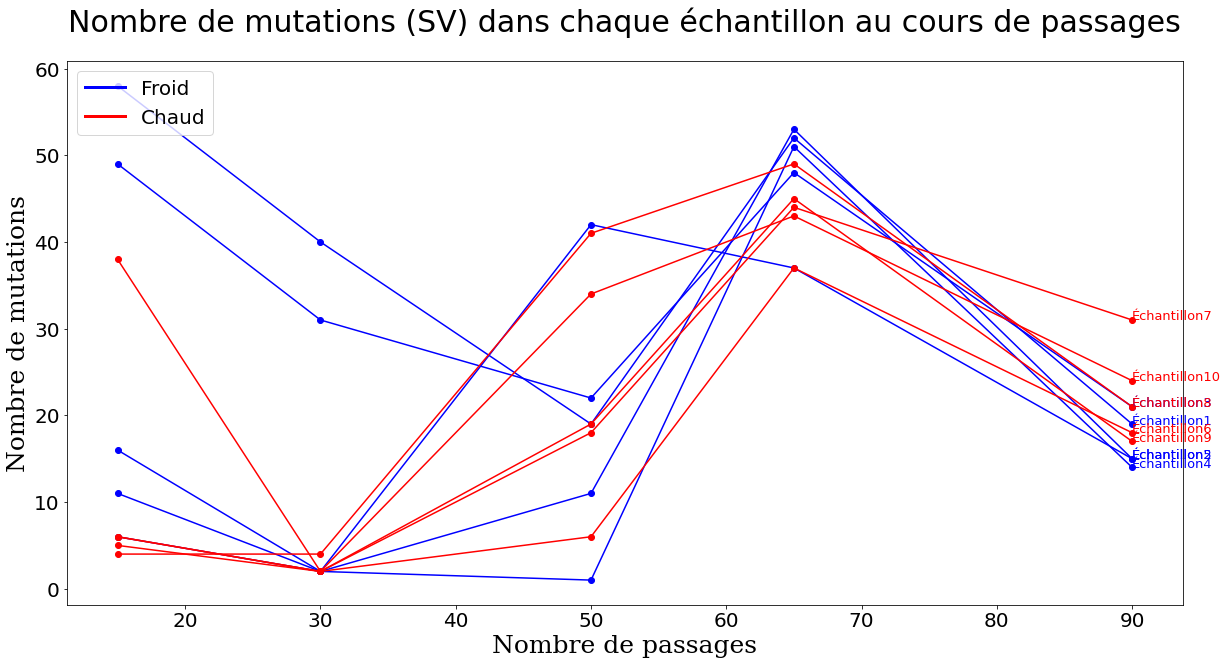

In [96]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) dans chaque échantillon au cours de passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

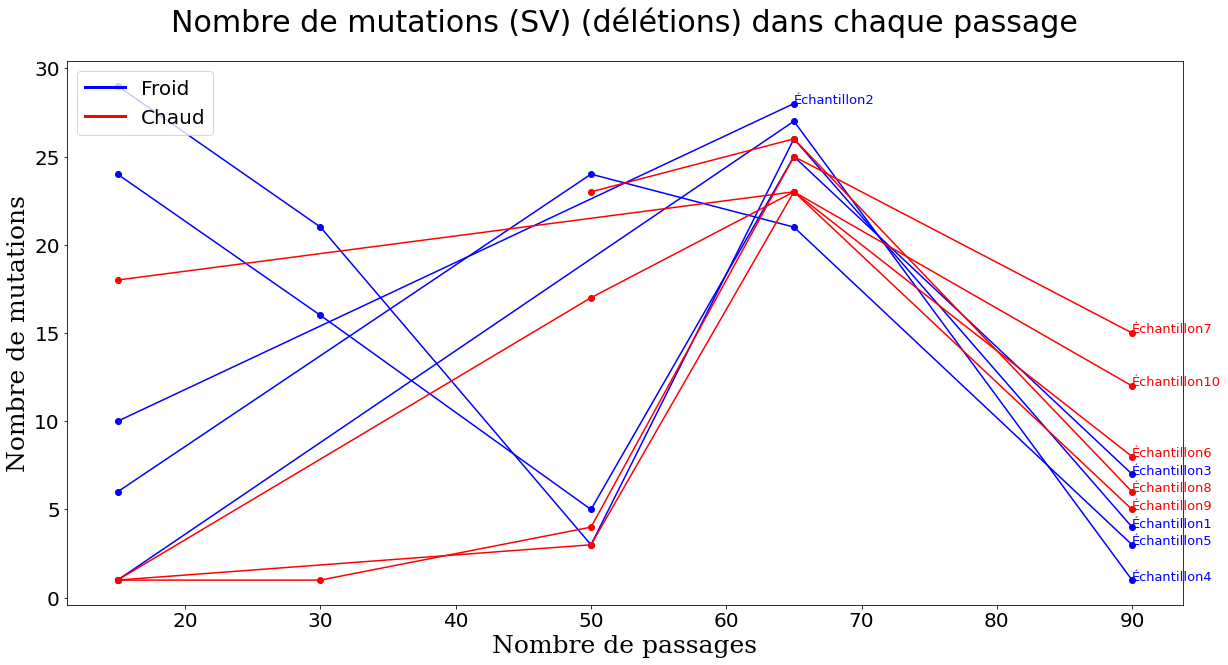

In [97]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    df_insertion = i[i["REF"] != "N"]
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) (délétions) dans chaque passage", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

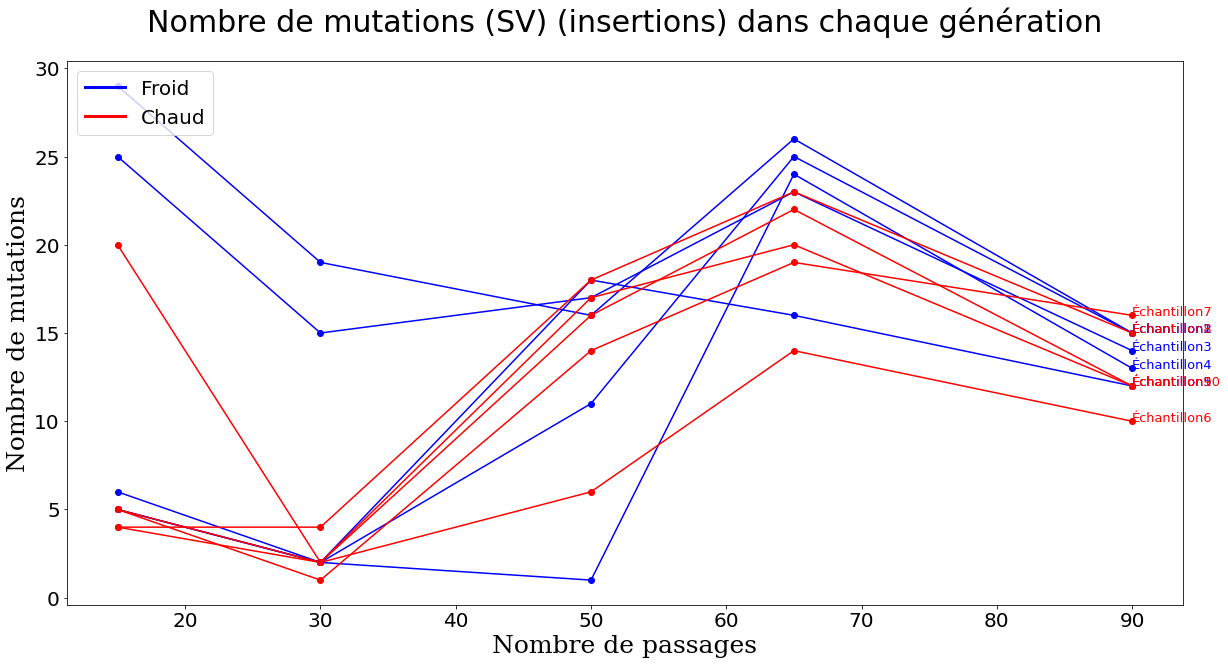

In [98]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insertions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) (insertions) dans chaque génération", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

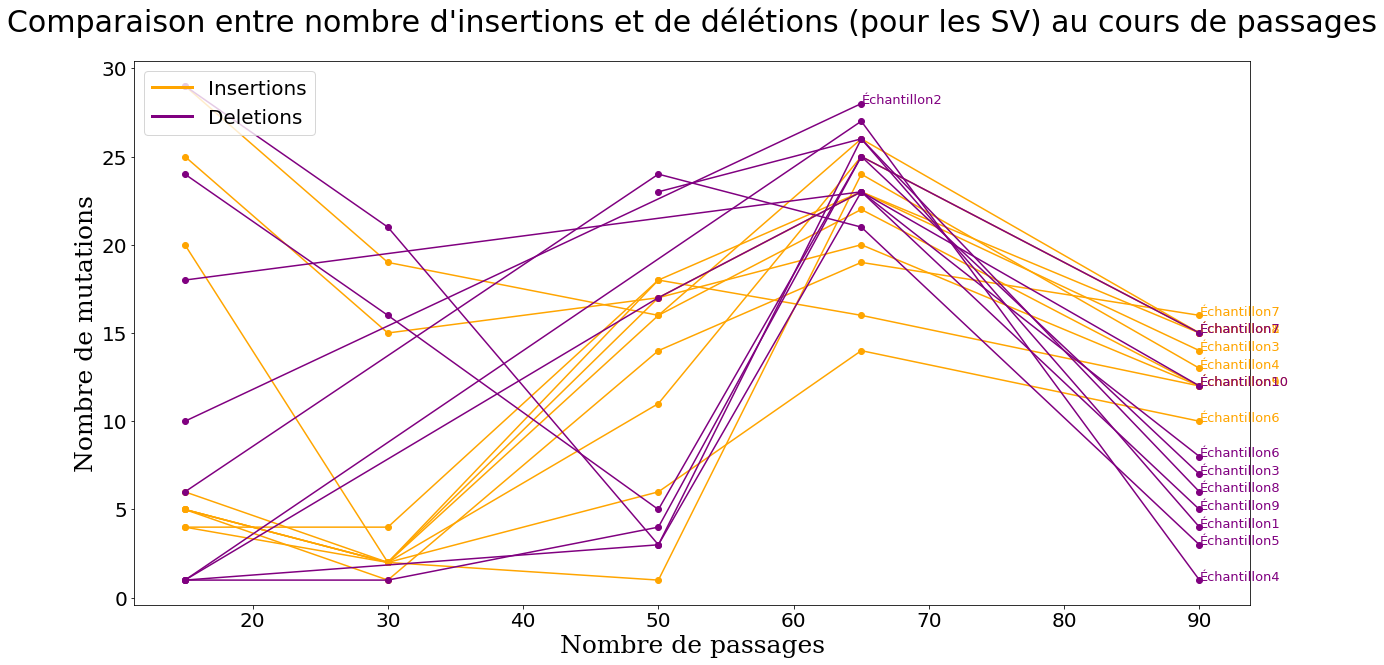

In [99]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_groups:
    df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insertions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = "orange")
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

n = 0
for i in df_groups:
    df_insertion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = "purple")
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
hot_line = mlines.Line2D([], [], color='purple', label="Deletions", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre d'insertions et de délétions (pour les SV) au cours de passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

{15: 108, 30: 51, 50: 134, 65: 212, 90: 134}


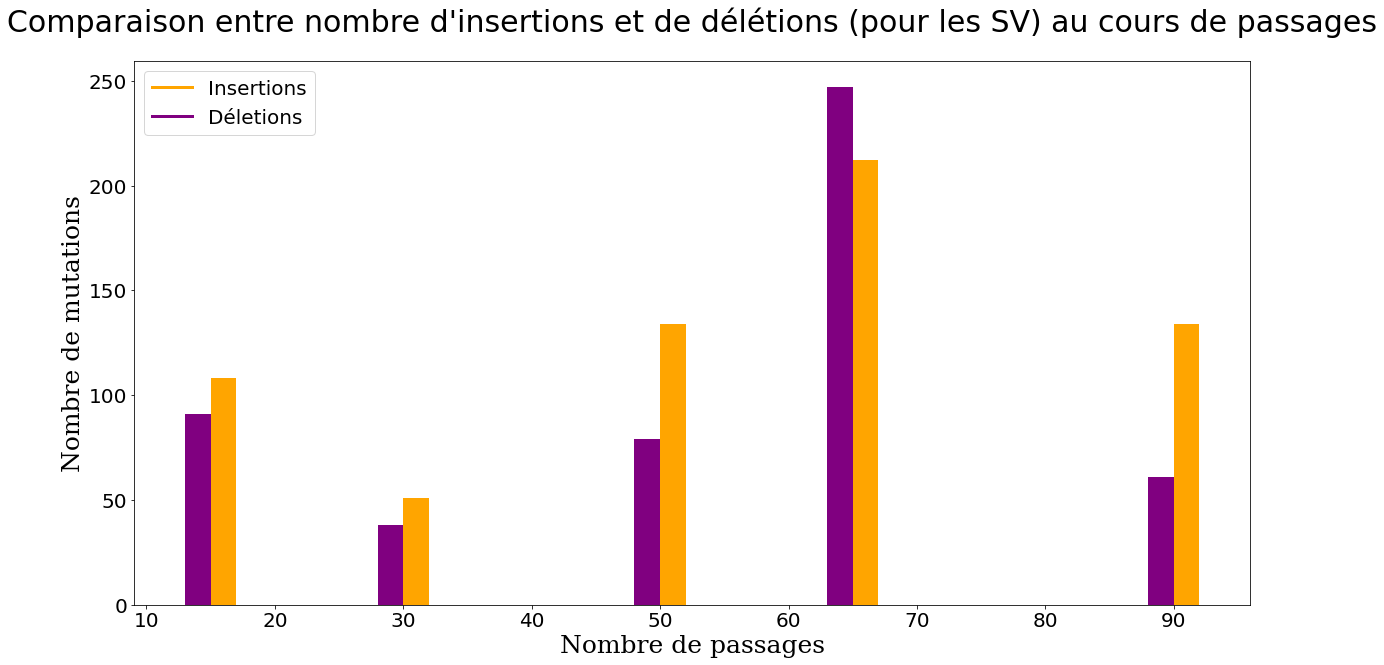

In [100]:
list1 = ["blue", "green", "orange", "yellow", "green"]
list2 = ["blue", "greendata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABWgAAAKZCAYAAAAlGsJ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd3gVRdvA4d+kkoQUeg8BEelIlV4VRKUJn4oFsfvaey9gecXy2nvFgl0BwYJSIhBAqnQQJCF0COmkJ/P9MZvkJDktyUlOAs99XVycnDM7O9tnn52dUVprhBBCCCGEEEIIIYQQQlQ/H28XQAghhBBCCCGEEEIIIU5XEqAVQgghhBBCCCGEEEIIL5EArRBCCCGEEEIIIYQQQniJBGiFEEIIIYQQQgghhBDCSyRAK4QQQgghhBBCCCGEEF4iAVohhBBCCCGEEEIIIYTwEj9vF0AIIYQQQohTlVLqeqAlUAC8obVOOhXmJYQQQgghPEcCtEIIIYQQQlQBpdRlwAfWnw9XcXC22uYlhBBCCCE8S7o4EB6hlBqmlNLWv+neLo8Qpyul1CybYzHK2+WpKZRS0YXrpYLTR9ms11keLt5pS64dp4fKHn/eVJlzqlLqTOB968/3tNYzXaSv8Hoq77wqkH/hOoj2ZL6nGqVUL6VUvrWuenu7PKeS2nweqW2UUlda6zpZKdXY2+URwhGlVJy1r8Z5uyxCeEKFA7RKqRZKqTuUUvOUUruVUklKqRyl1HGl1Eal1PtKqYlKqQBPFlgI4RlKqbuUUtOVUnd5uyxCeJtSapoEtitPKRVhnVemK6UmeLs8wpDzffVTStUBvgVCgZ+BW2vSvGSfqDJvYu6v5mut13m7MKLmU0qFK6X+o5RaoJSKV0qdVErlWvfWm5VS3ymlHlRKnaOU8rGZromVTlvThFZg3o/Z1H3esfnpK+AfIBx4rvJLKYQQwh3l7uJAKRUOPAPcAATaSdLQ+ne2lea4UuoZ4B2tdW7FiyqE8LC7gNbAPuBVr5ZECHGqiACetD5/Csz1WkmErbuQ8311exVTF14PXKq1zq9h87oL2Sc8Sil1MdDP+nO6F4siagml1ETgPaCRnZ8jrH9dgcnWdy8ADwJorY8qpX4FxgLBwCXAR+UswjSbzx8XftBa51v3758B05RSL2mtd5QzbyGEEOVUrgCtUqodMB/oYPP1GuAPIA5IARoAZwDnA10wF5zXgM1AdGULLGomrXU0oLxdDiGEqApa6zjkHOdxcu0QpyKrL9ibMHXji7TWJ2v7vLTWcpy6NsP6/zet9QavlkTUeNZbJt9T/EbrbuBHYAeQDoQB7YH+wEDMfbtvqWw+wQRowQRb3Q7QKqUGY+7ZAbZprdeWSvIl8DTmQc6TwGXu5i2EEKJi3A7QKqUaAIuBSOurzcDNWutVDia5XynVF3gWOLdSpRRCCCGEEKIW0Fp/DXx9qs1LOKaUGo1pmAKm1aEQDlndkrxLcXD2WeBJR63flVL1gSuBnFI/LQASMG+vDlJKnaG1/tfNYkyz+fxJ6R+tVrSzgUeAyUqpSK11vJt5CyGEqIDy9EH7KcXB2VXAYCfBWQC01mu01ucB9wDSvYEQQgghhBDiVPMf6/80YJ43CyJqhZFAE+vzaq31Y866JtFaJ2qtX9dav1vq+1zgC5uvrnZn5kqpYOD/rD/zSuVha7b1vy9wozt5CyGEqDi3ArRKqf7AhdafacAUrXWquzPRWr+itY5xkv851qBiu5RSaVZH5/8qpT5VSo1wo3wlRpa1Bil5TCn1t1IqxepkfaU1IqVPqWm7K6U+tgY6y1RKHVNK/aiU6uViniVGElVK+VkdvK+wBkrLVEr9o5R6TSnVyo1l6KCUul8p9ZNSaq9SKkMpla2UOqyU+k0pdYv1tNVZHmVGw1ZKnaWUelUptUMplWr9Nq3UdL2UUo9b84lXSmVZ5d+vlJprrbfSr9S4nLeDdD2VUu8qpbZY5cm11vl2a/6PKzMSsbN5dbTW61Zr+2YqpfYppb61+nJySpUa7dHadjda2y7Bym+3UupNpVRLV/mVh1KqoVLqUaXUcqXUEVU8sN5ypdQDSqm6VV32wjwwrywBtLbZdrb/ptlMU2YEe2UGCnxWmQEMkhxte6VUXWUGI/lDKXXI2q8TlVJrlVJPKaXs9btVLg72/Uil1P+UUjuVOackK3MeuEUp5dbbA1Wwr9Wx1sVfSqkT1jGwXil1myo1oKJSqq017x1W+ROVUguVUuV+I0EpdYVSapEy55Msq1wfKqU6uZhuus16HWZ9N1Ip9ZVSKtbKy+6gWkqpzkqpl5U5Dyda2/2gMue4K1Spc3FlKKVClFKPKKU2WOs0xdovZyilGnpoHmWOATtpyowwrZS6zNr3j1jrYJ8yo8J3sJdHqfzOtPbh9db+m2vtN7uUUkuUUv9VSp3tIo8ApdR11nrfb22zZGv9/M/etis1fZkR7JVSF1v5xStzDtOF6weItZn8amX/3BJlk79b1w4rbbBS6m6l1FKb9XlMmfPfw8r0ke9senv7cz+l1GxruxTmt0Apdb6zvKxpI5QZuOVPa7oca//bq5RapZR6Syk1RilV6VfDVQWvHaoC5/sKlM2jx58y5+5nlVJrrGXMsZb5D2XqWR4bfFaZa+htylwbkpRS6cpcM/6nlGrtOocy+VXqGl8d86roPmHzfbSLciml1CVKqe9VcZ2y8JzzsnJdx/Po9Vwp5auUukopNV8VnwML67gblFJfKKWuVkqFOMvHxTwaABdYf87VWmc4SWs7IOU067uBSqkvrW2TZW3PeUqpMeUoQ4XrK8qN61t50ir7dZ87lDlXH1VKFbjajyrLE8ei8sA9ixO2dYBlFcyjkG3r16lKuXXNmYQZVBDgF631UXuJtNbbgb+tP690M2+HlFJBygwi/pYqrgvnWvvsNqXUO0qp7m7k49b5qLxp3VyGYOvcs8A6j2Ra//YqE0O4USkV5mR6P6XU9UqpX1TxfdEJpdQ6pdQzSqlmLuZfpl5W0bQOzke9lblH2KPM+baozmQzXVUeG7bzaaiUes7Kt/BeaK1S6j5lHjKUN78qvzext85VBe/DrGkjlamnfKdM/T/dOp8dU+a+40Hlov5rk9d4Za4JhbGmLGv5N1n536LM9czetBWu8ypjsDJ1uyU2+/1JZe4nv1ZKjbU3XwdlCVDmfnq1Kq677VBKvaiUirTSlOc4qVnXC621y3/AN4C2/r3mzjRu5usHvG+Tt6N/3wBBTvIpTBcNdAL2OsnrY0BZ092MadlrL10uMMHJPKNt0tYDVjiZZypwgZO8rnZjHWhgD9DRST7DbNJOB6YCGXbymWYzzZNuznsd0NzdeTtIMx0ocGNec53MZwbmSa+z6ZcC9Z3kEWeli8O8EuRs2yUCvTy0v0+z9gVnZT8C9K/Kstvk4eqf7X4SZfP9LGC0lX/paaaXmtcY4KiL+aQC4yq5bkvsf5g+sJOczPN3INBFnp7e15oBG5zk9VthmYDxmP7HHKW9zck8Z9mkaw/McZJPNnCdk7ym26Qdjhmd2l4+UaXO668B+S7W3WqgqQeOqzNxfs7fjxk8J7rwOyfHZ5nlcXQMOMgj2iZNHRfrPgsY42S5rre2j6vj9G8nefR2sW4K94Gb3NyfzsL0j2d3H3CjrPb2l2E23093Uo5+wEEX+SYAo9zcn4cBj7rYT2c4yasPrs9thf8iKrmPT6OC1w4qcL73xvFnk9/DmGPDWVn/Adp74NzRGOfn5CRMF12z7O27ntxO9s4hNW2fsPk+2km5mgArXeSbAzzkJI9hNmmnU4nrOaaetMbN5Z1QiX3pKpt8rnFj2xWtY+AhnJ+H3gd8XORZqfoKblzfypOWknWfNsBWO+VxuB958/iwyWM6lbxncVHGB2zy+Lii+55Nfutt8hvuRvrF7u77wMs2ac+uZDlj3Twe/+siH7f3o8rsc3byOt/ad1yV/xMH07cHdrqYNh2Y6qQMs2zSRrkor9O02D8f2TuXDKuuY8NmPv2B407y34p50Bhn/R3nJK9quzfBs/dhw9xc18eAQU7yCcJ0h+LOsXeXnekrVefFPERyZ9pfgTAX67cF9q8phf8SgRFUb91tupvbya1jwmUrMisKPtLmq89dTVMOn1Pc4XgWphuFlZiDpzdwHebp3iVAuFJqjLbWggPhmNeKWmOCun9gTnI9gVuBEOAaYLlSKhV4B7OzfQxswdxQT8Y8BfcDPlFKxWitj7tYjo8xnbdvt5ZhH9AUmAKcYy3Dj0qpQVrrdXamD8JstPWYp6i7MJXRMGtZLsUc4GcAvyqlztZaJ7so00CKbz4/AmIw6/gszE5mO+88TLcVMZggcCpQH1OpuhJzIPQC5iqlBmrzOk25KKXGUzyydybwFeYkmIhZ7y0x2/w8J3k8h7lwYC3X18ASK7+uwLWYm4NhwFKl1Dla6ywnxfIDfsCsq6WY0cYPY5b3eqAzJvj+tVKqs9a6dL9PblNK3UnxKMkZmEEBVgInMDcQ5wPjrPIvUkr10eapdVWU/UbMaK/vYwbxO47915YcDXDRDvgOczx9g6nkpWL2l4M2yzzJ+t0X88DjJ0zl+ihm3x6OObZDgTlKqfO01kucLLO7zgbuxww89B5m387G7F83W+U+D3N8PGEvgyrY1/wx26sH8AtmsMVETAuK2zH7wGjgEaXUL5j9IxNTmSg8Z4zBnFMU8LJSarF2PaLu88AEzDnpY8y5pb713SggAPhAKXVca/2Ti7zut8pwBHPR24rZD/ti1m/h9eJboLC1zmHMutuE2e9bY875vTDnxsXWvu6wtZEzyvTJtgRz/gBT8f8YM9BGfeBiTIDlR8wgltXpY8x6Xo9ZB/GY7XwFMAAIBL5QSp2ltU6wnVAp1ROz7/pgzs8/YK4NxzD7UjPMvjTK0cyVefNlEeZY18BCTCDjIOa83x8TVAgG3lVKZWutZ7lYplcw+8C/mOv3Lmv6oVbZJmKCXu9Z6ZcCr9vJ55iL+ZRelh6Y7RxkfbURM3hJPOZaewnmXNgAWKCUGqXN4GPO3Ig5ng5i9udtmOPhfMw1VwFPKKX+LH1eUqbVxhzMsoLZNgus8hRgtnMXTN3prPIsa2keuHZU9nzvrGwePf6UUq8Ad1l/JmOOm7WYN7eaYY6n4Zig8J9KqR5a6yNlMnKv7AGYh2I9rK+OAR9izmshmPU6CXOt+9uN/Dx9ja/KeVXJPqGUCsUcC+2trw5j9odt1vzOw7xS7Q88p5Ty0Vr/10W2Z1O56/kHmBtLMPXbrzAB/kxMPeQsYAjmelQZtnXXNeWYbgLmgexJTF19LabONATTyMIPuAFTx7rPXgZVUF/xpEDM8d8Z06DgB+AQZr9r4mS6CvPEseiJexY32PYTO0Ep9aTWen8l8vsEc78LJuCw1FFCZd4OGG79eRz42UXeq20+j8aNc6ITQZj1+AfmWn4Qc4/QAlP+SzDniIeVUse01q9WYl4epZS6BFP3KHyrdDNmn96DqWe1wtTvRkPZwU+VebNxBWb/x5pulvV/Pcx+OQZzXpullMrXWs8unU8VuhRzfKRg4hnrMeeU7tZ31XVsoMzA9L9hztNg4jSfYR76NsPU3/pi7jn8XeRVrfcmpVT2PqwOZl/ahjmmd2DOZXUw+9sEq9yNMPXfs7UZ1Li0/1L8NvxhTJcm2zBxsrqYe/v+mGtPCR6q8wZhrt1/Yq6R/2Kue40wdYarrPVyPmY7T7CXiVIqCHPu6Gh9dYjiekYIps55CabuttFBWWzzq5nXCzeeAnSkOOqbAfhV5qmCTb6XUjIq3clOmtaUbJlxq4O8bCPTmcC5dtIMojiyHYdpabMK+1H+j2zye8DBPKNLzXc24F8qjQJesEmzGav1bql0nYE2TtaVD6ZiVpjPkw7SDStVpsP21mupafrg5EkR5sTxqk2eV7sx7+l2fi98apMHDHAyvzpAXzvf97fZfunAEDtp6mMqt4XleNHBPOJKracbHZRjtU2aSyqxr/emuKX2RiDSQbqLMC1LNKY/qiotO248cbRJG1Vqvmn2toFN+laYi7nGXJS6OkjXF3MjrjEXXX9XZXFz398HnOlgfoXbIhE7rW6qcF8rAK60k+ZMzEVKW+tit/WvlZ20j9vk97aDec4qtS6WAHXtpLvNJs1hB2mml8prOU6ebAJ32qT9HAi2k0ZhBsMoTDezEsfWhzb5/OZgfneWWgZdwXnZHgOzHKSJLjWvZyh1zsecz+fYpClzjaFkS2WH5x7MTUKZ8ynmoUe8NX0SMNTB9O2sY6VwX2/oxv70LRBQmfXk5Nidbud3H0o+KX8VO63JSh0b8UAdN/bn34EQO+nutknzi53fJ9v8bvc4tEnbDxet9Z1MWxXXjriKHm928vTY8YcJUhWm+QNo4CDdTTbpvq5E2R+zyWejvflhArSlWxJFVfF2inaxnry2T9isg2gHv79jk2Y5EG4nzShMPV1by9HdTpphpdZ5ha7nmJvJwmv5Wuwc6zZpWwOtK7E/7bLmk4rr1q7TSi3fQQfL14/iVj35QB87aTxSX6HqWtAW/ru7ouvWG8cHlbxncXNZQjFBgMJ1dBjzBkFH7NwrupFffYrfPkjHTp3OJu0TNvN92Y28W9uk/7GS2/B8nMQSrHntsDmeQh2kc3o+qmhaJ3m0pfjNtnzMtc3udsIEW4fZ+f5Xm7J8h/17kGkUt/JMBZrZSTPLJp8oF+V2mpay56MdOH9jtsqPDWv6RTZl+rj0PoO5l/hfqbLHOcjrTps01XFvMqtUuSpzH9YaB/fQNmmm2Owzn9j53Zfie+04oLGTvBoBHUp9V+k6LzAYJ2+TYYKr39rMZ6iDdE/bpFmN/XrGaMq+iWVv36+x1wt3drJzbQ/aiu6sdvK1fa3M2WuefSkZWPW1k8Z2Azh7bWqhTbos7ARArHQtbea52EGaaJu89mLnZtBKpzCB4MK0oyuxzv608tjj4PdhpdZFpV4bt8nXl+JA+SI35j3dzu+Fr3NsqmAZbF+r/Y+TdK0pDnal2TsZULLi+JGb+77DdG6U/SeKL7QtXKR9ymae9gIvHis7lQvQ3uEi/esUn6zOdpH2Wpt8L6/gOi697w92kvYLZ+mqcF9710le75Uqv90TOObkXnjD9q+DNLNs8knG+YX4a5u0ZV5zp2RAKx3nlbY6FL/+sgbXN6nLrLQpODh/upi+McVdACTgvKuJ72zXbwX3MdtjYJaDNNE2aexeO6x07ZylwwS7CrdfRW7U7rHJf6yLtCNs0j7iYn/aj5Mgh7vrqVR622N3up3fx9n8vsrZ+qDk61vXu9ifE4B6DvLxoThwnUXZG4OHbPLpUZH9yc3tWBXXjjgPlc2jxx+mJYvGBNdd7WOfUXx9sVuPczF9AMXnqmzsBMds0r5oW3bsV/I9uZ2iXawnr+0TNnlF2/mtEcU3RCk4f/Bv2+DgCzu/254TKnw9x9woFv7mkQChgzIEUnzPsN6N9NNKLZ/D+wJMK+HCdF/Z+d0j9RWqNkBbqYCeN44PKnnPUo7l+T/sv3KdhAlQPYcJDjg9J9rkZxvgsNvVBua+dI9NOqfBH5vpCrvMs3sP6uH1MtymfGUaNlhpHJ6PKpPWSR62XTI67X7BwfTdbKaPxXnXjbYP6Z+x8/ssm9+jXMzXadpS56MC7Dw0K5W+yo8NzJsThWXahYNGAda+/JdN2jg7aar13sTOOk+mEvdh5Zjnp1YeGZRtMNjUZh7l7qqU6qvzhlL8EORDO78HYuqbGvOgt7WTvKbblNnRvl9jrxfudIRs21FwshvpXbI66i18rWyL1vpXR2m11mswTx7AVDCcDd6VD7zr5HfbgcrmawevkmitD2AqF2D6tHXlbe3gdSFtttzLNl+5HFjIiZXW/2co1wNv7MO8Rl1p2owq+pf1Z197nT+7ofA1gZbKzY6sCymlAikefOEEpoWzXVrrfZim5WCa7Dt8BdjympPflmFuAMG9/aAMpVQ9il8p+EprfdBZekqOourVsjuRgZNtYO0fV1h/LtZa/+0iv28oLqurZXbHRq31cie/276uXGLdVPG+9qaT32zPTeus8569eWZR3OVBG+Vi4EDMza+z18n/Z/PZ1bnpB631ISe/j6b49ZdXtNYFrspm/R+GuZEurwsxgRYwN4mJTtK+WIH8K8vh8am13oMJdoL947PwfBmKaY1eXldZ//+jtXZ6HdDm9f3C7epqH/5Ya32yAuWpjIttPr9oXVMdmelgOns+01on2fvB2nf/tP4MxHQvZMv2tbfOLuZTIVV87fAEjx1/ygwI08368x039rHCZfWlZBdc7hpI8blqvtZ6t5O0L2NuWu2qzu1Uw/eJCzHHCsCn2nnXE29jgoQA45TzQWgrfD2nGo5TSyuKX2d2dhzYs01rvdDJ7x9jgnUAY23XVRXXVzzpjeqYiYePjwrfs5SH1vo7zEPSTaV+isCc2x7C3MsdVUq9p1wMHkXJwcKudpBmMMXXtPVa6y1uFrdwP2xVwfvA8lhp87my3Y9UmnXcXWr9mYYJnJeXbZ3kDa11ppO0hW/flp6uqi3XWpfeF0urjmPD9n7kDe2gi0GrPvg/e7/ZqO57kzL5efA+zJnCYyaI4vpUIdt9rSIxgWq5lmqt0zBdWYD9434QxXHJedZ1zZG3KI4tlFHTrxdujWReBfrafP7djfS/U1wJPwfH/Tvt0s77ZrUdodJVH1FHMX1q1nOjfItd/G5bgezjKJEyo7NfZqWJxNycO6q4tsA8RXBkhYsbWdv5+mD6+piECZw3t+ZtL4Afijlplbc/xz+svOtj+o57HvhZa53qxrTdKa74Rzs6Udv4HdN/MZj95VsH6TIoPhGUobXOUUolYJ48ubMf2DOQ4vWYr5Sa4CK9bT86HR2mqp6yO7LRxQ10Z8x2BkhzY5nBPDGLwPkyu2u1i99tT8Kl101V7WsnMf3jOFLecxOYG8IISvYpXZqrc9M6zJPDMJycmyzObpLBVPoL1XNju7ew+dwR0zKmPGzL62o5C/uxDHWRzpPc2Q9bYf/4/ANTUfMBopVS/8V0LO/snA+AVTkorJwdLcfxB66PP1f7QFUorC9ozHpxZiXF/Wm5uqmrzHmi8NU7hem/9wzgSxeBvvKqqmuHp3jy+LM9dwRW4NxRXm6XXWt9WCm1HdO/mj3VuZ1q8j7hdr1ea52hlFqB6WsxFHPD6Kg+U5njdBvm4VNz4DorqPQBsMaNm/TyqG/zubwBWlf7X45SKgarFSUl11VV1Vc8KR/z5kN18OTxUZl7lnLRWv9p9bM+AHMvNhjTgjDQJlkIpp/oi5VS47TWjtZpYT/zLYAhSqk2WuvYUmmm2Xz+BPedwBxLAVZ50p0nd0wp1RjTx/IozD5dD9NPtT0tHXxfnbpR3BfqUiuQVF7lOUfGK6V2YvbLDkqpsKrY9+xwp45XHcdGeeoXrn6v7nuT0jxyH6aUOgczLlA/THcboTjue7clpv9gALTWKUqpNZh98Fyl1BzMg7Pl2r1xhTxS57UeKl6C6dKqO6Zf17rY6a8Z+8d9b5vPS53NS2t93Kq7lQ5WF6rR1wt3ArQnbD5HVHRGpdg+AfzHjfS2aZw9PTzh5DewBrIpZ9pAp6mMPc5+1FqfUEolY9Zf89K/WzfU31K+J9phLn539SSgcN4tMQNMOWuZbG/e5Q3QzsRUMDthDsovMQfE35jWg0uBhQ6eKFbZ/uJGELtwP3DVUtGRKJvP/7H+uctZYLU6yu6Iq30ryubzJOufuzwRTHYVxLI9D5ReN1W1ryW62F4VOTeB623r6tyklVJ7MTcD9ZVSgVrrbAfJy7Pd33KRtrSKbHfbc6k7y/kvZjmri7v7ob1rzEeYSswwzIPCD4D3lVLbMEHIaEzfqPbOw60ornQMpmTl1BVX28Gt64qHFR5XR1zdFGmtC6zt3B2zPwc4CVpU+Dyhtd6ulJqJ6S8wBPMq1XSl1H7M9lmGqZw5e7rvSpTNZ09eOzzFk8dflM3nJ8tZjio9d9ikcRSgjbL5XNXbqTrnVV4VuXaOsZnWUYC2MsdpvlLqJswgPgGY7pSuBZKVUqswg/Us1Fqvp3Jsz+HlDdy4u/8Vak7xuqqq+oonnXD0hmEViLL5XNnjozL3LOVm1Q9jrH8opfwxgYXBmJabhS35GgLzlFId7L21YO3zn2GuTQrTinZ64e/WYD+TrT+zreVyl22wIYgKBmiVUpdiuvVyt6WZq/vd6mAbLHI1OK8jFTleO2K2Y1NKrv+q4k4drzqOjfLUL2xjLPZE2XyujnuT0ip1H6bMgKYfUvxmnDvsHTO3YoLFYZgHQROAk0qpvzDXwkVAjL2Hl56o8yqlumKuxWdWYhls94u9buSxF8cB2iibzzXueuFOFwe2r7S2Vkp5otWtbSsKd16XtL0IOGsBVZ4n4p58eu7OKH+Fy1nXzm/fUxycTcNs2AcwB+MkTEuqiZhXwQs5eyUMSjZnt8uqACykODibgHmd6h7MK+q287Z9UuFq3mVYr5L2w3TAXdgC0Nea9x2YQXOOKqWesk5GtmrC/lJRlWnqXno92KqOsjviat+qqmV2V2XWTU3Y17x1bgL756dCNW2725a1vMtZ5SrTQssKKo7GjF4eZ32tMEGiGzHXiKNKqTeVUqUrMZXZDk5HwsWN60oVKDyu3N1+1XL+11o/gnn18C+br1thbqbfAmKVUr8opdrbm94N3j6PuuLJ4682nzuqs+w1eZ+oCdfOMrTWCzCthuZiBgMBcyM/BlMfXaeU2qKUOr8Ss7ENEpc3mFSZa3RVrXNPqs5rhseOj0res1Sa1jpXa71ea/2q1ro/cDnFr7w3Am5xMvksm89TS3VHMJnibT/XUTc/Dtiu3wptV6XUEEz9pTCvDZjX+W/CvEE60eZfoXLfc1YB2+O6oi2HC9d7nhut3UvPp8Ycr9V0bBSe5/LcbOFZU67R9lT2PuwtioOz2Zj1+wjm4ctkio8X265kyhwzWut1mCDwZxRv5xBMFytPYIKs/yqlrig9rTV9heu8Sqn6mABwYXB2P2ZQ0Tsx57aLbZaj8G1TezHKEJvPNabuVhXHhDvB1h2YV3bqY56YnU1xH4gVZfuEOcRhqmK2O2tFXiuoasG4LlfhcpY4sVsXq3OtPzcB52mtj9vLQCk1sDKFtGMKxX2R/AFMdPTquqMDtjys1k+PKaWewDxhGIjpT2Qk5qlwKGYk7r5KqTE2LQ5r8/5iu72v1VqX53Wi2sp2mZ/SWpe3RZQ31eZ9zR5Hr4zZsl3OCr+yVmratnZeq/M02/mVdzlrPKsC/xLwklKqE+Z8ORBzvmyJabV1KzBIKdXf5sms7Xr5TGvtqB+62iINE1Bxd/tV2zGptZ4DzFFKNce0dBqAafXcDRNQHwMMsLZPeVvd1PRrhyePP9u8Rmitnb665gFVVfaq3k41eZ+osddOq0/FiUqpUMw5dAAwxPrfH/Pg6xel1FVa69kVmIVtS8b6DlPZV5lrtLfWuTuNe7zBo8dHJe5ZPE5r/ZVSaigmkIlVhmccpP3H6hZjIOYNnCEU96k+zSZpeddP4b6dQ8UfeE+neP+5UWv9gb1ESimP1desbvwqy7b1qrOGDM4UHnN+Lt7usTefGnW8VsOxUXgs+yml/N0I0rp7ja6Oe5PSKnyOV2bMpsJuaQ4AQ7XWdluOKqVa2PvelrXsV1tvlvTHXAMHAUMxMb4o4AulVGut9X/tTF/ROu9tFPcD/ClmEF+7/cMqpR51sgi2550aVXfz9DHh8qC1Mlhk81V5mlg7ctjmsztNnW3TOBukxlvaOftRKdWA4qb3pct/rs3nRx0FZy2ty180p2znfbeLfkU9Nm+tdYHWeqPW+k2t9WWYPkgmUlzJHU1xx81Qu/cX29dFakI/StWhNi9zbd7X7HF1blKYvozAdMPgqHsDd1T3drdd3+VZzlpHa71da/2B1nqa1roV5ol3nPVzd4orcFC7jz97Co/JpkoppzdG1nYuHPzkhJutVCpNa31Ia/2N1vpOrXV3oD3F9aZw4OkKZFvTt6Mnj78ae+5wI011lr0m7xM1/tqptU7TWv+mtX5Caz0M88rxK9bPCnhZOR+wzJF4ilv6ljdAW979z3ZdeXKd2177XbXwcTVIsbdUyfFRgXuWqmLbl2WZ7vJKsQ02TIOiYM8w67sDuO7TvbTCfTu+IsFoq+VYYZdL6xwFZy3u3HMWXt+rY389YPO5ov15V/R41ZQda6JGHK9VeGyUp35hG2Oxx9vXzcrch42guH/WmY6Csxa34zRa6yyt9VKt9bNa6zGY4OmDFLfSf8Jar46mL2+dtzDelAfc5Sg468Zy2O4X7tzTVXu901PHhLtPVWxHo75GKVXZYJ3tIDjnuZHetm9WVwPoeMMIF78Pt/m8ttRvTWw+/+soA+vCNtzR7xXk7rwbU4V9N1o781xME/tCg2w+b6L4YjTM6prBmZq0vyyj+IRXnaPmuqPwhsLTo7FupPhp80gPPb2uLrV5X7PH1bmpF8WvbpU+N5XXnzafq2Nft13frpazDzWjHzOPsFoY3mbz1SCb3xKA7daf/ex0gVDVbF9J9sS5pXA7K0o+VLRnAMWtTrx2PGozcMJkzAA5UPJ65i5PXzs8fb735PFXY88dyoya7uyGvDqv8TV5n3C7Xq+UCqL4mEij4n06VorW+oTW+h6K3wpsjPv949nmkwMUDpbSrpx1Hlf7XwCmJQ6Y1kPbbX72ZH0l2eazq+CfqwEYvaVajkU37lmqiu0DR1dvO31L8SvAk60WqVdTfKx/Vp5umKzgbmEfz5vdna6UBhS/uevwntMy2o38kq3/q2N/3Uzxfc1wqzV+eZXnHNkK6GD9uVOXHWwo2eazw+W3Hjj1dvS7p3nw2ChP/WKki9+ru35RWmXuw9yK01jcOWbs0lqna61fwPQRC+YNPVcDR9tO76rOW7gcJ7TWyY7yUWawxEZOZmX7Br/TmJhSqhHFb4nbU6OvF25VIrTWK4FfrD9Dga/Kc3JSSt2llBpgk18cpt8ZgO5KKYcnKqVUb4p37n3YjEpXg9yizMh0jtxt8/nHUr/Z9qFxBo79B88/BXN33g/jum9CT4iz+VzU/Yb1NOln68+GlHxFpwTrojbF+jMd08eu12itjwG/WX8OUkrVpCBtYQXPo69+a63zgcLXBFsD13sy/6pUm/c1B660LlKO3GPzufS5qbx+oXhAl1uswEZV+pniG5ZpSilnnfnfW8Vl8YY4m8+luyv61Po/GHioWkpTzPbG0RPnlh9sPt9Xqj+90h50MF2102YAt8L+/crdd38VXDs8fb735PG3juJ+xy5VSnWubOFciAGOWZ/HKTMisSN34aQPxOq8xtfwfeJnioOFV1sP9h35D8U3pPOsOoM3xdl8rug4G4X98oXi/KawtC7O7oEwdZDCY+sn23XlyfqK1UVOnPVnH0dvK1hB4PIMplJtvFDfjrP5XO79RinVsJzB/HE2n7c7TEXR67bfW3/WxQRPptokmVWO+ULJIOdfDlM559Y9pxVfuNvR7zYK10FrpZSzlnJ3uJGXU9Zx95X1Zyjmvri8bOvYtyulnA3yez/FMRp7dRnb7e8sAHgZzgNeVSXO5nNFzqlzbD7f5ujhk1UfdLWvVPe9SWmVuQ9z95gZj+PBsMojzuZzubabizpv4XI0dhE/fMLJb2AGMyscSHu8iwajt9opR5Gafr0oz4Xhaoqb+PcHViil+jlJj1Kqr1Lqd8wrRKWb4D9v8/lTpVSHUr+jlIoEvrYp54s1oCJnT1vgA1VqADVl/BfTqgfME7jSr5TYPi15wl6gVyk1FjNCnKfZzvtpexUFpdSNeODippR6XynlaBRkrHV3g81Xm0oleZHi1h7/s9cfr3WD+D3FNxvvavujnFe3xygenOJr5WIwCqVUa6XUSy5ucDyhsB+eBtax5kn/pfgJ7+tKqalO0qKUaqyUelwp5YkLTGXV5n2ttAjMA7UyN+BKqZspvmE7QvlG8y3D6iJlhvVnfeA3pZTT1khKqXOUUi9UcH7HMZ3dg7k5nW21zCo9j9uASyoyD29RSv3P1fWVkjfJpc+Xb2EeaAI8pJS639mNoFIqXCl1h1LKVQtVl7QZWbrwWDjbRUDVHT9THLwbCLzo4Fr1CDDW+nM/xQ+JPM5aV5OctVhTSv0fxQ9VS28fd3ny2uHR870njz/rddnCG15/TH+gTltvKKU6KaXeKXfBzfxygdetPwOAb5UZxKL0PCZQ8ubJkeq8xtfIfcLaHz62/ozArNMyraaVUrZ9Z+Zh+tmuEkqp0UqpO5VSDgcDUUq1o7g1WzquWyk5Ylu371vOaT+295BAKdUXUx8BUyd5pXQaPFtfKbxZDab4Wm6bjx/wHhV/xbs6eOT48MA9izsmA9uUUtfbO1Zs5qWUUrcA19h8/bkb+dt2c/Acxa/7rrBavJWHbYC2Qo0RrH2ucL69lVITS6exHgx8hxl8yJXfbD4/b6+uoZR6Ctdv3rjreYofaj1onVvs1m+UUhHK9BlcRGu9GfjV+rMt8ImyM2CQUuoqTHAJzBsGb9uZxR8Ut1a81V6gSpkGbm+U/r6yquPY0Kbf8MJX5jsAb6tS3c9Y6/55zOBMzvKq1nsTOyKo+H2YbZzmPmXnQbhS6hyKr712KaV6WPfYTZykaQj8n/WnxqalvAfqvIXLobDTd7Z1jnsamOBsOayHkoX1vjrAN/au70qp0bjXOKXGXi/cjo5rrROsitV8TF8T3YBVSqm/MCeKOEzz//qYKP/5QFcn+X1rnZwvw/QDtUEpNQtYhTnp9Mb0q1d40fod+yepmmAupm/eHkqpTzH9UTXBHHT9rTTZwHV2+u2Zg+kHowWmUrddKfURsBdzUF+Auek8iXmKNsmD5f4EMxJgCKZ/jA1Kqc8xgfgmmFH1hmJOGltwrzsKR24AblBKbQOWAlsx/XGEYC5Ul1H8atk/FD/5BUBrvVop9TzmJi4U+FMp9RWwBDMaYRdMS83Ck89mXD+JqRZa6w1Kqf8AH2BaQvyqTAf+v2JukHIxx00HTLP3wtdRXq3ioi2m+In8j9bN7mGKK/tbtNYH7U7pgtb6gFLqMuAnzKsSnyql7rH+3o3ZZuGYc0k/TODFF7NveFVt3tfsmIu54G21ziu7MeeViRS/DqOBm7TWlRkgzGSk9ZtWYGUq5hqxXSn1E+ZVksOYbdwIc20YiRnA4l/ggQrO8kHMtaYlpnP6rUqpj4E9mGPtYsx5KxYTNDy7gvOpbpOAe5RSsZhK6mZMi79AzI3L/1G8LCeA920n1lqftIJLf2KuoS8ANymlfsC0vEi3vm+Lue4MwwSqPNHHPJhjZSKmLvCNUupHSr6S96cuHtTMKa11gVLqSmAlZhCDezGvGM6m+Fp1CcWvDOUCU7XWWZ5YEAd6Yrp+SlLmIfR6zHW8AGiKeV3K9vh6riIz8fC1oyrO9x47/rTW862b6SeASOAva90uwmxnjXlFtjNmf+2EqStWtDXfi5gAydmY7bldKfUB5mFAiLVckzD77SaK+260V/Zqu8bX8H3iQcx5vT2m7rjd2h+2Y4J+52JGfC58wPKkdSNeVZphlvsFpdRSTMu/vZjWPA0xr3BeQnHg8lV3z0t2/IJpUR6A2Vec3jDbmAeMB/62rtFrMdfJIZjraOEN8Sta6zLdEHm4vvI6cK21DPco03DmR0yQqJ1VnrMwDWcuc3P5qpUHj49K3bOUQwerrG8opZYBqzEPV1OseZ2FOUZtb/5na61/dyPvPzHL3AZzLBSqyGA4ha8Tx1XymH2D4odj31vX8RWYfawLphV4c8zDP6cNOzDH2AOY7TkZWG7ll4C5hlyG2b4e2V+11rFKqeswLWl9MPvMtUqp7zH12ALMvXx/zPXwO0q+Xg9wI+YN4kZWmXpacYM9mLr5OEr2T/kfrfXhUnmgtT6klPoSU2erD6xVSr2NOdfWxZyDpmD22SW4fs2+PKrr2PgPpm4VhjmH9VVKfYZ5AN8UuBzz4GANpg7isKsHL9yb2JpLxe/DVmHWQS/MAF47lVLvArsw9eERmGsqmEYJjgZ0DweeAp60zocrMdsmDbP/dMWsz8IH1bO11vE201e2zvs25triC9yhlDobc205grmnuRzogdl/M63ldeS/mLpZR8z2L4ybFdYzzsNc15Mxb0sV7vtlunSp0dcLrXW5/mF2qrcxAUftxr/DwC2An528/KyV4iqP74AgJ2UqTBftouzTbNJOc5E2ujCtq9+tdbLCSflTgQudzKuftSEdTZ+ECdROt/lumJ18htn8Pt3N7TkeczA4mvcBTCV2ls13UeWdt5v7isbcCJXJ3yafpzCtLpzlEQ00cJJHnJUuzo3143ZaN/IaizkZubMeEoCGVVl2zEV8l5MyTLNJG2Xz/axyLHM/zEXOnWVOA7pWcN26ve+7m7Y697Vyln+WTVp7x6Lt7+0xF0FH5c/GjKbpaF7TbdIOc3NbKMxTySw3t3t0JY+r9pgLqaP892MG0oou/K6C83F5DJRnHs7Sulge239xQA8n8zgLczPgTl5ZwPnl3d8czPdsTBDE0byibNK6te9jbnoOuViGE8BoT+zPztJibnDdWafpwFWV2b+t+Xni2uH2+d6bxx/mRizF3f2/kuu1sYvjIwkTVHTrGPDQdnJ3PVX7PmHzfbSTcjXF3FQ6K08u8LCTPIbZpHV4TnCVFvPmnzvrpwBzw+VTyf1pjpVfGhDsJN0023WMCWznOynfB67KhgfqK1Y+17lRlrY2f89ykE8cHjhGvXV8uDmdxsU9i4syXojze7/S/3IwD1t9yzGPJ0rlkQ7ULWc5O9pM/3Qlt58CvnCxnHMxwSd3zjcX4LyuOd/dvMqxDBcBx93YXh87mL49sNPFtCcxD5qdlaM+ZswPR3kcwgSwZtl8V2ZfpRyxkeo6NmzmNcDFut6KCcbH4eJ8QzXem+DZ+7B2mIZ/jqbPxAQ/HW5HzANTd7fb15SKueGBOi8m4O7s2rLdWtbowu+crJMWmIfpjvJKxARmbc819ZzkV+OuF5U5aFpi+uaajwnApGAqXQmYCu97mCdBZQKzdvLqB3yIeaqQjrmx24t5hWNEOU4WTg8mZzuvnbROd5DSv2Oect+CidYnYE4AezBPClu5sQytME8W92AO1mRMq9WZQKSVZrpN+YfZyWOYze/Ty7EtO2IOvnhMBSAB0yfc41iVOSofoG2OOYF8gnnykoipTGZgbu5+xDxBcVnxwLSceR1zcKZa63o/5onExW5MH4eLE3lF0rq5roOAmzCtJuKt5c/GtI5baS3XRUBAdZQd88ToGWubJFPy5DnNJl2UzfezyrnMfpinet9gjus0zLniBKa1yPtYrVgqsV7d3vfLmbZa9rVylsnVsVjmd2v9L8JcgLIxLTQ+Ajq5mNd0nJxzXEzbDHMOicY8qMvGVCT2Y966eAro56HjKgTzNsBGa/9KxZw/n8K6kFK7ArQNMOfDdzCtvo5jzs2F+9/PmPOIwweXNnkpzLV4FiYYk4I59yYBf2P6q70aB5UXV/ubk/l2xNzM78TcbGh7+ZRz3w/B9DcWjTlnFl6vVlrbP8JT+7OztJhXq87HvF63BPMgMwtzXjsOLMfcGDf3xP5tzbNS1w4rD7fO994+/jAPve/BvEp70Fq3WZjzyJ+YIMUIKhlQs+bljxlwb5V1bJy09tmXgdblPQYqu53KuZ6qdZ+w+T7aRbkU5pr+I+Z8lWWt262Y1/TPdDH9MNw/JzhMa5Wjr7VvFr69k445/yVb++sbOHnIVc596TybslzuJN200usY8xbRV5hrc+E2nA+MKcf8K1VfscmnL6a+dghzjj0MLMBqaIJ718I4PFh3ru7jAw/es7goox+mdeoMTCvsPZhzaL71/z5Ma66HsM5H5cy/NSWPabvby0Uez1rT5mHdj3pgO07BXDuTrG2y39rfL7FJ4+755ixMa1rbY2cJcCWgypNXOcpf2E9uYb06x9o39mAalU3DyT0N5rpzvbVtD1vTJ1r72rO4WXew9vEHMXGXNMz5bRvmnN7ISjMLJ9cvyh+grZZjw2Z+DTEtMndY80jCxCjux3oQRvnujav83sTeOqeC92HWtA0wLUcLW5imYeopbxRO72o7Ylqo34u5Huyg5Hlmm1WWIQ7m75E6Lybe963NPn8UEze722ZbRuPGOR7zRuHdmHsk27rbSxTHzX6l+NzldH+khl0vCk9copyUUtGYJxJorSvbx54QQgghhBCillJKbcK8Qvu71truqNpKqWkUv2Z+jdZ6VvWUTojysfr93IMJyn+jta6RXVsIUZNYXXZebf3ZRmsd573SnJ6UGaviCKbris1a6+5eLlK5lGeQMCGEEEIIIYQQZU23/h+llHLWj54QtcEUTHC2ADsDxwkhRA11KSY4CzVgfJvykgCtEEIIIYQQQlSC1noOprsMKA7WClHrWK1nH7P+nKW13uHN8gghBIBSqrdSKsTJ7wOBt6w/CzDdrdUqft4ugBBCCCGEEEKcAm7D9K9/kVKqt9Z6nbcLJEQFTMH075oCPOzlsgghRKGbgUuUUgsxfdAewARiW2AGdh2D6YMe4GWt9TavlLISJEArhBBCCCGEEJWktd4A+Hq7HEJUhtb6C8wo6EIIUdOEApOtf/Zo4DXMIHq1jgRohRBCCCGEEEIIIYQQNdWzwL/AUKAN0AAIB9KB/cAy4AOt9SavlbCSlNba22UQQgghhBBCCCGEEEKI05IMEiaEEEIIIYQQQgghhBBeIgFaIYQQQgghhBBCCCGE8BIJ0AohhBBCCCGEEEIIIYSXSIBWCCGEEEIIIYQQQgghvEQCtEIIIYQQQgghhBBCCOElEqAVQgghhBBCCCGEEEIIL5EArRBCCCGEEEIIIYQQQniJBGiFEEIIIYQQQgghhBDCSyRAK4QQQgghhBBCCCGEEF4iAVohhBBCCCGEEEIIIYTwEgnQCiGEEEIIIYQQQgghhJdIgFYIIYQQQgghhBBCCCG8RAK0QgghhBBCCCGEEEII4SUSoBVCCCGEEEIIIYQQQggvkQCtEEIIIYQQQgghhBBCeIkEaIUQQgghhBBCCCGEEMJLJEArhBBCCCGEEEIIIYQQXiIBWiGEEEIIIYQQQgghhPASCdAKIYQQQgghhBBCCCGEl0iAVgghhBBCCCGEEEIIIbxEArRCCCGEEEIIIYQQQgjhJRKgFUIIIYQQQgghhBBCCC/x83YBRM3UsGFDHRUV5e1iCCGEEEIIIYQQQpwy1q9fn6C1buTtcoiaRQK0NZxS6nmgN9AeaAhkAvuAucCbWusTdqYZADwG9AOCgN3Ax8AbWut8d+YbFRXFunXrPLEIQgghhBBCCCGEEAJQSu3zdhlEzSNdHNR8dwMhwB/Aa8BsIA+YDmxWSrWyTayUGg8sA4YAc4A3gQDgFeDraiu1EEIIIYQQQgghhBDCJWlBW/OFaa2zSn+plHoWeAR4GLjF+i4M+ADIB4ZprddZ3z8OLAEmK6Uu01pLoFYIIYQQQgghhBBCiBpAWtDWcPaCs5Zvrf/PtPluMtAI+LowOGuTx2PWn//xeCGFEEIIIYQQQgghhBAVIgHa2mus9f9mm+9GWP//Zif9MiADGKCUCqzKggkhhBBCCCGEEEIIIdwjXRzUEkqp+4C6QDhm0LBBmODsTJtkZ1n//1N6eq11nlIqFugMtAV2VGmBhRBCCCGEEEIIIYQQLkmAtva4D2hi8/dvwDSt9XGb78Kt/1Mc5FH4fYS9H5VSNwI3AkRGRla4oEIIIYQQQgghhBBCCPdIFwe1hNa6qdZaAU2BizGtYDcqpXp6cB7va617a617N2rUyFPZCiGEEEIIIYQQQgghHJAAbS2jtT6qtZ4DjAIaAJ/Z/FzYQja8zIQlv0+umtIJIYQQQgghhBBCCCHKQ7o4qKW01vuUUtuBs5VSDbXWCcAuTP+07YH1tumVUn5AGyAP2OvJsmRnZ5OYmEhaWhr5+fmezFqISvH19SU0NJT69esTGChj4wkhhBBCCCGEEKLmkQBt7dbc+r8wKroEuAI4H/iqVNohQDCwTGud7akCZGdnEx8fT7169YiKisLf3x+llKeyF6LCtNbk5uaSmppKfHw8kZGREqQVQgghhBBCCCFEjSNdHNRgSqn2Sqky3RUopXyUUs8CjYGVWusk66fvgQTgMqVUb5v0dYBnrD/f8WQZExMTqVevHg0bNiQgIECCs6LGUEoREBBAw4YNqVevHomJid4ukhBCCCGEEEIIIUQZ0oK2ZrsAeE4ptQKIBU4ATYChmEHCjgA3FCbWWqcqpW7ABGqjlVJfA4nAOOAs6/tvPFnAtLQ0oqKiPJmlEB4XFhZGXFwczZo183ZRhBBCCCGEEEIIIUqQAG3NtghoBwwCegARwEngH+Bz4HWtdYlmgVrruUqpocCjwCSgDrAHuMdKrz1ZwPz8fPz9/T2ZpRAe5+/vL/0jCyGEEEIIIYQQokaSAG0NprXeCtxWgeliMK1vq4V0ayBqOtlHhRBCCCGEEEIIUVNJH7RCCCGEEEIIIYQQQgjhJRKgFUIIIYQQQgghhBBCCC+RAK0QQgghhBBCCCGEEEJ4iQRohRBumTVrFkopZs2a5e2iCCGEEEIIIYQQQpwyJEArhAcopWr9QFTR0dEopZg+fbq3iyKEEEIIIYQQQghx2vDzdgGEELXDxIkT6devH82aNfN2UYQQQgghhBBCCCFOGRKgFaesjKPHSDucTX6eL75++YQ2CyS4SWNvF6vWCg8PJzw83NvFEEIIIYQQQgghhDilSBcH4pSUcfQYKQdyyc/zBSA/z5eUA7lkHD1WbWWIi4tDKcW0adOIi4vjsssuo2HDhtSpU4fevXuzYMGCMtPk5OTw+uuv07NnT+rVq0dwcDBRUVGMHz+eRYsWlUm/c+dOpk2bRqtWrQgICKBJkyZcfvnl7Nq1q0zaadOmoZRi7969vPHGG3Tr1o2goCCGDRvGtGnTGD58OAAzZswo6rJBKUV0dDTgvA/a9evXM2nSJBo3bkxgYCCtW7fmlltu4fDhww7LERcXx3vvvUfXrl2pU6cOTZo04cYbbyQlJaXMNJs3b2bKlClERUURGBhIo0aN6NmzJ3fddRe5ubmuNoUQQgghhBBCCCFEjSUtaMUpKe1wNlr7lvhOa0Xa4WyCm1RvWfbt20ffvn1p27YtV111FYmJiXzzzTdFQdfCwCiY4OVXX31Fly5dmDp1KkFBQRw6dIgVK1bw22+/ce655xal/e2337j44ovJzc1l7NixtGvXjgMHDvDjjz/y888/s3TpUnr27FmmPHfeeSfLly/nwgsv5IILLsDX15c+ffoA8OmnnzJ06FCGDRtWlD4qKsrp8i1YsIBJkyahtWby5Mm0bt2a9evX88477zBv3jxWrFhBmzZtykz3wAMPsHDhQsaOHcuoUaNYunQpH3zwAXv27GHJkiVF6TZv3sw555yDUopx48bRpk0bUlNT2bNnD2+//TbPPPMM/v7+7m4OIYQQQgghhBBCiBpFArSi6nzpvUGznMZgt9v57nJdRSUxg29Nnz6dJ598snh2l1/O+eefz4svvlgUoE1JSeHrr7+mV69e/PXXX/j6lgwwnzhxouhzUlISU6ZMITg4mGXLltGpU6ei37Zu3Uq/fv24/vrr2bBhQ5nybNiwgY0bN5YJmkZERPDpp58ybNgwtwcKS09P5+qrryYvL4/o6GgGDx5c9Nvzzz/PQw89xE033cTvv/9eZtrVq1ezZcsWIiMjAcjLy2PEiBEsXbqUNWvW0LdvX8AEjbOyspg7dy7jx48vkUdSUhLBwcFulVUIIYQQQgghhBCiJpIuDoSoYq1bt+axxx4r8d3o0aOJjIxkzZo1Rd8ppdBaExgYiI9P2UOzQYMGRZ8/++wzkpOTmTFjRongLECXLl244YYb2LhxI9u3l41GP/DAA3ZbtFbEvHnzSExM5NJLLy0RnAW49957iYqK4o8//iA+Pr7MtE888URRcBbAz8+Pa665BqDEeikUFBRU5rt69erZXVdCCCGEEEIIIYQQtYW0oBWiip199tllWsMCtGrVilWrVhX9HRYWxtixY5k/fz5nn302kyZNYvDgwZxzzjllWokWTrdp0ya7rV3/+ecfAHbs2FEmgFvYMtUTClvojhgxosxvfn5+DBkyhLi4ODZu3FgiGAvQu3fvMtO0atUKMC1jC1166aW89tprTJgwgcmTJ3PuuecycOBAzjjjDI8thxBCCCGEEEIIIYS3SIBWVJ0q7DbAHRlHj5F2OJv8PF98/fIJbeKLyk8h5VgoWvsQ2jKMkMYhKFW1XTFERETY/d7Pz4+CgoIS333zzTc8//zzfPnll0VdItSpU4fJkyfz0ksv0aSJ6byhsLuDDz74wOm809PTy3zXtGnT8i6CQ4UDejVr1szu74XfJycnl/nN3nrx8zOnpPz8/KLv+vbty/Lly3n22Wf5/vvv+fzzzwE466yzePLJJ5kyZUplFkEIIYQQQgghhBDCqyRAK05ZwU0alx0QLL8BAUH/kny0Dqn7ITslm4ioCHwDyrZw9YagoCCmT5/O9OnT2b9/P8uWLWPWrFl88cUXxMXFsXz5cgDCw8MB04K2W7du5ZqHJwPSheU4cuSI3d8PHz5cIl1F9e/fnwULFpCdnc369ev57bffeOONN7j88stp1KhRicHThBBCCCGEEEIIIWoT6bxRnF58A/Gt1576LfMIb5hMTlo2x7YdIzMx09slK6NVq1ZcccUVLFy4kHbt2rFixYqilrP9+vUDKArYekJhNwy2rVdd6dGjB2AGQistLy+vqHw9e/asfAGBwMBABgwYwFNPPcXrr78OmH5whRBCCCGEEEIIIWorCdCK04+PHyq0HSENg2jU4hh+Afkk7U0iaW8SBXkFrqevIsePH2fLli1lvj958iTp6en4+fkREBAAwDXXXENERAQzZsywO6BWQUGB3aCpM4WDkNkb0MuRCRMmUL9+fb766itWr15d4rdXX32V2NhYzj333DL9z5bHypUrycwsG0A/evQoQJn+eYUQQgghaoNt324jPsb9epcQQgghTl3SxYE4PSkfCInCz+cwDf0PkZ7agLREyE7Lpl6begSGBVZ7kQ4ePEiPHj3o2rUr3bp1o1WrVqSmprJgwQKOHDnCHXfcQWhoKGCCqd9//z0TJ06kX79+jBw5ks6dO6OUYv/+/axatYoTJ06QlZXl9vzPOussWrRowddff42/vz+tW7dGKcVVV11F69at7U5Tt25dPv74Y/7v//6PoUOH8n//939ERkayfv16fv/9d5o2bcp7771XqfXywgsvsGTJEgYPHkybNm2oW7cu27Zt49dff6VevXrceOONlcpfCCGEEKK67Zy3k82fb+aSHy7xdlGEEEIIUQNIgFacvpSC4OYo30BCVRyBwSEkH6vHiX9OENI4hNCWofj4VF8j86ioKGbMmEF0dDRLly4lISGB+vXrc9ZZZzFz5kwuu+yyEulHjhzJ5s2beemll1i4cCHLly8nICCA5s2bM2LECCZNmlSu+fv6+jJnzhweeughvvvuO9LS0tBaM2jQIIcBWoDx48cTExPDf//7XxYuXEhKSgpNmzbl5ptv5vHHH6d58+YVWh+FbrnlFurVq8dff/3FihUryMvLo2XLltxyyy3ce++9TssmhBBCCFETdRjfgQ7jO7idfu60ufj4+TDuw3FVWKqy3u78NkOeGEKXS7uQHJfMa21e4+79dxPWMoy/Z/3NsmeWcceeO6q1TEIIIcSpSGmtvV0GUQP17t1br1u3zmW6HTt20LFjx2ooURXLTYW0fynQvqSlNedkQg5+dfyIaBNBQEiAt0snPOCU2VeFEEIIUWvNGjaLA6sO4ONfshHAdauuo0nX0qPbFqvqAG3p4Ks7aTwdoN39y25WvrSSo5uPovM1jbs0ZsR/R9B6sDyMF0KcWpRS67XWvb1dDlGzSAtaIQD8wyCsAz5puwkPiycwtDXJB3JJ2JlAaPNQ6jati1LK26UUQgghhBC13JDHhzDksSHeLkaNk5mUSd/b+9JmeBsC6gaw/oP1zB4zm1t33Ep4q3BvF08IIYSoUhKgFaKQXxCEd4S03dTJi6VRu0hSjgSQdjCN7JRsItpE4Bcoh4wQQgghhPC8/Nx8Vr64kk2fbiLtUBohjUM49/lz6TS5k/k9O5+fbviJ7d9tJyAkgCFPDKH3TaYBVuqBVH66/icOrz9Mfk4+Tbo1YfSro2ney3Q1FT09mvjl8bQ4pwUbPtwAQO//9Gb4jOEAvNv9XQDePOtNUDDwwYEMfXwor0a9yohnRtDtym4uy5+bkcuihxex88ed5GbmEjkokjGvjyE80gRXZw2bRbNezUiJS+Hf3/8lpHEIo14eVdTVQ7crSs6jz3/68OeMPzm09pAEaIUQQpzyqq+DTSFqAx9/CD0LAsLxzYqnXtOTRLSJIDczl+PbjnPy+EmkWxAhhBBCCOFpSx5bwuYvNvN/3/0fD6U+xLQ/p9GgfYOi37d/v52zxp7Fg4kPMuaNMfx6268k70sGQBdo+tzSh7v23cW9R+6lac+mfHvxt+Tn5hdNv2/ZPsIjw7n30L1M+WkKK/67gviYeABu3nQzALftuo1H0h9h6ONDy13+3+7+jYOrD3Ld6uu4a99dBDcM5quxX1GQX1CUZtOnm+h/b38eSnmIPrf1Ye7Vc8nNyLWb39EtR8lIyKBx18blLosQQghR20iAVojSfHyhbjuo0wiVdZTggMM06tQQ/xB/UvalkPRvUonKrhBCCCGEEO5a/uxyZkbMLPFPa83at9Zy3ovn0aRbE5RShLUMo0m34n5p24xow1njzkL5KDpe3JE6EXU48vcRAMIjwzlr3Fn4B/vjH+TPiGdGkBKfQuLuxKLpG7RvQO+be+Pj50PLfi1penZTDq075JFl0gWaTZ9uYvgzwwlrEUZASADnv3o+x3cc5+Cag0XpOl/amVYDWqF8FL1u7EV2SjYndp8ok9/JYyf5dtK3DLhvAA3ObFDmdyGEEOJUI+9rC2GPUhAcCT6BkHEAv4JcGrQ7g5PHs0k9mErOthwioiKoE1HH2yUVQgghhBC1yOBHB5fpg/bksZPknswt0WK2tLrN6pb42z/En5y0HAAyEjJYeM9C4qLjyErOQvmYsRNOHj9JIxq5nL6yTh4/SX52PvXa1Cv6LqBuACGNQ0jdnwr9zXehzUKLf7cG4i1dhrRDaXx+3uecMeoMRj430iPlE0IIIWo6CdAK4YhSENQUfALgZCwqbSd1G51JYHgjkvYmkbgnkeCGwYS1CsPHVxqjCyGEEEKIkrbM3sLiRxeTEp9CeGQ4/kH+dtMFNwrGP9ifxN2JFWoxuujhRaQfTuf6v64ntFko2WnZzAybCW72zFUY0K2okEYh+Ab6khyXTP129QHISc/h5LGThLUKczuf5LhkPhv5GR0mdmDUS6MqVSYhhBCiNpGokhCuBNY3/dLqfEjdib9fNo06NqJu07pkJGRwfPtxctI90/pACCGEEEKcGrbM3sL8G+eTsi8FNKTsS+HEPyc4uulombRKKXrf0ps/HviDY1uPobUm9UAqRzeXTWtPTmoO/sH+BNULIic9h0UPLipXWYMbBaN8lN3uBtyhfBTdp3Zn6eNLSTuURm5GLgvvXUjDDg1p0beFW3kk7Ezg40Ef02VKFwnOCiGEOO1IC1oh3OFfF8I6QNpuSNuFCmlDWMv6BIYHkhybTMLOBOo2q0tos9BKt0AQQgghhBC136KHF5UZAEsXaLZ/v53/1v1vie8nfz2Zkc+OJDA0kK8nfE36kXTqNq3LeS+cV6IfWkeGPTWMedPm8UKDFwhpEsLwp4az/v31bpfVP8if4U8P54cpP5CXlceA+wcw5NEhrie0MfqV0Sx6aBEf9PmAvOw8Wg1oxZSfprj9plnM8zGkHUxj9aurWf3q6qLvL3rvIrpd0a1cZRFCCCFqGyUj0gt7evfurdetW+cy3Y4dO+jYsWM1lKiGKMiFtH8hLx2CW0KdJhQUaFL3p5KRkIF/sD8RbSIcvr4mvOe021eFEEII4RWZiZmseXMN0U9G20+g4MmCJ6u1TEIIIWoOpdR6rXVvb5dD1CzSglaI8vDxh7D2kB4LGQegIBuf4EgioiIIDA8kZV8KCdsTCG0ZSkjjEJSS1rRCCCGEEKeD1AOprHplFevfW0/uyVz8gvzIy8wrky48MtwLpRNCCCFETSYBWiHKS/lA3baQeRAyj0BBDoS0JaheEAF1A0iOSyZ1fyrZKdlEREXgG+Dr7RILIYQQQogqkrArgZgXYtj8+WZ0gabrlK4MfHAgRzcdZf6N80t0c+Af7M/IZ0d6sbRCCCGEqIkkQCtERShlujjwCYCT8VCwC0Lb4esfQP129clIyCB1fyrHth0jonUEQfWDvF1iIYQQQgjhQYfWHWLFzBXs+HEHfoF+9LqpFwPuHUBEVAQAjbs0BmDxo4tJiU8hPDKckc+OpOsVXb1YaiGEEELURBKgFaIy6jQ2Qdr0vZCyE0LPRPkFEdIohMDQQJJik0jam0RWchbhkeH4+Lk3SIIQQgghhKh5tNbELollxXMriF0cS52IOgx+ZDDn3HEOIY1DyqTvekVXCcgKIYQQwiWJFglRWQEREHYWoCF1J+SmAuBXx4+GHRoS2jyUzMRMjm8/TnZqdqVnN2vWLJRSzJo1q9J5OTNt2jSUUsTFxVXpfIQQQggharqC/AK2/7CdD/t+yOfnfs7x7cc578XzuGvfXYx4ZoTd4KwQQgghhLukBa0QHqD865b4OyAggLCwMFq1akXPnj0Zd+E4+rTtw4l/ThDSJISwFmEoH+8OIDZ9+nRmzJjB0qVLGTZsmFfLIoQQQghRE+Xn5LP5i83EvBDDiV0nqN+uPhe9fxHdp3bHL1BupYQQQgjhGVKrEMKDnnzicchJJD83k+STmm274vj888/56KOP6N27N++++C7NaGYGEGsbQUBwgLeL7NBzzz3HQw89RIsWLbxdFCGEEEKIapWTnsP699ez6uVVpB1Mo2mPpkz+djIdL+6Ij6+8hCiEEEIIz5IArRAeNH3GU6AL4OQ+yD4BgQ04ml6H2++4k++++46JUyeyYskKfE76kLAjgdDmodRtWhelvNua1p5mzZrRrFkzbxdDCCGEEKLaZCRk8Ncbf7HmjTVkJWURNTyK8R+Pp+15bWtkfU0IIYQQpwZ5/CuEpykfCImCoOaQfYImwal8/eUXDBs2jP379/Pymy/TqHMj6kTUIe1gGid2neDY4WM8/PDDdOzYkaCgIMLDwxk5ciS///57uWZ94MABbrvtNtq2bUtgYCANGjRg3LhxrF27tkS6qKgoZsyYAcDw4cNRShX9K+SsD9pvv/2WIUOGEB4eTlBQEF27duW5554jO7tsH7tRUVFERUVx8uRJ7r//fiIjIwkMDKRdu3Y8//zzaK3LTPPTTz8xcuRImjVrRmBgIM2bN2fo0KG8/fbb5VofQgghhBDuSIlP4dc7f+WVyFdY9tQyooZFcd3q67h6ydWcMeoMCc4KIYQQokpJC1ohqoJSENwcfAMgfR8+6bt57OEHiI6O5quvvuKVV16hXtt6ZCZmsm31NibdOIn9h/YzePBgzj//fE6ePMmCBQs4//zzee+997jhhhtcznLDhg2MGjWKxMRERo8ezcUXX0xCQgJz585l0KBBzJkzhwsuuACAu+66i7lz5/Lnn39y9dVXExUV5faiPfLIIzz33HM0bNiQyy+/nLp16/Lrr7/yyCOPsHDhQn7//XcCAkp23ZCbm8vo0aM5dOgQY8aMwc/Pj7lz5/LQQw+RlZXFk08+WZT2/fff56abbqJp06aMHTuWhg0bcuzYMTZv3swnn3zCLbfc4nZZhRBCCCGcOb79ODEvxLBl9hYAul3ZjQEPDKBRx0ZeLpkQQgghTicSoBVVZoaa4e0iuO1J/aTrRBUR2BB8AiDtXwZ1a4ifnx/Hjh0jLi6ONm3aENwgmPuev48Dhw/w9rNvc+kllxLeOhxff1+Sk5MZNmwYd9xxB+PGjaNJkyYOZ5OXl8cll1xCeno6S5cuZejQoUW/HTp0iD59+nDdddcRFxdHYGAgd911F8nJyfz5559MmzbN7UHCVq1axXPPPUerVq1Ys2YNTZs2BUx/tRMnTmTBggW89NJLPPLIIyWmO3ToEN27d+ePP/4gKCgIgCeffJL27dvzyiuv8Mgjj+Dv7w/Ae++9R0BAAJs2baJx48Yl8klISHCrnEIIIYQQzhxYfYAVM1ewa94u/IP96XNbH/rf05/wVuHeLpoQQgghTkPSxYEQVc0/DMI6mC4H6ptK//HjxwHYtGkTy5YvY9KkSVx17VVkpWRxfNtxspKziIiIYMaMGWRlZfHDDz84ncXPP//Mv//+y+23314iOAvQvHlzHnjgAY4cOcLixYsrtSgff/wxAI899lhRcBbAz8+P//3vf/j4+PDhhx/anfb1118vCs4CNG7cmPHjx5OSksKuXbtKpPXz8ysK2Npq2LBhpcovhBBCiNOX1po9C/fw6fBP+aj/R8Qvj2fo9KHcFX8X579yvgRnhRBCCOE10oJWiOrgFwThHSjsblXlJAGmRSpASkoKL737Evm5+WQlZVGQV4B/sD+pOakA7Nixw2n2hfns27eP6dOnl/l99+7dRfkUdnNQERs2bABgxIgRZX5r3749LVu2JDY2lpSUFMLDi29ywsPDadeuXZlpWrVqBUBSUlLRd1dccQX33nsvnTp14rLLLmPo0KEMHDiQRo3kVUMhhBBClF9BfgHbv99OzMwYjvx9hLCWYYx+ZTQ9r+9JQN0A1xkIIYQQQlQxCdCKKlNl3QbUUlk5BSQmpQDQKCQbMg5wwnpl/48//uCPP/5wOG16errTvE+cOAHAd9995zSdq3xcSUkx5W/WrJnd35s1a0Z8fDzJycklArQRERF20/v5mVNQfn5+0Xf33HMPDRs25O233+b111/n1VdfRSnF0KFDefHFF+ndu3ellkEIIYQQp4e8rDw2fbaJmBdiSPo3iYYdGjL+k/F0vbwrvgG+1VKGLbO3sPjRxaTEpxAeGc7IZ0fS9Yqu1TJvIYQQQtQeEqAVopqsWLGCvLw8mjRpQlT77pB5hPA6uQC89tpr3HHHHSXSZ6dlkxybTH5OPnWb1UUXaJSP/RGEC4Oh8+bNY9y4cVW2DIXzOXLkCGeccUaZ3w8fPlwiXUVNnTqVqVOnkpyczMqVK5kzZw4ff/wxo0ePZufOndKaVgghhBAOZadms+7ddax+ZTXpR9Jp3qc55714Hh3Gd3BYl6oKW2ZvYf6N88nNMPW9lH0pzL9xPoAEaYUQQghRgvRBK0Q1KCgo4NlnnwXg8ssvh+BICG5Jv7NNkHP5smVlpgkMDaRR50YENQgi/XA6CTsTyM3MtZt/v379TD7Ll7tdJl9f03LEtvWqKz169AAgOjq6zG979uzhwIEDtGnTxmGL2fKKiIjgggsu4IMPPmDatGkkJiayzM66EkIIIYRIP5rO4kcW80rkKyx6cBGNuzZm6pKpXP/X9XSc2LFag7MAix9dXBScLZSbkcviRys3JoAQQgghTj0SoBWiih07dozLLruM6OhoIiMjeeSRR0ApCGpK78EXMbh/D36cM4ePP3yvzLQ+vj4cSD9Ablgu+Tn5JGxPIDs1u0y68ePHc8YZZ/DWW2/xyy+/2C3HqlWryMjIKPq7QYMGAMTHx7u9LNdeey0AzzzzTNFAZ2CCvPfddx8FBQVcd911budnz9KlS9GFnfXaOHbsGADBwcGVyl8IIYQQp5ak2CR+vvVnXot6jRUzV3DGqDO4Yd0NXPX7VbQZ3galqjcwWyglPqVc3wshhBDi9CVdHAjhQYUDdBUUFJCcnMy2bdtYsWIFOTk59O3bl9mzZ9OwYcPiCQLr8+Xsrxhx3iiuu+FmXn/jLc7p15+IiAgOHDjA5s2b2bp1K6tWraJPzz4k70sm44QJshbkFRRl4+/vz48//sjo0aO58MILGTBgAGeffTbBwcHs37+ftWvXsnfvXg4fPlwU4Bw+fDg+Pj48/PDDbN26lXr16gHw2GOPOVy+AQMG8MADD/DCCy/QpUsXJk+eTEhICL/++itbt25l0KBB3H///ZVahxMnTqRu3br069ePqKgotNYsX76ctWvX0qtXL84999xK5S+EEEKIU8PRLUeJmRnD1m+2onwU3a/uzsD7B9KgfQNvF43j24/j6+9Lfk7ZN5XCIyvXFZQQQgghTj0SoBXCg2bMmAFAQEAAoaGhtG7dmqlTpzJp0iRGjRqFj0/ZRust25zF+nXreON/T/PD/D+YPXs2+fn5NG3alE6dOnH77bfTtasZzKJ+u/oENzAB1tSDqWQmZhJUPwiAbt26sWnTJl5++WUWLFjAJ598go+PD82aNaNHjx7MmDGjRHC4Y8eOfPrpp7z00ku8/fbbZGVlAc4DtADPP/88PXr04M033+Szzz4jNzeXM844g2eeeYZ7772XgIDKjYY8c+ZMFi5cyIYNG/jll1+oU6cOrVu35vnnn+c///kP/v7+lcpfCCGEELVb/Ip4Vsxcwe6fdxNQN4B+d/ej3139CGsR5u2iUZBfwOpXVrPksSX4BJh6X4kgrYIhjw3xUumEEEIIUVMpe68SC9G7d2+9bt06l+l27NhBx44dq6FEp4GCXEjbA3knIbgl1GliukKwIy8rj6TYJHJP5hJUP4jwyHB8/KTHEmdkXxVCCCFqL601u3/ZzYrnVrA/Zj/BDYM5585z6HNrH4LqBXm7eAAk7klk7rS57I/ZT4cJHbjw3QuJXRTL4kcXkxKfQkjjEE4ePUmXKV24ePbFXut6QQghhHcppdZrrXt7uxyiZpEWtELUFD7+EHYWpMdCxgEoyIHgVnaDtH51/GjYoSHph9NJO5RGTnoOEVERBIYFeqHgQgghhBBVoyCvgK3fbCXm+RiObTlGeGQ4Y94YQ49re+AfXDPeqtEFmrXvrGXRA4vw8fdhwmcT6HZlN5RSdL2iK12v6FqUdtkzy1j6+FLajGxDz+t6erHUQgghhKhJJEArRE2ifKBuW8g8AJlHoSDb/K18yyZVitDmoQSGB5K0N4kT/5wgpEkIYS3Cqn2UYiGEEEIIT8rNzOXvT/5m5YsrSY5LplHnRkz4bAJdLuuCr3/ZepG3pMSnMO/aecQujuWM0Wcw7sNxhLV03NXCoIcHEbc0jl9v/5VW/VvRqFOjaiytEEIIIWoqCdAKUdMoZVrO+gTCyXhI3QWhZ5oWtnYEhATQqFMjUg+kcvLoSbJTs6nXpl6NaVUihBBCCOGurOQs1r69ltWvribjeAYt+7fk/NfPp/2F7WvUA2itNX9/8je/3fUbaLjo/YvoeX1Pl90W+Pj6MPGLibzb/V2+v/R7rl9zPf5BUmcTQgghTncSoBWipqrTGHwCIH0vpO6AumeCn/0+1nx8fYhoHUGdiDokxyVzfMdxQpuHUrdpXenfTAghhBA1XtrhNFa/upp176wjJy2HdmPaMeihQUQOjqxxdZm0w2nMv2E+u3/eTeuhrRn/yXjqtann9vShzUKZ+NlEZo+ZzW93/cbY98ZWYWmFEEIIURtIgFaImiwgwvRLm7YHUndC6Bng7/i1uTrhdWjUqREp8SmkHUwjOyWbiDYR+AXKoS6EEEKImidxTyIxL8awadYmCvIK6HxpZwY+OJCm3Zt6u2hlaK3Z+vVWfrn1F/Iy8xj96mjOuf2cCrXsbXd+OwY8MICVL6yk7ci2dL6kcxWUWAghhBC1hURthKjp/EIgrAOk7Tb/QqIgsIHD5L7+vtRrW4/MxExS4lM4vu044ZHhBDUIqnEtUIQQQghxejq88TAxz8ew/bvt+Pj7cPa1ZzPgvgHUP6O+t4tm18njJ/nlll/Y/v12WvZryfhZ42l4VsNK5TnimRHs+3Mf82+YT/PezanX1v1WuEIIIYQ4tUiAVlSa1loCf1XNN9AEadP/hfRYyM+GoGamv1o7lFIENwgmoG4AybHJJMclk5WcRXjr8Bo1sEZ10Vp7uwhCCCHEaU9rzb4/97Fi5gr+XfgvgWGBDHhgAP3u7EfdpnW9XTyHds7dyYKbFpCZlMnI50Yy4L4B+Pj5VDpfX39fJn89mXfPfpfvL/uea1dci2/A6VdPE0IIIYQEaEUl+fr6kpubS0BAgLeLcurz8TODhZ3cB5mHoCAHQiJBOb5B8Av0o8FZDTh59CSpB1PJ2Z5T1Fft6SQ3NxdfX7nhEUIIIbxBF2h2zd9FzMwYDqw+QEjjEEY+N5Le/+lNnfCaWyfJTMrktzt/Y/Pnm2naoylXLbqKJl2beHQeEVERjPtoHN9N/o7Fjy5m1IujPJq/EEIIIWoHCdCKSgkNDSU1NZWGDSv3ipdwk/IxXRz4BEDmYROkrdvWBG8dTaIUdZvWJTAskKTYJBL3JBLcKJiwlmH4+Fa+9UdtkJqaSmhoqLeLIYQQQpxW8nPz2fLlFmKejyFhRwIRbSK48J0L6X51d/yD/L1dPKf2LNzDT9f9RPqRdIY8MYQhjw6pstatnSZ1ovd/erPqpVW0GdGGM8ecWSXzEUIIIUTNpeTVX2FP79699bp161ymy87OJj4+nnr16hEWFoa/v790d1BdshJMa1q/OlD3TPB13YpZF2jSDqWRfiQd30Bf6rWpR0DdU7P1s9aa3NxcUlNTSUpKIjIyksDAQG8XSwghhDjl5ZzMYeNHG1n50kpS96fSpFsTBj40kM7/19kjXQNUpey0bH6/73c2vL+BRp0aMeHTCTTv3bzK55ubmctH/T4i7VAaN/19E2EtHA8KK4QQonZTSq3XWvf2djlEzSIBWmGXuwFaMEHaxMRE0tLSyM/Pr+KSiRLysyDrmGlZW6exaVnrhrysPDISMijIL6BOeB0CwwNPycC6r68voaGh1K9fX4KzQgghRBXLTMxkzZtr+Ov1v8g8kUnk4EgGPTyIdue3qxX1jLjoOOZdM4/kfckMuG8Aw58ajl+d6nvhMGFnAu/3ep8WfVtw1aKrTps3nYQQ4nQjAVphj3RxICotMDCQZs2a0axZM28X5fSUvAWiL4ScJBj0LTQf49ZkWSlZ/HbHb2z6bBPNezdn4hcTKz0asRBCCCFOP6kHUln1yirWv7ee3JO5tB/bnoEPDiRyYKS3i+aW3IxcFj+ymL9e+4v67epzzfJrPFb2n698mfVfpaALFMpH02tKOBd+cY/dtA07NOSCty5g3jXzWP7scoY+MdQjZRBCCCFEzSctaIVd5WlBK2qAjEPw54UmWNvnbWh3o9uTbv9+OwtuWkBuZi7nvXgefW7pUytauQghhBDCuxJ2JRDzQgybP9+MLtB0ndKVgQ8OpHGXxt4umtsOrD7A3KvncuKfE/S5rQ/nzjyXgBDPdP/085Uvs252KmBbr9L0viLMYZBWa82cq+aw9autTF0ylaihUR4pixBCiJpDWtAKeyRAK+ySAG0tlJsGMZfBoV+g04PQ/b+m6wM3pB1O46drf2LPb3s4Y/QZjP94PKHNZVAtIYQQQpR1aN0hVsxcwY4fd+AX6EeP63sw4N4BRERFeLtobsvLziN6ejQrX1hJWMswxn08jrYj23osf12gedpvOlqXrYspnwKeyJ/hcNrstGze7/U+uRm53Pz3zQQ3DPZYuYQQQnifBGiFPRKgFXZJgLaWKsiDdbfBnveg9WXQ7xPwrePWpFpr1r27jt/v/R3/IH8ufPdCOv9f5yousBBCCCFqA601sUtiWfHcCmIXx1Inog59bu3DOXecQ0jjEG8Xr1wObzzM3KlzObb1GD2u68Hol0cTGFa5vuq11iTuTmTv4r3ELo4lbmkcmYmZjlLzpJ7uvIwbDvNR/484Y9QZXPbTZfJ2kxBCnEIkQCvskQCtsEsCtLWY1rDjRfj7QWg0CIbMhcAGbk+esCuBOVfN4dDaQ3S7shtj3hhDnQj3grxCCCGEOLUU5Bewc+5OYmbGcGjdIeo2q0v/e/rT68ZelQ5qVrf83HxWPLeCZU8vI7hRMGM/GEv7C9tXOL/Ug6nELo4ldkkssYtjST2QCkBYqzDaDm/Fps+3OG5Bu+oodHsa6jRymP9fr//Fb3f+xqiXR9H/7v4VLqcQQoiaRQK0wh4ZJEyIU41S0OkBCGkNq66G3wfAsF8g9Ay3Jm94VkOujbmW5c8uZ9kzy4j7M46Jn00kalhU1ZZbCCGEEDVGfk4+m7/YTMwLMZzYdYL67epz0fsX0X1qd/wCa98txLFtx5h79VwOrz9M18u7MuaNMQTVDypXHpmJmcRFxxW1kj2x6wQAQQ2CaDOijfk3sg31W2Sj/hyL78EmrF/cl5J90IKPryZz0+cE7fsaujwB7W8D37L93va9vS+xS2JZ9OAiWg9uTfPezSu8/EIIIYSo2aQFrbBLWtCeIo6tgGXjQfnC0J+gYb9yTX7grwPMuWoOiXsS6X9Pf0Y8MwK/OrXvpkwIIYQQ7slJz2H9++tZ9fIq0g6m0bRHUwY9PIiOF3fEx9e9vu1rkoL8Ala9vIqljy0lMCyQC9+9kE6TOrk1bc7JHOJXxJtWsotjObzxMGjwD/Gn9ZDWtBnZhrYj29KkWxOUjxWETd4G0RdAzgk2HX6buXfFolQBWiuUjya8hT/J+/MJbxXMLe9GE5D8C4S2h57/g+YXmgftNjITM3n37HfxDfDlpg031bpWy0IIIcqSFrTCHgnQCrskQHsKSf0HosdA5iEY8CW0mliuyXNO5vDH/X+w7p11NO7SmIlfTKRp96ZVVFghhBBCeENGQgZ/vfEXa95YQ1ZSFlHDoxj00CDante21vZ/mrgnkblXz2X/yv10mNCBi967yGl/ufk5+Rxcc7CoheyB1QcoyC3Ax9+HVv1b0WakaSHbom8LfP19y2ZwZAksvxh8gygYNJ+3Bq4ioG4AN264sWgd6gLNJ0M+YX/Mfhp1bsQNcyPx33kfpO6CpqOg1ysQXjKAHL8inlnDZtH5/zpz8ZcX19rtIYQQwpAArbBHArTCLgnQnmKyjsOf4+DEX6aFxll3lWmh4cruX3fz07U/kXEigxHPjKD/vf1rZUsaIYQQQhRLiU9h5f9WsuGDDeRl5tFhYgcGPjiQlue09HbRKkwXaNa+vZZFDy7CN8CXMW+MoesVXcsENnWB5simI0UtZPct30fuyVxQ0Kxns6IWsq0GtiIgpGwXBCXs/QzWXG9aww77hU0/JDH36rlcOvdSOozvUCJpXlYe73Z/lxP/nKBFvxZMW3IFfvvegy0zIC8NzvwPdJ1eYgyBZc8uY+ljSxn74Vh6XtfTU6tKCCGEF0iAVtgjAVphlwRoT0F5mbDqKtj/A7S/HXq+Aj52Wn84kZGQwYKbFrDjxx20HtKaCZ9OICIqomrKK4QQQogqc3z7cWJeiGHL7C0AdLuyGwMeGECjjo4HraoNkvcl89O1PxG7JJZ257dj7IdjCWsRBoDWmsTdiexdvJe4JXHELo0l80QmAA07NDQtZEe0IWpYlPv902oNW5+GLU9Ck5Ew+AcKfEJ5q+NbZVrP2so4kcHbnd/m5NGTtB3Vlit+vgKfvETY8gTseQ/8w6HrDDjzZvDxpyC/gC9Gf8H+lfu5Ye0NNO7c2GPrTAghRPWSAK2wRwK0wi4J0J6idAFsvB92vgwtxsHAL8HP8at+drPQmk2fbeLX238FYMwbY+g+tbu8bieEEELUAgdWH2DFzBXsmrcL/2B/et7Yk/739Ce8Vbi3i1YpWmv+/uRvfrvrN9Aw6uVR9Ly+J2mH0ohdElvUSjb1QCoAYS3DirosaDOiTVEQt1zyc2DtTbB3FrS5Gvq+D74BbPpsk8PWs7YS/03k3e7vknsyl44Xd2Tyt5PN20nJW2D93XB0MYR1hJ4vQ/PzSTucxrvd3yWkcQg3rLkB/2D/Cq4tIYQQ3iQBWmGPBGiFXRKgPcXtehM23An1esHQ+RDUpNxZJMclM2fqHOKXx9Px4o5c9N5FBDcMroLCCiGEEKIytNb8+/u/xMyMIS46jqD6QfS9vS99b+t7Sly70w6lMf+G+ez+ZTetBrai25XdOLrlKLGLYzmx6wQAQQ2CaDO8TVFQtn67+pV7uJyTAssnmSBq1xnQ5XFQioK8ApetZ20dWH2ATwZ/QkFeAWdPO5txH48z02gNB3+CDfdC+r/Q/ALo+TJ7Vvky+/zZ9LyxJ2PfG1vx8gshhPAaCdAKeyRAK+ySAO1p4MB8iLkM6jSGYb9AeMdyZ1E4MvKSR5cQVD+I8R+P58wLzqyCwgohhBCivAryC9j+/XZiZsZw5O8jhLUMo/+9/el5fU8C6rroU7UWKGw1++udv5KXlUdos1DTQlaDf4g/rYe0LupHtkm3JigfD73tczIeoi8wA3ud8xG0nVr0k7utZ23tmLODby/+FoC+t/fl/NfOLw7s5mfDP2+YbhTyMqD97Sz6egQxL61n8jeT6XxJZ88skxBCiGojAVphjwRohV0SoD1NnFgHf15kKv9D5kKToRXK5simI8y5cg7Hth6j1829GPXSKNeDaQghhBCiSuRl5bHps03EvBBD0r9JNDirAQMfHEi3K7rhG1C+/udrmvzcfA7+dZBd83fx98d/k5GQAYCPvw+t+rcq6rKgRd8WVbOsiRsg+kLIz4TBP0LTEUU/lbf1rK1Vr6zi93t+B2DQw4MY+d+RJRNkHoXNj8O/H5Lv24hZM+/k+F4fbtp4E/Xa1vPIogkhhKgeEqAV9kiAVtglAdrTSHqcaQWSvgfO+QTaXFGhbPKy8ljy+BJW/W8V9dvVZ+LnE2v1CNBCCCFEbZOdms26d9ex+pXVpB9Jp3mf5gx6eBAdxnfwXOvRaqYLNEc3H2Xv4r3ELo5l37J95J7MNT8qaD2kNQMfGEjroa2r/uHwwV8g5hIIaGDePooo2Xq1Iq1nbf1yxy+sfWMtAMOfGc6QR4eUTZT0N6y/i+Rtm3jv0Vuof2Z9rv3rrlofeBdCiNOJBGiFPRKgrcGUUg2AicCFQFegBZADbAE+AT7RWhfYpI8CYp1k+Y3W+jJ35i0B2tNMThIsuxiORUO3p6Hzo1DBftniouOYe/VcUg+mMvjRwQx5bAi+/nLTIIQQQlSV9KPp/PXaX6x9ey3ZKdm0Pa8tgx4aRNTwqFo3iKfWmsQ9iUWDesUujSXzRCYA9c80/cae+OcEjbs2ZtKXk2jcpXH1FGz3u7DuVog4G4YtgKBmJX6uTOvZojzyC/h20rfsmrcLMAOd9b+7f9mEWsP+H9n+1ht898Jw+l96jFEf3A2h7SqyZEIIIaqZBGiFPRKgrcGUUjcD7wCHgaVAPNAEuBgIB34A/k9bG9EmQLsJmGsny61a6+/dmbcEaE9D+dnw1/UQ9wWccR30eQd8KjY6cFZKFr/e/iubP99M8z7Nmfj5RBqe1dDDBRZCCCFOb0mxSax8aSV/f/w3edl5dJrUiYEPDaR5r+beLlq5pB1KK2ohG7skltT9qQCEtQwrGtRLKcWiBxeRfjSdIY8NYfCjg6vnAbAugL8fgh0vQvMLYeDX4F+3TLLKtp4tlJuRy6xhszi8/jC6QHPhuxfS+yYH9/D5Wfx8xYus+6aAKfd/Q/spF0GXx8A/rMLzF0IIUfUkQCvskQBtDaaUGgGEAD+XainbFFgDtAIma61/sL6PwgRoP9VaT6vMvCVAe5rSGjY/AduegaajYPB3larkb/tuGz/f/DO5mbmMemkUvf/Tu9a15BFCCCFqmqNbjhIzM4at32xF+Si6X92dgfcPpEH7Bt4umlsykzKJWxpH7BLTSjZhZwIAQQ2CaDO8TVFQtn67+uSk5/D7vb+z4YMNNOrciAmfTqi+AHR+Fqy6GuK/hTP/A71eBx+/Msk80XrWVvrRdD7s9yHph9LJz81nwqcT6H5Vd7tp87Ly+LDvO6TtP85NT79KWPMg6PYstL0GfOQNJiGEqIkkQCvskQBtLaWUegR4FnhTa3279V0UEqAtFjsbNj0KGfEQHAndn61w/6qnnX8/hjU3QXhH08dacMX7kk07lMa8a+fx78J/aXd+O8Z9PI7QZqEeLKwQQghxeohfEc+KmSvY/fNuAuoG0OvmXvS7qx9hLWp2i8ncjFziV8QXtZI9vOEwaPAP8af1kNa0GWECsk27Ny3RV25cdBzzrplH8r5kBtw/gOEzhuNXp2yAtEpkJcDyCXA8Bnq8CB3uddj9k7PWsz9f+TLrv0pBFyiUj6bXlHAu/OIel7NP2JnAh/0/pCCngLysPCZ9PYnO/9fZYdr3e71Pix6hXPXYN/gkxkC9HtDrVWhspx9bIYQQXiUBWmGPBGhrKaXU/cALwKta67ut76IwAdo/MN0fNABOAKu01pvLk3+tD9DGzoY1N0J+RvF3vsHQ930J0rrr8B+wfBL4h8Kwn6He2RXOSmvN2rfX8sf9f+Af5M9F719Ep0mdPFdWIYQQ4hSltWb3L7tZ8dwK9sfsJ7hhMOfceQ59bu1DUL0gbxfPrvzcfA6uOVjUj+z+VfspyC3Ax9+Hlv1a0mZkG9qObEuLvi3sDm6Vm5HLoocXseb1NdRvV58Jn06g1YBW1bcAaXvMAKon42HA5xD5fw6TOms9+/OVL7NudipgG9jV9L4izK0g7b5l+/js3M/wD/InNyOXS+dcSvuL2ttN+/esv5l3zTyGPjmUYdOOwN8PQMZ+aDXZBJjrRrm58EIIIaqaBGiFPRKgrYWUUn7ARqALcL7WeqH1fRSOBwmLBq7WWse7M49aH6CdGwUZ+8p+H9waJsRVd2lqr+Qt5gYlJxkGfQ/NR1cqu4SdCcy5ag6H1h2i+9TunP/6+dQJr+OZsgohhBCnkIK8ArZ+s5WY52M4tuUY4ZHhDLh/AD2u7YF/cMX6iK8qukBzdPPRohay+5btI/dkLiho1qNZUZcFkYMiCQgJcJrX/lX7mXv1XBJ3J9L39r6MfG6ky2k86vgqWDYO0DBkHjQa6DS5s9azT/k+iS7wKTON8ingifwZbhVny1db+PHyHwmqH0TOyRwuX3A5bc9tWyad1pq5U+ey5cstTF0ylaiBjWHHS7B9pulHt+O90Olhu/3nCiGEqF4SoBX2SIC2FlJKvQTcC/yitb7Q5vvGwG2YAcL2Wl93A6YDw4E9wNla65MO8r0RuBEgMjKy1759dgKctcWXPoC9fVvB5QV2vhcOZRyEPy8ywdo+70C7GyqVXX5uPsueWcbyZ5cT1iKMCZ9NIGpolGfKKoQQQtRyuZm5/P3J36x8cSXJcck06tyIgQ8OpMtlXapnUCw3aK1J3JNY1EI2dmksmScyAWhwVoOiFrJRw6IIqu9eK9+87Dyin4xm5YsrCWsVxviPx9NmRJuqXIyy4n+AVVdCUEvTxVPYmU6Tu+p7doaaTsnWs4U0t/w1hkZ9z3GrWMufW86SR5YQ3CiY3JO5XLnwSiIHRZZJl52Wzfu93if3ZC43b7qZ4IbBkHHADHIWNxuCmkH356DNVaDKBo6FEEJUDwnQCnskQFvLKKXuAF4DdgIDtdaJbkzjB6wAzgHu0lq/5mqaU7YFbUADmJxQ7cWp9XLTYMUlcPg30/qi+zOVrtgfWH2AOVfNIfHfRPrf258Rz4zAL7Ca+pUTQgghapis5CzWvr2W1a+uJuN4Bi37t2TQw4Nof2H7Ev2yekvaobSiQb32Lt5L6v5UAMJahhW1kG0zvA1hLcvfH+7hDYeZe/Vcjm09Ro/rezD6f6MJDAv09CI4pjXsfBk23g8N+8GQn6BOQ5eTOWs9C45b0IJGKU23MScZ+vxU6nXp5qJ4mgU3LWDDBxsIaRJCbkYuUxdPpUWfFmXSHt54mI/6fUTb89oyZf6U4qBxwmpYfyecWAP1+5j+aRsNcLmMQgghPE8CtMIeCdDWIkqp24A3gO3ASK31kXJMez3wAfCj1nqSq/S1PkBrrw9afIAC6PwodHva4UAPwoGCPFh3K+x5H1pPgX6fgG/lbp5yTubw+32/s/7d9TTu2piLv7iYJt2aeKjAQgghRM2XdjiN1a+uZt0768hJy6HdmHYMemgQkYMjy7TIrE6ZSZnERccVtZJN2GkecAfVD6LNiDZEjYii7ci21D+zfoXLmZ+bz4rnVrDs6WUENwpm3IfjOPMC561WPa4g3wQud79l+mvt/xn4uW7166r1LEl/89E5b3Bgd+mWrhpQND0rj+N7QRcoel2cw+CZNxDa9gyn8/tq7Ffs+X0PIY1DyM/OZ1r0NLv1pr/e+Ivf7viNUS+Pov/d/W1mXWBa0v79EGQeMvW5s5+HkGrs31cIIYQEaIVdEqCtJZRSdwGvAFsxwdlj5Zx+PKbrg4Va6/Ndpa/1AVowQdpNj0JGPARHQren4Pgy+PcjiLoCzvmo0gHG047WsOMFU7FvNBiGzIXA+pXO9p+f/+Gn634iKymL4c8Mp/89/fHxlVfvhBBCnLoS9yQS82IMm2ZtoiCvgM6XdmbggwNp2r2pV8qTm5FL/Ir4on5kD284DBr8g/1pPaR1USvZpt2beqRF77Ftx5h79VwOrz9M1yu6Mub1MW53h+AxeSchZgocnA8d74ezZ7r9hpDT1rNZx8j76Ryev+pK8nL8UD4F6AKF8tH0mhKOX+POrH5lNZ0mtiFIb2Xj/Dr4+BbQdwoM/O/NBDdvaXee2WnZzBoyixP/nCCgrumXd9qf02jYoWRrX60130z8ht2/7Oa6ldfRvHfzkhnlpsP252HnS4CCjg9ApwfAL9itZRdCCFE5EqAV9kiAthZQSj0IzAT+Bs7TWpf7HX2l1HPAQ8A7WutbXKU/JQK09mgN2/4Lmx+DxsNgyI8QUM/bpap94r6G1VdD3Tamj7a6ZQerKK+Tx0+y4KYF7Jyzk9ZDWjPh0wlEREVUvqxCCCFEDXJ442Fino9h+3fb8fH34exrzmbAfQOof0blH3iWR35uPgfXHDQtZJfEcmDVAfJz8vHx96Flv5ZF/ci26NsC3wDP9X1bkF/AqpdXsfSxpQSGBXLhuxfSaVInj+Xvtswjpo/9pI3Q6w1o77J6XMRp69n8HFgyknn/bcTf0d3pfUtvLnzrwhLTa61Z9vQyop+MpuPFHRn+0BmsePxLNv8eSmCdHPpfE0i/p28jsH6DMvNOO5TGh+d8SH5OPrpA4xvoyzXLr6Fem5L12czETN49+118/X25ccON9gdlPbkPNj4A8d9CcEvoPhOiLpe3zIQQoopJgFbYIwHaGk4p9TjwFLAeGOWsz1mlVE/gb611QanvRwI/A4GYfmtXuprvKRugLRQ7G/66BuqeYQUYq3kQilPBseWwbDwoPxi6ABr2rXSWWms2fbqJX+/4FYAL3ryAbld18+ornkIIIURlaa3Z9+c+Vsxcwb8L/yUwLJDet/Sm3539qNu0bvWUoUBzdPPRon5k9y3bR056Diho1qNZUQvZyEGRBIQEVEkZTuw+wbxp89i/cj8dJnbgoncvIqRxSJXMy6mU7RB9AWQdh0HfQIuLyjW5w9azWsOaG0lb+zWv3HkffkH+PJj0oMPB3Va/tpqFdy2k7XltuXTOpSRvWsvSh75n5/IIgsMyGXhTOH0evxX/0JL9+h7dcpRPBn1CSOMQMk5kUCe8Dtcsv6ZM/7/xMfHMGjqLTpM7MemrSY7rU8eWw/q7IGkDNOgHvV7zSL1OCCGEfRKgFfZIgLYGU0pdDcwC8jF9z6bYSRantZ5lpY8GzgRWAges37sBI6zPj2utn3Fn3qd8gBbg6J+wbAL4BpgAY4M+3i5R7ZO6y9zgZB6GAbOh1USPZJsUm8Tcq+cSvzyejpM6ctG7F5mRiIUQQohaRBdods3fRczMGA6sPkBI4xD63d2P3v/pbb9FoyfnrTVJ/yYVdVkQtzSOjATTN3+DsxqYgOyINkQNiyK4QdVeY3WBZu3ba/njgT/wC/RjzJtj6Hp5V+88gD26FJZNBN8gGLYA6vcq1+ROW8/uegPW38En/3uC+A0+jHl9DH1vdx7o3PjJRuZfP5+W/Vpy+c+XUyeiDgf/+IOlj/zMv+vqEVr/JEPubEqPB2/BN7B4n9m7aC+zx8ymWc9mJOxMoG7TukxbNo26TUoG/Jc9u4yljy1l7Adj6Xl9T8cF0QWwdxZsegSyjkKbqdD9OQhu7ngaIYQQFSIBWmGPBGhrMKXUdOBJF8n+1FoPs9JfB0wEugANAX/gKLAKeFNrvdzdeZ8WAVqAlB1WC4pjMPAraDnO2yWqfbKOwZ/jzKjAPV+GDnd5JNuC/AJW/W8VSx5bQnCDYMZ/Mp5257fzSN5CCCFEVcrPzWfLl1uIeT6GhB0JRLSJYOADA+l+dXf8g/yrbL5ph9KKWsjGLoklJd482w9tEUrbkW2LgrKlW1pWpeR9ycy7Zh5xS+NoN6YdYz8YS1iL6pt/CbGfw1/XQeiZ5g2qkNblzsJh69kji2Dp+exPuoSPbz2Lus3qcs/Be9wKQm//YTs/TPmBxp0bc+XCK4taFcfNmcuSx6PZv60e9ZqmMfT+tnS9/QZ8/M0+9Pesv5l3zTzajWnHvj/3Ua9tPa6OvrpEwL0gv4AvRn/B/pX7uWHtDTTu3Nh5YXLTTHdgO18GH3/o9DB0uMetgdOEEEK4RwK0wh4J0Aq7TpsALUDmUasPsg3Q8zU46zZvl6j2ycuAlVfCgTnQ/g4TqPXxTH91RzYd4ccrfuT4tuP0vqU3571wXpW9eimEEEJURs7JHDZ+tJGVL60kdX8qTbo1YeBDA+n8f53x8fP84JeZSZnERccVBWQTdphhCoLqBxE1PKqoH9n6Z9av9taqWms2fryRhXcvBA2jXxlNj+t6eKfVrNaw9RnY8gQ0GQ6Df4SAiHJn47D1bNoeWNgXXac5r992Hcn7Urni1yvK9WB5z8I9fDPxG8JbhXPVoqsIbxVuil5QwJ4vvmbJjLUc2RtBo8gUhj/WjQ7XTUX5+LD0yaUse2oZ3a/uztavt9K4S2OmLp5aooV2+pF03u3+LsGNgrlhzQ34B7vxkCB9L2y8H/b/aALZPV6EVpOlf1ohhPAACdAKeyRAK+w6rQK0YEbxXXkFHJgHZ90NPV9yexRfYSnINxX5Xa9AywmmywMPjQacl5XH4kcXs/rl1TRo34CJn0+kRd8WHslbCCGEqKzMxEzWvLmGv17/i8wTmUQOjmTQw4Nod347jwYkczNyiV8RX9RK9vCGw+gCjX+wP62HtC7qR7Zp96YoH+8F0tIOpTH/hvns/mU3UcOjGP/xeO8N/FmQC2tugr2fmNf2+35gureqALutZ3NTYWE/yDrKhmNfMv/W1TQ5uwk3b7y53PnHx8Tz5QVfUieiDlf9cRUN2hcPEqbz89n+/iyWPrudEwfDaH5mMiNm9KfNJZP46dr5bPpsE/3u7seaN9fQok8Lrlx4JQF1i5dzz8I9zD5/Nj1v6MnY98e6X6ijS03/tMmbodFg0z9t/R7lXjYhhBDFJEAr7JEArbDrtAvQggkwbrgH/nkdWl0M/b+Q17kqYtcbsP5O06fvkJ8gqInHso5dEsvcaXNJO5TGkMeHMPiRwQ4H3hBCCCGqWuqBVFa9sor1760n92Qu7ce2Z+CDA4kcGOmR/PNz8zm09lBRP7IHVh0gPycfH38fWvZrWdRlQctzWuIb4P3rodaarV9t5ZfbfiEvK49znz+Xvrf29V6wOCcFVkw23Q90eRK6PlnhFqAFeQW81ektAkJsWs8W5JsBUw8vJG/Ab7zYdQ05aTncsu0WGnVqVKH5HN54mC9Gf4FSiqv+uIom3UrWowpyctj86ntEv7SPlOOhtO6WxLAZI1n2RhL7lu1j8KODWfb0MqKGRTFlwZQSXWosemgRMc/HMOnrSXS5tEs5Fj4f9n4Emx6D7ARoew10fxaCmlZoGYUQ4nQnAVphjwRohV2nZYC20M5XTaC2wTkwdB7UcdFXlyjrwDyImQJ1mpo+3sI7uJ7GTVnJWfx6+69s/mIzLfq2YOLnE0u0MBFCCCGqWsKuBGJeiGHz55vRBZquU7oy8MGBNO5SuTqDLtAc3XLUdFmwOJZ9y/aRk54DCpr1aFYUkI0cHFnjuvs5efwkP//nZ3b8sIOW/Voy4dMJ3r0+n9xvxhlI3QnnfABtp1Uqu02fb2Lu1LlcOudSOkyw6jV/PwTbn4c+b/PbO23465W/aD+uPVPmTanUvBJ2JvD5eZ+Tk57D5b9cTqv+rcqkycs4yYbn3mbZmwmcTA6mbe8UEhOakZmUz6CHBrH4kcWcOeZMLp1zaVHwPj83n1lDZnFs2zFu/vtm6rWtV76C5aTA1qdNYwafOtDlUTjrLvANrNTyCiHE6UYCtMIeCdAKu07rAC2Y/rZWXgFBzWHYrxDW3tslqn0S1sCysebVwiFzofEQj2a/7dttLLh5AXlZeYz63yh639zbO/3aCSGEOG0cWneIFTNXsOPHHfgF+tHj+h4MuHdAhV/f11qT9G9SUQvZuKVxZCRkANDgrAa0GWG6LIgaFlVi4KeaZsePO1hw8wKyU7IZ/vRw+t/bHx9fL3YVlbgR/rzQdGE1+Adoem6lsrPbejZ2Nqy6EtrdTFqrF3il1SsA3Hvo3qJBviojeV8yn5/7OWmH07hs7mW0Pbet3XQ5KUmsmfE2Me+nk3WyDn4BBdSpF0y/ewex6IFFdJzUkclfTy7qAzk5Lpn3erxH/Xb1uTbm2oq1vE7dDRvvhYPzoW5b6PGS6d5K6mFCCOEWCdAKeyRAK+w67QO0AAl/wZ9jQefDkHnQeJC3S1T7pMea1ivpe6HfJxB1uUezTz2Yyk/X/sS/v/9LuzHtGPfROEKbhXp0HkIIIU5vWmtil8Sy4rkVxC6OpU5EHfrc2odz7jinQoG4tMNpRS1kY5fEkhKfAkBoi1Dajmxb1Eo2rGWYpxfF4zKTMvn19l/ZMnsLzXo2Y8KnEyrdirjSDv0KKy6BgHrmLZ6IcrzK70CZ1rMn1sIfg6FhPxj+O7PHfseeX/fQ765+jH5ltAcWwkg/ks7noz7nxK4TTP5mcnHLXTuyjh1l1eNvs2pWPrk5fgSFFdDjum6sfGUb3a7sxoRPJxR1NbHjxx18O+lb+t3Tj9H/q0R5D/8BG+6GlG1m8LWer0K9bhXPTwghThMSoBX2SIBW2HUqBGi3zN7C4kcXkxKfQnhkOCOfHUnXK7qWL5O0f02A8WQc9P8MWl9aJWU9peUkwbKJcOxP019Zp4c92sJCa83at9fyx31/4B/iz0XvXUSnSZ08lr8QQoiyPHKNreEK8gvYOXcnMTNjOLTuEHWb1aX/Pf3pdWMvAsPcf6U7MymTfX/uK2olm7AjAYCg+kFEDY8qCsg2aN+gVr0JsvvX3cy/fj4nj51k8GODa0a/8Lvfg3W3QkQ3GLoAgptXOssyrWczD8PC3uATCKPXcnBLNh/2/RD/EH/uO3pf2a4nYmfDpkchIx6CI01dqM0Vbs8/MzGTLy/8koNrDzL+k/F0v6q70/Qn98ezYOr77Iz2AwUtOuVxcJs/PW/syUXvXlS0j/1868+se3sdUxZMof2FlXhTrCAP9rwHm5+A3GQ44wbo9jTUqVgfvEIIcTqQAK2wRwK0wq7aHqDdMnsL82+cT25GbtF3/sH+jH1/bPlvILNPwLIJcHwFnD0TOj4gr3CVV342rL4W9n0JZ1wPfd4GH3/X05VDws4E5lw1h0PrDtF9anfOf/186oTX8eg8hBBCePgaWwPl5+Sz+YvNxLwQw4ldJ6jfrj4DHhhA96nd8Qv0czl9bkYu8THxRa1kD284jC7Q+Af703pIa6JGRNF2ZFuant3Ue4NnVUJ2ajYL713Ixg830qhzIyZ8OoHmvSofCK0UXQCbHjH9wTa/AAZ+A/51PZJ1idazF7WGRUMhdTuMWoUO78JbHd/ixK4TjHl9DH1v71ty4tjZsOZGyM8o/s43GPq+X64gbU56Dl+P/5rYJbGMeXMMfW/t63Ka5U8tYMmT61GqAJRGF/jS64YuXPjexSilyMvK48NzPiT1YCo3b7qZsBaVbLGdnQhbZsDut8CvLnR5AtrfBr41q69kIYSoCSRAK+yRAK2wq7YHaF+NepWUfSllvg9vHc5dcXeVP8P8LFh9Dez7GtrdBL3fBB/XN2nChtamdcW2Z6DZaBj0Lfh79vXN/Nx8lj29jOXPLiesVRgTP5tI6yGtPToPIYQ43Xn8GltD5KTnsP799ax6eRVpB9No2qMpgx4eRMeLOzrtTzU/N59Daw8VtZA9sOoA+Tn5+Pj50LJfS9NCdmQbWp7TsmL9fdYgsUtjmXfNPFL3pzLg/gEMmzHMraB1lcrPglXTIP4baHcz9H7DY3W0Eq1n19+AWn01xH0Bg+dAqwlFwdu6zety9767i/p5LTI3CjL2lc04uDVMiCtXWfKy8vj+su/ZNW8XI54dwaCHB7lscf3Hg3+w8oWVNGmXxdE9gYAishdc/vttBNZvQMLOBN7v9T7N+zRn6uKpnuk3OGWHGWz38G8Q2h56/g+aXyiNG4QQwoYEaIU9EqAVdtX2AO0Mnxlgb9dW8GTBkxXLVBeYV9S2z4RmY2DQN+Av/Z2W278fwZqbILwzDPsZglt6fBYHVh/gxyt/JGlvEgPuG8Dwp4d7/wZSCCFOEQ6vsUD/e/vTZmQbWg9uTUDd2tFyLiMhg7/e+Is1b6whKymLqOFRDHpoEG3Pa2s3AKYLNEe3HC3qQ3bfn/vISc8BBU3PbkqbkW1oO7ItkYMia806cCU3I5dFDy9izetrqN+uPhM+nUCrAa28XaxSbzk9Dx3v92ggsETr2fbz4e8HzOv7XR4jNyOXl1u8TFZyFpfOvZQO4+30D/ulDw4rpJcXlLs8+bn5/HTtT2z+YjMDHhjAuTPPdRqk1QWaHy7/gW3fbOPcGV1Y+/Z6Uo4G4h+Yy/A769L7sVvY9uNe5k2bx9DpQxn25LByl8mhg7/AxnsgdRc0HQW9XoFw6YJKCCFAArTCPgnQCrtqe4DWUeue4MbB3H/0/splvud9WHsLRHSFoT97pH+z087h32H5ZNOCdtgvVTKgRE56DgvvXciG9zfQpFsTJn4xkSZdm3h8PkIIcTo5tvUY7/V8j4LcssEl30Bf0BS1Hm1xTouiYGXLfjWv9WhKfAor/7eSDR9sIC8zjw4TOzDwwYG0PKfkg0OtNUn/JhG7pHhgr4wE88p6g/YNilrIRg2LIrhBsDcWpUrtX7mfudPmkrg7kb539OXc587FP9iz3RRVSNE4AfuscQIu8Wj2JVrPzm+JWjYWIv8PBn4NSrHo4UXEzIyhaY+m3Lj+RvuBUkctaJUfDJlToZalukDzy+2/sO7tdfS6qRcXvHWB05aveVl5fH7e5xxce5Arf7+SmKd+Zs9i0w9yaP10htzZjPidkWz9ZjtTl0wlamhUucrjVEEu/POW6fogLw3O/A90nQ6BDTw3DyGEqIUkQCvskQCtsKu2B2jt9Y+HAjT0ua0P5z1/XuVuLopGCI6wRgiu/X3uVbukTRB9IeSmwqDvoLnnRj229c+Cf/jpup/ISs5ixH9H0P/u/rWyzz8hhPCmgrwCYl6IIXp6NL51fCnILiA/J7/o98I+aDtM7FDc/+qSWA6vL+5/NXJQZFEws+nZTT3zOnUFHN9+nJgXYtgyewsA3a7sxoAHBtCoY/GgRmmH04oDsotjSYk3D31DW4TSdmTbooG9wlp6tquemiQvO4/oJ6NZ+eJKwlqFMf6T8bQZ3sbbxTISVsOfY83bTUPmQeNBHp9FUevZLwbSIWAS1D0DzlsBfsGk7E/htbavofM016+5nhZ9WtjPJHY2rJoK2DzQ8AkE/3qQfaTCLUu11ix5dAkrnltBlyldmPDpBKcDtGWcyODjAR+TkZDBNcuvYekTS9nxww7qNTtJ0uEQIpqkkZsfgfIP4uZNNxPSKKRc5XEpKwG2PGEGE/MPh64z4MybPT4egRBC1BYSoBX2SIBW2FXbA7RQdoTpYdOHcXTz/7N33vE1nX8cf9/sPY0gSEJCbLEliL1FrNqjFKW6tOhUvy50aZVqS21qx54hRogZxCZD9t47uff8/jiEyA2JTPq8X6++NDfnnOd7TnJzz/k8n+fzjcLnFx+qNKyC+3p3arYugfs14aosMOamQqcdYNWj1Gr/z5AeJl/DpBvQ9k+oN7lMhkmLSWPf1H3c8biDjasNbmvcMKtrViZjCQQCwetGzK0YPCZ4EH4pnEbDG9FvWT8CjgTk+4zt/m13tQ3CMhIyeHjyYV4+a+xt2bmnZ66HbVfbvIZZlg0sX5inWVJCfUI5s/AMd3ffRdtA7mrf4cMOmNY2JTMxkyCvoAJ16lvoY9PVBttusrBs6VD2dVYGIq5EsGv8LmJuxuD0lhO9fuyFroluRZclE7ITzo4B/VrgehBM7Et9iDz3rIEGUxcsQaFMht6XwFCOddjivoU7HndwGOjAqD2jCj9QzDk42hG0zSAnCQzqQPNvZSfu/eXg95V8H2n/tixa6loUq84zi87gOc8T+/72DN82HG39wgXPeP94VnVYha6xLhNPTWTf1H3cP3if9m9VJ/DoXaICzQCJGk31meL7ERqaZeB4T/SDyx9AlCeYOILTz1CzT+mPIxAIBJUcIdAK1CEEWoFaXgeBtjACPOWsrdTIVLrM74LLPJeCTR2KSlqIvLwu+Y7ckbfepNIt9r9ATrLsRo44DI0/k7PdyuDhV5Ikrq65yqF3D6HQUND39740G9vsP/GgLRAIBC+DKlfF2Z/O4vWlFzrGOvRf3p/GIxqX6JiFOlNrGue5a2272WJa27Q0TgFJkvA/4o/3Qm+CvILQt9Cn7ay2tHyzJbF3Y9U7fTvVyYtmsGph9Z9adaHMUXL6u9Oc/uY0htUMGbhyIPZ9S18AfSkkCe4ugSuzwbIddNkDelVfuNvLkOeeXXCLhg67oLsXVO0IyJEP/zj/g0JDwaz7szC3My/8QCf6QPxlcAsCLTWu1FJwll5acYn9M/Zj08WGkXtGomtcuJAe6hPK2q5rsWphxaj9o9g+fDtBXkEM+3cIUrQPBz7zJz1JD5OqGQz6rRV2I4ai0Chlp7skQdge+eeY6i/HPDj9BCYNSnccgUAgqMQIgVagDiHQCtTyOgu0IDt6Dr5zEL9Nfli3t8Z9vTsW9YvnWsgjOwnODIfIo9DkC/nmWoh+xUOVI+f6+q+EuqOh/T+gWTZOnYTABDzGexB8JphGwxrRf0X/1zIzUCAQCEpC7J1YPCZ6EHY+jIbuDen/R3+MqhuV6hiSJJEQkJAn1j6d7Wphb5Enktp0LX62q0qp4tb2W3gv9CbyaiTGtYxxHOqInqkewaeDCTkbkpeVa93eOk8ctm5X+bJyy4voG9F4TPAg4koEzcY2o89vfdA316/osmRUSrjyAdxbCrWHQof1oFU2teW5ZxXRTP3yGxTtV0G9NwE5//WPZn8QczOGNjPb0O/3foUf6LF7tsViaPSC/gcFnKW/FCv6yW+TH7vG76KGUw3GHBzz3PfL7V232Tp0K47ujgz6ZxCb+m0i7GIYIz1GYte9DiudfiLyVjagwKZ5At2+7UXt/s85z5dFmSX/PG98Dbnp4DALmn4px4cJBALBa44QaAXqEAKtQC2vu0D7mBv/3mD/2/tRZivp/UtvnN5yejlHpSoHLkyDgNVgMw7arQTN16Nzc7khSXBrIVz7FKp1kZtn6DzHlVICVEoVZ388y4kvTmBQxQC3f9yo36d+mYwlEAgErxIqpQqfJT4c/+w4OoY69P29L01GNimX1QaSSiLKLyrPYfvw5EOyU7NBAVbNrfJE1Lqd6qJjpP4zNjczl2vrrnFm0RkSAxIxqGqAcQ1jEgITyE55dKwWVnnibx2XOoUe67+CSqni3E/nOPHFCXRNdRmwYgCOQxwruqwn5KaB92jZddlwNrRcDIqyyy/Oc89+8C8Nx/SRM2IfcXXtVXZP3I2WgRYfBH/w/ImDF7lnn6WEztK7e++ybfg2LOpZMO7oOIxrGhe6rc8SHw5/cJj2H7Sny/wurOu+jugb0Yw5MAarFlb80fwPclNT0ZDSSEsywL59It0WDcaqc5ci1VIsMqLg+hfyJL2upbySqt4U0NAq/bEEAoGgkiAEWoE6hEArUMt/RaAFSA5NZvek3QQcC8C+vz2DVg7CyOolXEKSBDe/lW8yq7lC551lJjC+1gRtAp9JYGQnN2AzKruGJJFXI9k5dicxN2NoPaM1vX7oVTk6UwsEAkEFEHcvjt2TdhNyNoQGgxow4M8BL/d5WEooc5SEXwwnwDOAoONBBVyvj/Nrrdtbk5ORw+nvTnN5xWWykrPQ0NJAlSs3ZrJ0sMyLTngZN+7rTNy9ODwmehB6LhTHIY70/6M/htVKuUFUSciIlJuBJVyBVr+Bw8wyHU6Vq2JZgx/RUQYydVUAiq7784TC7NRsfqn7C5nxmXT/vjsu857TmKw47tlnUWbB3d9kZ6kyo1jO0sATgfw76F8Mqxky7tg4zG0Lvw89+N5BLvx2gT6/9aHp6KasdV1LQmACYw+PBWBNlzU0dKtPjdoBnF2ZRmaaHo27JeG6eBRVWrUp3jkVhYSrcPl9iD4pN991WgJW3Up/HIFAIKgECIFWoA4h0ArU8l8SaEF27VxYdoFjc46hY6TDwL8H0nBww5c7WOAGOP8mGNV/JDDalGqt/wmiT8GpwXIGW5d9YFkGDwKPyM3MxfMzT3x+9sHSwRL3De6Fd2MWCASC1xBJJXH+t/N4fuKJlp4WfZf2pemYppUuozsnPYdg7+C8SITwS+HyNxTAU7ez+pb62PezL/U829eJvPueucfQ0tWi37J+NBlVPk7pIpN0W875z4wG53/BemCZD3lt5XE83jrNG5+epOH8Hfkm2o99egzv770xrG7Ie4HvPbchV7Hds+rIiILrn4H/P8VyloZdCGNDnw1o62sz7ug4qjZSn9OrUqrYNmwbd3bf4Y1db2Ddzpo1XdaQGpnKeM/x+B/x5/hnxxnw1wAau1lz9vPl+KzLJTdbi+b90unyw0TMHEuWSV0ASZKbwPl+BGlBYD0YWv4AxmKVk0AgeL0QAq1AHWW3PkggeIVQaChoN6sdUy9PxbSOKVvct7D7zd1kJWcV/2C2Y6HrEciIgCPtIe6/I3SXGtU6Q8+zoGkIx7pA6O4yG0pLT4veP/VmvOd4ctJzWNVhFSf/dzLPeSUQCASvM/EP4lnjuobDHxzGtrstM27OqLQNFJXZSnLScshJzyEzKfPJNyRQaD2pV6VUyds92laYEfKTGJTIuh7rOPTuIWxcbZhxcwZNR1cyQT7KC450lB2kPU6Wizirykzh1PyDWNlE0+DjZfnE2YTABM7+cBaAnot7Pl+cjTknNz51nPPy4iyAfnU5MqvPZTBtBBffhkNOEHn8ubvValuLSacmIakkVnde/WQi4xk0NDUYsnEINVvXZMeoHSQFJzHu2Dj0LfTZ0HsD9v3tsethx6F3D5Eco6DbXwt4795btBuVg98RPZY23cKBN+aRGhjw8uf4LAoF1BkKA25D8+/k/g77G4PvHLmprEAgEAgErzHCQStQy3/NQfs0ymwlJ/93kjPfn8G0jimD1w2mbqe6xT9Q0q1Hzo+YcnN+vHZkRMGpQRB3EVotgQbvlulwmYmZHHjnAH4b/ajVrhbu692xtLcs0zEFAoGgInjaQampo0mfJX1oPqF5pRLpcjJyCPEOIcAzgEDPQCIuRyCpJBSaCiSlhEJDgcMgB7p/152qjlVJCU8h8ERgnsM2KTgJAONaxth2s83LnTWxNqngM6sYJEnCd5Uvhz84DAro/UtvWr7ZslL9zIGKWYkkSVz7Yioe31rzxip7Gr45Ot+3twzZwh2PO1R1rMr069PR0HyOx6U03LNq6iNkB/h+XGRnabx/POt7rCc9Lp3R+0ZTt7P6e9nUqFRWdVhFTloOk30mgwSrO69GlatixI4RbB2yFYMqBrx18a28GKjke3c4OfcffPfoo6mlpN0YBc7fvo1+jZqlc76PyYiQexMErAG9atDsW7CbBBr/zUZ+AoHg9UE4aAXqEAKtQC3/ZYH2MSFnQ9g1bhcJgQk4z3Wm64Kuxe/sXM7Zaa8luelwdgyEekCD96Hlj2V+Y35jyw32T5ebx/X6uRetpraqfA+wAoFA8JIkBCSw+83dPDz5kPp96jPw74GVQrRU5aoIuxiWJ7A+nTlbtVFVcjJyiL8fj7ahNq2nt6b9B+0xqaW+bkmSSPBPyBN3g04EkR6bDvw3M2mTw5LZ+9ZeHhx8gE1XG9xWu2FW16yiy8pPBWb5q3wXsKxfHDpmVZl66/N8n/lBJ4NY67oWgLGHx1KvV73CD1SS7NmioMyEOz/Dze/kBrUN3oMmn4O2+vdBcmgy63uuJzEokRE7RmDfz17tdrF3YlnVcRWG1QyZfHYyadFprO68Gi1dLbp92w2PCR44veXEwL/ymw3ir/riNWcDfseM0dXLpuNkPdotmImuRSlPbsddgivvQ4w3mLeUJ+2rdS7dMQQCgaAcEQKtQB1CoBWoRQi0Mtmp2Rz+8DBX/r5C9ebVGbJxCNUaVyveQXLTwHsUhO0tl+7DryUqJfjOhru/grU7dNwAWmX7QJ0c9qh53NEA7PvZM2jVSzaPEwgEgkqCpJK49Ocljn58FIWGosIdlJJKIvpGdJ6I+vDUQ7JTskEBVi2ssOlqg66JLg8OPSDMJwyDKga0e68dbWa0Qd9Cv9hjRflF5Ym/D089JDv1yViP3bV1XOqgY6RTRmdc/kiShN8mPw6+c5DcrFx6Lu5JmxltUGhUsklHVQ5cmA4B/4DNWHlpv6Zu+YwdspNr3y3AY8UQ3tg5gobujk/KUqpY0XwFsbdjselqw/hj459/rLJwz6ojPVx2lgaufaGzNC0mjY19NhJ1PQr3De40eaOJ2kM+PPWQ9T3XY93emrFHxhJ3N441rmvQM9Ojft/6XFp+iaH/DlW7f5T3GU7M28HdM2YYmGTg8rYZbb54By3DUrxvkiR4uAWuzoH0EKg9THYRi14PAoHgFUQItAJ1CIFWoBYh0Obn7p677Jmyh6zkLLp/353277Uv3sONSinP/N/7HWoPhQ7rQat4D5cC4M6vcOUDsGwLXfbIDyVlyNPN47QNtRn410Achzi+eEeBQCCoZCQGJbJn8h4Cjwdi19OOQSsHYVqnfJtnSZJEQkCCLJIel/9Lj5FdrRb2Fk9E0k51CDgWgPcib6L9ojGtY0qHjzrgNNkpb4l1SVHmKAm/GJ4nDoeeC5XdutoaWLezlh223W2xbmdd/NUzlYS06DT2Td/HnV13sO5gzeC1gytnbE9OMpweJueNNvkCmi6Qs0jLg4RrqA46s2zODHSq2jL1yvR8ExaX/77Mvqn7QAFTL0+lRssahR+rrN2z6oi7CJffh9izz3WWZiZlsnngZoLPBDPwr4E4TXFSezi/zX7sHL2TJqOaMGTDEMIvh7Ou+zqMaxijY6xD3L04pvlOw6Kehdr9Qw8f5sSnBwm4Yo6JZSqd369Fi4+no6mrV3rnnJsOt3+EWwtBUoHjbGj0CWiLSXSBQPDqIARagTqEQCtQixBoC5IWncbet/Zyd89dbLvZ4rbGrXidoSUJ7i6BK7OhSnvovBv01HfWFTyHEA84Oxr0a8jZdCYNynzImNsx7Bq7i4grEbSY2II+v/ZB16ScnD0CgUBQAiRJ4srfVzgy+wgAvX7qhdNbTuXmmk2NTCXweGCeEJr08FEubE3jPBHUtpstprVNycnI4erqq5z94SyJQYlUbVQV53nONBnZBE3tshVJc9JzCD4TLAvHnoGEXw4HCbQNtKnTqU6eeGzVwqryuU/VcHvnbfZN20dWchZdv+lKhw87PD83taJID5Xz+pNuQ9s/od6b5Td2ZgwcbsO14zZ4/NaVN3a9QcPBDZ98OymTX+1+JTMhk2Zjm+G+zv35xysv9+yzSBI8/PeRszS0UGdpTnoOW4du5cGhB/T8sScdZ3dUe7jT35/m+KfHcfnEhe7fdSf4TDAbem/ApI4JqeGpWDpY8qb3m8+duAjcsYvjX5wk9LY55lbJdJ1nT5N33kKhWYrv4/RQuDoPgjbK94TNvwfbcWKVmkAgeCUQAq1AHUKgFahFCLTqkSQJ3398OfTeITS0NOi/vD9NRjUp3oNu8A44Nxb0a4HrQTBRnwcmeA6x5+VsXylXFrqrdSrzIZXZSk5+fZIz353BpLYJ7uvcC224IRAIBJWBpOAk9kzZQ8DRAGy72TJo1SDMbMxK5dh+G/3w/MyTpOAkTOuY0v3b7jQd05TMxEyCTgblRQnE3IoBQM9cD9uuTwRZywaWeZ+dmYmZXFx+EZ8lPqTHpGPd3hqXT1xwGOBQYWJoRkIGQV5BeYJt7O1YAPQt9LFxtckTly0dLCtVRnlGQgYHZx3Eb6MfNZxqMHjd4OJHM5UXCVfBqz/kpoLLdqjRs/zGVmbD8R6oYi6x7Iv/oWNizNQrU/P9LI98fIRzP55DU0eTWfdnPd9x/hz37Lo2nxJ46Ulshm3rbMZf/K7UT0l2lv4AtxYV6ixVZivZOXYnt7bdovMXnXFd4Frg91eSJPZN28eVv68w4M8BtJraioBjAWwasAkTaxMS/BNo/2F7ev/U+7nlSCoV99dv4viCy0QFmlGtbhJdv2hBg0ljUWiUooga6wOX34O4C2DRRnYRV1UvPgsEAkFlQQi0AnUIgVagFiHQPp94/3g8xnsQcjaExm80pv/y/sXLw4s5B6cGAZIsMFZ1LrNaX1tSA2TXTWogtF8LNiPLZdiQc4+axwUk0PHjjnT9X1e0dLXKZWyBQCAoCo8nEw9/cBhJJdFzcU9aT29damKn30Y/9k7dS056Tt5rGloamNQ2IelhEpJKeuI87SYLmVYtrAo4OFMiUvBZ4sOlPy6RnZJN/b71cZnnQp1OdSqV6AmQEp6SJ9YGeAaQHJIMgHEtY+y622HTzQa77nYV2mzt/oH77Jmyh/SYdDp/0RmXT1zK3Hn80oQfgjPDQcdMXg1j1rT8xpYkuDAN/P/mWuQKPGZHFnDPxt2PY1mjZUi5Eh3ndKTnoheIx4W4Z5+Is0//PktlJ9ICpIXIztKHm9Q6S1VKFfum7cN3lS9tZ7Wlz5I+Bf42qHJVbB64Gf+j/ozaOwr7vvbc23ePLe5bMKhiQGpkKqP2jcKhv8MLy5GUSm7+8Q8nvr9DfLgJtRok0u1/ztgOG1J6Qq2kkp20V+dBRjjUHQUtFoFh7dI5vkAgEJQyQqAVqEMItAK1CIH2xaiUKrwXe+P1pReG1QxxW+NGvZ7P6ez7LCn+4NUX0oKhwzqoO6Lsin1dyYqH0+4QfUp+AGk0t1xy67JTszk8+zBX/nrUPG7DEKo1qaQOJYFA8J8iOTSZvW/t5cGhB9TtUhe3f9wwtzMv1TGW2CzJiyp4Gk1dTZznOmPX3Y5a7WoVOnkV/yAe7x+8ubbmGqpcFY1HNMZ5rjNWLaxKtc6yQpIkEvwT8mIbAo8HkhGXAYClg2Weu9bG1QYDy7JtaAmQlZzF4dmH8V3pS9XGVXFf504Np+dkpVY0D/6Gi2/LomyX/WBQs3zHv7cMLr2DyuETlo2ugY6hTgH37L9u/3Jv/z10TXR5L+A99Myek6H6lHs2o8Y7JAQkkBiYSEJgAsfmHCW/OPsYifnSV6V9ZgXruvwexF8s4CyVJIkjs4/g84sPzSc0Z9DKQWho5RdLs1KyWNN5DfEP4pl0ehJWLay4ue0mO0buQNtAGw0dDd6+/jYmtYo2KaHKzubazyvw+imE5FgjbJon0O3bXtTu36/0zjknVXYQ3/kRUIDjHGg0p8wbywoEAkFxEQKtQB1CoBWoRQi0RSfiSgQ7x+4k9nYsbWe1pcfCHkVvYpIVB6fcIMZbnul3/Lj8GmO8LiizwGcSPNwM9adC62WgUT6O1nv77rFn8h4yEzPl5nHvF7N5nEAgEJQSkiRxbd01Dr13CGW2kh6LetB2Ztsy+Zu0QGMBqLt9VMB81fxC94vwjcB7kTe3tt1CQ1uDFpNa0PGjjoU2HHpVkFQSUX5RebEOD089JDs1GxRg1cIqX/MzHUOdFx+wGAQeD2T3pN0khybTcU5HXL9yrbyrOiQVXPscbn0PNfqCyxbQNi7fGiKPw4leULMf1x7+D48Juwu4Z/2P+rOh1wYAev3ciw4fdMj7Xm5mLokPE5+IsAEJJF7YR0KokoT42mQlZT0zoEShAm1wc7AeXLb3fZIKAjfAtXmQEZHPWSpJEqe+PoXXfC8chzgyZNOQAr87KeEprGy3EkklMdlnMqa1Tbm27hoeEzxQaCqo3bE2E05MKFa+cW56Gpe/W87p32NJSzLAoUMiXRe5Y9WpYHOzlybtIfjOgeCtYGANzReCzWhxjy0QCCoNQqAVqEMItAK1CIG2eORk5OD5iSfnfz1PlYZVcN/gTs1WRXSEKDPh3AT5JrL+dGi9tNwExtcGSQXXv4Cb30GNPuCytdwe+tJiHjWP230Xm642DF4zuNw7owsEgv82KeEp7J26l/v771PHpQ5uq92wqF92omdhDlrTuqa8H/R+vtckSeLhyYecWXgG/8P+6Jro0npGa9q/1x4jq9ez67oyR0nYhbC8SITQc6Eos5VoaGtg3c46z2Fr3c76uY2Wnkd2Wjaen3hyYekFLOwtGLx2MLU7VOLl3Mos8JkoN7OqPw1a/17+9zop/nC4LejXQNXtDMuary/gnlVmK1nWZBlJgUnomurSenprkoKT8sTYlPCUfIfU0tPAzCIK8/rVMWvaCvPaWuhneRHoeZ9b5xqQm6OFeoEWGre/Qc8J5zF1ngIN3wftMozHeI6z1OdXHw6/fxi7nna8seuNApMIUX5RrHZZjWkdUyadmYSeqR6XVlxi/9v7Aej8RWe6/q9rsUvKTkrg/PxlnF2ZRmaaHo27JeG6eBRVWrUpjTOWiT4Nl9+HhCtQpQO0+hUsS/H4AoFA8JIIgVagDiHQCtQiBNqXI+BYAB4TPUiLSqPL/C64zHMpsGRMLZIKrn4CtxdDzX7gvCVfUwdBEcm3bHIfGNQql2ElSeLq6qsceu8QCg0F/Zb1o+mYppUuQ1EgELxeSJKE30Y/Ds46SG5mLt2/707bWW2L5WZ7GdRl0GobaDPwr4E0HSNniUoqibt77+K90JtQn1AMqxnS/oP2tH67NXqmz1ku/hqSk55D8JlgAjwDCDoeRPjlcJBA21Cbup3q5uXXWrWwKpLjOeRsCB4TPIh/EE+799rR/bvuRV+5UxFkxcOpwRBzGloslMXB8v58zEmGIx0gI5KMtqe5sDYGry+9aD6+OVoGWiQGJpIYmEh8QDxS7lPPRgowsTbB3M4cc1tzzGzNMLd78q/RreEoEi9DZw+yfP/g3J/hnDvQnpwsbZr1iCUqyIjI+/o8m0H7GC3tXJwHnsF54Hm067tBky/ArHHZXYdnnaUtFkHdUfiuucreKXuxbm/N6P2jC0Q6BBwLYGPfjdi42jD6wGg0tTU598s5jnx4BIDxnuOx7Wb7UiVlRkdx9rNl+KxXkputRfP+6XRZPBEzx1K6DpIKAtbAtU8hMwpsx8uxWOUdrSEQCARPIQRagTqEQCtQixBoX56MhAwOzDzAjc03sO5gjfs696I7me6vgEszwaz5I4FR3DwWm/DDcGZYhTQeSQhIYNf4XYR4h9BoeCMGrBhQvOZxAoFAUERSI1PZN30fd3ffxbqDNYPXDMbSwbLcxvfb6IfnZ54kBSdhWseU7t92p+mYpihzlPht8sN7kText2MxszXDeY4zzSc0R1u/EouI5UhGQgZBXkF5kQixd2IB0LfQx6arTV4kgoW9Rb6JvtzMXE7MP8G5H89hUtsEt9Vu2HZ9OVGs3Hi6oWeHdVD3jTIfsmAMQTyJFw6SEJJJQrw1WcnKfNvrW+hjZmuGibUJDw49QFJKmNmaMWrvKMxszAqPjIg6DZ6dydGy44KHFd57XchINcCxUxxdfxhN1Xbt2TRgE/cP3MsXCVKnRTapaTWIvx+PQlOBpJQwsUyix8ijNOlwA4VFS2j8KVi7gUYZvWfUOEtveRmyY9QOqjWuxtjDYzGsZphvl6trrrJ70m5aTGzBoH8GoVAoOPHlCU59fQptA23eDXwXo2ovby5ICw7i9Lw/ubRNvt6thubQ6fupGNnaleRMn5CTIq+0uvOzfF0bfQINPwQtcZ8mEAjKHyHQCtQhBFqBWoRAW3L8NvtxYMYBlDlKev/SG6cpTkVzVIYdAO8RoGPxSGBsUvbFvm4kXAOv/rJjptMOqPGC7sulyNPN4wyqGuC22o36veuX2/gCgeD1RpIkbvx7g4PvHCQ7LZtu33Sj/Qfty9w1+yKy07LxXeXL2R/PkhySTPVm1XGe50zj4Y2LtpLkP0xKeEpeHEKAZwDJIcmA7Ny07SbHIRhUNeDoR0eJuRWD01tO9PqpF7rGuhVc+QuIPQ8nB4KkhM67oZpLqRxWUkmkhKeQEJiQPwv2UWOulLBnYgh0JcwsYzG3r4lZkxZkxGdwY/MNev7UE6fJTnmO7oPvHeTC0gsgwfjj4wsXv7MTwH8VysvzueLZmFMenUlNNKZ+m3i6LhxEzW7dAXhw+AEb+2ykx+IeOH/snO8QWclZrOu5jvAL4QAYWRmQGplObYdQeo89QK164fJ9oMMssJ8G+mXQ9E2lhMC1cO0TyIwG2/E8iJ7BllHHMK1tyrhj4zCtnT+y6cT8E5z63ylcF7jS5csuSJLEnsl7uLr6KmY2Zsx6MKvEf4uS7t7m1NzV+O7VR0s7l3ZjNOj43Qz0q5fSNUgNAN+PIWQnGNaFlj9A7WEin1YgEJQrQqAVqEMItGWEQqGoDkwBagDngQ3SK3SxhUBbOiSHJuMx0YNAz0AcBjgwcOVAjKoXwV0QfwVODoDcNOi0E6y6l32xrxvpobJIm3QL2v4J9d4s1+EjfCPYNXYXMbdiaPNOG3ou6lm5l6AKBIJKT1p0Gvvf3s/tnbep1bYWg9cOpkrDKhVaU0Z8Bhd+v8D5386TEZdBnU51cPnEhfp96ouYl5dAkiTiH8TL7trj8n8ZcRkAaGhpUK93PVpMaoFtV9vKvUIjZBecHSMLi64HwKRBsXbPSMjIE14TAvOLsIlBiSizn3LBPo4hsDXPFz9gZmuGudZJjO5PQOHwFrRZgUopsbzxcrT0tZh2ZVpepETMrRiWN12OppYmdj3tGL1vdMGiku7Avd9QPViH36n6eO1wJTHGnDqNE+j2XXfqDhqYt6kyR8mK5itQZiuZcXOGWhduTkYOW9y34H/YH4BqTaqRFpVCWkwGzbvcpvvwAxibp4BCE6yHQIN3oGqn0hcSc5LhxrdwdwloaBOcOY9NszTRM9Nn3NFx+Zz5kiSxe+Jurq27xuC1g2k+vjmSJLG261oennyIXQ87xh0dVyplxflexmvOJm54GqOrn0XHyQa0XzATHfNSyteOOiG7iBOvy9e11a9g0bJ0ji0QCAQvQAi0AnUIgbYEKBQKR+DGoy/3S5I06NHr9sBZ4Ok7iEPAgFdFpBUCbekhqSTOLz3PsbnH0DXRZeDfA2no1vDFO6YFywJj8h1otxLsJpR9sa8bOclwejhEHoHGn0Oz/5WrQyInIwfPTz05v+Q8lg0sGbJhCDVbi9gKgUBQfG5uu8mBGQfISs7C9X+udJzdsUKdqcmhyZz75RyX/7xMTloODgMdcJ7rTB3nOhVW0+tG9I1odo7bSdTVKGo41UDfQp+QcyHkpOWAAmq0rCE3HOtmS51OdQo0d6ow7iyBKx+CZVvosgf0qhXY5HEMQT4RNiAxT4zNTMzMt/3jGII84fUpMda0jqn6GIK4i3Css1xH16OgqcP1DdfZNW4XI3aOwNHdEZBFx419NxJ0IghVrorp16ZTrcmjmiUVRByBu78ihR/i9qUmnNjWldgwS2rYRNDtfx2pN2YsCo3878XzS89z6N1DvOHxxnPv+ZTZSnaN38XNLTdBA0xqmWDb3ZYbm26goaWi05ArdOi+Hy0dFaAC0ybgMBNsxpZ+r4IUf9lZGrqLiKiWbPhmCAotPcYdHUf1ZtXz1byx70YennrI2MNjse1mi0qp4rd6v5H0MIk2M9vQ7/d+pVZW1JnTnJi3k7veZhiYpNNphgWtP5+JlmEpnL9KCQGr4NrnkBULdpOg+begb1XyYwsEAsFzEAKtQB1CoC0BCoViPjAfOAYskyRp96PX9wL9gQzgMOAAOAJvSpK0toLKLRZCoC19Ym7FsHPsTiJ9I2k5uSW9f+n94uWJ2UlynmrkMWgyH5rOF0uwiosqR24c5r9KfqBptxI0y3dZaIBnALsn7iY1MpXOX3am0yedxJJfgUBQJNJi0jgw8wC3tt2iZuuauK1xo1rjgoJXeRF7Nxbvxd5cX38dSSXRdFRTnOc6PxG0BCVGpVRx9sezeH3pha6pLgP+HJAnJipzlIRdCMvLrw05F4IqR4WGtgbW7a3z8mtrta2Fpo5meRcuC7P3fkOq6U6KzR9y7utj5+tTYmyBGAI9LcxszAo04XrcmKvYjeUyIuBQazlrtPdF0KuKKlel1j17b/89Ng/YjEJTIeerrhwkr2AKXAd3f0NKuoP/rRYc3+JMhH9Vqlgn0nXoYRzfmoCi8dwCQ6fHpbPUfik1W9Vk7JGxL3SSq5Qq9k3fh+9KX7QNtVHlquj6dVdCz4VyZ9cdzGrr0HPcORwb7UWhoQVSLmgZg91EsJ8BpkWY9C8OkcfhygfE3gpn/aIpZOcYM/rgOGp3qJ23SWZiJv+4/ENyaDJver9JtcbVSItJ41ebX8lJz6H7wu64zC2dSIvHhB46xPFPDxHoa46JZSqdP6hFi4+mo6lbCk0Hs5Pgxtdw7zfQ0IMmn0GD98v9flEgEPx3EAKtQB1CoC0BCoXiBJAmSdKAp16rCYQ8+tJVkqTTCoVCAzgAaEmS1KMCSi02QqAtG5TZSrwWeOG90BvTuqa4r3d/sdtImQ0Xp8kdaG3HQ9u/QbOSuGReFSRJbgxx/XOo5gqdd4KOebmWkJGQwcF3DuK3yY9a7Wrhvt4dS/vya+gjEAhePW7vvM2+6fvITMzE9StXnOc4V9jkTvilcM4sPMPtnbfR0tWi5ZSWdJzdETMbswqp53Ul7l4cHhM8CPUJxXGoI/3/6I9hVcNCt89OyybEO4QAzwACPQOJuBIBEmgbalO3U13ZYdvdFqvmVnmCZGmRF0MQmEDCg2gSz20nITCJxERbEiN1XhhD8LQIa2RlVHr1KTPhmCsk3YCeZ8G8GYBa96wyW8kfTf8gJSIFVa6KWdfcMUldAw/+hpxEHga7cHx9M4JvVcOsWgquH9vStPkeNJKvgFsQaBX82Rx45wCX/riU34n7AiRJ4ujHRzn30zkMrQxJi0yj1fRWNBzckGNzjhF1PYq67U3pPfEUNYx3gUILkOR83+rdwWEG1BoEGoU0NCsuKiX4ryTRcxHrvxpASrI5I7cNxK7/Ey0h8WEiq9qvQlNHk8k+kzGuYczDUw9Z02UNAAP+GkCrt1qVTj1PEbh9J8e/OE3oHTMsaiTjOs+BJjOnoNAshQmJ5PvgOxvC9oKRHbT8EawHC3OEQCAodYRAK1CHEGhLgEKhiAYmS5K096nXpgF/AMefFmMVCsVg4C9Jkl4Ji4kQaMuWYO9gPMZ7kBiUiPNcZ1y/cn2+00WS4MY34PclVO8mN77SMSu3el8bAjfC+TfBqJ6ciWdkU+4l3Pj3Bvvf3o8yW0mvn3vRamorkdMoEAjykR6XzsFZB7mx+QZWLa0YvHYw1ZtWf/GOpYwkSQQeD+TM92cI9AxEz0yPNjPb0O7ddgU6vAtKhqSSuPD7BY7NO4aWnhb9lvWjycgmxf58yIjPIOhkUJ7DNvZOLCBHBNh0tclz2FrYW7zw2GpjCJ7Kgi0QQ2CUjlldY8wdG2BmV8QYgtJGkuDcBAhaL98r1R4CUKh79twv5zjy4REAOo2LplvfFYCC8KQBnFhlzYNLVTEyT6Pzu9VxmjsDzbRrcKQDtFgMjT4uMHz0zWhWNF9Bq2mt6L+sfzFLlzj97WlOfHECC3sL4u/HU6tdLYZtGcaDQw848fkJ0uPSaTm2Lt2GH8MoZRMoNEBTH3JTwcAa6k+Dem+Bfin9vchOJNXrG9ZPSScuwpJhP+vTcMbsPGdpxJUIVndeTZUGVZh4ciI6Rjqc/PokXl96gQLc17vTbEyz0qnlKSSVintrN3Li6ytEBZpRzSaJbl+0xGHimAJxEy9FxFG48gEk3YTqXcFpSZ7QLxAIBKWBEGgF6hACbQlQKBRZQHtJknyfem03MACYJknSyqdedwJ8JEl6JayPQqAte7JSsjj84WF8V/pi1cIK9w3uL162Grgezk8GY3tZYDSsWz7Fvk5EnYRTg+WHiy77wLL8PxeTQ5PZPWk3AccCsO9vz6CVgzCyKuUsOYFA8EpyZ/cd9k3bR0ZcBp2/6IzLJy5oapfvUnWVUsUdjzt4L/Qm/FI4RjWM6PBhB1pNbYWuiVjyW9okBiWye9JugryCsO9nz8C/B2Jc07hUjp0clkzg8UCCjgcR4BlAckgyILtZbbrZUKNlDUzqmJCTmpMnvObFEISnwFOPCZq6mnmRA3kxBNXSMY+di5mZP3o914K1W6nU/dLc/gl8P4KmC6Dpl3kvq3PPpkUm8Jv9UjTIQkMjh3eXriNZ240TK/S4fcoCfaMMnKeZ0PbLmWibmMoHOtEX4i+pdc9KksSG3hsIvxjOrPuzMKhi8FKn8Di/tlqzaiT4J6BtoM2wf4dRw6kGJ78+yYXfLqClr0XnOY1p53oArZB/5NgDvWqQGSXHOtQeJmfVVulYKu7PjCA/NvVfR9gdA9zePUvzD2fkOUvvH7jP5oGbqd+3PiM9RqLQULCuxzoennwIChi+bXjeNS9tJKWSm8tXcWLhXeLDTajVIJFuX7tgN3xoyQ+uyoUHf8L1LyEnURa+m30NelVLfmyBQPCfRwi0AnUIgbYEKBSKYGCKJElHHn1tDEQB2kANSZJin9q2K7BHkqTSueMuY4RAW37c3XOXPVP2kJWcRY+FPWj3brvnL/OLPA6nh8iOCdd9YFH6y8dee5Jug1c/yIwG581gPajcS5BUEheWXeDYnGPoGOnIzeMGl3KOnEAgeGXIiM/g0HuHuL7hOtWbV2fwmsFYtSjfRjXKbCXXN1zHe7E3cXfjsKhvQcc5HWk+vnn5uB//Y0iSxJWVV2QHpwL6LOlDi0ktSnVVRWZiZp7gmuCfQOS1SKKuRpEUnER2anaB7Q2qGGDhYIGlvWWBLNgCMQR5E546jyY825Ra3S9F+EE4OQBqDwXnLXnCZAH3bFY0PFjBvo9ucvmoI0gadJmhIDEwkeuHjNHWy6HDBB06fDMTXcunxLhYn0fu2UXQaE6B4e/uvcu/g/6l95LetH+vfYlO5eraq+x5cw/Vm1UnOz2bhAcJdF/YnY4fdST+fjxHZh/h3r57mNczp9e3bWjgsBvF/eWQmwIGdSE7Vs7RNWsuxx/YjFEbx1AcslOz+bfvMgLPJNN3wn7ajjPKc5ZeWnGJ/W/vp/Xbrem3rB9pUWn80fQPstOyUeWqGLl7JPZ97Us0/vNQZWdz9acVnPw5hORYI2xaJNDt297U7te35AfPige/BXB/GWgZQZMvweEdETcmEAhKhBBoBeoQAm0JUCgUx4EQSZImPPr6C2ABcEySpF7PbPsZMFaSpLKZQi5lhEBbvqRGpbL3rb3c23sP2262uK1xw7S2aeE7JN6UBcasWHDZArUGFL6tQD0ZUfKDXMIVcPoVGrxTIWU83TyuxaQW9FnSRzjUBIL/GPf23WPv1L2kRafR6bNOdP6sc7k2eMpOzebyX5c59/M5UsJSsGpphcsnLjgOcURDUzQ0LAuSw5LZO2UvDw49wLabLYP+GYRZXbNiHyc3K5fEoMQnWbABz48h0DPXy9d8S1Nbk9SYVOLuxhF+KZzc9FxQQI2WNfLya+u41EHH8BkxKmgT+EySczpdD4CRbQmuRimQdAeOtJPr6XkmnxiZ555d2wZH+63wcDNRQeas+HQ6esYaSColORkSGhoq2oyUcPluOgbWtQuO8dg9OygQtPOvelFmK1neZDkamhpMvz69VFzvt3feZseoHVg2sMTMxox7e+/hOMQRt9Vu6Jro4n/En8MfHCbmVgy23W3pvbgj1XW3wd0l8gS0oS0gQVoQaJs+aSpm4vDSNeVm5rL9jW3c3XOPbqPO4jLgGIr6U6HZ/zg6/ypnF5+lx+IeOH/sjP9Rfzb02oC+pT45aTmMPjAa265l+3uSm5bK5e+Wc3pZHGlJBjh0TKTboiFUd+lU8oMn3Zab4EUcAmMHcPoJavYX+bQCgeClEAKtQB1CoC0BCoViDLAeOAOkAY9F2TckSdr+1HbdgK3AQUmSxpV7oS+BEGjLH0mS8F3ly6H3D6GhpUH/5f1pOrpp4TtkRD4SGH2h9e9g/3b5Ffu6kJsGZ8dA6G5o+CG0/EHOcytnlNlKTv7vJGe+P4NpHVMGrxtM3U4ivkIgeN3JTMzk0PuHuLb2GtWaVmPwmsHUcKpRbuOnx6Zzful5Liy9QGZCJjZdbXCZ54JdTzuRjV1GSJKE30Y/Ds46iDJbSY/FPWjzdptCV85IKomUiJQnwmtgAokBT8TY58UQPO1+feyG1TMtvOO9MltJ2MWwvPzakHMhqHJUaGhrULtDbWy62WDXzZZaxhvQvPU5VOsCnXeVe9PNAmQnwOF2kJ0IfS6B4ZPmq6rsHJY7/ogWcUxb8DMKHQMkm4msfteesMsJqHIVKDRUtHLPpPOiKRjXK8Tl+QL37NmfznL0o6OMOTiG+n3ql9qp+R/1Z8vgLRjXMqbRiEZ4L/TG0t6SETtHUNWxKqpcFZdWXMJrvheZiZk4TXWi65cdMEzdCrd+gLRAMLQBPStIuAyqHLDqKccf1BwAGsUXkpU5Sva8uYfrG67TcXwGPXr/iELbCKnxl+xYYM3NrbcZtmUYjUc05tgnx/Be6I2JtQkZCRmMOzKO2h3ViN+lTHZCPOcXLOPsynQy0/Ro0j0Z18WjsHQqBS0k7AD4fgjJd8GqF7T6BUwblfy4AoHgP4UQaAXqEAJtCVAoFJrAfp4IswC7JUlyf2qb+4Ddoy9HSpK0rRxLfGmEQFtxxPvHs2vcLkLPhdJkZBP6Le+Hvrm++o1zUsF7FITvA8eP5AeHChAYX2lUStkRce83eVlkh/WgVcj1LmMeN49LCEzAea4zXRd0LVcXnUAgKD/uH7zP3rf2khqZiss8Fzp/0bncYgSSgpM4+9NZrvx9hdyMXBq6N8R5rjPW7azLZfz/KmnRaeybvo87u+5Qu2Nt3Na4YWlvmS+G4Gn3a0JAAokPE1FmKZ8cRAEmtUzyxQ+Y2T5pyFUghqAEZKdlE3wmmMDjsmAbcSUCJNDWzaZuyxxshwzAtoc9Vs2tSm3MYqPKlVcURXtB9xNQ1flR8Yngv5Lrfx1g15IujJjnieN4N7LM3Ng7aSM3DwNIGJiqmHxqCBbNWjx/nOe4Z9Oi01hqv5Q6LnUYvX90wX0DN8K1zyA9GAzqQPNvwXZMkU8x5GwIG/ttRNdEl27fduPoR0fJTsvGbbUbjYc3BuSIFK+vvLi4/CI6Rjp0md+Ftm87oRm5A24thEQ/0K8F5s0h4RpkhMm12E+HepPl/NpiIKkkDsw6wKXll2g1yY5+ozeiEX2YXN2GrF88hbBrGYz3HE+ttrVY02UNUdejMKxqSEZ8BhNOTCi3iaiMqAjOfvYH5zcoyc3RokX/dLosnoRpwxIKqqocuLdMjj7ITZFNEk2/Al3LUqlbIBC8/giBVqAOIdCWEIVsMRkANALuAR7SUxdVoVDMBoyQ/Q3fS5KUUyGFFhMh0FYsqlwVZxad4eRXJzGsbsjgNYOx62FX2MZw+T24v1xuCtFhXYUJjK80d5bIQq1lO+iyp8KaQDzdPK568+oM2TCEak2K9+AkEAgqL5lJmRyZfQTfVb5UbVQVtzVu1GpTq1zGjrkVg/dib/w2+gHQbGwzOs7pSFVH0fSmLMnNyuXyX5c58fkJstOyqeNSB31LfZKCkkgISFAfQ/CU6/VpEda0rmnF5AHnJJNxYDRBXgEEhA8n6Ho1Yu/IrRb0LfWx7WqbF4lgUd+i/BzYlz+Ql/S3WwX13pRdjXd/g8C1qLIyWP7pbLRMLHnzzFtc+u5PzqxIIiNVH01tFcocDSadmUQd5zrPH+MF7tm9U/dydfVV3r7xNlUaVMn/zcCNcGEqKNOfvKZpAG3/KpZIG3k1kvW91qNQKBi8bjAnvzpJqE8oHWZ3oMfCHmhoyZPzMbdiOPzhYfwP+2PpYEmvn3th37c+iohDcOt7iDkDOpayizYjDGJOg4YO1BkO9jOhSvsiL9mXJInjnx3nzPdnaDKqCYO/00HT7yPSw0P455t3SU8zZbLPVDR1NfmzxZ+Y1jElMymT7NRsJnpNLNd7m9SgQM58+heXtsnvnVZDc+m0cCpGNiWMXMiMBb8v5WZi2qZyczr76XKjNoFAIHgOQqAVqEMItAK1CIG2chB+OZxdY3cReyeWtu+2pcfCHmjrq7npkyS487PcubhKR+i8G/SqFNxO8HxCdsqRB/q15Ey9EuS0lZSnm8d1/7477d9rX3EOJYFAUCr4H/Vnz+Q9pISl0HFOR1znu6KlV/ZiW6hPKGcWnuHu7rtoG2jjNNWJDh92eH7WuaDIPC+GIP5BPKkRqfm219TVxMymoPv18f/rmRUeQ1AhpIeCV39Iuglt/5Qdl8g5uo/dtYGegSSHJgNgUtsE226yWGvX3Q7jmmXUH9f/Hzg/GRzehZr94O6vEHFQFhzrjuL6tSHsetsXpzf0uH80jpR4QyysM4gP1UdLX4v6ferzxs43XjzOc9yzkVcj+dPpT9q9144+v/QpuK+HDaQ/LPi6QV0YHFSs0429G8v6nuvJSs5i5O6R3Np2i4vLLlK3S12GbRmGUXW5NkmSuH/gPkc+PELcvTjq9a5H7597U7VRVYg+A7cWySuvtAzliX0UELJDdoKat5TjD+qOAi2DItV1ZtEZPOd5Yt/fnuH/uqEd+jfxR39h1edvoGusx2SfaQRfSGbr0K20mNQC/8P+qJQqJp2ahKVD+TpOk+7c4uTc1VzdZ4CWdi7txmjQ8bsZ6FcvoaM30U+eLIjyBBNHcPoFavYunaIFAsFriRBoBeoQAm05oVAoTAE3SZLWVXQtRUEItJWHnIwcjs07xoXfLlDFsQpDNgwpfGlY8HY4OxYMaj8SGMuuY+5rS+x5ODkQJKUsdFdzqbBS0qLT2PvWXu7uuYtNVxsGrxmMaR0hqAgErxpZKVkc+egIV/66QpWGVXBb41bmcQKSJOF/xB/vhd4EeQWhb6FP21ltaftOWwyqFE14ETwhMzFTbROuhMAEEoPUxxDomuqSEJCAMktJg8ENaDurLZb2lhjXMH51JtwSrsnibE4ydNoONXqp3UySJOIfxOeJtYEnAsmIywCgSsMqcn5tdztsXG3QtyiFVT4x3nDMFYwf5b0m3wG96nITrPrTyMWMX+v8QEZiNspcTeo0SaDDbBd2zbqPfhV9kkOSmXFzRkHH67M8xz0rSRJru64l+kY0s+7PUh9HtUmDfCHBeShgtKrYp50UnMS6HutICUvhDY83SI1IZd+0fehb6DN8+3Bqd3iS76rMVnJx+UW8vvIiOzWbNjPa4PqVq3z9E/1kofbhv3I0Vt1RcoO14O2QdEPOFbabJC/dN35xpu6lFZfYP2M/Nl1sGLlnJLraKYRu+pq1042xsoll/LZGHP3LjovLL9NveT+85nuhpavFpNOTMLMxK/Z1KClxvpfxmrORG8dM0TXIxHmKAe2+momOucXLH1SSIGwPXJkNqf5yAzGnn8CkQekVLhAIXhuEQCtQhxBoywmFQtEYuC5J0isRKCkE2sqH/1F/dk/cTVp0Gq4LXHGe45y3pC0fMWfh1CD5/zvvgaody7XO14IUfznTLu0hdFgLdYvgsCkjJEnC9x9fDr0nN4/rt6wfTUc3FQ18BIJXhADPAPZM3kNScBIdZneg6/+6ql8JUUqolCpubb+F90JvIq9GYmJtQofZHXCa4oSOkU6Zjfuqk5uVS9LDpEKzYF8UQ/B0Qy49cz08P/HEd5Uv1ZpUY/C6wdRoWX7N30qN8MNwZjhom8iTvubNiryrpJKIvBaZ57B9eOohOWk5oIAaTjXkOIRuttRxqYOOYTF/L2POwfEeoMwEVGDRChq8B3VGICm0ubNyLQc/vUNKnAFmVmn0+6El9Ue/wZ639nJt3TUUKHB6y4n+y/u/eKznuGdv7bjFtmHb6Le8H23ebpN/P2U2+P8Nl96Va3wWDT3odUauvZikRqWyodcGYu/EMvTfoZjbmrN16FaSQpLos6QPrd9une8eIT02nRNfnuDyn5fRM9PDdYErrae3lu8hUwPh9k8QsAqUWWDtDjV6y07QkJ0g5UKNPrLwXbPfc5uK+W3yY9f4XdRwqsGYg2MwsDTg9oZDbB3vg2Pr2wz++Bb/fDWe5CiJoZuGsn3kdvTN9Zl4aiImtUyKfR1Kg8jTpzgxbxf3zpphaJqOywxLWn82Ay1DoxfvXBjKLLi3FG58Dbnp4DALmn4JOmalVrdAIHj1EQKtQB1CoC0FFAqFIdAKsAIKW5dmDXwtBFpBSciIz2D/jP3c3HKT2h1rM3jdYCzqqZntT3kgP1Skh0DH9XK2mKB4ZMXBqcFyXluLheA4p8i5bGVBvH88HuM9CDkbQuM3GtN/ef/ScSEJBIIyITs1m6Nzj3Jp+SUs7C0YvGZwmXYvz83M5dq6a3gv9ibBPwHLBpY4z3Wm2ZhmotkgT2IIHguuT8cQJAYmkhyWnM/omBdDYGuOmV3RYwgCjweye9JukkOT5RiLr1wrJjO2pDxYCReng2kTcN0PBiXLSVZmKwm7EJYn2IacC0GVo0JDW4PaHWrn5dfWalsLTW01v6+SJLtm7/wEoR7ya1a9ZOGrSkfZMf7vNo5/5UPEfTM0tZQYWenxbsAcNLS1CL8czt9t/saivgUp4Sm86/9uXiRAoTzHPZubmcsyx2XoGOsw7cq0JxPmqlwI2iA3j0oLAuMG8r+qrCc7K7TlGAZlGtQeAs2+BtPiNa3KSMhgU79NhF0Mw+0fNxwGOrBr7C7uH7hPs3HNGLBiANoG+SeCovyiOPzBYQI9A6naqCq9f+lNvV715G9mRssREfeWQU4SWPWAem9B8m148BdkhIOhjZyvaje50Bitu3vvsm34NizqWzDuyDiMaxrj88s5Dn94hPaDbtGqkyd/fTGDmq2s6L54IBv6bMCklgkTT07EsJphsa5BaRJ66BDHPz1EoK85JpapdPnQmhYfvY2GTgkmtTKi4PoX4L9Sbh7W7GuoNwU0XsG/BwKBoNQRAq1AHUKgLSEKheJb4D2gSEqJEGgFpYHfZj/2v70fVa6KPkv60HJyy4KOysxYOOUGsWeh5Q/QcHaFCoyvJMpM8JkkLwGsPx1aL63QG2uVUoX3Ym+8vvTCsJohbmvcqNezXoXVIxAI1BPkFcTuN3eTGJRI+/fb0+2bbgXEktIiKzmLSysu4fOLD6mRqdRsUxOXT1xo6Nbw1VlGX0o8jiFQK8IWEkPwbBOux/9f3BiC7LRsjs07xsXfL2LpYMngtYOxbl+2MRZlgiTB9c/h5neyk9Jlq+ygLWWy07IJPhMsxyEcDyTiSgRIoG2oTd3OdfPya6s3NkMRuk0WD+Mvy+KmlAPtVkO9iQAE793H8c+O8dDPHLNqKdh1q8GVf1MZsXMEju6OSJLE6k6rib4ZTVZiFq4LXOnyZZcXF/kc9+zp705z/LPjjPccj203W5BUsuP0+hdy3IJFK2j2rRwJEbQJrn0G6cFgUAeafwvWA+H2z3L/gNxUsBkLzb6SYwaKeg1Ts/l38L8EegbSd2lf2sxow8mvT3JywUmqN6vOiB0jCkziS5LE3T13OTL7CAn+CTgMcKDXT72eZMHmJMP9P+W6MiPBog04fiR/7/4fEO0FGrryyiL7mVClbYG6Ak8E8u+gfzGsZsi4Y+MwtzXn4HsHufDbBfp8qo1e4h48lvely1uZ2I4cy4YBHljaWzLhxIQKn3gO2LaD41+eIeyOGRY1k3Gd60CTmVNQaJbg8S3hKlx+H6JPgllTcFoCVt1KqWKBQPCqIgRagTqEQFsCFArFh8CPj75UAbFARiGbawM1hEArKC2SQpLYPXE3gccDcRjowMC/BxZ0g+RmgM8ECN4m54i1+k3M3BcXSSU/WN1aCDX6gssW0C6jhidFJOJKBDvH7iT2dixtZz1qHldG4o9AICg62WnZeH7iyYWlFzCvZ47bajfqdqpbJmOlRqVy/tfzXFx+kaykLOx62uEyzwWbrjavbQRKXgzBU1mwT4uxmQnqYwjyibCPYghM65qWmrM15GwIHhM8iH8QT7v32tH9u+6v5t9kZRb4vAkPN8nuyTbLyq0bfUZ8BkFeQQR4BhDoGUjc3TgA9I0zsHUMwLZ1OrYd9bFgO4qWi6HRx0ScOM7xeXt5cMEMI7M0Or9bnRYfTefP1qvR0tdi2pVpKDQU3Nhygx0jd2Bez5yctBxm3Z/14riP57hnU8JTWOqwlHo96/HGzhEQcUi+T0jwlZ2wzb6WowKK8j7MjIXbi+De77L7tv5b0PhzMKhZpOuWm5nLjlE7uONxh67fdKXTp514cPABO8fsBMB9gzsO/Qs2PM3NyuX8b+c59fUpcjNzaTurLV2+6PLEGa7MhMB1cGuxnKdq0kBeSWTuJEc3BK6ThWWL1nJTsTpvgNYTcTXsQhgb+mxAW1+bcUfHYdnAkq1Dt3J3z13e+Lc3d9bu5PpBfcbP342y7iQ2T0uhevPqjD82Hl0T3SKde1khqVTcW7uR4//zJTrIlOq2iXT9wgmHCWNQaKiJFivSQSVZwPf9SHZUWw+WzRNFyPcVCASvJ0KgFahDCLQlQKFQ3ASqAuOB45IkZT9n2ybANSHQCkoTSSVx/rfzHJt3DF0TXQatHESDQQ2e3QiuzoPbP8gNC5z/LeAEERSBB3/BxRlg1gy67Cvyw1NZkZORg+cnnpz/9TxVGlbBfYM7NVtVbE0CwX+Zh6cfsnvSbhL8E2j7blu6f9e9+NmaRSAhMIGzP57l6j9Xyc3KpdHQRjjPc34t3v/5YgjUNOQqEEOgo5nnfH0cQ5AvC7aQGILSIjczlxNfnuDsj2cxq2uG22o3bFxtynTMMiMrHk67Q/QpaP4dNJpXMatu4n3h7q8k++4l0M+awMBOBF6vRXKEfIttUj2Hmq3rkhzwgPDbBugbZeA81Zi2899B28SU6xuus2vcrjz3bE5GDssaLgMNSApKYsCfA2g1tQi5r89xz3pM9ODG5hvMON0Gi6Rv5CgkQ1totgDqjn5uTmuhpIfDzW/gwd/yRLrDO+A4t9AogadR5arY/eZurq+/ToePOtBzcU8SAxPZOnQrkVcj6TK/C12+7KLWEZ4alcrxz4/ju8oXA0sDun7TFacpTmhoPo5sUELIDnmSOsEX9GuB42xZkA3dJUciJN8GHQuo96ZsBnjkAo6+Ec36nutR5igZe2gsVRtVZY3rGqJvRDPmwBj2TdlOVkI807/9ldAIF7Z+54x1h9qMOTimTP52FhdJqeTGspV4LbxHfIQJtRom0v3rTtgOG/LyB1Vmwp1f4Oa3oMqRs5ObfF4mLnWBQFC5EQKtQB1CoC0BCoUiA3hbkqQ1RdjWHjgiSZJtmRdWCgiB9tUi+mY0u8buIvJqJC0nt6T3L73RNX7GgXD/D7j0Dpi1ANd9oP8KNiypaMIPwpkRcndj1/3yUrUKJuBYAB4TPUiLSqPL/C64zHNR3zxOIBCUCTnpOXh+Jk+WmNmY4fZP2Yh0UX5ReC/05saWGyg0FDSf0Bznj52fLE1+RVAbQ/BYhH1eDIGaLNjixhCUJuGXw/EY70HMrRhaTWtFzx96FvzcfVVIDZAbY6YGQvs1YDOqfMdXKSFsD9xdIgvEmgZgN1FurmTaECnhOvFr+3Pjckd8j9mTFKkFyD93i/pm1Ottj213ueHYapf87tmTX5/E60svTGqboGOkw9vX337xZ+Rz3LNhF8NY2XYlHUeG0XPg3/K9VJMvwe5N0CwFUTE1QM6vDVwPWkbQ8ENw/PCFAp6kkjj47kEuLrsoN0D7oz/KLCX7397PtXXXqN+3PkM2DCk0QiDCN4LD7x/m4amHVG9Wnd5LemPb9alHFkmCiCOyUBvtJd8HOcwC+3cg+aYs1Ibukk0BNfvK8Qc1+xAfkMj6HutJj0tn9L7RWDawZFWHVeSk5TDon0FsHboV2w76jH73d26dMGTHsmHYdqnBqAOT0dKrHCu+lFmZXPvpT07+HEpynBG2LRPo9l0frPv0efmDZkTAtU8hYA3oVZPjMOwmvZy4LxAIXkmEQCtQhxBoS4BCoYgG+kqSdLmiaylthED76qHMVnJi/gm8F3ljbmuO+3r3gg1pwvaD9xugYyl3ZDZrXDHFvsokXAWv/vLSvk475EYaFUxGQgYHZhzgxr83sO5gjfs6dyzqq2keJxAISpWQsyF4TPQg/n48rWe0pueini9eOl1Mgs8Ec2bhGe7vv4+OkQ6tprWi/QftK6zr+YsodgyBmV6++IGns2BLM4agtFBmKzn17SlOf3saIysjBq0cRP0+r/Ay5dgLcGqg7Obr7AHVOpff2NmJ4L9KXt6fFgSGdWXnaL3JsgAIkBlDykZnTm915LJnczQ0VLQeIWE/ZhiRNzMI9Azk4amH5KTnyJqtBA0GN6DN220wszXjzxZ/YtnAkkjfSEbuGUmDgQ2eU9AjCnHPSok3Wd1pLfEhErOWbkC39WxZiNQqg9zUpFtw/UvZvapjITuaHWaClkGhu0iSxIkvTnD629M0fqMx7uvc0dDW4NKKSxx67xAm1iaM2DGCGi3VT9BLksTtHbc5+vFREoMSaejekF4/9sLczjz/hrE+cGuR3KxN00COZWj4ISg05dVGD/6S82uN7MD+bZJ1RrB+wF4SgxIZsWME5nbmrOq4CsNqhrR8syXH5h6j5+KudOx3hqvLd7N7eT8cOucy4uCHaBqYq621IshNS+XSt8s5vSyO9GQDHDom0m3REKq7dHr5g8Zdgivvyw3wzFtCqyXl+x4UCAQVhhBoBeoQAm0JUCgUO4BNkiTtKMK2BkBrSZJOlX1lJUcItK8uwWeC2TVuF0nBSTjPc8Z1vmv+Dt7xl8FrACgzoNNO0ajgZUgLgZP9Iek2tPtbdvpUAvw2+3FgxgGUOUp6/9IbpylOr20WpUBQkeRk5HDiixOc+/kcpnVMcfvHTW4UVEpIksT9A/c58/0ZQrxDMKhiQLv32tFmRpsKb6JTohgCNVmwZR1DUJpE+UXhMcGDSN9Imo1rRp9f+6BvXrE/jxIRuhu8R4GelTxpa9qwfMZNvgd3f4PANZCbBlU7QcP3odagfDn56SGBeL83mwv7G6FSatDSLYvOiyZjUj9/pqoyW0nI2RC2DttKbmYuymwlqhwVCg0FkkpC20AbCwcLppyfgpbOCwR/de7Z1AC4/hV+m66yc9lQBn4FTp9+UD7L0uMuyU3bIg7Lbt3Gn0O9Kc9163r/4M2xOcew72fP8O3D0dbXJtQnlK3DtpIRl0H/Ff1pMaFFofvnZuZy7udznP7uNKocFe0/aE+nTzsVzIZNuiVn1AZtlL+2GSNfM6P6T+IPYk6Dph5pJmPY+EkTom6m4L7BHeMaxqzvuZ5a7Wqhb6HP/f33edP7TWo1UXBx/vcc+LEKjTs+YMjqLmjUr1zO0uyEeM5/tQzvlelkZejSpHsKrotHY9myCNEZ6pAkeLgFrs6B9BCoPUzOpzWyKdW6BQJB5UIItAJ1CIG2BCgUimbASqC3JEkJL9i2MXBdZNAKyoOs5CwOfXCIq/9cxaqlFUM2DKFqo6pPNkgLlpczptyDtivBbnzFFfuqkp0EZ4ZD5FF5eWPTryomr+8ZkkKS2D1pN4GegTgMcGDgSjXN4wQCwUsT6hOKx0QP4u7GlfrSdlWuihtbbuC9yJtov2hM65jS4aMOOE12KtemU5lJmU+E12dFWDUxBMY1jfME12ezYCsyhqC0UOWqOPvjWbzme6FnpseAPwfQcHA5iZllxd3f5M7ylm2gy155mXVZIkny5+XdXyH8AGjoQN1RcganRct8m2bFx+Hzxe+cW51JVqYuzbpF4vrL25g3bV7o4Z/Onq3Xqx5X/r7C4Q8Oo22oTU5aDgA6RjrU7VwXm2422HW3o3qz6gV/N592z+YkwY1vwH8lOTl6/D7nQwxrVmfKxelPMlrLi+hTciOymDNgaANNF8iCaCHC5eW/LrNv+j7qdqrLqL2j0DXRJS06je1vbCfIK4jWb7em9y+9n+tQTwlPwfNTT66tvYZhdUO6fduNFhNbFDz3tGC487Ocn6tMlxtgNZoHVdpBop8s1AZtIDM5l82/TiP4pgUDV/RB29iAnaN34jjUkfCL4Sg0FUzznYaeqR5n/7eFo/Pv0LzTVdzmPkTR5leoVgKnahmQERXB2U+Xc36jitwcLVoMSKfL4jcxbeD4cgfMTYfbP8oxEpJKzvpt9InoGyEQvKYIgVagDiHQlgCFQtEZ6ATMANYDl4A4QKlmcztglRBoBeXJHY877H1rL9mp2fRY1IO277R98jCSnQinh0LUcVlcbPJlpRAYXylUOXBhGgSsBptx0G5l6WTQlRBJJXF+6XmOzT2GrrEuA1cOpKHbKy4mCAQVTG5mLl5feXH2h7MY1zJm0MpB1OtVr1SOnZORw9XVVzn7w1kSgxKp2qgqzvOcaTKyCZrapX/boMxWkvgwsYD79bEY+7wYgqfdr5U1hqA0ibsXh8cED0J9QnEc6kj/P/pjWNWwost6eVRK8J0tC6XWg6Hjxucumy8xuelynurdX+VmUnrV5UZS9aeDfvV8m+akJHPx62V4/5lEerI+jm1u4fq+OdVGr3j+KeWqWN54eV72LMCqDqtICEogJzUHu552NBvXjMDjgQR6BhJ3Nw4AgyoG2HS1wba7LbbdbLEwu4fiaEf5fkiZLkcvqHKh/lS8PPpw8rsrTDw1kbqd6pbNtXoRkiQ7aa99KjfsMnGEZl9D7SFq79/8NvvhMd4DqxZWjDk4BoMqBqhyVXh+6snZH85Sq10tRmwfgYn1853AYRfDOPz+YULOhmDV0oo+v/ZRfw0yY+HeUvm/7ASo5ioLtTV6QU4yBK4jx28FW79uyYPr9vT8IAelSTuOL7hCs3HN8NvkR6OhjRj671AUCgUnF3jh9dVJWve5Rb+xW1HUHQ4tFlc6Z2lqUCCn5/3F5R3y38HWw3PptHAahnVsXu6A6aFyc9+gjbJruvn3YDsOFKK/gEDwOiEEWoE6hEBbAhQKhYp8C/lejBBoBeVNalQqe6fs5d6+e9j1sMNttduTm3FlNlyYCoFr5WX6bf6sFALjK4Ukyd14r38B1bvKsRE6ZhVdFQAxt2LYOXYnkb7PaR4nEAheSNjFMHZP3E3MrRhaTmlJrx97oWda8qX5mYmZXFx+EZ8lPqTHpGPd3hqXT1xwGOBQIteppJJIjUwt2ITr0b9qYwhszNRmwZrZmr3ay/hfkscTXZ6feKKlp0W/Zf1oMrLJqx0bk5sOZ8fKy88bvActfyq7peNpwbJz0v9vWawzd5LHrPsGaOb/HFJmZeK7aDmnfo0kJd6Qek7RdB28h1qdmkPn3S+s8Wn3rKO7I9fWX8NjvAd1u9Ql5GwIM2/PxKLek1z25NDkPLE2wDOAlLAUAEyqZmLX6D62TUOwdbyDcUt3aDqfpAQLfm/wOw0GNmDYlmGlf62Ki6SCkJ3yfUfyHbBoBc2+gRq9Cwi19/bdY9vwbZjbmTP2yNi87Opb22+xe9JutPS1GLZlWP6GYOqGlCRu/HuDY3OOkRyaTKPhjei5uCdmNmYFN85JlX/ut3+CjDA5W7XRPKg9FBQaKEOOsXPCAW55mdFp8ElScxrhu78qDQc34I7HXQb8OYBWU1shSRLH5h3j7OKzdBgPPfsuQoEKHD+Sj1fJnKVJd25xcs5qru43QEs7l3ZjNen47dvoV3/JpryxPnD5PYi7ABZt5Hzaqh1LtWaBQFBxCIFWoA4h0JaARwJtcZCEQCuoCCRJ4spKebmfprYm/f/oT5ORTR5/E278D/y+gurdodP2SiMwvlIEboDzb4KxvZzlZ1hBDptnUGYr8VrghfdCb0zrmuK+3p06znUquiyB4JUgNyuXk/87ifcib4ysjBj490Ds+9qX+LgpESn4LPHh0h+XyE7Jpn7f+rjMc6FOpzpFFgAzkzLzNd/K15ArMOH5MQTPZMG+DjEEpUlCYAJ73txDkFcQ9v3tGfjXQIxrGld0WSUjMxpODoS4i+D0CzR8r/THkCSIPSu7ZUN2AhJYu0OD96GqcwHxUJWTg9/Svzn5QwAJkcbUbpxAt8+bYqM1R3ba9vZ5Yc7rs+7ZnPQcfm/wO3oWesTeiqXNO23o+2vf55QsEX87jIC1Swg8EULQbRsyUmVHcZWGVbDtbkvU9SjCL4Yz885MzOqalfAilSIqJQRtkO/f0oLkLN/m3xaIAgjyCmLzwM0YVDVg/LHxeU2/Ym7HsHXIVuLuxdF9YXc6ftTxhX9/ctJz8P7BG+9F3kgqiY4fdcRlnov65ojKLNkFemuRHKllVB8afQy2E1Chzb7JW/Bde482fa4TH6aP/416WDXUIjZQwVsXp1KtSTUkSeLguwe5+PtFOs9rQdcBW+HhpkrtLI27cgmvOZu54WmCnmEmHacY0m7BTHRMX6LhmaSSr+HVeZARLseCtFgEhrVfvK9AIKjUCIFWoA4h0JYAhUKhBJpKknSrCNs2Aa4JgVZQkcQ/iGfXuF2E+oTSZFQT+i3r98QZFbAWzk8BkwaPBEYh4hWbKC845Q6aenKmn2Xl+cwN9g7GY7wHiUGJOM91xvWrZ5rHCQSCfERcicBjggfRN6JpMbEFvX/pXeKGVvEP4vH+wZtra66hylXReERjnOc6Y9XCqsC2BWIIAhNIDHh+DIG6JlxmtmaY1TVDS+/1jSEoLSRJ4srfVzgy+wgooM+vfWgxscWr7ZoFSL4rZ6tmRkLHTVB7cOkeX5kNwVtlYTb+EmibQf23wGGm2slKSaXizqp1nPjmOjHBpljVS6TbV22pP7wfimPOshDV+wIY13/h0M+6Z49/cZzT35ymtkttoq9H867/uxhUKSTCQZkN/ivh5jeQEQEKbaSux4iMsCfQU3bYBp4IzJvsqNm6Zl5+bR2XOuWaC/1cHp/Hja/ln3GNPtD8G9lZ+4iwi2Fs7LMRTV1Nxh0dR7XGcuZwVkoWuyft5vaO2zgOdcRttVuRVtokhSThOc8Tv01+GNc0pvv33Wk2tpn6iR6VEsJ2w83v5d8P/RrQ4AOk+lM5Ms8Hn198aDLImJgbYcSH6aKlrcSoqjZvnXJD27oNkkpiz1t7uPrPVXos6oHzJA3ZWRp/sVI7SyNPneTEPA/unTPD0DSdTjMtafXZTLQMXiIiJSdVFrrv/AgowHGO3JCtLONJBAJBmSIEWoE6hEBbAh45aJsUUaBtDPhJklS5pnkLQQi0ry+qXBVnFp3h5FcnMaxuyOA1g7HrYSd/M9JTzqXV1AfX/WDhVLHFvook3ZIbsGXGgMsWqDWgoivKIysli8MfHMZ3lS9WLaxw3+Ce95AmEAhklNlKTn1zitPfncawmiED/x6IQ3+HF+/4HCJ8I/Be5M2tbbfQ0NagxaQWdPiwAzqGOgWbcD0SY5ND1ccQFCbC/hdjCEqT5LBk9kzeg/9hf2y72TLon0GVyy35skSfhlNuoKENnfdClbald+zMaLi/Au7/IQuDJg2hwbtgOx60CopQkkpFwJbtHJ9/jvD7ZlSxTsL108Y0mjpRFvZOuUP4fuh6GKy6v3B4lVLF8kbL0dLTYprvNJKCk1jmuIzazrUJ9Ayk+/fdcZnnom7H/M5Ts+aQeE12Jjaa81S9En+3/Zukh0k4veVE8JlgQn1CUeWo0NTRxLqDdV5+ba22tcokL7pY5KbLsRK3FkJ2vBwp0Ox/YNoIgOgb0azvtR5llpIxh8ZQq00tQJ6YOPfTOY7NPYalgyUjdo6gqmPV542UR8i5EA69d4jwi+HUaluL3kt6U7tDIe5OSZL7HtxaCJHHQNsUyX4mp3Y64/X1Rer3q0+Ubwi56elkJGvQsosvgz6JAfuZqGoNYdfEA9zYfIO+S/vSdmZreeXStXmyuF6JnaUhBw5y/NPDBF0zx6RKKl0+rE2L2dPR0HmJSLG0h+A7R54QMbCWz7nuKNFDQiB4BRECrUAdQqAtAQqFoi4QJklSbkXXUtoIgfb1J/xSODvH7iTubhzt3mtH9++7o62vDYk3ZYExOw6ct0KtfhVd6qtHRqS8lDThCrRaCg4zKrqifNzZLTePy0rOosfCHhhUMeD458dJCk7CtI4p3b/tTtMxTSu6TIGg3Im8GonHRA+irkXRbFwz+vza56WFT0mSuL//Pqe/O03ouVA0dTWp2rgqemZ6pIanFowhAIxrGec133q2IZdxTRFDUBZIksT1Ddc59O4hlNlKeizuQZu327we1zpoM/hMBCNbeWWMkV3pHDfhquyWDdoEqmzZsdngPbkZVCHLzYP37ef4Z0d5eN0c06opuH5kQ7P3pz4Rqa59Lue5t/oNGswqUhnXN15n19hdjNgxAschjmwbsY27e+9SpUEVMuIyeOfeO/J9zWMk6ans1ttyLm7zb+HOEki4DIMC8+WaXl17ld0Td+O+3p1mY5sBkJ2WTfDp4LwM2wjfCJBAx0iHup3ryoJtd1uqN62e9zvkt9EPz888y+8zNjsJ7vws/6dMl5uYNp0PRrbE+8ezvud60mPTGbV3FDZdbPJ2CzwRyPY3tpObkYvbajcaDWtUpOEklfweOjbvGKkRqTQd3ZTuC7tjWtu08J3iLslCbchO0NTF58I7HP7ZCOsO1kTfiEZLV5P02AyGzD5DU6djoFsVZd232LagPnf3BTNo1SBavtnylXGWSioVgdt3cvxLb8LummFZKxnXuQ1oPGMyCs2XEPajT8Pl9+X7zCodoNWvYNmm1OsWCARlhxBoBeoQAq1ALUKg/W+Qk57DsXnHuLD0AlUcqzBkwxBqONWQ3QheAyDxKrReBvbTK7rUV4/cNPAeBWF75YYWLRZVqpy0p5vHKTQUSKonnwXaBtoM/GugEGkF/xmUOUrOfH+GU1+fQt9SnwF/DqChW8MX7/cohiBfFqx/ApFXI0l6mIQqN39Uva6p7hPXq51ZfjFWxBCUO6lRqeyfvp87Hneo7VybwWsGY1Hf4sU7VnYkSRa/rn0K1TpDp12gW8LzUikhbI8szEafBE0DsJsADu+CaeHvlQgvL07M283982YYmaXR6d1qOM19O/8y76B/4ewoqPcWtP2zSG7AZ92zwWeCWdNlDY7DHLm9/TZuq91oMbHFk+sRcRiufSYLWiaO0OxrqD0E4s7DkQ4F3LNZKVn87vA7pnVNmXx2cqGCfXpcOkFeQXIcwvFA4u7GAWBQxQCbrjboGOlwY/MNcjOfeDnK7TM2M1b+Pbi/DCSlfH0bf0ZyghHre64nMTCR4duH51shkByazNZhWwk7H0bHjzvS/bvuaGgV7d4lOzWbM4vOcO7Hc6AA57nOOH/s/PwoiOS7cPsHCFyH74mm7F05kCoOJsTcS0HXWBdJJTHtUCMscv6B8H3k5mjy77JZ+F80YcgGd5qOloXzV8VZKqlU3F29gRNfXyX6oSnVbRPpNr8V9uNGo9Ao5j2ipIKANfL7PDNKdq43/x4MapZJ7QKBoHQRAq1AHUKgLSUUCoUDMAxoDpgCScA1YJskSfcrsraXQQi0/y38j/ize9Ju0qLTcP2fK85znNFQpYP3SHm5oePH0GJhpRIYXwlUSrjyPtz7HWoPgw7rQKvyLEOWJIkfqvxARnxGge+Z1jXl/aD3y78ogaCcifKLwmOCB5G+kTQd3ZQ+v/XBwFJ2X0kqidTI1IJNuB6Jsc/GEGhoaaDQUKDMVqJjrINdDzschzlStWFVEUNQybi1/Rb7395PVkoW3b7pRvsP2qOh+Rp8xqly4eIM8P8b6o6G9v+A5oszRQslOwn8V8G9pXIcgEEd2eFabzLoFN70KPbiBU7M/ZdbJ0zRM8zEZZoRbee/g7bJM67K+Mtw1AUsWkM3T9As2rLvp92zDdwa8Hebv0mLSUNTSxMdYx2m+U6Tf57Rp2VhNuY0GNpA0wVgMwY0HrkWT/SVc1Gfcc96furJme/PMNlnMtbtrIt8uZJDk/PctQGeAaSEpajdrlw/Y9PD4MY3ck6thhY4zCK92rtscDtA1LUo3Ne7P2kci9wc8fAHh7n0xyVsXG0YtmUYhtWKnpua+DCRY3OOcXPrTUxqm9BjUQ+ajGzy/Czn9DC48zO3Np5gx68DMLbMJSlaF00dTao1rcab3m+ilRsG9/8k59ZqNn7Th+C7dRi+xAjHaW89aW4bfVrOp03wrdTOUlVODjeXr8Jr0X3iI0ywbphIt286YzvUvfgHy0mBm9/JjmkNbWj0CTT8sFLdbwoEgoIIgVagDiHQlhCFQqEF/AJMB9Td2auA5cDsVykKQQi0/z0y4jPYN30ft7bdorZzbdzXuWNuYwyX35Xz5eqMgA5r5QZYgqIjSXB3CVyZDVXaQ+fdoFe0bLfyYIHGgnwCUx4KmK+aX+71CATlxeM8bq+vvNA11sXpLScMqxnmy4JNDErM53yDJzEEj+MHjGoaEXMzhlvbbpEakUr1ZtVxnudM4+GNi+w8E5QfGfEZHHhHzrKs2bomg9cOpmqjyvM3uUTkpMCZERBxCBp/KrtEX3ZiNfmeLMoGrJZXhFTtJMcYWLvJIl8hJN68wcm5a7h2wBBt3Vzaj9eiwzcz0auqJu88IxIOtQaFJvS5CHpFy0R/1j3ru9qXvVP20mxcM66vv86Yg2Oo3zZJjk2IOCQ3pWryBdhNzi8Ax/qodc8mBCawzHEZjYc3xn39Swhmj5Akif9p/q/yfMamBsD1r+T8XS0jsmrPZvPcWjw8E8aAFQNoNbVVvs2vrr3K/un70bfUZ8T2EVi3L7pQDfDw9EMOv3+YiCsR1O5Ym95Leufl3hZKVjwPVv/Olvey0dbJISNVnixr/347ev/SR95GmUXWrS1sGOFL+H1jRn28k/ruzmA/E8ybyZPjgWseOUujK7WzVJmVydUfV3Dy5zBS4o2wbZlAt+/7Yt27d/EPlhoAvh/LsRGGdaHlD7I5oJK5iAUCgYwQaAXqEAJtCVEoFJuBEcDjT794IB0wAB6vJ5OArZIkjSr/Cl8OIdD+N5EkCb9NfhyYeQBJKdF7SW9aTmqB4s5PcHUOVHWGTh6gV6WiS331CN4B58aCvrWcBWhiX9EVAbDEZglJD5MKvC4ctILXBXUxBFHXogg+HUxOek6B7dXFEOQ15noqhiAjPoMLv1/g/G/nyYjLoE6nOrjMc6F+3/rPd4oJKox7+++xd8pe0mPT6fxlZ1zmuVR8Y6fSIj0MvPpD0g1oswLqTyn+MSQJIo/KMQbhB0BDB+qOlIXZFzQNTQnw5/S8v7m8UweFhkSbEUpcvp+OYe066ndQZsExV0i8Dr28wbxFkct82j1r18OOpfZLMbMxI94/nhpNjRm7wBNF6A7QsYBG88BhpvpM0kLcs1uHbeXBwQe8c+8dTGqZFLkudRT2GWtibcIHIR+U6NgvTeJN8PsSQnaSQ3W2rniHB6eV9PyhJx0/6phv0wjfCLYO3UpyaDJ9fu1D6+mti/X3TaVUcW3tNTw/9SQtKo3mE5rT/bvuGNc0fu5+wV532TTwX1Q5OeRkyREJo1bWwGHSm3kTBJmJmazt/AexdxMZM/dfbBrek+9T7WfKDdJUmXDjW3mSvJI7S3PTUrn0zTJOL48nPdmABi6JdF04lOrOaprcvYioE3I+beJ1eWKl1a9g0bLUaxYIBCVDCLQCdQiBtgQoFAo3YBdylME3wFFJkpKf+r4J0Bv4DGgKuEuStKciai0uQqD9b5MUnITHRA+CTgTRwK0BA/8aiGHGfjg3HgzryAKjcf2KLvPVI+YcnBoESLKTtqpzRVeE30Y/9k7dm1+oUsDAvwfiNPn5D+QCQWXg6RiCp92vhcUQKDQVSEoJDW0NbFxtsOtply8L9kUxBMmhyZz75RyX/7xMTloODgMccJ7nTB3nQoQoQYWTlZzFoQ8OcfWfq1RrWo3BawdTo2WNii6r9Ei4Dif7Q3YiuGyHmsV03+WmQ+B6uPcbJN2Snaz135bz5/WtnrtrRkQ43p8u5/wmUCk1aDkok86LJmNi36DwnSQJfCZB4Fq53jpDi1zqs+7ZY58c4+ziszQfY8e1jQFM/e4vatRLkYU4xw9BuxCBNfY8HGlfwD0bdDKIta5rcf2fK12+6FLkugpD7WcsYFzTmCkXppRYAC4RcRfh2ucoQz3Z9edobp6tR6dPOtL12x75RNiM+Ax2jt3Jg4MPaD6hOf3/6J+/+VoRyErO4vR3p/H5xQcNbQ06fdqJDh92eG7udoRvBBt6rScjMQMpV0JHP4uZS/di0nkm2E4ELX3SYtJY67qWxIeJjF+pjbXBn5DqD3rV5cxd+2nyZIDvxxC6q9I7S7MT4vGZv4yzq9LJytClaY8UXBePxaJFMQVWlRICVsku8qxYsJskN8R7wftZIBCUH0KgFahDCLQlQKFQ7AWqAK6SJGU9Zztd4CQQI0nSwPKqryQIgVYgqSR8fvXB8xNP9Ez1GLhyIA3ax8IpN0ABnfdA1Q4VXearR4o/ePWFtGDouB7qDK/oivJ1mDaoakB6TDr2/ewZuXvk65HJKHjlyUzKlEVXNVmwamMIahrnCa6P/1VoKPD52YfIq5E4DnWk//L+xcpVjL0bi/dib66vv46kkmg6qikd53SketPqpX26glIkwDOAPW/uITk0Gee5znSZ3wUt3deoGVvEETg9TBYiXfeDefOi75sWIjeQevA3ZMeDeUvZLVt35Atza7Pi4/D5chnn/skkK1OHZr1S6LJoHBbNW7x43Ns/g+9saPoVNC3eMv+n3bPVm1VnWaNlNOyczr1TmjRqdxf332zAce6LV/qc6AfxF/O5Z1VKFX+1+ovMhExm3plZbBGyMJ7+jDWtY0qzsc04/9t5DKoYMP7YeMztCs/yLReiTqLy/Yx9iyzw9WpFm3Em9P1nFgqtJ+8TSSVx8n8nObngJFYtrBixY8RL1R3vH8/Rj49yZ9cdzGzM6PlDTxyHOhbqyo29E8u67utIiUgBCWrUT2LKl7+iYVgFGrwP9m+TEqfJms5rSItJY4LnOGrU8IN7y+QeCgoNOZbDfqY8MeD7oewsrdYZnJZUWmdpRkQ4Zz//g/MbVeTmaNFyYAadF03CtIFj8Q6UnQQ3vpYnXzT0oMln8nUrSS61QCAoFYRAK1CHEGhLgEKhiATeliRpVxG2HQIslyTplZi6FAKt4DHRN6LZOXYnUdeicHrLid5f1UPn0iDICIMOG4rlfBE8IitOFrpjvKHFYnD8qFI5OS7+cZEDMw7Q7r129FnSp6LLEfwHyBdD8JQI+/jfZxvZ5YsheEqEfTaGAGTRxecXH45/fhwdQx36LetH4zcaF3mZbvilcM4sPMPtnbfR0tWi5eSWdPyoI2Y2ZqV5CQSlTHZaNsfmHuPisotYOlgyeN3gYjV7eiXw/wcuTAXTxrI4a1CE85MkiD0nL/sO2QlIYO0uC7NVXV74WZSTksylb5ZzZkUi6cn6NOyUSNeFw6jWsYgrQsIPyW5fa3dw2VqsjNx87lmfYWzp9yuBPkrqN/fn7hVH3rk+CrOGz3HuPibPPbsQGs3Ne/nyX5fZN20fw7YMo/GIxkWu62UIvxTOht4b0NTVZNzRcVRrXLT83TJDkpDCD3L03c2c21mf5t2CGLRyABo2Q/L9Ttzbf49dY3eBAoZsHIJ935eLawo8HsjhDw4TdT2Kup3r0ntJ70Jd7YkPE1njuoakIDkqov00a3q/sV3OF9Y2Afu3STKYzOqe+8lOy2biyYny9UwNhPsrZCdpVhyYOEL96YAKbn4rv1bvTWj2LehXzom21MAATn/yF5d3aIMCWg/LpdPCaRjWsSnegZLvy5MiYXvByA5a/gjWgyvVvadA8F9DCLQCdQiBtgQoFIosoL0kSb5F2LYl4CNJ0isxZSkEWsHT5Gbl4vWVF96LvDG3Ncd9pSu1c6bLDTZa/iAvJRQ3ecVDmQnnJkDwVrB/G1r99tzGK+XN4Q8P4/OLD31/70vbmW0ruhzBK44kPYoheEZ4fSzGpoSlIKme3I9o6mhiWtc0n/D6tBj7ohiCx8Tdi8Njogeh50Jp4NaAASsGYGRl9ML9JEki8HggZ74/Q6BnIHpmerSZ2YZ277YrlutWUDEEewfjMcGDBP8E2r3fju7fdkfboHTckJUCSYLrX8gik1Uv6LSt8KX8j1FmQ/A2WZiNvwTaplD/LdlZaGTzwiGVWZn4Lv6DU0vCSYk3ol7rBLp+159aPXsWve7ku3C4HRjayLmzWsV7L+W5Z38G3fhtrP9mOG2GJXFxhykdZneg1w+9inagE/0g/gIMCspzz2YmZbLUfilVGlZh4smJ5ZIjHX0zmvU916PMUjLm0JgXN9AqBySVktNz/uTETzE0bH2boV8EoNX6a6jRK+8+L94/nq1DtxJ1PYou87vQ5YsuKDSKf71UShVXVl7hxOcnSI9Lp+XklnT7phtG1Qv+jU6NTGV1p9XEP4gHYPT+0di3T4VbiyBkGyi0ideezOp36gKaTDw1EUt7S3lnZSY83CK7auMvyr93dUaApISgTaCpD00+lycpKqmzNPH2TU7OWcO1/QZo6eTSfpwmHb+diV61YgrLEUfhygeQdBOqd5VdxObNyqRmgUDwfIRAK1CHEGhLwCMH7XRJkjyKsK078Idw0ApeZR6efojHeA+SgpNwmdueLj1Wohm5TX7Aa/UraLwmzVbKC0kldxm+tQhq9gfnf/M1KqlIVEoVW9y3cH//fUbvH039PiJzWPB8spKz8nJfn82CfVEMwdMirLmdOcY1jV/qgf8xKqWK87+d5/inx9HS16Lv0r40Hd30haKLSqnijscdvBd6E34pHKMaRnT4sAOtprZC16RyPrgLnpCbmcvxL45z7qdzmNmY4bbaDZsuNhVdVumizILzkyFoI9SbDG3+kBsgFUZmNNz/Ex78ARkRYNIAHN6VO9sX4fNGlZPDjd9X4rXYn4RIY2o3SqDb167YDBlcvLqzE2VxNjsB+lyUs0CLgSorjeUNf0JLiuGtBcv5a8EcslWWWDhUJ/xSOO/6v1u0iZtC3LNHPjrCuZ/PMfXSVGo4lV8+cUJAAut6rCM9Jp1Re0dh42pTbmM/j/O/nuPQ+0ewax7GG++uQadOB9lpWk1uWpWTnsO+6fu4vv469v3scd/gXuSJs2fJTMzk5NcnufDbBbT0tej8RWfavduuQBRJRnwGK9uvJP5+PBpaGrwf/D7GNYwh5QHc/hECVhMTYsaa76aiZWjMJO+pmNU1yz9Y3EW4vxyCNoMqCyzayEJtwhUwqvfIWepWaU0HsZcv4jVnMzePm6JnmInzW4a0/WomOqbFiJtQ5cKDP+H6l5CTKGf1Nvsa9KqWWd0CgaAgQqAVqEMItCXgUQatJXIGbfZztnucQRsrSdKA8qqvJAiBVlAYWclZHHr/EFdXX6WGkxXun/pTNesHqDUQnDcX2xEjQH54vjQDzFqA6z7QrxzNa7JTs2XHin88b3q/KbI2/+Mos5UkBSflibDPZsGqjSF4qvlW3r+25pjZmD23OUxJiH8Qz+5Juwk+E4zDAAcG/DnghR3DldlKrm+4jvdib+LuxmFR34KOczrSfHzz1yuv9DUm/FI4u8bvIvZ2LK2mtaLnDz3RNX7NRPXsBDjlDtEn5YY/jT4pXEhKuAZ3f5UdgqosqNFbzp6s0atIsQKSSsWdVes48c11YoJNsbJLpNv8NtQfOxKFRjGzyVW5cHIARB2HbsfzRL4iocyGgFVcX/Yvu37txoiv7pJqMJQDc27Q+YvOnPr6FD1/7EnH2R2Ldjw17tm4+3Esb7ycZuOa4bbKrXjnVgqkhKewvud6EgISGL59OA79Hcq9BnVcXXuVPW/uoVZzTUa//xf6WsFQoy80/wYsnJAkiUt/XOLQ+4cwrW3KiB0jsGrx8j6UuHtxHJl9hHv77mFez5xeP/aigVuDfBNr2anZLG+ynKSHSeiZ6/FxzMdPsvIzIuDOEiKPbmftguHomymYdKArxs16FnyfZMXJESH3/4C0QNCxkN8XWbFQvRu0WgJmTV/6XMqayFMnOTHPg3vnzDA0S6fTzCq0+nQGWgbFuAfPige/BXIOtZYRNPkSHN4BTZ2yK1wgEOQhBFqBOoRAWwIeuWJ3AJeBr4HjkiSlPvV9Y6AH8AXQHBhaFLdtZUAItIIXcXvXbfZN3Ud2ajY9ZuvS1nEuCsuW0GWf6BL7MoQdAO8RoGMJrgfArGzz74pKcmgyK9utRENLgynnpxRpebjg1aRADEFgAokBxYgheEaMfVk31UvXr5K4sOwCx+YeQ1NHk76/9aXZuGbPdc1mp2Zz+a/LnPv5HClhKVi1tMLlExcchziKBnmvCMpsJae+OcXp705jZGXEoFWDqN/7NXT8pwaCVz9IDYD2q8FmdMFtVEo5Y/LurxDtBZoGYDcBHGaBadGaC0kqFQFbd3B8/lnC75lhWSuZrp860mjaJBSaL7lK5spsuPMztP0b6k8p2j4qpewS9vsKVUoQyz/5CC2Taow/NYPfG/xOtSbVyErKIjNRbuhVpImUQtyzmwdtJsgriFn3ZlXYZ1x6bDob+24k8mok7uvdaTKySYXU8Sy3d95m+8jtVHW0ZOzSFIyiF8kTBbWHQbP/gakjIedC2DZsGxnxGQz4awDNxxWjUZ0a/I/4c/iDw8TcisG2uy29f+mdb4I4NzOXn2v/TEZsBpYNLJl5e2b+v/PZiYTuWMb6N9MxsUhi4i9+GHacDbUGFJycUCnlLNt7y+R/UYBCE6RcqDcVmlduZ2nI/gMc/+wIQdfMMa2aSpcPa9P8w+lo6BRDZE26DVc+lM/f2AGcfpJXdVVSF7FA8LogBFqBOoRAW0IUCsV2YAjw+ELGAhmAAbK7FkABbJckaUT5V/hyCIFWUBRSI1PZM2UP9/ffx66zMW4jF2FSU18WGE0bVXR5rx7xvnLzlNw06LQTrLpXdEUARFyJYHWn1VRrUo0JJya8XlmO/zGykrPUNuF6HEugLobg2SZcj7NgjWsaVxoRMyEggd1v7ubhyYfU71ufgX8PxKRW4Zmc6bHpnF96ngtLL5CZkIlNVxtc5rlg19OuXLInBaVDlF8UHuM9iLwaSfPxzenzax/0zPQquqzSJ+6i7EBVZkNnD6jeJf/3s5Mg4B+4u1R2AxrUkZ1w9aeATtGXPgfv28/xz47y8Lo5plVT6DK7Ls0/mFY8sedZAtaAzyRZJG7924u3lyQI3SVn7CbdAvOWXPf/kF2z/BmxYwQPTz3kwtILuH7tQ3iXLAABAABJREFUyonPTjBk4xCaji6i01GNe9b/qD8bem2g+8LuuMwthrO3DMhKzmLzoM08PPWQASsG0Gpqqwqt5zH+R/zZ4r4F41rGjD8wGNP0lbLgrkwHm3HQdD6paVXZMXIHQV5BtJ7Rmj6/9EFT5+Vjr1S5Ki6tuITXfC8yEzNxmupE1/91xbCq7BDNycxhscVicjNyqd2pNpNOTirwtzvo+F029v8XS6t4Jnz6F/o17cBxLtiMUh8LkuIPD1bAg5Xy0n8ADT1o+iU0nF1pnaWSSkXg9p14fuGdN6niOq8hjd9+s3iTKmEHwPdDOSvaqhe0+kXcywsEZYgQaAXqEAJtCVEoFDrAUmAKshD7LBLwF/De82IQKhtCoBUUFUmSuPzXZY58eARNHej/5gGatL8BnXfJDQgExSMtGLz6Q/IdaLdSdj9VAu7svsMW9y00GtqIYVuGlSgfVFB2PBtD8GwWbIEYAhNdWXRVkwVrWtcUbf3KLcZLKolLKy5xdM5RNDQ16P1Lb1pMalGoyJoUnMTZn85y5e8r5Gbk0tC9Ic5znbFuZ13OlQtKgipXhfcP3njN90LfXJ8Bfw2goVvDii6rbAjdA96jQK/ao8nPp5ywyffh3m+yCJqbClVd5EZH1oOL1XQy8tRJjs/14L6PvFy68ztVcPqkmMul1RFzDjxdoWon6Hro+TVJEkQcgeufQfxlMGkIzb5GVXMwyxuvQEtPi6Gbh7Ki+QqajW9G4LFADKoY8NbFt4r2eaTGPavKVbGi+Qpys3KZcXNGpYgzycnIYdvwbdzff58ei3vg/LFzRZcEyI33NvXfhK6JLuOPjceyjgpuLZSdp6ig3lRUDT/h2P9ucu7Hc1i3t2b49uHPnSgrChnxGXh95cXF5RfRMdKhy/wutJ3ZFk0dTZLDkllSdwmSUqJ+v/qM2jOqwKSh/xF/Ng/cjFUjbcZ9tgXdbF95AsPxIznDWcug4KC5GfDwX7jzk9xMC+Smes2/k5u6VtJJPEml4u4/6znxzTWiH5pS3TaRbvNbYT9udNFjSVQ58s/UbwHkpsjn2/Qr0LV84a4CgaB4CIFWoA4h0JYSCoXCERgGNANMgSTgOrBNkqQ7FVnbyyAEWkFxibsfx65xuwg7H0bTLg/pO3Y7+t2Xge24ii7t1SM7Cc4Mg8hj8o1xky8rxQPBuZ/PcWT2EVw+caH7d5XD3ftf43EMwWPB9ekYgsTARJJDk/PFEGhoa2Bm8yj31e6ZGAJbc/TM9V5Zx2hiUCJ7Ju8h8Hgg9XrVY+DKgZjWNlW7bcytGLwXe+O30Q+AZmOb0XFOR6o6Vt6lqwL1xN6NxWOCB2Hnw2g0rBH9/+iPQRU1IsvrwN2lcPk9sGgNXfaCfnVZyIw8JscYhO+XnYB1RkLD98CieI7LAg2HphrRdv6M4jUcKoy0EDjcRs627H0BdC0K3zb6jCzMRp8CQxv5c89mLGhocn3jdXaN3cWIHSO4svIKId4htHu/Haf+d4rxnuOx7WZbtHrUuGcv/H6Bg7MO8sauN2g4uPII/MpsJbvG7+Lmlpt0+qwTXb/uWin+TkdejWR9r/UoFArGHh4r582mh8KNb8B/lfy76DCLW3eGsHvqcbQNtBm2ZVipND6LuRXD4Q8P43/YH0sHS3r93Av7fvbcP3ifzf03A1C/f31G7hqJpnZ+1+id3XfYOnQrdZxrM2aVJdqBP0DMGdCtIjfMa/COeqe5JMnC/vVPIcoLkOTtmnwJDjOf35yvApEb+63Ca/F9EiJNsHZMoPs3xWzslxkLfl/KzcS0TaHpArCfXmnPWSB4FRECrUAdQqCtxCgUCkvAHegPNAVqAdmAH7AaWC1JkkrNfh2Bz4H2gD5wH/gHWCpJkrIoYwuBVvAyqHJVnP7+NCcXnMTYIgO3KVuwGzUJmnxeKQTGVwplNlycJjujbCdA278qfHmdJEnsf3s/l/+8zKB/BtFyUssKred1pUAMwTMibKExBGpE2MoUQ1BaPHbtH/3oKAC9fu6F0xQntQJGqE8oZxae4e7uu2gbaOM01YkOH3YoVMgVVF4klcT5387j+Ykn2gba9FvWj8ZvNK4UwlWpI6ngykdw9xe5o3zHjYACgjbA3d9kV59eNag/XXa4FTP3PfH2TU5+vIZrBwzQ0smlwwQtOnw9A71qpdQIMjcdjnaClPvQ26fwZdLxV+Da5xBxEPSsoMkXUG9K3medSqlieaPlaOlp0e27bmwesJkuC7rg87MPtTvWZsyBMUWrR417NiM+g6X2S7FqYcW4Y+Mq3e+RSqli/9v7ufL3Fdq804a+v/atFCtXYu/Gsr7HerJSshhzYAy1O9aWv5HiD35fybnB2sbE6HzIljnmxPsn0mNRDzp82KHE11iSJO4fuM+RD48Qdy+Oer3r0fvn3viu9uXcj+cAsOtpx8jdIwus/rjx7w12jN5BvZ71GLlnJFpJPrIDOHy/PIlQfxo0/AAMaqkfPC1MvicLPwBIoGkIDWZBg3crTWPXZ1FmZXL1hxWc/CWMlHgj7JwS6PZ9P2r16lX0gyT6weUPIMoTTBzB6Reo2bvsihYI/kMIgVagDiHQlhMKhcIUcJMkaV0x9pkO/AFEACeAYKA6cuatKXKDsuHSUz9EhULh9uj1TGALEA8MBBog5+AOL8rYQqAVlISwi2HsGreTuLvxtO97ju5za6LV6U8x815cJEl2pvh9KXcV7rQDdMwqtCRljpJN/TcRdCKIsUfGYtu1iO4lQR55MQSFZMFmxKmPIciXBftIhH0VYghKk6TgJPZM2UPA0QBsu9syaNUgzOqa5dtGkiT8j/jjvdCbIK8g9C30aTurLW3fafv6Oi1fcxICE9g9Sc4YdhjgwIC/BmBcw7iiyyobctPh3DgI2Sm7+xp++CgX8y/IjgfzFtDgfag7EjR1i3Xo1MAATs37i8s7dFBoSLQZrsTl+6kY1rEpvfolSY5kCN4KXfbIjZmeJek2XP8SQraDjgU0mic7Ep9Zbv7YPTtsyzC85nuhUqqw72fPhaUXmHZ1Wr7GUc9FjXv24LsHubjsYvGOU85IksTROUc59+M5mo1rhts/bmhoVfyEW+LDRNb3XE9KWApveLxBvZ71nvrmDflnG7qLLGUNdm+Ywe0jShoNb8SgVYPQNS7e76w6lNlKLi6/iNdXXmSnZtPm7TYEnw0m8kokAHU612H0vtEFxvJd7cueN/fQYFADhm8fLjttE67D7cVypIFCA2zHg+McMHFQP3hGpJypHHHo0QsaUGeonLFc1aVSmhFy01K5+PXvnPkjkfRkfRq4JNJ14VCqOxcxc1mSIGyP3Owv1V9uIOb0E5g0KNvCBYLXHCHQCtQhBNpyQqFQNAauS5JU5LR2hULRDTAE9j/tlFUoFFbABaA2MEySpB2PXjcBHiCLt86SJF169LoecBzoAIySJOnfF40tBFpBSclJz+HonKNcXHaRqrWicf8ijBqT1oKOcK4Vm8D1cH6y3F3XdT8Y1q3QcjITM/nH+R9SIlKYfG4yVRpUqdB6Khv5YgjUiLDPjSFQ05DrVY4hKC0kScL3H18Of3AYSSXR68detJrWKt91USlV3Np+C++F3kRejcTE2oQOszvgNMUJHaPK2dxF8HwkSeLK31c4/OFhFBoK+vzahxYTC88YfuXJjIaTgyDuPDi8B5kRELIDkORc2QbvyXmuxTz/jIhwvD/7g/MbJZS5mrQclEGXxZMxsS8DgeXmd3Dts3xu1TxSA+Vsy6D1oGkgi88NP1R7X/C0e7bFpBYc/uAwA/8eyIGZB2g6tiluq9yKVo8a92zMrRj+aPYHTm85MeAPNQJyJUKSJE5/d5oTn5+g4eCGDN08FC29is/KTY1KZUOvDcTeiWXov0NxdHfMv0HcRbj2OVLEEc4e6YPnhvZYNrDkjZ0jqdKwdO4Z0mPTOfHlCS7/eRldU11yM3PJzZBXmNRsXZMxh8ZgYJlf9L+4/CIHZh6g8RuNGbJxyJMVJqmBcPtHudmeMgtqD5V/XywL0U4SrsOFaRDnA2gAKjBrCvYzwWZM3kRAZSIrPo7z85dxdlUmWZk6NO2ZguuisVi0KOJqKGUW3FsKN76WJ5IcZskN1CrYOCAQvKoIgVagDiHQFgOFQmEuSVLCU193LsbudsCq4gi0L6jlU+Bb4HdJkmY9eu1NYBWwTpKkCc9s3w3wBE5JktTl2eM9y2sh0AZulB8S0oPlhgDNvwXbIi6HE5QaDw4/YPf4f0mPy6br2Ft0/O0nNEwqVmB8JYk8DqeHgKa+LNJaOFVoOQmBCaxstxJdE12m+Ez5zzkTH8cQ5MuCfSzCBiXmPSQ+xqiGUZ7g+jiG4LEI+zrGEJQmyaHJ7H1rLw8OPcDG1YZB/wzC3PZJXmBuZi7X1l3De7E3Cf4JWDawxHmuM83GNCtRF3FBxZIcmsyeKXvwP+yPXQ87Bq0ahGmd13iCL/kenOgjZ3oa1oXUB3L2Y70p4PAOGNkU+5AlFmSKS+huODVYFqg6rH8iJGdEPMop/RsUmrKI1Wge6BUu1D12z7qtduPwB4ep1bYW+lX0ubPrDrPuzcLEuojNp55xz0qSxMa+Gwn1CWXW/VkYVi1hI7SiUAr3o4/zcm272zLSY2SlmHTKSMhgU79NhF0Mw+0fN5qPb15woygvuPYZgScj2L5sBLlKAwavHorjsMalVkeUXxSHPzj8f/bOOiyqrAHjv6G7RLHBDrATG+zu7lh1re1dtz43dHd1S3dX1921sRO7scDCAhQJETEQlG6YuN8fByVEpEG9v+fhQWfu3DkDw5173/Oe9yX4ZPDz2xTaCqzrWzP+2HhMK2d123v87MGJT0/QdFJTBqwekDU6IjlcFO8FLAdlLFTsJt6rNs4vToxIknjPX/sQEoNBxwxUcaBrBjUmifgR87KTbfyMQk/YJIeD99cQtEqUhzX+Xhyn8lFMKCMjIwu0MjkjC7R5RKFQ7AIGAT9KkvRV+m0aIF8/wCIUaD8BlgBLJUn6IP22jcBYYIwkSVuyba+DKC7TA0wkSUrNbf+vvUAbvAkuTwd1UsZt2kYix1MWaUucpMgkDk5ag++BSKrVf8zgTeOwbJ7HpVUyGcTcgtN9IC0S2m+DKn1LdTgPLjxgvdN6qrSuwvjj48tEA3ZRkVMMQWYxNrcYgszu17cxhqCokCQJr/VeHHn/CBqlhm6Lu9FqVqvnF9OpcalcWXmFi79fJCEsgcqtKtPh8w7UH1i/TGQ1yhQMSZLwdvHm8LzDaJQauv/cnZYzW77Zv9OH+8FjpHCooRGrJeq9J5ZbF8CJl31Jc/0OMTgtHkqFdsX4uRvjA8faiZzKbmdAxxBSI8F3MQT8Jdrha00TmfQvy/lMJ7N7tlq7alz97ypDtwxl54iddPiiA10X5bGkMgf3bMDBALb020LP33vS9v22hX3Vr6YIz0e9Nnixd/JeqrSuwphDYzC0NCziweaftIQ0tg7aSvDJYHr/2ZvWc1q/uJEkQehhYk8uZMd39jwKqkq7meXp+scMtHSLZhJNkiT89/mzd/JeUqJTALE6xbyaOeNPjM8yqQdw+pvTnPn2DC1ntaTPX31edOUr4yBwJfj9DilhYNUK7OcLJ7si24SqOlWU9vl8D+pkMK0jogAkJdh0FfEdVfqXOQEz/m4Q5z7/L2vkyU8zMa5WPW87iL4BV9+HJ2eEe7j5UqjoXIwjlpF5s5AFWpmckAXaPKJQKJ4C5QB3SZI6pd/2QkHXK5CKQqBNF1uvAw5AL0mSjqbf7gm0BFpKknQ1h8fdBOyBhpIk3c7tOV57gdbVDpJCXrzdyBYG3Svp0cggTp59/j3EoQ/PI2mg18K6NP1wwpu7VLW4SA6DM/0g+jq0/Es4NEqRm9tusmvULhqPb8yg9YNem99ngWIIbC1emgUrxxAULfGh8eyfvp/Ag4FU71idgWsHYlVLtMAnhCdwadklPFd4khqbSs3uNekwvwN2Tnby7+A1JyE8gQMzDuC/15/qHdJ/77WtSntYxUe0N1x9D56cFv8v3wHsv4BKPV8UgfLA81KgpaHERxpTs0U0zj/ksxSoIKREwNHWoEmBnp6gawp+S8HvV1DGg904aPwNmNTM0+6euWd7/NaD4x8fp8W7LYjwjeCJzxPm3pmLgblB3saVzT2rTlOzwmEFCi0F7/q8KzJIixNlHOyrDalPX7yvgOejt/fcZteoXVjXt2bcsXGY2JT+UnpViopdo3fh5+qH00InOn7RMedjsaRBdWcHR97bz9XDdajRJIKhLr0wduhTZNmtaYlprGi4gtj7sYD47DYqZ8SEkxMo37B8xlAkiROfneD8z+dp90k7ui3ulvOY1SkQvAF8lwjR1ayeyKi1G/dicWtyOHh/CUFrQM9S/D1HX4ekB2BUTRSR1ZoGhmUr8zjm1k3OfLYer0NG6OqraDNeh3YL81gaKEkiL/v6x5B4TwjYzX4G09rFPWwZmdceWaCVyQlZoM0jCoWiMzAUWClJkm/6bWqg0bP/v+LxDoBXEQm0vwAfAYckSeqb6fYAoA5QR5KkOzk8zgNoB7STJOlCDvdPB6YDVK9evUVISA4C5+vCZi1yNjcrYEx+dXWZoiTWPwDXEX9wz7s89brq03/zXIwrlMASwzcJZYIoYQk9AA0+Ee6gAlzMFxVnF57l1NencPreiU5f5Sf5pXgpVAxBtixYOYagZJAkCe+N3hyZdwRVqoquP3alzdw2KLQURAdHc/6X89xYcwNVqoqGQxvSfn57KreoXNrDlikCbu24xcF3D5KWkIbzImfavt/2zfyb06jh0X7huHsmzBpUhI67obxjwXapUnHzr1WcXhxIdJgZVRtE4/x9Z2oMHVx0437pkyvBrQdEXACnoxB1BXx/FO7ZakOg0Xdgkffl7M/cs9r62hhXMObxtcf0XdGXXaN30euPXrSZ2yZvO8rBPXvhtwsc++gYYw6OoU6fOgV5tbmjThE/h7CT4ivKEyT1y7fvtFcULmnl79Ig6HgQ2wZtw7SKKeOPj3+hKLE00Kg07J2yF28Xbxw/dqT7ku4vnzDTqLjxy98c/PoJRiaJDP8mkKojP4MKRePwjr0fy9+N/yYtIQ1JLYECdI10meA2gaqtqz7fTpIkDs8VZXGdv+lMlwVdcnmBalFq5/uTcI4aVoEGH0Gtd150uUddh2vvw5OzYO4A1YfD03MQdkKU5VYbLly11o5lqlQswvMyp+dv5ZabOQbGKbR/x5jW38xGz9zy1Q9Wpwi38a1F4phQ7z3hltfNYxSJjMxbiCzQyuSELNAWgnQHrUMeBVp7wEeSpEJdbSgUinnAMsAPUQQWlem+Qgm0mZEdtDLFiZQax8UPPuDkf5UxMNOm/9pR1BtQ9nK6yjQalXBeBa4QJ/+OG0A7j66iIkaSJFwnuuLt4s3QLUNxGOVQIs+bOYYgs/s1txiCnEq4LGpYYGFnIccQlDIJYenuyX3+VGtXjYFrB1KubjnCfcLx+MmDm9tuotBS0GRiE9p/0p5ydcuV9pBlioCkyCQOzznMza03qdyyMoM2DKJ8g/KvfuDrRlqsKCDy/zM9r9IEVAlQdTC031yg47ek0eC/xoVTC714EmKOTY0YnL9pSZ1xo1FolZC47TlbfA7VmARhxyA5FCr2gCYLoVyrfO/umXu2/Wft8VjsQc+lPbn23zVUKSpm+87Oe650Nvds4tNE/qzzJ9UcqzH2cBFFXWnUEHUVwk9CuBs8dRdClUJbLImv2FXk7qY8efGxCm0h3hrbQu2ZUGsqGOT9ff/g/AM2992Mnqke44+PLxNlnZJG4vA8IXg2f6c5ff/um+sky+MrIWwftIH4cCW9JhyixTgbFE0WglXhM5L9XP3YNngbusa6qFPVaFQaFFoKevzaI0u0haSR2Dd1HzfW3aDbkm60/6T9K16kBI+PCaH2yWnhlK07V3xlzlSWJFHwd/2TDGdpnVnw6AAErxPuasum4ja7MaBTdowKj0+f5tTnewm8aIGxRRKd5ljT/PNZ6BjlYYzJj8HrC7i7DgwqQONFUHNyvichZGTeBmSBViYnZIG2ECgUClvgkSRJqjxsqwNUkSSpwLZUhUIxB/gT8AW6SpIUlu1+OeLgGTllfil0oO06OYO2rKBREb71ffZ8rib8fkWaT2tCz9/7lInii9cGSQK/38TSMut2wo2TS+lKcaJKVeHS3YVHlx8x8dREqjlWK/Q+JUkiMTzxRfdr+vdXxRBkz4KVYwjKJpIkcXPLTQ7PPUxaYhpdf+hKm/fa8PDCQ9x/cifwYCB6Jnq0mNGCth+0xayK7Mh5Uwg4EMD+d/aTFJFE5wWd6TC/A1o6b5hrNi5QNJ/fXSsE2XJthYgXcwMafi6EzHyugJA0Gu7u2M2pBR488regXJU4nD6vT8OZU1Bol6AQErACrswGXQtQxkD59kKQsXllF22OPHfP6mmjTFairadN2w/acmD6AYZtH4b98Dw6cXNwzx6YeYBrq67xrs+7BZ8AkCSI9RVibPhJUYClFEvpsWgk8kZtnMXrf+YcfFkGbau/hSgXuBzCT4GWHlQfKZyV5VrnyVkZ5hXGxh4bkSSJ8cfGU7FpxYK9riJEkiROfX2Kc4vOYT/SnsEug3ONkkiOSmb3mO3cOXqPpl186TNxN7q1BwvndSELtg7NPYTnX57oGOmgZ6JHSlQKGpWGqo5VGbJxCJY1hTNUo9awe+xubm27Re+/etN6dg45ujkRcVEItQ/3it9p7Xeg/odgnCnDVZ0iztNu/ZDuLH0f6r8vXPQByyHGW5QB1pwsxFqzYnB2F5D7Bw7i9uVxQrwtMS+fQOePqtPkgxlo6eXhPD3yinARP/UAy2bQYilUKDsrrGRkygKyQCuTE7JAWwgUCkV1hED70vVLCoWiEzAJ2C1J0oFCPNf7wO/ATYQ4+8J0vFwSlo3Mrbk6JqCKh+7nC7yEUKYYkCRUXks49fUJzh9sj2UNCwZvHFok4t5bxf2dcH6cuCjocqjUsr+SIpNY3XY1KbEpTLs07YVSjpxIjU/N4nrNUsgVHJ1zDEG64Jo9C9a0ihxD8LqREJ7AwXcP4rfHjyptqjBw7UCi70bj/qM7DzweYGRtRJv32tBqVisMrUq/EEemaEiJTeHoB0e5sfYGNo1tGLR+UJkQl4oMSRICnt9SCD0kyoGqjwTbMeD9hSjUarUCak/P964fHDyE25fHuOeVLpp8WI0mH87Mm2hSVEgS3PwefBaI/1s2gyaLoFKvQi3ZfuaebTy+Md4u3ox0HcmhWYcwq2bG1AtT8z7Bls09G+4dzj/N/qHVnFb0XtY7f4NKDMmILAh3E4VRIPJ0bZzTRVmn3HNFM5+PGlUXP6vMZoFYXyF2B28Q56pWLaDObLAdJcrWciEyIJIN3TaQGpfK2ENjqdaubJw/efzswYlPT1Cnbx2G7xie6woVjVrDme/OcPa7s1SsLzFi9n9YlgsTJXkOC8DErkBjUKWoWO24mui70SiTlVRqVonYB7EkPE5AS0cLx48c6fhFR/TN9FEr1ewYvgP/vf4MWDOAZpPz4eKN9RUZtfc2if/bjYWGn4J5w4xtkkKFszR4PRjYiPeA3USIvChE+vs7QVIJ93nd2QWKvigOJI2Gu9t34fa/84QGPpsMakDDmZNfPRkkSRCyDW58KnJ4qw0T+bQF/H3KyLxpyAKtTE7IAm0hyEsGrUKh6A9sA/SB6ZIkrS7A83wG/ATcALpLkhTxku2mAKuBDZIkTcx2nzNwEjgrSdIrrQ1vhECbGWU8HGwoZql7XXsx2F+mdAnZRsiar9izchBxEaZ0+KIDnf/XufgLPN4knp6HswMBCTrtg/LtSmUYEf4RrHZcjUlFE6aen4qusa6IIXjmfA2OJuZuRjHXK2MIMomxcgzBm8Wt7bc4OOsgafFpdPm2C6ZVTDn/83me+DzBvLo5jh870nxqc3SN5N/5m8TdE3fZO2Uv8Y/iaT+/PZ3/1xkd/bLVbl5gVElCpPFfBrG3QL+8KHKsMxNSI+B0H0iLgQ7boXL+hMKws2dw+8z1+bLjjrOtafFFHpcdFxWSBGHHxaqNGB/h+mz9H9QYV+gc9GfuWYW2griHcdh1tqOqY1XcvnRj0tlJ2Ha0zduOsrlnJUliQ9cNhHuHMzdwLoaWr5joSXkqhNiwk0JkT7grbjewEYJsxa5ClC0OkUkZD8EuQrCL9RXL52tOEe8h01ovfVjs/Vg2dNtA/KN4RrqOpFb3l29bklz99yoHZh7AtpMto/eNRt9MP9ftAw4EsGf8HlBIDP02itrl/wA0UGs6OHwJhpXyPYbIgEj+af4PZtXMiPSLpMHQBsQ+iCX0cigAxjbGOC9ypumkpmhUGrYO2MrdE3cZsmlI/uOaEkPg9m8i1kKdLGINGs4H60y5yZGecPV9iDif7ixdBhU6igLYO//BnX8g+VGBoy+KC0mjwW/1Bk4t9ObpfXMq1ozBaUEe41RUSXD7F+E2ljQiu7fh5y9m98rIvGXIAq1MTsgCbSHIawZtunv1d6CTJElN8vkcXwPfAVeBHpkzZ3PY1gwIAswQ+bRX0m83ANwAR2C0JElbX/W8b5xACyL36Ux/sWyq0delPRqZ7DxxJ/XIcI6s68yNUw2o1KISQzYOwbp+6eeqvTbE34FTvYVTod1GqD6s2J/yeQxBJvfrA48H3Dl6Bx19HdRp6hxjCF6WBWtoZSjHELzhJD5N5NDsQ/ju8KVSi0rU7l0bn40+xNyLoXzD8rSf3x6HUQ7yBM0bRlpiGsc/Pc6VFVcoV68cg9YPomqbqq9+4OtA0kOxXPnOv5AWJbIl670nHJDaBvD4OJwbCrqm0OWguD+PRFz15PSnWwpW3FOUPHEXDfVPzoJCV7iCe14FiwZFsvtn7tkaXWsQcjaEyWcn49LDhRrONRjlOirvO8rmnr29+zbbh26nz/I+tJqVQyauMk68pmcO2RhvcbuuGVTokiHImjcsuUInSRJjClwOD/aIrNpKvYSzslKvHJ2VCeEJbOy5kYjbEQzdMpQGQ4rm91JYfLb44DrBlYpNKzL28FiMrI1y3T4qKIrtQ7YT7hNOl6+a06nPARTBq8VkQL150OBT0LfK1xi8XLxwneCKnZMd907dw/FjR57efMqdI3cwtzMn9l4sFZtVpNeyXlRuUZlNvTdx3+M+I3aNoP7AAsQspESIWJOAPyEtWryPGs6HSj3Ee0iSIGRrurP0oegRaLpEiP4alYhMyBJ9MSI9+qJNqZeKaZRKUUi4JIjoMFOqNYzGeaETdoMHvvrBSQ/hxnwxiWVYCZr8CDXGl2rJrYxMaSILtDI5IQu0hSCfJWGtADdJkkzzsf+JwDpAjciejc1hs3uSJK3L9JhBwE4gBdgKRAEDgHrpt4+Q8vBLfyMFWgD3UfBwD/T2KnS2lUwxEBcAp3tz+4wJ+9cOR5msoPvP3Wk1qxUKLVm0yxMpEcJJG3FBLCWr/2GhT+izxxBkyYJ9SQyBrrEu0XeiqdS8Eq1mt8KylqUcQyCD7y5fDr57kJSYFOyc7Hh87THJEclUbVuVDp93oG6/uvLf+hvIfff7uE5yJfpuNG3fb4vzIuc3ww0fcVHEGDzYCUhQZaDIlyzfMeO4G7RWZJCaN4DOB8E4b0vQY27f4syn6/A6aISOnoq2E7Rpt3A2BhVyWUpfHERdB++vRFSDQUVR/BNzE5yOQKXuRfIUGrWGFfYr0Kg1RAdF0/aDtqjT1Fz5+wqzbs7K+0RtNvesKkXF8obL0TPWY8b1GSLfWJ0iPh/D0nNkIy8LAVRLH8p3gIrpsQVWLYQIXdokhQrhP+hfUcBkXEM4amtNAf2sRYnJ0cls7ruZR5ceMWDNAJpObFo6Y85GwIEAdgzfgWVNS8YfH49p5dwvhZRJSg7MOID3Rm/q9qvL4BVNMHjwA9zbLCY56n8s/s5083xJheskV7w2eFGnTx0CDwbSZ3kf7p2+h+8OX+oPrk+oZyhxD+NoOLwhnf7Xif3T9hN2PYxR+0ZRu2cBY6OU8cIV6/erKM+zbCaE2mpDhciuSoLbP4Pv4nRn6cfi/mfO0tjbooDv7noRfWHZXAi1tqNAJ3ehu7hRp6ZwfcnfnF0aSnyUCTVbROP8Y1+qdM/DMSHioii5jbwsyvRaLC21VV8yMqWJLNDK5IQs0BaCdIHW/lWFW+nbfgp8JUlSnttNFArFN8CCV2x2RpKkLtke1x74EuGYNQDuAGuAP3LLy83MGyvQJofDwQZgbg/dzsiztmWRlKdwZgDxd26xb9tn3DmnolaPWgxYM0AuB8or6hS4MAHu7xClEy2W5XqhqVaqib0fm1WETY8hiAmOISkiKcv2eqZ6Ga7Xmi+PITj5xUncf3Snx689cPxQzn5+m0mKTOLwnMPc3HoTYxtjUuNTUSWpqN27Nh3md6B6x+qyc/oNRJWiwu0rNy78dgELOwsGrRuEbac8LlUvq6jThCDrv0wIDLrmYhly3TlgUiNjO0kSGa03v4eK3aHDDtAzf+XuE4Lvcu7zf7m6SxcU0Gq4ig4/zsC4ul3xvaaciPUDn/+JzxE9SyEcpUbB7cXiM6XevCJ7Kp/NPuweuxvrBtYkPU1i7JGxrG67mmZTm9FvZb+87yibe9b9J3dOfn6S8btaU7OelxBkn7qLz0iFlhCHnjlky7cTbueyikYp3LSBK+DJGSEo245Kd1ZmOIPTEtLYNngbd0/cpdcfvWgzt00uOy057p2+x5b+WzAqb8SEExOeF3S9DEmS8FzhydH3j2Jua87I3SOxqf4UvL+Gh66gby2Wydd595U5vSB+Lv+2/JfUuFSs61sTcjaEka4j8Xf15/rq67SY2QITGxM8lnggaSRaz2lN0LEgou5EMe7IuMIdt9SpwjXquxjiA8CkNjT8BGpMBG19SHwgnKUhm3N2lirj4d5G4dKPvZUp+mJmqXUOPEMZH8eVhStwXxlDUpwh9TvE4LR4GBXatc/9gZJG/ExuzBfite1oaLo4zxNYMjJvArJAK5MTskCbDxQKxd1sN9kBjwBlbg8DLAFThJjqXDyjK1reWIEWhJvl0hRotRLqzCjt0cjkhCoZLoxHur+Lqzc/5tgflmjra9NvZT/sR+SxxfltR9KIE9/bPyNV6kdindVEP0jNcL5mcsDGPYjLGkOgo4WFncVLs2DzGkMgaSR2jtyJ7y5fRu4ZWbClgjKvPX6ufux/Zz/JUcmgEO8Lh5EOtP+s/ZtVDCWThUeej3Cd6ErE7QhazGxBj597oGfyGue/pzwVTsbA5cLJaFpHxBjUmPhilqI6DS5Ng3suop299T+glbtjODnsMR5frODyZg0qpQ7N+ifTafFkzOuV8FL1hHtw81tRWKVtJFZh1P8QHh8Bj1FCjG79X5EttX7mnlUmK4m7H0fflX0JPhFM4OFA5t2Zh0nFPOZUPnPPNvkRqg4g3vs4f/WMpIb9PUZ94CK2MXfIEGQrdMqTYF4mibkphNrgDaBKFEJz3dlgOxK0DVClqtg1ehd+e/xw+t6Jjl92LBMTYI88H7Gp1ya09bUZf3w8FewrvPIxD84/YMfwHSRHJ9P/3/40HtcYIi4LV3fYcTCsAg5fC0fxK/7GwrzCWNVmFbYdbUl8mkh0UDSTzk7C28Wbi79fpMnEJnRe0JlTX53CZ7OPeO8pIDUulQknJxQ+kkWjFuKy748QdVWIsfU+ENciumbw9IJwlkZ55uwsfSH6QpUp+qJ3qZaKpUZFcvF/y7mwJoXUFD0a94in8+LxWDVpmvsDlQlCuPb7BVCICIuGn5a6Q1hGpiSQBVqZnJAF2nyQ7pgtKJFAH0mSPItqPMXJGy3QShK4dYOoK9DXF4yqlPaIZHJC0sD1T8DvNyI1w9nzR1ceeYbRaGwj+vzVBwOLMux0KQWexxBkyoKNvhtNjP9dou+noErLeuFiUsnkee5r9izYoowhUCYrWd9lPU9uPmHyuclUap7/kg+Z15PkqGR2j9vNncN3AJE/3GxqM9p93A6rWvnLEJR5fVCnqTnz/Rncf3THtJIpA1YPoFaPslFaVCCivYVb9t4m0KSKlvV670HlXjmvwkmLhrND4MlpaPw92H+Zq5iZFh3FxQXLOb86idRkfRp1i6fL4rFYNWtefK8pJ5Ifw81FYik9WkL0aThfFBRFXYPjHcCqOTifFK6/IuKZe9aovBGmlUzps6IPazuspfOCznT5pkvedpIYAqf7CXeiniWkhLP334F4ezRm1uanlGvVGWycwLCE4yGKG2Uc3N0gBLs4PxF5UHMq1JmJxsCWfVP34bXBC8ePHOn+c/cyIdI+ufkElx4uqNPUjDsyjsotK7/yMQlhCewcuZOQsyG0mtOKnr/2RFtPG8JPg9eXonDLpCY0+lY4MXMRKj1XeHJo9iE6fd2JG2tvIGkkplyYgtc6L04vOE2DIQ0YsnkIj6895sh7Rwj1DEVbXxttXW0mn5tcNJOKkiTyjm/9KFzduubi763ee8IZHLwRvOaLv8mXOUuTQkUZ2Z1/MkVfpJeKZYu+KEmSQh9y/suVXNoMGrUWzQak0GnJNMxq1839gYkhcP1TuL8djKqK12w7utQzd2VkihNZoJXJCVmgzQfpmbDP/wusBr5GuGhfhgoIA85LkpScy3ZlijdaoAVRpnSokZhx7rS7tEcjkxv+f8G199CYteDcxQWc+fEqppVMGbR+EDWca7z68W8IOcYQZHLC5hpDUCEaS+UmLCprsOz/CxaNW5Zo/mNCWAKr2qxCo9Iw7dI0zKrKURVvMpIk4f6jO2e+PYM6TY2WnhZt5rXB8UNHTCvlPTNQ5vUj3DucPRP2EO4VTpOJTei1tNfrOZmmUUPoASHMhp8CbUOoMUEs6zdv+PLHJdyD030g4Q60WQM1xr10U1ViAlcWLufciiiS4oyo1z4Gp8VDsGnfsehfT26kRsHtJeD/h1hGX2sqOHwlRBIQ0VBHWwIK6OlZpCLnM/dsSkwKieGJTHCbwOn/nSYyMJJ5d+a93HGd8lT8XsJPinKvhCBxu44JVOlPaERH/hv8BMePHOnxc48iG2+ZRZLEzyNwuSiYkjRQuS9S7Vkc/knCc7knzaaJuIiykAEfFRSFS3cXkiKSGL1/NHad7V75GLVSzYn5J7j420WqtavG8B3DRZatJIl8ZK8vIcZLRJg1/h6qDspR3JMkiR3DduC/z5+B6wZyaNYhzKubM9l9MjfW3eDo+0ep2b0mI/eMRNdQF++N3hz/5DiJTxLR1tdm7KGxRXvuGekpHKQPdouJj5pTRRatvjX4/gS3fxETQS9zlmqUwpUbsDzX6IuSJv5uEOfm/8fV3XootCRajVDT4ceZGFernvsDn5yDq+9D9DWwdhRxKqX4OmRkihNZoJXJCVmgLQT5KQl73XjjBVoA3yVw4zPouAuqDSnt0cjkxsP9YmmlQQUemW1kz8zrRAZE0vaDtnT9oSs6BmWgyKOQSJJEYnhiFuE1cxZsTjEE5rbmL7hfn/37hRiCqKvCYaROhk57hJuoBAn3CWdN+zVY1bJi8rnJr/dSZ5kckTQSPlt8OPr+UZIiklBoK2g1qxVO3zm9niKdTJ7RqDR4/OzB6QWnMbQ0pN+//V7PSBNlHAStEe3rCXeFSFl3DtR659XN8ZFX4Ew/kTfZaQ/YdMlxM3VqCjd+WcnZ3x8RF2lCzebROP3Qm6o9exb968kNZbwoOPP7Rfzbbiw0+gZMM7md1alw0gmivaCHB1g2LdIhPHPPautrU7dvXRpPaMy2Qdvou7IvLWdkumZVxoul3WEnhSgb4y1u1zWDCl0gPlDkWA58gKRrwtqOa4kKjGJOwBwMzN+yY0/SQwj8R7grU8KRjGtx6sgUzq1UYj/SnsEbBgv3aSkT9ygOl+4uxATHMHzncOr2fYXDMp1b22+xd8pe9Ez0GLZtWIa4K2ng/k6RURsfICICmiyCit1eEGqTo5P5p9k/KBQKev7ekx3Dd2DXxY4xh8bgvdGb/dP2U7VtVcYcHIOBhQFpCWmc+OwEnivEIsjW81rT7cdu6BoV4UR3nL+4LrnnIl6L7Sho+BnomMKNT0UWtFFVaLpE3JeTs/R59IULqBJeiL4oDWJu3eTMZ+vwOmSMrr6KthN0cFw4G4PyucRbSBq4uw68voCUcDE51uRHMHq121pG5nVCFmhlckIWaAtBuqN2jyRJcaU9lqLmrRBoNSo42kp8+Pf1BT2L0h6RTG5kuvhVttzJ8V9T8VzuSXn78gzZOOS1yLLMKYbguQv2XgzKpKxx1iYVTTLKtzKJsJY1CxhDkHhfuLviA6DNalFCUYLcOXKHzX03U6dvHUbuGVkmnDwyhUetVOOz2YdTX58i7oH4OKzduzZDtwx9+8SRt5AIvwhcJ7ry6PIj7EfY02d5H4ysX7P8wPg74P8n3F0jhA3rdqIlvurgXAsWn/N8ErE8dDmUo8tWUqu5+dd/nF4cSNRjM6o2iMb5+07UGFrCE8SqZAj8W+RgpkaI19j4O7BwyDZgSeT1310HHbZD9eFFOoxn7tnE8ESUSUre9XmXLQO2ADDLaypaMZcyBNnIyyCphTuwfPuMHFmrFiJ+4VgbaPoTNPyMm1tvsmv0Lvr/15/m00o4JqIsoU4TrszA5fDUnfOHOnN8kxN1uldguOu0ohUXC0hSRBIbe20k3CucwS6DcRjl8OoHAU99n7Jt8DaigqLo/nN32r7fNmNCWqMSAqXPN5B0Hyp0FkJt+aylVQ8uPGBtx7U0GNKA2r1rs2/KPppOasqANQO4vfs2u0bvooJ9BcYdHYdxBWMAgo4HsaXfFtRpakwrm9L9l+44jHIo2uiIpIfg97uILlAlQuV+YD9fvP+vvg/R18XxqcXSlztLn0dfrIC42+nRF1NEoZpJ6aw8i/C8zKnPtuJ7yhwD4xTaTzehzTdz0DXLJQdaGQ+3fgC/30S+cMPPRR52HkrhZGReB2SBViYnZIG2hFAoFDpAZUmS7pf2WPLCWyHQgnAVHm0NtaaJEg+Zsk225aN3/Nuyd/JekiKTcPreiXYftytV0S9LDEH2LNiXxRBkKt/KXMhlYWdRPBdQaTFwbqjIP2v0rSjXKMGMr2f5b20/aEvP30rYMSZTpKQlpnF99XU8lngQ/ygeANMqpozYOYKqbQtZpiJT5pE0EheXXcTtCzd0jXTps6IPDiPzJrCUCZ7lQPothdCDQoitPlLkQJbLx/VSwHK4Og8sm0Pn/WCYdbJQ0mgIWLcJt++v8+SeOTY1YnBe0II648eg0CrBzyuNUriDb34PyY9Elm6ThS8XefyWwrUPwOF/0PjbIh/OM/csQPvP2mFhHcvBT24x8rvb1K+7T6z2UGgJF+AzQbZ8uxedgKf7QuQlGHAPpVKfv+r/hVE5I9658o48CfiMaC8IXMHVVd4cWNUTW4doRm9sgb79yCLNEy4IqXGpbOm/hZBzIfRb2Y8W01vk+XGuk1zx2+OH/Qh7BqwekHVljjpVlPrdWiSMGJX7ivd7Jhe4+2J3Ts4/Sd+VfYkPjefsd2fp8l0XOn/dmTtH77Bt8DbMq5kz/sR4zKsJIfHx9ces7bgWjUqDOlVNtXbV6Lm0J1VaFXGfRWqUOLYELIPUSCjfQcQcpISD95eQ8uTVztLn0RcrRAyCpIHKfdJLxXrmnKFdzDw+fZpT8/cSeMkCE4tEOs6rQIv5s9E2zEV0TbgrOike7AZjW2j2M1QbJufTyrz2yAKtTE7IAm0JoVAo7AFvSZJKf11RHnhrBFqAax+D36/Q7Yxo9ZUp22QrYEmq+AEHZh7k9q7bVO9QnUEbBmFZw7JYnlqSJBKfJGYRXjNHErwyhiCbGPtCDEFJoU6Dy9MheD3UnCSWiHovEG4To+rCbVJjbLE9/ZH3j3Bp2SX6rOhDq3flbLHXjeSoZC7/dZlLf1wiOTIZbT1tNCoN7T5tR5dvuqCj//pHjsjkTvTdaPZO3kvI2RDq9qtL///6i8bz1wFVMtzbKDJXY2+CfnlRrlPnXdGqnlckjSi18fsVqvSH9ltAxzjLJnd37MLta3ce+VtgVTkOp8/rYf/uVBTaJXgqqFFDyBbwWSCEDut24hj/kggGAB4fg9O9ocpA6LizyIUcjUrN8gZLiXuYgIGRknd+WMu/n46hXKVIJv3iiaJSuiBboRPo5eKwi7gs3LNNfgT7+Zz57gynF5xm0plJ2HayLdIxF4rgTSIjtYQ+Y19KWgw3//yPPZ8lYFM9jHFfH8Ko2Tjx/jcuvZ+XMknJ9mHbuXP4Dt1/7k67j9vl6XGSJOGxxAO3L9ywrm/NiN0jsK5nnXUjVaJwx/suBmUMVB8hHONm9ZA0Ept6byLkbAhTL03l4q8X8drgxaANg2gyvgn33e+zue9mDCwMGH98POXqivKthxcfsqHbBvTN9NEoNSRFJNFkYhO6/tBV5OIWJapECFotsmiTHoBFI6g7T0QiBPyRd2dp0kMhWN/5V4i8JrXEMa/m5FfHtxQD9w8cxO2L44T4WGJePp4uH9vR+P3paOnlEn8Vfkq4iGO8oXxHkU9r1azExiwjU9TIAq1MTsgCbRGiUCgsARNEgVh26gFHZIG2DKJKhIONxElOH69Sy2mSyQfqVLg0TVxk15yC1OpvvDff5vCcw0gaiV5/9KLppKYFEj8zxxBkdr/mFkOQxf2aKQvWrKpZ2XXwSBLc/E4sA0QL0GTcp20Erf8ttgtIjVrD1oFbuXPkDmMOjqF2z9rF8jwyRUvcwzgu/H6Bq/9cRZmoxLy6ObH3Y7Gub82g9YOo0rqIHUQyZQ5Jkrj671WOfXQMLW0tei3rRZOJTcpEO/wrSXoIASsg6F/hSLNoItyydqPz/7mvSoYL4+HBLpFR23xplub4B4cO4/blUe7dsMTMOoEuH1WjyYczcxcfihpJEq45768h9pZwDjZeBJV75+48iwuAo23AuDp09wDdIhLeE+8/jyzw2XGf3Uu7AjBwrjsxSY05s9qMqacHU7Vz47zv87l7Npi4cIm/6v1FnT51GL6jaOMYCkXwJjEhqs60gqaYP2NfRcABf3YM345lxUTGfbwSM6t4sZS+7uz0zNaSP29Rp6nZM34Pt7bfouOXHXH63inPx5W7J++ya9QuVKkqBq0fRIPBDV7cKC0Gbv8K/r8Ld3aNidBoAQkJ5fin6T8YWBowxWMKO4btIORcCOOOjKOGcw0eX3/Mxh4bUWgpGH98PDaNRUnevTP32NRrE1Z1rajRpQZXVl5BS1eLjl90xPFDx6LvRtAo4d4WuL0YYn3BuIaYYI+6Co/25d1Zmi36Am0DsB0tfvdWeXMvFxWSRsPdbTs5ueACjwMtsK4aS5cv7Gk4fdLLJ7E0ari7Gry+EhEtNSeLCQ/Dsh9zJiOTHVmglckJWaAtJAqFwhD4DhgH5JJ4LpAF2jLK4+NwqgfYfwVNvi/t0cjkBUkC7//BrYVQsTt03ElMqAbXCa6EnA2h/uD69PunH8blszqa1Eo1cQ/inrtfs2fBviqGIIsIW1wxBCXJTmtIi3zxdiNbGHSv2J42NT6VtR3XEhMcwxSPKVRweOXhU6aUiPCPwGOJB94u3kgaCbsudjz1fUpieCKOHzni9J3TG1HUJ5M7sQ9i2T9tP0HHgqjZrSYD1gx4vuy3TBNxEfyXiQIhSQ1VB0K994U7syDCcspTODtQ7Lf5r2Jf6fsJO3eWU5/tIeCCBcbmSXScXY4WX85Cx6gE3cWSBGEnhGMzyhPM6olW+2pDXy28pcXAsbZCwO7pCSZ2BR9HylPheAs/KYTZhCAANLo2LP9wCjFh+lRsVI6R+ydkCKvb8yGsZnPP7h63G9+dvszxm4OFnUXBx13UuNpBUsiLtxfzZ+yruHfmHlv6b8GonB4T/orCMuU/SH0KpnWgziwh/pVwN4NGreHAzANcX3WdVnNa0XtZbxRaefsbjb0fy/Zh2wn1DKX9/PY4f++Mlk4O7/eUJ3DrJ7HsHw3UnsHd8Im49D9I08lN6flrT9Z0WEPcwzhxbmJfgQi/CFy6u5CWkMaYQ2Oo5lgNELn6WwZsoXKLyvRd2Zcz357Bb48fFnYWdP+5Ow2GNij6yStJA4/2w60fxeSEQQWo3B8iL4qJmAqdxIRRXpyl0d4ZpWLqJCjXRgi11YeXqFlF0mjwW72BUwu9eXrfnIq1YnD+Xytqjxv18hiYtFgR1xLwB2gZgMOX4lhcypEdMjL5QRZoZXJCFmgLgUKh0AXOAq3J2TWbHUkWaMswFybCvc3Q+5pYQiTzehC0Bi7PAPMG0Pkgav3KnP3+LO4/uKNrpEu9gfXQ0tV6dQxBDUssamaLIahhiWG5UoohKCk2awEv+Rxo9gtYNQfLZsVyoRb7IJZVbVahrafNtEvTMLF5TZZIvyWEXgnF/Sd3bu++jY6+Do3HN0aZrMRnow/l6pZj4LqBzy9UZd5cJEnC28Wbw/MOo1Fq6P5Ld1rObFm2j4sapRBk/ZeKgildM6g5FerNAZOaBd9vXIDIQU9+BI4bofpQACKvXeHUp1u4ddIMA+MU2k0zps03s9GzKJ64nZfy1EMIs0/OCEedwwJRBpmXojONWhRxhp2ArifzH/mkjIcnZ9Ndsm4Q4yVu1zUTRU02XaFiV3wOatg9bg8Ak90n4+3izfXV15l9ezZWtfOx1DqTe/bBlRjWtFtDxy874rzQOX/jLm5y+4yt3A/M64NZpi/9ciU2tNAroWzsuRFtfW3GHxlJBdMzwlkZcUG4fO3GCsHOskmJjUmSJI5/cpwLv16gyYQmDFg9IGehNQdUqSqOvHeEq/9cpUbXGgzdMvSFSfrnJD4QAt/dNaClx8njH+K+Wpchm4ZQrX01VrddjbaeNlMvTsW0kikxITG4dHMh/nE8o1xHUbObOI74ufqxfdh2qneozthDY3l48SFHPzhKuHc4tp1s6bm0J5Wa5SM6Ja9Ikvh78/0JHh8BHVOR0RzpKaLAak0RjnlDm1fvKy1WRF4FrhDRCfrWopujhKMvNEolPn/+x5mf7xIdZko1+2i6LnLGduCAlz8oLhCufyREa5Oa4ry16iA5n1bmtUAWaGVyQhZoC4FCoXgP+B3YAvwD3AcCgd7p3wHsgDlAN6CrJEnXSn6k+eetFGhTIuBgA5HL1N0jy3JFmbJFWkJa1hIuHy9ibngQ/dSSmMjyKJPUWbbXMdLBxsEGqzpWL2TBmlUxy/PJ/xvJy9w9Cm3hNnuGSU2x/M2yeYZoa1C+0E8fejWUdZ3WUaFRBSaemoiu4WvuSH7NkSSJYLdg3H90J/hkMPrm+rSe05pKzStx7KNjxITE0PaDtjgvdJZ/V28BCeEJHJhxAP+9/lTvWJ2BawdiVavk8wrzTEqEaD8PXAHJocINWHce1JwIuoXMhnzqAWcGCBdq5/1g3ZZYP1/OfLqWGweN0NFV0Xa8Nu0WzcagQh5EkaIk+oZY8ht6EAxsxGqg2u/kz012/RORc9n6H6g9/dXbq1OFkBfuJkTZyMsgqUBLH8q3zyj2smrxXCDWqDX8WfdPYoJjsB9hT+cFnfm70d+0mtWK3n/0zvtYM7lnpQafsartKuIexjE3YG7WoqjSQqMSy8j9l0HE+Zy30TYC09pCENOkZtyub51VsH32ZWxXLOelT249waW7C+pUNWOPjBVlV1HXxd/QvU0iDqB8e+GqrTYMtIv/5ytJEucWnePU16eoP6g+Q7cOzVe2+fW11zn47kGMKxgzYueI3ON34u+A9wI0d7eybtFUwh9UYcaVyaQm67K201qs61kz6cwk9Ez0SAhLwKWHC5H+kQzbNoz6g+oD4LNFFN7V6lGLUXtHoaWjxbVV1zj11SmSIpNoNrUZzgudi28SOuq6yNh9sAPQEaJ/rC9oG4LDVyLKJS/HAkkSjveA5SI2AUol+kKdnMz1n//m7LIw4qOMqdUyGucf+1G5W7eXP+jxcVFqGHsLbJyEi9gyH3EpMjKlgCzQyuSELNAWAoVC4QFES5LUL9NtSqCJJEm+2bbdB/hIkvRlCQ+zQLyVAi0IB+35sSJ4vt680h7NW0v2GILsWbAvxBCY6GFpa4iFsReW5SOwaDsUy2btMK1iitd6Ly4tu4RVLSsGuwyW2+Wzk1s+XqUeEH0doq5B9DXxPX2ZKgBG1dLF2uYZ31/WJpwLfq5+bBuyjYbDGjJs67A8L2mUKTo0ag1+rn54/ORB6JVQTCqa0PbDtjQe15hzP5zD8y9PrGpbMXDtQKp3qF7aw5UpAW7tuMXBdw+SlpBG1x+60ua9NmU3UzvGR4hh9zaBOkXE3tR7Lz1vtQjGHLIdLkwQuaxdDpMQqcW5+f9ydZcQjVoOV9HxxxkY29oV/rnyQ5y/iPq5vx30LKHhZyITV+clrsGXcXcDXJwIdWZDq79y3kajFp8HzyILnroL8U6hBVatwMZZiLLW7V5aVuSzWQhZ2nrazA2cy+F5hwl2C2Ze0LyXOx1zIpN71mvLXVwnujJo/SCaTCg5p2eOpEZB0H8Q8JfIPDapJX4eD3aKn9UzMmfQatRikjTWD+KyfaU+zXiMlj6Y1X1RuDWtW+ic4Oi70WzotoGkp0mM3j8auy524o60aLi7TmQ3J9wRy+lrvQO1Z4Bx8a+euPTHJY68d4Sa3Woy0nUkesZ5F4cfX3vMtiHbSHicQO8/e9P8nea5u/5jfIg9/h0rJ9fC0iaeKXtqERzSky2DdlG7d21GuQrhNTkqmU19NhF6JZSBawfSZLx4z11fc519U/dRf1B9hm0fhrauNikxKZz5/gyX/7iMjqEOnb7uRJt5bYqvSDP+jphkubtWrCIwrCQmqkxqpTtLB+bdWZp4X0x23ckcffFuevRFyawMUMbH4fn9ctxXxpIcb0j9jjE4LR5OBceXlMhpVGLM3v8ThXC13hHxLkVgJpCRKQ5kgVYmJ2SBthAoFIpoYLIkSa6ZbnuZQNsX+FGSpNdiOu+tFWglSSxffHoO+vqKizGZIkeSJBKfJD4XXLNnwcY+iEVS5x5DkDkL9nkMQdIjsUQzxgda/S0cRIisNdcJrsQ9jKPjlx3p9HUntHVlh/Rz8tMwnRYj3FqZRds4P54v4TSomFW0tWou9vmKi4Lzv5zn+CfHy+YS1TcYdZoa743eeCzxINI/EqvaVrT7tB1Nxjfh0eVH7J28l+i70bR5rw1df+j6+mcuy7ySpMgkDs0+xK1tt6jcqjKD1g+ifIMyeIGrUQvHqP8y4eLUNhTL+evOAwv7onkOSYLbP8ONz6B8e5Lr/cv5b7dwaZMGlVKHZv2T6LR4Mub1GhbN8+WVxBDw+VYsS9Y2FA3u9T8sWBRNxEU40RnKdwCnI6IwFcRrj/N7XuxF+GkhegCY2z+PLKBCZ9B7dRaxRq1hWY1lxD2Io9PXnajZvSbrOq3DeZEzHb/omI/xZrhn02w/5M+6f2JezZypF6aW3uRerK94Hwa7CCHWpmv6BEEf4XrNz2dsZlIjhQifXbhNCBJZpM8wqvaicGveQHwe51GQiw+Nx6W7C9F3oxm+czh1+9bNuFPSCIdi4HJ4dEDss8pA4ay0cS7W5eQ31t9g35R9VGlThTEHx2BombP4nxNJkUnsHruboKNBNJ3clD7L+7xy5Yffhn1sm3idNr0u0Gv6Ta74fMTBBXG0fLclfZb3QaFQkJaQxtaBWwl2C6b3X71pPbs1AJf/uszhuYdxGO3AYJfBzye0IgMiOfbRMQIOBGBZy5Iev/Sg3sB6xRcTk/wY/JZC4N+gigcdE1AliN9Vi6X5i3FTp4oyxIDlwg2ubZgp+qJp8Yw/G6mRT7n4vxWcX5tKWooejXsm0GXJeCwbvWRCJjVKHB8Dl4vX7vA/MXFVAu5vGZn8IAu0MjkhC7SFQKFQpAFtM8cWKBSKZMBJkqSL2bZtDbhJkvRahCy+tQItiAufg/bioqPzATnHqIC8EEMQHE3M3ZjnjlhlkjLL9iYVTZ7HD2TPgs1XDIEyHtxHiEyuhp9Dk4Wg0CIlNoUj7x3Ba70XlVpUYsjGIVjXty6GV/4WokwQeYOZRdvYWxkRCXpWLzptTWtlcbZJksSBGQe49t81Bq4dSNNJTUvntbwlpCWkcfXfq1z47QLxj+Kp2KwiHeZ3oMHQBqhT1Zz84iSX/riEZQ1LBqwZgF1nu9IeskwJ4L/fnwPTD5AUmUTnBZ3p8FmHshcBo4yDoLWiHCbhLhhVFc7P2u8UbX6nRgVX5sKdlaRZDeXiwUacX5NCarI+Dl3j6bJkDOWalWzrOclhcGuRcImhJZad288XzsaCkPQQjrQCHSPoeRlUiRkZsuEnhdADYnn9s8gCG+e85Vpmw3ujN3vG78HQypD3Qt7DpauLiCUInJu/iZ9M7lm3bz05t+gcU85PKfk8bEkDoYeFMBt2XJQq2Y0Tq6+Ku8dAnSrcktmF2zg/IcQ9Q9cs57gEk1o5ilVJEUls6r2JsBthDHYZjMMohxefO+Ee3FkJQauEgGxWT7wPa0zMk1BfEG7vvs3OUTsp37A8446Oy1dUgEat4cy3Zzj7/VkqNa/EiF0jXlkid3jeYS7/eZlR316jXu19HN81jPO7Hei2uCvtP+0AgCpFxc6RO/Hf54/zImc6fN4BhUKB+2J3Ts4/SdMpTRnw34AskwZBx4I4+sFRnvo+pUbXGvT8vSc2jYoxDiUtRoi0fr8LF6xCR7xvaxfQWRp9Qwi1z6IvrNsJobba0BIp50oKfYjHFyu5vAU0ai2aDUyl0+KpmNWum/MDYm/DtQ/F9YBpXVHqWLmvfF0nU2aQBVqZnJAF2kKgUCieABMlSTqc6bbHwBeSJK3Ntu004C9JkkquFrMQvNUCLYiZ52sfQLstYDeqtEdTJnkeQ5BZhM0kxiY9zSGGoGaG8zVLFqydRdE68zQquDIb7vwLtqOg7brnJ4++u3w5MOMAykQl3X/uTqvZrcp22c3rijpFOJkzi7Yx3qBJE/frmIqWYcsWz522aoPabOq7lZCzIYw/Nj5jmaVMkZEUkcSlPy9x+c/LpESnYOdkR4f5HajZvSYKhYL7HvfZO3kvUYFRtJrdim4/dSsbmY4yxUpKbApH3z/KjXU3sGlsw6ANg6jYpGJpDysr8XfA/0+xfFcVD9aOorW72uAM12dRoUwAj5Go7h3jiudozm2sRFKcEfXax+D00xBsOuTD8VkUpEYJJ6//MrF0udYUcPhaiNMFRZUMxxyFQ7NKfxFfkHBH3GdQQQixNl2honPhitUQItlvVX8jMSyRwS6D0dbXZueInQxYPYBmU/LQNv+MTO7ZGOOZ/FX/LxoObciQTUMKNb58oUxIX/b/B8QHgmFlIVLVmg4GpTzpK0liSXt20Tb2tii2e4ZCW4i02R23ZvVITTFiy4AthJwNod/KfrSY/pJJCHWKiP4IXCEEcx1jIVDXnV0sAnXQsSC2Dd6GaRVTJpyYgHn1/InB/vv92TN+D1raWgzZPITaPWu/dFtVqorVjquJDYllxpHamIV/y65Fdbl10YFhy22xf3ciKBSolWr2Tt6LzyYf2n3ajm4/dUOhUHBqwSnOfneWVnNEtnLmc0yNSsOVlVc4veA0KTEpNJ/eHKfvnPIX8ZFfVMniuOn7EyQ9ELdpG0Hjb8WKg/w6S3OMvpgGtWeWSPRFfFAgZ+ev4toefbS0NLQaKdHhx5kYVX3Jcz86BNc/FMe6ij2gxe9gXsKrHmRkckAWaGVyQhZoC4FCoTgNREiSNCzTbSeAKkBHSZIi0m+rBpwFlJIkvWSar2zx1gu0GrW4cEm8B/1ul2irblkhpxiCzCJsrjEEmUXY7DEEJfcC4PYSuDEfyneETq6gL8pt4h/Hs2/qPu4cvkOtnrUYuGYgppULWSAj82rUaRDnK8TaZ8Jt9I2MbD5tI1J0W7D6o84kROsx7bgT5Zq3lpelFQGx92M5/+t5rv13DVWyivqD6tP+s/bPM5mVyUpOfX2KC79dwMLWggFrBlDDqUYpj1qmJLh74i57p+wl/lE8HT7vQOf/dUZbr4xEwEiScHP6L0tfWq0NtiPF8vFyrYrnOZNCUZ/oh9d+BWf2OBEXaUqNZtE4/9CLqr16Fc9zvgxlvHjtt38W/7YbA42+EeVSBd3fk3MQdkIINs8iC3RMwaZLhiBr7lCkLrNrq66x/539lKtbjpneM1lhvwJdQ11m3JiRv1zjTO7ZHWOPEHgwkDn+czCralZkY30pCcEiWzZolXBxl2sj3ofVhxX9BEFxoIzPOS4hPjBj4hTAwAalfkN2/NiGQA8Dun1VjfafOYvIr5flOUddFc7KkC1CuC3fUQi1VQcX6ef3fY/7bO67GX0zfSacmEC5uvk7N4+6E8W2Idt4cvMJTt850fGLji+NxYgMiOSf5v9QqXklJp4cj+buDlyGuPMo0IoJP3lSffRHULEbkgSH5hziyt9XaDGjhYhB0FJw/JPjXPj1QhbhNjPJUcmc/uY0nis80TPRo/OCzrSe3bp4j70alcir9vlG/N4B9CtAqxVQbUj+/+afR1+sgNAD4rYqA9KjL7oWu1M1+qY3Zz7bgPdhY3T1VbSdqIvj97MwKJ/DigKNUrxHfb4VE3x13oVG3z6/LpCRKQ1kgVYmJ2SBthAoFIpvgK+BvcACSZJ8FArFLOAvIAq4ACiAjoAJsEySpA9Labj54q0XaAGiveFIC6gxDtquffX2ryHPYgiyiLC5xBAY2xg/F1yzZ8HmK4agJLm3VZSfmNSALoeeO4EkSeLKyisc++gYuoa69F3ZF/vhRZRbKJN3NGqI988k2l4l+vZdVn05GgOjFKZ+vwGjarVFE/iziASLRmI5qcwreer7FI8lHvhs8gGg8bjGtPu0XZZM0YcXH+I6yZVI/0hazGxB9yXd0Tct/uWKMqVLWkIaxz87zpUVV7Cub82g9YNybzsvSVTJYhmt/zKIvSma7WvPFBfVBSgizCtSpBc3v5/J6a2tiAovR9X60Th/35Eaw4YW23PmiDpFLE2+9QOkRkDVQWJJskUOS85z3U+qyJh9VuwVeRkkVfpSZ5UoU2v8HVi1BK3iKS7SqDX8XOFnUqJSmHpxKo8uP+LIvCOMOTSGOr3r5H1HmdyzIZGjWdd5HV2+7ULn/3UulnEDYoLgydn0CYK9gJYQZOu9B9Zti+95SxKNSpgRsjlu1ZH+7PnDiVsXHeg48CxOoy6gyFxSZt4gvaSsjojIABF5cHeteO8m3BUZuLXTS8WMiubYEnYjDJceLigUCsYdHUfFpvlz+qclpnFg+gF8NvtQt19dBrsMxsAi5/OJZ7Ecnb7uhNN3TiQ9jWNNmz9JeprA1G/+o1yTRtBkEZK1I25fuuH+ozsOox0YtH4QWjpaHJothNvc3qdPfZ9y9MOjBB0NolzdcvT4rQd1+tQpXkODJMGjgyJbOy69MsWkNrTbIFYmFISEeyJ6JWiVOGaVQPTFM55evsTpz7bhe9ocQ5Nk2k83pfWCOeia5fC8KRHg8z8xVl1zIdLWmfl6TLLIvHHIAq1MTsgCbSFQKBQNgMOIdpzfJUn6Q6FQ6AEXgaY8b81BAdwHWkiSFFkaY80vskCbjteX4gLJ+ThU7Fbao8k3OcUQZBZjc4shyOx+LZYYgpLkyTk4O1BclHbeD9Ztnt8V4R/BnvF7CPUMpfG4xvT+s/dLT9ZlSghJw4MTF1nf7wRV7FWM/+EiOglXIS1K3K/QFiU1mXNtLZoUusn6TeLhxYe4/+SO/15/dI10af5Ocxw/dMyyLFSVouLUglNc+OUCplVMGbB6ALW61yrFUcuUFCHnQtg7aS/RwdG0/aAtzgudX1meUyIkPRJurDv/CLHHorEQw+zGFOukjKTRELB8Ead+CSX8fkVs7KJx+l8L6k4ci0KrBCceNUohcPl8J5akV+wOjReCdes8Pl4togqeCbJP3cUKBYWWEGFtuoqSH5//ge1oaLep2F1uF36/wLEPj2Hb2ZZRe0fxZ+0/sWlsw/gT4/MnQqW7ZzV9g/jPcStJkUnM8ZtTPOcl6hQI2SrirmK8xCqq2jOE4FREQmOZR5LQJD3h4Mx9XNsYSquRafSefgNFgp9wE2e+xDG2zRqXYFpXRC2EbIHQQ+L9V3WQcFZW6FLo91yEfwQu3VxIjU9l7KGxVGuXv2X1kiRx+a/LHPvwGOa25ozcPRKbxjlnwe6dvJcb628w4cQEajjXICooitWOq9E3SGHqt6sw1r8vck2bLMT93wROzj9Jnb51GL5jODr6Ouydshev9V50/6U77T5q99LxBB4K5NiHx4gMiKRWz1r0/L1nyZQzhp0SkWBxt8X/LZuB44b8TwY9Q50C93cIt2oJRF9k5vEpN9zm7+fOZQtMLBLpOK8CLebPRtswh2K5GB+4+oE4Vpo1gOa/Q+WexTo+GZnsyAKtTE7IAm0xoFAozIFvAGdACzgHfC9J0uPSHFd+kAXadNQpcKixKDvq45PhEigjZIkhyCELNscYgurmL82CLfEYgpIkzh9O9xGlJ+02idzCdNRKNecWnePswrOYVjZl8IbBcv5pGcBniw+7x+ymyYQmDFw7AEXygwynbdRViL4KKU/St1aIC8MsZWRNC9Zq/poiSRJBx4Lw+MmDe6fvYWhlSOu5rWk9pzVG1lmPXY88H+E60ZWI2xE0m9aMnr/2RN9Mds2+6WSOsrCsYcnAdQOx7Whb2sOCiEvgvxTu7xSft1UHCmG2QudiFxCDd+7m5JduPAooj1XFSJw+scX+vfdRaJdgzINGLQRBnwWQECTKd5osErEDuSFJwvH4vNjrVEZsgbl9emRBV/Fz1DOHmFtwrK1wt3U7Bzo5CBdF+rI0LLZYjDJJyfsh7+P5tyfuP7jzzpV3qNwiH07oTO7Zaxd6sP+d/QzdMjTnEqvCkPxYuD8DV4pSJXOH9AmCscX+syqrSJLE8U+Pc+GXCzQe35iBawaipUgTS+Tj/CA2W2SCOtPEv66FKJiTVMJRq04STs16c6HmJFFiVkBiQmJw6e5C/KN4RrqOLNDk4n2P++wYvoOUmBT6/9efxmMbv7BNWkIa/7b8l9TYVGZ6zcS4gjEPLz5kvdN6KjYpz4TlEeje/Vn83VUfyRXP8Rz86Ap2ne0YtW8Uuoa67B67m1vbb9FnRR9avfvyaBZ1mhrPFZ6c/uY0aQlptJrVii7fdMHQqgTee2GnwXN6RvSBtSO0XgUWhchqjboqcmpDNqdHX3QQhY7VhhRrdNX9/Qc4+cUJ7t+0xKJCPJ0/rkHj96ejpZttMkeS4NE+uPaROO5W7iuKxMzqFdvYZGQyIwu0MjkhC7QyOSILtJkIPwMnu0CDT6DZkhJ/+hxjCDKJsDnGEDxzvWYTYc2qltEYgpIi5QmcGSCWeTb/Deq/n+Xuh5cesmf8HqLuROH4oSPOC53RMSieZZ8yeePMd2c4veA0Tgud6PRlp6x3SpK4oI6+lrWM7FkJBogilCyibfPSL3IpYjRqDb47ffH4yYOwG2GYVTXD8SNHmk9r/kLBlypVxZlvz+Cx2AOTSiYMWD0g17IUmTeHR56PcJ3gSoRfBC3fbUn3Jd1LtwBOoxSCrP8y4bTSNYOaU6HenEKXUuWFh0eO4PbFEYKvW2JWLpbOY/xp+sNatExyyC8sLiQJHu4F769FlINFEyHMVu7zcmE68b4QY5+Jssmh4nZjOyHG2nQFGycwzLb0OzUSjrYGVRL08ixcwVgecfvSjXM/nMNhtAPdl3Tnzzp/0mBIg/yXeqW7Z1O7+PFnw3VY1bFi8rnJRTehHHlFvA/vbxNL/qv0EwV0Nk5y4ztCpD33wzlOfXWK+oPqM3TrUHT0czg3kjSQ9PDFnNs4P/FZnQUt4by16QoVOqa7b+vlazl8QngCG3tsJMIvgqFbh9JgcIN8v7aEsAR2jNjB/XP3aT23NT1+6fFCDmy4dzj/tf6PGk41GHNwDAotBbf33Gb70O00GNyAYRu7oRXwm5hkUifjEzCLPd+Xp1LzSow9PBZ9M322D91OwP4ABq4bSNOJTXMdU1JEEqf+d4qr/1zFwMKALt92oeXMliVz/v7oEFyenlEqV74DtFgqYqYKSmpUevTFimKLvsiOpNEQtHUHbt9c5HGgBdZVY3H6wp4G0ye9OPmmToWAP+Hm9+L4WHcuNPrfWzXBL1M6yAKtTE7IAm0xo1AomgP9gP2SJF0v7fHkFVmgzcald8TJRc/LQuQpQjLHEGQWXnOLIcjJ/WpRwwILOwv0jOVCpVxRJcH5cfBwj2ivbf4baGWcrKUlpnH8k+Nc+fsKFRwqMHjj4LLXZv4WIUkSrhNc8d7ozdCtQ3EYmQfHVMpTscw36mqGcJtwN+N+o2rpYm0L8d2qORhWKr4XUUyoUlR4bfDCY4kH0UHRlKtXjvaftafx2MY5Fo2EXg1l76S9PLn5hKaTm9Lzt55ynMdbgDpNzZnvzuD+kzumlUwZsKaUoyxSIiDoX+GsSn6U7qibl+6oK/6yxnD3c7h9tpuA8xYYmyXSceBZWkyui06nVSVXSChJoqjL+ysxYWhaV2TMVh/2YhFTSgQ8OSUE2bCTojUdRHO6jbP4qtg1d1Fbo4RTPeHpeeh2ukTyU1WpKn4y/wlJI/FZ9GccnnsYn00+zPGfg4WdRd53lMk9e3x9C87/fJ53PN+hcstCZhFrVOI8wH8ZPPUQRWk1Jwt3Z0FL2N5wLv91mcNzD1OzW01G7hmZvwmetNiMkrJwN/GV9JCMqIR0DCuli7UNssYmGFXNUSxPjk5mc5/NPPJ8xMA1A2kyoUm+X5daqebEZye4+PtFqrWrxvAdw18ojvX825NDsw7RbUk32n/SHoCLSy9y9IOjtP2gLT1/6ylMALd+hMAV+F+tzY4/hmNV24rxxydjaGXIlgFbCD4ZzJDNQ/J0LhPuE87R948S7BZM+Ybl6fl7T2r1KIFjtyTB3fVw/UNIixa3WTuKuJXCTFpIGnh8VMQfFEP0Rc5PqcFv1XrcFvoQ8cCcSrVjcFrQmtpjRr4YX5McLibLglaJWJPG30OtacWWzy0jIwu0MjkhC7SFQKFQqIFGkiT55rLNSGALoAKGSZK0r6TGVxhkgTYbadFwoKE4cex5OV8f1pIkkfQ06bngmj0L9mUxBFlE2GfFXDUsMLI2enNjCEoKjRqufwL+v4ultO02vxBfEXg4kH1T9pEUmYTzQmccP3LMX9u0TJGhSlXh0s2FR56PmHhqItUc85c3B4i/4egbmcrIromLxWcXhwYVszptrZqDUfUy6Z5KjUvlysorXPz9IglhCVRuVZkOn3eg/sD6OTZSq9PUnPn+DO4/umNiY0L///pTp08+ynlkXlvCvMJwnehKuFc4TSc1pefvpSjKx9wUYti9jWK5a8VuYvl45T4vb4cvQiKvXeX0p5u56WaKgVEq7Qb70sbpCHqtvgKHr0rub/3peZFv/+S0OMY0+gZqjM84r1AmiGKqZzmyMV7idh1TEVVQMT22wNwh72P2nAOBy6Hteqg5oThe1QvsnbKXG2tv4PiRI00mNmFlk5U4fuhIj1965G9H6e7ZqIbXWN5kPY3HiWX2BSY1CoL+EyJR0gOxyqLuXKg1uVBL7t8WvDZ4sXfyXqq0rsKYQ2MwtCzE8vvnkzXLhRNc1yx9okFLLDlXxmZsq2MMpvUylZTVf15SlpasxdZBWwk+GUzvP3vTek4eM5uzcXPrTfZN3YeeqR7Dtw/HtlNG/IskSewYvgP/vf5Mdp9M1TbCgX74vcNc/uMyvf7oRZu56f0Giffh5vcE73dj66+jMLbWYfzxSRhXq8Km3pt4eOEhI3aPoF7/Vy+llyQJ/73+HPv4GNFB0dTtV5cev/agXN1yBXqN+UKdCr6LRReHJlXcZtEMGn0lhNXCHLcT7oookaDVol/AvGF6qdj4Yvk71CiV+Cz7l9O/BBMTbkp1h2icFzpjO3DAixtH34Cr78OTMyI3t/lSqOhc5GOSkZEFWpmckAXaQqBQKDSAQ24Cbfp2VYHfAFtJktrktm1ZQRZoc+D+TnAfDs1+hgYfZ7krSwxBDlmwr4ohyCzCvvUxBCWJ/59w9T1RntJ5PxhmLYlIikjiwIwD3N59m+odqzN4w+D8OX9kioykiCRWtVlFanwq0y5Nw7KGZeF3qkwQ4kdmp22sr8jABOGgyByNYNVcXDyWgJiUEwnhCVxadgnPFZ6kxqZSs3tNOszvgJ2T3UsnbR5ff8zeSXsJ9w6nyYQm9Fzas3AX1DKvBRqVBo8lHpz+5jSGVob0/7c/9QaUQq6epBFt4f5LhWNO2wDsxgvHbEFLaPJJrP9tzny6hhsHjNDRVdFmtJJ2PQ9jiD+0WS0EgZIg+gZ4fQWhB8HABuy/hNrTxX0RF4UgG+4m8nglFWjpQ/l2GTmyVi0L5uQK/Ac8Z4rzlmY/F+lLehlJkUn8YvMLOgY6zI+dz5b+W3h44SHzgublL08zk3t265d2BJ8MZm7gXEwqFqAQMtYX/P+A4A2iOM3GOX2CoG+WVTQyr+b2ntvsGrUL6/rWjDs2DhObQhZ0atTw+LAQah8fEYWu1YaIIjtdC4hPd97G3RbfE0MyPVgBJjVQGTRk5w9N8D+ji9P8mnT8Xy8Uhvkv2Xpy6wnbBm8j+m403X/uTtv32z7/fE2JSWFl05UoFApmXJ+BgYUBGrWG7UO347/Pn5F7RlJ/YP2MncUF8mjbj2z8oAK6emrGrzXHrMO7uPTZQ9iNMEYfGJ3n1QyqVBWXll3i7MKzqFJUtJ7bms5fdy6ZCbfkcLgxH4LXI3qvNcL133C+yGcuzMoDVbKIFglYDlFXQMdEHJPrzAYL+6J6Bc9RJydzbckKzi4LJyHamFqtYnD+qR+Vnbtm3VCS4MFuuP4xJN4TgnSzn2V3vUyRIgu0MjkhC7SFIK8Cbfq2rYFjkiRZFPvAigBZoM2KRqUh9n4M0XvnEeN3h2izT4h5yHMx9qUxBDUssagpxxCUaR7uBY/R4oK5yyEwz5phJkkS3i7eHJpzCIDef/SmycQmsou5FIjwi2C142pMK5sy5fwUDMyL4cJElSzafTPn2sb4gCZN3K9rJlqOMzttTesV6wV+dHA05385z401N1Clqmg4tCHt57fPtWRHrVRz7odznFt4DiNrI/r90690BDqZEifCLwLXia48uvwI+5H29PmrzwslccWOMg7urhOCWEIQGFaBunNE7qB+CTi/gIR7wbh/8S9XdghRs+UwFR0+b4/JnXeEQNdxd8m4ouL8wXuBECF0LUSefYWOEHFBOGSfnhPjUWgJEfaZIGvdrvDFVE/Owsmuwq3c+UCJCZGb+mzizuE7dFvSjUrNK+HSzYXuP3en3cc5t9i/lHT37F3j07j03kXXH7vSYX6HvD9e0kDoEeHcDjsmRO8a40S8keWLhVAyeSfoeBDbBm3DtIop44+Px8LWomh2HH9HFLUFrRHFW+YOUHeWmNjRTReCVUkQH/BCQZkmJoC9f/fC270Jjn096D7pGgrz+lmjEszqg3GNXP8WUmJT2DtpL36uftiPtGfAqgHP4xweXnzImg5rRPbs9mEoFAqUSUrWdVnHk5tPmHR6ElVaZ81VfeLhjsuAI6jTlIz7+gCWnaayfoYBkYHRjDsyLotT91UkhCfg9qUb19dcx6icEU4LnWg+rXnJrPCKui5MDU/Pick2dYo4tjf4CGq9k/H7KSiRnkKoDdkqHLsVOov4g6qDQEv3lQ/PD8r4WDy/W4H7P7EkxxvSoFMsTktGUL5NtvgXdQr4/Q63FomomHrviRUXsttepgiQBVqZnJAF2kKQLtDaS5J0Ow/bTgKWS5JkXOwDKwLeBIHWZ5MPJ788Sez9WMyrm9N1UVcajW2U47bPYwhycL9GB0cTez9rDIFCS8LCzuqlWbByDMFrRqQnnOkH6jTo5Ao2nV/YJOZeDK4TXQk5G0L9wfXp/2//khc9ZAh2C2Zjz43YOdkx5uAYtHVLQHBQp0Gcb4bTNuqacN6qk8X92kZg2TSr09a8YaEvKMJ9wvH4yYOb226i0FLQZGIT2n/S/pVLG8O9w3Gd6ErYjTAajWlErz96YVROfq++6UgaiYvLLuL2hRu6Rrr0WdEnb5nNBeXyLLE8WVKDQhtqTRcX6gF/CnFFFS9yC+u9J9xwRXyB/TKSwx9z/su/ubRRjUqpQ9N+SXRePBlz07vgPhIMyqdPxhWinTwvJIaAz3civ17bAMp3Fg7YCI+MXEdz+4wM2Qqdi7aUJuEeHG0lBPEeF0us8OaJ7xP+tv8bA0sDPnnyCavarCIpIok5/nPyV7qZ7p7V2P/AyrHmKJOUzPadnbd9KBOE28//DyHkGVYWy6drTxe/f5ki4cH5B2zuuxk9Uz3GHx+Pdb0iLOBUJUHIFiHYRV9PzwieKH6P5i8pA5M0SPEhHH7vKJ7rwmk+MJG+715CK9FP5MM+Q0tPOEAzi7bm9cVka7rIKGkkPJZ44PalG9YNrBm5e+Tzz173xe6cnH+Sviv70nKG0FYSwhNY7bgaZaKSqRenvrDKJyooChfnVSRFxDPmQxesa+my7vtJxD3RYsLJCS+Iuq/i8fXHHH3/KCFnQ7BpbEPPpT2p4VQjX/soEJIED3aJmLDEe6BnDWkRoGclokLqzil8EWtKBNxdI4T6xHvi77f2dPFVxH0BqZFPufD1Ci6sSyUtRY/GPRPosmQ8lo2yZRknPwavL8TEo0EFaLxIZFbL7nuZQiALtDI5IQu0+UChULhlu6kL4Akk5vYwwApoCFyVJKn4mxmKgNddoPXZ5MP+6fuzRAvoGOrQeUFnyjco/2IhV3A0ysScYwheyILlIGYP30Or/RpxsijzZpAQDKf7iFystmvBbswLm2jUGi78dgG3L90wtDJk4JqBcpZnKXBt9TX2T9tPixkt6Pt339KZDNGohDMus9M26roQpUBcAFo0ziraWjQSQs0ruO9+H/ef3Ak8GIieiR4tZrSg7QdtMauSu2NDrVTjsdiDM9+dwdDSkL4r+xao1Vrm9SP6bjR7J+8l5GwIdfvXpf+//Qu2DDyvXJ4Fd/7O+T6FDlQfIYRZ64JlQRaEtOgoLn2znPOrk0hJNMChaxxdloymXPOWopDs6lzhfu98AAyLsfgxOQxufA73XISYoWMIqvTTxGet9RW7CmG2uMahTIDj7UUWZs9LYFa3eJ4nB/5p9g9hN8Lov6o/OgY67Bm3h8Eug2k8Lp+O1XT3rGfoHg7Nc2PErhE0GPKK41lCMAT8JXItlbFQrjXUex+qDS25Ari3jDCvMDb22IgkSYw/Np6KTYv4PS1JEHlJCLX3t4vVLDbOwllZZUCOsR+SJOH2lRvuP7hjP9KewS6D0dZkKinL/JUQlBFrBKKMLJNwe/dGRXbOCkSdJjF4w2DqD6qPpJHY1HsTIWdDmHZ5GjaNRDxWhF8Eq9utxriCMVPPT30hziPuYRwu3V2IuRfFiC8uY2N5hnWLppOcZM7EM1Op2DR/xXeSJHF7122Of3KcmHsx1B9cnx6/9MCyZhFEQL0KdQr4/SbyadVp4tiWcEdMWNd+B+p/CMbVC/ccz6MvVojvCh2oNljEH1ToVKS54UmPHuLxxd9c3qJAo9Gi+aBUOi2ehmmtbOf4kVfg2vuiWNCyGbRYKsYiI1MAZIFWJidkgTYfpDtmC0oqMFiSpCNFNZ7i5HUXaJfaLSU2JDbXbXSNdTPKt9JjCJ6LsbnFEEgaONEJYm9Dv9tiJlXmzSAtGs4OFsUAjReC/Rc5ngCGeYWxZ9wentx8QouZLejxSw85tqKEOTH/BB6LPejxWw8cP3As7eEIJI1YnvlcsE3//swtp9ARrj2rFpmybZuAjjGSJBF4KBD3H9154PEAI2sj2rzXhlazWuUps/HJzSe4TnLl8dXHpbesXabEkSSJq/9c5djHx9DS1qLXH71oMqEEIli26GQVNZ6jgIHB4mK9hFAlJnLlh+W4L48kMdaIuu1icPppMBU7dhJ/kzc+g9u/QOV+0H5L4Zfh5kRKBDzaL9zD0Td4Xj6oV07ECzwr9jKuUfxlZJIGzg2DR3uhy2GolM9SrkIQeCiQzX03Y1LRhHlB81jecDmGloZMvzo9xwLDl5Lunk22+4E/B2hj08iGCW4Tcn5fS5KIcvBfJl4zWlB9WPoEwWvhiXjtiQyIZEO3DaTGpTL20FiqtStAkWdeSHkixPfAlZB0X4iptWeI5fXZOgQAPJZ4cOKzE9TpW4fhO4aja5iDi1+dJkTaZxm3mWMT0idcYyPM2b5sNKF3K9J+XDTOn5QnSVWbf/rcw8DSmHeuTH9+DhhyNgSX7i5UbVuVccfGoaOfVUBOfJrIpl6bCPcOZ8gftlQx+Ju1nziiUukzaU9TyncZke9jhCpFxYXfLnDuh3NolBraftCWjl90RN9MP1/7KRBJocJZGrxeuPVN64kcbYVCxIk0+PTljuf8EB8kHLV314hzqufRF+NA17Tw+3/+NIGcnb+Ka3v00dLS0GqURIcfZmJUNdN7WpIgZBvc+FQUDVYbJvJpTeyKbBwybweyQCuTE7JAmw8UCsWCzP8FvgZWAk9yfgQAKiAMOCpJ0sNiHF6R8roLtN9qffv8+igLCph2cVrhYwhifeFwM+HKaL+5UGOVKWOoU+HiFAjZDLWmQasVOS7NVaWocPvajQu/XsCqthWDXQY/b/WVKX4kjWhUvr3nNqNcR5XdfFVJEkudnwm2Udcg+urz5ZYatRY3vXrg4dqMJ0H6mFfRx/EjR5rPaIeu0auXhGtUGjx+9uDMN2fQN9On7999aTismJduy5QJYh/Esm/qPu4ev0vN7jUZsHoA5tXMS+bJN+fy2amlm75k2EG4xp99N65epAV7mrQ0bvy6kjO/PSAuwoQazaJxXtSTqr17iw1UyXBhAjzYKRxXLZYV3XJUZYLIYQw7CWHHIcY74z7DylBzElQfKYrQSrpU0HsB3PwOmv8O9d8vsadVK9Usq7GM+EfxDN08lLjQOI5/fJzxx8dTs1vN/O0s3T175MwaLi+/wfRr06nYJJszU50isir9lwlRXM9KiHV1ZwnhTqZEib0fy4ZuG4h/FM9I15F5Lr8qEBo1hB4Qrtqw4+KYU22YiD8o3z6LwHnlnyscfPcgtp1sGb1vdN5FS0kSy9rTxVrVUz8O/6jk2sGK1HQIYsjsXYTft8Hlpwk07RrEwK9in7tufU6Ys3vmTRxGOzBk45AXJidSYlPY0n8L993v0/+fftjWusXaob5oKZRM+vUaVr2/EhM6+SQ+NJ6TX5zEa70XxjbGOC9ypumkpiWTTxvpCVffh4jzIrrFtD48PiSioKoOEoVi1kXQk61KEn/3AcvFeVVeoi8KQLSPF2c+c8H7iDG6BkocJ+rhuHA2+uUyRaSoksTkn+9PYmKswUfQ8PPimQSUeSORBVqZnJAF2kKQn5Kw143XXaB9mYPW3Nac9++9XzRP4vMt+HwDnQ9ClT5Fs0+ZsoEkgff/4NZCqNgDOu54aSHAvdP3cJ3oStyjODp+2ZFOX3UqmVxUGVHM0XkdT32fMvncZCo1L9pssmJDklBG3efGypOcX/GAmFAoXy2a9n1P4eB4E20dDZjUEk7bZxEJls1eyHV7evsprhNdCfUMpcHQBvRd0RfjCq9FzLlMIZAkCa8NXhyZdwSNWkOPX3rQYkaLko362KwN5LSoSAsafiqK9WJvZm1b1zFJF2uzCbf5zASV1GpurVjNqZ/8iQo1o0r9aJy/60jN4UMzNkqJgLMDhVjQ7Bex3LYwPx91GkReFIJs+EnhEJNUInsXLZCUUL6jWO5q1bzgz1NY7u8A9xEiG7HN6uJ362bi4tKLHP3gKObVzZl+dTp/1vmTqm2rMvbw2PztKN09+9RkESuHqmk2tRn9VvbLuD85TDjp7qwUE13m9sItazcWdORVA6VJQngCG3tuJOJ2BEO3DH11JEVREBcAgStENqgyVkQL1Z2d/n4Qn4c+W3xwneBKxaYVGXt4bKFWl1xbfY1Dsw9hbK3LiL+s8T94n3OrtBjy8SUatTj5vFD03N4OuG3vRodR9+j6gV7WvFuj6ihTNGwfup07R+7Q49ce1Opmy7ouq9HTiWXyV6swt28uck7L53+F0CPPRxx9/ygPzj+gYrOK9FrWC9uOJbCqQZKEeHrjU0h6KCIojO1E3EtaNNg4CaG2YvfCH5sKEH1REJ5eusipz7Zz+4w5hibJtJ9hRuv/zUbXLNNkaNJDuDEf7m0SGblNfoQa40t+ck7mtUMWaGVyQhZoC0G6o3a5JEkRpT2WouZ1F2hzyqDVNdKl/7/9X1oUlm/UqXCkuXDS9L0lz5i+iQSthsszxAVgl4MvdeWkxKZweO5hvF28qdyqMoNdBhdtWYbMS4l/HM+qNquQ1BLTLk97ZU5raZMSk4LnCk8uLr1I0tMkqratSofPO1C3X10UaU9Fjm3meISEuxkPNqoOVs3RmDXjws4qnPrlMXomevRZ3gf7EfZyMeFbQEJYAvun7ydgfwDVO1Zn4NqBWNWyKtlBeH8DN7/N+b7a70LrFRn/V8ZBzE0h1sb4pP/bB1IjM7YxqADmjTIJt41EFEi2z1RJoyFg/SZOfX+N8GALKtjF4Py/5tSdOBaFVqYL4bhAkSee9ADabRTL3fOLRg0xN9IdsifhqTuok8QFt2ULsZQ36gqkRogIg8YLi8YdVhiirovcWctm0NUNtEtgeXM6SZFJLLVdijJRybDtw3h0+REXfr3AzBszsWn84tLzXEl3z27671ceXHzM3MC5GJc3FiWNfkvh/jaRAV65r3AI2ziXqBAtkzvJ0cls7ruZR5ceMWDNAJpObFoyT6xKhHubhWAX4wW65sLJXmcWmNUl4EAA24dtx6qWFeOPj8e0csGXxYdeCWX70O0khCXQa1kvvDd6E+4VzvQr0yhXOQ7i/JBib3Pgi3Cu7TWh34xTtOh0JmMH2gZgWhe1YX12/9QA32MKOn1cl3rD27Chx3aMLZRM/no1JoYhIpqlyUIRh5QPJEni5tabnPj0BHEP42g4vCHdl3THws6iwK87z6iS4PbP4LtYOEvrzQVdKwj8C5JDxTGq4XyxCrEoVjVkj74wrCLc9LXfKbKc71C3k5z6/AB3LltgYplIp7k2NJ8/C23DTBFUERfh6nsQeRmsWokJu/LtiuT5Zd5MZIFWJidkgVYmR153gRaESHvyy5PE3o/FvLo5XRd1LTpx9hlPz8PxDlBvnvgglnnzeHxM5PnpmgmRNpeT5Fs7bnFw5kGUyUp6/NKDlu+2lEWzEiDcO5w17ddgVceKyWcno2dS9vKA4x/Hc3HpRa78fYW0+DRq965Nh/kdqN6xeu7vkbToLKJthE8ge39twsM71ajf8jZ9372MSc2GWcvIjKrJgsUbyK3ttzj47kHSEtPo+mNX2r7XNn+5noVFkuDaB2JJuUJHuJQe7RVZtAptqDU9qzib235SwjNcts+F21tCBH2GSc3nLtvgy1q4/RrDQ/9yWFWKo8v8ujjMnoZCO9vF/dPzcHYAoIBOe/N+cSxJokAo/CSEu0H4qYzsaPOGotjLxkkIsr5LRBmOtSM0WSRuL22Sw+FoK0CCnldyzOMsTg7OPsiVFVewqm3FuKPjWN5gOY3GNGLg2oH521G6ezYwdiGbZ6no8Us3HIc/Bv+lopRHxwRqThGCj2ntYnktMoUnLSGNbYO3cffEXXr90Ys2c0tw8kKShHM+YLmIN9EohWOz7mzuBTiwZeB2jMobMeHEhEKVaSVFJLFrzC7uHr+L/Uh77hy9g1VNK6acn/I8d1aj0rCl/xaCjgcxeldf6jgmv1BSpom/x4FVfbl+ujmte1zC3ukpG7/tjUVliUm/3cIo9TioEkRkSuPv8l34p0xS4vGzBx6LPZA0Eu0+bkeH+R1K5jwp8YFwloZsFtEvjb4DJCHexgeASW2x4qLGhKKZUNKoIfRgevTFsfToi6Ei4iZb9EVBCdm3H7cvT3L/piUWFeLp8kkNGr03HS3d9EgqSSOctDfmCzHadjQ0XQzGxZTLLPNaIwu0MjkhC7QlhEKhqIPIoc1nEFfp8CYItCWG5xyxvKrHhdJ30MgUD9FewtWjjIUOO6Fyz5duGh8az94pewk6GkStnrUYuGZgoZwaMnkj8FAgW/pvoW6/uozYPaJkMtfyQNSdKDx+9sBrnRcalQb7Efa0/6x9vpuuNWoNl5Zdwu1LN3QMtemzqDYOTo9QRKeLt7G+GaVN+uUylZClfzepJYu2rylJkUkcmn2IW9tuUblVZQatH0T5BvmLBSg0GjVcmgLBG4Q42/U0VGhftM8haSAhOItw+/DCXdzWNyT4Vk3MrGLpPPQsTfqmoW2dQ77tg11wfryYoHA6/GoBL/GBEGOfxRYkh4rbjW2FIFuxq3BnGtiIAjDvr8TYLBoLYbZy37LxN6VOhZPOEH0duruXeMTCk1tPWNl4JZJGYviO4fjv9cd3py9zAubkPxP5dF/U4Z78/fXnoIzn3SVr0VbeE2J93bkiukGvhHKWZQqFKlXFrtG78Nvjh9P3TnT8smPJT1gnh0PQf3DnH7EM3ag6j1LeYdNsHbT1dRl/fDwV7Ate9KtRazi94DTnFp3DspYl0UHRtHmvDb2W9nq+TWp8Kus6rSPqThSTz01+8bNfnYIUF8ixT85wcXUkTXrH0bjjLbYsaEn5Kk+Z8MUGDIxTMrY3qQPVhojoA7P64m8jh56E7MQ+iOXk/JP4bPbBtLIpXX/sSuNxjUtmku/pBeEsjfKEcq2h2a9iks73R+GMN6wE9T6AOjNeGieWb+IC0kvF1maNvrAdU+gVj5JGQ9CW7bh9c4nHdyywrhaL0xcONJg+KWM1hzJBOIj9fgEUoiyt4adyDItMFmSBViYnZIG2hFAoFPaAtyRJr0U4pSzQ5gNlHBxoCPpWwrmiXfbcezJFQNIjIdLG3oRWK6H2tJduKkkSV/6+wrGPj6FrqEu/f/rJxU0lwOXllzk85zBtP2xLz19fLqKXBI+vP8ZjsQe+O3zR0tWi6eSmtPu4XYGWo0cGRrJ38l4eeDygbv+69PunH6aVson+qmRRVJS5jCzWR7iHQCz3tGyWVbQ1rVt0pUkyxYL/Pn/2T99PclQyXb7pQvtP26OlU8KTD+pUcB8uREqFDjifAJvOxfqU4e7unJq/C38PC4zMkuj4jjYtp9RGJy1AuG1jfMRS1mdo6YkMQn0bsaKlvKMQbzPn26ZGCmfsM0E2PlDcrl9eCLHPBFmTmhnCa9hJ0VAeeRlM60Dj76H68LKTLShJcGmaaDZvvw1sR5Tw00ts7LGRYLdgytUtx2CXwfzX6j/az29Ptx+75W9n6e7Zi2dHcvSfBoz+aDN1e1cR+bKV+8nHqtcQjUrDvqn78NrgheNHjnT/uXvprCrSqMTxK2A5hJ/kyaMquCyejFoyZNyRiVRuVaVQu/ff58+e8XtQpalQp6gZtTdrcWl8aHoUk0Zi6sWpOU5cSJLE2e/PcnrBaRoMaUDjCY3ZMXwHlRsbM/5fHfRSr0P4CSE0Z0ahIyajMmfcPvvKYTLjwYUHHHnvCKGeoVRpXYWeS3tSzbEE3J2SBoI3gtd8Ub5mO0ZktSYEwq0fxTFZ10KIqPXmieibouCF6AszqDFJlAmaFa5cVtJouP3vOk79cJOIB+ZUqhOD84I21Bo9IkOoTQyB65+KnFyjqsJNazu6bEzuyZQ6skArkxOyQFsIFAqFWz42NwZaygLtG8rDfaKQpPFCcPiytEcjU1wo40QBy+OjYP+F+H3ncpIV4R/BnvF7CPUMpfH4xvT+szcG5gYlOOC3j8PvHebyH5fp+3dfWs4s2XMeSZIIOROC+0/uBB0NQs9Uj1azWtHmvTYvCqp52Z9G4tKflzj5+Ul09HXotawXjcc3zvsFrjpNLBvPLNrG3BDt5wDaRmDZNKtoa94wT24cmeIlJTaFo+8f5ca6G9g0sWHQ+kEvttiXBMo4ON0Pnp4TMQZdDkGlHsX2dJHXr3L6083cPGmKvmEq7acZ0eab2ehZ5jCxkRYrLri9/wdPzgihVdJAWqZ8W10LcUGuThbxBEii9btCZ6joLJyyFg4vCq5PL4D3l0LQNaoGjb4Ry3CLqHimyPD/QzjT7L+CJt+X/NPv92frgK0ADNs+jKsrrxLmFca8oHl5/6yTNOIz9cJEkiIS+fOjuVRxgLGHRqOwyl/upkzZQ9JIHH7vMJ5/edJsmih8K9UVLrF+ELiCqAuuuHw/hKQEE0avqozdiEmFcjdGBkaybfA2nt56io6hDrNvz8bC1uL5/eE+4aztsBbz6uZMdp/80r+Pi8sucvT9o9TsXpOmk5qyZ8IebDvZMubgGHQNdSHxPnh/LZbRK7TBqqUwiCTcFZNOzyZlAQwqZoi15g2e/1syqIL3ppucmH+ChMcJNBrTiG6Lu2FWtQQy/JUJ4PsT3P5FHHcbfgYNPhHnKr6L4cFuEXdQcyo0+BhM7IrmeSUJIi6kR1/sSI++6CbiD6r0K9SxXaNU4rPsX07/HEzME1OqO0TjvKgrtgP6Z2z05BxcfV+cj1k7QotlUK5V4V+XzGuNLNDK5IQs0BYChUKRU4Vxdp79gBWAJAu0bzDuI4RQ28er0LOyMmUYjRI8Z0HQKuEAaLsm1+wstVLNuUXnOLvwLGZVzBi0YRB2ne1KbrxvGRq1hq0Dt3LnyB3GHhpLrR61iv05JY2E/35/PH7y4OHFhxhXMKbtB21pObMlBhYFE+SjgqLYN2UfIWdDqNOnDv3+7Vc0BWgalci+e1ZCFnVNLI1WJYj7tfTFknGrFhnCrYWDKDWRKRGCjgexb8o+4h/H0+HzDnT+ujPaeqVw6pAcDqd6Cmc2Cui0B6oOKJanivW/zZlP13LjgCE6uirajNWi3aJ3MaxY+eUPUiaAxyiROdjgE5FvGHkJHu0T2eGxvoBGjB1F+r/TyZRv+/y7WV3xGK+vIPSAcHDZfwW1p5do4VaeeXwcTvcSWcAdd5W4q1eVquJvh7+JvR+LVR0rui/pzua+m+m5tCdt32v76h0oE0RkRsAfIv8XOLhtBlcPVuZd73cp37CEYzxkig1Jkjj1v1OcW3gO+5H2DN4wuHSOaZlRJhB3cT0uY+8SE2bI8I8OUneYk3BWFjDfOC0xjV2jdxGwPwBDK0Pm+M/ByDpD9L174i6bem/CrosdYw6NQVs355/B9bXX2T9tP1XbVqXppKbsn7Gf2j1rM9J15PN8W+ICwGcBhGwVK2QafCIK0VKfvpBzS+xtUMZkPIG2EZjVI02nAe4763JhvQK0tGj/SVvaf9YZXaMSmKRNuAc3PoX7O8QkWNPFYDtKZNP6LoF7LmLyxnaUEHEtirBDJDlcnMPfWZkefVEN6syEWtMK5dxVJydz7acVnP0znIRoY2q3jsHpx35Udu4qNpA0cHedWJWREi4m/Zr8CEa5fM7JvNHIAq1MTsgCbSFIF2j/Bp7kcLcOYA20BhoBK4FISZJeUn1ctpAF2gKQHAYHGoBlY+h6quwsgZQpeiRJOAC8voAKnaDjHuFgyIWHlx6yZ9weooKicPzIEeeFzhkn2jJFSmp8Kms7rCXmXgxTzk8pVMZcbqiVanw2++Cx2IOI2xFY1LCg3SftaDqpqXC6FABJI+H5tycnPj2Blo4WPZf2pOmkpsW7LFTSQPydbKLttYySJIUOmNtnddpaNgEd4+Ib01tIWkIaxz89zpW/r2Bd35pB6wdRpXXhlt4WmIRgcOsuviNB+y1gO7LInybx/j3Ozf+HKzvEsbDFUCUdf5qOid0r4vqTH8OpvsIRXnWQKBd7ck58V2iBZQsRWVCxK1i3FwJrwt2MeIRn5WTxARnZzWIeXTjIKziJBnCrliKTtqwtR40LhKOtRfFM9/OFzlQsCOd/Oc/xT44DMGzrMM4uOosyUcns27NzF98S7kHAX0IgUcaKtnONkvDbCfzz6XhazW5F7z96l8yLkClRnr1n6vSpw/Adw0tGCHwFSU8T2dj9H8JvxjF41h4c2npDpZ7CWVm5T76jNSRJwnWiK94u3hhYGjDpzCRsGmWU9t1Yd4O9k/fSdHJTBqwe8NLPdt9dvuwavYsK9hVoPL4xxz46Rv3B9Rm+fXjWmJtoL+GofbRfrCKw/1JkuWaeVJWkrMJtbCbxNvEeMU/NOb6lO76X7DGzTqDbjDAcBldAYZ4pLkHfuniOg0/OpjtLr4N1O1G4XK6VEE79fhf5wapEEXNiP1+UfRUV2aIv0NITETZ1ZoN12wK/XmVcLJe/W47HP3EkJxjSoHMsTotHUL5N+sSVMh5u/QB+v4nPm4afQ/0PQcew6F6bzGuBLNDK5IQs0BaCdIHWQZIk31ds1xX4CeghSVJ0iQyukMgCbQEJWi3y4Fr/Ky7uZN5s7m2Gi5PBpIZY+muSu6iQlpjGsY+PcXXlVSo0qsCQjUOwaVyybdtvC7EPYlnVehXa+tpMuzQNE5uiEzDSEtO4vvo65385T9yDOGwa29B+fnvsh9sXKh805l4Me6fs5d6pe9TqWYv+//XPf8lOUSFJkHgvq2gbdVVc5IEQwczqZy0js2wqF/gUkJCzIeydvJfo4GgcP3TE6XunAov8hSbaWzhnUyNBUkLbtVBzUpE+RcqTcM5/uZyLLmpUSh2a9k2i85JJmNe3f/mDJEkIqsEbwe9XEVvwDPOGGcVeFTqDnkXeBhIXCDc+g4d7xXJhY1sRAZKcKedRx1RMUFg0Em7yZ65bg1JyeKbFwrG24m+xp6f4/ClhEp8k8medP9GoNVjWsKTtB23ZN3Ufw7YNw35EDr9DSRIxGf7L4KEroIBqw0S+rEIb6WgbXP78lrBAA+YGzsXQShYq3lSu/neVAzMOYNvRltH7R6NvVvru9NS4VLb030LIuRD6fQ0tmv4rSgON7YSzsuZUMLDO1z439dnEncN30DHQYcCaATQaneEAPbXgFGe/O0uX77rQ+euX53nfOXqHbYO3YV7NHIcxDpz55gyNxjRi0IZBL8ZERFwEry9F8aFRVXBYADUnvjqySJUsjqtxfoS4+XHkpxTCAgyoVvchPccdokqt9PJEPaucc25NahQ++kWjhuB16c7SJ1mdpalRYkIn4A/xmVS+gxA0K/cuWsE4PfqC4PUi2seymXAk240pcPRFytMnXPzfCi6sT0OZokvj3ol0XjwBS4fGYoOEu3D9ExHrYGwLzX4Wx8WyNiEoU2zIAq1MTsgCbSFQKBSfAf9JkhSVh21nA/UlSZpb/CMrPLJAW0AkCdy6CjGj323RTCrzZvPkLJwdJE6CO+0H69avfEjAwQD2Td1HSnQKTgudcPzQsXQz2d5QQq+EsrbTWio2qcgEtwmFFrySo5K5/NdlLv1xieTIZKp3rE6H+R2o3bt2oRyukiRx9Z+rwo2mgJ6/9aTZ1GalU6aSG5IkLlqzi7bJjzK2MaktBNvMblv9cqU35jKOMlmJ21duXPz9IpY1LBm4biC2HW1Lb0BPzsGZ/qJwS50MLZeLJb9FRFpsNJcWLOf8qkRSEg1w6BpLlyWjKdf8JVl8SQ9FUVfYSSE8PH+vaYncwOojRJZsfj9rk8OFg+nOSvH/OrPA/vOM5a1psSITMbPbNsYH0jKd7hnYZMQjPI9KsC9eZ7lGDWcHiAgH5+Ng06X4nisX9k/fz/U115HUEkM2DuH4Z8cxrWzKtEvTsh631KliCbb/MuGQ07MSkRF1Zgn3L8DpfvgdCmfbz/3o/WdvWs959WeozOvNza032TN+DzZNbBh3ZFyWGIDSQpmkZPuw7dw5fIfuS5xpNzJcOCufnBbRP7Yj052VeXt/piWmsbLJSmLvx6JRamg9rzU9fumBtq42kiSxd9JevDZ4MWjDIJqMf3nW8n33+2zuuxkDCwMaDm/IhV8v0GxaM/r/2z/nc4Swk0KojbwkPo8bfyfGnsdVfRq1hhvrbuD2hRuJTxJpMtyarnPSMDUIyHDdpoRlPEBLVxQomjXIJt7WA918Zu8r4+DmIvBf+qKzVJUoTDC3f4GkB+KY23C++AwoymxwZYLI9w1cLo75uhZQczLUeRfM6hRol0kPH+D+xUo8tyrQaLRoPjiVTj9Nw7RW+v7CTwkXcYw3lO8o8mmtmhXZS5Ipu8gCrUxOyAJtCaFQKJoDeyRJKsUrr7wjC7SFIC4QDjUSF48dd5b2aGRKglg/ON1HnLS22wzVBr3yIYlPEzkw4wB+e/yw7WTLoPWDsLCzKPahvm3c3nOb7UO3Yz/CnqGbh6LQyr/oGfcwjgu/X+DqP1dRJiqp268u7ee3p3r76oUeX0xIDPun7efuibvU6FqDAasHZCkWeS1IDhfiS+YyssTgjPuNbbM6ba2ag2EpFF6VMR5dfoTrRFci/CJoOasl3Rd3R89Er/QG9HAfeIwUyzyVccLN0+DjItm1KimRq4tWcG5FBIkxRtR1jMHpp0FU7JTNPZYaKS5Ww92E0BAfIG7XtwbjmhB9VXx3Pg4mBTidSosG35+FYKhJhZpTwOHrDLEwNyRJHOOzxyTE3srq5jWpmTXb1txB5NsWRfne9c/g9hJo9bdw9pUCYTfC+Kf5PxhYGGBWxQyHMQ64feHGxNMTM/LVk8MgcCXc+Vs44swbQr33wW5sVjdapCeqA46s+PprdEzLM9NrZqFWIci8PgQcDGDHsB1Y1rRk3LFxRZOxXkjUaWr2jN/Dre236PhVR5y+c0IR65vurNwgstqtWooJBttRr1ySHu4dzr+t/sW0kimxIbFUa1+N4TuGY1rJFHWamk29NxFyLoRxR8ZRw/nlTvjH1x+zscdGFFoK6g2sx7X/rtF6Xmt6Le2Vs0grSWLpvvdX4hhl0Rgafw9V+ufZnZkal8rZRWe5tPQSWrpadPyiI44fOqJjoCOOo3H+L2bdxt/JFBkDGFbJKto+i0wwrJL7OOKDhLP04Z4XnaUapVi95rsY4m6DcQ1o+AnUmFS0EQGSBE/d00vFdoGkKlT0BUDcnQDOzV/NNVd9tLQ0tB4t0f7HdzGqXFVMvt1dLTLQUyOEKNxkkXyu9IYjC7QyOSELtCWEQqHoD+yQJOm1aFqRBdpCcusn8PpcZJPmQayTeQNIDhfOpkhPaP471H/vlQ+RJAmv9V4cnncYgD5/9aHx+MZlzzn5muPxswcnPj1Bx6864vy9c54fF+EfgccSD7xdvJE0Eo1GN6Ldp+2y5MkVFEmSuLbqGsc+OoakkejxSw9azGjx5vzuU6Mg+ka6aHtViLbPxDYQjsfsoq1RtbdiaZ86Tc2Z787g/qM7ppVNGbBmALW6F3+ZXa4ErYXL7wiHY+pTaPQNNFpQ6N1q0tLw+m0lZ357QOxTE+yaROP8Qw+q9ekjNlAmiIvg8HSXbPQNQAIdExFVULErVHCGh7vh5ndg4ywKsfIaYfAMZYJYIuu7RIjPtqOg0bcFdkRlfZFqMSHxXLj1Ef/OnG+rpZsuUGSLSchPvm2wC1yYIMShVssLP+4CIEkS653W8/jaY9Li0xiwagBHPzyKbWdbRu8bLf7W/ZbB/a1CSKncT3wW2nTN+XWe7ofH6lRObOzAuKPjSqTUUabscO/MPbb024JReSMmnJiAZU3L0h4SGrWGAzMPcH3VdVrPTRdBtRTiuBG8UTgrY33FsbLWFOGszCXeyvNvTw7NOoTDGAf8Xf3RN9Nn2PZh2Ha0JSUmhTUd1hD3MI4pHrnn5Uf4ReDS3YXU+FRq96rNrW23aD+/PV1/6Pry8wZJAyHbwPt/kHAHyrWBJj+IVQd5JCooiuOfHMdvjx8WdhZ0/7k7DYY2yPk51Wli2X524Tbutvj5PUPHJOe4BNPaWQsZw9zg2gfCWVqhEzRfmuEslTRChL71o3ALG1QQk0B13s3/58OrSH4Md/4TebjJoeK4XXsm1JpaoKibaB8vTn/qgvdRE/QM0nCcpI/j97PQL1derN64+b34vNIyAIcvxesqi0WVMoVGFmhlckIWaEsAhUJhChwHKkuSVHjLVQkgC7SFRKOEI63EhW5fXzmX8W1BlQTnx4qMvXrvQbNf8zTLHh0cjetEV+6fu0+DoQ3ot7JfmVjy96YgSZJYkrvqOoPWD6LJhJcvJwQRjeD+kzu3d99GR1+HZlOb0e7jdkXmcI59EMv+d/YTdDQIOyc7BqwegGWN0r8wLXaUcaLQJHNEQpyvuNACEYVg2RysWmQItyY13yjRNswrDNcJroR7h9N0clN6/t4TA/NSnLeVJLj9s8hhNbKFpBDRBt50caF+7pJaza2/13D6Jz8iH5lRpV40zt91oMbgfiiiPdMjC06KC2uNUrh2rdsJQdbGWZTEaOmKC37PGaL5usZEke+unQ+XsToFAv8B3x+Ek7PKAOEks2xc4NeWr+eO888Wk3ATku5nbKNjKgTb51EJDkLEzZ53GXEJTnQGa0dwPlY0btwC4LvLlx3DdmBsY4xxeWPsnOzwXO7Ju0drUl76R4jtOibC/VV3bu4CeKQnCdud+POTT7BzrisEXpm3jkeej9jUaxPa+tqMPz6+2Eo984MkSRz/5DgXfr1AkwlNGLB6QIazW5LgyRnhrHy4R3x+Ve6d7qzs9UKUgCRJ7Bi+A/+9/gxcN5Az354hJjiG7r90p828NsTej2V129Vo62kz9eJUTCu9PBYgJiQGl24uxIXGUcOpBoEHA3H63olOX3XK/QVplHB3Pdz8VsTG2DgLd6Z12zz/TILdgjn6wVHCvcOx7WRLz6U9qdQsj9Eyz1Yf5FRSlvl4qNASKyQyu21N6kCUpyjmTY0UonjjRWBok7HvJ2fE/Y+Pgq6ZEGnrvV/07lONUqw0CVwuVnpo6YuIhbqzoVzrfH9mPrlwntPzd3L7rDmGpsl0mGFOq//NRtfUTKzGvP6REKFNakKzX0Qh5ht0PiQjC7QyOSMLtIVAoVCsecUm+kBloAVgDKyQM2jfIiI9RZFHrenQ+u/SHo1MSaFRi5Mq/2XiZKrdpjwVDGjUGi78egG3r9wwKmfEgDUDqNO7CNxdMgColWo29RLLCSecmIBtp6zLoyVJItgtGPcf3Qk+GYy+uT6t57Smzbw2GFcomkxJSZK4se4GR98/ikaloduSbrR6t1WBYhfeGFRJQrjK7LSNvSkuhAB0zUVZR2anrWndAi0vLE00Kg3ui9058+0ZDK0M6f9ff+r1r1e6g5I0cP1TUbhlbi+W6teZDS3/LPBFoKTREOiyGbdvrxIebEEF21icP7GhbhdQPDklMm7VSeJC3LKFcHLZdBXN3NmPk2kxcG6YEHIbfQMO/8v7uDQqIeo+FyS6QpOF+RIkio285ts+c9kaVQXfH0HbBHpdyXdZUVGhSlGxvMFyNGoNcQ/i6P17J45+cpamzn70n7hVLDWuN1fERuRlUvp0P/Z9b4TXuUbMujWLcnXkrOq3lSe3nuDS3QV1qpqxR8ZSpVWV0h4SkiRxbtE5Tn19ivqD6zN0y1B09LNlnSY9gjv/iq+UMPE3UOddISJmyl5PiUlhZdOVKBQKJp2exOH3DuO/1x+H0Q70/68/kf6RrO20Fut61kw6MynXqJuEsARcergQ4RdBtfbVCDkdQo/feuD4geOrX9SzCatbi4SBpEp/aLwwzxNWGrWGa6uuceqrUyRFJtFsajOcFzoXroRVlQhxAS86buMCRAzNM/SthSCaHCom9OzGiMnEzOcDUddF9MGDHaDQFeWWDT4B02Jw5sf6QkB6qZgqQUws15mdp+iL7ISeOIHbFwcJ8rTA1CqRjvNsaP7pLLQNDeHxceEijr0FNk7CRVwSE4wyJYIs0MrkhCzQFgKFQqEBJCAvVwwXgd6SJMUW76iKBlmgLSKufgj+v0O3c1ChQ2mPRqYk8VsmTqrKtYLO+zPKZ15BmFcYe8bt4cnNJ7R8tyXdf+6OnnEp5lK+QSRHJ7Om3RoSnyQy9eJUytUph0atwc/VD4+fPAi9EopJRRPaftiWljNaFmm7dNyjOA5MP0DgoUBsO9kyYM0ArGpZFdn+3yjUqeJiJLPTNsZLXFyCKGGybJo1IsG8Qam5Cl/F09tPcZ3oSqhnKA6jHOj9V2+MypWyQ16jhEvTRK6itSNEXBCuxzar8lwm4/Pdh5z8UyI2whxz61ga9Uzm3jUDHt62xKpiDF0mBuPQ/BwKVbrwaNYg3SHbFWw6g14urvHE+yLXO85fjKnmxLy9rmdLen0WQHwglGsrnGL5WNJbKjzPt0132T6LSciSb6sQjemZ820tGomCnhJ475/74RxuX7phVtUQA/04rMsHEXi9JnPXX8G0/SwRZ5DXiZNITx6vHMi/X8/A8UNHevzSo3gHL1Pmib4bzYZuG0h6msTo/aOx62JX2kMC4NIflzjy3hFqdq/JyD0jcz4fU6cJN23Acnh6DrQNhFBXZzaUE9rLw4sPWdtxLfUG1mPYtmF4LPHg1FenKN+wPCN2jyAqMIot/bdQu3dtRrmOyjWLOTkqmU19NvHI8xGVW1Ym9HIoff/uS8uZedR5lAnCRHD75/TIl5HpkS918/TwlJgUznx/hst/XEbHUIdOX3eizbw2LwrYhUGjFis6Mrtt4/zEMTHzZJZCN6vj1qw+aBvDo72i7EtSCZdrw8/EeUNRo4wX8TP5jL7IiZC9+3D7yo37Ny2xsImny8c1aPTedLS0FSJewft/oIyBWu+IlSAFiFeQKVvIAq1MTsgCbSFIF2j3AjEv2SQVCAM8gBPSa/TDlgXaIkKVCAcdxMla7xtyhtDbxgNXOD8GDCqC02HRapsHVCkq3L5y48JvF7CqbcVgl8FUbVO1eMf6lhAVFMXqtqvRt9Cnzbw2eC73JNI/EqvaVrT7tB1NxjcRJRhFhCRJeLt4c+S9I6hSVXT7qRut57R+u12zBUGjEhdnUelO2+hrophMlSju19IXRShWmURbi/Rjb2kNWa3h0rJLnPziJHomevRd0Rf7EfalNp7nqJLAfQSEHoTKfcV321HguDHPApvPdx+yf5EhyrSsYoWBcRLdRp2gaacbaJtVzRBkKzqL3OG8EHUNTvcVwmTHXWIfr0KS4NGB9FIc7/RSnIWirPN1XRIqSeAxRuS5NpwP2kYvybfVSxcoMsUkWDQCo+pF9trjH8XyZ90/sK4ax+MAE5xHnsJtmxOdPqmH05JR+X9pp/qxblZlIiJrMzdwXunGfMiUGeIexbGxx0ai70YzfOdw6vbNm2BY3NxYf4N9U/ZRpU0Vxh4ai4FFLu/XGB/hrLznIj6fyrVOd1aOwOPXq5z47MRzMTXoeBC7Ru9Co9QwaMMgEh4ncPDdg7R8tyV9lvfJNZM+LSGNrQO3EuwWTHn78jy99TRPEU5Zd5K9NHGyWKmQl9JEIDIgkmMfHSPgQACWtSzp8UsP6g2sV/xZ+qmRYnLx9s8iH1bPWqzASH6YEZkEooxMS1c4nSUlWLUSx9Kqg0CriMsIn0UtBK6AB7szRV/Mgkq98vzZKmk03Nm8DbdvLhMWZEH56rE4fdmI+tMmolDGgM+3QgzWMRG/q7pz8hf7I1OmkAVamZyQBdpCkC7QOkiS5FvaYylqZIG2CAk9Cqd7iQ/Sxt+W9mhkSpqIS3Cmv5jF7+Qqig7ySPCpYFwnuhIfGk+nrzrR8cuOaOu+Xku7yxppCWmc+PwEnn95AlCxaUU6fN6BBkMboKVdtCfs8Y/jOTDjAAH7A6jWvhoD1w6Ul/EWJZJGuCQzO22jrgmHCYBCR4hVmZ22lo2FA7eYiQqKYu+kvdx3v0+9AfXo908/TCoWYhloUZEaJY5HERfAbpwQEaoOhA47Xu7CVCVD4j1ICBZlWAl3WdpTQ2yExQubmpWL4YOLDYQoW5D84EcHwWMk6JWDLofAIg+CdpgbeH0h8mxN60Cj78B2RJ6dwGUW38VwY75wANt/kfW+HPNtfSDpQcY2ec23zQ1lAgRvwPXdS9w8Wx2zconomJhjWKkSkQFxzL0zF33TfE48R3py69vJ7PxzOP3+6UeL6S3y93iZN5qkiCQ29d5E2I0wBrsMxmGUQ2kPCYDbu2+zc9ROyjcsz7ij4169rD8tVoiIgSvE5KK+NVKNqWz6rBb3zoXzzuV3sGlsQ0xIDDuG7SD0SigdvuiAOk3NhV8u0G1JN9p/0j7Xp1ClqNg5cif++/yxrGVJTHAMQ7cOxX54PicCk8Ph1g9wZ6X4f513oeHnGTmvryDoWBBHPzjKU9+n1Ohag56/9yySMtVXolFB4EqxYkIZAzWnQo3xIm88e1GZKiHjcQpt8flUrq1YfWNWX6zwMK1VNKsRkkJF7EXQv0JAfkn0RW5IajW3/13HqR9uEfHQnEp1YnD+pi21Rg1HEe8P1z6Ex0dExEPzX8Vk6+s6GfkWIwu0MjkhC7SFQKFQbAE+kiQptLTHUtTIAm0R83/2zjMsiqsNw/dSBEGKBbFj7yIWsCAKNsTeC5bYNSYazZdoEtNMVWMSY0nsvXfsIGIDGxaKoiCIoCgK0jvszvfjoIDSlk6y93V5qbuzM2cXdmbOc573ea9OhOD90O+OmCSp+G8R91iU68YFQudtUD//zVCSopI4M/cMXru8qG1Rm2E7h1G1qUrkU5aE8ARurL7BzdU3SYpMwqilEWE+YZhOMmXotqFF6viQJAnvPd6cmXuGtMQ0ev7ck06fdCpyAVhFNkiSEBPf5Nm+ybZNDhfPy9TEZCyLaGtWZI0cJUni1rpbnPvsHGqaatitssN0omnxO4ryQ0IIXLAVonbjD0WX6Bp9wOoopIRnEWCJS/87PlBMMDMhl3T5acJnZJ/uJPGd9H3BxvfoH7j1MRiagfXJvB234dfBczG8dAGdutDmO9FITK0Iy2xLi5CTcGmwKM213Jv/iXdKdLpgey+reJttvm0mt61By6wLF/FB4LcG/DcR8lCHTd/OpGkvHfzOJ2C50BK35W70/7s/5h+aK/3WUh0HsXZCU7RrNWLmndmq86KK90iOSWbvoL0EXQli4LqyI+IHOAWwf9h+9OvoM/HcRAzq5eO6IUniHOW3FkIciI+qyLqvP0G7ij4z7n5ChUrapCWlcXruae5uukvD3g3RrKSJ7zFfRu4fmWfVhTxVjsMUB7x3e6NXR4/40HjGHB1D04EFcB/HB8O9H0R+t5oWNJ8PLT7LPY4mHUWaglvrbnHxu4skRSXRfmZ7bH6wQdeo+BdESY4A7++FGK5RSVwLmnyU4SyVJJFdG+kpMmOfn4G0WLGIK6Vl7EemIURa/ebv/6lgqPy4FKnw9KhwvL66nG30RZ67SEnB66+NXFoRSNQrPUzaRNLz597UGzQQQk7D3U/FYl2NvtDhT3EuV1FuUAm0KrJDJdCqyBaVQFvEJIXBqRaiG2kf13LX4EZFEZAcAVeGiZu0tr+IMislRJv7B+5zcvZJ0pLS6Pt7XzrO7lg2RJ8yTnRwNFd/v8qdjXdIS0yj+dDmWC6ypE7nOlxccpFL31+i5y89sfrSqkiOF/cyjlOzT/Hw2EPqdK7DkG1DqNasdJr6qEhHkiAxJMNh+8ZtmxiSsU2lxqLJx9uIhHb5drq8IfppNMenHefxucc07NOQwZsHY1C3aITfQiFJ8PomXB4KqdFQzVI03tI0FBPvxKcZTdlAiNg6dYXrp1ID4TTSFX8/vqnJmc+uE/7wdbaHMqgWxfywP5Ucn0I4RR/8JlxAlvtAMxd3WqSXiDIISc/2brUYGs8s1TiLIiXaBxw7Czdwnyv5ajKZK/nNt9VtADq1ICkcYn1BpoZUexhb/mdJ5NM0tPS1UK+gjiSXkBQSH977UPmKjtfuXJ79GRcO9eSDCx+UmZxRFWWP1MRUDo48yKPTj/LlJi0pgt2C2TNgD1r6WkxynqTcgnn8U/Bfz+Ojp9n5w2DMegYwZHU7aDQFKlTmzqY7nP74NLrVdalYpSLhD8OZdH4S9Szr5bpbSSFx+uPT3PrnFjpGOiTHJGN/0p6GvZXLQH1LjJ9wpQbtE9eJlp9D03m5n5fTSYxI5OL3F3H/250KlSrQ47seWHxkgXqFEpj3RPukO0sd052lf0Ct/u/fayvSRFa5z1KxiKVlDDX7ikXBuADhuI31y3pd1DZ+R7RtIXJvdermr1oj2+iLOSL/Nx/XLnliAneW/s3lVa+Ii9KlsUUUPZcOomYPKyH+ey8RonOTD0WesJaqx0F5QCXQqsgOlUBbQshkslaAlyRJ5UKZUwm0xUDgLrg2ETqshmYfl/ZoVJQG8mS4PgWC9oqQf/O1SpVTxYTEcHzqcQKcAmhs15jBmwejV1OvGAdcfgnzCcNtuRveu70BMJ1gSteFXTFqkdFUQZIkjk44ivceb0YeGKl8WWAmJEni/oH7nP7oNClxKdj8aEOXT7uo3GFlmcSXGWLtm7/jn2Q8r2uS1WlbpT1UrPHebiRJwnO7J2c/OYtCrqDv733pMLNDyS6gZBND8NYFG+sP8vis28s0RE6rXmMhwFZq8FaERafue5l20U+jcfrUCZ9DPlSuI6e56TVuOVtkyaDVrJDCoMWJtPn2j/yPW54E1yZB8EExseywKmcH7FvRYD9oGiglGpQbkiPA0UKU49q65zsLskAo5OJ3JeKOEGJeXsiIB0nH+5oZR9YMpf3gKO4cN6TD+Grc3h3O6MOjaTG8hdKHjDk4jDUTW9G4f0tGH7Evojei4t+KPEXO0UlHub//PlaLrbD50aZMLEyHeoSys+9OZDIZExwnUMPs/etCrshTcPlkPVfWRjBszmFMu/tDfXto8hHPHxtzYMQB4l7GoW2ojSJVwbRr0/IUgiVJwmWxC66/uqJloIUiVcEExwnU65a7uJsrkR7g+Q08PykWw1p+BU1m5UtQDPMJw/FTRwIcA6jatCq2f9rSpH+Tgo8lv0gSPD8thNpYP6hpK4Ta7Jylb7b1+RXC3ECrmrimNPtYRMTEP0lvTPYgU1zCA5Hd+wb1iqK/xLuOW72moFHx/WO+F31RVUQzNPkQKtXP8+2lxkRzc8ka3DbEkhhXkZbW0VgvG4ORaSPw/lY0E9M0ECJtk9lltnmqCoFKoFWRHSqBtoRIF2i9JUkqF7N1lUBbDEgSXLQTNwEDfIp34qWi7CIpwOsbkfdV01ZkP2rmX2SVJAn3v90599k5NHU1Gbh+IC1HqEqa3vDs+jNcl7ri6+CLpo4m7We0p8unXXIsRUxLSmNH7x28uP2CDy5+UKBmbPFh8ZyecxqfQz7UMq/F0O1DswjBKsoRyRGi+Vhm0TbWL+P5ijWhcobTNi6lOSfm38HvhB8m3U0YsnUIlRvmXQ6qNAq5KNF8EzvwRoB98+93YghQryhEV/VK4v1o6kH9SeD/j+jU3ftSvspW05LTuPbHNa78dAVJkrD6IJqunf5Eo/UcvE+pcX4NRIcbYFAtml5zZcqJs0nhcHkIhF8Fs+WilDY78SX+aXrZ7Valy27LFYpUuGAnusD3ughGXYr3eImhIr/Rfx0kvRQCRrNPoO5ISAgm5bkXa3sFoKOfSGp8KjJSSIqvSGXjSKb8cBBZ5TfxCJn+zi3f9rU7R4f8yn33tnz0cB6VG/zLfn4qigWFXMGpD09xZ+MdzD82x+4vuzLRZDPcN5ydvXeSHJvM+NPjqdtVuXt6RZqC7TbbCfUIYeaWEKoqdoA8Aap1IaHqLA5/AY+dn6CurY5eDT2m35yer7gA12WunP/iPJq6msjUZEw6P4na5rUL+jYFYddEzveri0rFyUiSxKPTj3D61InXfq9p3K8xff/oWzL3R/IUES3gvUQseDWZA22+z9lZ+spVOGqfnxIxCY1nQfMFoPPOZydJIjLp3YzbmIfimswbXUUmFnnfCLZvs26bg1b6+395QYzxmUN6U7EB0PQj4ebNw5WbFPaKa9/8zfXtqaQma2BqF0+PZZOoXEcGtxeIKhn9FtD+T6hlW5hPUkUxohJoVWSHSqAtJDKZrCWwEOgO1ARybaWoctD+x4kLhFOtwbgn9DiuCnT/L+O/Edw/FJNa61Pv3wTmQfjDcI5OPMrzW89pO6kt/Vb1+892wpYkiQCnANyWuvHk4hO0K2vTaV4nLD62QKda3uXB8WHxbO68mZS4FKbfmI5hfcN8H9vnkA+n5pwiOToZ6yXWdP2sK2oa5WIdTkV+SY0RTqLMEQkxD7h3tQWntw0gNaUCvaY/pdO0msiqpbttlW2QJUnClfNWgH3HBZsQ9H4MQcU6Ge7XtzEE6f/WNhau1GsTxITQ9Ge4Ok5MGHtdBO28J8j+Z/05M+8MEY8iaDG8OX0nXcIw/h9o/j9o91vhrl+x/iKXOz4Yuu6EeqPe3ybxpXA2PfpH/F/JxjXljlvzwG+1yClv+EHxHSfijujaHrQPFClCFGj2CdToneVnevH7i1xaconu33bn8g+XaTWyKfcP+TF1fxXqNvDNId+2RkYzsnfybZ/9PYbNH7Wk20ILei2zK773p+JfhyRJnFt4jmsrrmE60ZQhW4aUietsVFAUO/vsJDYkljHHxtCoTyOlXh/9NJp1bddRuUFlpl4cjkbILuGsjH2EQqM6F5xm4rpZA2SioelUt6loVszbEXlr3S1OfXgKDW0NNLQ1mHxpMsamhTxvSpIQ/TwXi8gcJRoyylPk3Fx7k0tLLpESl4L5HHOsv7emYpVsHKZFTVIYeH0rGnZpGmZyluYgLkd6wYPl4vwoU4MGk6DFQrGwmRdpiRDn/47j9qHIiJUnZGxXoXJWt61WNYi4BU+PiMWySo3F9a7h5DyjCuKfBuP21Xrc98tQKNToMDwFq1+no6d1H+78T0Q21BogGonpN8v3x6aiZFAJtCqyQyXQFgKZTNYZOA9ok323jHeRVAKtCh78AXf/J3L2TMaU9mhUlCbPHcF1pChHsj4tOswrgTxVzuUfL3Pl5yvo19Vn6Pah1O9Rv3jGWgZRyBX4HPLBbakboR6h6NXWo8v/utBhRgcqVMp1rew9wh+Gs6nzJvTr6DPVbWqeYndCeAKnPz7N/f33qdmhJkO3DaV66+qFeTsqygkJ4QmcnnOc+wd9qW2qwdCvnlJN/6YQrN6IqJoGWaMRKrcXzqOEpzm7YFNjsh5IqyrovhFgs2bBZhdDkAW/tXBrLhh1A9MfhVNVq5rINM2j+VbUkyjOzj+Lr4MvVZtWxe6vvjQyXCocrC2/EBnahRFnw67B5cGABN0dwOidbMmUSHiwAh6uBEUyNJwCrb8B3UKU6pZ1/DfCzZnQ/FMxkS5qFGnCpeW7EsJcRUOwhlOg6dxshYfop9GsabaGpgOb8sr71dvHGvdrzOhDozM2lCTh3n4j1r792ydLvq2kVZvNi/oRHWnEx5fboFWnrRB4VOW3KvKJJElc+eUKF76+QPOhzRmxbwQaWqXfEDDuZRy7+u4i/GE4I/aNoMUw5aI/fI/7sm/IPizmWWD3l51wUoaeF87KkBM8vNWUI2tHk5qsRl3Luky+NDlf0Unee7w5MvEIaupqaBtqM+XyFKo1L4I8fEmCkOPg+bX4vhuagulPUHtgnteF+LB4Lnx7gTsb7qBtqI31Ems6zu5YMmJ7pBfcWSAathm0FM7Smn1z3j7uMTz4HR5vEfFkdUdAqy9EVr2ySApIeJa96zZz9YtMQ0RJyJMh5TWoVRCVdi0+g+rdcz1EjL8flxdt5q6DFmrqCizGgeWPU9GJOwL3foS0BHG+b/NtwRqeqSgWVAKtiuxQCbSFQCaTnQesgV2AExAKpOWweUNgk0qgVYEiDZy6QEIwDHigCnL/rxPpCRcHCHHG6lDuN4w58Oz6M45OPEpEQARdP+uKzY82ZWLiUlykJaXhucMTt+VuRAZEUrVZVSwXWWI63rRQjSgen3/M7n67adCrAfYn7XOcNDw4+oBTs0+RGJlIj297YLnIUvlmOSrKJb7HfTkx4wSJkYlYL7HG8nPLjN+T1ARRAvrSBSJui2iExFBAkf3O1LTShddG2bhgG4CmvvIDlCTRzfreD1B7ELT+Di7agrqOEGd1TXJ8aVpSGm7L3XD91RWZuozu33SnyycWqN+ZLhqbtP5WlIgWRpwNPgRXJ4BOHbA+A/qZMglT48BvFfj8JrJQTcYJt5N+CeQWliavroBLr/TKmpN5lg0rRUokBGwG39XinkO3PjSbBw2nQoWcG9gdtj/Mw6MP6b2sN2c/OUujvo0IdAlkzv05+WuKpJALgSNdsPXadJ6jq3oyZKYDZj3uim3UKgj3WOaYBMPWoFNPVV2kIkdurrnJmblnaNi7IWOOjlF6MbY4SIxMZE//PYS4hzBkyxDaTmqr1OvPfHKGm6tuMtZhLM0GZ3I5xgfBo/W8vnKQbd8MIS5aj7rt1Zni9hEy7bwjQnxP+HJgxAEkhYSOkQ7T3KYVXQSPQg7B+8HrO+EardoZ2v4MNXrm+dKXXi9xXOBIoEsgRi2NsP3TlkZ9lXMfFwhJEgtVdz9Ld5YOTHeW5uKOTXwprkt+a0WTzRq9RSWHsU3RnKdSooXDNuZd1+0jQJ6xnUxTLGoZWYFhqwz3rU6dLOOI8PTg0he78HKshJZ2Cl2maNH5qzFoPfsDAjaJhV/TH6HR9KK91pQ2QQdEJeK7C75lHJVAqyI7VAJtIZDJZLHAWkmSvsjHtqoMWhUZRHrC2Q6idKbzltIejYrSJuGZEGmj74PFBmg0VeldpMSl4PSZE7fX36Z6m+oM3zW88CVtZYzkmGRurbvF9T+vExcaR62Otej2ZTeaDWlWZM247my6w4kZJ+j4YUf6r+2fpSFJwusEzs47i/ceb2qY1WDo9qH/us9YRfYkRSVxdv5ZPLd7Ytxan2ErqmFc90VWF2z8k+xjCLSNRVMVRaooB08IFs2xQIi0hqbClZOea4tBa1DXUn6QCjncnisiARpOgeafg0tPMXnrfVk0BMsB3xO+OM53JPJxJK3GtKLvir7o19IRjS2D9okJXeuvlR/TGyQJHv4Bdz+Hap2Fc/ZNzII8WTQ2uf8zJL0SwrLpj1BZOZGjXBIfBGfNRcmr7Y2iczZFPxSiwuPtorS2eg9oNl98tmq5LyYFuwWztdtWrBZb8eDwAxRyBZGPI+k4uyP91/RXeigpwddYY3YIvVoGTL/7ObI4X4hKd9q+cd0mPM14gYZepniEN8JtGyEsqFABeO7wxGGKA7U71cb+lD0VK5dAqXwepMSlsG/oPgLPB2K32g6Ljy3y/dq05DQ2d9lMdFA0szxmYVD3ncUTeTLJD/axod99IkJ0qV73FVO2pqHdfk6e58nAC4HsGbAHebIcvVp6TL069f39FwZFKjzeJrJeE0PAuJcQaqt1yvVlkiTh6+CL02dORAZE0nRgU/r+3jd/C0CFRZ4sYl7u/SSc/vlxlqZEi+vUwz8hKRSqmAtHbZ2heUY8FAhFqri/iLglrsGvLqdX2cjIyLlFVEPoNXsv5/bV/ddc+PIYD68YoqOfiOUsA8zndkfTdzG8uiTOqe1X5ktQL/M8cwD/TWB1OPfKojKISqBVkR0qgbYQyGSyCGCAJEnX8rGtDmAuSdKl4h9Z4VEJtCWAx5cikL6nM9ToVdqjUVHapMbAlVEQ6gStFguBogCr836n/Dg+9ThJUUn0/LknnRd0LjLxsrSIexnHjb9u4P63O8nRyTTs3ZBuX3ajvk39YunofG7ROa4uv4rtSls6f9IZEM7Jk7NOkhCeQPdvutPty24q1+y/EXkSxD3JkgUbcOEVx5fWJDZCm26Dr9Bj2GXUNdKdLVpVM2IH3nXB6tTLfrKgkAvHUcTtrM3IUqPF8zINIVBljkeo3BY0cslTlicLZ+rTQ9ByETSeDc7dxeSz96XsO1gDEQERnP3kLI9OPcKopRF2q+1o0LOBmBy6jYOnh8FsqdhnQVHI4fYnomS37kjoskN0t1akQeB2MbFPeCocpG1/FgLuf4HUODhnKURa2xuFzweUFPDCSQgPL84K8b++vXDMVjbL5y4kNlpsJC40DpsfbTg+9Ti1zGsR/jCcef7z0K2ed5Oid7kwaSaXd9Zm6qWx1O2ew3tMiRILlFHeQryNThdvM3dL167xvts2Pd9WxX+PB0cfcHjsYao1r8YEpwlUMq5U2kMiLSmNQ2MP4evgi81PNlh9ZZXve5TXj16zof0GjNsaM/ni5GwreORpcjaY/sWrBzFUqhzHxEU7qd6+CTT5SJTg5yBOPbvxjJ19dpISl4KhiSHTrk2jUo0i/rzkSaLp4P1fIDkMag9OX2jLPborLTmNG3/d4PJPl0lLSsNirgU9vumBtmEJ9FRIfAleiyFgSyZn6YzcF7HkSRC4A3yWCxeufjNosQjqjy9ecfBN9IWfiL4AxHmwUgMRXxDrK64lb5CpgW4DQoKbcmFzHQI8aqNXOY7uH1em3cSGqPt8KRaV6wwVmfK5LOD+67g2WbiHO20q2eOeaiUqkUzGiPvM4w1otACvgJdSW/bIJgNfYy/9h34QKnJCJdAWAplMdgpYKUnSudIeS1GjEmhLgLREOG0KSNDfW0xYVfy3UaSKxmEBm8XNXqfNBXLSxYfFc3LmSR4ee4hJDxOGbh+KoYlh0Y+3mIkMjOTqiqt4bPEgLTmNliNaYrnIklodaxXrcSWFxMFRB3lw9AHDdw/H/4w/Xju9MDY1Zuj2odQwq1Gsx1dRjCjkkPg8awZs5sZcic/fbpqSVAGnvf247dyeaiaJDF2STG2LupnE2ALGEGSHJIkxZG5EFnFbdIsGMdnSbw6VMzltK5uJ46fGwuWhIlqh3QoRDeBsBckR0MsFqrR773CpCam4LnXFbbkb6hXUsf7eGou5FmLRQZ4MbmOEK6X9H6KTdUFJixdCb8gJkaNntkw8HnQAvL+F2EdQtVN6aex/aKFSUoDraHh2FHqcLlyX7bR4IRj4rhKlsdo1RMfyJrNEnqESeGzzwGGKA0O2D8FtqRtpSWlEBUZh85MN3RfnnoGYHVEel1lr4UTzPlqMOPWNci/OMd/2foYDHZn4Pr4r3Oo1/XeV76rIloBzAewfuh+92npMcp6EQb0idIYWEEWaAoepDnjt9KLLZ13os7xPvkVar91eHJ1wFKuvrej5Y/bOxtSEVNZ3WM/rh6/R0IIhH1+hdfvzolKj0Qzxvdep897rXt17xbYe20iMSKRyo8pMvzEdnap5N1FVmtQ4sUj04DdhPDAZm6+omriXcbgsduHulrvoVNXB5icb2k9vXzIGg4i7cGe+cKnm11mqSBMLmD5LRRPRirWhxf/Ez0CzmBcL4oOFGB6wSYjhek1FU7F6oyH5laigyByXEOvLk3vGuBzoxVO/elSuHkEP+we06RWBWpy3uB41nAztlotqjvKCszWEX3s/y7zvNfFzzIniFmjTxVeGPs32u5h5m2ITaPfIvgK+eudRXWA19tK8IjmGimJDJdAWAplM1gH4BhghSZI8j21bAV6qDFoVWXh5Ac73FO4ks6WlPRoVZQFJEg4Er69FWWr3owW6YZIkCY9tHpyddxaZmgy7NXaYTjAtFsdpUfPS+yVuS924t/8eMjUZbSe1xXKhZcmUvqWTmpDKurbriAiIQKYmw+orK7p/3b1QGbcqSgBJEq67dwXYvGII3mnCFeRtyLFPfIkKiqXL/7rQ88eeaGiXsOAjSSL+5I3D9o1wm0lERreByGtNiRYCaKOpcHmYcKT2PPeeG1WSJB4ee4jjAkeig6JpM74NfX7rg15NPbGBPAmujITnp6DDamj2ccHHnxgKlwZC5F2xryYfQshJcW6L8hITKNOf89Vc5l+H9xKRFdzud2jxacH2ER8k3FT+G8XvQJWO0OwTMUkvgJMrOTaZNU3XYGBiQKd5nTgy/ghVmlQhNT6VuY/moqmjfEOvQzaf4HtVj48fzMGgYREtrL3Nt/XOiEqIvicyn6X0vOfM+baZxVuduv+937V/OU+vPmXPgD1U0KvAxHMTqdasCBphFRJJIXFm3hnc17rTfkZ7BvwzIN9Co8NUBzy2eTDx3EQa9mqY7TZxL+PYaC6c7opUBZ2m16DPmFOovzoprml1hohFGuOeWfNJ/SPYYrmF+FfxVG1Wlek3pufZELXAJEcIkdZ3VaZmj9+Cbt1cX/bi7gsc5zsSdDkIY1NjbFfa0sCmQfGMMTOSJATXu59ncpauAL08snElSVQu+PwqogMqVBGRCU0/Bu1i/l2UJ4tc90drhVCpriPMHU0/yhp9ISkgPhgp6j7+B8/islpBaGB1jGqHYTPqPM07Psz4NalYW9w36KfHJRg0FxEKxS06FwRna5EJrGz80n9BoH2XPbKmwEOgM/bSzWI5hooiQyXQFhKZTNYN+AQ4B9wGXpN9R5BmwFmVQKviPa5PE2Wetu7ZOp1U/EcJ3A03pgrRyPq0EJAKQGRgJMcmHSPYNZiWI1syYN2A4nFNFAHBrsG4LnXl0alHaOpq0nF2Rzov6Ix+7SJyKeaTpKgkHD91xGOrB2oaamhX1ma2x2z0aumV6DhU5MCbGIKcXLBvogLe8G4MQeZ/vxNDkJqYistiF66vvE7lhpUZum0o9brVK9n3lxeJoUL0DHUG/w3CQZk5kw4ZGHUT3Z/fRCRUNOa132vOzD1DgFMA1dtUp/+a/ph0z9Q0LC1ROHFDncB8nXBiFZRoH7jYH5LCoNt+UYbu8RW8vg6VGoPpD6LMrziy+8o6wYfBdaRwLHXaopxgKEkQ5ga+K4X7FhnUHS7yZat1KZT4eP6r87j+6spUt6kcn36clLgUYp7GMGjTINpPa6/0/oJOOrJt0HV6fKiG9d9KumcLgjxJuMWi3hFuM+fbauqni7WtwaBNRtatKt+2XBPqGcquvruQJImJThPLRJWLJEm4fO2C6y+utBrTimE7h+UrFiklPoWNHTeSFJXELI9ZOUY3hD8MZ1OXTciQkRSVRD2reoza2olKMdvh8WZIfi0EtiZzRL+L9KaAMc9i2NxlMzHPYqjWohozbs4o3kZriaHCdOC/DpCJ8bT6Mld3vyRJPDj8gHOfnyPqSRTNhzWn74q+RdfgLDfkSSIv/f4vYjG32XxovTh/1TJh1+DBMlF9oq4DjWdA809BtwTuISLuwKO/4ckeEW1kZJlj9IUkl+OzYRsXfvbhdYg+tRq/puecJBqanEKW9FzE40hpkNl7plMnPd82I+cW/eZQsWbpLXrlJtAqUsUCwePtYlFbu7qo4Kk3Ugi0klz0Bgg+KO5PWn+bcc+T8AxuTBdVTIoU0Segw0rRKwDA63sIuyKqfwLSRd4mH4LpEvHvgwbCPa6uIz6bFougzTfgUB9Mf4IGE/IWaPfIdIBfgeFARcAVmIe9FJz+/EWE7lQf6Au8Aj7FXnLI9rPaI1sB2GAvdSjAJ62ihFEJtIVEJpP1QXyB8qWsqQRaFe+RHAGnWoqLX9/rqrI8FRm8vCQEE/UKort3VfMC7UYhV3B1xVUufHMBnWo6DNkyhMb9ykbMkSRJPDr9CNdfXXnq9hSdajp0+qQT5nPMqVil5GM//B39OTH9BLHPY7H8wpLmQ5uzo+cOqjatyuTLk6mgW74aEJRLlIghAMRN9pvc10wuWGVjCJ7deMaxD47x2vc15h+Z03tZ77L7847yhgu2QlS1PgUVa8FFOxEZUM0Skl6IfwMpSZpcPtWfa8fboqktw+bzOph/0gc1/XoZE6u0eLg0WFR1dNpUoEaFb3l5Qbh41SuKypDAnfDyvLjGtf4OGn7wfknif4VID3CyFO6mXhfyH2EjT4ag/aJ0OPKOqKpoPFOIHUUw+Y8MjGRti7W0GtWKJgOacHjcYSrVqETFqhWZ7TE72zzM3JAUEhubLyI+QsHHAV+haVCl0GMsMAXKt22Tnm9bNhczVbzPa7/X7Oi9g+SYZMafHk/drrk7NUsKt+VuOC9ypsmAJow6OArNinmf+156vWSjxUbqW9dn/OnxyNSyF8CCLgexs89OKjesTHRwNFoGWow6OIp6nauLGJlHa+H1TSFA1Z8onJWGrYkPi2dTp01EBUZh1NqIGTdn5GtchSI+CLx/gMBt4trQbL6o+silMVdaUhrX/rjGlV+uoEhV0HlBZ6y+skJLvwBNNJUl4Tl4fiUMNNrGIoanweQ8mywCYoHSZ5kQS0EIci0WiiZexU1KJARsFc1C4/yFMNloBjSe9Z57WZGSgtfKDVxc8YToMD1MTCPp+Wll6hlsFgtbNfpCnWGQGpE1NiEtNmMnGnoZYq1BJuG2UuPib9iVm0B7d5GIVrLcJ87niSFivl3ZVAi0wfvBcr+o4Hl2DFzHwGB/0DURERKRHmLfyMDjC7HNYH9x7+L1vWhq2nE1NJouGrmds4LeF4UwnpODVjmBdj1ghhBoo4C/AHOgPfaSPF2gbQ0MBq4jzILfAbWwlxKyfBZ7ZFpACPAV9tKGQn3mKkoElUBbCGQymQ1wFsjvVU1SCbQqsiXogMj8a7dCZBipUPGG6AfpTrSXYLlXlK4VkFCPUI5MOELY/TA6zulI39/6FqhstShQpCm4t/8ebsvceOX9CoN6BnT5rAvtp7UvlTElxyTj+D9H7m66S7UW1Ri6bSi1LWoDovHavsH7aDqoKaMPjy73TddKnWxjCDKJsO/GECATpcnvNuF6I8Jq1yiUgyMtOY1LP1zCbakberX1GLJlCA17Z19aWiZ45QqXBgnxyMZRfA4X+kH4VdHFOP0cIaVE47P9HE7f+hATKmHWO5BeI45QST99cqVVTbhrDVrDizMQ4wudt0LDSQUfW+BOuDEt/efVULh8tYxE48Mms4SY/l8l6RWcNQcUomKmYj5cfokvhfPs0T/iGqDfQsQYNJhQpM2xDow8gP8Zf+Y8mMPufrtJikwiLjSOcSfH0XRAU6X3d3fVEY5/4s3wZeq0Wahk+WlJ8CbfNku27b1s8m0bZbhs34i3ek1UC+lllOjgaHb03kFsSCxjjo2hUZ88ytNLiFvrb3Hqw1OYdDdh3PFx+RIYb60Tr+m9rDeWCy1z3M57rzdH7I/Q2K4xEY8iiHoSRd/f+2Ix10JEWr2+JYTaJ3tF1ED17tBkDkn6/dnUZTuvfV9TvU11Zt6aWTIRTjG+4PWdEMg0DaHlQtHIMJfzWezzWM5/dR7P7Z7oGuvS8+eemE02K5l7sdfucHu+uL5Wbgcd/oLqVvl7bXwQPPgDAjYKV2udodDyC6jWqThHLJAU8OKc+NmHpEdf1B4sRPp3oi/SEuK5s+wfLq8KIz5KhyadIrH5SE7NCpvFflr8D1p+KWIO3pw7M2fcvvmTuVpBpi7uAd513Bo0L7qcW2dreH1DOH4zMzISDuqlC7AD3n/dtckiu9f6VMZjh43E4nR2c6zUWDioDwPui4U7r+/h6UHx/zecNYf6E6D5J4UXaPfI1IAEYBD26X2O9sgqARFAD+yla+kC7X3spY/Sn9cF4gAz7CXPLOPfIxsP/IMQb+Ny/kBVlBVUAm0hkMlkLkAX4BfAGWEvT8th82bAGZVAqyJbJAkuDxGT2QH3xEVNhYo3JL4UgkzELXFz2GxugXeVlpTG+cXnuf7Hdao2rcqwncOIeBTB+cXniQ6OxqCeAb1+7kWb8bkE7BeC1MRUPLZ6cPW3q0Q9icKopRGWX1jSemzrfJX/FQePnR/jMNWB2JBYunzWBZslNu/ljd5YfYOz887S5bMu9P2tb6mMs1xR4BiCbFyw78QQFCWhnqEcm3SMl14vMZtihu2ftsWXyVcUPDsBbqPFZ9LTSYjTlwZD6DnouhvqjwMgzCeMM3PPEOgSSI12Nei/pr9wlKXFQ6RXplxbdyFOvUHTICMW4c3fek2ydw3dnAMBG0SpoEwdDNtDpLtw7CSFCedyy4XQdF7ZzK8rSeQp4NJLnMP7uGaUSuZExF3hlg3aK0osa/UXjrMavYu8nPTJxSdst9mOzY82VGlchcPjDqOlr0XN9jWZ5DJJ6dzy5JhkVtf/kSrVw5ji9RuyCiUbUVMo8p1v2+J94Ta3fNvA3eC5GBKCxXe37c/QYHzJva//EHEv49hlu4vwB+GM2DuCFsNLwLWYD7z3enNs0jFqmNVg/Jnx6FTL3Z0tSaJZqa+DL1OuTKFO5xyyLIErv17B5SsXOi/oTIR/BH4n/Ghj34aBGwZmVIEkv4aALWKxJz4QtGuQWnsmG6dUIexBFNVNqzPr9iyl3fIFJtIDPL8WeefaxtDqK+HyzKWqIMQ9BMf5jjy9+pQa7WrQ769+mFiZ5Lh9kSFJELQPPBaK8vd6o8BsOVSqn7/XJ4WB32rwWyMWp41thFBbo0/JxAPEPRELfQGbcoy+AEiJjuTmkr9x2xBHUrw2LXtEYDP1OdU0Dokog7a/QoOJOUcTpcZBrG82Tcr8xHXsDdrVs4q2b/7omuQee/TueVSjosjcfddBm/QKjhjDQL/sm9Nll0GbWTxNCoc7n8Kri6ICQ6Ym7ll7XQTjHukRB67Qyznj9ZndvIUXaI2BUKAJ9pL/29fvkT1DxBgcSBdonbGXfsr0vARYYS+5Znm/e2SXEWLuhzl/uCrKEiqBthDIZLJI4CdJkn7Px7atAG9JksqF9Uol0JYC8U9F1EG1LsIVpWpkoSIzafFwdbzItmq2ANr9lr9SqxwIdAnk2AfHiAmJQU1DDUVqRnS2po4mgzYMKlKRNikqCfe/3bm+8joJYQnU6VyHbl92o+nApjmW7xU3ybHJnPv8HLfX36Zqs6oM3TY010nQ6bmncV/jzsD1A+kw8z8e45RtDEEgxD9WIoYgkwibzxiCIht+mgLXpa5c+uESOlV1GLRxEE0HKu8ULFEebxO5aJXbiVzqCoaioVfIcei0GRpNJTk2mUtLLnHjrxtUqFSBnj/3pMOsDtk7jVKihPM24ja0/Uk0N4m4I/4f5SXcViCcTZXbZYi2VdqD798QsC77carrCJdny8/LV0fo4kKS4OZMMTm23Ceyd7NDkSbO775/iXw7DV1RUttsLug3K5ahKeQKNnTYQFJUEh/e+5BNFptICEsgITyBGe4zqNVR+cZezp/sxG3VY6bv1aD22MXFMOpSIEu+baaohIRnGdu8zbfNHJXQGp6fFT9/eaaqU3UdsNigEmmLicTIRPYM2EPIjRAGbxmM2QdmpT0kAPxO+nFg5AGqNKrCxHMT88y1T4pKYn279UiSxGyP2WgbZr94KEkSJ2ed5M7GOwz4ZwAJrxO48M0FqreuzpgjY6jSOFPEiEIOL86KBoMvziKXa7Dxh0956V+R6q2rM8tjVslWCYVdFVECry4J0a3Nd0I4zMGlLkkS9/bdw3mhMzHPYmg5qiV9lvfBsL5h8Y81LUHkmvosS3eWfiaE1vwuQKbGiqaOD38X90iV24nX1x1RqPv5fCNPyjX64g1JYa+49vVaru9IIzVZg7a2r+kx+g6GWtegirnIYzXqmv/jKuSiMuo91+0DIRi/QV1bNCR713Gr1xSeHn3/PIqayGC3Opj1eJIEBypBt4NQu//748lLoL0xQ4y3yw4hTL9x0Pa6AMbWeQu08cHgYFIUDtqB2EviINk7aPMWaPfIWgL3yc5Zq6LMohJoC4FMJosAbCVJcs/HthpAbUmSgop/ZIVHJdCWEn5r4dbH4qLQYGJpj0ZFWUMhF6u6fqtELlTXXYXKyEuKSuKP2n+QmpD63nMGJgbMfzK/EIMVxL6I5frK69z65xYpsSk0tmtMty+6Uc+qntLOrKIk0CUQh6kORAdH0+XTLtj8aJNnBpsiTcHewXsJcApgwtkJZbsMvrBkiSHIxgUbH5TVEZElhqAB6DZ8J4bAuMw0hAp7EMaxD47x3P05rce2xm6NXZltnPcWn9+Ee6dGb7A6IgSeq+NFmWjHNUhN5nBv7z2cPnMiLjSOdtPa0euXXuga5VA2mhwBF/oKIdbyANQdmvV5RaqIV3njtI28IxxPafF5DFQGw15AReMieNP/EnxXw+15Iuah7U/vP58SJcRbvzXie6VbX3QBbzQ113zGouD2htucnHWSkftHIikkDo87jHoFdVqMaMGIPSOU3l9EQAR/t/iL1l0fMvTcJtD8lzdWTIlKF2vvZY1LyJxvK1PLcN9mRscEhj4pqZH+50iJS2H/sP08dn5Mv1X96DS3BMrK88GTi0/YO2gvOkY6THKelGfjq2fXn7HVaivNhjRj1MFROd43KdIU7B20l4BzAYw7MQ41dTUOjzuMQq5g2M5hNBuUzSJPbAD4r0Pht4VNX47gRWBtjBqrM9t7LmraBu9vX1xIkqgg9Fwsqjr0mopGkvVG5XjfkJqQittvbrgtc0NSSHT9rCvdvuhWvA3P3hD/VOSSBu0R+e9tfxWiW37vceTJ8GQX+CwX7tJKjUW1SYNJ+c8lLyxvoi+C9gnhNj36grrD32bExz8NxvXLdbgfUEdSyOgw6CXdBzpRqeITMBknmm69k2urNEnh2cclxAdmPW/K1LM2LXuDpgGMinr/8bufw/MzYlHUoNX7GbS5CbSuY8Rn0m2/WDj1WCic5/kVaNMS4WAl6Oks3NLZHSPvDNoNQBtgBCKD9k9E1Xa7TBm0+RFo/wIssJe65PJTUFHGUAm0hUAmkx0HNkqSdCIf2+oAHSVJulz8Iys8KoG2lJAUcK6buGAPeADaRqU9IhVlkYcrhVBb1QJ6HM+1G25eLFFbkrUB/Btk8J3iuwLvN8I/Arff3PDc5okiTUGr0a2wXGRZ6t2VU+JScP7CGfe17lRpXIUh24ZQzzL/TXaSY5LZ0m0L0cHRTLs6DaOW5fg7ml0MQeZ/vxtDUKFKpuZb77hgizGGoKhQyBVcX3kdl8UuVKhUgQH/DKDVqFalPazckSQxOXiwAuqNgS7bxeTpxjThqDVbxkv5B5z5+AxBl4Oo1bEW/df2f5ufnC1J4eDSW7hXrA6LJhn5QSEXjcci7whxOCfsVfeVbwl1Fi7l2gOFsJ55Ah/jC76rRBOatHio3kM4j2sPLhE3VVJ0EqubrKZa82pMcpnEOtN1xL2IIyU+hY99P6ZyA+Xdz/sHrCPg/FPmntFBz+Zf4p5Vlnfzbe9+lvO2LT4XzT+rWohzqKpyqkhJS07j8LjDPDz6EJsfbbBabFWqC8NvCLkZwm673ahrqTPx3ESqt8r9Hu5No7H+f/fH/MOcm8Umxyazrfs2IvwjmHJlCtqG2hwYeYAXt19g9bUV1t9bZ++OTUtEerKXTQO8eO5XmWq1w5l9QEK91RyRuVlSSJKoIvD6WuRBG7YVi1q1BuT43Yh+Gs35L87jvccbvVp69FraC9PxpiVTmRV2DW5/IkTlqhbQfiUYKaGDKeSi+ZTPr6JypWJNUSHXZFbJVRUlv4bHb5qKPRaxSY1nij864j4i5pEvlxdt5u5xbdTUFXQa+gzLPseoqJcimp+1XFj0DRXlSRDrnyHYen2T87bv5hdb7hMNznyWQuAOSAoV76vdciFA5yXQxviKbaK8hLnA9Ae4PjldcLXOW6AFuP+LuL7Lk8R5vvViZQVaXWApokmYFnAVmIe99CT9+YvkJdDukVUEngPzsZe25+NTV1FGUAm0hUAmk7UDVgF2kpR76HJ6xIGXKoNWRZ5E+8AZM6g3WjgkVajIjqdHhEhSsZYody5gCezK+iuJDop+73H9OvoseLpA6f29uPsCt2Vu+Bz0QU1TDbMpZnT9rCtVGpViF+90gi4H4TDFgcjASDp90oleP/cqUEOy6OBoNlpsRFNHk+nXp6Nbveia9RQpkgISQt53weYnhiBzBmwpxRAUJREBEThMdiDYNZhmQ5oxcP1AKhmX8VxURaootQvcDk0+EvnTMjVRZfHob5LqfcvFQ124ueYm2oba9Pq1F+2ntc99Ypr0Cs73Et2drY5BLduCjW2PBpCNm0WmDuNyiuL/jxHrD44W4hzd95pwk0oSvHASMQYvzog80/r2QpitbFaiw3P6zIlrf1xj5q2ZvPZ7zeFxh0EGned3xvYP5X8vAl0C2dFrBz3HXcVq+8Fyfb4oUo7Vh4RsiufU0he03lQiaBlliLVVzMW/VYv0hUaRpuD4tON47vCky/+60Oe3PmVCpH117xU7++5EniJnwtkJucaJSAqJ3f138+TiE2bcnIGxac4VCrHPY9nUaROSQmLa9WnoGuly6qNTeGzxoFHfRgzfMzzHihGFXM6WTqsJuR1N1ZrhzP71HzRqW4kS+DpD3jorix2FXDg7vb+DuACo2hnMfsnqRnyHp9eecvaTszx3f05ti9r0+6tfrpFVRYakgMBd4PmFWJgxsQezpco5SyUJXp6H+0vF35qG4jNvNq9QBgylkBQijuXRWuE8lamJSr2mH4nFQ5mMCE8PLi3aiZeTHlraKXQZ/ojONsfRqlpduGlNxhXfIlNO59FyXokgk8luS5LUsbTHoaJsoRJoC4FMJusOdAdmAjuBO8BrIJtaJhoCm1UCrYp84fU93FsihLdadqU9GhVllfAbonmYJIfux/LfWTYT3ru9OTHzxHsxB9pVtBl7bGy+GjBIkkTQpSBcl7oS4BhABb0KmM8xp9MnndCrWfolrinxKZz/6jw3V92kcsPKDNk6BJPuhWssEeIewrYe26hhVoMPXD54r6lYiZESmTV+ILMLNtsYgjoZguvbGIJ0EbYMxRAUFZJC4ta6W5z7/BxqmmrYrbbDdIJpmZig50pagiize34S2iyB1unuEY9FSPdX4Pl4Ec5rqxIfFk/H2R3p+VNPKlapmPs+E18IcTb+CfQ4ATV6FWxskR7g2BUUie8/1/hDsPi7YPv9N5EaA46dIfkV2N4U363AnUKYjXko3DxNPhRNcUohDuL1o9f83epv2k5qy8D1A/mnzT/EPI1Bpi5jXsA8pSM/FGkK1rddSUpYMB+dNUKj/X/UPZsdgbtzzqCtN0q4tCLcRSbka3exSP+mrEW3vhBsq5oL0bZKB1XDvQIgKSTOfHIG9zXutJvejoHrBpZszmoORAREsLP3ThJeJzDuxDjq96if47bxr+JZ13Yd2obazLg1I6P5Vza89H7J1m5bMahnwBTXKWgbaHN7423OfHyGSjUrMfrwaGp1yF4QliSJLZZbeHbtGZXryZi9fAcV5AFioanxLGg8Qzg9SwJFqnB3ev8gStRr9AbTn6GaRfZjV0h47fLC+Qtn4l7E0ca+Db2X9Ua/TgksFqXGCcfmgxXiPqrlIuGcVNZZ+tpdZNw+PSLiDhpOE1m3+W1IVhTEPRaO2oAtkBIhXNRvmopp6vHqqhsXFh3ioashOnoJdBvhRccezmjWMhcLyVVzdnkXmNzOo+U4y1sl0KrIDpVAWwhkMpmC7IuDc0Ql0KrIF/JkONNOXIj631PdkKvImdgAuNg/I9A+pwY0ueC925vzi88THRyNQT0D2k1th+cOT6ICo+j2VTd6fNsDdc33T12SQsL3hC9uS914dv0ZutV16bygMx1nd8yxmUVJE+wajMMUByL8IzD/2JzeS3vnOrFRBp/DPhwceZDWY1szfM/w4hH9ssQQZMqAzU8Mwbsu2HIQQ1CURAdHc3zacR47P6ZR30YM3jy4ZCZqhSUlUiy8hF0F87+hyWzxuPcSXpxYx5n9U3nqVYE6nevQf21/arbPx2Q5IQTO9xST3B6nRCfigvDyElweLNyRVS3h2SGxQCRTh0YzVeIsCPfX5SHwwlFUwUTcFo1hUqOEwNZsvqiQKcXv4t7Be3ly8QlzH83lyYUnwj0L9F7WG8uFlkrv79a6W5z68BSjPj1Ny6XnVO7Zd3m3+3jbn3MWFVJj05v1ZRJt45+I52RqoN8iQ7StagEGbf5T5/WCIkkSF769wJWfrtBqTCuG7RiGeoXSn5LFhMSws89OogKjGHVoFE0H5Nys8vH5x+zssxOzD8wYsnVIrvt97PyY3Xa7qW9dH/vT9qhrqhPiHsKBEQeIfxXPgL8H0G5qu2xfKykktnQTIq1hfQNmnTRB+9V6cU6TaYimVk3ngJFVycRyyJOEYHj/F0gOF25e0x9FI75sSIlLwXWpK1dXXEWmJsNykSWWn1sWqGJKaeKeiFii4IMil99sGZiMVf5zivEVGbVPdgp3q8k4IfpmauZV7KQlipx7v7UQcQs0KgmRtulHYNCSECcnXL46zePbldGrEkv34ddpZ3UN9SYTRC6vjvJNJnNFmfNoOUEl0KrIDpVAWwjSBVplkFQCrYp8E+Ym8mibzYcOf5b2aFSUZZJfw+WhIhPJbKnIhCrkTXNybDJn5p7Bc7sndTrXYfju4W+bWchT5Xjv8cZtmRvhD8IxbGBI18+7YjbZLM9GWyVFamIqLl+7cP3P6xiaGDJ4y2Aa2DQo8uO4LnPl/Bfn6f5td2yW5Fx+lyOSQkQN5OSCzTaGoH6mDNhMLljdBlChBBt7lFEkScJjmweO8x1RyBXY/mFL+xnty75rFoSQeqGfyCHvuhvqjQQg8dpyXL69xG0XcypW1aX3st6YfWCWv5y9+GAhzia9ApszYKS8AAfA02PgNlb8rtk4Fb45yL+Vu4vgwXLRoTvKSzxWd7iIMajWtdRzRgOcAthlu4vey3rT5X9d+Lv130Q/iUbHSIePfT9W+hyeFJXE6sZ/YlTdjw8ONEbWWuWeLXKSXommPq9vZgi3yeHiOTUtEY+ROR5Bv+m/rhqiqLi64irnPj9Hk/5NGHVwVMmIdnmQEJ7Arn67eOn5kmG7htF6TM4inMs3Llz56QrDdg7DdIJprvv12OaBwxQHzKaYMXjzYGQyGfFh8Rwed5jA84G0n9keu1V2aGi9XwGkSFOwxWoLIddD0K+jz8zbM9HVfi6E0sdbxYKTYRvhrKw/oWSMJKmxogrhwW/i3ybjwHQJ6DXOdvOoJ1GcW3gOn4M+6NfVp/ey3rQe27pk7gVeXYbb8yHyrjjvd1hZMGdpwjN4+Cf4rxdZ5bUGQqsvwahrUY84d8JvpjcV2w+KZKhu/Tb64smxU7h8c5GnPpWpbByF9YgLtO7mj1qbL6H5p6CRR3XPfxiVQKsiO1QCbSGQyWRyoI0kST752LY14KkSaFUohfsccVHucy3Hkh4VKgDhMLg+ReR2NZ4JHdeKEPxCcm/fPU7OPomkkLBdaUtqXCpXV1wl5mkMxqbGWH5hSatRrVDTKDuTwafXnuIw2YHXfq/p+GFH+izvU2ydfSVJ4vj043hs8ch5wpQlhuAdF2yeMQTvuGD/hTEERUnsi1hOzjyJ30k/TLqbMGTrkDy7ZJcZYvzgQl+x4NL9GNTohaSQuPvrH5xf9pLEeB3M51hg82PP/DvU457AeRvxO2hzFqp1LtjYAjaL8sIq5mB9CrSqFmw//2bkyWJC7r9O/L9CZWg0Q0xidfPfiLA4UaQpWNd2HWnJacy5P4eHRx++dc8O3T6UtpPaKr1Px08dub7yGrOW7aXGfHeVe7YkkCRx7Xgr2LoLh1tavHheUx+qdMwq2urUKfXFgbLC7Y23OTnrJCZWJow7MQ4tfa3SHhJJ0UnsHbSXYNdgBq4fSIcZHbLdTpGmYLvNdkI9Qpl5ZyZVm+R+Lr7w3QUu/3AZ6x+s6fGNqJxQyBVc+OYCrr+6Usu8FqMPjcag3vuLu/IUOVu6beG5+3Mq1ajE9JvTMahrICJ4nuwRgl2kh/h9a/CBEGsNmhf6s8iT5Agh0vr+Je6fGk4VMUA5LBoGXQ7i7PyzhN4NpW7XutiutKW2eS6NNIsKhRwCt4HnV2KRpcGkgjtLkyPAbw34rRL3CEZW0PILEYNXkt/rpHB4vFkI9fFBb6MvpIbTeHT4IheW3CL0sSFGdcLpOcqZZlYJyDqsgLojVeefbFAJtCqyQyXQFoJ0B23rfAq0rQBvSZLKxcxaJdCWEVKi4VQr0KoC/W6XXEC/ivKJpBDlPz5LoWY/6HZANKYpJKGeoewdvJeY4BgA6nSpQ/evu9PYrnGZciWmJaVx4dsLXPv9Gvp19Bm8eTANezcs9uPKE+PZZbuDpzfCmLhVH5Pmz7JGEqhiCEqEe/vvcXrOaVITUun1ay86zetUMp2ci4LXt+CiHSATLtcqHXh+6zmnp28nxDOFem3i6L9jPsZmSkwqYwOEOJsWJxyvVQswB5AkcT7x/Apq2oLV4fc7Jv/XSXwpFlJ9/xJ5feo6oqy10ZQy91ndXHOTM3PPMOboGJoOasrfrf4m8nEkRi2NmHVnltLfl/CH4fzT5m/MrG4xaHVnaPVVMY1cRZ4o5CLfOLPLNspL5HiCyD1+k2X7JiJBq/Sbd5YW9/bd4+jEoxi3NWbC2QnoVCviLvQFIDUhlQMjD+B/xp8+v/Wh62fZuySjn0az3mw9BiYGTLs2LVsH7BskScJhsgOeOzwZumMobSdmLMI8OPqAYx8cQ0NLgxF7R2R7v5SWlMYWyy28uPMCnWo6THWbStWmVd/sHMKvC6E2+KAQS417iUWp2oOKxCSQK4kvROyB/3pATeR6t/oy28ZaCrkCj20euHzlQvyreNp+0JZev/RCr1YJ9ElIjYF7P4PvSjGPa1kIZ2lavFgwfbACEp6CoakQauuNKv7POzMKOTw/DY/+hhdn30ZfSI1m4XPYnwtLH/I6RJ9ajZ7Tc5QzDa1rITNfBVWyj9UoLPe/m4ieSS3qTV1WLPsvLlQCrYrsUAm0hUAmk5kAIZIk/etaFqsE2jLEMwdRvt72F3HjoUJFXvhvEO5rwzbQ4yToFMwpEPMshmt/XuP2+tukxqdStWlVIvwjMDAxYPju4dTtUnZKnENuhnDsg2OEPwyn/cz29P2tb9G5YvIRQ5AYr83m76aTEKvD9J92UKWRoSqGoIRICE/g1JxT+Bz0oXan2gzdPpRqzaqV9rDyT+h5cY7Xqgo2TiSk1OH8V+e5s+kOlQxi6TP7BW1+3IRMmclcjJ8QZxXJYHOuYJMiSQF3/icmlSb20HmravEgMxF3hSgbtFcIE2paovt2f2+oaFTao3uPxIhEVjdZTQ2zGkx0nsj9/fffumcnOE2gUZ9GSu9zz4A9BF96wNy/tqI7yUflni1ryJMg0iuraBvzMOP5So2yumyrtFe+qVE5xu+UHwdHHqRyw8pMcJqAfu3S//2Vp8g5OvEo9w/cx+prK2x+sMl2Idz3uC/7huzDYp4Fdn/l3kxYniJnt91ugq4EMeHsBBr0zIh7eu33mv3D9hP+MJyeP/fEcpHle8dLiUthS7ctvPR8iZaBFlMuT8HY9J3mhkmvIGATPFonhEOdOqKpWKMZxd8IMe4J3PsBAreDekVotgBa/A8qGL63aXJMMpd/vsyNlTdQ01TD6isrunzapWQavcYGwN3P4dlR0DWBditEnm9BjA6KVOFi9lkGMQ/EvWXLz6HB5JKPFIj1z2gqlh59oag/E0+HFC79+YLosEqYtAii5yhn6tn1EdmxFWsU2eEf/jKFu4dTGX3hT9T1y961NzdUAq2K7FAJtCqyRSXQljGujIKQE9DfS2SLqVCRF8/PgOtocYNqfTrHZgrZEe4bjttyN7x2eiEpJNqMa0PXhV0xbmNMsFswR8YfIeZZDD2+64HVV1al2g05LTmNi99f5Oryq+jV0mPQpkE0ts0+jyxXChRD0CCLCBvxyphNA26jU1WXadenU7GyKneruHno8JCTM0+SGJmIzQ82dP2sa5mK28iT4INwdQLoNUXR/Qx3dofistiFpOhEOtlew3pGMloDTyknmkQ/EJmzkhx6nVfqu/8WRaqITHmyW2Sntv9DFa0BwjUU4iCE2VeXhUO2/gQIvyrOFX2vFezzLgHOzDuD+1p3ZnnMwqilEWtbriUyIJIGPRsw0Wmi0vvzP+vPbrvd9LF3outXA1Tu2fJCSrRoXJe5CVnCU/GcTB0MWmU4bKuYi6ZE/+LqrSeXnrB34F50jHSY5DypTETiKOQKTs4+yd1Nd7GYa0G/lf2ydbefnX+WG3/dYMyxMTQfknu0QFJUElu6bSHmWQxT3aZSvVWGyzQlLoXj049zf/99mg9tzpBtQ9A2yBqjkxSdxBbLLYTdD0NTV5OJ5yZmv0ivSIOQk8JVG+osfnfqjhSu2uLO4I5+CN7fQfABETHTYiE0m5ttJUNEQATnPj/Hw6MPMaxvSJ/f+tBiRIuSqQoLdYE7C4TDvXp3aL+y4M5SSSHmh/d/hdc3RAxWs/nCTVzSZoC0BLFg6bdWZO9q6pNWawJ3Tlbl8rpk4qN0aGLmR8+xV6kxaLYYp3rJx4scsx6FmrrE4POHSvS4f9f5iO5To2n9wy6iXHfzl5U/j8xWBu66G9nw2oQuD92dLZrNC/2rnJR9qShOVAKtimxRCbRljMQXcLKFaATRy0U1UVaRPyI94OIA0UzB6jDU7JPr5s9vPcd1qSsPjjxAQ0uDdtPa0fWzrhjWN8yyXVJ0Eqc+PMW9vfeoZ1WP4buGZ5tfVtw8v/WcY5OPEXY/DLOpZtj+YfvepOIt8iQhtGZ2weYZQ5BZgM30b916Od5UBl0JYmfvndS1rMuEsxPKRJfofyNJUUmc/eQsnjs8qWFWg6Hbh77v6CnrPPoH3D8Co648097A6fmuvLjzgvpd9LEbtoLqpnWg5znlXIlR3nC+l7hG9HIBg5bKjystXiwKvjgjKjdafqHKjkuJEmWlfmsg/olwPzWdK7IPb8+DJ7vA6ijUHVrKA82eMJ8w/jH9hw4zOzDg7wHc23dPuGdlMOvOLGqYKedmkqfKWWe6DkXsM+b8tgn1kQEq92x5JjE0Pcc2k2ibEiGeU9cWDe/euGyrmoumTP+i+9AQ9xB299uNupY6E89NzCJelhaSJOH0mRPX/7hO20ltGbx58HuLj2nJaWzpuoXIwEhme8zO8z4sKiiKzZ03o15BnWnXp6FXM6O8X5Ikbvx1A6fPnKjSqAqjj4x+73NIeJ3AFsstvPZ7jbqWOvYn7HOPkYrxTW8qtk3cYxm2FUJtffvijX+JuAte38DzU0KwbLVY9GbI5r4t0CUQxwWOvPR6iUl3E2xX2lKzXc3iG9sbFHLhOPb6WmTKNpoGpj8V3G0sSfDqkogkeuEozsdNPhQiaBG6VfM9lneiL1L0enLzTEvcdlQiKV6bVp3uYT3xAdUG/wh1hhboHmNbyyk8e1QHNfWsPdun7TfEeMjnOb6uuAXaN+Lrgptt0Dcfnus2xSXQ7jabcCDoocmozI+lJlcAWP2d9N28ojiGiuJDJdCqyBaVQFsG8d8EN2eAxUZoPL20R6OivBD/FC4NEK46i/XQaGqWpyVJItAlENdfXQk8H4iWgRYWH1vQaV4ndKvnfAMtSRJeu7w4Pec0ahpqDFw/kFajWxX3uwFEud6lHy/h+qsrlYwrMWjjIJrYNXonhuAdF2zi86w7UdcG3frvC7BFEEPgtcuLoxOPYjbVjMGbBpepnN5/A/6O/hyfdpy40DisFlvRfXH38iWES5Iox/T+nviKQ3F2mIDH9nvo1daj7zd1aWXwATL9ptD7gnAB5ZdID3DpLUrte7mAfjPlx5b8Gi4OhIibYL5eda2J8QPfVaLRS1q8cDs1+wRqDxZ5fz6/gcdCMP0RWn9d2qPNFkmS2N1vNyE3Q5j7aC7albVZ03wNkQGRmE4wZdiOYUrv88aqG5z95Cxj/7eHZlM+ULln/21IkrhuvnbPiEeIuAPyBPG8pqHItH4r2loUrPFRGeLV/Vfs7LMTebKc8WfHl0wTqTyQJInLP13m4rcXaT6sOSP2jngvb/b1o9dsaL8B47bGTL44Oc8Kkhd3XrC1+1aqNavG5EuT32ugGnQ5iIOjD5ISm8LgLYNpPaZ1lufjXsaxxXILUYFRyNRkjDo4iuZD82gMlhYvqjH81grXqKYBNJwiBMTirAoMcxN9GV5dEvn+bb4TjbreyWpVyBXc2XSHC19fIOF1Au2mtaPnTz2pZFyp+Mb2hpQouPejuM6oVxTNzprNK5yzNOKuiD54ehBkmuKzbvEZ6CkfY1Nokl6Jxc1H6yAhmCRFfa6eteb6oVqkpWjQtrsnPabFYDhwJVTOpsluLmxrOYWG7SLpvvuYUq/7Lwi07JGtA6YBnwGfPQ+s6b/xm5nW/Sac/bbTjus/FskxVBQbKoFWRbaoBNoyiCSJTMFITxjoAxVLYIVXxb+DlGhwHQWh56DV12D6AwqFxMNjD3Fb6sbzW6JDb+dPO9NxVkelslsjAiI4Yn+EkJshmE0xw26V3Xs3/EX3PiJ5cdWDYx/e4NXDZNoOSMR2pjcVZf7C1ZaPGIK3AmzFGsXqAHrTObnX0l50W9St2I7zXyI5Nplzn5/j9vrbVGtRjWE7hlGrYzkTBRRyuD0PxcN13PL4iAtbapMSn0LnBZ3p8WFFKty0E7+3vS9l2+gkRyJug0sf0KgkxFm9AsR8xD+FC7ZCmLHcC3WVF+7+FUiSOFc+XClcxGoVwGScEGYzl6GGnIZLA0VzFst9ZdZl7HfSj72D9mL7py2d53d+655V01Rjnv88pasfEsITWN1kNbUav2TCwu3Ihgaq3LP/BRRpEO2T1WUb5SWiVEB0c38TjVDVAqp0zDYDtCwT+TiSHb13kBCWwLgT46hvXb+0hwRkLIg07NOQMUfHUEE36z2W9x5vjow/gtViK3r+1DPP/T06/Yi9g/bS2K4xY4+NfU/UjX0ey8FRB3l69SmdF3Sm97LeqGtmLILGPIthi+UWYp7HICkkhm7L2nwsRyRJiKaP1kLwIZDSoEYf4aqtNRDUimGhVZJE1ILnVxBxC/SaigW1eiPfuwdMikri0o+XuLnqJhoVNej+TXc6zeuUaxO2IiPGT2S+Pz8psqHbrYA6Qwp3XYn1hwe/CQezlAb1RkPLRaIas6RRpAlHs99aCD1HfIwBrmftcD/dGEkho0OvW3T/2JhKfZaDdv5yZHMTaOXxEVydPRXP83WJjdRDVz+e3nMiafndDo5Zj0KSy1CvoMDnehMqaKXQfUIQHVcJwTbG/QjHpx/jRWAN5GnqGNd7he0SE2qN+RaAi2OHEnzPkNrNorjjLBYYOvbzw2a/GMdSnS9JTtRGU0vMSSyH36fHnmOsNFpAz+mhmP66N0+BNuDLRo0furfw8rvbtGJqiiZ1mwYr2tvcmdlshe9mgG0tpkjV671MiI3Q1358r6Garn48XQe6uXXcfEtMOPbIPgVGYi91ZY/syZbvp95PTdWwm/Xzhh3YS5ML9kNUUVKoBNoyjkwmGwn0AMyAtoAesFuSpAnZbFsfCMxld/slSRqbn+OqBNoySowfnDYV3VGtDpb2aFSUJxSpcHMWcr8deD2ciduRFrz2jaBK4yp0XdiVthPbFrhJgjxVzqUll7jyyxWqNK7CiD0jCiacvRtD8Mb9GheIPOoJVw615YqDFTp6CQycdoJmncMLFENQEkiSxJHxR7i39x6jDo6i5cgClJqreMuTS09wmOJA1JMouvyvCz1/7FkyTT2KEnkyXJtE8LnrnN77AS8fqdOwT0PsVtlRzfgZONuIruq9LyvX2C/8hhBWKxhCrwvie6As0Q/hQl9Rhtr9OBj3UH4f5Z20eAjcKZxMMQ9EaWyTOaLRzbtlp9EPwKmzmEj3cS2zjZXkKXL+bv03MjUZH3p/iExNxuomq4kKjKLrwq70WZZ77E12nProFLfX32b2L2uoPmC+yj37XyYtUTj33zYhc4dYv4zn9ZpkddlWNiv5BkZKEhMSw66+u4h8HMmoQ6NoOqBs9H3w2ObB8WnHqd2pNuNPj0fbMGuck8NUBzy2eTDx3EQa9soldiCdW+tucerDU3T8sCP91/Z/r9JHniLH6TMnbq6+ST2reow6MIpKNTIcpZGPI9lqtZX4sHgUqQrs1thh8ZFF/t9QYij4bwT/9ZAYIhyuTWZDo+n5FuiUQpLg2TERfRB9X8QttP0ZavV/TwR97fcap/854XfSj8qNKtN3RV+aDWlWMtVQL5xEPm20Dxj3gg5/Fj7XPPGFWHB89A+kxUJNO2j1BRhZlc7CYqboi5hQiUvH+3DXpRXqGnI69XPH8vNuVOyyKM+mpLkJtOeGDcPvZm1GrqlH9UGfEnv3OInP/DEetpBj1qO4f7UZI5c8p+ln//Bw6UwOLTFh7uUWGHYdR/S1/YRedKThtK9BTR3nSQvwvWnC3KBvUNetwsWxQ7lyyBS7D+/TftlWnh9aytapGnywIZl6U5fl6KBVRqA9bj0k+dWz6hW6D7s0QV1DftvbrY1naFDNCjajXHSarfBN3NZiivTqWXX6TTqzS11dPjX8RbWga6e71hw170CTRr8G+LNHVgtwAmalpajv/m32QuO+E5y0O/S8PQB76XRR/jhVFD3lbHbzn+RrhDAbBzwD8qgjAcATOJbN4/eKblgqSgX9ptDmW1Gy88xBrK6qUJEPUhIkbrtN59pyE2JfQY3GQYzcPYoWY8wL3eRLXVOdnj/1pGGfhhydcJTNXTbT8+eedP2sa9bGFpIiPYYgMPss2MSQrDtW04JKDQgNbYXDb/0J9dPEdJgh/VYMpGKdb0q+AYISyGQyhmwZQtSTKI5OPIpBPQNqW5R+yWR5IzUxlfNfnefGXzeo3LAyU65MoZ5lvdIelvKkxhJ7bAzOf2nj5TYV/br6jDpkS4vhLZDFPADnPqCpBz3PKyfOhrnBBTsxoe11QSxMKEv4DRGDItMQzt3ScNeUJvHBwtUTsFE0C6zcHrrsEG6j7BZ5kiPg0mARk9LdocyKswA319wk4lEE9qfsUddU596+e0QFRlGhUgWsvrRSen+v7r3i9rrbdBz8kuoN5dD042IYtYpyg0ZFMOoi/rwhJVI4+t+4bF9eEOXtIM4xhm0yGpBVtRA52WplZzqqX1ufyZcms9tuN/uH7mfYzmG0Hts67xcWM2aTzdDS1+LQ2ENss97GBMcJWUrw7Vbb8ez6M45OOMosj1l5lud3nN2RyMBIri6/imEDQyw/t8zyvHoFdexW2VHbojYnZp5gffv1jDo46u31t3LDykw6P4ltPbaRHJPMmY/PkBydTLcvu+VPyKxYA9p8A62+hJDj4hzs+RV4fy/OvU0/gqqdik5AlMlEVUjtwaKRlfd3ogKiWheRtW5s/XbTqk2rMu7EOAKcAnBc4Mj+Yftp0KsBtn/aYtymmLPua/YFO08RCeD9HZwxg0YzwfSHggvXFWtCu2Xis370txBrnXuI997yC6g9sGQzpfWbQYeV0PZn9J/sYVCjtVjaXeDiERvcTnTh1rkEug4ZTKevP0Cr5dhcfweuHGzN1WNfZnlsUfSPuJ9pycgfX2E8bKE4pPlw9M0ztmnQKohmX+4EoMU329H+bSGhF50w7DoOgy5jMOgy5u22PTf8yM26h4i4uAOjAfMBqFrjNR1XHwagzqRfqLFkJs+vh1Mva4pcgbg/r5Wm19XhFQZMOXmm6W9+uwGkLxq3975qei8lUWsd8AFAC3OfZNO1XhMBAr5s1DM5QftBUoL2h8D/gFfAIeCCj3tLTWTQstN9F5U4Wz4oO1dEFTmxACHM+iOctBfy8RoPSZK+L85BqShFWnwOQftEcxljG1VpoYpcSQhP4MbqG9xcfZOkyCTq29RnyG/JNNT8GZneaUg8DZXqF8mx6veoz2z3sZycdQLnRc4EHHFh6Dcv0dfxT3fEPsk5hqBmn/dcsHINI1yXXeXyj5epWLkiY44OzDvrrAyhoa3BWIexbOq0ib2D9zLj5oxSaaZWXnl24xnHPjjGa9/XmH9kTu9lvd8r7SwPyGNDufnZPC7uNEMu18JqsRXdvuwm3kusv8iNlWkIcVaZ7+Kry3Cxvygt7uUivkvK8twRrgwXk2Ubp9LJqCsNJAnCr4LvX/D0CCBBneEixsDIMucJoSIN3MZAQhD0ugi62XQxLyPEh8Vz6YdLNO7XmCb9m6CQKzi38BwA1j9Yv+fAywtJknBc4IiWvgbW/bZCi69V9x8q3qdCZajRW/x5Q0JIpiZk7hB0APw3iOfUdaBK+wzBtqq5uAcoxcgQnWo6TDo/ib2D9nLY/jDJMcl0mNmh1MbzhhbDW2B/0p59Q/exrfs2Jp6b+PaeooJuBUbuH8lG840cm3SM8WfGZ10gz4bev/YmOiga54XOGJoYZttHwHSCKcamxuwfvp/t1tvp+0dfLD62QCaTUa15NSaem8g2623INGS4LHYhKTqJ3kt7599tqqYBdYeLP9EPhID4eLtovFi5nRBqTcYV3UKYmjo0mAAmYyBgi8h/PW8johba/ix+/9Jp1LcRsz1nc2vdLS5+d5H1ZutpP7M9Nj/YoGtUjE3O1DSg2ceimZr39+IzCdorMnSbfJSnszRHKhiKiodmC+DxVhF/cHkIGLQS0QcmY0FNsyjfSe5o6ELjGdBoOlXMrzK801osXTdw8VB3Luzrwo1Td+k2ai/mP36LRq2O2e7CatS99xy08fecSU2uQNV2OTu6K1VJzPJ/Ta1UUmKTAEh4eBnHmWt44lOHpHhtZGoSoE38syDeSOSVDOPff3181mZlBaWCdmp/eaoGFXWTzr95rPFS//u6G/5HYrz229UiHb2Et4No9GvAQ5YuQZ6q/qZ88RtgHNDn9vmOF5q283tZUTepPntk07CXNhfJQFUUGyqBtowjSdJbQVbVaEYFIC6eFptEeaXHl2C+trRHpKIMEh0czdXfr3Jn4x3SEtNoPrQ5lossqdM5XcR52RQuDxO/R00+EiH+CcGizKztz9BgfPY7fhtD8E4TrvTGXBVToxg5Gu4at+PsDjvWja3E4AUaNO9jKjq15jOG4NW9Vxz7YCsv7ryg9djW2K22Q6da2XWq5YSukS72J+3Z3HUzewbuYarrVKUyfv+LpCWncWnJJdyWuaFfR5+Jzvkr2SyLPDlzndOz9xMW3IrGNvr0Wz+Jqk2qiifjg+B8L7Fo0esS6DfJ/45DXYT7R9dEiLMFySR/sheufwD6LcHmbMl3ei4N5CkQfAB8VwqXn6YhNP9UiAC6Jnm//u5nIs+w02Yw6lrcoy0UF765QGp8Kn3/6AvA/f33iXkag251XcznmOfx6vfxO+HHY+fH9Ps4GJ2qFVXuWRX5R6e2+FN3qPi/pIDYgEzRCDfB/x/w/VM8X6FKpixbc/HvEj4/aelrMf7seA6OPMjJWSdJik56z2VaGjTq24iJ5yayZ8AetnTbwiTnSVRtKq4pxm2M6beyH6c+PMXVFVexXJj7eGVqMoZuG0psSCxHJx1Fr7ZethUqxqbGzLw1k6MTj3J23llCboQwcP1AKuhWwNjUmAmOE9jRawdaBlpcXX6V5Ohk+q/tr3x1lkEL6LhaOFqf7BKu2hvT4e7nGU3FCpKvnh1qmtBklmga9ugf8PkFHC3Efarpj2AodDA1DTUsPragjX0bLn5/Efe/3bm39x7W31tj/pF5lmzeIkerCnRcJaIf7nwq/jxaB+3/yDaaId9oVISmc6DxTAjaDz5L4dok8PxaNBNrNK1kK0NkMrEwamSJcftQxgzYRMjJ/bjsbofTlg5cP7aH7hOXo6EJF7bVJjrcAINq0RhWy353Os2t0dS6QISHO1V7z1B6OM4frSIuUpfpzr3QMxtA8rP7LK17CPKZCipTL5y8lpKkeVpdM42keG0b4HcA/y8at4qPsaeiblJ+q6E7AOdDg4x3BvuayAbPcFgNVAUGASqBtoyjEmj/ndSSyWSzEF/E18A1SZK8SnlMKoqSahbC6eO7UqywGpX+TaOKskGYTxhuy93w3u0NCPdD14VdMWrxTmmUsTX0dYNz3cH724zHE4Lg5gyREaXX6L0s2JxiCNBtANW6QqUGyCo1oH3/htSba8CRyefY/2NFOrzqgO0ftmjq5L46r0hT4PabG5e+v4SWgRajDo2i5Yjynd9q1NKI0YdGs6vfLg6NPcS44+Py7LT8XyXUI5Sjk47yyvsV7aa1w/YP23IpaMeExHBu3kHuHXmGoZGMsdtNaTpxaMZCa+ILON9bZL72cgHD951LOfLCSbheKjWGns7v56PmB99VcPsTqN5dZM6W4biQIiHplZjYPvoHkkJBvzmY/wMNJgoXT34I2Cwct83mQ6MiqGMsRkI9Q7mz8Q4Wcy0wamGEQq7A6TMnAGz/tFW66U1achpO/3OiWtNKdDTfBi1+VLlnVRQcmZpYkNJvkrEYrEiFqHsZLtvXN+H+z0LMBdCpm1W0rdKh2M9bmhU1GXN0DEcnHcV5oTPJ0cnY/GhT6oaZepb1+ODCB+yy3cVWq61McJpAjbZCwO4wqwOB5wNxWeyCSXeTjEX5HNDQ1mDMsTFs6bqFfYP3Me3atLeCb2a0DbUZ6zCWK79c4cK3F3jp9ZIxR8ZQpXEVapuLXNxdtrvQMdLh9vrbJMckM3T70IIJmJp6QoxtPFtUijxaK65ZD/+Amv3EglpNu6JpKqZREVp8KpycD1fCwxVw2kHMrdp8/1YQrlilInar7Og4uyOOnzriuMCRW+tuYfuHLU36K7G4WhAMWoL1GXh+Woi0lwZCTVsh1BoU4v5YTUN8/+rbi337/Aq358G9H6DpPOHirVC56N5HfqhYA1p/Te2WXzBx/HECd63FZWsDTv7VCqGQiu9edLghhtWiSEuMe28XMg0NOtr6cO6vWhg0/R2j/p9kyaDNi5QEDTS10qho0paUFw9xnvYtYJrvt6DTpDMymQ+v3S9lyaDNL61W3U/19xqactulwwCdz5uOVdeQ3/K53vpOtVrhVKiYPDufu/ED5l48bPOgZoPnxu2s7wIMA7YrPSAVJY5KoC0CZOJKPQToBdQD5kqSFCyTycyAKpIkuZTwkPqk/8k8xovAB5IkBZfwWFQUF6Y/wrOjcGMG2N0t1YZIKkqfZ9ef4brUFV8HXzR1NDH/yJwun3bJvaTeoCWoZ9OwQ54I939M/0+mGIIavYX7NbMLtmKNHLOrqlWGadem4fK1C1d/u0rQ5SBG7BlBDbPsnTBhPmEcm3yM5+7PaTmqJf3X9i/eMrISpGHvhgz4ZwAnZ57k7IKz9F/dv7SHVKaQp8pxXerK5R8uo1NNh3Enx5WZ5izKIE+Rc33ldS4tuYAiNZkeoz2xXPkDmjXNMjZKChOxBkkvwOacKO/NLyGnRCSBfgvoeU75TDpJAq9v4f5PwilkuVdkqf5bifQQouqTPcKpXNNOLG7W7KNc5t4rV3D/EGr0hXa/FdtwiwJJknCc74h2ZW16fCeavXnv9ibuRRyVG1UuUJ7mzdU3ifCPYPwyP9R1DFXuWRVFj5omVGkn/jSeKR5Li4eIuxku29fu6ZEkADKRZZk5GqFy2yI/n6lXUGf47uFo6Wtx5ecrJEUnYfeXXZ7xAcVNzXY1mXJlCjt772S79XbsT9lTt2tdZDIZgzYO4vmt5xwae4hZd2dRsXLujdl0qupgf9qezV02s9tuN9OuT8v23kumJqP7192pZV6LI/ZH2NBxA8N2DqPZoGbU61aPsQ5j2TNwD3p19Li39x7JMcmMOjgKzYoFLJuXyUTDSuMekPBc5IT7r4dLg0C3vhBxG04F7RyslMqgqScycZvOAZ/l4LdauEsbTYXW37yNEDJqacT4M+N5dPoRTp86sWfAHhr3a0zfP/q+b4QoSmQyqD1ARDE8WgveS0TT6CZzhJCsVaXw+649QFzrfJYK48aD5aJJZvMFymXjFwXp0RcNvhzO1Nn3WVF/Gwkx7+cqXz3Rhevai7M8NnLJS3rt3IDW7Bnsm6lBXNR3VDKMo89HURgPy/vQ1kt64PDRHZbX/Add/XhsplXgtnP+4ws0q5lgM96Tw181Ie3zL+k67AHddx3L9+sBWnfxbvvgZsu7JzcP2puWqkGdJk8VPUedn9NshW9i3q8GoEpqioZG0AOTNrYTzwL8nP54W6UGoqJUkElSPv3aKrJFJpM1AY4AmZew2kiS5COTyaYBG4FrwLjCiqMymcwakUG7W5KkCdk8Xx34GNEg7HH6w6bA94ANIsfWTJKk+Hdfm/76mcBMgHr16nUICgoqzHBVlATPz4gMwtbfgen3pT0aFSWMJEkEOAXgttSNJxefoF1Zm07zOmHxsUX+4wD2qJF93Y4MBvrmGkOgDI+dH3N00lESXyfSa2kvOn/S+e0ERyFXcO33a1z49gIVKlVgwN8Dss1C+zfg9LkT11Zco9+qfnSa26m0h1MmCPMJ49gHx3h+6zmtx6XHWVQtf3EWj50fc2buGcIfhtOswyNsZ/lQedyRrLmyKZFwvifEPBSOmEyNSfLkmQO4jgJDU5EXq+yETCGHW3NE9mOjaWC+rkw15ykyFHLRdMb3L3h1SWRcNpwMTeeCQQEyrOOD4WxHkd9ne6PkHUVK8uDIAw6MOED/tf0xn2OOQq7g95q/kxCWwKTzk2jQs4FS+4t7GcfqJqsx6WyI/eQ5IgKn1VfFNHoVKvIg+TW8vpVJtL0JSS/Fc2qa4vz4NhrBQrjli8BpKUkS5xae49qKa5hONGXIliFlohImKiiKnb13Evs8lrEOY2nYW8QBPbvxjK3dttJsSDNGHRyVL9fvs+vP2G6znRpmNZjkMilXYTXqSRQHRhzgxZ0XWH1thfX31qipq+F3yo/9Q/djYGJAZEAk9a3rM/b4WLT0ishEokiFZ8dE/MGrS6KKy2SMiOqqlnPmqNIkvoB7P0PABkBNCKGtvsyyKCpPkXNz7U0uLblESlwK5nPMsf7emopVchfEi4SkMLHYGrBBRPW0WSKiEIrqmh7pJQTaoH1iMbPBJGixUDSrLgWWyL7njXs2KxLfleO2OzKZ7LYkSdkH7Kr4z6ISaAuBTCbTBzyA+ukPxQB6ZAi0dRBNvmYCoUA7SZLe9+Ln/3jW5CLQ5vI6DcAV6ATMlyTpr7xe07FjR+nWrVsFHKmKEsVtPDw9CHYehSt1UVFuUMgV+BzywW2pG6EeoejV1qPL/7rQYUYHKlRSsnnAsfoi1uBddExg6JOiGO5bEsITOD7tOL7HfWlk24ih24aSFJWEwxQHnl1/RvNhzRnwz4A8uw+XZxRyBQdHHsT3uC9jj48tly7RokIhV3D9z+u4fO2Clp4WA/4ZQMuR5e8cFh0cjeOnjjw4/IDK9TSwG7OTJj0rgfVp0K6esWFqLLj0gcg7IlagVr/8HyT4MLiNFW5bG0chFiqDPAmujhfus1ZfgelPpdqEp1hIiRJNX/xWi4aEuibC6dloWsFF1bR4ONdNRLz0vVEwgbcESUtKY23LtVTQrcCsu7NQ01Dj9obbnJx1kprtazLz9kyl93l8xnE8t3ny4WZPqulcgCGBqngDFWUHSYKEZ1ldthG3IDVGPK9RSZw3M4u2uiYFOv9JkiRK/L++QPOhzRmxb4TScSHFQVxoHLtsdxH+MJwR+0bQYlgLANx+c8N5oTP9/+6P+Yf5y51+cOQBB0YeoMWwFow8MDLXHNnUxFROf3Qaj60eNLJtxPDdw9GpqsP9g/c5PPYw1VpUI+xBGLU61GL8mfFFv/AadU800ArcCWlxUKWjiD+oN0ZEFxQFcU/g3hII3CEW+5rNhxb/y3INjg+L58K3F7iz4Q7ahtpYL7Gm4+yOJSPgR3rBnQXw0kXMAdv/CTX7Ft3+4x7Dg9/h8RaQJ0PdEdDqCxExUoKsNFpAdLjhe48bVItiftifJTqWokQl0KrIDpVAWwhkMtmXCMv4GuBXSZJeyGSyVKCtJEk+mbZrA1wC/pAk6adCHM+aAgi06a+djnDzHpEkaURe26sE2nJEUhicagF6zaDPFeXKNlWUK9KS0vDc4YnbcjciAyKp2qwqlhnsDaIAAQAASURBVIssMR1vinqFAjpEAnfDzZkgT8h4TF0HLDbk3CisEEiSxK11t3Bc4IiahhryFDkVKlWg/9r+tB7butSz3UqClPgUtnXfxmu/10xxnfI2O+6/RIR/BMcmH+Op21OaD23OgHXlT5hPS07j2u/XuPLzFSRJwmqGGl3bfYtG3R7Q/agomXy7cYKodghzhW4HoW4+6uzeELRfiKtVOwnRV9ncxdQYuDQEXl0Uk7fm85V7fVknxk/kEwZuE4KqkZV4j7UHF85NJEngOhqeHYEeJ6GWXVGNuNhwXerK+S/PM/HcRBr2bohCrmBF9RUkRiQy22s2xm2Uyyt+cfcFGzpsoPOsBthafaByz6ooH0gKcV7ILNpG3hUxJwBa1bIKtlXNlYqLubH6BmfnnaVh74aMOTpG+YXxYiAxMpE9/fcQ4h7CkC1DaDupLZJCYs+APQReCGT6jen5vte49uc1nD51ovOCztj+YZvrtpIkcWfTHc58fAa9WnqMPjyamu1r4rnDk2MfHKNWx1qEeoVStUlVJjpNRK+WXq77KxCpMUKk9VsLMQ9Ek7lG00QEQiXlKgZyJPoBeH8HwQfFgl/LRWIBMFOG+UuvlzgucCTQJRCjlkbY/mlLo76Niub4uSFJosLm7mcQFwC1BkL734vW7Zr4EvxWic84NVpEnrX8EoxtSmSx1/vLcZz4oyGpKRnfNc0KKQz69DFtft1b7McvLlQCrYrsUAm0hUAmk10HAiRJGp/psfcE2vTHvwRGSZKkRNjce8ezpuAC7RBE9IGjJEl52nZUAm054/EO0Y2741qRn6TiX0VyTDK31t3i+p/XiQuNo1bHWnT7shvNhjRTvktudgTuBs/FkBAMOvXEJLwYxNk3vPZ7zaExhwj1CAXAbKoZA9YOQEO79J0oJUXs81g2WmxEJpMx/eZ09GoWw6SlDCIpJNz/ccd5oTNqmmrYrbbDdIJpuRPmH515xNl5Z4nwj6DFiBb0nXIbw+jlUG8UdNmZNRZEniyaer1wgq67REOO/BK4S5zbq1mC9amsom9+SHwJF+0gyhs6byvW73WJIkkQek7EGDw/DWoVwGScyJet0q5ojuH9g5iQt1shHFNlnNgXsaxpuoYGvRow9thYAK6vuo7jJ4406NmASecnKbU/SZLYbr2dMJ8w5m51Qzvpiso9q6L8Ik+BaO8Mwfb1TYj24W3Ek65JVtG2Svtcz7eeOzxxmOJA7U61sT9ln2fOa0mQEpfCvqH7CDwfiN1qOyw+tiD+VTzrzNahpa/FzNszqaCbt5gsSRJnPznLzdU38x3HFHIzhAMjDxD/Kp4B/wyg3ZR23Fp/i1OzT2HS3YTnt59TybgSE50nUrlBMcXESJJYiPRbK2IQJIVYWGvykahYKQoDS8Rd8PpaXHe0jaHV16LBWPo1X5IkfB18cfrMiciASJoObErf3/tm23ityJEni2vivZ9AkSRifVp/o3zFTW6kRIsc4Id/ioabVcyFo7bO0GI3CHl/OY7zm2oQHW6AQbVoek0PLdfiLKgEWhXZoxJoC4FMJotANN46kemxnATabsAZSZIKPAsvpED7K/AF8I8kSXkqeCqBtpwhSXDBFsKvw0Cft2H2Kso3cS/juPHXDdz/dic5OpmGvRvS7ctu1LepX+4ELRDi3I3VNzj/5Xk0tDTo+0dfQj1CubnqJtXbVGfEnhFUb1097x39Swj1CGVLty1Ua16NyZcm52viVJ6JDo7GYaoDgecDaWTbiMGbBqNfp3yJPZGBkTgucMTXwZeqzapit7IvjQx/hcfbhFunw+qseYeK1HQX5jHotEm4evJLwFa4MU3k1PY4kcWpky/iHoNLX5GlZ3WoXDhA8yQtId0ptUqIK9rGGd2+KyrnDs2Vp0fgygiRu9d5W7mIg3CY6oDXLi8+8vmIKo2roJArWF5lOcmxySwIXqD0d83nkA8HRx1kwIrWdKw5UuWeVfHvIzVORM5kFm3jn6Q/KRMl41XNM4RbQ1NQz7hOPzj6QJTyN6/GBKcJZaIKJC0pjUNjD+Hr4IvNTzZYfWXFkwtP2NF7B2YfmDFk65B87UchV3BgxAF8j/sy5ugYmg/JO94lPiyew+MOE3g+kPYz22O3yg73v91x+tSJxnaNeXrtKRV0KjDx3ESMWhZjQy0QsRf+G8SfpJeise2bpmKFaaj1hleu4LUYXl0WxoY230ODiW+rNtKS07jx1w0u/3SZtKQ0LOZa0OObHmgblkBTzsSXYmwBW0Crqog0ajS9SLKY3yJPErEPPsuFa1e/GbRYBPXHZ/mOqMgdlUCrIjtUAm0hkMlkSUB3SZJuZnosJ4G2M3BBkqQCL7Hmo0lYe8BDkiTFO4/3Ak4BWoClJElX8zqWSqAth8Q9hlOtRdlJd4dyMaFUkT2RgZFcXXEVjy0epCWn0XJESywXWVKrY63SHlqBifCPwGGqA8FXgmkyoAmDNgx6W+r26MwjHCY7kByTTJ8VfTCfY14uBeiC4HfSj31D9tFsSDNGHxpd6p2hiwNJkvDY6sHZ+WdBgr5/9KX99Pbl6mecmpiK23I33Ja6IVOX0f2b7nSZa4a6uz2EnBCTs9bfZj3vKuRwbYJostFhFTSbm/8D+m+Am7OgRl8Rl6ChZHZfpCdc6CdKeq1PQbXOyr2+rBH/VHSu9t8gGq1Vbi/csiZjiqSJYRYiPcGpKxi2gd4Xi7wrfHHw/NZzNppvpOvnXemzvA8Al3+5zIXFF2g+vDljDo9Ran9pSWmsbbFWuO7+OIVa5FWVe1bFf4OksPQcW/cM0TY5TDynVgEqm2WJRgi4ocn+YQfQq63HJOdJGNRTMoKmGFCkKcSCzU4vun7eld7LenPxu4tc/vEyw3YOw3SCab72k5qQyjbrbby694rJFydT26J2vo7t8o0LbkvdqGVei9GHR+O53ZML31yg5aiWBF0OQpGmYILjBGp1KIF7WnmKWHB7tFZEDKlri2qLph8VPkf1TSWH51cQcVuIlG1+gHoj37pJ417G4bLYhbtb7qJTVQebn2xoP7190VS/5UXEXbgzX4jIhqbQYaWIJChKFGnw9DD4LIVID6hYW1ScNJoBmqW/YFHWUQm0KrJDJdAWAplMFgwskSRpc6bHchJovwKmS5LUUMljDAWGpv+3BmALPAaupD8WLknSZ+nbXgSaAFeBZ+nPmwI90//9TX4zcFUCbTnlwe8ig6jbAVFqq6Jc8dL7JW5L3bi3/x4yNRltJ7XFcqFlyZRGFROSQsL9b3ecFzmjpqFGv7/60faDtu+Jc3Ev43CY7ID/WX+aDmzK4C2D0TVS0jFYTrn+13Uc5zvSdWFX+izrU9rDKVJiX8RyYsYJHp16hEkPE4ZsHVJ85Y3FhO8JX85+cpaowChajWlF3xV90a8uh0uDIcwNOq55P1pGUsCNGaKxRttfRQlgfvFbC7c+hlr9weqw8gLhq8twaZAQ02wcy2/zSEmC8Gvgu1JMsJGgzjDRpMXIsngWIZPCwNFcOJ/73YKKNYv+GEWMJElstdpKxKMI5j6ai5a+FvI0OcsMlpGWnMbC8IVKu7au/HIFl8UuTDraiQYJdir3rIr/LpIk4p8yu2wjboumVACa+jx9YcPuxWZo6Vdg4slBVDNrXeomCUkhcWbeGdzXur91s+7ss5MXd14w686sfN9Xxr2MY3OXzaTGpzLt+rR8X78fHH3AsQ+OoaGlwfC9w3ni8gTXX10xm2LG4/OPSYpMwv6kPSbdTQrzNpUj0iujqZg8QYjsTT4Ck9GFW4iTJFEl4/W1qOyobAamP4uqlfTfgxd3X+A435Ggy0EYmxpju9KWBjZFlI+b19ieHoa7nwt3eJ1h0H6FcBQX9XFeOIHPr/DqksgBbjpX5PRqVyvaY2VH0AHQqS3uDcoRKoFWRXaoBNpCIJPJdgNWQHtJksLTH8uuSZgF4AQcliRJifpGkMlk3wPf5bJJkCRJ9dO3nQYMA1oD1QBN4CVwDVgjSdKVnHbyLiqBtpyiSAOnzqK0Z+CDgneuVlGiBLsG47rUlUenHqGpq0nH2R3pvKAz+rXLt1spMjCS41OP8+TiExr3a8ygjYNyLbN9E4HgvNCZilUqMnTHUBr1KYEGC6WMJEmc/vg0t/6+xcANA+kwo2S74xYHkiRxb989Tn90mrTENHot7UWnuZ3KlUM4wj+Cs/PP8ujUI4xaGmG32o4GPRtAwnO42A9iHkKXXWJylxlJgtvzwG+NyH8z/SH/B324UnRkrj1YLLQp6w595gCuY0RjFBtH0K2n3OvLAvIUCD4gsvQiboGmITSeLiZ6usU4mZenwIU+QoDpfQWqlo8507199zg87jCDNg6i/XTR5uDcwnNc/e0q7aa2Y/DmwUrtL/Z5LKubrqZR30aMmbcLwlXuWRUqsqCQi/N/JpdtqEcou34di4SMid+eokaHhhkNyKqai1LzEkaSJFy+dsH1F1daj21Nz196srHjRgxMDJh2bRoaWvnL/Q9/GM7mrpvRra7LtKvTqFglf8Wg4b7hHBh+gPCH4dj8bEPc8zhurr5Jp3mdCHAKIOpJFKMPj6ZJ/yaFeZvKkxINgduFWBvjK5rGNZomonIq1S/4fhVyCNoD3t+LqsZqXaHtL2DcAxA/jweHH3Du83NEPYmi+bDm9F3Rl8oNS2CuJk+Ch3/A/V/EAmTzBWLRrTjO62HX4MEycT+iriMyept/Wnz3I88cwH9T+oJ2+YpXUAm0KrJDJdAWAplM1gG4CUQCfwCXgIvAACAUaA4MBMYAaggh17tUBqskKoG2HBNxVziAGk4WmYcqyiSSJPHo9CNcf3XlqdtTKlatSKdPOmHxkUW+b37LKpJC4tb6W5z7/BwyNRm2f9rSbmq7fJe0h3qGcsT+CGE+YXT5Xxd6/twz3xOJ8ooiTcHeQXt57PyY8WfG07B3EbsbSpD4sHhOzzmNzyEf6nSuw5BtQ6jWrAQcFEVEakIqV365wtXfrqKupY7199ZYzLVAXVMdYh7Bhb6i5LX7MREpkxlJAo8v4MFyMSFptyL/Tiqf38BjIdQdDl33Kj/RCNgCN2dAlY7Q41TJuFaKkqRX8Gi9mDQnhYpy0WafiBxYZfN3lUWSwH22iFDougfqjyve4xURqQmprGm+Bp2qOsy4NQM1dTXSktNYarAUJPgi5gulz53HPjjGvX33+Ohqdyr79lC5Z1WoyA/yZF7fusqOYa4kx6Yy/tsL1K3txtsmZJUaZmpCZi6akBX3eS0dt+VuOC9ypsmAJrSd3JZDow5hMdcCu1X5zyUPuhzEzj47qdO5DhOcJuT7vJISl8Lxace5f+A+zYY2Q1tfG88dnlgttsL/jD8vvV4yfPdwWo1uVdC3V3AkCV6eF1UrIcfF/2sPFK7amn0K3vRKniKqZ+79CInPoUYfcR6tag6ICJlrf1zjyi9XUKQq6LygM1ZfWaGlX8RxPdmR8FxEMgRuFxnubX+GBpOLNp/2DdE+4LMMnuwR/28wAVosBIMWRX8sZbg2WWQFl/Qc+VQrEYVlMgbinsDxBjRagFfAS6kte2STga+xlxqX7KBUlEVUAm0hkclkC4GlvL0CZ78Z8KkkSStLZFBFgEqgLefcXSQEgl4uRZ83pKJQKNIU3Nt/D7dlbrzyfoVBPQO6fNaFdlPb/SuaREUFRXF82nECzwfSsHdDBm8eXKBMttSEVJw+c+LWP7eo0a4GI/aMoFrzciY4KUlyTDJbLLcQ/TSaademYdSimJtoFAMPjz3k5KyTJEYmYvODDV0/64qaRglkrRUBkiTx8OhDHBc4Eh0cjekEU3ov741ezfTenhF3RK4rElifyd5h6f0DeH8nnDjmf+dfnL33syiPrDcGuu4ENU1lBi7O9x5fiMxaq8PlK/st0lO4ZZ/sAUUy1OwnhNmafYu9K/Rb3sRKtPwSzH4pmWMWAZd+uMTF7y4y+dLkt6XCJ2ad4M6GO3T5tAt9f++r1P5CboawqdMmLBdZ0ttulchsHPJE5Z5VoSKfRAdHs6P3DmJDYhlzaBCN2odnRCO8dhdxCSDObQatMom2FmDYWrlzvxLcWn+LUx+ewqS7CdVaVOP2utuMOZa/5l9v8N7rzRH7I7Qe15rhu4bnuyJGkiSur7zOuc/PUblhZao2rcqjU4/o9WsvHp16RLBbMIM2ZFQAlArxT8F/PQRsFIuFlRqL6KKGkwtejZiWKBYcfX6F5NciXsD0RzAUYnTs81jOf3Uez+2e6Brr0vPnnphNNiuZfNrX7nB7vqiQqNwOOvwF1a2K51jxQfDgD/HZyhOhzlBo+QVU61S4/Tpbixikd78zfa+JDPmcKG6BNl18ZejTnJt2F7dAu0dmBfwF1AfUgQDgJ+ylI0WyfxXFikqgLQJkMtkY4Dcgu29hMPC5JEkHS3ZUhUMl0JZz0hLgtCkgg/5eoFG+HZn/BlITU/HY6sHV364S9SQKo5ZGWC6ypPW41sKZV86RJIk7m+7g9KkTAH1/70v7GYVvBPXQ4SHHpx0nLTGNfn/1o920/DtxyyNRQVFsstiEpq4m029MLzc5vImRiZz95CxeO72o0a4GQ7cPxbiNcWkPK9+E+4Zzdt5ZApwCqN6mOv3X9sfEKlM5fagLXB4quj/bOIF+0/d38iYDvMEk6Lw1f+KiJIH3Eri3BOpPEK9TU8LxKClEttzDP0Tjk87bykeJn0Iumqv5rhR5deo60PADaDoPDPIvGBQJoS7CFV2rv3BFl5QoXEiin0azptkamg5syqgDInM+KSaJ36r+hpqmGl/GfqnURF+SJLZYbiHycSRzb1ih5dZZdP9uvbi43oIKFf9K4l7Gsct2F+EPwhmxdwQthmdyDCa+TI9GyJRpmxIhnlPXBkOzTNEIFqDXuMjOSd57vTk26RjGbY1RpCqIfhrNbI/ZSi2iX/n1Ci5fudDty270+qWXUsd/cukJh0YfIjkuGePWxoTcDKH/2v74nfDD/6w/fX/vS5dPuyj7tooWebLIbPVbK8RL9YpQfzw0mQNV2hVsn6kxIr7owQqRXVx/vGgsqicivELcQ3Cc78jTq0+p0a4G/f7ql/X+o7iQJNHE1GOhiMarNwrMlhcu5iE3ksLAb7WIf0qJFAaill8Ih3FB7uudrUUVU+uvlXvdf0OgrQ5UROhQICI5zwIdsJceFMkxVBQbKoG2iJDJZOpAF6AtYABEA57ANUmS5KU5toKgEmj/BYSeB5fe5c4R9G8jKSoJ97/dub7yOglhCdTpXIduX3aj6cCm5SqPMzein0ZzYvoJApwCaNCzAYM3D8awvmGR7T/2eSxHJx0l8HwgLYa3YNDGQeU+BiI3nt14xnbr7dRsX5NJ5yehoV224x38Hf05Pu04caFxWC22ovvi7qhXKB+LDilxKVz+6TLX/riGZkVNbH60wXyOeVbXb/AhuDoe9JqIXFedbDpZP/oH3OeICU7XPfkTWSVJuGbv/yJcOhablCszVKTC9WnwZKdoxtFhZdkXF1OiIWCzmKDFB4JOPWg2V+T/lUZmemwAOFqIZmB9r5Yrp+iR8UfwOezDxw8/fnu+PTjmID4HfLBeYk2Pb3sotT/vPd4cGX+EwVsG067hdyr3rAoVhSAxMpE9A/YQciOEwVsGY/aBWfYbSpI4F2Z22UbcFk2sADQN0iMRzDOE2+yuQfnE76QfB0YewKCuAbHPY6nRrgaTL07Od6WLJEmcnHWSOxvvMHD9QDrMVC4zPyYkhoOjDvLs2jMM6xsSFRTFkK1DeHTqET4Hfej+TXesl1iXjYX4SA8h1D7ZLZyf1bqI+IN6I5XPhwfhovVZLkRKRaq47rX+BnRqv83td17oTMyzGFqOakmf5X2K9F46R9IS4MFvIo5AUkCLz4RwWlyVOKmx4L8RHv4uIiAqtxPHqztCuXug3ARaRap4T4+3i2NoVwezZeJnd20ySHKxIBJ8UESNtP4WmswSr014Bjemi++hIgUMTcX9VZX033Wv7yHsClTtBAHpIm+TD8F0ifj3QQMhyqvrCOG5xSJo8w041BeLng0m5C3Q7pHpAL8CwxFCqyswD3spOP35i8BthEO2L/AK+BR7yeG9z2KPTA3oCjgDo7CXTuT/Q1ZRGqgEWhXZohJo/yVcnwqBO6DfbajctrRH858i9kUs11de59Y/t0iJTaFxv8ZYfmGJSXeTsnHjWQRIkoTHVg8cFziiSFPQ57c+dJzdsViEZ0khcfX3q7gsdkG3ui7Ddw2nvnX9Ij9OWeH+wfscGn1IlBLuHl4mf2eSY5Nx+syJOxvuYNTSiKHbh1KrY63SHla+kCQJn4M+OP3PiZhnMZhNNqPX0l5UMn5nQvJonRBeq3WBHieEg/ZdHm+H65Oh1sD8N6mQJOFaebACGs0Ai3XKiatp8eA6Gp6fFjf8rb4q9a7huRLzCPxWweNtwkFk1A2azYc6Q5RzDBclqTHg1AUSQ8H25ls3U3ng6bWnbOm6BavFVvT8qScgrjl/1vkTTV1Nvoj6QqnzcEp8Cmubr0XXWJcZZ9sjczJXuWdVqCgkKXEp7B+2n8fOj+m3qh+d5uazpFuRBjEPMrls3SHKC6Q08XzFmlmjEap2VGqB68nFJ+wdtBeNihokhCVkOY/kb3giMz/gXADjToyjiZ1yTb7kKXIc/+eI+xp3tAy1SIlNYcS+EQScDeDu5rtYzLOg35/9yo6JISVSXLv8/oY4f9AyEo2vGs8qWOOrhOdw/2dR8o8aNP1ICJTaRqQmpOL2mxtuy9yQFBJdP+9Kt0XdqFCpBCpj4p+KqKSgPVCxFrT9VYiJxbXwK0+GJ7uEaB3rJ2IlWi4UVUj5EcBzE2jvLhJVOpb7RNxBYggkR0BlUyHQBu8Hy/0ic/jZMdFcdbC/aEQaHyzE+Rq9AZn4TJ4dE8+raQqB9v7P0HE1NJoumpmes4LeF8HIMmcHrXIC7XrADCHQRiHiCsyB9thL8nSBtjUwGLgOfIJoKl8Leynh7TH3yKIAXUADuAz0xV5KzvvDVVGaqATaEkImk1UH5kuSVC46LagE2n8JyRFwqoVwKfW9Xjwh8CqyEOEfgdtvbnhu80SRpqDV6FZYLrKkhlmN0h5akRITEsOJGSfwP+OPSQ8ThmwZUiKdaJ/ffs7hcYeJ8I+g2xfdsF5i/a+IiMiON6WEPb7rgfX31qU9nCw8ufgEhykORAVF0fWzrtj8YFPmnb5vCPMJ48zcMwS6BFKjXQ36r+1P3S51s24kSaLBh/d3UGsAdDsAGjrv7yxoP1y1B+OeQsBV1857AJIEdxaI3NUmH0HHVcpNgJIj4NJAeH0DzP+BxjPz/9qSRJIg1Fm8z+enQK0CmIwV+bJVSjFrEETEwuWh8OKMiKyokX9xorSRFBKbOm8i5lkMc/3mvp2477TdyWOnx9j+aUvn+Z2V2ueF7y5w+YfLTLkyhXryj1XuWRUqioi05DQOjzvMw6MPsfnRBqvFVgVbcE1LhCjPrNEIsX4Zz+s1yeqyrdwu13izkJsh7LbbTWpiKmmJaUw8N1Gp5qTJscls676NCP8IplyZUqB7XK9dXhyfcRxJLoEEY46NIfB8INf/vI7ZZDMGbRxUtjLsJQW8OCdyZZ+fFI/VHiSu4zV6K79IGhcoIo6e7BRuy+YLoPn/oIIB0U+jOf/Febz3eKNXS49eS3thOt60ZETrsGtw+xMRxVHVAtqvBKNijJ5QyIUA6vOrcK1WrAnNFghHa27XIGdrcR+k9o6YOzISDuqlC7AD3n/dtcmi0av1qYzHDhuJyIM6Q97fPjUWDurDgPtg0FIItE8Piv+/4ay5iKlq/knhBVrheE0ABmEvnQNgj6wSEAH0wF66li7Q3sde+ij9eV0gDjDDXvLMMv49Mi3ADmgGrMC+/FV2/9coQ2e9fz1GwKLSHoSK/xhaVaDDKrG657eqtEfzr+bF3RccGnuINc3W4LnNE7MpZnzs+zEj9o74V4mzkiThsd2Dv1v9zZOLT+i3qh8fuHxQIuIsQK0OtZh1ZxbtprbD9VdXtlhuIcI/okSOXdJ0+6IbZpPNuLTkEl67vUp7OIBo3nZ2/lm222xHTUONKVem0Gd5n3IhzibHJOP4P0fWtV3Hi7sv6P93f2a4z8hGnFXArblCnG0wCbofzV6cfXYCrk6Aal1Fdmm+xFkF3PpIiJbN5gsHhjLibMIzcLYSk5huB8umOJuWAP4b4HRrke0a4Q6tv4MhQdBle+mLswBe34gJdoe/ypU4C0LUeO7+nN5Le78VZ1/5vOKx02O0K2vTaZ5yjVeig6O5uvwqrca0ol7LMOE6av4/lTirQkURoKGlwagDo2g7qS0XvrnAuc/PUSBzlEZFqNYZms0TjSQH+Qohquc5aPuLaDj26hLcmQ/nLIVAdaYd3JgJ/ptEM0ZF2tvd1baozeRLk9E20EamLuPgmIPEvYzL93C09LSwP2WPtqE2ewbsIfpptNJvyXSCKdOvT0evlh6KNAX7h+2nyYAmWC+xxmObB4fGHCItOS3P/ZQYMjWoZQs9HGBQALRYCGFu4jp3sjk8/AtSovK/v0oNoMs26H9PNMe896MQ9nyWY1BTk+G7hzP16lT0autxbNIxNnfZzLPrz4rr3WVg1AVsr0Pn7ZDwFM51BbfxwmFbHKipQ70RYOsufp/1W4oKo2Mm4Pm1aNqWE60Ww6iorH+Sw0SVkV42vQLeULFm1v9r6AohFiApHK5OgmP14IA+HEu/R0wKy9heO5vXp8Xm7/3mjRGgBQS+fcReikPEGGS+YX2R6fn49H/pvbc3eykZe+kY0AOYXlSDVFF8lP0ZVRlBJpNNKuQuckiJVqGimKk3GgJ3iotcnWHFF/7+H0SSJIIuBeG61JUAxwAq6FWg6+dd6fRJp4zO7/8iYp/HcnLWSfxO+lGvWz2GbB1ClcbZlHwXMxUqVWDwpsE07teYEzNOsL7deuzW2NF2UtsyGQVQUGQyGQPXDyQyMJLjU49jaGJIvW4FKKcrIp5df8axD47x2u815h+bC4FIt+w3pJIkCe893pz7/BxxoXG0n96eXr/0QqdaNqKrPAWuTRLlby0+E5ll2QmoL86B60jhUrI+JW7O8xyIAm7OEpllLT5P37cSv6/RD+GCrSi3tDkrGmyUJoG7wXOx6EquUw+afwpJz0W2XEqE+Gw6bxOu2YLk9RUXT/YKp07jmaLxSzkiJS4F5y+cqW1RG9MJpm8fd5giYud6L+2ttMPKeZEzAH2W9wHviaJUutncohu0ive/K21/hgbjS3tUKkoINQ01hmwdQgX9Clz7/RpJ0UkMXDdQqSZ+2VLBUDg3a/TOeCzheXoTsnSXbfDB9FJ6RMOrKu2hinDZVjcxZ8qVyWzrsZ3Y57HsHbiX6Tem5/scoldLD/vT9mzttpU9/fcwxXUK2gb5WKjMRI22NZh1dxaHxx4mwCmA3f12M8FxArYrbXGc78jeQXsZc3RM2bvXqFQfzH6FNt+Jz9hvrRDHPb8SDskmH4ly+vxg0AKsDkLEHTFX81gED/+E1l9T12IG069Px2uXF85fOLO5y2ba2Leh97Le6NcpxkU0mRo0nAR1h4PPUhHH9OwotFwk7l+yW7Qu9DFlGb/Pr91FJu79X0RWbcNpomHew5UZ59GcHOJaRsKRHPsI9JWL3wDA80tIegG2N4SQ+8ZBSz4XVgofCREGJCPyZf2BNw7a6kBhVHINoAAfiIqSRiXQ5p9t5PubqUJFGUImA/O/4VQrcJ8N1mfKdlZhOUBSSPie8MVtqRvPrj9Dt7ouvX7tRcfZHdE2VO7mtDzwRuA6M/cMaYlp2P5pi8Vci8JPLgpJy5Etqd2pNkcnHMVhsgMBZwMY8M+Af9XPQL2COmOOjGFT503sG7qP6TemU6VRyYriaclpXPz+IleXX0W/jj4TnSfSsFf+SyFLk5feLznz8RmCLgdRy7wWY4+NpbZFDg1WUuPgynAIPSc6Gbf8PPvtXl2Gy0NAv7kQSvPjNFTI4eZ0kWPXajGY/qjceTj8JlzqDzJ16H2p4N2ki4rA3XBzZkYjm4QguPOJ+Hfd4cIdbNSt7F1rXt+CG1OhenfosLrsjS8PXJe6EvcijtGHR78VUYKuBPH85nN0jHRoP105d3KwWzD39t2j+zfdMajkL9yzpj+p3LNFSXbflZvpzneVSPufQaYmw26VHdqG2lz56QopsSkM2zGs6Btq6tQCnSEZpdqSBLH+WUVb/3/A908AqlSowvQ/urLx4w48v/Uchw/2MXTnuHwfzriN8f/ZO+uwqNI2jP+GEAQFxO7uDixUBBHBxFbsWGPVDTdcv+120111jbU7UTEQQUFJFVQUGxEbBemGmTnfH6+KrCiDxACe33Vx7TrnzMwzMHPmnPt9nvtmlPMotjpsZfeI3Ti5OuXZdqpshbKMOzIOj888CPgtgM19NzNq7ygGrxvMwekH2WK35Xm3brFD1xDqTxA/MWeFT234JjFFUrmHEGprD9PMm968A1i7QqSvEHqD5sLV31C0/oa248fTfFhzfBf54v+7P1f3XcVygSWWn1iib6RfeK9Pvxy0/UF4rQZ/CiHfiKDPdr+IxdfC+g6taAE994iF6au/iSBW1FnbU+4AOqIz/L8oFNDkXVGvcR3RXf6iB21uPAv4KlNBnBcG53EA2qCyEGkTQ7NbHGiKk6Rmm2IT8D3bFFcQHrR/ANeAMxo9xjbFcOAGcBWh900AbIDf8l6QTFEjWxzkjQjgbg4/EqAAMl/YJ+LpvxVPf57dLiNT9BjXESNQEUfh9jZtV1NiUWWqxHh/q+XsdNxJ0uMk+i/vz/u336fHZz2K58ljPkl6lMTOoTvZN34flZpVYmbwTLp+0FXr4uwzTGubMtFzItY/WHN592VWtlvJXd/Sdagta14Wp8NOIMG2AdtIjU0tsueOOB/B6k6r8VvkR7sp7ZgdMrtEiLNpcWkcef8Iq9qvIvJyJINWD2L6qemvFmfTouC4DTz2hC7rXi3OPjkDJwaIY6qNR86hYf9FrRRdubc2QOtv8i7ORniApw3omUBfP+2LsyC6AZ8JTi9StqYISqvSs/iJn6kRwnfWsCr02KPZBXMxIu52HP6/+9N6XOvnthySJHFwughktvvdLk/ds5Jawu19N8rXLI/lAkvhhSh3zxY8OX1WVClCfIn0FgKAzFuBQqHA5nsb+v7Wl8s7L7Nz6E4yUzIL+0lFF2E9J+i4GOz8YGQCOJyHzv9C7WGYlL/HrB/+wNA4lQtbrnPSaRD4DIfLi+DRcch4vX1BA9sGDFo9iFvHbnFo5qE3snBQ6Ciw+9UOx02OSEjPfzcjdo3gQeADNlpvJDkyOfcH0ibmHaHrWnB8AO1/h9SH4D8WXOrAhS+FRZEmVOkhFmJ7u4FBJTg1BVxbUybGBZvvezP32lyaDGzCyW9OsqzZMkK2h7yZbUZeKFdPePHbnhQ1+TuBRw8h+hcmps3E7/S/lgQAqOHeHthVLvvPg0PQ5kcxQertKOw+jvUWAW+a0OY7YauwpyK4thE2Voo8LDrolRXneX5jYbcZXPpR8/tm8SEQBAQi9KPqwOA8+MdWB/YixN2HwFRg7HNPW5lijRwSpiEKhUIFtJYk6cp/bl8F1AW+Bc5IUtYHR6FQ6AJdEKl6uoCDJEmF/E1cMMghYaUQtUp8mSaFwoCrYFhZ2xWVGDKSMzi/9jz+v/uTcC+Bqm2qYvmZJS1HtixeAQYFiCRJXN55Gdc5rmQkZ2Dzgw1dPyw+wmxO3D91n73j9hJ3O45eX/ai1xe9StXf5473HTbZbqJOjzqMdxtf8J03L6DKVOH7sy/e33tjVNmIQasH0WTAa/y8igmSWuLCpgscW3CM5KhkOs3qhM0PNpQ1f3VYCsl3hHVA8h2w3AW1BuW8X+wFcZJvYA623mD0CrH3RdSZwqf27i4x1twyjzmhd3ZCwAQwaS66dXO8SNEC23TIeahIAU7qHG7XMqo08beLvwR9/TUfPS1G7B65m1DXUOZen/t8tPWK8xV2j9hNuerlmH9/fp4E2uANwbhMcWHolqG0ccgEt06ie7bV54X1Et5OXvlZeYpCR3guVnwh4Mm0dYlbQJDJG2dXn+XQzEPU7VmXsQfHYmCiZRsYZQrxIf4s7eqHKkOi37SzdLU5lLXdpOlzawQqdoYKbV/yXX8WNtj7u95YfWn1xqWEnwhni90W1JlqOs3pROP+jdk9YjemtU2ZcGwCprVN3/ixixRJLRpjbvwDD13FZ73WENFVW9Vas0VMSRLWAhe+gISrwjqozQ9Qw4E7Pndx+8CNR+cfUbt7bfr91Y+aFhqcl+QXtQrCN4gu37RIqD9JNAEZ1Si85yxp5xwaolAozkqS1EnbdcgUL2SBVkMUCoUaaPWiQKtQKKYBwyVJ6p/LfRXAYcBbkqRFhVtpwSALtKWUuEvg1gHqjBYhAzKvJTUmlTPLznB6yWlSo1Op07MOPT7rQSOHRqXK6/S/JEcmc/jdw1x1vkrNzjUZsmEIlZuXDEE/PSEd17muXNx8kdrdazNs6zDM6plpu6wC48KmC+yftJ/209ozaPWgQnkfRl6OZP+k/UScjaC1U2scljq8XuAsJkScj8B1jiv3A+5Tq1st+i/rT/UOuQiacZeFOKtMAqtDonMlJ+KvwjEr4aVq66OZl7cqQ3TP3NsL7X8TnrZ54foyOPueGJO0OiD8BosDSbfgYFOQcghvMaoLjreLvKTXIkkQMEkkZfd0FuOmJYzbJ2+zsfdGen/bG6uvhPChylTxV52/SHqUxLBtw2g9trXGj5eemM6yJsswq2fGVP+pKLyHQJQvDLkt2xsUFBnx4vMbvinn7WVrQeeVYuQ8OhBizkB6tNimYwAV2mWJYeYWYNKkILwNZYoRl3ZcYt+EfVRtW5XxbuNz9kUvYu5432FD7w0gge1P3bGcLGW9R6PPQNojsaNCD8zaZC0qVOyMVL4ZLlMPcWHTBRw3OdJ2Qts3riMiOIJ13dahTFNSt1ddLBdY4jzWGUMzQyZ4TKBik4oF84KLiqRbELpS2ANkxIhF18bvCp9XTW2Sbm8VFgPJ4VDZEtr+hLpiD4I3BOP5P0+SI5NpO6ktfX7qQ/kaRZCDkZkgukOv/wU6+mIButl8zQJT88r+ek9tDf5DcTznyAOyQCuTE7JAmw8UCkUA8J0kSUc02Lc/8JMkSe0KvbACQBZoSzEXvxJJob3dRBqpzEsk3E8gYHEAZ1edJTM5kyYDm2D5mSV1LLUX0FRUXN59Gdd3XUlPSKf3d73p/lH3EtmFGrIthMOzDwMwYOWAPIkXxR3PLz3x+cEH219ssfzUssAeV61SE/BnAF5feGFgYsCAlQNoMbxFgT1+YZEak4rnl56cXXmWshXL0vfXviIwLrduwih/ODlQXEz0dnt1V2ViGBzrKbphbL2FUJIbqnTwHSk8PTv8Bc3e1/wFSZK4CLv0nei26b791WEYRU2Uv/DfVaaApAJ1etY2XSMxMlvcfDWv/gHnP4bW30Lrr7RdTZ5Rq9Ss7rSalOgU5l6b+9xv8MyyMxyZdwST2iZ8cPuDPHXPHlt4DL9Ffkw/PZ2ajR7J3bMFzeOTcGqSGGmuOQQi3LLbHOT0WZEkSL6dJYTFBApPS+XTsW59EzDvlE0Qo2zN4mclIpMnbhy+we4Ru6nQoALj3cdjUlP7CyS+i3w5vvA4AD2/6In1d9ZiMViShJfns/dodKB4n2YmiDvqGaMq34mtX/fkTrAe4/f1pX7/bm/8Ho0IjmC95XoyUzIxqWWC7a+2uL3nhkJHwQSPCVRtU7WgXnLRoUwVIaQ3/oGYINArJ/xrG78LZq1yv78qA26tFddxqRFQzQ7a/ki6fmu8f/Tm9F+n0dHXoef/etJtfjf0DIsgbigxDM5/Ijp9jeuJBenawwv22PRfL28ovucceUAWaGVyQhZo84FCoYgDrCVJOq/Bvu2Bk5Ikaf+bVwNkgbYUo0qDI+2EgDDgkmbp428JT64/we9XPy5uvoiklmg9tjXdP+1O1dYl8CQwj6Q8ScF1jiuXd12mesfqOG50pErLKtouK1/Ehseyd9xe7gfcp+3Etjgsc8CgfDFKk39DJLWEs5Mzl3deZpTzKJoPa57vx4y5GcP+Sfu553+PZo7NGLhqIMZVivexQVJLnF93nuMLj5Mak4rFXAusv7XWzAv6gSv4jhACh407lKuf837Jd+FYL5Hia3tSwwuoNPAeBhFHoNM/IqxCU9Qq4U15cyU0mAqdV4FOMclzvb0NTk0V/rtWh8TFeXFPpn94RIjwtYeD5c4SKWadW3OOg+8cZPj24bQaI95/6YnpLK61mPSEdIbvGE6r0Rq8L58SeyuWf5r/Q8vRLRm6aSicHCx3zxYUqnS4+KVIPC/fCLpthkpdhLjwJp8VtUqMNb8o2sZeyOpeN6yWJdiaW4j/auKLLVOsuH3yNtsHbseoshETj02kQoMKWq1HUktsHbCVW+63kNQSned1xv4v+5wXgSS1CEN6ocs27f5V1n0znoQYE6b+uJcqbRtmt/Aw1Pzc8sEZ4T+rylCh0FXQ+5veBP4TSEZSBk6uTs/9uEsk0YFCqL2zQyx2Vun1NFRsqOhIfR3KFAhdDpd/Fh25tYZCm++Jia6OxyceXNt3DbN6ZvT9rS/Nhzcvmqm/R55w7kOIuyheS4e/CtYz/02Po8UYWaCVyQlZoM0HCoUiEZgtSdIWDfadACyXJKkIZg7yjyzQlnIifYTo0Gw+dPhD29VonYdBD/Fd5MvVvVfRM9Cj/bT2dP+4e6kajX8dV/dd5fCsw6TGptL7m95YfmpZIrtmc0KtVHPy+5P4/OCDWT0zhm8f/uqgqBJEZmomm2w28ejCIyafnPzGvmOSWiJweSDHFhxDt4wuDksdaD2udbG38HgQ+ADXOa48DHxInZ516L+sv+bdNOGbReiGWVuwPvLqi8XUR+I4mfYY+niKAJDcUKaIUIpHx4S42ugdjV8TqnThV3tvD7T4THi6FYe/gySJAKlL30IVK+i5t2SIQPHXwL0LlGsAfX1L5GJkekI6SxsvxbyxOVN8pjz/XHp+4YnPjz6Y1TfjvZvv5al7dtfwXdx0u8ncG3MxKRsqd88WFLEXIWA8xIVAo1nQ4ffCec+p0oRI+6I1QsL1rO3lGmbvsq3QHvS0Pzov83oeBD5gq/1WdA10meAxQesL5MlRyaxoswJVuoq02DTaTmzL4LWDNTs3VGUQd+kMa/t6oaubwbRf3Sivd06IuQDGdZ8uKDxbXOgI+q++PL7jc4ct/bag0FGQmZxJ63GtuX/qPkmPkhizfwwNbIt/cOlrSXsCt9ZB6ArRRV+2OjScAY1m5O7rmpkA1xaLSRFlEtQbD22+IfyMgqMfHuXxxcfU7VWXfn/1o3r7IvCwV6sgbA1c/EJYtjScJr5fypb+Rpc3QRZoZXJCFmjzgUKhOAVUBnpIkhTxmv1qAL5AlCRJXYqqvvwgC7RvAWdmQdhqsDslTpDeMiRJItwzHN+ffQk/Ho6BqQGd53amy3tdin3nYEGREp3CkXlHuLT9EtXaV8Nxo2Op7Ra+63uXveP2kvgwkd7f9sZygWWxDjzThKTHSaztuhZlmpLpp6djWidvwRlxd+I4MPUA4Z7hNLJvxKA1g4rFeOXrSHmSwvH/HefcmnOUq1qOvr/3pbVTHgTlq3/C+Y+gqg302vfqjsG0J3C8t7hYsnaHyt1zf2xlMpwcBI9PQNd10GCyZjWBuMjyHgqPPaH9H9B8vub3LUxUaaJr9s528XosVpWM8KKMWDjaBTLiwD5IdP2WQDw+9cD/d3/eCXyHGh3FhXriw0T+bvA3qnQVI3aOoOWolho/3u0Tt9lovRHrH6zp9XkvuXu2IFCr4Ppi0dlVpgJ0WQc1XxtNUfBkxItx6Wcj59FnshLjFbpg2jK7aGvaMvcOPZkiJ/JyJJv7bkaVrmKc27iiCXx6DeFe4Wyy2US1dtV4FPyIZkObMXz7cPQMNJvqiDgXwfpe66nUtBKTj42gTOalp122T9+jyeFP91SAafPsoq1ZG+H5/pQwjzC2D9xOWfOyJD1KonqH6mSkZBB3K44RO0fQzLFZIfwGihi1Skze3Fgu/qvQFZ2xTeaIxdHXneekPYGrv8KNpaBWQsPpqJv/j3PbHuP1hRcp0Sm0n9Yemx9sKFe1XOG/low4YcNwfQnoloVWX0LT97L9TWVkgVYmZ2SBNh88DQlbDcQBawAv4DaQChgB9QAbYCpgCrwjSdI6LZSaZ2SB9i0gIx4ONweDKmAf+NacrKtVaq7tv4bfIj8eBj2kXLVydJ3flU4zO2k/RbcIuX7gOgdnHCQ1OpVeX/aix8Ie6OrrarusQiUtLo1Dsw5xeedl6lrVZejmoSUnDfgVRF2JYm23tZjWNWWq71SN3sOSJBG8Phi3D9xAArs/7egwvUOx7ppVq9Sc/fcsnp97kp6QTpf3u9D7696af2YlCS4shCu/QO0R0H3Lqy8UMuLguA3EX4HerlDNJvfHz0yEEwPgiR903ZS3sbu0SPByEGOBXdcJP7riQFqk6AZ+EgBtf4YWC4pHR29uqJVwoj9EnoA+XiJMpQQSHRrN8pbLaTO+DUPWDXl++4F3DnB+zXnMG5kz9/pcjbtn1So1/3b8l7S4NOZcnYN+6kW5eza/JN8RAXSRJ4WQ0vlfMKyk7aoEqRHZxbCYQLFwAcJ3u0KH7CFk5RuVjM93KSf2ViybbDeREpXC2INjqde7nlbr8frKC+/vvWk9vjUhW0Jo0LcBo/eNpoyxZgt1oa6hbB+0nUYOjRizf0z2Dty0J08XFF54j6ZFim06ZcSUywsLC9dPKtg1fDfmjcyJvxePfll9jCoZER0azZD1Q/IVSlbsSAwTHbW31onPrWlL4VNbf8Jru41JeQiXf4Cbq4U9UuM5pNX4kJO/XeLMkjPoldWj15e96PJeF42F9nyRcAPOfQQPD4nu/va/C2/9gj7W3NkFRjVL3Pe9LNDK5IQs0OYThUKxAxgFvO4XqQB2SpI0tmiqyj+yQPuWcG8f+AwTF98tP9N2NYWKKkPFxS0X8fvVj+jr0Zg3Mqf7p91pO6Ft0ZjoFxNSY1Nxe9+Ni5svUrVtVRw3OFKtXTVtl1VkSJLEhU0XcJ3jim4ZXQatHlQigrBeR5hHGFsdttLQriFjD4x97Qhi4sNEDr5zkFDXUOr1rseQ9UOKvZXHvYB7HJl7hIhzEdSzrofDUoe8jX+qlXBmprjQaTQLOi0DnVcsRmQmgZed6EbruV+zTriMeDjhIC4wu2+FuqM1ry0pHDztRPBKjz1F33n3KuIuC+/WtMfCR7POcG1XpDlnPxSp0l3WQsOp2q7mjdkxZAfhnuHMC51HuWqi4ynqShTLWy0HiTx3z5799yyHZh5ixK4RtBzZUu6ezQ+SJKxSzs4T/99pCdSfVLwFTkkSSfIvWiPEnANVqthepsLTELIXRNvcxqtlCoWEBwlssdtC7K1YRu4ZSZMBGgRTFhJqpZqNNhuJOBdBry964fm5JzW71GSc6zjN/N6BoJVBHJ59mE6zO9H/n/6vXgyWJOEvmm1hIUiM7gPoledyiD3OP7WgZjsjUhP1iQlLxKy+GbFhsTgsc6DznM4F9MqLCcoU4VF74x+IPQd65aH+ROFtb/qac9ekW8Ka6PYWEabVbD7ROlNwXxjAjUM3qNCwAna/29F0SNOiWZyPcBf+tPFXoGof6LgYzAoovPe+C9xcAz2dS8aEzwvIAq1MTsgCbT5RiKPax8ACICdTthhgEfCHVIJ+2bJA+xbhMxweuoLDRTBprO1qCpyMpAzO/nuWgD8DSHyQSLX21ejxWQ+aD29e4kfc88qNwzc4+M5BkiOT6fl5T3p93gvdMqW7a/ZVRIdGs9dpLw+DHtJ+envs/7LXuCOkOPJMfOk8rzMOSxxe2i5JEpe2X8J1rivKNCW2i2zpPLdznrwri5rkyGSOfXaM4PXBlK9ZHrs/7Gg5qmXeLiaUqeA3Bh4cgFZfQ+uvXy2iKFPh5ACI9BaBUpqIkhmx4NkPYs9Dj51Qe5jmtcVeBK9+IhzE6jBU7qb5fQuTh0fBb5S4qLM6CBVL0LVD2Do4PQ2avg8d/9J2NW/MrWO32Nx3M31+7kOPz3o8v33bwG3cPHIT80bmzLk6R+PPb1pcGksbL6VS80pMPjkZRew5uXv2TUl7AoGz4J4zVO4J3Ta+OmSwuKNWQvzl7B2McSEgqcT2sjWzhzuZd4IyZlot+W0h5UkKWx228ij4EUM3D30eEKgNEu4nsLLtSkzrmGK5wJJ9E/dRuUVlxh8dr/G4vMcCD/x/9cf2V1ssP8lDl6NaBYnXs96j0YEEu6hwWTmYRm1voG+ow9XTjShXCZKegM23XejxZb9iPRH0RkgSRJ8WQu3dXaDOgKrWIlSs1pBXh4nGX4GLX4njVRlzaLGAsDsDOPrxSaKuRFG/T336Le5XNPZmaiWEroSQryEzTvjstvkODCsX/nO/SMBk8fvqsqZon/dwS2j1lVjET7oNB+rT8EMuhj2W2rJNMRn4AiepUdEWJVMckQXaAkKhUBgAPYAWgAmQAFwBfCVJStdmbW+CLNC+RaQ8hMMtwLwD2Bwv3h0geSDlSQqnl57mzNIzpMWmUc+6Hj0+60GDvg1K34lbLqTFpXH0w6MEbwimSqsqOG50pHqHIggLKOaoMlR4fe2F3y9+VGxckeHbh5fo34v7x+4E/BGA/RJ7uszLsjtPjkrm8OzDXHW+Sq2utXDc6EjFJhW1WOnrUSvVBK4IxOtLLzJTMuk2vxu9vuhFmXJ5FNAz4rK6BDsugaZzX72vKl2M80ccFR2jmlgUpEeL7tf4ENH9Wmuw5rVF+gi/Wr1yYH0UzDTvhCxUQldA0DwwbSXEWeMSlJAd5QfHrYVXX+8jr75gLeaolWpWtltJZkomc67MeT7h8cw/FvLePXv0o6OcWnyKGWdniKAYuXv2zXjoJgIGM6KFuN3so1d345dUlCkQG5xdtE0Mzdpevkn2LtsK7UCvrLaqLdWkJ6SzfdB27vjcYeDKgXScoUFQZSFx/eB1dgzeQed5nWkysAk7HHdgWtuUCR4TNPK/l9QSzk7OXN55Oc/Hr5dQpRP450FcP71MC5skqte5ieemNpQxyCA91ZDuQ0Ow/VAPRaVn79MOJTIk8pWkRYrFyNAVouO4bE1oNFOEkpZ9xURczFm48AVEuIFhNdTNviDoWHu8vvEhPT6djjM7Yv2dNUaViiBQMD0GQr6B0OXiHKj110Jozmv367HewoLpvxZ9dgGv784tbIH2qfiK4z0wqvXafYpEoN2mmA0sB77ESfqhwB9fpsCRBVqZHJEF2reMm/+KEeASPhIKEH83Hv8//Dm3+hzKVCXNHJthucCSWl1f8SVZyrnpdpMD0w+Q9CiJHp/1oNeXvYrGd6oEEe4Vzr4J+0iOTKbPT33oNr9bse4sfRVqlZpdw3dx4+ANxh4cS+P+jbm67yqHZh4iPT6d3t/1pvvH3Yt15/gdnzscmXuExxcf06BvAxyWOlCp6Rt4OqZGgJc9JFwVguvrbAfUSvAdBff3CQ/JRu/k/vhpUeBpK9LTe+7NmzXB/YOiQ9W4rgggKw4BVmqVCE+7/jfUGAiW20G/CIJECorku3DUAvRMoN9pMMhpoKlkELg8ENc5rozaO4rmQ5sDQtxY02UNj4IfYd7InHcvv6vxMSr6hvCybTupLYPXDBYX6nL3bN5QpsD5T4SgYNpKeFhXKEV+l7mREQvRQVmCbfQZcYwFUOgJMeR5l62FGL0uoQskxY3M1Ex2j9hNqGto3rtPCxi3D904/ddpRu8bjVFlI7YN2IaBiQETj03UaNFXmaZkc9/NPAh8wMTjE6ljmb/vPv8//PH42IO2E9vSdlwjnMcdIDUuE7USOtpdo/+EnejoSKDQER6u5hZZiwtmrUt+9oZaBQ8Pi67aR+7is1h7uAgVq9wj54abSB+48D+xQGdcj9TaX3JifTUCVwRhUN4Aq6+tsJhjUTSZFPFX4Nx8sTBevgl0+BNq9Ne8UehYb6hmC62+yNvzvk0C7TZFXeA4kALskgXakoEs0MrkiCzQvmVIavFFFxcCA6++egW2GBN1JQq/X/0I2RoCQJvxbej+aXcqNy/i0ZliQlp8Gu4fuXN+7Xkqt6jMkA1DtJ4IXJxJiU7h4DsHubbvGg1sG+C4yZHy1V8TxFBMyUjOYH3P9UTfiKZe73qEHg6lWvtqDN00lCqt8uDbWsQkRiRy7NNjXNxyEdM6pvRb3I9mQ5u9Wbd74k3R2ZoeCT33QfW+r95XrYKAiXBnG3T4C5q9n/vjpz4Gzz6QFAa9XKC6nea1ha2HM++IgJ7ersUjUCgzEfzGigu9ph9C+99KVlegMgU8eoi/h90pkQZeQkmNTWVp46VUbVOViccnPn//X9p5CecxzkDeu2e3D9rO7ZO3hZdt1XJy92xeeXIGAiaILtJm86HtDyJk620n5UH2LtvoQMiMF9t0jUTX4rMu20qdwbh+qZnQKmpUGSr2TdzH5Z2X6fl5T6y/t9bKJJgyXck6y3XE3oplVvAsUqJT2NJvCwqFgvHu46nWNvdrh5ToFNZ1X0fKkxSmBUzL9zTPye9PcuKrE3Sc1ZGe/+vJ7lG7eXDqAQAtRzRk6G+m6CYEZfkup0eLO+oYQIX22S08yjcWYm5JJOHG01Cx9eJzaNZadKXWG/fyYqskCVH0wufC19akOVGG/+Po7xB2NIyKTSvS789+NO5fBLZ3kiRs9s7Nh8QbUL0fdFis2ff46wRadSZc/Q1ubYTUh2BYBdr9AnVGCIFWUonj+N3doru61VfQeKa4b8p9OD1dLGaqM8CsjbBMMn/awX7xG4jygYpdIOypyNt4NrT5Vvz/blPITBDHQYUCmi+A1l+CSz2xMFp/fO4C7TaFEfAzMAwoC/gC7+Ek3X26/QRwFhFIbwdEAvNxklyy/R62KY4hAu1nA8dkgbZkUEKPQjIyMgWKQge6rAZVCpzVQKAoRtw/dZ8djjtY3nI5V3ZfwWKOBe+FvceQ9UPeWnE2zCOMFa1XELw+GMsFlsw4O0MWZ3PBqKIRo5xHMXDVQO763WVlm5VcP3hd22XlmTLGZeg2vxvKVCWhh0PpOr8r009PL7birCpTRcCfASxruozLu8TF55yrc2g+rPmbXYDGnAMPS1AmQB+v14uzkiS8JO9sg7Y/aSbOpjyE471FuJfV4byJs1d+hdNToaoN9PEsHuJs8l0hbka4gcUK6PhnyRJnJUmMnMcGQ/ftJVqcBTj57UnSYtOw/8v++ftfma7k+MLj6BroUql5JVqM0DzUMMw9jBuHbtDry15CnI05Cw8OitF8WZx9PWolhHwHHt1FkFaf49Dhd1mcfYZRTajtCO1+AhsPGBEDA69Dty3QcLoQQG78A/5j4UBD2FsZvByEH+b9g2KhS0YjdMvoMmzrMDq80wGfH3048t4RJHXRN1jpGegxYscI1Eo1zmOdqdq6KlN8pqBbRpeNvTdyz/9ero9hVNEIJ1cnFLoKtjpsJTkqOV819fqiF5YLLDm78iyn/z7N5BOTsZhjAcDlPWFsfSeWzMZfgLUrDIuCwbfAcgc0mSs6aMPWigWYQ81gjzkct4XghSJEOeW++I4pCZg0EcFbQx+ISSB0xPnN/poQ9D7EX8vaV6GAGvZgHyTsmYDKkRMY995ixm5sAhJsG7CNrQ5biboaVbh1KxRQcwD0DxEdtE9OgWtrCHpPWCG8KRe+gPAt0GM3jEwA25OiS/cZ9/ZAzUHiuNVpKQTNheQ7YpukhsbvwpA7MPSRWFD3HiZE32dEeovpp6EPweoAXP5J2CwBOFwQ/x10HUYlCXE27ywGuj79qQs8AQ6yTfHiCdok4A/AFFgGbHwq7Aq2KWYCyThJO9+kABntIc+fyMjICEyaQqsv4eKXcH881Bqk7YpeiSRJhLmH4bfIj9snbmNYwRCrr63oPLdz0fgnFVPSE9Px+MSDs6vOUrFpRab6T6VWl7fT2uFNUCgUdJzRkbq96uI81pkdg3fQ6d1O2P1uh37Z4j8Kl56YjvvH7pz79xwVGlYg8UEid73vos5UF824Wh4J9wrnyLwjRF2OonH/xtj/bY95o3yMpj/2gpNDRBq59VEwbfbqfSUJzn4guh9afg4tF+b++Cn34biNGO21doMqPTWrS1JD8AK4+jvUGQ3dNhWPpOEnZ8B7MKjShGfr68Ts4srlH0VgSrtf82YzUQyJuhrFmWVn6PBOB6q2yQpsCVoZRFx4HABWX1tpbG2gylRx9MOjVGhYgS7vPfWkDvlWfD6azivo8ksXCTeEaBN9BupNgE5L5HCs3FDoCJHIpEmWh7c6E+IuZbdGuOwujokARrWzuhcrdhYdavLCQY7o6OowcNVADEwNCPg9gPT4dIasG4KOXtH2Wpk3MmfgqoHsddqL19de9PmxD1N8p7DZdjOb+25mjMsYGtg2eP1jNDRn7IGxbLTeyI7BO5joOfGNz7EUCgV9fu5DZkomAX8EoG+sT/9l/anZuSYHph8g/Fg46yzXMfnkZAzKG4hAv3L1s2yP1CphhfQ0gIzoM+K7WlKK7WWrP7VGeCEorzhb6OgZC5umhtOFP+uNf+DmCrixBKr2EfYHNQeJEX+FQoSh1nKE21tRhHxNEz0nGi7uyZmgmZz88x4rWq/A4l0Len/Tm7Lmheg1rVsGmn0I9caLRZzQf+D2Vmj9LTSe9WrLlMs/ir/Xi4yIFfe33AkV2ojbjGpltxuoapOVG1B7mDi+xwYL6ynjOtmtp9r+IH5/iaHCvgXEca7xLPH/lboKL+7oIKhcABYk2xQ6CPF1EE7Sg6e3fYAInu8MBDzdcydOkv/T7f8CfwKNgQtsU9QBvkAIvDIlDFmglZGRyaL5p3BnJwS9C1Wtit2Jslql5sqeK/gt8uNR8COR7P6nHR3f6Zj3AKFSxq3jtzgw7QDxd+Pp9nE3rL+zLhGiYnGkUrNKTDs1Dc/PPQn4I4A7J+4wfPvwbKJJceP2idu4THEh7k4c3T/tjvW31oR5hLFjyA72TdjHyN0ji42vbsL9BNw/dufyzsuY1TdjzIExNBnYJH8jm/f2ijH98o2FePoq3y8Q4uyF/4kT7qYfQJvvc3/85DtCnE2LEuJv5e6a1aXOFKNy4ZtEx07Hv4vHCOXdPUKAMqwuunlNNe/KLDbc2ycWFOuNh+Yfa7uafOM+350y5cpg/b3189vS4tLw/t4bfWN9TOuY5ql7NmhlEFFXohi9f7TwHX/WPdvmh2L33V5skCS4uQrOfSQ6ZXvsgjojtV1VyUVHH8zbix+ejg8rk8WkQ3Rglmh7z/npHRSiWeCZNULFzsLrV9dAW6+gWKFQKOj7a18MzQzx+sKLjMQMhu8YXuS5Aq3Htib8eDi+P/tS37o+DWwbMMVnClv6bWHbgG0M3zH8uX/2q6jVtRbDtg5j14hd7Bu/jxG7RryxP75CocD+L3sykjPw/s4bfSN9eizoQdU2VdnSbwuPzj9iResVvBP0DsaV/hMWpqMLZq3Ez7MMDlXay0F5Dw5k3adco+zWCBXag14xaw5RKMR5SuXukPqnWIy+uRJ8homFkUYzhYhbtqr4HTSYCHXHQNgadC//QLdG42mzfgBeB0YQ+E8gIVtD6P1tbzrN6lS4iwKGlaHzCmEZcO5DODtPCMwdFovzrwufi2A0ozoinLDl5y9bHKRFiuPMix2z/6XsfwKB9YyF3RNA2hNhuRB5QoTNPjtnS4sSvaogzp3+e39l4hu+6JeoDBgA4c9vcZKS2KaIBGqTJdBGvLA9mW0KgGfebGuAH54LvDIlClmglZGRyUK3jDBNd+8Gwf8Di2XarggQwQIXNl3A71c/YsNiqdi0IoPXDabNuDbolil+nYFFSUZSBh4LPAhaHoR5Y3Om+k6ldvcSlLxeTNEz0MPudzsa2jVk38R9rO68mr6/9qXzvM5a8X57FZkpmRxbeIwzS85g3ij737/poKb0+7MfRz88yvH/Hcd2ka1Wa1VlqDj11ylOfncSSSVh9Y0Vlp9a5n8h4ea/EDhb+IFZHcq9u+Xyj3BlkbhA6fBn7r6ISbeEOJsRBzbHhJ+iJihTRPjYw8PQ+jtxEaHt944kwZWfxUVOZUvh0WtYAq1g4kKEwFyxs7Dn0fbvNZ+EuoZy0+0mdn/YYVw5S0DwXeRLakwqSKJ7VlMBIyU6hRNfn6B+n/o0HdxU3Ch3z76e1Ag4NQ0ijkA1O+i6HoxqaLuq0oeesZg+eHECIT36qRj2VBCLOCoWtUCIvGZtX+iytQCTZiXLiqUAUSgU9Pq8FwYmBri958b2gdsZvW90kTcp2P9tzz3/e+wdv5dZF2ZRrlo5Jp2YxLb+29g9cjdD1g2h7cTXB+k1H9Ycuz/scJ/vjscnHvT7s98b16PQUTDo30EoU5Uc/+w4+kb6dJnXhTnX5rDZbjMRQREsbbSUGWdnYN4wl3MEXUPRFVnphebDjDixyPXsPRrlA3e2P31yXREe+Lwb3EL8u7gE5ZWtKgIhWywQi3Shy+HiF3DpW6g9UnTVVuomrgGbvAsNJsONfzC+soiBfQ9jYeXE0fU9ODLvCEErgui3uB8N7RoWbs0V2ojzrfsucP5j8Oonfs+SSmxPuQPoQOyFl+9rUFn4vyaGgskb+OheWAhpESJwtGx1IdzuNgE0tLvI/yJ8FJCO8Je9CcA2RTmgCpC7j4igL9CRbYofn/7bFLBgm6IfTpKG418y2qKYHDlkZGSKDZW6QJN5cGMp1HPSvFOsEEhPSCdoZRCnFp8i6VESNTrVoK9zX5oOaVqsk+iLitsnn3ZN3o6j64ddsfnBBn0juWu2IGlo15DZF2fjMtUFt/fdCDsaxpD1QzCuYpz7nQuZewH32D9pPzGhMXSe15k+P/ehjHH2i7Qu73ch+kY0fr/4Yd7YnA7TOmil1jCPMI7MO0L09WiaDm5Kv7/6UaF+hfw9qCQJsfXilyL5t8fu3LtYri1+2nU5ASyW5y7sJd6E49ZCbO3jKYJvNCEjFk4MFCOGFiuyRuG0iSodzsyE8I0iOKTLmpLpp5kWJYKu9E2FwFwSX8MLqDJVHJ1/lIpNKtJ5bpb4H383nlN/ncLAxACTmiZ56p498c0J0uPT6be4n1hQkrtnX8+9vXBmhui66rRM+A+WcNG/RGFQUXhi1rAX/5YkYSnzojVC+BYRggSgV07YIbwo2hrXfav+Zl3mdcHQ1BCXKS5sttuM02EnylYoxBH0/1DGuAwjd41ktcVq9k/cz7gj4yhboSwTPCaww3EH+yftJz0hPdsxLSe6ftCVuPA4Ti0+hVl9M7rM6/LGNeno6uC40RFlqhK399zQN9Knw7QOvHP6HVymunBh4wWWt1jOePfx1LOql8cXbAbV+oifZ6RGZAm20YHC1zRstdimW/ZpCNkLFh7lGmr3PaqjB7WHip/4a+LzFL5B+PBXaCeOe/WcxCJKi0+g0Qy4tpiq1/5kwswdXHeYgfvq8mzpt4UmA5tg94ddvkPeXotCIXyuazjA3mqQGfefHdTwyCPn+zV5F4I/FVYFpi0h9YHwtH1mefA6ngV8lakAmUnCoiovGFQWIm1i6OunuV6Fk6Rmm2IT8D3bFFeAOITX7DXgjIaP8t9Ond2Az9PHkSnmyAKtjIzMy7T9Ae7vE2nj9ueKfLws6XESp/8+TeDyQNLj02lg24BhW4dRz7pesepe1BYZyRkcX3icM0vPUKFhBSafnEzdnnW1XVapxbiKMWMPjiVweSDuH7mzovUKHDc60si+kVbqUaYrOfH1Cfx/88ektgkTj0+kvk39HPdVKBQ4LHEgNiyWw7MOU6F+hVfuWxjE343n6PyjXHW+inkjc5wOOxVMMrCkFh6yN5YKsbXrWtFp9TpCV4qxtdojoOu63Lsc4q+Bp42wKejjKUZtNSHlgej2SAx9OiI9QrP7FSbp0WK0MdK7+HTzvgmqDPAdIS6M+/qUig7HwH8Cib4ezdhDY7NNhHh95YWklkiPT6fXql4aL0pGXo4kaEUQHWd2pGrrp7YscvdszmTEi2DU8I3CW7Lb5td7V8sUDQoFGNcWP3WGi9skNSRczz52fn2JSFkHIYpUtMjuF1oSpwPyQNuJbSlTvgzOY5zZ2Hsj493HizDAIqJKqyrY/23PoZmH8PvVjx6f9aBMuTI4HXJiz5g9HJl3hLT4NHr+r+crz90VCgX9Fvcj/m48bu+7YVrHlGZD3vwzqKuvy/Adw9npuJOD7xxEv6w+rZ1a47jBkaptq+L+kTsbrTcyYPkAOs3q9MbPA4juylqDs7xMJQmSwrK/R2+ugut/ie1lKjx9f1pkibb/HbUvKkybQae/oe2Pwus19B+xSHX+E2gwRYi1Jo2hzTfQZC6Kq7/QTHcZjb6WOB04F++N4SxvtZzO8zpj9aUVhmaFuFCqawCZ8Tlvy4yHXf95z1vugDY/gl558HaEtEdgWA3a/6qZQNvmOwiYDHsqgmFV8e+b/2per15ZYZ3lN1bYZTT/RHQw540PgUVAIMLuwB8YjNOzFuJccJLuZ/v3NkU6kICTJKczlgAUUklJJ5QpUjp16iQFBQVpuwwZbfLgMJwcKAzaW39VJE8ZGx6L/+/+BK8LRpmupMXwFlgusKRGp5J/EV5Q3PG5g8sUF2LDYl/ZNSlTeEReisR5rDORlyLp8kEXbH+2Rc+w6NY6I85FsH/SfiIvRdJ+env6/dEPA5PcF1DS4tNYZ7mOxAeJTAuYRqVmlQq1TmW6Ev/f/fH50QcQScvd5ncrmN+VKgNOTRbjhc3mQ/vfchdbb22CU5OgxgDouTf3kK64y+DZB5DA5rjwp9OEhOvgaQcZMdDLBarZaHa/wiThuujmTbkHXTdAvTHarujNOTNb+Oh125IVRFSCSY5KZmnjpdTqWotxR8Y9FzEeXXjEqvarKGtelnJVyzHr4iyNBFpJkthqv5UHZx4wL3SeCM2MOQtunUT3bN4vEksvkd4QMFF8Llp+LkJSc1vkkSleqDIg7mJWl210IMRf4fkosnG97F225h1Bv+gEzKIizCOMnY47KV+zPBOPTcS0jmnudyogJEliz+g9XN17lSk+U6jdTTTuqTJVHJh6gItbLtL9k+7Y/mL72gaLzJRMNvTeQOSlSCafmEzNzjXzVVdmSiZb+2/lru9dRu4e+dwT9+aRm2wfvB21Uk2HdzowcOXAwvXnVysh/nLW+zMmUFj0PNPZytb8T1BeJyhTdH+/50gSRPmKULF7ziIkrZqdsD+oMUBYiqQ8EFNLN1eTlGCCp9tszrvoY1TRCOsfrOkwvUPhTTfur/fU1uA/GNUFx9uF85xFgEKhOCtJUj5XCmRKG7JAK5MjskArA4jVv3t7wSEYTF9v+J8fHoc8xm+RH5d2XkKho6DtxLZYfmpZuKMzJYzMlEw8v/Dk1F+nMKtnxpB1Q6jXu562y3oryUzN5NiCY5xZeoaqbasyfNtwKrco3E4dVaYK35998f7eG6PKRgxeMzjPnahxt+NY02UNZcqVYfrp6UK8KQRCXUNxe9+NmJsxNB/enH5/9iu4C8bMJPAZDo/cod0vojMht07Qu7vBbwxUsYbeh3IfiY+9CJ62wu+sj6fmx77oIDjhACjA+ogQA7TNYy/wHiaEp14uULmbtit6c0JXQOC7wkev3SJtV1MgHJp9iHOrzzH74uxsx5At9lu463uXzORMhu8YTqvRmi0Q3Dh0g+2DttPvr350ff+pf+LJIcIvccht2d4AhNXHxS9F8ne5htB9c3avSZmSTWaiCCF7UbRNvi22KXTApHl20dasTe4LdiWAe/732Np/KwYmBkzwmEClpoW7CPsiafFprGq/CkklMTN45nOrBUkt4TrPlaDlQXSY0YEBywe8VsBLepzE2m5ryUzOZNqpafm2QUpPTGeL3RYenn3I2ANjn089PQ55/Px5anWtJewhzIvOHgJlytMQsjNZ3bZJN7O2mzR9odO2s7AfKEorn9QIuLladP+mPhT2IY1mQcNpois96RZc/AZubyHiXgOO7h7PnbMKqrapSr+/+lHfuhCmtMK3ig5fVUrWbbpG0PnfEr1YKwu0MjkhC7QFgEKhqAd8APRBeH50kyTpqkKh6A90BZZJkhSpvQrzjizQygAiCfNQcyFQ2HoXePr4Xd+7+C7yJfRwKPrG+nSa1YmuH3bFpKZ8Efki9/zvsX+y8Brt9G4n+v7St8gDIWRe5sahG7hMcSEjKYN+i/vRcWbHQrHgiLwcyf5J+4k4G0Hrca1xWOLwxhcT90/dZ6P1Rqp3rM7E4xMLNP05NjyWox8c5fqB61RsWhGHpQ407FuAQRJpT+DkAIgJgs6rsxKXX8eDQ+A9VHhrWx8V3mqvI+a8EGd1ywpx1uQ1KcAv8uiYeB6DSmDt/mbBFAVN2Fo4M0tc7FkdgnL1tF3Rm/PYS3QmV+8nhOZSEBD0+OJjVrVfhcUcCxyWODy/PcwjjC12WzCuaoxRRSONu2dVGSqWt1qOjq4Osy7OQldfVwhVbh3FuOV/k67fRuJCwH+86LpsNBPa/14qOypl/kNapFhAe9HTNv2J2KZTRghgzwTbip3Fcb+Az3eLgkfBj9jSbwuSJDHBfQLV2lUrsud+cOYB6yzX0WRQE0Y5j3p+LiRJEp5feOL7ky+txrTCcZOjODa9gifXnrC2+1qMqxgzzX9avoXTtLg0Ntps5MnVJ4w7Mu55Y0P8vXhWW6wm+XEyxlWNGe82vkh/Xy+RHiPObZ512UafEUIpgEJPLCQ8E2wrWoBJi8L/HlRnwv0Dwv7gsZf4rNQZJbpqK3YR3eohXyHd3cvVc53x2DmAuAcSzYY2w+53Oyo0yGfOwH8J3yoCTlPuglEdYc9QgsVZkAVamZyRBdp8olAoHIHNgBGgQMzVtJYk6YpCoZgKrAFigbGSJLlrrdA8Igu0Ms+5tQFOTRGBOo1n5/vhJEki1DUU3599ued3j7IVy9Ll/S50ntO5aFewSwCZqZl4feVFwB8BmNY2ZfC6wTTo00DbZcm8QNKjJPZP2k+YexhNhzRl8JrBBdaZqlapCfgzAK8vvDAwMWDAygG0GK55UNCruLzrMntG76H1uNYM3Tw036JyZmomfr/64bfID4WuAquvrOj6Qddsfpr5JvkueNlB8h2w3Jnl+fY6Hh2DEwPEhY3NsdzHBqMDhQiobyLE2fIaist3dkHAeJEs3ttN+76okhqCP4OrvwlB03KndkYmC4qkW+BmIbzg+p0qFV2gkiSx2XYzj4IfMS903vPvPkkt8W/Hf0l4kEBKVEqeumf9//DH42MPnFydaOzwdIHgWffs4PCS/R7IL5JaBARe+J/wgeyyFmoO0HZVMtpCksR3yYtdtjFBIiQOxDHGvGN20daoVonw7Y6+Ec0m202kJ6QzznUctbv/Nyuo8PD/3R+PTzzo/09/LN61yLbN71c/ji04RuMBjRm5eyT6ZV9tJ3LH+w6b+26mVtdajHcfn++F5JQnKWyw2kDcnTgmeEx4bsOQHJXM+p7rib4ejY6+DoPXDKbtRA295ouClAfZu2xjgrK8WPWMoUKH7KKtcf3Ce4/GX4Eby4VftzJJPHeTOVB3rLBwuPgFyjvHCfCww2d/Z9RKXbp+2JWe/+upkQ3X24os0MrkhCzQ5gOFQtEAuIgQZ28A14EBQJunAq0u0B9h8lz36e23tFVvXpAFWpnnSBJ49hUnBwOvgtGb+UKplWou7byE3y9+RIZEYlrHlG4fd6P91Payh2oO3D99H5fJLjy59oQOMzpg95udfJJTTJHUEqf+PsXxz45TtmJZhm4emm8hPTo0GpfJLtzzv0fzYc0ZsGIAxlVy6f7MAz4/+eD5uSe9v+2N1VdWb/QYkiRx4+AN3D5wIy48jpajW2L3ux0mtQpYQIu/IkK3MhPB6gBU6ZX7fSJ9xX3KNQDbEyIl/HVEBcAJeyhTUYizmnab3lgOQXOhsiVYHRRJz9pEmSw6BO/vh8ZzoONfIrm5pJKZCO7dxJhlvzNQXjvBfAXNtf3X2Dl0Jw5LHbKlnF/YfIH9E/dTvmZ5DE0NNe6eTY4UXra1LWszzvVpR5HcPStIvgsBkyDyBNRyFCOxpTw8SuYNUKsg4Vr2Ltu4i6KLEMQC0XPB9ulPbt8rWiL+bjybbDeR+CCR0ftHF+wky2uQ1BLbBm4j3DOc6aemv9SRGrQqiMOzD1O3V13GHhj72nPakO0h7HXaS6uxrRi2ZVi+fWITIxLZ0GsDyVHJTPKcRPUOIpwrLT6NLXZbeHDmAQCd3u2E/WL7gl1gLigkNSTezC7axp4HdbrYblAxe0ieuQWUrVqwNWQmQvhm0VUbf0UseDWYKhp4Uh/Ahc9JvHGB485DuODVCOOqxtj8aEO7ye0Kz5+2BCMLtDI5IQu0+UChUCwBZiC6Y/c9vS0TaCtJ0pUX9iuHSOHzlCRpjlaKzSOyQCuTjcQwcG0N1e2g5748rdBmpmYSvD4Y/9/8ibsdR+UWlbFcYEmrsa1eO+b0tqJMU3LimxP4/+ZP+ZrlGbxmMA3tiubkWiZ/PAp+hPNYZ55cf0L3T7pj871Nnk/yJbVE4PJAPD71QM9AD4dlDrR2al3g1gmSJOEyxYULGy8wbOswWju1ztP9Y27G4Pa+G6GuoVRuURmHZQ6F4zsWFSBsDXQMhEWBJgm80YFwvI9IR7b1zv0CJdJXeMcaVoU+XiI5PDckCUK+hUvfQs1BoktVT8sTACkP4ORgiAuGDn9B03narSe/SGphG/HwsPjbV+uj7YoKBGW6kuUtl6NnqMes4Fno6ImLVmWakqVNlqKrr0vsrdg8dc8enHmQ4HXBzA6ZnRUA+LZ3z0qSSCcPmiP+v9MSqD+pRHRByhQTVGnCk/xF0TbhOs9DyMo1yN5la94+dxudIiLpcRJb7Lbw5NoThu8Y/jwkq7BJjkpmZduVGJQ3YMbZGS/ZcYVsD2HfhH1Ub1+dcW7jMKr46okjn5998PyfJz0W9qDPT/k//sffjWd9z/VkJGcw+eRkqrSsAoiMh51DdxLmHgZAra61GLl7ZMEvNhcG6kxh3fK8yzZQdLRKarHdqE72LlvzjgUzhSJJImgx9B+RVSKpoLo9NH5XHGMvfsWDoMcc3T6Me1crUa19Nez/tqduz7r5f+4cuPz1BMrXrUGdqb8UyuMXFrJAK5MTskCbDxQKxRVgryRJX7xw20sC7dPbpwALJUnS0NBOu8gCrcxLXPkNgj+FHnugzvBcd0+LSyNweSCn/jpFSlQKtbrWosfCHjQZ2KRwE1NLMA8CH+Ay2YWoK1G0n9Yeuz/sMDQtwmAAmXyTmZLJ0flHObvqLNU7Vmf4tuEah93F3YnDZYoLt71u08ihEYNWDypUP2ZVhorNdpu5H3CfiZ4TqWNZJ9f7ZKZk4vOTD/6/+aNroEvvb3vTeW7nwllseXgEfEZA2Rpg4w7lNBCAYy/C8d6gbwZ9vcVY6ut4fAJODhRJyn08NZsQUKvg7DwRWtVgsvDD1XaXasx5ODlIjD9a7oSa/bVbT0Fw4QuRGN1xSckXm1/g2ajvePfx2Trb/H7z49inxzCta0oZ4zIad88+uvCIfzv8S+f3OmO/2F7c+LZ3z6ZHQ+BsERBYuQd026TZ8UNGJjcy4iHm7FPB9qkolnJPbFPogGmr/4SQtRIhjVogNTaVbQO28eD0AwavG0y7Se2K5HnDvcLZ1GcTbSe2xXGD40vbrx+8zu6RuzFvaM4EjwmUr1E+x8eRJIlDM0WQ4sBVA+k4I//BmzFhMazvuR4kmOw9mYqNxfmZKkPF3vF7ubL7CrpldDE0M2TEzhElM4xXmSy+A14UbZOeDfAqhB3Ti122FdqCbj4m9FIews1/Iexf4ZtrXF94fBtWQbryK5eO6nFs5wASnpSl5agW2P7aF7O6ZgXxSgG49tMUzjtnMsprMbomJWs6QhZoZXJCFmjzgUKhSAQcJUk6/sJtrxJoLQBvSZJKhMmmLNDKvIRaCUc7iy/fgU/HWnIgMSKRU3+dImhFEBmJGTSyb4TlZ5bU7VW3UAKUSgPKdCXe33vju8iXctXKMWj1oCwPQZkSydV9Vzk4/SDKNCUOSx1oN6XdK9//kiRxft15jn54FCTot7gf7ae1L5LPS0p0Cmu7rSUtNo3pp6e/MtRBkiSu7r2K+3x34u/G02Z8G2x/taV89ZwvrPJN+FY4NRnMWkPvI5qN6cVfg2O9RJBFX5/cBZlHx0THabn6YHMcymoQEKJKh4AJQvhp/im0W6T9jrz7B8BvrBhvtDqkWZdxcef2DvAfCw3fgc6rtP87LiCSHiWxtPFS6lnXY+yBsc9vT4lOYUnDJVRoUIFH5x9p3D0rSRKbbDbxOOSx8LJ9mp7+VnfPPjwKp6eIEKg230Ozj0tFqJxMMSb1UfZwp+hAyIgR23QNoUL77KPn5RsVWQhZRlIGO4fu5NaxW9gvsafLvC5F8rxeX3vh/Z03jpscaTvhZV/XcK9wdgzegVFlIyYem/jKcw+1Us32QdsJ8whj7MGxBXJuHHUlig1WG9Arq8cUnynPxUK1Ss3BGWIawbCCIekJ6dgusqXbR91K/vVL2pOsELLoMxBzRoTngVhAMGub9f6s2BnKN837cVOdCff2ia7aSG8x+VRnFJSrT+a1LfjtrI3f4V6g0Kfbx5b0WNBDK4HH+3uPREdXYvDxPUX6vMtrzaHX1HhafbeFON+t/N3zJqHt/grfcj62QcD4btcCj3Vu+t6jv0v4G02mIJAF2nygUCiSAXtJknxeuO1VAq0N4CJJUiFdzRYsskArkyMx54RI22AqdPk3+6abMfj95seFDRdQK9W0HNUSywWW2k1FLQFEnItg/6T9RF6KpN3kdvRb3A9DM7lrtjSQ8CCBfRP2cdvrNi1GtGDgvwOzBJSnJD5M5OA7Bwl1DaWedT2GrBuCWT2zIq0zOjSatV2fpiYHTHvp/ffk+hOOzDvCLY9bVG1TFYdlDoU2pgbAtb/g3IdQ1Rp67ddsHC/pFnj0BEkpbA1Mmr5+/4du4O0o0rptjoFhldyfIzNRjNw/Pi7S35t/pMGLKUQkCa79Cec/ERdVvVw0E5mLOzFnwaMHmHcSwrlu6fEod5nmwsXNF3n38rvPO7cAjn50lNN/ncasnpmwPtCwe/bq3qvsGr6L/sv7YzH7aSjP29o9q0yB858KccC0JXTfAhXaabsqmbcRSRLfSS+KtjHnQJUituubQcVO2T1t3zDfQROUaUqcxzpzbf81rL+3pufnPQtdcFQr1Wzqs4mHZx8y4+wMKjWt9NI+D848YKvDVvQM9ZjgMYHKLXLufkxPTGdDrw3E3Ixhis+UArmueBT8iI3WGylrXpYpPlOed/FKkoT7R+6cWnwK07qmxN+Jp8WIFgxeNxiD8qUoB0KSROf3i1220UGgTBTb9cqJ7+BnfssVOwu7BE3fN3EhwqP/9mbR0WveCUyaER/iz/FN7Qjxb0P5agb0+dWBNuPavNFk5YYWU7gfWgsdXXW226ftNKPqkE9eeb/CFmifia8fnmmNicWw1+5TWALtrf81mHHmaJdVj+5UIz7ajKGz90ptely8gpP0fOX3+JA+Le7eqOPxKLx6DV19lVS32Z0zVes8tuzt7KUqiBpk3pwSnBxRLLgL9AJ8ctsRGA2EF245MjKFjHkHaDZfpIPXGwdVrYg4H4HfL35c2X0FHT0d2k1pR/ePu2PeyFzb1RZrVBkqvH/0xudHH4yrGDP24FiaDCwRDigyGmJS04QJHhPw/90fry+8uH/6PsO2DKNur7pIksSl7ZdwneuKMk2J/RJ7Os/prBX7j4qNKzJq7yg2993MrhG7GHdkHLr6umQkZeD9gzcBfwagb6SP/RJ7LGZbPPfMLHAkCS58Dld+htrDoPtW0X2UG8n3hOesKk14yOYmzj44BD7DwbQFWHuA4csXji+RFgkn+kNsMHTdCA0mavSSCg11JgTOgbDVUGekqEnbHrgFQeoj0f1pUAV6OpcqcTbiXATB64PpNr9bNnE2NjyWwGWB1LWqy22v2wzfMVwjcVaZpsT9I3eqtKpCx3deGP0N+VZMuDQpPbYQuRIdKMLxEm+Ic5S2P2p27JCRKQwUCijfUPzUGyNuUytFqNKLXbZXfhHenSCsfF60RqjY6ZWTanlFz1CPkbtH4jLVBa8vvUiLS6Pvb30LVaTV0dNh2NZhrGy3EucxzkwLmIaeYXbZoWbnmkw+OZnNfTezvtd6xruNp0anGi89lkF5A5wOO7Gmyxq2DdjGtFPTMK2dv8mAau2qMc5tHJttN7PJdhOTT07GuLIxCoVC2IuZGXLi6xNUaVWFq3uvEnkpktH7Rmd5fJd0FAowriN+ntnWSWrhsfzs/RkTCNf/BnWG2G5QOXuXrbnFq8+fzFpD5xViyih8E4Quh9tbMK1YkWHfRmNxegdu63qyf+J+Av/2xn7ZUGp1zcWSKgd6jQqh19b9b/Y7KMWUM0tq16B1GHWb3/nR/3C3z+KjTfyATmxT1MFJugtw63IDHz19ZVoXh1N1VErdBldOt/TQ01ceRATcy2gRWaDNH0eA/ykUilMv2hy8iEJ8+30ITAN+LcriZGQKhdbfIN115s7az/E9OYMw93DKlC9D90+60+X9LoU38lyKeHThEfsn7efxhce0Gd8G+7/tKWteCsQVmZfQ0dWhx4Ie1Lepz16nvWy03kjn9zsTfzuea/uuUatbLRw3OGrsU1tY1LOqx6DVg3CZ7MKh2YdoaNsQ94/dSXyQSLsp7ejzcx/KVS1XeAWolRA4C8LWCu+yTv9oNl6X+gg8bcU4qc3x3Mf77+0Dv9FinM/6KBhosJCUdBu87CDlvuhSrTlAo5dUaGTEgs9I0cnb8nNo812RjcsWKqp00aGcEQt2fpp1NZcQJEnC7X03jCoZ0evLXtm2eX7uiUJXQcL9BCq3qEyLES00esyAxQHE3Y5jwrEJWYsmMefgwQHRPfs2WBuolXD5J7j0nQgFtDkO1Wy0XZWMzMvo6InvpwptoOE0cZsyVSz6vSja3nfJuk/5xtm7bCu0f+OFOB09HRw3OGJgakDAHwGkxacxcOVAjRaD3hSTWiY4bnBk+6DtuH/iTv+lL+s+VVpVYYrvFDbbbmajzUbGHhxLPat6L+1XvkZ5nFydWN9jPdv6b2OK75R8ZzTU6lILp8NObLHfwua+m5nkNYmyFcqiUCiw+soKA1MDjn5wlBqdahB3O47VFqsZsmEILYZrdowucSh0wLS5+GkwSdymSn8aQvZCUN5DV54H5RnXz95lW6ED6L9wrljGVHjIN5kLj73EhMN9F2rXVzP9TxUXj5pybLsVa7utpfWo+tj+4Vgg4Wyq5Bj8Z03lwvHaJMaWx9gkGdt3Y2nx9SaxPUOHA31GcOVUY8oYZNBr/B06LREdtQmBezkwfT8R4dVQKXWpWieSft/WpcborwA4McaRu5fMqNk0jnPHRGNNJ/sbWO/cD8BKu0uAIct6ngXOYjnsMlbb9vNX5Q+xmf6INj9vz7X+sIUNG10LbH7xxvkmZTMz9Knd5K66g/W5GU1/v74WYEPzKVKVOo9TEmNMDG9daqBjbJJM94F+fp3WBvUAqFIrqnmVWlESTtIXpyrO/yw20vwyUAeYDHx3bFDfng/Deph3H+hrY7PP8x5wL8XKceutSw3G5/uXL5NvZIE2f/yGEF7dFQrFceAkoACGKRQKW6AZ4ID4QMQCi7VVqIxMQSCpJa4fvovf93O4fzYRY/Nb2PzUB4vZFvJYvgaoMlX4LvLF+ztvylYsy+j9o2k2pJm2y5IpAmpa1GTm+ZlsH7yd04tPgwIsP7XE5iebQr1AygvtJrXjnv89zv17juC1wVTvUJ2Ru0dSu1vtwn1iZSr4O8H9/dDqS2j9rWZjdOnR4NlXCKc27qLj6HXc3Q1+TmLUztpNMwErLgS8+okabY5B5e4avaRCIzEMTg4Q47PFoZO3oJAkIdBHnxJBlKVsNP3K7ivc9b3LwH8HZhMVHgY95NL2SzQb2oxr+65p3D2bGJGIz48+NB3SlAZ9GmRteJu6ZxNChR909Gkx0dNpGZQx03ZVMjKao1cWKncTP8/IiBU2L88E28cn4PZWsU2hJ0LHnou2ncUkiIYhlQodBQ5LHDA0NcTnRx8yEjMYumkoumUKz6O5ycAmdP2wK6cWn6K+TX2aD23+0j7mDc2FSNt3M1vttzLKeRSN+7/sNVu1dVVGOY9iq8NWdo/cjdNhp3wHlNbtVZcx+8ewfdB2ttpvZYLHBAxMhJVB1/e7YmBiwMHpB6nWvhooYPeI3XT/pDt9fupTeNNExQldg6d2HC+cX2UmPg0heybanoa7u8Q2hQ6YtMgSbCtagGlrMQ1TzUb8pNyH0FUowlbTtkcozbvdwXdvW/z3Kbnq8ieWH3fE8n/26Bu9ebie5/hp3DhTi5H/1KbKoPkknj9A6v2bz7dfOd2EEd8+ZJDbN1xbNIM937ag0ZjtmHUfi6TMxGKMHg2mzQIdXY5N/JBdc0yYNzAGXWOxqH/nWh1aWCfyUcQXPNyziPVT29Bw3QLqTP2FWe6t+LvnTeb6dHylxUFuXA5odTnyfpUyA6YeGq+rpzob4tf6gtdumzXQdFvT36+nAlzyb21kP/HIllbdQqY+iah059iOvpYVqjRs1PDnsJsIPUrBNsU9hc4HutXrP+wP6APtANJSDfoblE2j70EPr2fPaWicejQhxnSy51Cbmjb7PB+82W9epiCQBdp8IElShEKhGAbsA2yBPk83ffvCbgogARgmSVJUEZcoI1MgqDJVhGwLwe8XP55cfYJZfTP6f/yEdq3WoD94GMjibK48DnmMy2QXIs5F0NqpNfZL7DGqaKTtsmSKiNTYVI7MO8Jtr9uY1TcjOSqZwBWBVGldhTbjtR/qlJ6QzolvTxC8LhjdMrqoMlRYLrQsfHE2Ix68B0OkD3RcIjotNL2fVz9IDIXeh6Gy5ev3v71NiDmVukFvV818baP84MRA0DMSoWNmuYc2FSqRPuAzVPy/zXGo0lO79RQk1xbDrQ3Q+puscctSQmZqJh6feFC1bVXaT23//HZJkvD4xAOjSkZEXYnKU/es5/88UWWosPvdLuvGt6V7VpJEYvi5+UI8sNwBdUdruyoZmYKhTAWoZit+npHyMHuX7Z1d4jMAoFtW2I+ZvzB6Xq7BKxc5FQoFNj/YYGBqwLFPj5GRmMHI3SPzJYblRp+f+3DH+w4Hph6geofqz0O5XsSkpgmTT05mq/1WdgzZwdAtQ3MMSmxg20BM+0xx4dDMQwxeOzjfVg0N7RoyYtcIdg3fxbaB2xjvNv7576P9lPYYmBjgPNaZys0r025KO/x/8+dh4ENG7ByBcRXjfD13iUS/PFS1Ej/PSIt86mf79H364CDcWi+26RiIRdcXrRHafCsW5O/tpUzoP9iMPEYH63N4bOvDyR8VnF8bhO0v9rSa0PW1f1+f3a3w378w220L4r8n8EgLRnwfSdWhnwJgYjEME4usfeq3vEPThZsBaP7lRgx/+5RHJ9wx6z4W026jMe2W9Z1i8+/3nKm9h5gTm6g84AMAKlaLptNSZwBqTfyJat/O4OGpJ9SZ+oa/0xe4/F5L/Yv+w8oMmHLoSJPfbmwFkD5r1CHEv82ljFSDlcAkgOYWV9Lb/HNxAkDYwoY26SmGV9NSDGcDHwF7gbbACEmt8FMoJF2gBlAJQK3SrVDGMCOb16yurvqB2KZTHZAFWi0iC7T5RJKk4wqFoj3wAzAYeHH2JBXYD3wlSVKYFsqTkckXGckZnF97Hv/f/Um4l0CV1lUYtnUYLUe1REcVC4d2wunpYBcgpyS/ArVSjd+vfpz45gSGZoaMch5F82EvdxDIlF5Cj4RycPpBkiOTsfrGip7/60niw0T2jd/Hvgn7uOl2k/7/9M/3uN6bIEkSIVtD8PjEg6THSXSY3oFeX/Zi98jd7J+4nwr1K1Cj48uecAVC6iPwsoeEK9B9W5ZXX25kJgk/2LiL0HMfVOvz+v1vbRKp7pV7gtWh7ON3r+LBIfAdKUIxbNzBuBBD0TQhfDOcniYuvK0OiRTw0sJDNwj+BGoPFxdspYyAPwKIvxuP4ybHbN2xN4/c5PaJ27Sb0o7g9cEad88+DHpI8IZgun/6H6/3t6F7NvWR+Bw8dIVqfaHr+kINV5KRKRYY1QCjIVBriPi3JEHizexj5zdXwPWng5plzIUYZv5CF+N/AiQtP7HE0NSQQ7MOsdVhK2MPjn3eOVrQ6BnoMWLnCFa1X8Vep71MOjEpx85X48rGTPScyPZB23Ee60x6Qnp2f+2ntJvcjtjwWLy/88asvhlWX1q9tE9eaTakGcO2DmOv0152Dt3JmANj0DMQMkmL4S0oc7AMO4fuRJmmxO5POzz/58mqDqsYtWfUG3mnljoMqwj7p2cWUJIEybezB+XdWg83lont+iZPQ8g6Q7MPoeUXmN1zZmTVLdy5dAa3LfbsneRO4J9u9Fsxjprdcs7o6Dny0ksetMmXjpGZXoaK7Tu/stxy5qnZ/q1vkElGYhoAKde8OTpjGbev1CIt2RCFjgQYknz/Ds9i7MqZJb98/+TsYWVvShnDzP6qTD3KGqc9t89stOjmZeN/PyI12fD5qoVR+ZTnRTT8Oewai75Flan77IR9KUKT2qTQkXRVSt0kIAUwBNDRVcVmpGVvnVepdGqKberHBfJCZN4YWaAtAJ6Kr2MVCoU+0AQwBeKBUEmSMrRanIzMG5Aak8qZZWc4veQ0qdGp1OlRh4ErB9LIoVHWSqZeRej4txhNvrEMmr2v3aKLIVFXotg/aT8Pgx7SclRLHJY5YFz5LVxtf0tJT0jn6EdHOb/mPJVbVmbswbFU71AdALO6Zkw6MQmfn3w4+e1J7vndY9i2YYXfsfoCjy8+xnWuK3d97lLDogZjDoyhpoUQO8a4jGFNlzVsH7Sd6aen5zuQ4yUSw4Sva9pjIThWt8v9PiCsBryHiFF4y525+8GGrYXT70BVG7A6ILphc+PWRiECVWgvum0Nc06WLhIkNVz8Ci7/KF5Dzz0FFhxTLEi4Dn5jxAhkt42lw0v3BRIeJOD7sy/NhzfP5quoVqnx+NQD80bm3D91X+Pu2WdetsZVjen1+Qtetm9D9+y9fXDmHZEI3nEpNHm31L1fZGQ0QqEAk8bip/44cZs6E+IvZ3XZRp8RgZvPQsiMamW3RjDvSMcZHTEwMWDfhH1stNnIeLfxGFUqnMku84bmDPp3EM5jnTnx9Qn6/JTzwqqhqSHj3caza8QuDs04RHpCOt0/etlaqPc3vYm/Hc+Jr05gVs+MthPa5rvGVqNboUxV4jLFhT2j9jByz8jnQnKjfo2Y4D6BbQO2cfqv0wzfMZyjHx5lfa/12P9tT6dZnQo1dK3EoVBAufrip+4ocZtaBQlXs96fMYFw7Q/x3gUwrAZVrKjbR4d32rgQ7FEdz519WNN9O20HqahRJwz/nVWIf2KKaaV4zF6RT2bUrDf6Bl7EBAdS0fadPJd+bM4SkmKNmX6sD+XbDSD9/mUW1d7z3HY315eumz95LSNN31VXX0lasqE18AfAzc8atUxOcKKscdoljR7ESZKAX4BfpHnzlZH3qp5E2HJeBzAsm+6anmr4mcegvlZ9D3qcBEhLLmtnYh6vfOpJK6NFZIE2HygUiq9e+OdfkiQlAJe1VY+MTH5JuJ9AwOIAzq46S2ZyJk0GNsFygSV1etTJ+Q51x8DtLXDxc6jtqP0us2KCWqnG/w9/Tnx1AgMTA0bsGkHLkS21XZZMERLuFY7LFBcS7iVgucCS3t/2ft6N8QwdXR2svrSigW0D9jrtZX3P9Vh9LTpsC9OXNi0uDa+vvAj8JxDDCoYMWj2I9lPbo9DJurgoV7UcToedWNd9HdsHbWeKzxQMyhdQd03MeTjhAJISbDyh0qu7HLKhygDfESJoottGqDPi9fuHroTA2VC9n+i01SRc5ervcP4TMV7ac68Y5dMWylQ4NVl4uzWcDhbLQafwxlCLnIw4ODkYdMqAlQvolb7Fq+OfHUetUtP3t77Zbr+w8QJRl6OeezNq2j17accl7vnfY9CaQdm73Upz92xmApz9QHRfmXeEblvAVPZul5HJho6+GCOv0A4azRC3KVMg9nx20fbe3qz7mDSjVR0Lyixry+4PHrPBah3j3SdiUjP/IU050WpMK24du4XvIl/qWdejYd+GOe6nb6TPmP1j2DdhHx4fe5AWl4b1d9bZBFCFQsGg1YNIuJ/AgWkHMKlpQn2b+vmusd3kdmSmZOI6x5V9E/YxbOuw58fmOj3qMOnEJLbYbeHQjEOMch6F78++uL7ryoPTDxiwYgD6ZUvRd3RBo6MrrKLMWkHDKeI2VRrEXsgu2iZcQwfo0PsRLbuG4b2vMwGHunFBaoxwjoT4J2aYVYpDmZr00tMo9PTo1O8KHn/XwLTJH1Tu//5zD9pnlgevIyNFD30DJWXrtiUj4hrHpn0FaG5FZtS4KwrFFaIDT76RB23LJZczb150zDjr2XGA0SdNxujqqYKunGp1rlKNJ5Qpmz5LowfZphiUGFtOL9i7vZeEBdXqRYzIzNDTSU8x/LkcYHvQwye80TsxD27W2uo51KaLWqnb4PbVluPrNL17LM8FyxQ4skCbP75BrKekAGsQXrMyMiWOJ9ef4PerHxc3X0RSS7Qa0wrLBZZUbV319XdUKMBiBRxuAWdmCy/It3wF+cm1J+yfvJ8Hpx/QfFhzBqwY8HZ6VL2lZKZkcmzhMc4sOYN5YxF8kVtXbO1utZkZPBPXOa6c+OoEt9xvMXTL0Bx92vKDpJa4sOkCxxYcI+VJCh1ndcTmexvKmucsXFZpWYURu0awbcA2nMc6M8ZlTP6F48cnRAesvilYn9BcaFErRbf+Q1fovArqT3j9/teXwtn3oMZA6LkbdHOxj5AkCF4AV3+DOqOg2ybhb6ktUh897RQOhPa/QbOPStexVa0UnbPJ4UKkL4WLe/dP3efilov0WNiDCvWzup4zUzLx+tKLml1rctPtpsbds5kpmRz79BjV2lej3eR2WRtKc/dspA8ETISUu9DyC2j9VelapJCRKUz0jIQ/+4se7enREB2UNXb+yJ0m5Tcz7uO6bP/difWdfmDi8hQqtOkorBFMmheohZnDEgfuB9xn34R9zLowi3JVc7Yc0i2jy7BtwyhjUgafH3xIj0/H/i/7bAvJumV0GeU8inU91rFz2E6m+k2lSssq+a7R4l0LMlOEd7h+WX3hc/v0eau3r84UHxFotn3QdsYeGkuNzjU4+e1JHl94zCjnUVRoUIqmXAobXUOo1EX8PCMj/nlQnkFMIH2n+BPi14bE2JcXDvwPduOU4efZbhvx7WP6bP4Xg1nvsGOGHklxX1POLIm+c+KoOjT3knp/a4XLnHP8Wn0FxibJWE8rw9ljmtsX6Feqi/W4Czj/rzHKTxbSfehVem3Zr/H9AVp1C2l79UyL84fWDtquzNSjVuN7apuRx999FhCmAZ3+nPvx80ZC1/UDK7quH0iLLpeXj3yX3gANWt7qefdGHY/TR7re19VTSXWb3wmsWD16YJ4KlSkUFJKkYb+2zEsoFAo1sA6YJUmSUtv1FCSdOnWSgoKCtF2GTCHzMOghvot8ubr3KnoGerSf1p5uH3XLdjGpEdeXwNn3oftWqOdUOMUWc9QqNaf+OoXn556UMS5D/3/603J0S3nk6S3inv899k/eT0xoDJ3f64ztz7Z5Dt64uOUih989jEJHwaB/B9FyVMF0Xkeci8B1riv3A+5Tq1st+v/Tn+rtq2t038AVgbi+60qX97tg/5f9mxdxby/4OQkfVRt3MXKpCZIaAiaJbv0Oi6HZB6/f/+qfcP4jqOUobBB0y7x+f7VSeGmHb4TG74qwMm16aseFiHCy9CfimFrbUXu1FBbnPoJrf0Ln1dBourarKXAktcTa7muJvxvP3Otzs3Wfe//ojdcXXvT+tjcnvj7B8B3DcwzD+S8nvj3ByW9OMtl7MnV7viBonxwCUT4wOLz0CLSqdAj5Gq78Ko4X3TZnT7qXkZEpGCQJUu5DTCAPvIPYOlsHXb10Jny2kSq1osRkg3nH7H62xvXytWAYeSmS1RarqdOzDuPdxmcTXV8uT8L9Y3dO/XmKtpPaMnjNYHT0si8Ux92JY23XteiW0WXaqWmUr14wky/Pjrmd3u1E/2X9s53Px92JY7PtZhIjEhmzfwyqDBV7x+0FBQzbOozGDo0LpAYZwbeKb3jWPZsdia+lb4q2mAJEoVCclSSpk7brkCleyAJtPlAoFPFAX0mSzmi7loJGFmhLL5IkEe4Zju/PvoQfD8fA1ACLORZ0fb/rm3d6qlXgYQlJYTDgKhi+whiolBJ9IxqXKS7c879H0yFNGbhyIOWqaRBEJFMqUKYrOfH1Cfx/88ektglD1g+hvvWbj9rF3orF2cmZB6cf0G5KOxyWOFCmXC4i4ytIjUnF8wtPglYGYVzZGNtfbWk7oe1rL4hy4uj8o5xafAqHZQ50nqOhJcGL3FwNgbNE0nTvQ2BQUbP7SRKcmQlhq6HND9Dq89fvf3kRXFgIdUYKcTO3bjtlCviOhoeHoPU30Oor7XaqPnAFv9EiQMPqoEjnLm3c2gCnpohx/E5LtF1NoXBxy0X2TdjHkA1DaDep3fPbkyOTWdJoCfVt6hMTGgPArIuzcu1Mj78Xz7Kmy2gysAkjd43M2hBzDtw6iu7ZVl8UxkspeuIugf94iLsgRrXb/6FZsJ+MjEy+ibwcyea+m1GlZTBuXSVq1rooJjlig0GdLnYyqJRdsK1oIUKi8sDZf89yaOYh+vzchx6f9XjtvpIk4f2DNye+OkGzoc0Yvn34S5ZREeciWN9rPZWaVmLyyclvfM703+c9tuAY/r/50+3jbvT9tW82kTbpURKb7TYTfT2aETtHULVNVXYO28nji4+x+toKqy+t8nyuJZMzf1X+kPgnZi/dblopjg+iFhd9QQWELNDK5IQs0OYDhUIRBHwiSZKXBvuaAkMkSdpU+JXlH1mgLX2oVWqu7b+G3yI/HgY9pFy1cnSd35VOMzsVTHJrXAgc6SA6aLttzP/jlQAktcTpJac5vvA4emX1cFjiQOtxreWu2beIiHMR7Ju4j6jLUXR4pwN2v9sVyOdJlani5Hcn8fnRB/OG5gzbNux5gJcmSGqJc2vPcXzhcdJi07CYa4H1t9YYmuUy6v8K1Co1O4fuJPRwKE6HnWhk30jDQiQRVHLhc6juIOwGNPUalSQ49yFc/xtaLIR2P71+/5DvIeQrqDtWWBTo5OLilBELJwdBlD9Y/AONZ2tWV2FxfSmc+wDM2gpxtjSm00cFwPHeULknWLvl/jcqgWQkZbCs6TLK1yzP9FPTs12gu85zJWhFEH1/64v7fHeNu2f3jtvL1b1XmXN1Dmb1zLI2lKbuWUkN1/4SCyxlzKDLWqgpT1vKyBQ1sbdi2WS7iZSoFMYeHEu93vWEB3x8SJZXaHSgCCV7lpxkXDe7aGve8bUe7pIk4TzGmSvOV5jiPYXa3XMPSD295DRu77vRoG8DRu8bTRnj7CJsqGso2wdtp5FDI8bsH/NSp+2bIEkSR+YdIfCfQKy+tqL3N72zbU+NSWVr/608DHrIkPVDaDG8BYdmHeLi5os07t+YoVuGUraCBv73Mq8lZOFYDv7ZgMyMrL+5fpkMBs2/Reuft2uxsvwhC7QyOSELtPlAoVB8ALSVJGmKBvu2BC5KkqTFuUnNkQXa0oMqQ8XFLRfx+9WP6OvRmDcyp/un3Wk7oS16hgV8cXzhC5E2bu0O1fvmvn8JJuZmDC5TXbjrc5cmA5swcNVAytfQYqCQTJGiylTh85MPPj/4YFzFmEFrBhXKSNsd7zvsHb+XpIgkrH+wxvITy1w7Mh6ceYDrXFceBj6kTs869F/Wn6ptcvGT1oCMpAzW91xPTFgMU/2m5u5RLanh3HwhsNYbD13X5c0/8sLncPknaPq+sDZ41cKHJIlx6EvfQ70J0HV97hYFKQ/Bqx8kXhedtnVGvn7/wkStFCFIof8IW4buW0plYBYp98GtE+iVg35nwMBc2xUVCp5feuLzgw9T/aZmEx2iQ6NZ3mI57ae1567vXZA06569F3CPdd3X0fOLnth8b5O1oTR1zybfFYF4j72g1hBhfWFYWdtVyci8tSQ8SGCL3RZib8Uycs9Imgxo8vJOmUkQe+6FELJA4SsOgAJMmwvB1vxpl61Zm2ze7mnxaaxqvwpJJTHz/MxX+uG/SPCGYA5MO0DNLjUZ5zrupUXnoJVBHJ59mE6zO9H/n/4F0jAhqSUOTD9A8PpgbH+1xfITy2zbM5Iy2DFkB+Ge4Tgsc8DiXQuCVgbh9r4bprVNGeU8imrtquW7jredkIVjOb6mGvFPTDGtFE+f6Y9KtDgLskArkzOyQJsPFAqFDuAM3AV+kCQp6jX7ygKtTJGSkZTB2X/PEvBnAIkPEqnWvho9PutB8+HNCy8hXpUGrm1BnQkDQkqlyCCpJc78c4ZjC46hW0YX+7/taTuxrdw1+xYReSmS/ZP2E3Eugjbj22C/xL5QOyRSY1M5NPMQV3Zfob5NfRw3OeaYspzyJIVjC49xfu15ylUtR9/f+9LaqWA7uhPuJ7Cmyxp09HSYfnr6q608VBlijP3ONmj6AXT4AxR5OO5c+hEufgEN3xGhYK8TZy/8D64sgobTwGJV7uJswg3wshNhKb32Q7U+mtdV0GQmCIuFCDdo/gm0W5S331NJQZkCHj0hMRT6nQLT3EOxSiJxd+L4p9k/Ygx32/Bs23aP3E3okVD6Le7HoRmHNOqeldQSa7quIfFBInOvz80+tlsaumclCW5vg6A5IKmg49/QYErpCsSTkSmhpDxJYavDVh4FP2Lo5qG0GpN7tz9pURAT9IJoewbSn14e65QREyLPrRE68+BaOdb12ECTQU0Y5TxKo/OVq3uvsmfMHiq3qMz4o+NfChrzWOCB/6/+OYqpb4papWbf+H1c2nEpR6snZZqSPaP3cP3AdWx+tKHHwh7cP3Wf3SN2kxqTysB/B9J2QtsCqUWm9CALtDI5IQu0+UChUHgiHKstn/43FIgCVDnsbgx0kgVamcIm5UkKp5ee5szSM6TFplHPuh49PutBg74NikZEjPSGY1bQ/GORPl6KiL0Vi8tUF+6cvEMjh0YMWj0oR6FMpnSiVqkJ+CMAry+9MDA1YODKgTQf1rxInluSJII3BHNk3hH0DPQYtGYQzYc2f17X2X/P4vm5JxmJGXR5vwtWX1kVjHVJDkSci2B9z/VUaVWFSV6TXg5CUyaDz3CIOAptf4YWC/ImuFz7S1gb1BsHXTe+WnCVJDj/sQibajRL2BTkJm7GnAUvB/H/1kfEGKa2SLoNJwdCwnWwWFEqw7IA8XfyGwt3d4HVgVI9tr5n9B6uH7zO3OtzMa2dJZreP3Wftd3WYvW1FVf2XEFSS8wOmZ3rYmnwxmBcJrvguMkx+8V9aeieTY+BwNnifVHZUtiSlGug7apkZGReID0hne2DtnPH5w4DVw6k44w8fmdKEqTczd5lGxMEyiSxXa88/p6OeKxqiMN31ek83x6Maud6zhDmHsYOxx2Y1jZlgscETOtkHW8ltYSzkzOXd15mxM4RBRa2qspUsXvkbq67XGfw2sG0n9r+pe0uU1wI2RpC90+7Y7vIluTIZJzHOHP7xG06vdsJ+8X26JYpEVKATBEgC7QyOSELtPlAoVCoEeY7ml55SrJAK1NYxN+Nx/8Pf86tPocyVUkzx2ZYLrCkVlcNk9ILkjMzIWyNGGPVpgBSQEhqiaBVQXh84oGOrg79Fvej3ZR2ctfsW0T0jWj2T97P/YD7NB/WnAErBrx5qF4+63B2cibibAQdZnSg5eiWeHzswaPzj6hnXY/+y/pTuUXhjwZfc7nGzqE7aTG8BSN2jsiyXUiPhhMDICYQOv8rulrzws1/xfGj9jCw3Plqj1JJgrPvw42lImyq49+5i8CPjoO3owgos3YHkxxGNouKJ6fAe4joNO65R7tdvIXN5Z+EXUW7RUKsL6Xc8bnDhl4bXvIplCSJDb02EHMzBttfbdk/cT/Dtw/PtRstIymDpU2WYlrblGkB07Jbm5T07tkId9Fhnx4Frb8T3eO5db7LyMhohczUTHaP2E2oa2jBdKWqVcJe6KloK0WdYfvnzbh1qR7Tv11DtWZqESha8QVP2xyCRe/63WXbgG0YmBgw8dhEKjbJ2keZpmRz3808CHzAxOMTqWNZJ381P3vcdCU7Bu8gzCOM4dtePo5LagnXucJrvOPMjvT/pz9IcGzhMQJ+D6BW11qM3DNSbu6QAWSBViZnZIE2HzwVaFcAkRrsXhWYKQu0MgVN1JUo/H71I2RrCABtxreh+6fdqdxci/5tGXFwuAUYVhUibV58J4sZcbfjODDtAOGe4TTo24DBawZnW6mXKd28aGmhZ6BH/3/602psK62K86oMFW7z3Qj6RxyjjasY47DUgRYjWxRpXQF/BuD+kTs9Fvagz099IPme8HVNugWWO6C2Y94eMHwLBEyEGg7Qcx/oviKFWVJD4By4uRKazYf2v+cuzt7dLZLhyzcB66NgVCNvtRUkt3cIv02jWmB1CEybaa+Wwua+ixDF642DbptL7ei6pJZYbbGa5Mhk5l6fm62r/Np+sZgxYMUAziw7o3H37PHPj+P7ky/TAqZlX2gtyd2zyhQIXgA3lgmbi25bwLx97veTkZHRKqoMFfsm7uPyzsv0/Lwn1t9bF+j5RvKjWFa1X0UZQyUz1oRRJvU0JFzjeQhZuQZZXrYVO4N5B9AzJuJ8BFv6bUGhUDDefTzV2mZ5vaZEp7Cu+zpSnqQwLWBaNgE3P2SmZLLVYSt3/e4yynkUzYZk/w6XJAnPzz3x/dmXVmNb4bjREV19Xa7suYLLFBf0jfQZsXOECF+TeauRBVqZnJAF2nzwVKBtJUnSFQ32bYXwoC0R5nKyQFv8uX/qPr6LfLnuch19I306vNOBbvO7FR/x8N5eMebc7hdo8am2q8kzkiRxbvU53D9yB8DuDzs6vNNB7pp9i4i7HYfLVBdue92mkUMjBq8ZrPUgOLVSTeDyQLy+8iIzORM9Qz2U6Upsf7Gl6/tdcw0QK0gkSeLw7MOcXXWWwcssaF9zpvBU7XUAqlrl7cHu7gG/0VCltxAt9V7h6atWwZkZcGsdtPgM2v6Uu+gXukIIupW7g9VBKFMhb7UVFJIkgsxCvobKPaHnXjCspJ1aioK4EHDvDibNwfbkq/+mpYDz685zYNoBhm0bRuuxrZ/frspUsaLVChQ6Cnp93Yu9Y/dq1D0bGx7LP83/oeXIlgzdPDT7xpLaPRsdBAEThOjS9ANo9zPoGuZ6NxkZmeKBWqXm8OzDnFt9Dou5Fjj87VCg5xy3T9xmU59NtBnfBseNjuJ8IuZslpdtdKCwSwBhZ2TaEswteBLfgc1Tk8hIAafDTtnCGWPCYljbdS0GJgZMOzUN48oFM/mUnpjO5r6beXT+EWMOjKFRv0Yv7eP7iy/HPztO4wGNGbl7JPpl9Ym6GsXOoTvFRMUvtnSb302+rniLkQVamZyQBdp8oFAo1gP/kyQpQoN9KwPvSpL0beFXln9kgbZ4IkkSYe5h+C3y4/aJ2xhWMKTLe13oPLczRpWMtF3ey3gPFeE3/UOg/MsnL8WV+LvxHJh+gFset6hvU5/B6wZjVtdM22XJFBGSJHF+7XmOfngUFNBvcT/aT22v9ZPoO953cJ3rSmRIJA3tGmK/xB6jikYcmH6A6y7XaWjXEMeNjq8O7ioEVJkqttmt4LZPJOO/PET999ZDhTwGYTw4LLosK3YW3a36r6hfrRJj0bc3Q6svofW3rxdnJQkufQch30CNgdBjJ+hp6TipSoPT0+H2Vqg/Udg/6BaOR3CxIO0JHO0M6jToFwhGNbVdUaGRnpDO0sZLMW9kzhTfKdmOE88SxUfvG43nF54ad8/uHinGiefemJt9FLYkds+qlSLEL+RbKFsNum4o3ZYeMjKlGEmS8PjUg4DfA2gzoQ1D1g1BR6/geo9OfHOCk9+exHGjI20n5nAukfpYWCg9E21jAiE9mrgoUzYvmkRirAlj/kihQf/2otu2fGPun37IRuuNVGtXjYmeE9EvWzBTfamxqWyy2cSTa08Y5zaOelb1XtonaGUQh989TD2reow5MAaD8gakJ6TjMtWFq85XaTGyBYPXDsagfCk+H5B5JbJAK5MTskArkyOyQFu8UKvUXNlzBb9FfjwKfkT5muXp9lE3Or7TMXuqc3Ej5YGwOjC3ABuPYj/eKkkS59cJYU5SS/T9rS+dZnYq0q5EGe2S8CCBg+8c5OaRm9SzrseQ9UO0Ls4nRiTi8YkHIVtDMK1jSr/F/Wg2tNlzIUiSJM6uOsvR+UcpU64MQ9YPocmAIvJXfXiUNLexrPtmEolJVZgW8A6VmuahK/TRceFZa9oS+ni+uiNQrRT2B3e2C8/K1l++/nHVKjj7HoQuh/qToMtq7VmtpEWBz1CI8oO2P0KLhcX+WJgv1JngaQdPAkTnbKUu2q6oUHmWGD79zHRqWmQJ0emJ6SxttJSKTStiMdcC59HOGnXP3j55m429N9L7u95YffmfTvSS1j2beBP8J0D0KajrBBbLtNfBLiMjUyBIkoTPTz54feFFM8dmDN8xHD2DV/jF5xG1Us2mPpt4ePYhM87OyP18QpIgORyiA0m6HsiW2fDkblmGz91Dc4troG8K5p24GtyVXZ/o03xwPUY4T8h1kUxTkqOS2WC1gYR7CUzwmJBj7kfIthD2TdxH9Q7VGXdkHEYVjZAkCf/f/Tn+2XEqNq3I6L2jqdSsFE/UyOSILNDK5IQs0BYgCoWiDNAYMAESgFBJkjK0W9WbIQu0xQNlmpILmy7g96sfsWGxVGxaEcsFlrQZ16bkpICGrhRJzV3XQ4PJ2q7mlSTcfyrMud2kXu96DF43mAr15QvJtwVJkgjZFsKRuUdQpivp+2tfLN610Ko4r8pUcWbpGU58cwJVuorun3an58Ke2fwtXyTqShTOTs48vvAYi7kW2P1mh55hwVw05cjtbRAwCcxaEVtvJ2usXDAwMWD6qemadfRH+Qkhr1wDsD2RYwgIIAQ/Pye4twfa/gwtP3v946rShZh7d5cIH2r3i/YE0fircHIgpD4UKfV1RmqnjqIkcI4QxrtthvrjtV1NoRITFsPyFsuFz+AGx2zbnnWCTfWfysF3DmrUPatWqfm347+kxaYx59qc7J1eJal7VpIgbDWc/RB0yoDFCqg3RttVycjIFCCnl57G7T03Gtg2YPS+0QXWMJJwP4GV7VZiUsuE6aem5+k8JjU2lW39t/Ig8CFDFlWgba/Lots27iIBrp1w32JP10EX6feRMiuArKJFvhaOEh8msr7XelKjU5nkNYlq7aq9tM/1g9fZPXI35o3MmeA+4bldVrhnOHvG7EGZpsRxgyPNhzV/4zpkSh6yQCuTE7JAWwAoFAoL4CugL/DilXMmcBT4XpKkEqV2ygKtdklPSCdoZRCnFp8i6VESNTrVoMfCHjQd0rTAVn2LDEkNx6wg/jIMuAplq2q7omxIksSFjRdw+8ANdaYa219stS7MyRQtyZHJHJp1iGv7rlGrWy0cNzpSsXHBhEm8KeFe4RyZe4SoK1E07t8Y+7/tMW9knuv9lOlKji88zqnFp6jSqgrDtw+nSqsqBV/g9SVw9n3hGdtrP5Qx5V7APTZab6Rm55pM8Jjw+o6a6CDw7AOG1USXZdmXL2gAUGUIb9r7+6H9H9B8/uvrykwEn2Hw6Bi0+xVafPKGL7AAeHQMfEYIn81eLqW+kxTIWpBr/im0/0Xb1RQ6O4fuJMwjjHk35mXzp06MSGRp46U07t+YFiNbsGfUHo26Z8+uPsuhGYcYvmM4rUb/Z19vR3h8EobcLt7ds6mPhJ3Hw8NQzVYszhq93FUmIyNT8rmw6QIuU1yo2aUmToedKFuhYLzGbxy6wfZB27GYY0H/Zf3zdN+MpAx2OO4g/Hg4Dksd6Dy3M6jSkGLO4zb/JGe2pGM/I4guVoey7lSu0QuCbWeo0D5Pvulxd+JY33M9ylQlk09OpnKLl4Oaw73C2TF4B8ZVjJlwbMLzJpD4e/HsHrGbB2ce0P3T7vT5sU+B2kbIFF9kgVYmJ2SBNp8oFIp3gb8AXeBVio4SeF+SpBVFVVd+kQVa7ZD0OInTf58mcHkg6fHpNLBtQI+FPahnXU/r/pf5Iv4aHGkLtYeB5XZtV/OcxIeJHJxxkNDDodTpUYch64doJILJlB6u7r3KoZmHSE9Ix/oHa7rN76bVRZCE+wm4f+TO5V2XMatvhv3f9jQZ2CTPn/+bbjfZP2k/afFp2P1uh8Uci4I5hkgSXPwSLv8ItYaC5bZsQT+Xdl7CeYwzbSaIkI8cnzMuBI71Bv3yYOsDxrVf3geEb6vPCCH0dFwCTee9vra0KDjRH2LPQ5c12u3YD10FQXNEUr3VQTCuq71aiorHJ8CzL1S3E0FxOiVkyuMNCfcMZ1OfTdj8ZEPPhT2zbTs48yDB64N599K77By2U6Pu2bT4NJY2XkqlppWY7D05+2cn5jy4ddDM3kOb3NsPZ94BZZJYIGkyR4T5yMjIlFqu7ruK8xhnKjWrxHj38ZSrWjA++EfnH+XU4lOM2juK5kPz1lmqTFOyZ8werrtcx/oHa3r+rycKhQK1Ss2u4bu4fuA6o3cNpFmPuKwAsugzkPpAPIBCF0xbZRdtTVuCzqsXnmNuxrC+53pQwBTvKTleT9w/fZ+tDlvRL6vPBI8Jz4VcZboStw/cOLvyLPVt6jN8+3CMqxRMoJlM8UUWaGVyQhZo84FCoegFeCGE2QvAceA2kAIYAfUAW6ANIAFWkiT5aqPWvCILtEVLbHgs/r/7E7wuGGW6khbDW2C5wJIanWpou7SCI+R7CPlKJLTXHKDVUiRJ4uKWi7i954YyXUmfn/rQ5b0uctfsW0RqbCpH5h0hZGsI1TtUx3GTI1VaFkKnqYaoMlQELA7A+3tvJJVEj4U96P5J93yFWSQ9TsJligs3j9ykycAmDF43OH8JxmolBL4rRpcbviPGlnMQ4bx/8MbrSy+sv7em1xe9sm9MuA7HeoFCD/r6CHuDnFCmCt/WiKPieRrPen1tyXeEXULKXbDcBbUGveGLzCdqFZz/BK4vhhr9xYKUvknu9yvpJIXDUQswqAx2p4p3h2cBoFaqWdVhFRlJGcy5MifbCG7U1ShWtFqBxVwL6vSoo3H3rPsn7gT8EcA7ge9Qo+N/vvuLe/dsZqLoqL+1Hip0gO6bxeKEjIzMW0GYRxg7HXdSvmZ5Jh6biGmd/B+nVBkq1nZfS2xYLDODZ+Y5D0CVqeLA1ANc3HKR7p90x/YXWxQKBZkpmWzovYHIS5FMPjGZmp1fCLFMjcgSa6MDRQhZRqzYplsWzDuIXI1nom25htkslCIvR7LBagNljMsw2XtyjjVHXopkc9/NqDJVjD86PtvxPnhDMIdnH8aokhEj94ykVhd5+qA0Iwu0MjkhC7T5QKFQHAasgHGSJLm8Zr+hwGbghCRJA4uqvvwgC7RFw+OQx/gt8uPSzksodBS0ndgWy08tqdhEu+PVhYIqQ3QAZSbAgMuie04LJD1K4tDMQ1w/cJ3a3WszZP2Q0vn7lnkloa6hHJh+gJSoFHp92YseC3ugq6+9br8w9zCOzDtC9I1omg5pSr/F/QrM/1iSJM4sO4PHJx6UrVAWx42ONLRrmPcHUqUJH9j7+6Dl58IH8xUduZIksX/Sfi5uvphdmEoKB4+eoM4AW28wbZbzcylT4ORgeOwpwr0aTnt9bXGXwctO3M/qIFTpkffXVxBkJoG/Ezw4CE3egw5/vLbbpsQTvhUufC5EcYWe+Ol/AUwaa7uyQidoZRCHZx9m5J6RtBieXYjcMWQHt0/cZu6NuWzqs0mj7tno0GiWt1wuUtHXDsm+sbh3z0b6Cs/nlDsiAK/VV6BbjMNLZWRkCoV7/vfY2n8rBiYGTPCYkLfA0FcQExbDqvarqNKqCpNPTs7zuZqklnCd50rQ8iA6zOjAgOUD0NHVIelxEmu7rSUzOZNpp6a9+pxLkiApLLtgG3MOVKlie5kK2QXbihZEXION1hsxrmzMZO/JlK/+8vVOzM0YNtluIjUmFadDTtTtlTVlE3E+gl3DdpH4MBH7JfZ0nNGxZE9RyrwSWaCVyQlZoM0HCoUiGvhNkqRFGuy7EPhYkqQSoQTJAm3hctf3Lr6LfAk9HIq+sT6dZnWi64ddMalZyjutogLAwxKazIVOS4r0qSVJ4tKOSxyZe4SM5AxsfrSh6wddS56nr8wbk56QztGPjnJ+zXkqt6zM0E1Dqd6hutbqibsTh/t8d67uvYp5I3Psl9jT2KFwxK3HFx/jPNaZqCtRdJ3flT4/9dE8dTkjHryHQORJ6Pg3NH0v17so05Vs7ruZB2ceMMlrErXbKsCjF2TGQZ8TUKFNznfMTBKhWlE+0GU9NJj4+ieK8hf76xqC9VEwa63Zaypoku/ByUEQf0nYMTR5Vzt1FBXhW+HMDFClZN2mYwBd1kL9cdqrqwhIjU1laeOlVGlVhUlek7JdON/xvsMGqw3Y/GSDeSNzjbtndwzZQbhXOPNuzKNctf+MBxfX7llVBoR8DVd+gXL1RShc5e7arkpGRkaLPAp+xJZ+W5AkiQnuE3IMzMorl3ZcwnmsMz0W9qDPT33yfH9JkvD8whPfn3xpNaYVjpsc0dXX5cm1J6ztvhbjKsZM859GWXMNPWfVSpGr8aI1QvwlkFRiu1Et7kdYsfnjxpjWMmKS53iMa758rplwP4HNfTcTdzuOUc6jaNw/6/wvNSaVveP2ctPtJu0mt6P/8v75mqiSKZ7IAq1MTsgCbT5QKBTJCNuCXJVMhULRCfCWJEmDaGvtIwu0BY8kSYS6huL7sy/3/O5RtmJZurzfhc5zOmt+UlAaCJoHN/4BO3+o1LVInjI5MpnDsw9zde9VanapieMGRyo1y//KvkzJIdwzHJcpLiTcT6D7p93p/U1vzQXKAkaZpsT/d398fvIBoNcXvej2UbdCryczNROPTzwI/CeQau2qMXz78Nw/B6mP4IQDxF2CbhuhnpPGz5cSncLarmtJi09h+o87qWB6E/ocF50mORaYIDxkn5yCbptyf64Hh8F3pAggsnaHcvU0rq1AiTkrxFllsrBXqNFPO3UUJfvriY7J/2JUFxxvF3U1RYrbh26c/vs0M8/NzCY+SJLE2q5rSXiQwNxrc1nTdY1G3bNhHmFssdtCn0V96LHgP93fxbV7Nu4yBIyH2GBoOB06LAb9gvGdlJGRKdlE34hmk+0m0hPSGec6jtrdX+EznwcOvHOA82vPM/7oeBr2fYMpIMDvVz+OLThG4wGNGbl7JPpl9bnjfYfNfTdTq2stxruPf/PzMGWK8L+PDnwu2t4OzGTrL+OpVOMJExf5UbZOuyxP2wrtQNeQ5Khkttpv5fHFxwzbOoyWo1o+f0i1Ss3J707i/Z031dpXY5TzqAKbrpIpHsgCrUxOyAJtPlAoFFeBGZIk+Wiwb09gvSRJjQq/svwjC7QFh1qp5tLOS/j94kdkSCSmdUzp9nE32k9tTxnjt3AMMDMRDrcAfVOwP1foo5CXd13GdY6rCIH6/mkIlJyO+taQkZzB8YXHObP0DOaNzXHc6Ejtbvm/WHhTQl1DOfLeEWLDYmkxogV2f9gViFdbXrh+4DouU13ITMnE/i97OrzTIefxucQwYR2Q+gh6OkMN+zw/15OQm6ztvp5ypglM8xqGYWPrnHfMiAMvB4gJEsFjdUa+/oFvbYLTU8VFTm9XMNSSf/C9veA/HgyrCn9ts5a536ekkx4Nzq8S9hXgpC7ScoqSJ9eesKL1CtpNacegf7P7HF/efZk9o/YweN1gypQro1H3rFqpZmW7lShTlbx75d2XxYHi1j0rqeH63xC8UHgrd1kDtQZruyoZGZliRvzdeDbZbiLxQSKj949+Y1H1GZkpmay2WE3KkxRmXZj18qSBhgStEvY0dXvVZeyBsRiYGBCyPYS9TntpNbYVw7YMK7g8ivQYbjp7sH3SNao3TmbC5zswUNwT2xR6YNYGKlqQVqYT22encfd0NIP+HUSH6R2yPcyNQzfYN2EfKGD4tuE0si8RUoKMBsgCrUxOyAJtPlAoFD8A5SRJ+kCDff8G9CVJKhFzj7JAm38yUzMJXh+M/2/+xN2Oo3KLylgusKTV2FZa9bssFjw4JDrOCrErKDkqGdc5rlzZfYUanWrguNHxeVqqzNvBPf977J+0n5ibMXR5vwt9fuqDvpF2RsRib8Xi9oEbNw7eoGLTijgsdcj3BUt+SHyYyP5J+7l17BbNhjZj0OpBGFV8YcAjNhi87EGdKQTQSl3y/iQZ8eBpy23/eDb/PJ561vVxOuz08vEvPQa8+kHcBbDcCbWHvv5xr/4B5z+Gqn2g1z7t+FlLElz9FYI/g4pdwcpFeyJxUaFWQdi/cOELyIjJeZ9S3kG7bcA27vreZV7ovGwJ26oMFf+0+Ad9I31mnJ3BqvarNOqePfPPGY7MPZJzSnlx655NvgenJgtv6JqDhT90aX/Py8jIvDFJj5PYYreFJ9eeMHzH8JePcXkk8lIkqy1WU6dnHca7jX9jITVkewj7JuyjevvqjHMbh1FFI3x+9sHzf55vbKPwOq7tv8auEbuo06MO4/b0Rj/1fJY1QkwQZMaTma7PriVjuRncALsP0+j2fjvRaWtcHxQKYsJi2DVsF49DHtP72970+ryXHGxcCpAFWpmckAXafKBQKIwAb2AH8LckSZk57KMPfAjMBSwkSXpctFW+GbJA++akxaURuDyQU3+dIiUqhVpda9FjYQ+aDGwif5m+iO8YETjkcOHVYUFvyBXnKxyefZi0uDR6f9Mby08t5a7ZtwhlmhKvr70I+D0Ak9omDFk/hPrW9bVSS2ZqJn6/+OG7yBcdPR2svrai6/td0S2j/UUaSS0RsDiA4wuPY1zFmKGbh4rf0+OT4D1YdMhZu4PpG1xUKZOF6PrkNPTax3n3mhyYeoCOMzsyYMWArI7dtCfg1Rfir4gu3ZqvydGUJCGIXv0Vao+A7ltA1+DNXnx+UGVA4Gy4tQ7qjoEu60CvlNvURPoIe5q4C1ClN1TvB5e+z+5Bq2sEnf8ttR60N91ustVhK31/70v3j7J7rZ5echq3990Yd2Qc6YnpGnXPpsYIL9uqbasy8fjEl7vYi0v3rCTBne0Q+C5ISuFD3WDqK0MCZWRkZJ6RGpvKtgHbeHD6AYPXDabdpHb5eryzq89yaMYhbH6yoefCnm/8ONcPXmf3yN2YNzRngscEylUvx6GZhzi3+hwDVw2k44yO+arzv4RsD2HvuL00tGvIGJcxWdMSkhoSQyE6ENWjM+xdkMEVn+r0GnqS3sO9UBhWfBpC1plMo44c+iqJi9tDaTKwCUM3D8XQzLBA65QpWmSBViYnZIFWQxQKxbpXbDIGhgFJQCDwCFACekBVoDNgAngCdyVJyiWOunggC7R5JzEikVN/nSJoRRAZiRk0sm+E5WeW1O1VV07fzInUx3C4OZi2BNuToMi/gJoSncKReUe4tP0S1TtUZ8iGIVRtXbUAipUpKTw8+5D9E/cTdSWKDu90wO4POwzKF72IJ0kS1w9c5+gHR4m7HUerMa3o+3vfYhkEGHEuAuexzkSHRmM5uwrW3T5C16yeCN0yfgM7CFUanBgIkV5gueO5XcHx/x3H92df7P6wo9v8bpAWCZ62kHADeu1/vYWCWilCqW6th8azoeNS0NGCyJ0eAz7DIfKESKtv/U3pFqpSHsD5T4RAZ1QbOvwhxHGFQgSFXfgcUu6CUR1o+2OpFWdVmSpWtlmJWqXm3UvvZltgSYtPY0nDJVRrV43xR8ezsu1Kjbpnj7x/hMBlgcw8P5Oqbf7zPVVcumfTY4Qwe3cnVOouvKHLa6/zX0ZGpuSRkZTBzqE7uXXsFvZL7Oky7w0mcp4iSRLOY5y54nyFKd5T8uVvG+4Vzo7BOzCqbMTEYxMxrWPK9kHbCfMIY+zBsQUe2np+3XkOTDtA0yFNGbl7ZI7TlGqVmoPvuBC8/iKdJxphP/MairhAEUomqZEkCDzZj6PrumJaQ4fRGztQtYeVdiaJZPKNLNDK5IQs0GqIQqFQAxLw3yuxnG57FZIkSdpvm9IAWaDVnJibMfj95seFDRdQK9W0HNUSywWWBZJcWuoJWy98JC1WQuOZ+Xqoay7XODTzEKkxqVh9ZYXlAkvZSuItQpWpwudHH7x/8Kbc/9k767AssjaM/4YOCQM7sAMxUVHpsDEwQbF73V23S9dlw+1v3V27sMAuDDoEMRDsbhQDA+nmne+PsVhA6gWM+V0XF7vvnDPneZGYuec+91OrCgNXDay0nK7HVx7j+6EvV32uYmRiRL+F/TC2Ma6UWopLVmoWvhP/4cSWVOq2SGDozllUa1MKISY3C8Kd4e4+MF8LTcY+PyQqRLaN3Mb57ecZuak3rXQnQcoNsPaG2g6FnzMnHSJGwR1vaDsPTOdVjiiadAUO9IfUGMk1+5aKkQDkZsLF/8G5nyRxvM3n0OYLUNMteu5byJG/j+A3249R3qNo6dQyz7FnDx6mRk8l/lp8sdyzDy88ZInpEjpN6cSAJQW4xl8H9+y9ACnSIOMBtPseWn9eOQ9FZGRk3nhyMnLY7rKdi7suYvuDLZbfWJbavJKRmMHyTstR5CiYdmJamRot34m8g2dfT9S01HALcEO/gT5rrNYQfzWeCeETlH4vF7kwEp/3fWg7qi1DNgwp8CGeKIr4f+LPkb+O0GF8B5xWOKEiPmtCFgmPj3E74gZbf7UgPVUbp0l7aNcv+0UDsupdpXzbythhJFMiZIFWpiBkgbaYPBVodwMJpTyFITBQFmjfHu6duEfErxGc33oeFTUVOkzoQI9Pe1CtWbXKLu3NQRQlB118FPQ/Dzr1SnyK9Ph0fD/05fSG09TuUJtBawZRu70sjr9LPDj7gJ1jd3L/xH3ajWlHn3/6oF214recZ6VmET4/nMN/HEZVUxUbdxu6zur6+j8oEEU4/yuc+orzV1zY83d7crNy6beoH+3Hti/+TZQiByJc4PY26LIEmk/PNyQ7PZu1Vit4cOYeE77zpM6E1VDLpvBzZiVIedUPI8DsX2jxXqneYpmJC5WEZ0FVcvsa9aycOsobUZTE9ejZkHIN6g+GTv+DKpUTEfI6kPYojX+b/0vdLnUZ4zcmz89DUmwS/zb/l9ZDWzNk3RCWtFtSpHtWFEU8+3oSeyRWyrI1+o/oXdnu2Zw0KUrk8r+g31qKEqnWqeh5MjIyMq9AkaNg98TdnF5/mu6fdsfxN8dSi7R3jt1hdY/VtBjQghE7RpRpp+KDsw9Y77ie3OxcxviOQa+uHiu7rURUiEw6MgmDBsp9SBbxWwSBXwTSYUIHBq4cWGD8nSiKhP0QRui8UFo7t8bZyzlfE8mUmzFsc9lOzJFkugyJo/fInajm3pcOqqiDYYengu1T0VavpfyQ7TVDFmhlCkIWaIvJU4G2rSiK50s5vy1wShZo32xEUSTmQAwHfznINb9raOhp0GVmF7p92A29OvL2klKRfBX2m0KdvmC1o0RTL++9zJ6pe0h7mIblN5ZYfm35WmR7ylQMilwFh/44ROi3oWgaaDJg2YAyN6EoDaIocmHHBfw+8iPpdhLt3Nrh+JtjqbsMVyiiAo5/ApcWQCNXMPcg8W46u8bu4mboTUxGmjBg6YCic85EBRweDzfXQ8c/ofXHBY9LvU3Ktr6s/LQ3CjUjJh+biX79QmIf0u9JObZJF6H7emg0sizvtPRc84Bj06BKM7DZC1WaVE4d5U3SZUmYvecD+q2krNE6vSq7qkpn33v7iF4WzfRT06lpkrcp1u6JuznjeYZZl2Zx59idYrlnL++7zMYBG+n1v150/6h7/gGV6Z6Nj4ZDY6SfuZYfQvuf3/58ZRkZmQpDVIjP4106Tu7IgKUDXhkF8yoO/XmIgE8D6LuwL13f61qmuuKvxbPeYT1pj9Nw2eOCdjVtPCw8MGhkwITwCWgZKDfrNWReCGHfh9HlvS70/bdvoQLzs90bTXs1ZcSOEWjoauQ5npudS+CXgRz53xEa9KjP8LU90dM4KzUhiz8Gj6MgJ1karFYFqpm9EGyrd5Hiid6GmKaYLZLJ5w17eC4LtDIFIQu0xUQQhBOAsyiKN0o5vwmwXRTFjsqtrHyQBdq8iAqRS3suEfFLBLFHYtGtqUu32d3oMqOLHNCuDM7/Kjl2LLdDA+cih2ckZOA725dTa09R07Qmg9cMpk6nOhVQqMzrwuPLj9k1bhexR2JpPbQ1/Zf0z+9EqwAeXXyEzwc+XA+4Tq12tei3qB8NLRpWeB2lQpENRybATU9JjOn0v+dZ0IpcBRG/RRAyNwT9evo4ezoX/r5EUWqadXXZq11/KTchyA6yHhNXaxurB0RRrWk1JoRPQKNK3psOkq5ASC/IfAiWO6GOo/Led3ERFVLG6vlfoLYjWGwBDcOKr6O8yU6Gsz/Cpb9ARUvK1W35vuTAecd5cPYBS9svxWyGGf0W9stzLO5MHEvbL6X7x5ITrDju2dysXJaYLgFgxpkZ+R8oVpZ7VpEj/R0+8x1o1YLua14dOyIjIyNTSkRRJGRuCOE/hWMy0oQh64aUylwhKkQ2Om3keuB1Jh+dXOY4gqQ7Sax3XE/CjQRGbB+BqoYqnn09MbY1xnWfq1J3Q4miSMBnARz+8zA9Pu+Bwy8OhYq0JzxOsGfyHuqb18d1n2uB953ntpxj98TdaFTRYNjmYRhbGz9dSAFJl55HI/A4Umr2qciSjmvVfNqE7KloW60LaNVQ2vusEGJ3w9WV0j2kqkbR418jZIFWpiBkgVamQGSBViI3O5czXmeI+DWCRxceYdjYkB6f9aDD+A6oa8s3r0pDkQ1+XSEjToo6eIUIcsXnCnum7CHlfgoWX1lgPddads2+Q4gKkciFkQR+GYialhr9FvWj7ai2Fd6ILzM5k7Afwzjy1xHUddSx+9EOs+lmqKiVvdldhZCTCuHDJbdk+/nQ5ssCXRSxR2PZ4bqDhJsJWM6xxHqudd73KIpPHbh/SedoP79gN0byNUmczU4CuwCobsZV36t49feief/mjNw58oWoFX8cQvoAItjsl24cKpqcNDg8Fm5vh2bTpHiFt02wFBWSOH/ic8i4D00mSP9+2nJEDEg30Bt6beBu9F3ev/I+OtV18hz37OdJ7OFYPrj2AdeDrhfLPXv4r8P4f+yPy14XWvRvkX9AZbhnk6/BYTd4dBgauUCXRaBRtWLWlpGReWeJ+D2CwM8Dad6vOcO3Dkddp+R/Y1MfprKswzI0qmgwNXpq/oe9pTifZx9P4k7HMWTDEHLSc9g9YbcUR7BqoFKvNUVRZP97+4laEoWNuw3W31oXOvb8tvNsd91OTZOajPEbg27N/IaEh+cfsnnIZuKvxeP4uyPms80Lrjc3ExJOv+SyjYTEC0htdQDdxnldtlU7gfobsCOsuBweDypq0G1lxa67z0RqLttopGRY8G5M0484fS1ObI+XMB6Yg6tYOc0zZF4r1IoeIqMMBEFoDviJoviW7o18u8hKzeLEqhMc+uMQSbeTqGlaE2dPZ0xGmLw5AsybhIq69IfSryuc/AK6Lss3JCMxA/9P/Dmx6gRGbYwYtWsUdc3qVkKxMpVFws0Edk/Yzc3QmzTv1xynFU7o1a3YaBFRFDm3+Rz+n/iTfDeZDhM74PCzQ4EXy68tmY8hdADER0LXFdBscqFD63erz7ST0/B534ew78O4HnAdZ09nqjZ+KuCc/lYSZ1t8ULg4m3RZEmdz08E+GKpJG0ma9WlG33/7sv+9/fh/6k+fv/rA/WBJpNKoCnb+oN8y//nKm/R7cGCgtN270/+g5ey3Ywvgy8RHQ9T7kihXrYuUq1uj9J2130Yu77n8vOv4f8XZ60HXuepzFcc/HNEy1OKA+wFqtK5Bm+FtCj1f6sNUDrgfoFmfZjTvV0B38PgTkhPI9PuKEWdFEa6thOMfgaAOPbzA2KX815WRkZEBen7WEy0DLfZO34tnX09c9rigqV+yxla6Rro4ezqzzn4d+9/bz+C1g8tUk66RLmODx7LRaSPbXbYzYNkArL61Iuz7MAwbG2I9t3ARtaQIgkC/hf3ISc8hdF4o6jrq9Pi0R4Fj2wxrg4aeBpuHbMbD0gO3QLd82bhGbYyYcmwKu8bvwv9jf+4cucPAVQPzi9aqmi+yaZ+RnSxdFzxz2T4+Cre2PC1UBfTb5BVtDUwr360aaCNdw/z34Xmvw2BoWiklAc/FVwbfBp36L17vf65i6/ASagK/AwMAdeA60A9X8W7FFiJTUmSBtuLQABpVdhEyryY9Pp3IhZEc/eco6Y/TaWjRkAFLB9Csb7MKd+i9c1TrDC0/got/gvFoqGn1/NA1/2t4T/Im+W4yPb/sic13NvnC8mXeXkRR5PjK4/h/7A8CDFw1kA4TOlT4z+SDcw/wed+HmyE3qdOpDiO2j6C+ef2iJ75OpN6Wcl1TroPFNmgwpMgpmnqaDF4zmGZ9mrF32l6WdVhG/yX9MW2/F879CE0nQee/ChYxEy9AsL3kkrcPgart8hzuMrMLjy8/5uiCo1Svfosuzd4HveZg61eqpoFl5skpODAAsp6A1W6o71TxNZQnGQ+l2IZrK0HLCLqthibjnkdbyEjkZObg97EfNVrXwGx63t2HokLammrQyICu73Xl/PbzPDz3kKEbh74ySzHk2xCyUrLo9b9eBf/uOusO6obQ8gMlv5sCSI+Do5Ph7l6oZQ/mHqDboPzXlZGRkXmJzlM7o6mvyU63nay1W8sY3zHo1NApeuJLGNsYYzXXigPuB2hs35j2Y9uXqSYtAy3G+I5hy7At7J26F8ffHWk/tj2h34ZiaGxIe7eynf9lBBUBp5VOZKdlE/BZAOo66nSZWfCuoWa9m+Hm74ZXfy88LCSRtnrz6nnGaOprMmL7CCJ+iyD462AenH3AiB0jqNGyiNgCdT2pYevLTVszHjwVbJ+Ktnf2wHUP6ZiKJlTt8EKwrdYF9FtU/LVE27nQdk7Frvkm4CVoAUHAEaAlEA+0BlIqsyyZ4iFHHJQRQRBqAjMBK6AOUNijP3WgbkmbhAmCMAywBjoA7QE9wFMUxTGvmNMDmAOYA9rAFWA18K8oirnFWfddizhIik3i8F+HiV4WTXZqNi0GtKDnFz3fnCzJt4WcVNjXFlQ0oN8pMtME/D/15/jy49RoVYNBawZRv9sbJojJlImkO0nsmbyHq75XaWzXmIGrB2LYyLBCa8hMyiT0u1CO/nMUTX1N7Ofb02lKp1I3tqg0Ei9Kua7ZiWDlDbVK7gRJuJnAjtE7uH3oNu0sTtFvri6aDmsK7gyccFYSZxHALggMTQo8pyJXwSaH37galo7r9ydo9uka0KxW4trKTOweOOQiuXet90g3H28Lihy4skRyPOekSCJg228rvgnVG8KzrbejfUfTrHfeHYenPU+zc8xOhmwYgqmLabGyZ+NOx7Gs4zK6zOpC37/75h9Qkdmzsbvh6BQpbqTDr1LesCzQy8jIVCKX911m67CtVG1SlTH+Y9CvV0jz0EJQ5CpYZ7+Ou1F3mRo9tWhBshjkZuWyY8wOzm89j8VXFsQeieXWwVuM8R1DY7vGZT5/nrWyc9kydAuX91xmkMcgOozvUOjYe8fvsaH3BgRVATd/N2q1q1XguOtB19k+ajs5mTkMXju47E10RRFSb74QbOOPSa7bnFTpuLr+0yZkXV+4bbXrld8OpEAbKSu9IIFWkQ0XfofrayH9rpS12+FXaDhMijgQc0FVC25tBTVd6Xqo+TRpblqs9AAzPlrK6jVsB50XSEYigNPfwcNwqN5NetgN0HwGtHOX/nurgfT3VVVHeu+tv5D+ru82hnY/QuMxRUcceAk6wM+AM5KWcxD4AFfx1tPjoUA0YAz0Ah4AH+Mq7n56fBqSFtQEVzG77F9smYpEviIrA4IgtALOAnMBG6QnFMaFfJTWCjQHmIUk0N4pRk2DgDAkwXgnsBDJvfsXsKmUNby1PLr0iN2TdvN3k785+vdRWg1uxfTT03HZ4yKLs5WBmq4Ub5B8meur5rPEdAnHVxynx2c9mHZimizOvkOIosjpDadZ0nYJMWEx9F3YF7cAtwoVZ5/VsLDlQo4sOELHSR15//L7UtbsmybOPoqEQAvpYtPhQKnEWQBDY0PGr8rF2jmEM4fasWyGGbHH7uUf+OQUBNmCoCatV4g4iyiicv4nho6ZR83GGWz9tTsPruSUqrZSI4pw8S8IGwT6raF35NslzsaFgE9HiP5Aumnqdxo6/SmLs4WQEpdC2A9hNO/fPJ84m5ORQ/A3wdTuWBtTF9Pn7lnrb60L/Z0giiK+s33RMtTCZp5NwYtWhHs2O1m66QwbLG277HscWn0oi7MyMjKVTov+LRjtM5rEW4l4WHrw5PqTEs1XUVXB2dMZNS01to3cRk5G2a8jVDVUGbpxKB0ndeTgzwep3rw61ZpXY7PzZh6ce1Dm8+dZS12V4VuG08SxCd6TvDm7+WyhY+t0qsOE8AmoqquyxnoNtw/fLnBcE/smkljdqgZbnLcQ+FUgihxF6YsUBKjSGBqNgE5/SNd2wxKh3xlpN04jV8kAcOEPCB8KuxrAzrpwYJDUiPSuH2TGl379knBqDtzYABZbYXiSVKveS7nvt7dBPScYFi/1GIiaBakx0jFRAc1nwqAYGHJfyuANc5ZE32c8CAPdhjDkLlh7w7n58DBCOtb3lPTZ6RKMSCntQ9e/kIx25kg7sB8Be/ASXnZDjAP+BAyQ9J61T4VdAFskg94avITHeAkX8RI+Kk0hMhWPfFVWNn4FaiA91ZgLTAEmFPJRWkvER0ALQB+Y8aqBgiDoAyuAXMBGFMVJoih+hiTuHgaGCYIwqpR1vFXcjbrLlmFbWNR6EWe9ztJ5amfev/I+zhucqWVa8JNImYohS8+Gfds+Yv00VdTUc5l4cCKOvzmipiVHGrwrpD5IZcvQLex024lRGyOmnZxG1/e6IqhUXKTB/VP3WWO1hp1uOzFoaMDko5NxWuZU4q13rwX3/CHYDtQNwDGibOLjDU9Ujk/DZpY240PcUOSKrO65mrCfwlDkPr3wj4+WxFlVLemiuLAcWVEhiYZnvkWzzShcgj5Ho4oGXv29SLlfQbuwFNlwbAYc/1iKe3A4ANp1Kmbt8ib1FhwcIeX/5qSA5U4pOsKgjC6at5zgOcHkpOfQ689e+Y5FLookMSYRx98dAYqVPXtx10VuhtzE5nsbtKtp5x/wLHu21cflJ5o/jID97aXtqSZfQ68jYFB4zTIyMjIVjbGNMWODx5KZmMlqi9UlFkH16+kzeO1g4k7F4f+pv1JqUlFVwWmFE+YfmxO9PBqj1kaoaanh1c+L5HvJSlnjGWpaaozaNYoGPRuwc8xOLnlfKnRsjVY1mHBwAjo1dFjvuJ7rgdcLHGfQ0IAJ4RPoPK0zEb9EsKHPBlIfpiqvaBVVMGwLTSdA1yXQJwpGJEt/Yzr/A7UdIfkynJ4LoX1ge3XwbgYRrtKD8YcRUlPW0nLuJ9hqmPdDFOHKIuj4uxSrJQjSQ8mXI7Zq2UH9gdIDygbOUnPqJyelY7oNpWNqOqCmDe1/hLRbkHzlxXz9FtB8utRsrIa5dF39WEk7j70EFSTxdQ6u4h1cxVRgNlJEQdeXRm7GVTyEq6gAliMJtc8C7msgibSRSDu8xwDf4CWMVk6RMuWJrHiUDStgtSiKhXdYeYogCCbADyVdQBTFkJfOUdTwYYARsE4Uxee/JURRzBAEYQ5SFskM3hEn7RnPMwR9E0TirUQMGhpg95MdVWpX4eDPB7kRdANNA00svrLA/EPzN6vBz1vMzdCb7J64m4SbBpg7ncBu8gPUzWdXdlkyFcj57efZN30fmUmZUhfaj8wr1K2akZBByLchHFt0DO1q2jitdKLjhI4VKg4rlZsb4cg4qcGDrS9o1y79uW7vkM5V0xosd9BQTZvpJ6ezb8Y+QuaEcN3/OkP+aYzB5UHSxa59iOS2KIjcLOlcMZug1SfQ8TcMBBVc9riwxmoNmwZtYlzoONS1S97VudhkJUgC5v0AaPMltP/p7XAT5qRLW/vO/yL9v+n30PpT6UZD5pXcO3GPE6tOYP6Reb4tsunx6YT/GE6zPs1oYt+E89uKzp7Nycwh4NMAjEyMMJtmVuCYcnXP5mbBme/gwq+gawwOYWDUU/nryMjIyCiBel3qMT5sPOsd17PGag2jfUdTr0vxN6G26N8C84/NOfK/IzS2a0xr57I/kBQEgV5/9ELLUIvQb0MxtjUm9mgsGwdsZPyB8fmbcJUBdR11XPe6st5xPVuHb8VljwtNezUtcKxhI0MmhE9gfa/1ePX3YtjmYbQa3CrfODVNNQYsHUC9bvXYN2MfyzsvZ8S2EdTrWk45/6paUtPRlxuPZiU+bUL2NBrhYTjEbJSOCapgYJI3GsHAJH/zrxueUoZ+2i3QaShd05h8kz/iIOOBFLvwsmP2v/z3QbyarrTLBCDjkfTQ/kGodJ347Low46EkgQJoFTA/R2mCvRFSZOaN56+4iil4CQ+ABkimO4B7Lx1PxUsAKQoTIBm4g6v499P/j8JL2AAMAjyVVahM+fAW3IlUKqrAumKOjUVy0pYndk8/+xZwLAxIA3oIglCyFplvIGc8z7Bn6h4SYxJBhMSYRHaN3cV6h/U8PPcQh98c+OjWR9j/ZC+Ls68BWalZ+Hzgw1rbtaioqjAhbAK9/x6Oesph6SmozFtPenw6O0bvYOuwrRg0MmDq8an0+LRHhYmzokLkhMcJ/m3xL8cWHcNshhmzLs2i06ROb644e+lfODQaanR/6gwtgzh7Zz9EjJIunK29n4t9WoZaOHs5M3jtYO5Fx7K0py/nozpK6xUmzmanSI24YjZBh9+krXJPL4Drdq6Ls6czd47dYde4XYiKcsrJT7kO/j2kC/Buq6HDz2++OCuKcHsn7GsDZ+ZJ2/cGXJS218nibJGIoojfbD90qusU2Kk7/OdwMhIzcPjNAVEhSu7ZVq92zx5ZcIQn15/QZ0EfVNQK+P4qT/dswjnw7wbnf4YmE6HvSVmclZGRee2paVKTiQcnommgyTq7ddwMvVmi+Q4/O1DXrC7ek7xJiElQSk2CIGA915reC3pzM+QmNVrW4N6Je2wbta1ssQEFoKmvyWif0dRoVYNNgzcRExZT6NgqtaswPnQ8tTvWZsuwLZxaf6rQsR0ndGTSoUkIKgIelh5EL4+mwnoRaRhAbTsw+RIst8Pg2zDkntQPoc1XkmB6eztETpMimbbqg39PiJ4NN73g/J8QORXSYgBR+px0WYrT+i+aRlL+68uO15Jw6ivIuAe9j8KIJKlWkNYtDmW/lnwIZCJFZEp4CVWAmkDBeRb5OUnBBcvNp94A3vC7kUrnRHEHiqKYKIri2vIsBikDF+ByAevnID2JUQOalHMdlU7QN0Fkp+XNxBYVItrVtPnwxof0/KwnmvpvvU79RhATHsPS9kuJ/DeSrh90ZdrJaVL+r7Er1OkDp76WturKvLVc2X+FxW0Xc27LOWy+t2HS4UnUNKlZYevfO36P1T1X4z3Rm+rNqzMlagr9FvYreDvym4Aowqm5UnxA/UHStvayiD9xIXBwKBiYgs1+qdvvSwiCQPs+SUybv4xqdVPY+psN3h+eIis1K/+5Mh5JW+7jgiRhtM1n+Ya0GtwKx98cOb/1PMFzg0tfd2E8jAC/bpBxH2z9pa15bzqJF6QGcOHOoFYF7IPBYrO0VU+mWFzYfoGYsBhsf7RFy1Arz7GEmwlE/hNJh/EdqGVaiws7LvDg7AOsvrUq9CFSyv0Uwn8Mp+XAljRxKOSyqzzcs6ICLi4A386QdgesdkO3Ffl+bmVkZGReV6o2qcqE8AkYNDTAs68nl/flu7UtFFUNVYZuGooiV8F2l+3kZherP3axMP/QnEEeg4g7FUfVxlW5su8KPh/4KF3o1K6m/bzvgld/L+5EFt6GRruaNmMDx2JsbcyusbuIXBRZ6Ng6neowNXoqxrbG7J22F+/J3mSnV1IPKe3aUN8J2v8g7fAa+hicrkIPL2g2Q4omuLpcMhqc/BRy/xuFoJB2QP0XQYAWM+Hk51KzWlGUGn89OV28up41+NKoKhkKTn5RsvelaSSJtKUViKXIgnXAD3gJdZ/myv4JXESKLCgOa4DqeAnv4SWo4iW0B0YDO0pXlExFIgu0ZeN7pNzZIhEEobkgCAUHxCiPZ3fgiYUcf/a6YUEHBUGYKghClCAIUQ8fPlR2bRVK4q2CvwTpT9LlLNPXhOy0bHw/8mWN9RoQYVzoOPr+3RcN3adbhQQBuiyR/rAemyF9lnmryEzKxHuyN179vdCprsPkyMlYz7VGVV216MlKID0+nb0z9rLcbDlPrj9h0JpBTAifQJ2Ob3AGqSIXjk2Hcz9C00lSgwRVraLnFcbDQ3DACao0fSr0GuYfExcCIX2o1qQKE499gcXXFpxYfYLlnZZzN/rui3Gpt6RGZYlnpDzUVwij3T/pTqcpnTg4/yAn15wsff3/5YanJBBrVJUy0mrZKO/clUFWIkR/DPvbSflnnf+Fvieglm1lV/ZGkZ2ejf+n/tRqV4tOkzvlOx48JxhBRcD2e9s87lmTEYU0v0N6UJyTmYPjH44FDygP92xaLAT3guMfQZ1eUvOW+gOVc24ZGRmZCkS/nj7jD4zHyMSIzYM3c3ZT4Y2z/ku1ptVwWuFE7OFYQr4NKXpCCegwvgPDtgwj8XYiOjV1iFoSxaE/Dil1DQDdmrq4BbqhW1OXDb03cP/k/ULHalTRwHWfKy0HtsRnlg/h88MLFY11quvgus8Vq7lWnFx9Eg8LDxJuJii9/hIjCKDXFIxdoPP/wPGg1OCr78nC52QnwpYqeT/u7IV2P0HDEVJTzK16EGgDKVeLV0e776WYhG3VpWurGj2kGIbioqYN7X6ACBcpE/fsT8Wf+4KPgCjgGHALKUd2IK5i8Z42uIoxQD9gMpAEbAO+w1XcXJpiZCoWocKs7W8pgiAMBwYC64FoURQfFzLOBDgtimKplQdBEGyAEMBTFMUxBRy/jBQO3VwUxXy/hQRBiAB6AD1EUTz83+MvY2ZmJkZFKSnsuhJYYLxAijf4DwaNDJh9c3bFFySTh9uHbrNr/C7ir8TT5b0uOPziUHiG08UF0s1mj41gLPe4e1u4EXyD3RN2kxSbRI/Pe2DznQ1qmhXz8ESRq+DEqhMEfR1ERkIGXWd1xeY7m3yuuTeO3AzJaXB7h9QIqN2P0gVvaYmPlsRMzZrgGFZw86x7/hA2SBJw7YJAW2qyeDP0JjvddpISl4LdT3b0mGSAcKCP1KzKeg/UtCz67WTn4tnXk5iwGNz83TC2MS79exFFKYvz7PfPM3TRrFb681U2ogKur3m6Fe8hNJsi/XtrGVV2ZW8kYT+FETInhLHBY2lsmzea497xeyzvvByLryywn2/P+W3n2Tp8K85ezpi6mBZ4vrvRd1nRZQXdP+lOr9/zNxuTFh0McQdg0E3lCLQ3N8KxmSBmQ6cF0gOasvz8y8jIyLwGZCZlstFpIzHhMQxYOoDOUzsXe673FG9OrDzBGL8xhWa5lparflfZPGQzKmoqZCVnMWzzsFc+tCstCTcT8LDyICc9h/Fh4zFqXfjf+dzsXHZP2M0ZzzP0+LwHDr84vLKHzaU9l9jpthMVVRWcvZxp1ruZ0utXCruMn8Yb/AedRjD4ZkVXozQEQYgWRbGQgHqZdxXZQVt2LiJlgvgADwRByC3oAyimr75MPFMkC7vSf/Z6QvmXUrnY/2SPuk7ecHF1HXXsf7KvpIpk4IVLabXFanKzchkbNJZ+C/u9OmC/xftQrYu0XTuzwOcfMm8QWalZ7H9/P+vs16GmpcbEiIk4/OxQYeLsncg7rDJfxd5pe6lpUpNpx6fRZ0GfN1+czU6CkL6SONvpr6cNr8ogziSclZx4GlXBPqhgcfbOfjgwUGrEYB/yXJwFqRvz9FPTaenUksDPA1lv8xfJjzWlJkXFEGcBVNVVGbFtBNWaVmOz82YeXy7lz39uBhxylcTZJhOkWIM3WZx9dBT8zOHoJKjSTOqa3HWZLM6WkuS7yRz8+SCthrTKJ86KokjAZwFoV9em5xc9i+WeFUUR3w990amhg9Ucq4IXVaZ7NuuJ5NQ55AoGrSW3UbPJsjgrIyPzVqCpr8lo39E079ucvdP2EvF7RLHn9v27L0YmRtID4/spSq2rWe9muAW4IQgCqpqq7Bizg1sRyo9kMzQ2ZGzgWARVgXX264i/Fl/oWFV1VYasG4LZDDMO/XaIfTP2ocgtPCO3pVNLpkZNRa+eHp59PQn7Maz8sv/LQvufpNiBl1HVkV6XkXnLkAXaMiAIQkfgIOAACMX4KG8uPf2cr22hIAhqQGMgByjvqIVKx3S0KU7LnTBoZACC5Jx1Wu6E6eiC3S4y5U/skViWdVzG4T8P03laZ2acmUFju0KaCL2MiqqUn5f1BE58Wv6FypQbtw/dZlmHZRxbeIxuH3Zj2olp1DevXyFrpz5MxXuKNyvNV5J0JwlnT2fGhY6jVrtaRU9+3UmPk7ZvPTwI3TdAq9llO1/SZQh2kKIR7IIKzjGN9YbwIVKnXfvgAsVB7WraDP+nCk5TfYi9XJclX0zhUnjJsr+1DLVw3eeKiqoKXv29SHv83wyyIkiPg0Dbpw3JfoFuq0BVeR2XK5T0ODgyAfzNIT0Wuq+XtgBWy78lX6b4BH0VhCJbQa8/8jtdr/ld40bwDay/tUbLQKtY2bPntpzjdsRt7H6yQ8ugkAc/ysqevR8I+0zh1jbJQe0QBnqvqQNKRkZGppSoa6szcudITEaaEPh5IMFzgouV+6quo86wzcPITM5kp9tOpYuPDXs2ZFzoODT1NBEVIl79vEr/MPkVVG9RnbGBY8nNymWd/bpCo/wABBWBfov6YfGVBdHLotnptvOVObzVmlVj0uFJmLqYEjI3hE2DN5GRkKH091AmGo+GrsslxyyC9Lnrcul1GZm3DDnioAwIguAN9EcKYg4EHiAJoAXRBFhZzhEHE4FVwDpRFMf955gdEASEiaKYvz3xf3jTIw5kXh9yMnIImRfC4T8Oo1dPj4GrBtLUsRTbjE5+LXWjtguA2g7KL1Sm3MjJyCHk2xAO/XEIw0aGDPIYVLbt6iVAkasgelk0wXOCyUrOotuH3bD+1vrtaRKYcl1yuqbfkzrj1u1TxvPdhEBLyM0EhwOSI++/3N4BB0dC1Y5g5ye5bAvixgZJUDRsx6N6XmwfH8r9E/cxm2FGrz965dvl8CpuH7rNWru11OtaD7cAt+I5rhPOwYH+UpZYjw3QwLnY671W5GbB5YWSqJebLrkuTb6Rmz4pgTuRd1jZbSU9v+yJw895/64ochUs67iM7LRs3jv/HipqKixtvxRFjoIZZ2cUKNBmp2ezqNUitKpqMTV6asEibvwJ8O0Ept+D6dzSFZ6TDie/hMv/gH4r6fu7WvG3/crIyMi8iShyFeybsY/jK47TZVYX+v7dF0GlaA9U9Ipo9k7di918Oyy/Kt4unpLw6OIj1tquJSUuBb06ekw7OQ1dI12lr3Pv+D3W2q1F10iX8WHj0avz6uuAg78eJOjLIJr3b87wrcNR1y78uksURSIXRuL/sT+GxoaM2DGCWqZvgYnhNUaOOJApCFmgLQOCIDwAlouiOKcYY02AM6Ioltq1XAyBVh+4BugDPUVRjHr6uhYQDHQHXERR3FTUWrJAK6MM7hy7w65xu3h04REdJ3ek95+9Sy+M5aSDT3sQc6XGJ2o6Rc+RqXTuRt9l19hdPDz/kM7TOuP4uyOaehUjjt4+dJv97+3n/sn7NLZrTN9/+2LU5i3aBv7kNIT0BkUW2OyDGuZlO1/aHQiwlNzqDqFQtX3+MTGbpZzb6l3Bxqfw7dkX/4LjH0vNqqx2gbo+OZk5BM8J5vAfhzFqY8TQjUNL5GA+s/EMO1x30H5sewatGfTKXDXu+kHECFDTBStvqP6GXv/e84foDyHpItTpC50XgH6+TTIypUAURVb3WE3CzQRmXZ6V7/fSCY8TeE/0ZtiWYZgMNylW9uyBHw4Q+m0o40LHYWxtXPDCYUMgLrT02bPxx+HQGEi6AC0+kJzhatolP4+MjIzMG4goigR8HsDhPw7Tzq0dg1YPQkXt1bfXoiiy3WU757edZ/yB8TTsWcDOoDKSEJOAh4UHSbFJ1Ghdg6nRU18piJaW24dvs95xPYaNDBl/YDw6NV59PxS1NIp9M/dhbG3MKO9RRV6D34q4xdbhW8lIyGDgyoGYusq7T8sLWaCVKQg54qBsaAL7ijn2BlDitsqCIAwWBGGNIAhrgC+fvtz92WuCIPzxbKwoiknAFEAVCBUEYaUgCL8BJ5HE2W2A3L1PptzJycwh6JsgVnVfRWZSJqN9RjNwxcCyuRbVtKXtLCnXpWY/Mq81uVm5hMwLYWW3lWQkZjDaZzQDlg6oEHE2JS6FXeN3sbrnalIfpjJs8zDcAt3eLnH2QRgEWoGKGjiGl12czXggxRpkPgJbv4LF2RsbpJzLGj2kMQWJS6IIJ7+SxNkGQ8FmP6jrA6CmqUav33sxxn8M6fHprOiygiN/HynWNkUAUxdTbNxtOLXuFOHzwwsfeHmx5JzVbQy9jr6Z4mzKdamJVEhvUOSA9V6w3S+Ls0rkjNcZYo/EYjffLt/vpey0bELmhlCvaz3aDGtTrOzZpDtJRPwSQZthbQoXZ+NPQOwuaPVRycVZRQ6cmw9+3aTO1bb+YPa3LM7KyMi8UwiCgONvjtj+aMvp9afZOnwrOZmFbWB9MWfAsgEYNjJku8t20uPTlV6XYSNDphybgkFDAx5deMQ6u3WvzH8tLQ26N8BljwtPrj9hfa/1RcYRmE03w3mDMzHhMayzX1dkVFTDng2Zdnwadc3qsmP0Dnw+8CE3q/CIBBkZGeUiO2jLgCAIwcDPoigGFGOsGlBXFMUSpYcLgvAdMO8VQ2JEUTT+z5yewDdIoqwWcBVYDfwjimKxfsPKDlqZ0nI3+i67x+/mwdkHdJjQgd7/663cBkxHp8B1D+gdKWcvvqbEnYlj17hd3D9xn3Zu7ejzdx+0q5a/iKDIURC5KJLQb0PJTs+m+yfdsfrG6tVN6N5EYndLEQNVGktCaUEZsSUhMx6CbCH5inS+gpp4XV8DRyZCLRuw3iM5U/+LIgcip8H11dBsGpgtkjKkCyD1YSrek7y5vOcyzfo2Y5DHIKrUqlJkqaIosmvsLk5vOM3QTUNpO7LtS+vnSsLw5X+g7gDouRHUiz7na0VOKpz7BS78LonvJnMkMU/1LYnkeE3ISs1iYcuFVKldhSmRU/JtkQ3/OZzgr4MZf2A8jawaFcs9u9NtJ+e2nmPWxVkYGhsWvPBz9+wN0ChkTEEkX4PDY+HRIWg4ErosfrMb3cnIyMgogaP/HsX3A1+aODRh5M6RRV7v3Tl2h9U9V9OifwtG7Bjx6p04pSQ9Pp1lnZaRGJNI095NGeObb9OrUrjqe5WNAzdSt3NdxviPKdIAcWnPJbYO30q1ZtVw83dDr+6r4xFys3MJ/CKQI38doUHPBgzfMrzIOTIlQ3bQyhSELNCWAUEQ7IFPgQFFCZ9PIw5OlyWDtiKRBVqZkpKblUvYj2GEzw9Ht6YuTiucaNG/HNxeWU9gb2vQriuJtCrFyKKUqRAUOQoO/XGI0HmhaBlqMWDZAFoNblUha8eExbB/1n4enHlA015N6fNPH2q0rFEha1co11ZD5BSoZgbW+0CrjO8xOwmCHCDhlOTSrOOYf8zVFZLwWttBiisoKF4kJx0OuUjicdtvwfS7IrvIi6JI1JIo/D/xR1Nfk0FrBtG8b/MiS87JzGG9w3ruHLvDuJBxNOjeALKTIWIU3N0PLT+Cjr8XKg6/logi3NoqNUJMuw2NXKHjb6BTr7IreysJmRdC2PdhTAifQEOLvA84Uh+m8k/Tf2hs25hRu0chKsQis2djj8SyqvsqLL62wP4n+4IXfZ496w6m3xavUFGEa6vg+GwQ1KDLEjB2KeG7lZGRkXl7ObXuFLsn7KZet3q47nMt0hBw+H+H8f/En77/9qXrrK7lUlNmciaL2ywmKTaJ1sNaM2LriHJZ58LOC2wdvpVGlo1w3e9aZKTCjZAbbBq4Cd2aurgFulG1cSE9BF7i7KazeE/yRlNfk2FbhtHIspGyyn/nkQVamYKQIw7KxhWkTNgjgiBMEQShsyAIxoIgNPzvB1C3kmuVkSk37p+8z4ouKwj7IYx2o9sx89zM8hFnQWpIZLYQnpyASwvKZw2ZEvP48mM8LD0I+iqIFk4tmHF2RoWIs8l3k9kxZgdrrNeQmZjJiB0jGO07+u0TZ0URzv8KRydBLQewCyq7OJuTCqH9pZ8li60Fi7OXF0PkVKjTB6y9CxZnsxKkrfix3tD5X2jnXqQ4C9KWwy4zuzAlagq6tXTx6ueF72xfcjJevVVRTVONkTtHol9Pn02DNvHk3DkI6An3/KDLUuj8vzdLnH1yWnIwR4wEzergEA49PWVxtpxIvJXIod8O0XZU23ziLEDYj2Fkp2Zj/4sktF7YcYEHZx9g9a1VgeKsqBDx/dCXKnWqvLr5zNnvQd0QWn5QvEIzHkgxF5FToHo3KXtdFmdlZGRk8tB+bHuGbxvOveh7rLWRGnW9CvOPzGnevzn+n/hz78S9cqlJU0+T9y6+R5XaVbiw7QI7xuwodpxTSWg9pDVD1g3h5oGbbHHeUmTUQ2PbxrgFupH+JB0PCw8enn9Y5BptR7VlcuRkNPU1WWu7liMLih9NJSMjU3JkB20ZEARBAZToCyg7aGXeJnKzcwmfH074j+Ho1NBhwLIBtBzYsvwXFkXpxvV+APQ/C1WalP+aMgUiKkSO/nuUoK+CUNNSo9+ifrQd1bZcto29TG52Lkf/OcqB7w6Qm5VLj897YPmVJeo6ym/IUOmICjjxGVz8HzRyAfM1oFrG2IbcDDjgBHHB0MMLGo3MP+bi35Jzr56TJOAWtM0+/R6E9JEaFpmvA+NRpSonJyOHgC8CiPwnklrtauHs5UxNk5qvnPPo4iNWmS9DT+8BE3/ciFYvz4JF5teVzHg4Mw+uLJaEu/Y/QdMpb5a4/Aay3WU7F3dfZNbFWRg0zJsDG381nkWtF9FhYgecljkVyz17av0pdo3dxaA1g+gwrkPBi5bUPRvrDUcnSw73Dr9Ioq4geypkZGRkCuNawDU2D96MXj09xgaOzff7/WXSHqWxtP1S1HXVmRo9tdz6I2QkZvBP039If5yO6RhThqwbUi7Xx8dXHWfP5D20GtKK4VuGF9k07cHZB6x3XE9udi5j/MZQt3PRPrKMxAx2j9/NxV0XaTuqLU4rnN6+CLEKRnbQyhSEfLVXdoQSfMjIvDXEnY5jZbeVHPjuACYjTJhxdkbFiLMgufO6LJK2fEZOkwRbmQrnyY0nrLNfh99sPxrbNWbmuZmYupiWuzh7I/gGS9svJeDTABpZN2LmuZnY/WD3doqzimw4PF4SZ1u8Dz02KEGczYLw4XA/ELqtLlicvfCHJM42cAaLbQWLs8lXwb8npFyT4hFKKc4CqGmp0ffvvrjucyX5XjIrzFZwbMmxV7o0auiEMOKDdTy+Z8jWtd+TW8Ou1OtXKIpcuLIM9raQxNlmM8DpCjSfLouz5cytg7c4u+ksPT7rUeDNe/A3wahqqmLznQ1QtHs2KyWLoC+DqNulLu3dCmis94ziumezk6Wc9bBBkoO6TzS0mi2LszIyMjJF0NSxKW4BbqQ+SGW1xWoeXXpU6FidGjo4eznz5NoT9r+3v9xq0jLQYsaZGWjoaXBmwxl2jN5RLo3DOk3qRJ9/+nBx50V2jdtV5Bo129ZkQvgENKposNZ2LTFhMUWuoWWgxYgdI7D/xZ5zW86x0nwljy8/VtZbkJGReYp8xVd2egGNi/HRp7IKlJFRJoocBWE/hbHcbDnJd5IZsWMEzp7O6FQvYOtzeaJTX3IW3Q+EG+sqdu13HFEUiV4ezdJ2S7kbfZeBqwfisscFvTrl2zwgKTaJbSO3sc5+HTkZOYzyHoXrXleqNXtLm+XkpEpO8Zvrod2P0Pnvsgs1ihw4PAbu7pWaeDUZl3/MufmSY7fhCOi5qWBBOP6EFCuQkwR2wVCnV9nqekrzfs2ZcXoGxjbG7J+5n82DN5P26D8dh0VRqvHgCBpbGjFgsT3XQ+Lwed/n9d929zAC/LrAselgYAJ9jkOXhXLDpwpAVIj4zvZFr54ePT/vme947NFYzm05R49Pe6BXRw9RIXLA/QA1WtXAZIRJgec8+OtBku8m0+fvPvkajT0n/gTE7pKavb2qMdjDQ+DTQcqcbfMl9DoKhgWvKyMjIyOTnwY9GjA+dDy5mbl4WHpw/+T9QscaWxtj9a0Vp9ef5uTak+VWk14dPSYfnYyqlipnN55l64it5GYXq2d3iej2fjfsf7bnjNcZ9k7bi6h49fVQtWbVmHhwIvr19NnQewNX9l8pcg1BELD4woIxfmNIjUtlRZcVXNx9UVlvQUZGBlmgVQZ3RVGMKeoDuIPsopV5w3lw7gErzVcSMieE1s6tmXluJq2HtK68gppPhxo9pM7tGQ8qr453iKQ7SXj29WTvtL3U61aPGWdm0HFCx3J1zeZm5XLwl4MsbLmQS96XsHG34b3z79HSqYIc25VBZjwEO8I9X+i6DNp+U6xc11ciKqQM21tbpSZaLWb+57gIZ9zh1DdgPBp6eIJKAa7kuFAItAYVLXA4CDWU22SjSu0quO5zpfdfvbnqe5Ul7ZZwPfC6dDA3E45MeFGjXSAdp1rR88ueRC+L5siCI0qtRWmk3YFDYyDAAjIfSsK3fShUfYXrUkapnFx7knvR93D41QEN3bwPHURRJOCzAHRr6dL9k+5A0e7ZhJgEDv9xGFNXU6lRXWEU5Z7NzZK+nwMtpZ9RhzDo8HPZnfIyMjIy7yC1O9RmQvgE1LTUWGOzhtuHbhc61mqOFY2sG7F/5v5XOm7LilFrI9z83BBUBS7uuMimQZvITs9W+joWX1pgOceSE6tO4Dvbt8iH1vr19RkfNh6jNkZsGrSJc1vOFWudJg5NmBo9leotq7N58GaCvg4qF2ewjMy7iCzQlg1b4EYxx15CctLKyLxxKHIUHPzlIMs7LScxJpHhW4czbNMwdGpUsGv2vwgq0G0F5CRD9OzKreUtRxRFTq0/xZK2S7gVfot+i/rh5u+GYSPDcl33mv81lpguIeirIJr2asrM8zOx/tYaNS21cl23UkmLlcSa+Ggp+7XZ1LKfUxTh2HuS29zUHVp/mv/46blw5jtoMh7M14JKAV/j2zukhmC6DaBXBBiUTyM4QUXAfLY5kyMno2WoxXrH9QR87E2uXy+4sRZMv4fu60FVCwD7n+xpPbQ1/p/4c8n7UrnUVCpyM6XmbntbSsK4yTcw4KIUK1HOUSAyL8hMziT462Dqm9fH1NU03/HLey5zK/wWNt/ZoKmnWSz3bODngSDwvJlYgRTlnk08D/7mkiO88XjodwpqWpTqPcrIyMjISFRvUZ2JByeiW1OX9Y7ruRZwrcBxKqoqOHs6o66jzrYR24psUloWGlk1Ysj6IQBc9bmKZ19PMpMylb6O7fe2mH9sTuS/kQR9HVSkSKtrpMvY4LHUN6/PtlHbOL7yeLHWMWhowISwCXSa2omDPx/Es49n/h1PMjIyJUYWaMuAKIoHRFFML+bYnKdOWhmZN4qHFx6yuudqgr4KooVTC2aem0mbYW0qu6wXGLSRRI+YjXCn/HKk3mVS4lLY4ryFXWN3YWRixPRT0+kys0vhW3qVQEJMAluGbmFD7w2ICpHRPqMZuXMkVRtXLbc1XwuSLkm5rqm3wdZXyoAtK6IIJz6Fq0uh9efQdm7+4ye/gHM/QdPJ0G1VwVmoV5fDweFQrTM4hEsxI+VM7fa1mRo1lc4Tm3HorxOsmtWax7XXguncPAKnoCIwZN0Q6prVZbvLdu4dL5/OzCXizj7Y1xZOfgm1HaD/eWj/I6jpVnZl7xzh88NJuZ8iRRH8RxhX5CgI/CKQ6i2r03FSR6Bo92xMWAzntpyj5xc9MWhQeCOaQt2zogIu/QO+nSHtNljuBPNVoK5f1rcqIyMjI8NTATF8AtWaVWPjgI1c2HmhwHH69fQZtGYQcafj8PvEr1xrMnUxxW6+lJcfExbDOvt1pD1WrqgpCAK9/uhF5+mdifglgvCfwouco2WgxRi/MTTr3Yw9U/Zw+H+Hi7WWmpYaTsucGLhqIDHhMSzvvJw7x+6U9S3IyLzTyAKtkhAEwVAQBFdBEH4VBGHp08+ugiAYVnZtMjKlQZGrIOL3CJZ1XEb81XiGbhrK8K3D0a35GooLbb6UhNpjMyA7pbKreas4v+08S9ou4YrPFRx/d2T8gfHlmvmak5FD2I9hLGq9iCs+V7D7yY4ZZ2fQrE+zclvzteHxMWkLvCIDHA5ALVvlnPfMvKdNxmZJuc0vC1SiKEWEXPgdms+U4hT+m3MrinD2J6khX+3eYBdQoZmp6knhDOgzi5Gf+5CQ0JBlTrEcX3U8nytEXUcdF28XdGrosNFpI0l3kiqsxjwkXYHQAXBggCR02/iA1S7Qa1o59bzjPLn+hCP/O0L7se2p17VevuMnVp/g0cVHOPzigKq6apHuWUWuAt/Zvug30KfnZ/mzbJ9TmHs2LVZyoUd/CLUcoN9ZaDC4zO9TRkZGRiYvVWpVYVzoOOp0rsPWYVsLzZpt0b8F5h+bE7U4igs7ChZylYXFlxZ0mtIJRLh/8j5rrNaQfDdZqWsIgkD/Rf1pP7Y9IXNDiiW4quuoM2r3KNoMb4P/J/6EfBtS7Fz/jhM7MjFiIgjgYeFRbBeujIxMfmSBVgkIgvAJEAOsBz4Fpjz9vB6IEQTho0osT0amxDy69AgPSw8CPw+ked/mzDw3k7Yj25ZrzmiZUNWEriskJ9LpOZVdzVtBenw62123s3X4VgyNDZl2fBo9Pu1RoJtMWVzed5nFbRcTMjeEFv1bMOviLCy/tkRN8y2OM3jGvQAIsgU1PXCMgGodlXPe87/C2R+gycSnTcZeFmcVEPU+XFoALT8Es4UFiLMKKT7k9BwwHgPWuyvWAXp1pSRm6dSj1dxNTD8zi/rm9dkzeQ/bRmwj/UneTSxValfBZa8LmcmZbHTaSFZKVsXVmp0iuWX3m8CDMOj4B/Q9DXXlHqGVScBnAaioq2D/c/4ogqyULELnhdKgZwNaDpIyrYtyz55cc5L7J+7j+Jsj6joFZDQ/oyD37M1NsM8UHh2GrsvB2hu0a5X1LcrIyMjIFIJ2VW3c/N1obNeY3eN3c/TfowWOc/jZgbpd6uI9yZuEmwnlVo8gCPRf3J9mfZqhUCh4cuMJqy1W8+T6E+WuoyIwcNXA54Jr1NKoIueoaqgydONQOkzsQNgPYVKObRHNxp5Rt3NdpkZPxdjGmD1T9uA92btcIyNkZN5WZIG2jAiC8AfwG6CH1ATsvx96wB9Px8nIvNYochUc/uswyzos49HFRzh7OjNixwiq1K5S2aUVjVEPyQF46R94VPDFl0zxuLzvMotNFnN+63lsvrdh4qGJGLUxKrf1nlx/wsaBG9k4YCOq6qq4BbgxfOtwDBq+Yuvw20TMZjjQH6o0lXJd9ZTkFr70ryQYNnKRxKCXxVdRITnOryyS8mg7/ZU/EzU3S2psdfkfaPkRdF9bcNOw8kCRCyc+g8gpUjxAr0NQxRj9evq4Bbjh8JsDF3ddZGm7pdw8cDPP1FqmtRi2eRhxp+LYMXpH+TeuEEW44SnlzJ7/FRq5gtMlaP2J3OipkrkRcoMLOy5g8ZUFenX18h0//L/DpNxPodcfvRAEoUj3bGaSlGXboGcDTEYWnE0L5HfPZj2BCFc45AL6raDvSWg2Rc4hlpGRkakANKpo4LLHhVaDW+H7gS9hP4blc4eqaqgybNMwRIXIdpft5Gbnlls9KmoqDNsyjNrtagOSKcLD0oOH5x8qfR3nDc60GNCCfTP2cWrdqaLnqKowcOVAzD8yJ/KfSLwneaPIKd51lE51HVz3uz5vVLbaYnW5it0yMm8jskBbBgRBsAI+Bu4BnwHtAX1A7ennDsDnwH3gI0EQLCunUhmZoom/Gs9am7X4f+xPE8cmzDw3E1NX09fXNVsQHeaDdl1J1MmtQOfcW0JmUia7J+1m44CN6BjpMDlyMtZzrVFVLyCPVAlkp2cTMi+ERW0WcSP4Bg6/OTD91HSaODQpl/VeSy4thAgXqNFdijXQrqOc815bBdEfQP1BT4XVl/4NFblwdJKUKWvyNXT4Lb9QlJ0CB5ykbOcOv0CnP/O7a8uLnFQ4OBQu/AHN3wPrPXmyOQUVgZ6f9WTS4Umoaaux1nYtwXOC89xMNe/bnD7/9OGS9yUCPg8ov1rjT0gN3Q6PkX739DoM3dco799RptQochX4zfbDoJEB3T/unu94yv0UIn6LoM2wNtQ3l/KUi3LPhv0URuqDVPosyJ9lm4eX3bP3gyTX7K2t0O4HcAxX3kMYGRkZGZlioaalxvCtw2nn1o6QuSEEfB6QT6St2qQqA5YPIPZILCHfhpRrPZp6mrjuc0Wnug6qGqrkZufiYeXB3ai7Sl1HVUOV4VuH08ShCbsn7Obc1nNFzhEEgV5/9sLG3YaTa06ybeQ2cjKL54ZVUVXB7gc7Ru0eRfyVeJZ3Xs41/4KbtMnIyORHKG62iEx+BEHYApgCPUVRjH/FuBpAOHBGFMURFVVfWTAzMxOjooreCiHz5iMqRCIXRhL4ZSCqGqr0/acv7dzavVnC7MvEekPYIGj3I7T9prKreWO4HnQd74neJMUm0fPLnlh/a11u0QKiKHJp9yX8PvIj4WYCbV3a4vi7I/r13qEGOaIIZ76ThJz6g6DHRlDTVs65b3pJztc6vcBqtxQB8gxFDhyZADc3QNt5YDovvzib8Uhy9MZHSc7bppOUU1dxSLsDBwZCwknotABavv/K4VkpWfh86MPJ1Sep160ezp7OVGv6Ih/X50MfIv+JpP+S/phNN1NenRmPpNiHq8tBswZ0+BmaTKg4EVumSKKWRbFv+j6GbRmGyfD8bte9M/ZyYuUJZp6fSfXm1REVIkvbL0WRo2DG2Rn5BNr4q/EsNlmMqaspgzwGFb5w/Anw7QQmcyAnRYoQ0W8J3TdAdSV+D8rIyMjIlBhRIeLzoQ/HFh6j05RO9F/SP9/v+z1T93B8xXHG+I2haa/yzY+POxOHh4UHurV1yc3IJf1JOi57XDC2NlbqOlmpWXj28ST2SCwjdoygpVPLYs078vcR/Gb70bRXU0bsGIGGbvF3Bj2+8pgtzlt4cO4Btj/YYvmVZbk2GH7TEAQhWhRF+cJAJg+yQFsGBEGIBT4XRdGrGGNHA7+Kolj+ba+VgCzQvhs8uf6E3RN2ExMWQ/N+zRmwfMDbIZIdHCEJtf1OSTfGMoWSlZpF4BeBHFt0jOotqjN43WDqdyu/X1OPrzzG9wNfrvpexcjEiH4L+2FsY1xu672WKHIhahZcXSplw3ZdBipKEsNv74SDw8HIAmz2g5rOS+tmw+GxELOp8AcYqbekzNeUG2CxWRKPK4r445JrNzsJem6Gev2KPfXc1nPsnboXRY6Cfov70W6M9JBJkatg06BNXPW9yuj9o8t+o6XIgStL4fRcyEmWGq+Zfpe3CZRMpZORkMG/zf+lRusajD8wPt8Dx0cXH7G47WLMZpjR71/p++z8tvNsHb4VZy9nTF1M851z0+BN3Ai6wazLs9Crkz8u4TlhQ+B+IOjUh6SL0OJ9yYX+8s+ijIyMjEylIYoiIXNDCP8pHJORJgxZNwRVjRc7jbLTslnRdQVpD9OYfmp6uUe9XQ+8jmdfT+p3r0/awzQSbiYwYvsImvdrrtR1MpMyWWe/jrjTcbjucy32jrUTHifYM3kP9c3r47rPFS1DrWKvmZWaxd6peznjdYaWA1syeO3gEs1/m5EFWpmCkK0eZaMGUNxWj+efjpeRqXREhUjkokiWtFvC/ZP3Gbh6IC57Xd4OcRag8z+gqg2RU6WsTZkCuRVxi6Xtl3Js8TG6ze7GtBPTyk2czUrNIuibIJa0XcLtQ7fp/Vdvpp2Y9u6Js7mZEDFKEmfbfAndVipPnL3rCxEjoVoXKRbgZUEoN0uKUojZJEUaFCTOJp6HgJ6Qfhfs/CtWnI3dDQGWIKhJebMlEGcBTIabMP3UdOp0qsOusbvYMXoHGYkZqKiqMHTjUGqa1GTr8K08OPeg9DXGhUrOyOj3oVon6HsKOi+QxdnXkAM/HCDtcRp9/i44iiDoqyDUddSxnmsNUGT27PWg61zafQmLry1eLc4+jpKyZ3PTpQcNtn5g9o8szsrIyMi8RgiCgN2Pdjj85sC5zefYPGQz2WnZz4+r66gzbPMwMpMz2TFmR7EbZZWWJg5NcFrhxK3wW9TuWBujNkZsGrSJs5vPKnUdTX1NxviNoUarGmwatIlbB28Va17HCR0ZtnkYd47dYa3tWlIfpBZ7TQ1dDYZsGEKff/pwZf8VVnRZQdyZuNK+BRmZtx5ZoC0byUDtYo6tDaSUYy0yMsUi4WYC6xzW4TPLh4Y9GzLj7Aw6Tuj45kYaFIR2bej0h9RJ/dqqyq7mtSMnIwf/z/zxsPRAVIiMCxlHn7/6vLojeSkRRZHz286zqPUiDs4/iMlIE2ZdmoX5bPNyy7Z9bclOgtB+cHsbdPqftC1eWT93caEQPgQMTMDWB9RfEpFyMyVX7e3tUjOwNp/ln//oiCSQKnLAIQxqWimnrqIQRSlrNmwIGLaF3kfBML97sTgYNDRgbPBYbH+05dyWcyzrsIzbh26jqaeJy14X1HXU8ervRUpcCf8Up96GgyMhyFb6N7TcDnaBYPiKJlEylcbjy4+J/CeSjpM6Uqdj/izgWwdvcXHXRXp+0RPdmrrAq7NnFTlSlq1hY0O6f5Q/y/Y5Kdcl9zlAPSfod0aKGZGRkZGReS3p+VlPBiwbwBWfK3j29SQzKfP5sZomNen7T19uBN3g4C8Hy72WDuM7YPWtFWc3nqVpn6bU716f7S7biV4RrdR1tKtp4xbghn4DfTz7eXLn2J1izWszrA0ue1x4dOkRHpYeJN5OLPaagiDQ7f1ujAsZR1ZKFqvMV3Fm45nSvgUZmbcaOeKgDAiCEAhkiKI4oBhjfQANURTty7+ysiNHHLx9iKJI9PJoAj4NAAF6/683HSe9ZcLsy4giBNtL26YHXJCb9jzlbtRddo7dyaMLj+g8rTOOvzuiqadZ9MRS8PDCQ3w/8OV64HVqta9Fv4X9aGjRsFzWeu3JeAAhfSHhNJh7QOMxyjv3w8MQ4gi6jcA+FLSMXhzLzYDwoXB3P5gthBbv5Z9/1wfCh0k/I3b+UKWCmrQpsuHYTLi2EhqOAPM1SsvhjT0Sy3bX7STeSsT6W2ssv7bk/sn7eFh5ULt9bcYGj0Vdu4gHErkZknh8bj4gSo7n1p/JbsjXnI1OG7l54CbvX3mfKrXybksVRZHVPVaTeCuR96+8j7qOepHZs8eWHGP/zP2M2D6C1s6t8y8oinB9NUR9ALlpUH8oWG5V3sMXGRkZGZly5eyms+x020mt9rUY4zsGnRrS33lRFNnhuoNzW88x/sB4GvYs32tYURTZPX43p9adYsCKAVzccZGrPldx/MORHp/0UOpaSXeS8LD0ICMhg/Gh46nVrlax5t06eAuv/l5oGWrhFuhG9ebVS7Ru8r1kto3cxq3wW3T9oCu9/uhVZsPGuS3n0KunV+7/PspGjjiQKQjZQVs2PIF+giDsFgShXUEDBEHoKAjCPqAXsL5Cq5OReUrirUQ29NrAvun7qNetHjPOzKDT5E5vrzgL0s1xl2WSyBL16kZD7wK5WbmEfBvCSvOVZCZlMtp3NAOWDigXcTYzOZOAzwNY2m4pd47doe+/fZkaNfXdFWdTboB/T0i6IDXtUqY4G38cQvuCVh3J1fmyOJuTDgcGSeJs12UFi7M3PKWmXPotwDGi4sTZrCcQ0kcSZ03mQE8lNkkD6pvXZ/rJ6Zi6mhI6L5Q1NmvQMdLB2dOZ2KOx7J6wu/Ati6IoRS7sbSNlzdbtBwMuSg3VZHH2teaq31Uu772M1VyrfOIswIXtF4g9EovtD7bPdwxc2Fm4ezb9STohc0MwtjGm1ZBW+RfMeCA5149Olr431PTBfKUszsrIyMi8QbQd1ZaRu0by8NxD1livIelOEiA5PwcsG4BhI0O2u2wnPT69XOsQBAGnFU40tmvM/pn76fZhN9oMb0PApwEEzw1GmcY6/Xr6jA0ai4auBusc1vHo4qNizWto0ZBxIePITsvGw9KDuNMliyvQq6PH2KCxdJvdjch/Illru5bke8mleQsAXNx9kdPrT1OvS71Sn0NG5nVCdtCWAUEQVIAQwBIQgcfADSAd0AGaAFWfDg8H7ETxzQjElB20bweiKHJi1Qn8PvZDVIj0+qMXnad1fruF2f9y7hc49RVY7oQGgyu7mkoh7kwcu8bu4v7J+7Qf254+f/cpl4B+URQ5u+ksAZ8GkHw3mQ4TO+Dws8PzbcTvJE9OQ2gf6UGB9T4wesUW6ZKScA6CrEFVFxzDQfclATwnVRJe40Kg2ypoOiH//It/w/HZUNMGrHaBhoHyansVyVfhwABJuO62Ehq7letypz1Ps2/GPgQV6UYr8VYigZ8HYjnHErsf7PIOTrwI0R/CfX8waCPlWdd+Iza+vPPkZueytP1ScrNymXluJmqaebOdc7NyWWyyGFVNVaafmo6Kqorknu2wFEV2we5Z3498ifwnkqnHp1K7/X8SrWL3QORkyEqUHn5c/B+YuoPpt+X9VmVkZGRkyoGboTfZ6LQRHSMdxgaOpWoT6Tb+btRdVvVYRYv+LRixY0S530dlJGSw2mI1SbFJjA8bT+Q/kZxYdYKu73elz4I+CCrKW//x5cd4WHmgoqrC+LDxVGtarVjzHl18xDqHdWSnZjPaZzT1zUvew+LsprN4T/JGU1+TYVuG0ciyUYnPUVJ2jd+FipoKA1cOLPe1XmaxyWKsvrWi7ci2JNxM4O/Gf/M3f5+OF+Pbuwvu44E588R5zSq0KJnXEtlBWwaeiq2DAH9AQGoC1gVJsDUDqj193R8Y/KaIszJvB0mxSXj29WTPlD3UNavLjDMzMJtu9m6JswCtPwHD9hD1nnQj/Q6hyFEQ/nM4yzsvJ/luMiN3jSy37qkPzj5gnd06drjuoErtKkw6PIlBqwa92+Lsg3AItAJUwCFcueJs0hUIdgAVDbAPyivOZidLcQoPQqH7uvzirCjCqW8kcbaBs5RZW1Hi7INw8DeHzEeS47ecxVmAdqPbMf3UdIxaG7F91HYenn9Iu7HtCP8xnFPrTkmDspPg+Kew3xQeH4VOC6DvSVmcfYOIWhrFowuP6PVnr3ziLED08mjir8bj+JvjcyH2ws4LPDjzAKu5+d2zjy4+4tjCY3Sc3DGvOJudAkenQthAybneJ0rKn1U3hJYflOdblJGRkZEpR4xtjBkbPJbMxExWW6x+3li0rlldHH514OKui0QujCz3OrQMtXDd54q6tjqbnDZh870N5h+bE/lvJLsn7kaRozxJoXqL6owNHEtORg7r7NcVO1u2RqsaTDw4EZ0aOqxzWMf1wOslXrvtqLZMPjoZDT0N1tmt48jfR4rtEl5js4YfNX9kfpX5eT4quwFZws0E3AV3kmKT8rw+89xM2o5sW2F1uAvuNd0F97Xugvtjd8E9yV1wP+kuuNetsAJkSo0s0JYRURQTRFHsA/QFPIBo4NrTzx5AH1EU+4qimFB5Vcq8S4iiyAmPEyxuu5hb4bfou7Cv9BS4cdWiJ7+NqKhDtxWQcR9OflnZ1VQYjy49YrXFaoK/DqbVoFbMPDeTVoMK2KJbRjISM/D72I+lHZYSdzqO/kv7MzlycqmepL9VxO6BkF5Sw7peh5TbUCo1RspXFnMkkVPvpQfu2UlSdMCjQ9DdM3+cgiIHIqdKuarNpkLPLaCqfMG+QK6vk+rWrAG9jkBNy4pZF6jauCoTwidgNdeK0+tOczviNnXN6uI92ZuYTUthTwvJAdlkPDhdhlYfSr87ZN4I0h6nETovlCYOTWg5sGW+45lJmRxwP4CxrTHN+ko/L6JC5ID7Aaq3rI7JyPw/n34f+6Guo57XZf3wEPi0l6I52nwhNbVTZEPsLmj1EWgYltM7lJGRkZGpCOp1qcf4sPEArLFa87yJlvlsc5r3b07ApwHcO3Gv3OswbGSI6z5X0h6nSSLtdzbYfG/DqbWn2DpiKzmZOUpbq2bbmozxH0PGkwzW2a8j5X7xmqkaGhsyIXwCVRtXxau/Fxd3XyzV2lOOTaF5/+b4zfZjx+gdZKVmFWuu1Vwrvk75Os9HLdPiZem+zbgL7lpAEJAFtAQMgdHIDevfCPJbDGRKhSiKfoBfZdch826TfDeZPVP2cGX/FRpaNmSQx6Bib1V5q6neBVp8CJf+AuPRUNOisisqN0SFyNF/jhL0VRDqOuoM3TgUk5EmSndOi6LI6Q2nCfgsgNQHqXSa0gn7+fboVJczOrnmAZFToGonsNkPWjWUd+60uxBkJ7lk7YOlbfjPyEqQusjHH4eem6Hh0LxzczMgwkUSk0zmQLvvKyYrU1TA6W/h3E9Qyw4st4FGxT8wUlFTwfZ7W5o4NmHnmJ3cP3kPLd0MNk2+weR/TKg+aI/0u0LmjSP0u1AyEzPp/VfvAn/XRfwWQdqjNBx/c3x+/Jl71tnTOZ979orPleeNWXRr6koi7Bl3OP8z6DQEhwMvHjCc/V52z8rIyMi8RdQ0qcnEgxNZ57COdXbrcNnjgrGNMYPXDGZph6VsG7mNqdFTy63J7jPqdKrD8C3D2ei0ke0u2xm1axSa+pr4zfZjo9NGRu4ciYauhlLWqtu5LqN9RrO+13rWO65nXOi4Yl3TV6ldhfEHxuPZz5MtQ7cwyGMQ7d3al2htLQMtRu4YycFfDxIyJ4QHZx4wYseIEjcge0Zudi6Hfj/EqbWnSL6bjG5NXRx+daDNMOmaOTczF+8p3pzfeh4NXQ2svrXCbJrUqyspNgnvyd7ci75HblYutdrVoveC3tTtLJlPQ78L5Vb4Lep1q8fxlccBMJthhq27LQBL2y8FYGHLhSBAzy96Yj3XmgXGC7D70Y52YwpsW5QHd8FdB/gZcAa0gYPAB/PEebeeHg9FMgMaI/U5egB8PE+ct/vpKcYhibIz54nzsp++dq5UX0yZCkd20MrIvAWIosip9adYbLKYGyFgmRf0AAD01klEQVQ36PN3H8aHFj9H6J2g/Q+gaywJZ7mZlV1NufDkxhPW2q3F7yM/mjg0YcbZGbQd1Vbp4uz9U/fxsPRg19hdGDYyZErkFJyWOcniLMD53+DoREmItA9Wrjib8VCKNch4ALa+UK3ji2OZ8RBkD09OSALof8XZrETJWRu7S8pVbf9DxYizOekQMUoSZ5tOkequBHH2ZRqZaTF95Vladz5DWqImWZk6bPhhIOlCxW09k1EeD849IGpJFJ2nd6Zm25r5jifdSeLw/w7T1qUtdc2kG6xXuWdzs3Px/9ifas2r0e39bpB4Afy7S9/DjcdBv1MvxNn4E7J7VkZGRuYtpGoTaeeNQUMDPPt6cnnfZXRqSM1Gn1x7wv6Z+5XatKswmvdrTr9F/biy7wo+H/jQ7YNuDPIYxI2gG2zotYGMhAylrdWgRwNcvF14fOVxic6tXU0btwA3jK2N2TV2F5GLSh4DIagIWH5lyWjf0STfS2aF2YpSOXIBgucEc3rDaYZvHc6XSV8y/sB4qrd4Ifae33aelk4t+SL+C/r+2xefWT4kxCQA0vVBl5ldmB0zm0/uf0LtTrXZ4ryF3Ozc5/NjwmIwaGjAJ3c/wcXbhYPzD3Ir4hYA009NB2DWpVl8nfI11nOtS/MW/gLMn340Ah4Be9wFd9WXxowD/gQMgIXA2qfCLoAtcAVY8zTi4KK74P5RaQqRqXhkgbaYCIIQLAhC+SdXy8iUkJT7KWwevJldY3dhZGLE9FPT6fZBN6UGyL8VqOlCl6WQdFHa3v0WIYoi0cujWWK6hHvH7zFw9UBGeY9Cr46eUtfJSMhg//v7Wd5pOY8vPcZppROTDk96Lnq804gKOPEZnPwCGo4E672gnr+LfKnJegLBjpB6Uzp3jW4vjmU8kly1iefAchfUH5R3bvp9CLSGhxHQwwtavq+8ul5F+n0IsoFb26DjH9B1WeXGBiiy4eIC2NsCrUdrGbrYmEEre6GirkbCzQQ8LD3Izcot8jQyrw+iKOL3kR+aeprP3Sv/JXReKGKuiN1PL6IKnrlnrb+1zueePbb4GI8uPqL3n46o3lgMvp2kWBHLHWC+GtT1XwyW3bMyMjIyby369fQZf2A8RiZGbB68mbObzmJsbYzVt1ac3nD6RY59OWM23Ywen/cgakkUh/44RIfxHRi2ZRh3jt1hjc0aUh+kKm2txnaNGbljJHFn4vDs50lWSvHiBjT1NHHd50rLgS3xmeVD+PzwUgnYTR2bMjV6KtVbVGfz4M0EfROEIrfgzN3wn8L5xfCXPB+iKHJs0TEcf3ekVrtaCIKAfn19arV7EX3Q2K4xLQe2RFARaO3cGi1DLe6fvA+AQUMDWg5sibqOOura6tj9aEfirUTir8Q/n1+9RXXMppuhoqZCffP61O5Qm7tRd0v8XgvCXXBXQRJf58wT592ZJ85LBWYDrYGuLw3dPE+cd2ieOE8BLEcSaps/PVYDSaSNBOoAY4Bv3AX30UopUqZckSMOio8N8A53u5F53RBFkbMbz+Lzvg/Zadn0+rMX3T7slu9mU+Yl6vYG4zHSNtWGI5SbC1pJPNuKc83vGk0cmjBw1UAMGiq34ZOoEDm55iSBXwaS/jhd2srzvS3a1bSVus4biyIbjk6BG2uhxSzo/DcISvw5fJYrm3QBrLyh1ktP49PjJFdtylWw9oY6vfLOTb4mZeGm35eE3bq9lVfXq3hyGg44Sc3ArHbmF40rmvuBEPWB9DWs0xs6LUAwaEWHTtDAqgUb+mzg4fmHLDZdLG1brFK+2xZllMPlvZe5HnCd3gt6o1Mjv4P/wdkHnPQ4SbfZ3Z7nsL/KPZv2KI0D3x2gqX09mut8ANEBULc/dFsp5Um/zJOTknvW1F12z8rIyMi8pejU0GFc8DgpZsB1O5lJmVjNsSImNIb9M/dTv1t9arRS4m6pQnD42YHEmEQCPw/EsJEhJiNM0NijweYhm/Gw9MAtwE1p1//N+zVn6MahbBuxjY0DNz5vWFYUalpqDN82nN0TdhP8TTAZiRk4/OJQ4p18ho2kbNv97+/n4PyD3D12l6FeQ/P9nbf8xhKrOVZ5Xkt9kEp2anYex+x/qVInr4FCXVedrGRJiE57lIbfx37cDL1JRkLGc8NT6sNUjDAqcr4SMAI0gRvPXpgnzktxF9wfAA2Aw09fvvfS8VR3wR3gmTMnGbgzT5z399P/j3IX3DcgNbf3VFahMuWDLNCWjIGCIJiV5QSiKK5TVjEy7y4pcSnsm7GPizsvUt+8PoPWDKJGy/K/OHgr6PQ/uOcDRyeD40FQUS16zmuIKIqcXn8anw98UGQr6LeoH2bTzZTunL4bfRefWT7EHomlQY8G9PPvR+0OtYue+K6QkwYHR8DdfWD6PbSdo9zogJw0CB0A8dFguT2vwJp+T3LOpt4C631Q2y7v3CcnJWFXzJHiFl523ZYnd/ZDxEhQN5B+xl6OYqhoUm7CiU/g9g6o0kQSuOsNyPNvVL15dWZdmMVa+7XcPnibfxr/wxj/MdTpWKfy6pYpktysXPw/8adGqxp0mVlwdnDgF4Fo6mti9c2LG7hXZc+GzAshMzmD3v1/QXh0T9p10WxqwT/TZ76Xvsdl96yMjIzMW42mviajfUezddhW9k7bS0ZiBs6ezixtL+XRTjoyqVgCZlkQVAQGrxlM8p1kdo7diV49PZr1boZbgBte/bxYbbGasYFjXylMloQ2Q9sweO1gdo7dydZhWxm5cySqGkXfM6mqqzJk3RA09TU59NshMhMz6beoX4kNRGpaagxcMZD63eqzf9Z+FrZciKqGKilxKRg0NCj0661jpIO6jjrxV+JLlWEb+FUgKfdSmHx0Mnp19MhMzuQX/V+gmGZgJdyHPQQykfJlrwK4C+5VgJrA7WKe4yRQkGZV/pkcMmVGFmhLRmn2Rf/3B0EWaGXKxLkt59g3cx9ZKVk4/OZA94+7y67ZkqBlBJ0WwGE3uLIEWs6q7IpKTEpcCnun7eXS7ks0tHjaDK6ZcvOG0x6nETwnmOhl0ejW1GXw2sG0c2un9DzbN5qsJ5J4+uiwJOQ0n6bc8+dmQNhgeHhQiiZ42YWaFiuJs+l3wdYHauZ1EBAXCmGDJAHJNgQMWiu3tsK49C8cnw2G7cF6D+jUq5h1/0tOGpz/FS78BqhA+5+g1cegqlXgcFUNVSaETWC943puBN1gRZcVOP7miPlsczku5jXl6L9Hib8Sj+t+V1TV89803gi+wZX9V3D4zeG52/9V7tm441eIXnoMM4dIjNrUgO4+oN8833mBp+7ZnWD6neyelZGRkXkHUNdWZ+TOkewcu5PAzwPJTMxk0JpBbBywEf9P/em/qH+516CmpcbIXSNZ1X0VmwZuYtLhSTTs2ZBxoePY0HsDHpYejPEfQ+32yjFStBvTjuz0bPZO3ct2l+0M2zwMFbWi7zkFFYF+i/qhZajFwZ8PkpmUyeC1gwv8W10UnSZ3IuVeCiHzQp6rKokxiQgqAnGn4vKvLQiYzTQj4PMADBoaYGRiRPKdZNLj0/PEHBRGVlIW6jrqaFfVJisli8AvAktUr46RDoKKwOMrj9Gvr1/0hP8wT5yncBfc1wE/uAvu54EEpKzZi0iRBcVhDfCFu+D+HrAUaAuMBt68m953EFnVKRm9gMYl+HgPyAIEpF8p31Z8yTJvC6kPU9k6fCvbRm6japOqTDs+jZ6f9ZTF2dJgPFra5nzqK0gt7sPI14NzW8+x2GQxV32lDuPjQscpVZxV5CqIXh7NwhYLOb7iON0+6MasS7NoP7a9LM6+TNodCLCC+Ciw2KJ8cVaRLTlz7wdAt1VgPOrFsdRbUqZs+n2w9c8vzt7eKTlnteuBY0TFiLOKHDg2C6I/gHoDwTG8csRZUZQyb/e2lvJB6w8Bp0tg8nWh4uwzBEHAda8rdbvWBRH8P/HHs68nyfeSK6h4meKS+iCVsO/DaN6vOc375hdRRYX4/Oas2/svnOOFZc+K9wLxm/A7mtoZ2Mwxl5zfhYmz8JJ79kOlvi8ZGRkZmdcXVQ1VnD2d6Ti5I+E/hXPV9yrmH5sTtTiK89vPV0gNOtV1GO0zGkFFwLOvJ6kPU6nTsQ4TwiagqqHKWpu13D6svHubzlM603tBby7suMCu8bsKzYP9L4IgYD/fHvtf7Dm78Sybh2wmOz27VDUcX3U8n+VNVIic33ae+VXm5/m4vPcy9j/ZYzLChE2DN/Gz3s+ssVlD/NX4gk/+H2y+tyH1QSq/Vf+NJe2W0KBHAwTV4t//qGurY/uDLdtdtvOL4S+E/RRWkrf6jI+AKOAYcAspR3bgPHFesRolzBPnxQD9gMlAErAN+G6eOG9zaYqRqViEiug++DYgCIICaCuKYpG/fQVJxfge+ApJnH0CuIqi6F++VSoPMzMzMSoqqrLLkHnK+e3n2TdjH5mJmdi429Dj0x7FeoIp8wpSbsC+tlDLTsrufM3Fx7THafjM8uHsprPUNavL4HWDMWptpNQ1Yo/G4jPLh7tRd2lk1Yi+C/tSy7Top83vHEmXIKQ3ZMaD1a780QJlRZELh0bDrc1gthBavPfiWMoNyTmb9QRs/fLHFlxdCcemQbUuYLMPNJWz1e2VZCVCxCi45wutP4MOvyg3g7e4JJyF6A8hLhgM24HZv/nF62KQ+jCVld1WkvYoDUW2Ao0qGgzyGESLAS3KoWiZ0rBn2h5Orj7JjLMzCoz3ObPxDDtcdzB43WDau7UHpJu5pR2WkpuVy8xzMyWBNjcDTn7NRc/9bP7Lhb6/tKHrF8NfvfiTk+DTUXLPms5T/puTkZGRkXmtEUWRgM8COPznYUxHm/Lo0iPir8Qz/eR0DI0NK6SG2COxrLVdS+0OtRkbPBZ1bXUSYhJY77Ce5LvJjNo9iiYOTZS2Xvj8cIK/CabTlE4MWDagRKaNqKVR7Ju5D2NrY0Z5j0JTr2Q5/+4q7gVvzhdgnuLN/TssCEK0KIplis+UefuQFZ7isxZJaH0lgiAYAf7A10hf3+NA5zdJnJV5fUh7lMa2UdvYOmwrBg0NmBo9FYsvLWRxVhlUaQztfoC7e+HWlsqu5pVc3nuZJW2XcH7beWx/sGXS4UlKFWdTH6biPdmbVearSLqThLOnM+NCx8nibEE8joIAC2kLvUOo8sVZUQGRkyVxtsNvecXZ5KuSczY7EeyD8oqzogjnfobIKVC7l3S8IsTZlJsQ0FNqwtV1BXT8reLF2awnEPUh+HSQxLMui6FPdKnEWQBdI11G75fcKXr19ahSpwobnTayf9b+Urs/ZJTH/ZP3Ob7iOF1mdSlQnM3JzCH462Bqd6hNu9Htnr+ezz0bfwJ8O5Nz9h/8t47AqE11zD4ZWnQBsntWRkZG5p1GEAQcf3fE9gdbznieQbuqNqJCZLvLdnKzi2VyLDP1zevj7OlM7NFYdo7ZiSJX8by5VtWmVfHq78XFXReVtp7l15ZYfmPJ8RXH8fvIj5KY/Mymm+G8wZmY8BjW2a8j7XFaidYurPmZspsiy8i8DsgqTzERRXGCKIr3XjVGEISeSIKsHZJzdjVgIYpiTAWUKPOWcXHXRRabLObCjgvPRbmabWtWdllvFy0/gGpm0rbszOJtfalIMhIz2D1xNxudNqJbU5cpx6ZgNcdKaQK9IldB5KJIFrZYyKm1p+j+aXdmXZqFqaupHGdQEPcDIcgW1KpI0QHVOin3/KIIUe/D9TXQdh60+ezFsaRLkjibmwb2IVCt80vzFHD8Izj1tRTfYe0NarrKra0gHh4G/25S3IOtHzSbXP5rvowiV3IM72kBVxZKzZycLkPzGaBStoj9Gq1qMGL7CBJvJlKldhXMZ5tzbNExVnRZQdyZ/JlnMhWDKIr4zvZFu5o21t9aFzjm2OJjJNxMwPF3x+f5wXmyZ4e3gnO/SN+7WU84enUFT2JV6f1X36J/tz7Lnm31kZw9KyMjI/MOIwgCVnOs6PNPH64HXMfQ2JDYI7GEzA2psBpaO7em15+9uLDjAgGfBQBQpXYVxoeOp06nOmwZtoVT608pbT3bH2zpNrsbR/8+SvCc4BLNNXU1ZeTOkcSdjmON9RqS7xY/Psr+J3vUdfI2BVPXUcf+J/sS1SAj8yYgC7RKQhCET4BgoB5S7uxUURQni6KYWbmVybxppMens2PMDjYP2YxeXT2mRk3Fao5VqYLVZYpARQ26rYTMx3Di08quJg/XA6+zxHQJp9aewuJrCyZHTqZ2B+WE/gPcPnSbFWYr8JnlQ51OdZh+ajq9fu9V4m1H7wwxWyC0n+S8dox4dT5laRBFOPk5XFkMrT/Nu3U68TwE2oCYA/ahULX9i2O5WXDIDS79LTn6uq8DlfLtJAzAzU1PxWo96H1E+U7iongmDkdOAf3WkmO2y2Kluoab2Deh/5L+XA+4Tk5mDq4+rqQ9SmNFlxVELowskXtERjlc2HGBmAMx2P5gi3ZV7XzH05+kE/ZDGE17N82ztfO5e/bz1qiE2kr54/UGkdL5KGF/36fFgBY07dW06AJk96yMjIyMzEt0e78bg9YM4uG5h+jW0iXi1wiu+l2tsPXNZ5vT9f2uHPnrCEf/PQqAdjVt3ALcMLY2ZtfYXUQuKm5vqVcjCAK9/9ebTlM7cXD+wRLnq7Z0aslon9EkxiTiYenBkxtFbk4GwHS0KU7LnTBoZAACGDQywGm5E6ajTUvzNmRkXmvKZjGRQRAEPaROeYORXLO3gGGiKMoBrjIl5tKeS+ydupe0R2lYf2eN5deWsjBb3lRtL+Vmnv9Fch/WrtynsVmpWQR8HkDU4iiqt6zOxEMTqd+tvtLOnxKXQuDngZxadwr9+voM2zKMNsPayI7ZV3F5MUTNAiMLyZ1aHs65M+5w4Q9oPlOKNnj275FwBoLsQVCVxNmXG37lpEL4MCn7tf18aPNl+WcpiyKc/QHOzJMiBCx3VEyUwjPS78GJL+DmeqkJWg8vaDSq3N53p8mdeHzlMYd+O0T1ltWZcXoGuyfuxud9H676XmXQ6kHo1qwAt7IMORk5BHwaQM22Nek8pXOBYw7+fJCMhAwcfnV4/tpz92wTNUx0hkCCAN3Xg/FogqfsIScjh15/9iq6gGfuWdPvZPesjIyMjMxzOozrgKaeJttdtqOqqcqO0TuYcWYGenX0yn1tQRDo/VdvEm8l4vuhLwYNDWg1qBUaVTRw3efKtlHb8JnlQ2ZiJhZfWZT5el8QBAYsGUBOWg4hc0LQ0NXAfLZ5sec3tm2MW6Abnn098bDwwC3ADaM2Rce2mY42lQVZmXcC2UFbBgRBaI8UaTAYSZwNRMqblcVZmRKR/iSdXeN2sWngJnSMdJgcORmbeTayOFtRtP0WqjSDyGmQk15pZdw6eIul7ZcStSQK84/MmXZimtLEWUWOgiN/H2Fhi4Wc2XgGi68seO/Ce5gMN5HF2cIQRTj9HUS9B/UGSNv4y0OYOf87nHWHJuOlxlbP/j2enJRcqioa4HAgrzib+VgSbu/7S9mvJl+VvzibmwGH3SRxtvE4sPWvOHE2N0v6Ou1pIeXztvkKBlwEY5dyf98OPzvQ2rk1fh/5EXs0Fpc9LvT9t6/kcm+3pEKdMu8yh/86TMLNBHov6F1gFEFCTAJH/zlK+7Htqd3+xW6DC5uPSu7ZPptRqdEZ+p2BxmO4d/I+J1afoOv7Xaneohjfx7J7VkZGRkamEFo7t8ZlrwuCikB6fDpbh29FkauokLVVVFUY6jWUumZ12e6ynTuRdwBQ01Jj+NbhtBvTjuBvggn8IlApu38EFYFBHoNoPVS6NopeHl2i+fW71WdC2AREhYiHlQd3o++WuSYZmbcFWaAtJYIgTAIOAc/20M0Heoui+LjyqpJ5E7my/wpL2i7htOdprOZaMTVqKnU61qnsst4t1LSh23JIuSYJZRVMTkYO/p/642HlgagQGR86nt7/6426tnK2qseExbCs4zL8ZvtRv3t9Zp6dif18ezSqaCjl/G8lilzJNftMOLXcIX2fKJvLi6Rog4YjoevKFw22HkdBkB2o6krirH6LF3NSb0OApSTgWmyvmOzXjIcQ7AA3PaH9T2DuAaoVFIdx1xf2m0pfp1q20P8cdJgP6lUqZHlBRWDI+iHU7Szd+MSdiqPrrK5MOTYFXSNdPPt44veJHzmZORVSz7tI8r1kwn8Kp9XgVjSxL7gr9bPcP9sfbJ+/Jt7ew4Evvahe9zEmM8ZJzfN0G0pZth/6olNDB+u5BWfZ5kHOnpWRkZGRKYKmjk0ZGzgWNS01bkfcxv+TiusRrq6jjsseF6rUlhqbPosPUFVXZfDawZjNNOPQ74fYO32vUoRjFTVJFG7evzl7p+8tcdZtzbY1mRA+AY0qGqy1XUtMWOlb9pzbco5bEbdKPV9G5nVCFmhLiCAIWoIgrAaWA9pAMjBEFMU5ohxIJ1MCnjWA8urvhVZVLSYfnYzt97aoasiu2Uqhli00mShtM48/UWHL3jl2h2WdlnH4z8N0ntaZGadn0MiqkVLOnXw3mR2jd7DGeg2ZyZmM3DmS0T6ji+cWe5fJzYRDLk/zYD+HbqvL3HSqQK6tlkTgegOhx3pQefqz/+ioJIaqG0jirN5L2ZiJFyCgB6Q/bczVYLDy6/oviefBrxvER4PFFjD5uvzdugDJV+HAQAjtK/2/zX4pYkKvWfmv/R/UddQZ5T0K7araeA3wIvluMrVMazE5cjJdZnXhyP+OsMp8FQ8vPKzw2t4Fgr8ORpGtwPEPxwKP3ztxj9MbTmM+2xyDBgaQnQKR07jw5xc8uFUd6+/6oNL2k+cPQM5vO8+t8FvY/WiHlqFW0QXI7lkZGRkZmWLQoEcDJkZMRFVTlaN/H+WER8XdU1SpVYXR+0eTm52LZ19P0uOlXYGCikC/hf2w+MqC48uPs3PMTnKzc8u8nqqGKiO2jaCxbWN2j9/N+W3nSzS/WrNqTDw4Ef16+mzovYEr+6+UuIaLuy9yev1p6nWpV+K5MjKvI7JAWwIEQWgGHAHGIUUanAXMRFH0Lsbcuk+FXRkZrvpdZUnbpw2gvrJgavRU6nauW9llyXT8HTRrSI2HFOXrhsvNyiV4bjCruq8iKzmLMX5jGLBkgFJcrbnZuRz64xALWy7k/PbzWM214r3z79FqcCs5zqAospMhtD/c2god/4COv5aPGHlzExydDLV7gcXmF429HkZAsKP0fehwAKoYv5jz6CgEWIAiWzpWqxjOv7JyLwD8e0BuGtgfgIbDy3/N7BQ49Q3sM4G4ECmTt98ZqNu3/Nd+BXp19HDZ60JmYiYbnTaSlZqFurY6/f7th8seF5Jik1jeeTlRy6LkBmJK5M6xO5xcc5Jus7tRrWm1AscEfhGIdjVtLL60kBrI+XRAvLyCA/uGU71lNUwm9nk+Njs9m4DPAqjVvhYdJ3UsugDZPSsjIyMjUwLqdKzDxIiJCGoC3pO8uepbcVFINVrVYNSuUSTcSGDzkM3Pd/cIgoD9fHvsf7Hn7KazbB6ymez07DKvp6alxqjdo6hvXp/tLtu5vO9yiebr19dnfNh4jNoYsWnQJs5tOVei+a0GtcJlj0uxDU67xu/Ce3KR0o3SWWyymLObzwKQcDMBd8GdqlRVB3AX3Me7C+5yXpYMIAu0xUYQhKFAFNAOSZzdCJiLoljcH6aqSMKuzDtMZlIme6buwbOPJxp6Gkw6PAn7+faoacr9+l4LNKtB538kp+Clv8ttmbjTcazouoLwH8NpN6YdM87MKF4H8WJwPeg6S9svJeCzABpZN2LmuZnYfm+Luo5y4hLeajIeSpmvD0LBfC20/qR81ondDYfHQE1LsNoJqk8dfHEHIKQ3aNeRBFjdhi/m3PWTIg80DMExAqp2KJ/aXubKUsm9qtsQekdCja7lu54ows2NsLcVnJsvxT44XYY2n4Hq6xHHUbt9bYZuGsr9k/fZMXrH822CLQa0YPrp6TSybMS+6fvY4ryFtMdplVztm48oivjN9kO3li5W31gVOOaa/zWuB1zHak5PtGJ+gkALEHO4kLWFB1dVsP7WBhXVF5e7h/93mMSYRPos6JPn9UKR3bMyMjIyMiWkbue6jNo5CkTwGuDFVf+K098aWTVi0JpBxITFsHvCbkTFi4fGFl9Y0H9Jf67sv4JnX08ykzLLvJ5GFQ1c97tSq30ttgzdwvWg6yWar2uky9jgsdQ3r8+2Uds4vvJ4kXPW2KzhR80fmV9lfp6PuDNxpX0bSuGZ+JoUm5Tn9ZnnZtJ2ZNsKqcFdcLd0F9yPuwvu8e6Ce+LT/3aukMVlyoysChWfrYD49GMHsAwwK4EbreDQNJl3huuB1/Ge5E1SbBI9Pu+Brbstalryj+BrR8PhcHMDnJ4LDYZAFeX96CpyFET8HkHovFC0q2ozctdIWg1qpZRzJ95OxP8Tf85vPU/VJlVx2eNCiwEtip4oI5FyE0J6QVosWO2Gev3LZ527fnBwBFTrDNZ7QU1Hev1+EBxwAl1jKSdT+6Uc6psb4fBYMDABW1/Qrl3gqZWGIhdOfAqXFkDd/tBzI6iXcyfiJych6gN4GA5VO0lRCkY9ynfNUtKifwt6L+iN7we+BH4ZSK/fewGSw3a0z2iOLDhC4JeBLG23lCHrh9DYrnElV/zmcnbTWW4fuo3TSic09fNnHityFQR8FkBVY126NJ0N56KgyXjEjgs40MWL6i2rYzLS5Pn4pDtJHJx/kNbOrTG2MS66gGfuWdPvZPesjIyMjEyJaDGgBdbu1hyYdwCvfl4M3zqc1kNaFz1RCZi6mJJwM4Hgr4MxNDbEfr7982Nm083Q1Ndk59idrHNYx2if0ehU1ynTeloGWozxG8Nam7VsGriJMX5jaGjRsOiJ/5m/ZegW9kzZQ2ZSJt0/7v7KOVZzrbCaU/DD23ecS8AQ4FkwryXg6y64d54nzrtQeWXJFAdZHSoZz9TYoYDz0/8v7j7GkoyVeYvITM4k4PMAopdGU71FdSYcnECD7g0quyyZwhAEMFsE+9pA5HQp51MJW9wfXXzErnG7uBN5B5MRJvRb1A+dGmW7GALIyczhyF9HCPshDFEhYvO9DT0/6ymL/yUh4YzkXM1JB7vA8hMG4w5A+GDQby0Jrc9Ez7t+0ut6zaX1tWq+mHPpH4j+EGpaS8KxhkH51PaM7GSIcIW7eyXHYMc/X2TjlgeZj6WHIVeXgUY16LpcyoIuzzWVQLf3u/H48mMO/3GY6s2r03lqZ0DKeev+cXeMbY3Z7rKddQ7r6Pl5TzlfvBRkp2UT+HkgdTrVocP4DgWOOb3+FHGn4xj6wS5Us26D5XZo4MyF7ed5cOYBzp7OeVyyQV8FochR4Ph7wVm2+ZDdszIyMjIyZcB6rjWxEbFcC7jG1mFbGbh6IB3GdaiQtS2+tCDhRgIHfz6IobHh82sVAFNXUzT0NNg6fCtrrNbgFuCGXt2yPYzXqa6DW6Aba6zW4NnPk3HB46hrVvwIP3UddUbtHsWOMTvw/8SfjIQMbNxtShzPlpudy6HfD3Fq7SmS7yajW1MXh18daDOsjXQ8MxfvKd6c33oeDV0NrL61wmyaGQBJsUl4T/bmXvQ9crNyqdWuFr0X9H4eRRj6XSi3wm9Rr1u9505fsxlm2LpLDUqXtl8KwMKWC0GAnl/0xHquNQuMF2D3ox3txrQrsn53wV0H+BlJb9IGDgIfzBPn3Xp6PBSIBoyBXsAD4ON54rzdAPPEeQ9eOpcKoEDaOd8MkAXa1xz5Dr5kTABulnJuE2Cl8kqReRO4EXID74neJMQk0P2T7tj+YIu6trzV/LVHtwF0+EVq4HRzAzR2K/WpRIXIkb+PEPx1MOo66gzdNFRpW1yu+l3F9wNfHl9+TKvBrej9V28MjQ2Vcu53hocREDpAcrI6hoNhOW0/enQEDgwA3cZg5w8aVaXX7+yDcGcwaAO2AaBVQ3pdFCXh8txPUH+w5GJVLUYzo7KQelty8SaelR5StJhZfmspciVR9vQcyE6C5rOg3Xcvvi5vAH3+6sOTa0/YN3MfVZtUpYnDC7d9nY51mBo9Fb+P/Yj4NYIbQTdw9nKmenO5QV9xifg9gqTYJJy9nAuMIsh+HEPI51up2+QRJgPrQI/9oF0HUSFywP1APvds7NFYTq8/Tc8ve1K1STG+z2T3rIyMjIxMGREEAWdPZ5a0W0JGQga7x+8mMymTbu93q5C1+y/uT9LtJPbN3IdBQwOa9XnRaLWlU0tG+4xm08BNeFh64BboRtXGZbsOq1KrCmODxuJh6cGG3hsYFzqOWqa1ij1fVUOVoRuHoqGnQdgPYWQkZtDnrz4IKsUXaYPnBHN5z2WGbx1OTdOaJN9Jft4wDaRGocM2D8NpmRMXd11k28htNOvTDMNGhogKkS4zu0jXdAIEfhnIFuctvH/1fVTVpQftMWExtBnehk/ufsLdqLt4WHrQtFdTGvZsyPRT0/m78d/MujQL/fr6xf/C5eUvoANgDiQAfwN73AX3TvPEec+6u40DBgLDgQ+Bte6Ce9154rzn+VrugnsCoIuk+YUB/qUtSKbikDNoS8YxURQPlOYDiKzs4mUqjqzULPa/v591dutQUVNhQvgEev3RSxZn3ySaz4Aa3eH4R1I2aSl4cv0Ja23X4v+xP00cmigtfyjhphT879nHE1EUGe0zmpE7R8ribEm5sxeCHSTHaq9D5SfOPjkJIX1Bq1Zeh2zsbggfAoamYBf0QpxV5ELkNEmcbToZLLaWvzj7OAr8u0HqDbDeV77i7IMw8O0MUe9JWbp9T4DZ32+UOAugoqbCsE3DMGpjxJZhW3h4Pu/vCQ1dDZyWOTFixwieXH/Cso7LOOFxQm4gVgwSbycS8WsEJiNMaGTZKP+AmC0c/XAySQ81cXRvi2C373ksyIWdF3hw5gHW31o/F3afZdlWqV0Fy68ti1eE7J6VkZGRkVECOjV0GLZpGDkZOejX18f3A1/CfgyrkOsBFTUVhm0ZRi3TWmwdvpX7J+/nOd7YtjFjg8aS/iQdDwuPfNcypUG/vj5jg8aipq3Geof1PLr0qGQ1q6owcOVAzD8yJ/KfSLwneaPIUeQbF/5TOL8Y/pLnQxRFji06huPvjtRqVwtBENCvr0+tdi9E4sZ2jWk5sCWCikBr59ZoGWo9/7oYNDSg5cCWqOuoo66tjt2PdiTeSiT+Svzz+dVbVMdsuhkqairUN69P7Q61uRt1t5Rfrbw8dbyOA+bME+fdmSfOSwVmA62Bl5tBbJ4nzjs0T5ynAJYDBkDzl881T5xnCFRBijvYD5RvB2wZpSALtMXnAJBahvmpSE8uZN5yYsJiWNpuKccWHaPbh92Yfmo6DXsWP4NH5jVBUIGuKyR33/GPSjRVFEWilkWxpN0S7p+8zyCPQYzyHkWV2lXKVFJORg4HfjjAotaLuOZ/Dbv5dsw4MyPP03CZYnJ9LYQNBoO24HgQdAsQgZRB4nkIdpTiDOyDQOfpVq9b2yB8mJS3ahcoNagDyM2AiBFwbQWYfC1t+Vcp580ut3dAoBWoaILjIajbu3zWSYuFCBcItIasJ5LwbBckCdRvKJr6mrjudUVNSw2vAV6kPsh/mdB6SGumn5pOva718J7ozfZR28lIyKiEat8cgr4MAhEcfnPIeyArAQ65keY7gYM7u9GiT12Mx3zwPIamMPfsGa8zxB6Jxf5nezT18mfZ5uOZe7bVR7J7VkZGRkamzDSyaoTNdzYkxSZRv0d9QuaGEPB5QIWItJp6mrjuc0XLUAuv/l4k3k7Mc7xe13pMCJuAqBDxsPJQithYtUlVxgaNBWCd/Tqe3HhSovmCINDrz17YuNtwcs1JVnVfxV+N/sJdxZ0FxgtIjUvF8htLvkz4Ms9H2sM0slOzqd6i8B1LVerkvR9T11UnKzkLgLRHaewcu5O/Gv7Fz/o/81eDvwBIfZharPlKwAjQBG48e2GeOC8FKcbg5YzEey8df1ZcvoyKeeK8zHnivF2ANTBZWUXKlB+yQFtMRFG0FUUxpgzzb4qiaKvMmmReL7LTsvGd7csamzUAjA8dT58FfVDXkV2zbyyGJtDmK7jpCXd9ijUl8XYinn082Td9Hw26N2DG2Rl0GN+hxPlJ/+XyvsssbruY0G9DaeHUgvcuvIflV5aoacpJNSXmwh9wZDzUsgX7YNAyKp91kq9KDl1BTRIin4nANzdBxCio0e1p3IGh9HpWouS0vb0DOi2A9j8pJf+4UEQRzv0C4UMlJ2vvo9L3vLLJzYBz82FPS7i9E9p+CwMuQMNh5fv+KgiDhga47HEh5X4KmwZvIicjv0FBv74+bgFu2P9sz4UdF1jafikx4aW+pHiruX3oNme8ztD90+4YNjJ8cSAuBPa3g5iNhB38nKwMDRz+HJxnbkHu2azULAK/CKSuWV3aj21fvCJk96yMjIyMjJKx/MYSYxtj7p+4j+loUw7/cZi90/aiyM3vDlU2enX1cN3vSlZKFl79vchIzPuguGbbmkw4OAFNPU3W2q0lJqzs1yg1WtbALcCN7LRs1tmtIyk2qUTzBUHA+ltrTMeYcjfqLkm3kkCExJhEHl9+TNypuHxzdIx0UNdRz+N4LQmBXwWSci+FyUcn81XSV3x0+6lJp5g6ekmiGArhIZCJlC8LgLvgXgWoCdwuw3nV+I/DVub1RBZoZWSUwK2IWyxtv5Sjfx+ly3tdmH56Oo2sysmRJ1OxmHwN+q3g2AzITil0mCiKnFp3iiWmS7h18Bb9FvdjjP8YDBqUranTk+tP2Oi0kY0DNqKqropbgBvDtwzHoGE5N4t6GxFFOPE5nPgMGo4E670vGnUpm9QYCLIHRZbkkNV/ek10Yz0cHg1GPcHGF9Sf5lOlx0GQDTw8CN03QKtyFoZys+DoJDj1FTRyeSpU1yx6XkkQRYj1hn0mcOobqNtHEmbbuUuZv28R9brUY8j6IcQejmX3hN0FOmJUVFWw+NKCiYcmoqqhylqbtYR8G1Lgtr13FVEh4vuhL3p19bD4wkJ6MTcDjn8CQXagqk1880CObVah46SOGLUxyjO3IPdsxG8RJN9JpveC3sW7cZLdszIyMjIy5YCKqgrOns5o6GoQdzqOHp/34PiK4+wYvYPcrNyiT1BGapnWYsT2ETy68Iitw7eSm513zWpNqzEhfAL69fTZ0HsDV/ZfKfua7Wrh5u9Genw66+zXkRJX+L1UYdwKv5XvNVEhci3gWr7XBUHAbKYZAZ8H8ODsA0RRJCk2ibjT+cXcgshKykJdRx3tqtpkpUgPeEuCjpEOgorA4yuPSzTvGU8jC9YBP7gL7nWfNgz7E7hIMSMz3QX3oe6Cu6m74K7mLrhruQvuUwA7wK9URclUKLJAKyNTBrLTs/H7xA8PSw8UOQrGBo+l37/90NDVqOzSZJSFqqYUdZAaIzVtKoCUuBQ2D9nMrnG7qNWuFtNPT6fLjC5lcs1mp2UTMi+ERW0WcTP0Jo6/OzL91PQ8jYhkSoAiB45OhAu/Q/P/s3fWYVmdfxj/HJBOgzLA7hZbkRBjtmJgO531W7h0m3OMbS5cuTSms8UWW0GwO7FbQUVKuuM9vz8eUBFQ2no+13Uu5cRzvgdeXt5zn/u5v/+DdsvFz7YkSLoPfp0hLUY0/spypd74Dw6PAktHcNwGOplTpOJvgm97iL0KnTZDtWElU1cWKQ9gdxe4uRAaemR+L4o54zb2Cux5A/b1EdEJTj7QcR0YVyve87xA1B9QH5cfXDi/8jx7vtqT536VWlZi/KnxNBnZhH3f7GOhw8ICT/17VQlYGkDwiWBcfnBB11hXiKU77OHyr+L3tvtp/H+OQFtHG8evHLMde9n7cg73bHRgNIdmHqLhkIb5jxqS7lmJRCKRlBAmFU3ou6QvYefCSI1LpfPMzlxYdYFV/VaRlpRW4uev3rk6vf7txU3fm2yZsCXHA2XTyqaM3jcai/oWrOyzkvOrzhf5nBXtKzJ021Bi78ay1HUpiQ8Sn33QY8QExeS6PiUmhe+Mv8u2XN1yFZcZLjQY1ICVfVfyvcn3LHJcROT1/DlqHb92JCEsgZnlZzK78WyqtKuCop3/+zkdAx2cvnFinfs6fjD/gX0zCpVw+T5wAjgOBAE2QO/HGoQ9CxtgPaLBWDDwJuDuoXr4FqYYSemiyGYVktywt7dXT5w48bzLeKG5e+Qu3qO8eXD1AS0mtsB1pmv+su0kLyfHJ4uu866HocKjjPYLay6wddJWUuNTcfnOhdbvtc6143h+UVWVKxuvsGPKDmICY2jo3hDXn1wxrVToTqCS9EQ4MBiCt0AjT2g4veSm1ieHCydsQqAQZy3aivXX54nGX9ZdwMEbyhiI9VEBsLubcNo6boUKbUqmrixir8LenqK+Nguh6tDiHT8tFs5/A5dnCZdsI0+o/T/Qej2iXlRVZdO4TZz57wz9lvaj8fDGT93//KrzbJmwBVToMbsHjYa+vHm8RSU1PpU/a/+Jma0ZYw+MRrn6i3gopltevFYrduPesXvMbz0fh+kOOH39KDVK1ajMbTaX9JR0Jl+Y/PA9eO2QtVzZdIW3L7+dv1kHUWdgezNo9BU08iiZC5VIJBLJa4/Pxz4c/vkwA9cOJOlBElsmbsGuox3um93RMy35+8ndHrvZ9/U+HL92pNP0Tjm2J8ck49XLi6ADQfSa14vm45oX+Zw3/W6yoscKLBtaMtJvJPpm+TMHzKo6i5jAnCKtmZ0ZU25PKXJdzwtFUU6qqmr/vOuQvFhIB61EUkDSk9PxnerLf+3/Iz05nRG+I+g5u6cUZ191mnwP+tZwbBxo0kh8kMjaIWtZO2gtZauXZcLpCbT9oG2RxNkHVx+w4o0VrOq3Cl1jXUbtHsWAFQOkOFsUUqNgd1cI3got/4FGX5acOJsaJZyp8TdFfEKWOHvlLyHOVuwBnTY+EmdD92Y25yojGpWVtDgbugd82og6XfyLV5xVNXBziciZvfQzVBsJPa9C3SmvjTgLYmpdz9k9qepUlU1jNz0zZ7bh4IZMDJiIZSNL1g9bz4YRG0iJTSmlal8s9n+/n/j78XT7vjHKbic48ylU6g09zkPFbqiqiu8nvhhaGNLu43bZjr3sfZnQs6E4THd4+B4cdCCIC6su0P6T9vmPhJHuWYlEIpGUAi4zXETz0LGbqNGlBgNWDODOoTsscVlCYkTBHKaFwfErR5qMbMKeL/cQsDQgx3Z9M32G7xhOza412fzWZg79cqjI56zuUp1B6wYRGhDKih4rSE3IX2MtlxkuOXq66Bjq4DLDpcg1SSQvGlKglUgKwL1j95jbfC6HZh6i2dhmTDo3SU45f13QNRMCX/Q5rsyeyeyGs7m0/hJO3zox9tBYLOoVvtFUakIqfp/7MbvRbO4cukPX37oy4fQEqjpWLb76X0cSg8HXAR4cgw6roNakkjtXWpxo8BVzATpuACtHsf7yb3DyHajcBzqufxQlcHejEI4NKoLrQTCrV3K1AdxYKMRjfWvRDMyiffGN/eAE+HaAI6PAyBa6HIU2C8DAqvjO8RKhravNoHWDMK9mzqp+q545rc7czpzRe0bj6OnIOa9zzGk6h7tH7pZOsS8IUbeiOPzLYRr3MaRyuAtEn4W2S6DDGtATnZivbb1G4N5AHL9yzPZA9GH2bO3yNBzS8OG6HVN2YFrZlPaf5PO1LrNnJRKJRFJKaOtqM8BrAKiwzn0d9QbUY7D3YMLOh7Go0yJi7xWsoVZBURSFXv/2oppzNTaN3cQt/1s59tEx1GHIxiHUH1gf34988Z/un2vGfkGo3aM2A7wGcPfwXVb2yb2x6pM0GtaIXvN6YWZnBopwzvaa14tGw17fWUeSVxcZcSDJFRlxkJ30lHT2eu7l4I8HMaloQq/5vajZtebzLktSyiTHJLPTfSpntpfDqqE5fZcNxrqJdaHHU1WVS+susfODncTeiaXJyCZ0/rEzxtbGxVj1a0rsVSFIpjwQkQLWJfiUPT1R5K2GH4AOa6FKX7H+4kw4MxWquEH7FY+cpDf+g2NvQbmWwmmrX6HkalM1EPA5XPwRrF2hw+riE5+Sw0TzrxsLQN8Cmv4onLOKfPYLEHk9kvlt5mNY3pCxR8ZiUNbgmcfcOXSH9cPWE3MnBsevHOnwWYciufJfFlb3W8r1Hdd4+6dZmNZtJsRZo0eNNjXpGuY0mYMmXcOk85PQ1tF+uO3S+kusHrCafsv60XiYiJQ4vfA0m97cRP/l/fMfG7GvP4T6Q5/bUqCVSCQSSalwYc0F1g5aS/up7en8Q2du77mNVy8vDC0MGblrJGWrly3R8ydHJ/Nfh/+IvRvLmwffxLJBzoaxmgwNWyZs4fSC07R6pxXdZnXLX9PNpxCwNADvUd7UeqMWg9cPRltX+9kHvWLIiANJbrz6n/olkiISfDKYeS3mceD7AzQZ3YRJ5ydJcfY15Oaum8xuNJuAneXp2P8ob830xrpx4bveh18KZ1mXZawZuAaDcgaMOTCGvov7SnG2OIg8KRyd6YnQeU/JirMZKbCvH4Ttg7ZLH4mz578V4qydO7T3EuKsqsKFH+DoWCGWOu8qWXE2PREODBTibM2JIuO2OIQnTRpc+QM214abi4TjsOdVqD5airOPUa5mOQZvGEz07WhWD1idrw7NVdpVYcKZCTQc3JDd03ezxHlJns0xXhVur13JJe+btO91AFOXL8HZP5s4C3Bm0RnCL4bj8oNLNnE2N/dsSmwKfp/5UbltZRq6N8xfEdI9K5FIJJLnQIOBDWg+vjkHfzzI9Z3XqepYlZH+I0mJSeG/Dv8RdiGsRM+vb67P0K1D0THQYcUbK4i7H5djHy1tLXr924s2H7Th2J/H2PjmRjTpmiKdt8mIJvSY3YNrW6+xbui6Io8nkbwqyDspiSQPMlIz8J/uz/zW80mOSmbo1qH0WdAn34HmkleD1PhUtv5vK0tdl6JrpMvYw2Nx/rEf2lF7hBOygKTEpeDzsQ9zGs8h+EQw3f/qzvgT4/PfYVzydEL8YJejaFDlegDKtSi5c2nS4OBgCPGB1vOhqrsQYc96iOZGVUcI0VarjHCynvoQAj4Toq3DJtApQTE+MVjk297ZAM1/E/EcxZEFG+IvmiidfA/Kt4I3zkLzX0QEiCQHdh3t6L2gN7d332bLpJzdknND30yf/sv7029pP+6fus+cJnO4sOZCKVRbyqQnoDk8kR0f7sXMIoF2s36Beh+BVnYXTWpCKru/3E2VdlWo27dutm0Ps2e/fJQ9u/+7/SSEJtDt924o+c2bltmzEolEInlOdJvVDcuGlmwYsYG4+3FUalmJ0ftGA7DIYRH3jt8r0fOb25kzdOtQEh8k4tXTi9T4nNmwiqLQ5ecuOH7tSMDiANYMWkN6yrPjCZ6G/QR7uvzahUvrLrHxzY2omsLN7L6w+gJBB4OKVItE8qIgBVqJJBfun77Pvy3/Zf+3+2k8rDGTzk+i1hu1nndZklImcH8gc5rM4cTsE7T5oA3jT42nUqtKUGMsWHaC0x9D0v18jaWqKue8zvF33b85/PNhGo9szNtX3qbV/1qhVUa+FRcLQWtE1IBRVXA9BKa1S+5cmgw4PFJkybb4E2q8KcTZgGlw/muo/qboPK+lLYTcw6Pgym9Q+11otwy0dUuutqgz4NMaYi9Dp02iUVdRG6MlBMJ+N/B3gfQEkbPrtLPks3NfARoPb4zDlw6c+e8MB2ceLNBxE85MoHyd8qwdtJaNYzfmetP0UhJxFLY15fSCE4QGWeP6x1B0KjbLddfDvx4m/n48rj+5ZhNcc3PPRt6I5MhvR2gysgmVWlbKXy1RAdI9K5FIJJLnho6BDm6r3EiNT2XD8A1oMjRYNrDkzQNvomemxxLnJdzec7tEa7BpbsPA1QMJORPC2iFrc3W0KopCp+md6DqrK5c3XMarl1e+G33lRdv32+L0rRNnl55l6+StBc64vbzxMmeXns3/33yJ5AVHqgISyWNkpGWwx3MP81vNJyEsgSGbhtB3cd98ZQdKXh3SktLw+ciHRZ0WATB672i6/tIVHYNMB6KiBa3mQUYSnHj3meOFnQ9jsdNi1g9dj7GNMWOPjKXPgj4YWRqV4FW8ZlybDQcGQ/mW4LoPDCuW3LlUjciQDVwJTX+AOm8Lcfb0x3Dxe6g5AVr/K8TZ9ATY2wduL4MmM6DFrJKNAbi7WcQ7gGg+Vqln0cZLT4JznrClLgRvg8bfQI+LIsqhqKLva4TjV440dG+I36d+XFx7Md/HlatRjjH7x9BxWkfOLDzD3OZzCT4ZXIKVljCaNOEw921PcpyKv3d/bDvaUn9wk1x3jw+N59DMQ9TrX48q7apk25abe9b3Y1+0dLRw+b4AsSbnpXtWIpFIJM8Xi/oWdP+zO7f8b3HghwMAlK1eljH7x2Bma8by7su5uvVqidZQ641avPH3G1zbeo3t727PUyxt814b+izswy2/Wyzrsozk6OQinddhmgMdPuvAybkn2fnBzgKJtHX71MV9s3u+M2y9R3uzadymwpZaaP5p8A/nV50HIPp2NJ6KJ2UpqwPgqXiO9lQ8r5d6UZIXkjLPuwCJ5EUh9Gwo3qO8CTkTQuPhjen2ezcMyklh9nXj3vF7eI/0JuJyBPaT7HGd6YqucS5uR9Pa0OhL4Zi8uxEq98mxS3JMMnu+2sOxP4+hb6ZPjzk9aD6u+WvR9KfUUFU4/w2c84CKPaHDKhFvUJLnO/Eu3FwIDadD/ali3ckpcPUPqP02tPhDiJcpkbCnB0QeE4J+zbdKtq4rs0SMQrkWwjlrYFO08e5ugFMfCPes7SBo9hMYySiOwqAoCn3+60P07Wg2jNiAma2ZcOPnA20dbZy/daa6a3U2DN/AgrYLcP7WmXYftStyk45SJfYKHBoOkSeg2ij2rXEjMfKkaDaSh9i/9+u9pCWl5RBcc3PP3tp9i8sbLuM8wxmTiib5qykqAO6sh4Ye0j0rkUgkkudKszebccvvFnu+3EPVTlWx7WCLaSVTRu8dzbJuy1jVdxX9lvZ7+HevJLCfaE/UrSgOzTyEeTVz2n/cPtf9mo5uiq6JLuvc17HIcREjfEYUyXjiPMOZ1IRUjs46iq6RLs7fOj91/0WOi7h7+C5aOtnvqcYeHotVI6tC11FUom9H83u133n/zvuYVjZ9uH7yhcmlWoen4vkRMAmwBEKA3zxUj39KtQhJoZAqgeS1JyMtg33f7mOe/TziguMYvGEw/Zb2k+Lsa0ZGagb+X/izoO0CUuNTGe4znB7/9MhdnM2i3sdg3giO/w/SYh+uVlWVgCUB/FXnL47+fpTm45rz9tW3sZ9gL8XZ4kSTASfeEeJs9dHgsKHkxdkzn8K1v6Huh9DIU7hpT/xPiLN13n8kzibehV0dIeoUdFhTsuKsJg2OTxJiapV+0Hlv0cTZ6Avg7wr7B4COKbjsFsK3FGeLRBn9MgzZOARjG2O8ensVuPlX1U5VmXh2InX71GXX1F0s7bKU2Huxzz7weaOqcPVvkV2ccAs6rOVBhV84+tdpmo5pik3z3F+rEVciODn3JC0mtKB87fLZtj3pntVkaNg5ZSfmVc1p+0Hb/NeW5Z6tO6UIFyiRSCQSSdFRFIWec3piXs2cde7rSIpMAsCwgiGj/EdRpV0V1g1dx8l5J0u0js7fd6bB4Abs+mQXF1bnnYFff0B93De78+DqAxZ2XFikpqaKotBtVjeajWvG/hn72f/9/mce4zDdgc/jP8+2PE9x9kXBU/HsDXgCwzxUDxNgJPCTp+Lp+nwrk+QH6aCVvNaEnQ/De7Q390/ep+GQhnT/szuGFUpQ4JG8kIQEhOA9ypvQgFCajm5K19+6om+ej2ZwWjrQaj74tIEzn0HLvwk5E8K2t7dx5+AdKrWuxNAtQ6loX4LT7V9XMlJEBmzQaiGUN/2x5Kfcn/8GLs2EWpOEmxQVjk2AG/OFk7bJ96KGmMuwuwukRoPTDrByKrmaUqPhwCAI8YX6n4oYhcJGKKRGiziDq39CGRORrVtromhyJikWjCyMGLplKAvaLWBFzxUiX85UL9/HG5Q1wG21G6f/O82Od3cwp8kcei/oTd0+dZ998PMgMRiOvgn3d4JNd2izAAxs8OntRRn9MrjMyDuKwP9zf3QMdHD0cMy2Pjf37Kn5pwg9G8rANQMpo5/P16t0z0okEonkBUPPVA+3lW4saLeAjWM2Mth7MIqioGeqx7Adw1jjtoYtE7aQHJOcp7u1qChaCn0X9SX2biwbRm7ApJJJns2Ma3atyQjfEax4YwX/dfiPkbtG5niomu/zZgrU6Unp4jOAoQ5t3mtT4HEy0jI49NMhAhYHEBcch5GlEZ1/7Ex9t/pie0oGm97axMU1F9E10sXhSwfsJ9gDEHs3lk3jNnH/5H0yUjOwamxF11ldqdhC3Mvt+WoPQfuDqNS6EqfmnwLAfpI9Tp7is/6cJnMA+KvOX6BA+6nt6TS9E7OqzsL5W2caD2/8zPo9FU9D4HugP2AAHADe9VA9gjK37wFOAlWBLkAY8IGH6rExc4iaQICH6nEEwEP1OOypeJ4FmgC+Bf6GSkoVaeWSvJZo0jXs/34/81rMIyYohoFrBzLAa4AUZ18zNOka9n+3n39b/kt8SDxDNg6hz8I++RNns6jQCuq8S9KZ/9g2dgHzWszjwZUH9F7Qm7GHxkpxtiRIi4O9PYU423QmNJtZ8uLspZ+FU7faKLD/Szhnj7wpxNkGXzwSZyOOwa4OoEkRTtaSFGfjb4JPOwjbA63/g6bfF06cVTVwYwFsrg1Xfoca46DXNZGtK8XZYseivgWD1g4i/GI4awfn3ojjaSiKQvOxzRl/ajzmduas6ruKLZO2kJaYVkIVF5KgNbCtEYTtg5b/gONWMLDhhu8Nrm6+SsdpHTG2Ns710DuH7nBp/SXaT22fY8rkk+7Z5Ohkdn+xGzsHO+oNKEDTOumelUgkEskLSEX7irjOdOXKpisc+/PYw/U6BjoM3jD4obvV/wv/AjfVyi9Zs37MbM1Y2XslD64+yHNf2/a2jNozivTkdBZ2XEhIQEihz6ulrUXfRX2p178eO6fs5OS/BXcL+3/hz9llZxm4ZiCfxn7K6L2js4nGF9depE6vOkyNnEr3P7uz/e3tRAdGA+IhcMvJLZkSOIUPQz7Eurk1q/uvJiMt4+HxgfsCMbM148PgD3Hf5M6B7w4QdDAIgIkBEwF4+8rbfB7/OZ2mdyrMt+E3oE3mYgdEAJs9Fc/Hg3ZHAb8AZsBfwOJMYRdgJWDqqXi291Q8tTwVz45AbWBHYYqRlC5SoJW8doRfDGdBuwX4f+5Pnd51mHxhMvUH1H/eZUlKmYjLEfzX/j/8p/lTr389Jl+YTJ3edQo8jqpROX1qMH999B4nFgVhP6kZb199m2ZvNnu58iFfFpLDwc8ZQndDm0VQ/+OSP+fVf0QDMNuB0Hq+EDQPj4Rbi0XMQZNvhDh73wf8naGMqWjQVS73rvTFQvhB2NkakkPByRdqjCncOBFHxDhHx4FJLeh2AlrNAf0KxVuvJBvVO1enx+weXN9xne3v5d2I42lUqFOBsYfH0u6Tdpycc5J59vOKdFNUbKRGw6ERwtltXAO6nxauc0VBk65h5/s7KVujLG2m5O6KUVUVn498MLYxps372ffJzT279+u9JD5IpOusrnlm2eYgyz1bZ4p0z0okEonkhaP1e62p3bM2vh/7cv/U/YfrtXW16b+8/8MogO3vbkfVlIxIa1jekGHbh6FoKSzvvpyE8IQ897VpZsOYfWPQ1tVmseNi7hy+U+jzapXRYoDXAGp2r8mWCVs4u+xsrvvtn7GfH8x/yLaoqsrxv4/j+pMrVo2tUBQF08qmWDV+FH1QzbkadXrXQdFSqNe/Hvrm+oScEZ+fzGzNqNO7DjqGOugY6OD8rTMxQTFEXot8eHz52uWxn2iPVhktKrepjHVTa4JPFE8DV0/FUwshvn7hoXrc81A9EoApQD2g1WO7rvJQPQ55qB4aYB5CqK2VuS0MWAvsBlIz//XwUD3OF0uRkhJFCrSS1wZNhoaDPx1kbvO5RN2Mwm2VGwPXDMTIovCB5pKXD1Wjcvi3w8xtNpfI65EMWDkAt5VuGJYvuHs6+EQwC9otYNN4H8rXsWD8N/N4Y/xJDMrK/OISISEQfDtAzHlw8Ibqo0r+nDcXiYzZSr2g7TJAhUPDIHAFNPlONIoDuL1SuHqNa0KXg2BSs+RqurVciNS6ZaHLEbAqxNP5pBA4PBp82kLSPXFtrgegXPNiL1eSOy3eakHbj9py4p8T2RwyBUFbVxvXH10Z4TuC5Ohk5reaz5FZR0rsZu2ZhO6BbY0h0EtEB3Q5CKaPHnydmHuC8AvhdPm5C2X0cndnX95wmbuH7+L0tRO6RtkzwJ90z0ZcieDYn8doNrYZNs0KkLss3bMSiUQieYFRFIU+C/tgaGHI2sFrSYlLebhNS1uLXvN60fbDthz/6zjeo70LPBsnv5SrUQ73ze7EBcexsvdK0pLynq1ToW4FxhwYg2EFQ5Z2XsrNXTcLfV5tXW0GrRtEVceqeI/25tL6Szn26TitI59Gf5ptSQxPJC0h7akxC8Y22Wfv6BjpkBqXCkBiRCIbRm7gN9vf+N70e36r8htANnH6accXAxaAHnAra4WH6hGPEF2rPLbf/ce2ZxWX1SF1OjAUaAroIKIN3vdUPMcWV5GSkkPOXZS8spybNRu/724SE26EcdlEdExNiQrMoG6/uvSY3QNjq9ynVkpeXaJuRrFxzEYC9wVSp3cdes7tmecU26eR+CAR/2n+nJx3EiNLI/ou7kvjEY1RDp2Ci9+B3SAwk67sYiX6gsh1TU8UjlHLDiV/zsBVcHQsWLtCh9Vi3YHBcHcDNPsZ6n0o1l35E06+B5YdwWFjyTnyVFXELJz/BiwdoeM60CtXsDEyUkXG7DlP0CSL7NwG00Ann13vJcVK5x86E3U9SrhKq5elds/ahRqneufqTDo7iU1jN7Hz/Z3c2HmDPov6lOzfuVvLIWAaJAaBYWUwawT3t4uHE64HoULrbLsnRSax58s9wrnSJ/fZChlpGez6dBcW9S1oOrpptm25uWd9PvRBx1Dnmd2esyGzZyUSiUTyEmBYwZABXgNY7LiYrZO20m9pv4czRRRFwfUnV/TN9dk9fTepcakMWDkgz4efRaFym8r0X96f1W6r2TB8A26r3fJsemxuZ86Y/WNY2mUpK3qswG2VG3X7Fi4nX8dAB/dN7iztspTVA1djWN6QxIhEzGzN0DHQyfUYQwtDdAx1iLwWSflaBc/C3fXZLuLvxzPu6DhMbExIiUvhB9MfIJ/PvYth9mQ4kILIl70O4Kl4GgOWQH5tyS2ADR6qx8XMry94Kp7eQC9gQVELlJQs0kEreSU5N2s2m6feIybcGFCIjzIiKjAd+2GmDFo3SIqzrxmqqnJizglmN55NyJkQ+izqw2DvwQUWZzUZGk7MPcFftf/i1PxTtH6vNW9feZsmI5uID0wtfhPNlY6+JabBS4qH8EOwq6P4v+u+0hFn726CQ8OhQjtw2AAocMBNiLMtfhfirKrC2S/h5LtQuTc47ig5wSc9CQ66C3G2+pvgtLPg4mzwTtjeGE5/JMTkNy5A0x+kOPsc0dLWot+yflg3tWbtkLVFiigwrGDIYO/B9Jjdg9t7bjOn8RyubbtWjNU+xq3lcGw8JAYCKiTegfvbwMpZRBo8Ic4C7PHcQ3J08lOjCE79e4rIa5F0/rEzWmWyf0R90j17fed1rm29hsN0h4L9TZfuWYlEIpG8JNh1tKPTV504t/wcAYsDsm1TFAWHLxzo9kc3LntfxqunF6nxxebkzEa9/vXo8ksXLq2/hO/HT+8zZWxtzOg9o7FpbsNqt9UELA146v5PQ9dYl6ZvNhUfNcITQYWYwBgeXH1AaEBojv0VRcF+sj2+n/gSdj4MVVWJvRtL6Nmc++ZGamwqOoY6GJQ1IDU+lV1TdxWoXkMLQxQthQfX8s7sfRqZkQVLgG88Fc+KmbmyvwCXgfxOtzoI9PVUPGsBeCqe9YC+iMZikhccKdBKXkn8vrtJWuqTT9YUrvkE5z+jTvJKEHMnhmVdl7F10laqtKvCpPOTaDqqaYFfB3eP3mV+6/lsnbgVy4aWTDg9gW6/dUPf7LGGYvqW0Pw3iDgE1+YU85W8ptzbCv6dQa+CcOWZNyr5c973gQMDoWwz0dgILdjXF+5tFs2O6rwLmgw4PumRYNphLZQpoWiLpFARaRC0SgiqreeDtu6zj8si/qaof083UXenLeK6TGs981BJyaNrpIv7Znf0zfXx6ulFXHBcocdSFAX7ifaMPzkeY2tjVvRYwfb3tpOenF58BasakcmckZhzW9x1KJMzNij8YjjH/z5O8/HNsWpklfM4ICUuhT1f7cGukx21emR/bT7pns1Iy2Dn+zspV7Mcrd/NKQbnicyelUgkEslLRsfPO1LVqSrb/reN8EvhOba3fqc1fRb14Zb/LZZ2WUpSVFKJ1NFmShtavdOKI78d4eifR5+6r0E5A0b4jqBqp6p4j/Tm2N+Fi3IC2P/t/hwOVlWjcnHtRb4z/i7bcnXLVVxmuNBgUANW9l3J9ybfs8hxEZHXI3Mf/Akcv3YkISyBmeVnMrvxbKq0q4Kinf97Rh0DHZy+cWKd+zp+MP+BfTP2FeRSs3gfOAEcB4IAG6C3h+qR8dSjHvETsAHw9VQ844GdgDfwQ2GKkZQuSkl1/pO83Njb26snTpx43mUUGk/lKyC3N1MVj5s1oXIf6Rp7xVFVlYAlAex4dweaDA1dfu5CiwktCizMJoQnsOvTXZz57wwmFU1w/dmVhkMa5j2OqsLurqL5Us+LYuqvpHDcXAJH34SyTcFxmxDAS5qwfbC7m2iY5bIbtPVhXx8I8YPW/0KNsZCRLNy1d9ZB/c+gyQzRJKwkiD4vsm2Tw6DdMqjSP//HpifAhe/h0s+gVQYaThfClLZeydQqKRIhZ0L4r8N/VKhbgdF7R+fIXy0o6cnp7PpsF0dnHcWykSUDvAZg2aAQv0OqCvE3INRf/B6E+kNKRB47KzBU88ThKsu7L+fukbu8c+2dPHPfd3+5m33f7GPcsXFUalkp27ZL6y+xesBq+i3rR+NhjTn651F2vLuDIRuHFKy54/4B4hr63JYCrUQikUheGuKC45jTdA7G1saMOzou1yn+l9ZfYp37OirUrcBwn+ElMmNUk6Fh9YDVXNl0hcEbBlO3z9PjC9KT01k7ZC1XNl7BeYYzHT7rUOB7MU8tz9wjBhTw0HgUaKwXCUVRTqqqav+865C8WEgHreSVxMwi9y6TZhVi4PAIWG8pOkzf2SDEFskrRXxIPCv7rGTj6I1YNbFi0tlJ2E+0L9AHAk26hmN/H+Ov2n9xdslZ2n3cjv9d/h+N3Bs9fRxFgVZzQE2H45OFuCEpOJd+hSOjRNaqy+7SEWcjjsGeHmBkB86+oKUrvg7xgzYLhTibFgt73hDibPNfoel3JSfOBu8An3agSYXO+/IvzqqqyM/dUhcuzADbgdDzqsibleLsC4t1U2vcVroRcjqEDcM3FLnRVxn9MnT7rRtDtw0lITSBf+3/5fg/x8nXg/mk+yLG4MibsLEqbK4FxyZA+AGw6Q66eeS6GdrmWHVt2zVu7LyB41eOeYqzccFxHP7lMA2HNMwhzj7pnk18kMgejz1U71yd2r0KkNkr3bMSiUQieUkxqWhC38V9CTsXhs+HPrnuU69/Pdy3uBN5PZKFHRcSExRT7HVoaWsxYMUAKtpXZJ37Ou4du/fU/cvol2HgmoE0Ht4Y/2n+7Jq6K3+fQx7DzNasQOslkpcZKdBKXklcPq+Ojm72LpM6umm4TKstpknXGAdhe2F/f1hvBUfGiGnNmmKcBip5LlxYfYF/GvzDDZ8bdPm1C6P3jKZs9bIFGiPoYBDz7Oex/e3t2LSwYeLZibjOdEXPJJ/ilnF1aPy1mBJ/Z20hruI1RlXh9FQ4/aEQFh23lo7bPeqMcD7rW4LzLtA2gD3dIXyfcK5WHyWiBnY5Qth+aLsU6r5fcvVc/Rv29gCTGtD1GJTP5wP2qLPg5wQHh4CeBbgegHZLwbBiydUqKTZq96xNl1+7cNn7Mrs+LVjuWV7U6l6LiWcnPpweubLPShIjnognSI2GO95w4h3YUh82VITDw+Gut3jt2f8NPS9D37vQbonIYdY2zD6GtqFwkz9GRmoGPh/4UL5OeVr+r2WeNe722E1GWgbOM3I2+3oye3aPxx5SYlLo+lveWba5IrNnJRKJRPISU6t7Ldp+1JYTs09wcd3FXPep4VqDEb4jSAhL4L8O/xFxJa8ZL4VHx1AH983uGFsb49XLi6hbUU/dX1tHm76L+2I/2Z5DPx1iy8QtaDLy36vDZYYLOobZHcM6hjq4zHApVP0SyYuMjDiQ5MrLHnEAolGY33c3iQk3wswiAZfPq9NoyqRHO2jSxVTNQC/hqkmLFeJMlYFQ1R0qtAVFPsN4WUh8kMi2/23jwqoLVGpVib6L+1KhboUCjREfEs+uqbsIWBKAaWVTuvzahfpu9QuXW6xJh52tIeke9LwEugUTiV9LNOmi8dDNhVBrErT4E7S0S/68MZdgl4OIM+i8X/ysdneDyOPQ3ksIxfG3wL+L+Hl2XAcVu5dMLZp0OPUBXP0TKvWCditAJx9T1FIiRcOy67NF/U2+g+pjS+f7JylWVFVl29vbOPHPCXrO60mLt1oU27jH/jyG78e+GJTXp99vdlSvcxJC/CHqpMiW1TYUDeSsXMDaGcyb5v0aurUcAqZBYpBwzjaZAdWGZdvl8G+H8fnAh6Fbh1Lrjdwzj8MuhDGn8RxavduKbr91y16zRmVus7mkJ6cz+eJkIi5HMKfJHOwn2vPGX2/k/+KjAmB7U2joAY2/yv9xEolEIpG8QGSkZrCw40IirkQw4fQEylbL/f4i5EwIS7ssBWCEzwism1oXey0RlyNY0G4BRpZGjD00FoNyT+/FoKoq/tP8OfD9ARoOaUjfJX3R1snf59Rzy8/hN82PmKAYzGzNcJnhQqNhpdCXogSREQeS3JACrSRXXgWBtkBkJEPwdiHW3tssvja0BbshQqw1b1Jy05glRebKpitsHr+ZpMgkHL9ypP0n7XN0AH8amnQNx/46xh6PPaQlpdHuo3Z0nNaxyBmQRJ6GnS2h+mjR2EmSN+lJwvV5bxM0+goaflk6v3NxN2BXRyFOdd4H+hbg3xWiz0D7VVCln3Cl7u4KmhTotBUs2pZMLWmxcGAI3N8OdT+ApjOfLbBqMuDGfDg7DVKjoNZkaOQJeuVKpkZJqaBJ1+DVy4ubu24ybPswqneuXsQB0+DBcQj1J/TQEdZ9XZXwexa07XEYl8mJaFd2AmsXKN+mYA3onkJCeAJ/1vqTKm2rMGz7sDz38+rlReD+QN698S6G5bO7ch/Pnm00tBHLui4j+EQw71x7J8e+T0Vmz0okEonkFSHqVhRzm86lQr0KjNk/Jk+RM+JKBEtdl5ISm8KwbcOo0q5KsdcSuC+Qpa5LqdymMsN9hlNGr8wzjznw4wH8PvWjVo9aDFwzMNc83dcBKdBKckPaAyUSEM65Kv2gw2roHyamL5s3hMu/wvZmsLUBnPtGdKiWvDAkxySzccxGVvZZibG1MW8df4uOn3cskDh7e+9t5jaby873d1K5bWUmn5+My3cuRRdnAco1g7ofwo0FELq76OO9qqRGCwH03mYxlbqRR+mIswlB4O8iMl6dd4FeefBzgegA6LBOvCeE7RfuWkVbuGtLSpxNCASf9hDiA63mQvNfni3Ohh2AnfZwfCKYNYRup8H+TynOvgJoldHCbZUbFepWYLXb6ly7Nj8VVSMeLFz+Dfb0hLXlwbc9nJ2OVZV7vLVKH/uRlhze2pb5XwwjQu8dsHQoNnEWYPf03aTGp9Ll1y557nN7z22ubrlKh8865BBcn8yevbrlKjd9b+L4lWPBxFmZPSuRSCSSV4iy1crSa34v7h29h/8X/nnuV6FOBd488CZGlkYsdV3KDd8bxV6LnYMdfRb1IXBfIBvHbMxXfn6HqR3oMbsH17ZdY3n35aTEphR7XRLJy4p00Epy5bVz0OZFcoRoBhToJbq7o0I5e7BzB7vBYFjpmUNISoYbvjfY9OYm4u7H0eGzDnSa3glt3fxP544LjsPnIx/Oe53HzM6MbrO6UadPncLFGTyN9ETY1hhQ4I2zUObp039eO5LuC3E29jK0XQZ2g0rvvL4OkBIGLv7CMe/vArFXwcEbKnaDu5vg4GDRNMzJB4xyNkAqFiKOwr4+wrnfcS1Yd376/on34MxUuL0cDCtDs19EDIN0+b9yRAdGM7/VfHSMdBh3dFyeTbZQVYi/CaF+wikauhtSMkVdk1qZkQUuoume/qPolyubrrDxzY2kJ6XT7fduNBvbrFjeA0PPhjK32Vxavt2S7r/nHgeialTmt55PfGg8b195O4eD5nH3bIOBDfinwT9o6WgxMWBivqdEAtI9K5FIJJJXki0Tt3By7kmGbR9GzW4189wvPjSeZV2WEXE5ggErB1CvX71ir2X/9/vx/9yfDp91wOW7/GXDnltxjg0jN2DT3IZh24cV7OHrY1xYfQGTSibYti+hz+klhHTQSnJDCrSSXJECbS4k3oXA1UKsjTwBKMJxZOcOtm7CfScpcVLjU/H9xJcTs09QoW4F+i7pm6Pr99PISM3gyO9H2Pf1PjLSMmg/tT0dpnbIET5frIT4gX9nqP8ZNP2u5M7zshF7DXZ3EUKSg/ezhcniIjkC/DoJ16qTj2jq5u8icmY7bRJ13FgIx96Css3BcVs2UatYCVoDh0eCvo1oiGb2lA/NGSnCEXnhW5FVW+9jaPAplMlDtJO8Etw9epfFjouxaW7DSL+RlNHPnD6YdF/kx4b6C2E2IVCsN6j4SJC1cgajp09pjAuOw3uUNzd33aTegHr0mtfrmTlyT0NVVZa4LCE0IJR3rr2T51jnV51n3ZB19F3clyYjm2Qf44ns2SO/HcH3Y99n3oTmQGbPSiQSieQVJS0pjfmtxIPOiQETMbHJu6luUlQSK95Ywb1j9+j9X2+ajmparLWoqsqWCVs49e+pAuXnX9l8hTUD11CuRjlG+I7ApGLBGgNf3niZ0/NPM2jdoAIZdV4EpEAryQ0p0EpyRQq0zyD2mhBqA72E808pAzZdhFhbuU/pdJ1/DcmaPhN1K4q2H7TF6RunAuUW3fS7yfa3txNxOYLaPWvTdVZXytUopengR96EW0ug20ko2+TZ+7/qRJ6CPd3FVGzH7aJTfGmQGg1+zhB7SQivJnXA3xkS7giB1LITXPpJOFStXaHj+vw16SooqgoXvoOzX4BFe+i4QeTf5sW9rXByCsRfh8p9RQSCcRFzSSUvDRfWXGDtoLU07GNO/2k3UML8ICazg7NuWbByEmKslQuY1imwm1rVqBz+9TB+n/thbGVMv6X9qOpYtVC1XtpwidX9V/PG32/QcnLLXPdJT0nn73p/o2eqx/iT49HSzh5L87h7toZrDf6s9Se2HWwZunVowYqR7lmJRCKRvMKEXwxnnv08qrStwnCf4Tn+nj5OanwqK/uu5JbfLbr90Y3W77Qu1lqy8vNv+N5g6Jah+X6gemv3LVb2XomRpREjdo3Is/FZceA92hutMlr0nt+7xM6RG/80+AeHLx1oOLgh0bej+b3a7/zO72cj1cgmnornaOALD9WjAE+gJa8qz05xlkgkOTGtBY2+hIbTRV7lbS8IXAnBI0DbACr1FGJtxe4i31ZSJNKS0vD/wp8jvx2hbLWyjN47GruOdvk+PuZODD4f+nBxzUXKVi+L+2Z3avesXYIV50KznyF4KxwdB12OPDtf9FUmxB/29RVZqU4+YFpKP4u0ONjdHWLOg8NGMK4JuzpBcgg47RBC6emP4fIvYDsY2i4p1kzOh2SkwLHxQrCvOlw0kNPWy33f2Ktw6n0I3iaEN6ed4mGQ5NUnPQkiDkKIHw1M/IgcrI//KhfKl7mE4+TKUG2UcMmaNy3y+4mipdDuo3ZUdarK+qHrWey8mA6fdcDxK8cCxQmkp6Tj+5Evlg0taTE+b/fMidkniL4VzfCdOW8mn8ye3TppK2mJaU/Nss2VrOzZhh5SnJVIJBLJK4lFfQve+OsNNo3dxIHvD+DwhUOe++oa6zJ0y1DWua9jx7s7SIlJoeO0jsUW76ZVRgu31W4scljEmoFrGLN/DNZNrZ95XDWnaoz0G8mybstY2GEhI3xHYFH/KaYFYJHjIu4evouWTvbPEGMPj8WqkVWRrqMoZImv7995H9PKpg/XT74wuVTr8FQ8JwIfABWBa8D7HqrHnlItQlIopEArkRQFRYGyTcXS9HuIOCzE2qDVYuqyjhlU6S/EWisn0JK/cgXl3rF7eI/yJuJyBPaT7XH90RVd4/yJZukp6Rz+9TD7v92PqlFx/NqR9h+3fzRFuDTRKwct/oCDQ+DqH1D3/dKv4UUgaB0cGipyMZ12ll6Oc3oS7O0NkcdFM0DTekKcTX0gROLy9nB4NNxeCrXfhha/g1ICfTSTI2B/fwjfD42+hoZf5O52TIuDCzNEo0ItfZEzW/vtkhGMJS8GmnR4cPxRjmzEIdHATikDFVrT4TMnIhVr9q7sQLl+/Wjs3LjYS6jYoiLjT41nx5QdHPjuALd23aL/iv75nmlwZNYRom5GMcJ3RJ7NGpOjk9n3zT6qu1anRpcaObZf3niZ0LOh9FvWj7BzYZyaf4o2U9pQoU4BY0bOfy3+BtedUrDjJBKJRCJ5iWg6pim3/G6xx2MPdp3snmpiKaNfhoFrBrLxzY3snr6b5JhkXGe6FptIq2eix9CtQ5nfej4reqxg7JGxmFUxe+ZxlVpVYsy+MSx1XcpCh4UM3zGcivYVn3qMw3SHpwrSryueiudA4BvAFTgHvAVs9VQ863moHkHPtTjJM5Fq0SuIoii3gbzemUNVVX32oyxJwVG0hAPPoj20mCVyAQO9RJOxmwtB3xJsBwmxtkJb2dDnGWSkZrD3670c+P4AJhVNGO4znBquOW/m8+L6jutsf3c7kdciqduvLl1/7Yp5VfOSKzg/2A6CW0sh4Auo3A+Mqz7fekqba3Ph+CTx+u+0WYjWpUFGihBFw/ZC26XigcquTpAWC867wKyBcPQGb4PG30CDaSXz+xlzGfb2FHnW7VeKRoNPoqqi+deZT0TGaPXR0OR7MJBv268cqgaizz8SZMP2QXqc2Fa2KdR+RzhkLTqAjgkK0HNxBlH3l7LpzU2Y25lj26H4G2LoGunS+9/e1OxWk81vbWZu07m88fcbNB7R+Kk3cHH349j/7X7q9K5D9c55x28c+OEASVFJdP4xZ+b04+7ZBoMbsLTzUgzLG9Lpy04FuwjpnpVIJBLJa4KiKPSY3YO7R++yfuh6JpyZ8NSGW1pltOi7qC96pnoc/vkwKTEp9Jjd46nxCAXBpKIJQ7cNZWGHhazosYIx+8egb/bsGaWWDS0Zc2AMSzsvZbHzYoZuGYqdQ/5nTGaRkZbBoZ8OEbA4gLjgOIwsjej8Y2fqu9UX21My2PTWJi6uuYiukS4OXzpgP0FErcXejWXTuE3cP3mfjNQMrBpb0XVWVyq2EGLxnq/2ELQ/iEqtK3Fq/ikA7CfZ4+TpBMCcJnMA+KvOX6BA+6nt6TS9E7OqzsL5W2caD3/2w3VPxdMQ+B7oDxgAB4B3s8RVT8VzD3ASqAp0AcKADzxUj42ZQwwElnmoHmcyv57jqXhOBUYDXxf4GyopVUrAHiR5QYgBPHNZfn6eRb02aGVm0rZZCP1DRY6lZSe4MR9828OmanDmU3ETKXOgcxASEMK/Lf9l/4z9NBnVhEnnJ+VbnI2+Hc2qfqtY3n05AMN2DGPw+sHPX5wFIfq1/EeI+ccnvj4/e1WFc9+Ia674Bjj7lp44q0mHg+5wfwe0mgflWwlxNj0eXPzAuAb4u0Lwdmg5J29Ha1EJ8QOftkKA67wnd3E28hT4doDDI8CgsojCaLNQirOvCqoKcTfg+jw4MATWW8P2JnDqA4i7ClWHCnd3/3Dofhqa/yxich7LNNfW1Wbw+sGY2Zmxsu9KIm9Elli59QfUZ2LARGxa2OA9ypv1w9aTHJOc5/7+0/xJT0nH9WfXPPeJCYrhyKwjNB7eGJtmNjm2X954mdCAUBymO3Bl4xUC9wbi9I0T+uYFjAqS7lmJRCKRvEbomerhtsqN+NB4Nr25iWf1GVK0FLr/2Z2O0zpy6t9TrB+2nozUjGKrx6qRFYPWDSLiUgRrBq4hIy1/Y5erUY4x+8dgWsmUZV2XcW3btQKf2/8Lf84uO8vANQP5NPZTRu8dTfnaj5p5X1x7kTq96jA1cird/+zO9re3Ex0YDYgHxS0nt2RK4BQ+DPkQ6+bWrO6/Olv9gfsCMbM148PgD3Hf5M6B7w4QdFAYUycGTATg7Stv83n853SaXsAHzILfgDaZix0QAWz2VDwfz5waBfwCmAF/AYszhV0AJXN5HAVoWphiJKWLdNC+ukSrqvrV8y5CgsigrdJPLGlxcNdbxCBc+hku/iimWtu5Q1V3MHm9s8E16RoO/HiAvZ57MShnwJBNQ6jTq06+jk1PTufgzIMc+P4AipaCy/cutHm/DWX0XrC3OSNbaPIdnHwXbq+AasOed0Uli6qBk+/B1b+g2kiRt6qV/8ZuRUKTAYdHwd0NIrLAogP4dQJNGrjsFiLxLgeIuwYd1oDtgJKp4/q/cHyyyJDttCWnczo5As5OE/vpVYDWC4RztiQiFiSlS1KImE0R4iecsgmBYr2BDdh0FQ5ZK2fxvpBPDMoZMHTrUBa0WSCmDx4ei0FZgxIp36yKGSP9RnLwx4Ps/nI3dw7dYcCKAVRpVyXbfsEngzmz6AxtP2xL+Vrl8xgNdn+5GwDnb51zbHvcPVu3b11mN5qNZSNLmo9rXrCipXtWIpFIJK8hFVtUxPUnV3ZO2cmxP4/R+t2nNwFTFAXnb53RM9Nj1ye7SI1LZeDagQVqwPw0qneuTq9/e7FxzEa2TNhC7wW98xWlYFrZlNH7RrO823JW9llJv2X9aDi4YY799s/Yz6GfD2VbNzVqKsf/Po7bKjesGls9HO/xPNhqztWo01vcX9brXw99c31CzoRgbmeOma0ZZraPIhmcv3Xm2B/HiLwW+TAXt3zt8thPFI7bym0qY93UmuATwdi2L/qsJk/FUwshvvbyUD3uZa6bAkQCrYDDmbuu8lA9DmVunwf8CtQCAoAtwC+eiueyzK8nALbA9SIXKClxXjDlQiIpRjY3gLiLj742qQ+9Ljy/ekA4oaqNEEtyBNxZK2IQzn0plnL2wkVlOxgMn56786oRfikc71HeBB8PpuGQhnT/q/tTp+c8ztUtV9nx3g6ibkZRf2B9uvzSJV95R8+NWpOFOHtqihBp9AuYrfiykJEKR0aJBnr1PoKmP5ae6Khq4PgECFwhBHErF/BzFNtc9giXu097SI0SDcKsnIq/Bk0GBHwqHsbYdIMOq0DH9LHt6XBtDpydLpy1daaI5oNSVHp5SY0WURpZgmxM5t8gHXPxGqv3sXgtmtYpklO7fK3yDPYezBKXJawesJrhO4ajrVsyjQe1tLXo+HlHqrlUY/3Q9SzsuBCHLx0oW70su6fvJiYoBm1dbXSNdZ+aBRcSEELAkgDafdwu281PFlnu2X5L+3H0j6NE345mpN/IPLNs80S6ZyUSiUTymtL63dbc8ruF78e+2HawxaZ5ztkqT9L+4/bom+mzZeIWlndbjvtmd/RM82heW0Cajm5K1K0o9n29D/Nq5vl2lBpZGDHSfyRevbxY576Om743ubnrJjFBMZjZmqFjoEPHaR1zfO5ICEsgLSEtm2P2SYxtjLN9rWOkQ2pcKgCJEYns/GAnt/fcJjk6GUVLfFZLCE/AAotnHl8MWAB6wK2sFR6qR7yn4hkGVOGRQHv/se0JnoonQNaUqyWANbAcqAB4A7sQIq/kBUcKtK8ueoqiDEc8LUkAzgL7VFUtvrkLLzJPirMgvt7c4PmLtFnoV4BaE8WSeBcCVwmx9tQHcOpDEYlQ1R2qDAC9vP/IvOxoMjQc/f0ofp/7oWusi9sqNxoMapCvYyNvRLJzyk6ubrlKhXoVGLFrBNVd8s4+fGHQ0obW/8KO5uLn3W7J866o+EmLh/0DIMQHms6E+h+X3rlVFU5OgRsLoMEXIlbBz1E4d539hRjq9wagiLiBcgV06OWH9AQ4NAzubhTNvZr/lr1JYOge4aKOPicEO/s/wKx+8dchKVnSkyDioBBkQ/wg6qR4OKBtABYdodoo4ZI1byp+74sRu4529F7QG++R3mydvJVe//YqtiYfuVG5dWUmnJ7A9ne2s/ervShaCqpGTKHMSMkAFa5tuUajYY1yPX7XJ7swKGtAx8865tj2uHvWzsGOv+v/Td2+danmXK1gRUr3rEQikUheYxRFoc/CPsxtOpe1g9cy/tR49EyeLba2GN8CXRNdvEd6s8RlCcO2D8OwQv6MMs/C8StHYm7HsOfLPZhXNafJiCb5Ok7fTJ/hO4Yzv+18Ti84/XB9TGAMipZCaEBojmMMLQzRMdQh8lrkU2f05MWuz3YRfz+ecUfHYWJjQkpcCj+Y/gD5TKXLEnSLQDiQgsiXvQ7gqXgaA5bAnfwM4KF6qMCPmQueiqcuQvD9pqjFSUoeKdC+ulgDS59Yd0tRlDGqqu59HgWVKk+Ks89a/7wxrAz1PhRL7FXhOAz0gmMT4Pj/hMvSzh0q9wEd42eP95IQeSOSjaM3EnQgiDq969Bzbk+MrZ99fWmJaRz44QAHZx5EW0cb159caf1u6xJzkJUI5g2h/qdw/huoOgwqdn3eFRUfyRGw5w2IOgWt/4MaY0rv3KoKAZ/D1T+hzvtQuS/4OUMZQyHOJtyG/f1AzwKcfMC0VvHXkHgP9vaC6ABo8QfUeefRtoQgOP0xBK0Go6oin7pyX9k08GVBkw4Pjgt3bKg/hB8CTQooZaBCa/FAwMoZKrQB7eJxnzyNJiOaEHktkn3f7KN87fK0/6R9iZ5Pz1SPvov7cnXbVZIikrJty0jNwG+aX64C7Q2fG9zwuUGXX7vkmif7uHt295e70aRpnpplmyfSPSuRSCSS1xzD8ob0X9GfxY6L2TpxK/2W9cvXA9xG7o3QM9FjzcA1LOq0iOE+wzGtZPrM456Foij0+reXaMA1dhOmlUzz/QBWx1CHlOiUHOtVjcoN3xu5nst+sj2+n/hiZmuGRQML4u7FkRSZ9DDy4GmkxqaiY6iDQVkDUuNT2TV1V77qzMLQwhBFS+HBtQfZYhXyi4fqofFUPJcA33gqnheBaETW7GXgWH7G8FQ8zYCKmcdUAH5A9CdaXOCCJKWOFGhfTRYC+4ELQBxQHXgbGA9sVxSlraqqAU8epCjK+Mx9sLUt/s7QLwwh/mCdM//uhcG0tpjm3HC6EHhuewnBNnircGVV6iXE2ordS0UAKAlUVeXEnBP4fuSLlo4WfRf3fWaH8KzjLntfZuf7O4kJjKHR0Ea4/uSKSUWTpx73wtLgcyHUHZ8IPc5DGaPnXVHRSQiC3V1E1mbH9VC5d+me/8IMuPgD1JwAdkPAv7OIFei8Wwhrh0eI3GenHSIHtLiJPCXE2bQ4cNgMld4Q6zOS4eJPcPF7QIVGnmK6e5mSyQ6VFBOqBqLPP8qRDdsrHNgAZZtC7f8JB7Rlx2zNvEoTR09HIq9FsmvqLsrVLEe9/vVK/JxJD5JyXR8TFJNjnapR8f3EF/Oq5rSc3DLX7Vnu2XI1yrFhxAbaT21PuRoFbCQYdVa6ZyUSiUQiQcyy6fRVJ/Z8uYdqnavRbEyzfB1Xu2dthm0fhlcvLxZ2XMjIXSMpW71skevR1tVm0LpB/NfhP1b1X8WbB9/EsoFlvo6NuZPzswVASkwK3xl/l22d20o3XGa4oGeix8q+K4kPicfY2hjXma75Emgdv3Zk4+iNzCw/EyMrI5y+duLkvJP5qhNAx0AHp2+cWOe+jvTkdNp93A6HaXnHP+XB+whR9Tgi7uAQ0NtD9cjvTGhTYA3ChZsKbAWcPFSP3D+8SV4olGd1+JO8OiiK8jPwIeCtqmq/p+1rb2+vnjhxonQKKwlW5MONpltOZAI2/BLKNi75moqCqoGIwyK3NGgNpIQLl1CV/kKstXLKPn36BSbmTgybxm7ipu9NqrtWp/eC3vnKi31w9QHb393OjZ03sGxoSfe/ulO1U9WSL7ikCdsvGlXV/QCa//K8qykaMRfBvwukx0OnzUK0Kk0u/QqnP4SqI6DWBOHi1S0vxNl7W+DEO6JRWKdNJSPg3PEWsQZ6FcBxC5g3Eo7euxtFlEXCLajiBs1/BiO74j+/pHiIv/kosiDUX7zfAhjXFHEF1i5g6fRCZUenJ6ez2HkxIWdCGL13NJVaVirR882qOouYwJw3TGZ2Zky5PSXbuoClAXiP9Kb/iv40cs/prr204RKr+6+m75K+nJxzksgbkbxz7Z18TcnMxn43CPGFPrdBt+g3kxKJRCKRvMxoMjQs67KMu0fu8taJt7CoZ5HvY+8dv8fybsvR1tNmhO+IfIupzyI6MJoFbRagravN2CNjMbF59sPtgnzmeJlQFOWkqqr2z7sOyYuFFGhfIxRFqQlcAyJVVX1qKMtLL9DmlkELoOgD6aCmP7FBC/Sthdut4VdgVLI3t0VCky6Eg0Av0Z0+LRb0LcF2ENgNFVNrX8Dp0qqqErA4gB3v7UCToaHLL11oMb7FM12zqQmp7Pt2H4d/OYyOgQ6OXzvScnJLtHVeojiDZ3FsItz4F7ocgfI5HWYvBeGHYW8P0NYHxx2l/9Dj2hw4PkkIoLX/J1ys+tbg4g835oupz5V6QftVxe9aVVXRCOzMVCjfChy8wcAaYi7ByfeEaGTWQMQdvMju/deVpJBHDtnQzBgMEA5rq0xB1soZjF7smSUJYQnMbz2f9OR0xh0dl2sjruLi3PJzbB6/mbTEtIfrdAx16DWvV7aIg/TkdP6s/SdGlka8deytHNlsqkZlbvO5pCel4zDdgQ0jNtB7QW+avZk/p89Dos7C9ibigWtjzyJdm0QikUgkrwpxwXHMaToHY2tjxh0dh46BTr6PDbsQxlLXpWSkZDBsx7Bie/h7/9R9FjospEKdCozeOxpdY92n7p/fzxwvG1KgleSGFGhfIxRFMUPkmKSoqpozBO4xXnqBFnKKtCb1RYMwVQMRR0QDoUAvyMjF7a+UAUM7sBsI9aeB7gua+5qRDMHbRAxC8BbxtVFVMbXbzl04+F4AsTY+JJ7N4zdzdfNV7Bzs6LOwzzOny6iqysW1F/H5wIfYu7E0GdWEzj90zldG7UtHagxsrQd6ltDtuGhm9TIRvF00BDOoBM4+YFzAxj5F5eYSODIKKvaAOu/Bvr5gVAWcfOHCd3B9DlQfA63mFb/TXJMGxycLEdh2ELRZBJpUOOcpcnDLGEPjr6HWpJfG5f7KkxoDYXtE3E2oH8RkNo7UMRezEbIEWdO6L8T7Z0EIvxjOgrYLMLMz480DbxZbF+bcOLf8HH7T/B52VHaZ4ZLjRungTwfZ9ckuRvqPpJpTzveFLPdsr397sddzrxByj+cUcp+JdM9KJBKJRJIr13dcZ3n35bSY2IKes3sW6Niom1Es6byExPBE3De7U9WxarHUdG3bNbx6eVGze02GeA9Bq4zWU/fPz2eOlw0p0EpyQwq0rxGKonQFdgCXVFV9arvwV0KgzQ+adOGYCvSCwLWQEQ8o5GjVqKULJrWFyFP7PdB+Ad2babFiKvVtLwjxATVDdIW3cxeLSY3nUtb5VefZNnkbaYlpuHzvQut3Wz/z5jv8Ujjb39nOLb9bWDe1pvtf3bFt/2K714rMnQ2wvz80+R4afPq8q8k/t5bBkTFg3hictgs3d2kStAYODhFTzut+AAfchEDsuB1OfQh31kL9qeL7WtxiW2qUEIZC/UVzqEYecGspBHwKyeFQYxw0mQH6+Z9SJikB0pMg4lCmQ9YPIk+IB3XaBmDRUbiarVygbDPQegHf2wvIDd8bLO++nBpdauC+yf2ZNz0lReKDRP6o8Qe2HWwZumVoju2Pu2cbDG7Avm/2MXrfaOw6FjD+Q7pnJRKJRCJ5Kr6f+HLop0O4rXajwcAGBTo29l4sy7osI+pmFAPXDqR2j9rFUtOJOSfYOmkr9pPseePvN/LVyOxVQgq0ktyQAu0rhqIo9YAgVVUTnlhfFfAFagLTVFX9LpfDH/LaCLSPk5EsnICBXnBvs/haSx9QRZfux9E2APMmojt71Zw3ns+d5AghTN1eAeH7xbpyLaGqO9gOBsOKJV5CYkQi2/63jQurL1CpVSX6Lu5LhbpPz2xMiUth79d7OTrrKLrGujh964T9RHu0tJ+PwFDq7B8gHNHdz4JpreddzbO5/JvIVrVyBocNohlXaXJ3sxC1K7SGuh8Joda0jogYODpOCKfNfoZ6Hxb/ueOuw96eEH8LWs8Hkzpw8h14cAwqtAX7P6Fci+I/r+TZaNKFCJslyIYfEu/hShkRQWHtIgTZCm1e2kaLz+LkvJNsmbCFVu+0ovsf3Z9LDTs/2MnR348yMWAilg1zPrjJcs92ndUVv8/8qNO7Dm4r3Qp+IumelUgkEonkqWSkZrCw40IirkQw4fQEylYr2N/LxIhElnVbRmhAKP2W9qPhkIbFUpfvVF8OzTxE55mdaf9x+2IZ82VBCrSS3JAC7SuGoihfIRqB7QMCgTigBtAD0Ae2Af1UVU192jivpUD7OGlxwo0a6AX3fURmrUElULRFw5gnYxF0TKFcK2jw2YuXMZlwB4JWCWdt1ClAActOQqyt4gZ6BeyUnQ+ubLrC5rc2kxSVhKOnI+0/bv9UF5eqqpz3Oo/PRz7E34+n2dhmuHzvgpGFUbHX9kKTGAxb60O55uDs9+JOr1ZVCPgcLv4gXkPtlpW+0BWyC/b0EM7duh+KiAOzBtBuBRweDlFnoPV/UH1k8Z87bB/s6yd+Pq0WwL2NcHOhyLxtNhOqDgPlNXmo8CKgqhBz/lFjr7C9kB4ntpk3eSTIWnYEnWc3o3hV8PnIh8O/HKbbH91o/U7rUj131K0o/qrzF01GNqH3/N45tj/unrVubs0V7yu8feXtgufmSvesRCKRSCT5IupWFHObzaVC3QqM2T+mwP08UmJT8OrlReD+QHrO6UmL8UU3IqgalXXu67iw+gJuq9xoMKhg7t6XGSnQSnJDCrSvGIqidAImAs0Aa8AIkTt7BlgKLFXz8UN/7QXax0mOgDvrhFgbtg9Qwbw5GFeF2MsQf+MJh60iOsdbdYJGX4F58TxhLBZir2bGOXhB7BWRdWrdVYi1lXqDTtHyXZOjk9kxZQcBiwOwamJFvyX9sGps9dRjws6Hse3tbQTuDcSmhQ1v/P0GlVtXLlIdLzXX58GxCdB6AdR483lXkxNNuqjv5n9QcyLY/1X608LDDsDuriK2o+5HcHSsmJ7eah4cHASJd6HDGqjUo/jPfXMJHBsHxtWhygC4+pd4YFNnCjSc/loJgM+V+JuPmnqF+kNymFhvXFMIstYuYOn4WsdLaDI0rB6wmqubr+K+2Z1ab5SeK3/d0HVc9r7MO9fewbRSTmd9lnvWYboD+77Zh8N0B5y+dir4iaR7ViKRSCSSfHNhzQXWDlpLu4/b4TrTtcDHpyWlscZtDde2XSs212t6cjpLOi8h+EQwI/1GFjjW7sLqC5hUMnnp4vCkQCvJDSnQSnJFCrR5kHgXAlcJgTPyJMKN2hEqDYCku8JJF39TOG4foiW6gVd8Axp6gFHxdMAsEqoqHIaBXhC4EhLviNiGSr2FWGvTrcCOyBs+N9g0dhNx9+Po8FkHOk3vhLZu3sJdckwyezz2cOyvY+ib6ePyvQvNxjZ7feIM8kLVwC5HiD4HPS+BgfXzrugR6UlwyF24yxt6iMzV0nb5PjgOfi4ipqPOB3Bispi23uxnkT+bngSOW8GiXfGeV9XA2emi6VjZZpCeAHFXxe9Ki1kiWkFSciSFQOhuEVkQ4gcJt8V6AxsRsWGVKcoavVwfzkua1IRUFnZcSOS1SN48+OYzH5gVB8Engvm35b90nNYR529zzijJcs+mJaahZ6pHfEg8b195G12jp3dxzoF0z0okEolEUmC2TNzCybknGbZ9GDW71Szw8RmpGWwYuYELqy7QcVpHnL5xKnJ+bOKDRBa0XUDSgyTGHh5L+drl83Xc5Y2XOT3/NIPWDXrqfeeLiBRoJbkhBVpJrkiBNh/EXhXiZqCXcNIqZcDaVQic5dvDlV/h3iZIvAdoHh2nlAFDO7AbCPWngW7RXKtFRtWIjMZAL9FwKSVcdDOv0l9ci6XTUx2SqfGp+Hzsw8k5J6lQrwJ9F/elUsu8RWhVoxKwNIBdn+wiITyBFhNa4PytM4blDUvg4l5SYq/AtsZQuS90WPW8qxGkRsPe3hB+AFr8AXXeLv0aos6Cn6N4fdZ9H05NgQrtoMF0ODgYyhiC087id62nJ8LhUSLX2aiqEAeNq0PzWVCp54sbRfEykxojogqycmRjLoj1OuZg5fhIkDWtK7//zyD2XizzW89H0VIYd3QcJjYl5/JWVZUlzksIuxDGu9ffRc8054O+LPds87eac+rfU/Rb2o/GwxsX/GTSPSuRSCQSSYFJS0pjfuv5xIfEM/HMREwqFvxzgSZDw5aJWzg9/zQt325J99+7P7MJ9LOIvBHJgjYL0DPVY+yRsSUSdec92hutMlq5xi+VJP80+AeHLx1oOLgh0bej+b3a7/zO72cj1cgmnornaOALD9Wj4Gq55JVDCrSSXJECbQFQVYgOEBmvgSshMQi09aFiT9FArGJ3iA+C818JsSElHHjs905LF0xqQ/UxUPs90H6OT/806aLGQC+4s17kOOpbge0gsHMXTXUeE0MC9wXiPdqb6NvRtP2wLc7fOFNGv0yew4ecCWHb/7Zx59AdKrWuxBt/v0HFFiXfsOyl5Py3wrHpsAkq93q+tSTdh93dIPYStFkCVYeUfg0xl2GXg3B2134PAqaChQPUmgxHRoKhLTj7gFEBO8A/i6QQ0Qws8qTIoFZ0odF0IRBr6xfvuV5n0pMg4tAjQTbyhHh4pG0AFh0e5ciWbVb6kRqvAPdP32dhx4VY1LNg9N7R6BjqlMh5rm27xooeK+j+V3da/a9Vju0P3bMJaaTGp2JmZ8bYQ2MLflMn3bMSiUQikRSa8Evh/Gv/L5VaV2KE74hCzWBUVRXfj305/MthGo9oTJ//+jy150h+uHvkLoudFmPd1JqR/iPRMcj988oix0XcPXwXLZ3s5xt7eCxWjfKeLVTSAm2W+Pr+nfcxrZx78+SSFmg9Fc9KwD9AU8AWGOGheiwrjrElJU/eSopEIskfigJlm4ql6fcQcViItUGrheNOx1S4UauPhrZLQKsMhB0UU6UjDkFatGhwc/pDsWgbisZHdd4RAm9polUGKnYVS8vZELxNiLXX58HVP4V70G4IaVaD8f8plCOzjlC2elnG7BuDbYe8pxYnRSWxe/puTsw+gUE5A3ov6E3T0U2L/KT1labeJyJO48RkkWesk/sf+RIn7gbs7gLJodBpK9gUPK+qWGrwdxG/azUnwJlPhGBXxU1ELpRtBo7bij9vNDIAdrtASqT42naQaAJm+BpnJBcXmnQhwmblyIYfFFneijaUbw0NponoggptS78B3SuITTMbBngNYGWflWwYsYGBawYW+/uvJl2D7ye+lKtVLs/GIZc3XiY0IJTavWpzdfNVBnsPLlwd578W74l1pxStaIlEIpFIXkMs6lnQ/c/ubBq7iQPfH8DhC4cCj6EoCq4/uaJvrs/u6btJjUtlwMoBlNErvMRUuU1l+i/vz2q31WwYvgG31W55iscO0x0KVfdrgAbwAWYCK59zLZICIgVaiaQ4UbTAor1YWswSwkOWG/XmItC3hCoDRXSA4+ZHnd6D1sGVWRB5GjIS4MEROHQEDg0TN6Hl20D9qWCdM8+vxChjALYDxJIWC3e8IdCLu5uX4z07ngf3K9ByiELn37qia527OKtqVE4vPI3fp34kRSZhP9kep6+dMChrUHrX8bKirQut54NPWzjzObT8q/RriDwNe7qBmgEuu6F8y9KvIeGOEGczkqHWJOEqtukGFh3h+ESw7gwd1xd/c66r/8DJd8W1G9eCNgtE3rSkcKiqiCnIcsiG7RXvKwDmTYQT2toFLB1ko7USok6vOnT9tSs739+J3+d+dP6hc7GOf2bxGcIvhDNw7cBcO0OrGpW9nnsxr2bODZ8bNB7RuHANIaPOisadDb+U0QYSiUQikRSSpmOacsvvFns89mDXyQ67jgWfhaYoCg5fOKBnpseOd3fg1dOLwRsGo2tcwFz5x6jXvx5dfumCzwc++H7sS9dfuxbo+Iy0DA79dIiAxQHEBcdhZGlE5x87U9+tvtieksGmtzZxcc1FdI10cfjSAfsJIgo29m4sm8Zt4v7J+2SkZmDV2Iqus7o+nPG556s9BO0PolLrSpyafwoA+0n2OHmKRqdzmswB4K86f4EC7ae2p9P0TsyqOgvnb53zFenkqXgaAt8D/QED4ADwrofqEZS5fQ9wEqgKdAHCgA88VI+NAB6qx33g78x9Mwr0zZM8d6RAK5GUFFplwKaLWFrOhuDtcHsF3FwA1/4WU7Lthgixtkp/IYQCZGTAjXnCtRp7SYgYIT5iQQHd8iKDsZFH8Wdt5oWOKemVhrJ3QSUO/nAQEyuFET+coHqVTeDvIZo02bkLh6Gh+AMWfCKYbf/bxr1j97DtYEv3v7pj3eQFanj1MlChNdR+R7iXqw4t/sZXTyN0j8ic1S0rcl3N6pbeubNIChHibGoU1HgLLswQma/GNeHsNLAdDG0XF6/DMiUS9vWD8H3CzdnkO+FmltPqC078rUeCbKg/JIeJ9cY1xHuflQtYORW/81mSJ63fa82Dqw84+ONBytUqR/OxzYtl3NSEVPZ8uYfKbSpTr3+9XPfJcs9WbFmRhNAEXL53KdzJpHtWIpFIJJIioygKPeb04N6xe6wfup4JZyYUuidI63dao2eqx6Y3N7G0y1KGbh1aJENOmyltiL4VzZHfjmBezZzW77TO97H+X/hzdfNVBq4ZiGUjS+LuxZEUmfRw+8W1F3Fb5Uavub247H2ZtYPXUrNbTcztzFE1Ki0nt6R65+qgwK5Pd7G6/2reuf7Ow4fPgfsCqT+wPh8Gf0jwiWAWdlxIjS41sG1vy8SAifxe7XfevvJ2nhEH+eA3RDxBGyAa+B3Y7Kl4NvdQPbIE11FAb2Ag8B6w2FPxrOiheiQW9qSSFwMp0EokpYG2PlTpJ5a0WLi7UcQgXP4FLs0UjW7s3MViWgtqTxILQGoSXP5B5NvG34TUCBGdcGctoCW6mFd8Axp6gFHezbmKQkhACN4jvQk9G0rTMU3p+ltX9M30hbsxaJW4llPvw6kPSNTvjN9qV06tTsTI0oi+S/rSeHjjInf3fG1p8i3c3QDH3oJup0pnuved9XDQHUxqgdOO5zOlP+UB+LuKJnvVx4jflcp9oIyJcJvX+h+0+L34hFNN5oORk++LqfZG1aDzHjDKO7pD8gRJoUKIDfUTwmzCbbFe31o0ULRyEbMAijsnWJJvFEWh+x/diboRxdaJWylbrSzVnKsVedwjs44QFxyH2yq3XN/rs9yzppVNCT4ejNM3TphWKsSNi3TPSiQSiURSbOiZ6DFg5QAWtF3AxjEbGbJxSKHv2ZqOaoqeiR7r3Nex2HExw32GY2xVuGbYiqLQ9beuxATFsOO9HZjZmlG3T3azyP4Z+zn086Fs66ZGTeX438dxW+WGVWORRWta2TSbWFrNuRp1etcBhFtX31yfkDMhmNuZY2Zrhpmt2cN9nb915tgfx4i8FolFfWEoKF+7PPYTheO2cpvKWDe1JvhEMLbti37P4Kl4aiHE114eqse9zHVTgEigFXA4c9dVHqrHoczt84BfgVpAQJGLkDxXpEAreXU5NlkILmqGcMLVGA+t/nneVQnnT7URYknOFFsDveCch1jKtQC7oWA3GAwrga6BaIKS1QglKRzOe8LdTZB0Tyw3/hWLUgYM7cBuINSfBrqF+6OYhSZdw4EfDrD3670YljfEfbM7tXvWfrSDURWo9xHU+whN1CVO/boa/99TSE6Ip3W34zhO1kW/YUVIrwE6RavltUXHRDiw9/aEiz9Coy+L/xy3lkPANNHgTrcspEaK7M9OW0CvXPGf71mkRoN/F4i7BlWHC8d55f4i5uDuMmjkCQ2nZ2tYVyTCD8HxyaLZH0C10SLSQClao4NXntQYEVWQlSMbc16s1zETzti6HwpB1rRe8f2sJEVGq4wWbqvd+K/9f6wesJqxh8dSoW6FAo9zbvk5/Kb5ERMUA4BNC5s8s8iz3LNmtmaY2ZnR9sO2hSteumclEolEIilWKraoiOtPruycspOjfxylzXttCj1Wvf71cN/izqq+q1jYcSEjd43MJngWBC1tLQasGMAix0WsHrgao/JGxIfGY2Zrho6BDh2ndcyRQZsQlkBaQhrla5fPc1xjm+z3pDpGOqTGpQKQGJHIzg92cnvPbZKjkx/m5CeEJ2CBxTOPLwYsAD3gVtYKD9Uj3lPxDAOq8Eigvf/Y9gRPxRNAZoS9Asi7T8mrybHJcH22EGdB/Ht9tlj/IqFfAWpNhM57oe8daPazWH/6Q/CuArsc4dpc4SbMwsBC5JH2C4KhGdDjinDe6lmK60y4ARd/gLUmsFIPtjaGy7NEdEIBCL8UzoJ2C9g9fTf1B9Rn0vlJ2cXZx7h75C7zXfez9VuwbF6bifuc6DajAfrpJ0WO7norODBEOIczUgr3vXqdqdRDTAm/MANiLhXv2LeWw7HxkBgIqEKcVbREpMDzEGfT4mHPGxBzTjQBu7lA/JscAve3C7G60ZfFI/glBsOhEeDbXuSjKtrQ6l9ou1CKs7mRkSzE2IBpsLMNrCsH+/qIB2EGNtDke+h6DAY8AIcNUOdtMKsvxdkXEH0zfYZuGYq2rjYreqwgMaJgM+LOLT/H5vGbiQmMARVQIfxCOOeWn8uxb5Z71sjSiJigGFxnuubZlfmpZLln60yR7lmJRCKRSIqR1u+2pnav2vh+7EvwyeAijVXDtQYjfEeQEJbAfx3+I+JKRKHH0jHUoenopqjpKvEh8aBCTGAMD64+IDQgNMf+hhaG6BjqEHktslDn2/XZLuLvxzPu6Dg+i/2M9++8Lzao+Tu+GBqwhgMpiHxZADwVT2PAErhT1MElLz7SQSt5NbkxL/f11+eAmla6tRSUss3AqDrE34CoM8KhdnySmGZuXENMD9Z64ua2jBFU7i3+nxQqjksJBU2qELpOvS8WRRt0y4FZQzCpkevpNRlwZKUx/nPN0DXQ4DYjmgYuO+D6Driefd+ESC12zTbjzGYjTCwyGPBNNA0630VRDkIqYNNV1BN/A+56izgERReMq4prMagoxZv8omgDCvg5iRxWiun7FrgSMp4QZ1QNnPOEGmOK5xz5JT0J9vWGiCMilzlwuWiqF3MR4q9Bh9Vg61b082SkwJXf4fw3QnTUNgQtXXBYL5yfEoEmHSJPPoosCD8o4h8UbZE7Xf9z0dirQtvSid6QFCvmVc0ZsnEIi50Ws7LvSkb6jcx35+Vdn+4iLTH739L05HT8pvnRaFijbOuz3LO6JrrYdrSl/sD6hStYumclEolEIikRFEWhz8I+zG06l7WD1zLh1AT0TAv/2a5KuyqM3jOapV2WsrDjQkb4jMC6aeF6kRyceTCHQKpqVG743sixr6Io2E+2x/cTX8xszbBoYPEwgzYr8uBppMamomOog0FZA1LjU9k1dVeBajW0METRUnhw7UGhMmg9VA+Np+K5BPjGU/G8iMig/QW4DBzL7zieiqd+5n8VQCfz63QP1SO9wEVJShUp0EpeTdS83KIq3FwkBE6lzKN/Fe0XUygsYySEo4wkSAqGxMwHZ9r6QlTS1iNPoU4vc8pqRhKkJQhhWs2AlHAI2y0WFCGY6piAti6RISZs/NORoEvm1Gl1m54T92NsngRPPEjVZCic2Fmf3V72pCbr0K5vAA4DT6FnkPbYhIsn6ykvhLGMRDF1Pe4qoAXaBlDGQFyn5OloG0ByKAStFa+N4iA9Pvf1iUHFM35+yUiFA24Quhsq9hROuSoD4cFR4ep13CbEwKISvB1Ovideg2Wbi2n5BjbguBVM6xR9/JcZVRVO4qzGXmF7RWY2gHljqDVZ/AwsOwqhTPLSU7lNZfou7svawWvZNHYT/Zb2y5E9lxCewP1T97l/6j4hp0IIPhlM7N3YXMfLijvIIss9q19Wn+ToZLr93q1w2XYye1YikUgkkhLFsLwh/Vf0Z7HjYrZO2kq/ZTk/ExQE66bWjNk/hqWuS1nkuIhh24ZRpV2VAo/z5GeLLFJiUvjO+Lts69xWuuEywwU9Ez1W9l1JfEg8xtbGuM50zZdA6/i1IxtHb2Rm+ZkYWRnh9LUTJ+edzHetOgY6OH3jxDr3daQnp9Pu43Y4THN49oHZeR/4ATiOiDs4BPR+rEFYfkh67P//ZS6ewFcFLUZSuiiqmk+/tuS1wt7eXj1x4sTzLqPweJXJQ6RVoGIP4SpNCHy0uowxmDUA80bCXWreSCwvUndxVSOyMgO9IGiNEFp1TIXT0M4drJxB6xnPXDIyox5uzIfYy8INB6gahRN+9vh6dUFLR4vuP7Wm8YQ3cv2jHHQgiG1vbyM0IJTqnavT/c/uBc8vTE+C4G3iWu5tedSUyW4IVHUX33tJTlRVNM56cAx6XhIZxUXFu2pmvMETGNpB39tFHz8/aNLh4GDRnMzKRYiDVQZA6B4RNeC0XWQzF4W466IBWPAWMK4FFVrD7WVg6QAd14sHCK8j8bceCbKh/pAcJtYb1xBirJWzcBXrWz7fOiUlyv7v9uM/zZ+2H7bFrpPdQzH2/qn72cTYsjXKYtPchpu+N0mOTs4xjpmdGVNuT3n49aUNl1jdfzWKtkLT0U3pPb93IQt0gxBf6HNbCrQSiUQikZQg+77dx+7pu+m9oDfN3mxW5PFigmJY0nkJcffiGOw9mBquuc/izItZVWeJSKUnePIzx8uGoignVVW1f951SF4spEAryZWXXqDNyqB9kpqTHjUKS4uF6AvCQRd97tG/KY/l5OhbglkjMG/4SLw1a/D8G15p0oWoEugFdzeIa9G3FI7DqkPFlOP8PPFMTSJm9w9smhrKzQAbajS6Tu+3NmFaPhbQEs7Cij2h8VfExxjj+4kvZ5eexbSKKV1/7Uq9AfWK9GRV1BAj4g8CvSBklxDWzRoI0bmqOxhXL9r4rxpxN2BbI7DpAh03FN35nZVB+3jMgbYhtJoH1YYVbez8oMmAI6Pg9nKw6ADhB6ByX7jvKx6QOPmAaa3Cj58WL7J7L/8qXNr1PxO/64FeUG0UtJr7ek3PTwoVQmyov3gPScjsQaBvLcRYaxexGNk93zolJYqqqsQExjx0xt4/dZ/bu2+Tnpw5802BCnUqYNPcBuvm1tg0t8GmmQ365mLGXFYG7eMxBzqGOvSa1+thxIGqUZnbfC6R1yNRtBTeufZO4bo5R52F7U2EezarWaZEIpFIJJISQZOhYVmXZdw5fIfxJ8djUa/ohqX40HiWdVlGxOUIBqwcQL1+9fJ9bH4+c7yMSIFWkhtSoJXkyksv0IIQaW/ME4Kfog01xj8SZ/NCVYWDLOYcRGcKttHnxLTfxwUso2qZLtuGjwRc0zo5s2FLg4xk4Ua97SXcgRnJQlyxGyJETvPGuYp4qqpyZtEZdk7ZiSZDQ9dfu9J8eEWUCzPg7iZIugdoyEjX4rhvK/ascyQtTYd2I6Hjz++jW7YEXEzJ4cIdHOglhDoQWZd27mA3WAjGErj4E5z5BDqsBdsBRR/v1nLR+CkxCAxtocmM0hFnVRWOTYAb/0L5lvDguHggcH8HmNYFp51gWLHwYwd6wemPRTxItZFQ72NxvohD0OQ7qP/pixltUpykxkDYvkc5sjHnxXodM7ByFI5laxcwrffqfy9eU1SNSuT1yGxi7P1T90mOEg5YRVvBsoElVk2tuHPoDjG3Yxi6begzHS7nlp/Db5ofMUExmNma4TLDJduN0mXvy6zqtwqAzj92pv0n7Qt3AdI9K5FIJBJJqRJ3P445TeZgbGXMuGPjCtfc8wmSopJY8cYK7h27R+//etN0VNN8H/uszxwvI1KgleSGFGglufJKCLTFiaoRU4GzXLbR54WIG3vlUZSClo4QlcwaZo9KMLItvY7wabFwd6MQa0N8RG2m9R65UU1qAuKP7pbxW7i65Sp2Dnb0WdiHstVz3vje3rKX7e/tIOymPjUbX6PbyB2Ut3mQeb26YFIHarwJtd4Bbe3ivZaEIAhcJUS2qNOAIqZa27kLUfJ1vlHXpMPOVpB0H3pefDm/F6oqGtdd+R3Mm0B0gGgqd38nWLSHTpsLf11RZ+DEO0LkL9cCWvwJumawpyck34e2S4un2diLSEayiELJEmQjT4j3AW194VDOEmTLNnt2JIrkpUOTriHiSsQjIfbkfULOhJAalwqAtq42lo0shSM2c7FsZPnwxivxQSIL2i4gOSqZcUfH5fp3IT+oqsrcZnOJuBSBaRVTJl+YnO8GZNmQ7lmJRCKRSJ4L13dcZ3n35bSY0IKec3oWy5ip8ams7LuSW3636PZHN1q/07pYxn0ZkQKtJDekQCvJFSnQ5pOMFCHSPinc5si3bZg9JqE08m2Tw+HOWiHWhu8X68rZc/6iG9tmqKQlZuDyvQut322NopXdORd7Lxbfj3w5v/I85lXN6TqrK3V610EJ2w8Xv4eII5AWnf182oZCaKvzHlQdXLzXEntFXEegl2gupqUDNt2EWFu5d/E1zHqZiDwlRNrqb0Lrec+7moITMA0ufCceasReBotOEL5XOGg7rIIyhgUfM+UBBHwhnPO65aHp91B9jBAqD7iJ12inTcKt+6qgSYfIk48E2fCDItNZ0Rbu8yxBtkIbIdJKXhkyUjMIuxCWrYFXSEAI6UkipqCMQRmsm1pnE2Mt6lugrfv0h2kPrj1gQZsFGFkaMfbw2IexBgXhcffs4A2Dqdu3bsEvEKR7ViKRSCSS54jvJ74c+ukQbqvdaDCwQbGMmZ6czjr3dVz2vozTN050nNax6JF5LyFSoJXkhhRoJbkiBdoi8jDf9rGohJhzQkDKojTzbRPukBiwkq1Tr3HxQCUq1bhL32l3qdChr3ASZjZIykjN4MjvR9j39T4y0jJoP7U9HT7tkPe0lqB1cPk34XB9PAICxBTq8m3ENHJrx+K5DlUV5wr0gsCVkHhXiG6Vewux1qYbaOsWz7leBk5/DJd+Bpc9YNXpeVeTf87PgLNfiEZU8TeEkPjgGFQfDa3+LbizU5MO1+eJMdNiofbb0Ogr0DWHa3PgxNtgVh86bRGO9pcZVRWRKyGZTb3C9ohrBhFnYuUC1s6i+ZmO6XMtVVJ8pCWlEXYuLFtEQdi5MDJSxQwOXRNdbJo9lhfb3IYKdSqgVaZwszdu773NUtel2DnYMWz7MLR18j9DQlVV5jSeQ/jFcKo6VmXErhGFu/GS7lmJRCKRSJ4rGWkZLOy4kIhLEUw4M4Gy1YrnYakmXcPGNzdydulZ2n7UFteZroUWaS+svoBJJRNs279cn/GlQCvJDSnQSnJFCrQlgKpCcmh2t21u+bbG1XPGJJjWLlK+7eWNl9kyfgtJUUk4fd6Idn0C0LrnJZypShmw6cLNO33ZPiOZiCuR1O5Vm66/daVcjXL5P0lGhmjMdmO+cERqUh7bqAgR2MpZCGdm+Q+GzxNVI6aw3/aCO2uE+K1jLuIP7NzB0hG0ijl24UUjPVE0DFO04Y2zL4dD8vIsEW1gaCsyb80bQ/RZkQ/b9MeC56CG7oWT74oxrJyhxR9g3kA0Hzv9EVyZBRV7QHsv0DEpiSsqeeJvP3LIhvqL9xEQAndWYy8rJ/HQR/LSkxqfSsiZkGxibPjFcNQM8XlNv6w+FVtUzCbGlqtRLsdMiKJyZvEZNo7eSLNxzeg1r1e+b5weumcVmBgwEatGVoUrQLpnJRKJRCJ57kTdimJus7lUqFOBMfvHPHMmTn5RNSrb393O8b+P0/yt5vSY3QMt7YI9WL688TKn559m0LpBxVZXaSEFWkluSIFWkitSoC1FSjDfNjk6mR3v7SBgSQDWTa3pu7gvVo0zb5ZVFaLOEHN0JT7fhHLxcDXKWkbR7cM4arv3gordi9bdPjUeLv8kBNSEW6CmP7ZRSzT8qtgTGn8FBtaFPw+AJg1Cdolz3d0A6fGiK73tIJG9W771q9sA6b4v7O4CDT4Xzb1eZK7PE026DGxEfq5JLYi7Bs1+gnofFWyshDuiUVrgSiH2Nv8VqvQXP+e0ODg4VDTNq/MeNPvl5RLrk8MgxP+RKJtwS6zXt34kyFq7iGaAkpea5Ohk7p9+FFFw/9R9Iq5EQOZHMyNLI2xa2GSLKTCzMyu1qYD+X/izf8Z+XH9ypd1H7Z65v6qq/FP/HyIuRxQts066ZyUSiUQieWG4uPYiawauod3H7XCd6Vps46qqyu7pu9k/Yz8NBjeg35J+JSq0eo/2RquMFr3n9y6xc+TGPw3+weFLBxoObkj07Wh+r/Y7v/P72Ug1somn4jka+MJD9ahZqkVJXkhkhxCJ5HmjaIFJDbFU7vNofVa+bfS5R+JtxCExvT+Lh/m2T0Ql6Ftwfed1No3dRHxIPA5fOuAwzSHbH7z01AwOz4ln/wwzVNUUp6m2tOt5hDKhm2D/fyKioEp/4Ua1cir4tHNdY3FjnXVznRQC576Ge1sg6Z5YbswVi1IGjKoKQbX+Z+LYgqClIwTlit0hPQmCt4rv0/W5cPUPMKomhFo7d/F9epWwcYVqo+DiTLAdDGUbP++KcufWUiHO6lkIcdbQFuJvQptFUH1U/sfJSIZLv4j8WjTQ0APqf/IoszbhDuztJX5nWv4DtSaVxNUUL2mxwgkcmumQjT4n1uuYgZUj1H1fCLKm9V7dBw2vAQnhCdnyYu+fuk/UzaiH200rm2LTwoaG7g0firHGNsbPNZfN6WsnIq9F4vuJL2VrlKVev6fPfrjsfZmIyxHoGOrg/K1z4U98/msR0VF3SuHHkEgkEolEUizUd6tPi4ktOPTTIao6VaVW91rFMq6iKDh/64yemR67PtlFalwqA9cOzDteL5NFjou4e/guWjrZjUpjD48t/MydYiBLfH3/zvuYVn4UNTb5wuRSq8FT8XQEdgMJj60+66F6PPtJu+S5IwVaieRFRVtPiG1PCm655dveXQ83/gUgJUkX39V9OOnTgArVMhiy1oaKHYxASQKE8Hl9x3W2v7udyGuR1O1Xl66/dcXczhwYAZpZwrUX6AVBa+HmQjF12naQEDgrtC2cSGRgDa3+Af4RX8dcgnOeQpBKiYD463DxO7Fo6YFpHag+DmpNBu0CPEktYyBydW3dIDUG7nqLa7n4oxD1zBpmirVDRJzEq0DzXyB4GxwdB10Ov3hu0aC1cHgU6JaDlHDQs4SUMHDwhkr5dNipKtzbLOIR4m9ClQHQ7GcwrvponwfHYW9vERnSaStU7FoSV1N0MpIh/JB47Yf4QeRx4ZbX1geLDtBkqHDKlmte8AcjkueOqqrE34/PFlFw/9R9Yu/EPtynbPWy2DS3odm4ZkKMbWaDkeWL1+xQ0VLos6gP0YHRrB+2njH7x1CxRcVc91VVFZ8PfQAh7BpWKESjPxDu2TvrhHtWRhtIJBKJRPJC0PXXrtw5eAfvkd5MDJiIScXiiw5r/3F79M302TJxC8u7Lcd9szt6pk+fyekw3QGHLxyKrYZXjAwP1aMEGttIShp55yeRvGzomIJFW7FkkZlve3v7QTZOvUD0PQ1tB9zAuY83ZRLjQNwzE53QiB2LXbhy0Jzy1XQYtrYDNfs5ZM+31dKBit3E0nKOEP4CveD6v3D1LzGt2m5Iphu1ceEdfWb1oMPKR1+H7oOL30PEYUiLEZmip94Vi7YhlG0KdaaA3cD8n0PXTLgzq48S08aD1oprCZgmlvKtxXXYDRLT7l9W9MpDi9/h0FDxM6r73vOu6BH3tsKBIeJ1mxolcoI1qeDkC5Yd8jdGzGU4NQXu7xTNvpx9wbpz9n2C1sHhEaBvBc67RA7ti4ImHSJPPYosiDgoRFpFWzRIq/+pcMhWaPty5AhLHqKqKjFBMdw/mV2MTQjNNC0oUL52eWw72D6MKrBuao1BWYPnW3gB0DHQYcjGIcxvPR+vXl6MOzoOsypmOfa7uPYi0beiMbYxptW7rQp/wvPfSPesRCKRSCQvGDoGOritcuNf+39ZP3w9I3xHFDgz9mm0GN8CXRNdvEd6s8RlCcO2DyvUw96MtAwO/XSIgMUBxAXHYWRpROcfO1Pfrb7YnpLBprc2cXHNRXSNdHH40gH7CSIKNvZuLJvGbeL+yftkpGZg1diKrrO6Pnw4veerPQTtD6JS60qcmn8KAPtJ9jh5OgEwp8kcAP6q8xco0H5qezpN78SsqrNw/taZxsOfPdPRU/E0BL4H+gMGwAHgXQ/VIyhz+x7gJFAV6AKEAR94qB4bC/zNkrxwSIFWInkFSEtOx+/zMxz9/Txlq5dlzP6+opNlZr5tekgAB2ed58D8DBRFg8sQP9p0O0SZlAxYnZVv+0RMgpFdpht1gFjSYuGOtxA4L/0sHKmm9YTAWdUdTIoYm2PlIJYsAtfAld8h6rRwREYcEstBxNTv8m1E7qpVPp+c6ltC7cliSQgS2aWBXkL4O/2BaCpm5y6u9WV0bdkNETECZ6dBlb4vRj5piB/s6y9eR2lxoG0gogicdojX2bNIixVizeVZUMYIms8SP7/HHyioKlz8AQI+FwKng/fzb5alqhBz8ZEgG7ZXPHQAcd01JwpB1tJBCFGSlwJVoxJ5IzJHTEFSZBIAiraCRX0Lanar+TCiwKqJFXomRcjyfkEwtjJm6Nah/NfuP7x6eTFm/5hs16WqKjun7ASg17xeaOsU0sUffQ7urIWG01/O92GJRCKRSF5hLOpZ0P2v7mx6cxP7v9tPp+mdinX8Ru6N0DPRY83ANSzqtIjhPsMxrVSwz8r+X/hzdfNVBq4ZiGUjS+LuxT38rAbigbLbKjd6ze3FZe/LrB28lprdamJuZ46qUWk5uSXVO1cHBXZ9uovV/VfzzvV3Hn62CdwXSP2B9fkw+EOCTwSzsONCanSpgW17WyYGTOT3ar/z9pW3s0UcFJDfgKZAGyAa+B3Y7Kl4NvdQPTIb1DAK6A0MBN4DFnsqnhU9VI+szuPanornHUAHIeZ+7qF6BBS2IEnpIQVaieQl5+7Ru3iP8ubBlQe0/F9LOv/YGV0jXbFR0eLKnnR2TrlL1E2VBoMa4fqzK2YVv8gl3/YgBK54NHAZEzBrkD3ftmJ3qD4SksPFTfRtLzj3pVjKtRRCre1gMMx9CmyBsBv4yC2bkQHX/oGb80XdaTEQslMsKKBXQeTkNvpKOHOfhZGtyC2t/4lwZwZ6ieXYW3BiMth0E2Jt5d5CGHwZUBRoNRu2NoBjk8Bx6/PNKw07AHt6iSn66YnCLWpYCZx8sscS5IaqEWLzmanC+VzjTWjyXU7hNSMVjk+Am4vEz6vNf8/PgRp/+5EgG+oPyaFivXF1EQ9i7SJeo89bPJbkC02GhgdXHhB8MviRGHv6PqlxqQBo6Whh1ciKuv3rUrFFRWya22DZyPKZmWkvM5YNLHFb7caKHitY576OIRuHPHTOBCwRLhWrxlbU7lm78Cc5l5k9W2dK8RQtkUgkEomkWGk6uim3/G6x96u9VO1UFTuH4jWF1O5Zm2Hbh+HVy4uFHRcyctdIylbP+dB2/4z9HPr5ULZ1U6Omcvzv47itcnvYGNu0smk2sbSaczXq9K4DQL3+9dA31yfkTAjmduaY2ZphZvtolpDzt84c++MYkdcisahvAYiZUfYTheO2cpvKWDe1JvhEsDBHFRFPxVMLIb728lA97mWumwJEAq2Aw5m7rvJQPQ5lbp8H/ArUAgKAywiB9wIi33Aq4O+peDbyUD2Ci1ykpESRAq1E8pKSnpLOXs+9HPzxIKaVTRmxawTVXR5lqkbeiGTHezu4tvUaFepVyLE973zb849E2+jz2fJtATGFPKsxWfVRUO/jTNfTOjj1AZz6ECw7CbG2ygAx/b6oaGtD3XfEApAaD5d+FC7YhNsi1zRotVjQAoOKUKkXNPpSZN8+DbO6opFZo68g6pQQnQNXirxTbUMh0toNBZuuoK1b9GspSYzsoPEM4QoO9IKqQ59PHQ9OwO7ugCqa3YF4rTlue7ZA+eAEnHgHHhwRERSdNkP5ljn3S3kA+wcId2pDD2jkUbqCdHIYhPgLMTbUT+Tigvj9sHIBa2fx77PEaMlzJyM1g/CL4dkiCkLOhJCelA5AGYMyWDexpvGIxg+dsZYNLEu0y/CLSs2uNen+Z3e2Td6Gz4c+dJvVLVv2bP/l/Qs/+OPuWb1yxVSxRCKRSCSS4kRRFHrM7sG9o/dYN3QdEwMmYli+kLnzeVDVsSoj/UeyvNty/uvwHyN8R2DZIPs9RMdpHXNk0CaEJZCWkEb52nnffxrbZI9m1THSefgAPjEikZ0f7OT2ntskRyejaIl7i4TwBCyweObxxYAFoAfcylrhoXrEeyqeYUAVHgm09x/bnuCpeAKYZH4dAoRkbo4GPvNUPN2A7sCC4ipUUjJIgVYieQkJORPChpEbCDsXRrOxzej6a9eHQeppiWns/34/h2YeQltXG9efXWn9buv8TTnVMQWLdmLJIjPfNpvbNvo8XJ8nogeyMK4uBClNqnC5HpsAxyaLLFs7d6jcB3SKKatc1xiafCMWgKQQ4by6txmSgiHpLlyfLRalDBhVFREA9T4H3TyyHxUFyrUQS7OZEH5AiLV31gjBVresEJzt3IUA/aI14sqi9tvCCX3yPbDuAvoVSvf80efA3xXUVFDTAY14XThsAJ2nNBNIDhMxBTf+EyJum0VQbQQouWRbxV6FvT0hIRDaLS8dITotFsL2ZTpk/cR1gvidsXSEOu+J6zSr/3ydy5Knkp6cTui5UCHEZubGhp0LIyNVzBjTNdbFupk1LSa0eCjGVqhTAa0yxZex9rLTclJLIq9FcuS3Ixz98yhoxHqTyiZYNiyCQ1y6ZyUSiUQieSnQM9HDbZUbC9ouYOPojQzZNASlmD//VmpZidF7R7O0y1Lmt56Pnoke8aHxmNma5TljydDCEB1DHSKvRVK+VsFNQrs+20X8/XjGHR2HiY0JKXEp/GD6A6j5Oz5L0C0C4UAKIl/2OoCn4mkMWAJ3ijCuBpA3KC8BUqCVSF4iMtIyOPDDAfZ9vQ/DCoa4b3Gndg8xnVRVVS57X2bn+zuJCYyh0dBGuP7kWvQOm4oiXKgG1mDj+mh9Zr5tduH2HMRdFR3pxU5w3weCtwqhtEIbqDoCqo2EMsU4Fd3AGlr9A/wjvo65BOc8hbsxJQLir8OFb8WipQemdaD6OKg1Wbhzc1yzlsgHtXQA+z8gZNcjZ+2N+aKhmO0gIdaWb/ViCXJa2tB6PmxvDqc/hLaLS+/csVfAzxnS48XrAw3YDoS2S0E7jxxOTRpc/QfOeUB6AtT7UDjo8spmDd0D+/uL15PL7uwPE4qTjGTRsC4kM7Yg8rh4XWvrQ4X2InLBygXKNRcxDpIXjtT4VEICQrLlxYZdCEPNEJ+y9cvqY9PchtbvtX4oxparWa44Ply/8qQlpYn/aB6ti7sbx9bJW+nxT4+CDyjdsxKJRCKRvFTYNLfB9SdXdry3g6O/H6XNlDbFfg7Lhpa0+7gdPh/6kJYgPnvEBMagaCmEBoTm2F9RFOwn2+P7iS9mtmZYNLB4mEGbFXnwNFJjU9Ex1MGgrAGp8ansmrqrQPUaWhiiaCk8uPagUBm0HqqHxlPxXAJ846l4XkQ4YH9BxBYcy88YnoqnMxAE3AQMgY8AK2BngQuSlDryrlIieUkIvxiO9yhvgk8E09C9Id3/7P5wOsmDqw/Y/s52bvjcwLKRJaP3ji72PKAcKFpgUkMsVfo+Wp+RArGXM6MSMkXbyJPChRt+QCzHJ4CeJZS3Fy7Pso1Fk7Licnua1YMOKx99HboPLnwnps2nxUD0WTj1rli0DaFsU+Haysq8fRwtHZG9W7E7pCdB8BYh1l6bI5qYGVcX7lw7d5HV+yJg3gjqT4ULM6Dq8OzCekkRfwt2OUJqlHBdo4Fak6DFn3m7jUP8hNM35oJ4HbT4XURO5MWN/4Qz27Q2dNoCxtWKr35NhnidZuXIRhwUIq2iLfKV638qcmQrtH1+ObeSPEmOTibkTAjBJ4MfirERVyIeOh4MLQyp2KIitXvVfijGmtmZFbvb42VHk6EhOSqZxAeJJD1Iyv3fiCQurb+U6/En550snEAr3bMSiUQikbx0tHqnFbf8buH7iS+2HW2p2KIY+pA8wdHfj+ZwsKoalYtrL/Kd8XfZ1rutdMNlhgt6Jnqs7LuS+JB4jK2NcZ3pmi+B1vFrRzaO3sjM8jMxsjLC6WsnTs47me9adQx0cPrGiXXu60hPTqfdx+1wmJbPhtaPeB/4ATiOiDs4BPR+rEHYs2gCLAQqAAnAKcDVQ/UoigNXUkooqppPv7bktcLe3l49ceLE8y5DgrhhPvLbEfy/8EfPRI8es3tQ360+AKkJqez7dh+HfzmMjoEOjl870up/rV7M6bipMRAdAEFrIcQH4q4/5rTNRN9KiItZGbdmDcG8QfE36gpcA1dmQdSZ7DENADpmQoSr/xlYPeUPamoM3N0gxNpQP3EtZg1F9q6de/GKh4UhIxm2NREO1R7nSrbZWeJd2NlWxEsAoBGZvg2/zN1dHH8bTn8kcouNq0Pz30RmcF5imaqBM5/BpZlCyO2wGnTNct83v6gqxFx8JMiG7RXiPYjXnpULWDmDVae83byS50JiRGK2vNj7p+4TdSPq4XbTyqbYNLfBurn1QzHWpKLJayfGpiWl5S2yPkjKvi4ikcQHiSRHJ+c5jU+rjBYG5Q0wLG9I+MXwPM/roXoUrNDoc7CtsXDPNv66YMdKJBKJRCJ5riQ+SGRu07lo62kz4dSEh7F7xYWnlmfun00U8NAU8DPHC4SiKCdVVbV/3nVIXiykQCvJFSnQvhhEXo/Ee7Q3dw7eoW7fuvSY0wNjK2NUVeXimov4fOhD7N1YmoxqQucfO2NsVUwZr6VBehLc2wq3FsJ9X1DToIyxWFKjQZOcuaMixM4nhVvT2sLdWlQyMuDaP3Bzvpiir0l5bKMCehWEUNfIQzhzcyM5DILWiMZc4QfFuvKthVBrN0hEIjwPQveCnyPU+wia/VQy50gKBZ+2olkbCqAB+7+h9uSc+6YnCZH14g+AFjT4XEQaPM2Rmp4Ah0YIMbzWJGjxR+EjBeJvZwqymc29kjPz842rZ4qxLmDlBAbPfsIuKR3i7sc9zIrNWmLvxD7cbl7NXIiwLYQQa9PMBiPLEnwY8RxQNSrJMcn5F1sfJJIYkfiwyVlu6BrrPhRbH/83t3WGFQwxLG+IronuQ5H76zJfP4yKeBxFW+HL9C8LdoH7B4qHdr1vyXgDiUQikUheQoIOBLGo0yIaDG5A/+X9i/Wh+Kyqs4gJjMmx3szOjCm3pxTbeUobKdBKckMKtJJckQLt80XVqByffZxdn+xCS0eL7n92p/HwxiiKQvjFcLa/s51b/rewbmrNG3+/QZV2VZ53yUUjNQbueguBM2SXcKMa14TyLYWrNik4Z76tli6Y1n0k2ppn/mtoW7RM2NR4uPSjyJtNuJ3Z6CoLLTCoKNyejb4U2bdPkhAIgavEtUSdycyzdRLO2ir9RbOx0uToeLi5ALoeEw3QipOUB+DbXjTtAnGt7VYIUfpxVBXurBeZuAmBYDtYCMZGz3jdJgbDvt4QdRqa/Qp13i3YzzY5DEJ3P2rsFX9TrNe3EoKstYsQZY2r5n9MSYmgqioxQTEPRdismIL4kHixgwLla5d/6Ii1aW6DdTNrDMrm0fTvBSUjNYOkyEeO1fyIrUmRSbmKoSCaUeiX1X8ooj5TbM38t4xe0RKutk7eyonZOT8j2E+yL1jEgXTPSiQSiUTySrDv233snr6b3gt60+zNZsU27rnl59g8fjNpiWkP1+kY6tBrXi8aDWtUbOcpbaRAK8kNKdBKckUKtM+PmKAYNr65kVt+t6jRtQa95/fGtLIpKXEp7PXcy9Hfj6JrrIvzDGdaTGiBlvYLGGdQFJLDH3OjHhDryrUUAmelvpAe+1i+bWZzssSgR8eXMRFi7ePCbVHybZNCRD7ivc2ZU/gf64qjlAGjamA3GOp9DrpPiEUxl4TQG+gFcdeE49emu3DWVu5VsrEDWaRGw5Z6Qkzueqx4XMcgRHXfDqJBHIpoAtZpM1h3zr5f9AWRMxvqJ34eLf4UsQHPIvI07O0FadHQfiVU6vnsY9JiIWzfI0E2+pxYr2MKlo6PBFmz+i9WY7fXDFWjEnUzivun7mfLjE2KTAKE6GhR3+JhTEHFFhWxamKFnknxTpkrCqqqkhqfmmtMwNPE1tS41DzHLKNf5qGIaljh2SKrYXlD9M31n1tTs62Tt3Jy3knUDBVFW6HF+BYFz5+V7lmJRCKRSF4JNBkalnVZxp3Ddxh/YjwW9S2Kbexzy8/hN82PmKAYzGzNcJnh8lKLsyAFWknuSIFWkitSoC19VFXlzMIz7JiyA1To8msXmo9rDsB5r/P4fORD/P14mo1thsv3LhhZvFrTeHMlIegxN+ppQAHLTlB1KFQZ8OiGPjVGNJqKPicEw+jM5mSpkY/Gephv+5jb1qx+wUXSmEtw7ivhzEyJIFsokpaecPXWGAc1J4F2ZnMsVYWoU3B7hbiepHvivJV6C7HWpito6xbhG/UMgtbBATf4f3t3Hh9Vdfdx/PPLAklYEghbANlUFBCVRUWtgBuuuKJVa6tWrWtb21rtU7WI1la7uba1aqt9WqtWfdytC+4W6wKiIi5YZU+AAAmE7Ml5/jh3ksnkziSBhAmZ7/v1mtfN3G3OzByGyTfn/s7eN8HYK7b9fLVbYO5U2LAAMB+AHjLXT/oWUV3iX6fP7/Db97wedrmgdeUJVj4F8073o42nPQ199grfr64Sit8KAtmXYf07foR1Wnfo/zUYFJQt6Dtp68siyDapr6tn/Wfrm5QoKHq/iKpNvpRIWmYaA8cPbFIvduD4gWTmtNMfElrTxtp6KjaGlwlIFLbW19THPWdWXlazMgEtha3b8zl3Cho9KyIi0qVsLtzMnXvdSc+BPTnvnfPIzE6x7zZtoIBWwiiglVAKaLevzYWbeer8p1jyzBKGTxvO8fceT5+RfVjz0Rr+dem/WPb6MgZPHszRvz+aIfsOSXZzk2PTZ35CrmUP+FIHaZkw6IhgZO1xkBlTf9c5X2M0Mso2EtyWfgx1FcFO5uuPRkbZRoLbXru2fqRp0au+pur6/zROMhWRngN9JsDuP4BhJwftqoe1b/jnseIRXyagWx8fOA8/3QfQaenb8ko15xy8cRIUPgdHfwS9dtn6c9VVwtxDYP1b/n5WARz2qq8JDP75fXmvn9SrqtiHsnte37oRzM7Bpzf7CcT6ToJpTzat31tfBxvm+zB2zUt+hHVdpS+t0HefxhGy/Q9IXNdWOkRdTR3rFq/zQWxQN3bNB2saLknLyMpg4F4DG8sUTCpgwLgBpHdrv/5eU14Tt3RA+fpyKoqbr68sqYx7vrTMtLilA+KFrtl9sjvnRI2djUbPioiIdDlfPPcF9x91P5MumMSxd7biCrgUpYBWwiiglVAKaLcP5xyLHlzEs5c8S21FLYfddBj7XrovVZuqeGX2K7z7+3fJys3i0F8eyoRzJ3S9cgZbwzk/mnbZA758QPlKSM/2Ie2I06HgSH+5fTz1dbDlq6jgNiiV0F71bZc9DJ/d4uvP1pU33ZaZC/32h3FXw4ADob7GT5C27AFfg7e2zAeSw071YW3+vu13KX75KnhmrA8yD3lx685bVw0vHw7rXvf3e+4Mh70GOcEfDYr/A+99Fza850ewTroN+rayBlV9Dbx3KXxxlw+r9/9f/75u+qSxZMGaVxtD8Nw9GgPZAVOhW27bn49stdrKWtZ8tKZJzdg1H66hrtr/G+rWsxuDJgxqUjO23+79Wh1cunpHZUll4rA1KCsQfb+2MsHEWL26Ja7TGlLHtVvPbu060YUENHpWRESky3rxyheZ96t5zPrnLMadMi7ZzemUFNBKGAW0EkoBbcfbsm4Lz178LIsfWczQKUM5/r7jyd81nw/+9gFzr5jLlnVbmHTBJA75+SHk5Ocku7mdk6v3oyiXPgArHvajUTPz/GRcI073k3O1djRqXaUfpdukTMKi8Pq2eeMbw9vcPeKPDq2rgyV/gC/v8eeur4raaNC9Pww8GMZfBz2Gwupn/HNZ/QzUV/vRvcNP97e8dvhys+ROePcimHIvjDq7bcfW18IrR8Gauf5+3t5w6Et+5FtFoR8x+9Vf/SRqE37t29zaYKu6BN48xU8Qt+vFftTxmlf8SNnKIr9Pj5GNgezAgyF7YNvaL1uteks1az5oDGML5xeybvE66mv9Jf5ZeVkN9WIjYWz+rvkNtVFrq2oThqxhdVwrN1bi6uNMjJVuZPcNGbkaVjogErr2zW7XkbqyjTR6VkREpMuqq6nj3oPupfiTYi5YeAF9Rm7nSZJ3AApoJYwCWgmlgLZjffr4pzx9wdNUllQyfc50Drj8gIZyBivmrWDIfkM4+vdHM3jS4GQ3dcdRX+MDvqUPwMrH/GjUrIGNo1H7Tdm6UaOtqm87qHmZhLD6ttVlsPiXsPyfsGUpuOjRfmmQPQSGHgejvw/r/+2fy5q5PojOGx+EtadBz5Fb8wr588yd5p/PMZ+0PuR09fDqTCh81t8fMA2mP+snSfv8Nj+JWn0V7P5DGHdV83ITiRS/A2+c6Cdj654PVev8+qwBQRh7iA9mt/Y5S5tUllZS9H5Rk5qxxZ8WN5Razs7PZsC4AeSNyqP3kN5k52djaUbFhorQOq0V6yuoLkswMVZ2RujI1UT1WrNykzcxlrQDjZ4VERHp8kqWlnDn3nfSb7d+nPPGOfpDeQwFtBJGAa2EUkDbMSo2VvDc95/jw799yKAJgzjhryfQe2hvXr76ZebfOZ/s/GwOu+kw9j5rbwUQ26K2wo9CXfYArHrGh4c9Rvhwc8QZPuzcFg31bYNRtpEyCQnr2wbhbXR924oi+PBaWP20H4VK1KRDluFHjQ6ZCTlDfb3a4nl+W/4UP0J42KmQPahtbS/9BP61tx9lfOADrXuub5zsQ2+AoSfA1/7pyw7M/74vDTH4WJj4O+i9a8vnq9kMa1+Dopdh1ZNQ9l+/Pj2ncYTsoEMhd1z7lXeQZupr61m/ZD0r5q1g1burWLdoHes/X0/5usayHBlZGWTmZGLpRn1NPdVl1Q2jZpsxP5I2rFxAorBVk0ekII2eFRERSQmLH13Mw7MeZv/L92fGr2ckuzmdigJaCaOAVkIpoG1/Xzz/BU+e+yRlRWUcdNVBHPQ/B/Hh3z/kpf95iYoNFUy+eDIHX3cw2X2yk93UrqW61Nd3XfaAH2Hr6nz4FxmN2mvn9nushvq2McFtWH3b6DIJeXv4+ralH8Oi6/2l/VXraRi2CJDW3Qe+vXaFTV/C5kV+cqwBB/uwdqeT/GRjrfHRdfDRbJj2NAw5Jv5+zsGbX/flIwBGnQdjr/CTeK160rdl4i0w5Oj456irguK3GuvIrn/HvxaW4Zfd82HyH2CnEyEto3XtlwbOOWrKa5qNXI2tzbp59WY2rdxEeXE51ZsTBK1AWkYa2fnZ9OjfozFM7Rc/ZM3JzyGrT5ZqZEvLNHpWREQkpTxz8TO898f3OOPZM9j1qFYM5kgRCmgljAJaCaWAtv1Uba7ihctfYMFdC+g/tj8n/PUEAJ695FlWvbOKYV8bxlF3HMWgvdo4ElLarnItLH/Eh7Xr3vTr8vf1Ye2wUyGng0pKbG1926pS+OKPsP4/jZNjRaRnQ7d8X9qhao0Pfgcf5Z/LkJmQkaBucV01PDcRajbBMR9DZq/w/d48A5YHo2x3/5GffO2T3/jH2uMa2O37zSdkq6+DjQsaA9l1b/rnb2l+grKBh0D5Clj6dxgwHQ56VKPoAvV19VSWVMadDCu0Zuv6cuqq6uKeMy0jDeccrq7x//qsvCx6D+1Nn1360H9cfwZPGEzeyLyGsDWzR6YmxpKOodGzIiIiKaWmooY/T/kzm1dv5sIPLqTX4Di/d6QYBbQSRgGthFJA2z6WvrqUJ855gpJlJRzw4wPY77v78dp1r7HgngX0HNiTw399OOO/MV5hSDJsWQ7LHvRh7caFgMHA6T7g3Onk7RMeVJcGge2ipuFts/q2QWhbW+7LHJT9F+rKm54rrbsfcOuqfO3bIcf7kbWDZkB6t+aPve4tePFAGH0pTL6t+fZ53/QhKsDwb8DaV6FiFYw4E/a+qTHMdg42fRIEsi/DmlehpsRvy90jKFtwiK9bm9YN/nMOLH8IRn0b9vljeNu6gNrK2riTYkWHrk0my9pY0WTQdDRLt+Z1Wvtmk5aeRnV5NRUbKigrLGPjVxup3hTUfDXoP7Y/gycNbpjAa9Beg+jeu3v4g4h0JI2eFRERSUnFnxZz16S7GLLfEL754jd11RUKaCWcAloJpYB229SU1/DST1/i7Vvfpu8ufZn555kULy7m5ateprK0kv2+tx/Tr52uoKSzKP3UB7XLHoDNS3yN2EFH+IBzyHFtm/RqW7W2vm2PkX6UbOVaH+g2mXAs2AcH6bkw4lT/XPpPhbSoAv3vfRc+/z3MmOcnUYv497dg2d/8zz12gS1fQJ8JMPl26H8gbFnma8iuCULZisJg35GNgezAQ5pOQlaxBl4/Ada/DXvfCGN+vEPUmHXOUVVa1WLYGjvKtaa8Ju45M3tktm5SrKg6rpk9MtmwZEPDxF1FC4oofL+QqtIqANIy0xiwxwAKJhY03AbuOZDMHNV4lU5Co2dFRERS1sL7FvLEOU8w/brpTLtmWrKbk3QKaCWMAloJpYB26638z0oeP+tx1n++nn0u3YcxJ43hxctfpHBBIcOnDefoO45mwB4Dkt1MCeOcvzx/6QN+dG3FKj951ZCZPuAsOLL5Jf3bS2h92498oBypb0u6D2DrawgdipmWDSO+CbucC/n7QG0ZPDMWyleF7w++RuzY/4HsIbD2FT9SNjKxV9aAIIwNJvbqOTL8HCWL4LVjfZh8wP2+3mwS1NXUJR7RGlNCoLy4nIoNFU3KAzRhkN23ebCaaFKsnPwcMrIS19qtq6lj3eJ1TcLYooVFDaFvevd0Bu01iIJJjWFs/3H9yeiuGr7SSWn0rIiISEpzzvHYNx9j0QOLOOuVsxg+dXiym5RUCmgljAJaCaWAtu1qq2p59dpXmferefQe2psZv5vBkmeWsPDehfQa3IsZv53BuK+PUzmDHYWr9/VTlz7gJ8mqWg+ZeTDsZF8GYcD0pqNRk6WuEjZ92rxMQvmKxMdZBuRPgeJ3garwffL2BlfjR+8CZPb2pQoigWzuuJZHwa5+Dt481Y9CnvYU9J3U1mfYjHOOmi01oZNhxavTWrG+gqpNcZ4nPvQMG7maKGzNytv2ibFqK2tZu2htQxhbOL+QNR+taagrm9kjk4IJBQ0lCgomFtBv936kZ3aCvifSWho9KyIikvKqNldx16S7qCmv4cKFF5LTL8GcGV2cAloJo4BWQimgbZvC9wt5/FuPs3bRWvY+Z2/6jenHGze8Qc2WGqb8cApTr55K914qZ7DDqq+Bork+rF35mB95mjXITyw24nTI36/zXa4fW9+2+G0o/RDqq1t/jrTuvqTBoEN9KNt3EqS1YZTmZ3fAgu9D3p4+nM0Z2myX+rp6KjdWhk6GlShsrauOPzFW99zuTcLUnH4th62ZOR0/MVb1lmrWfLCmMYxdUMi6j9dRX1vf0O6CiQVNRsb23aWv6nTJjk2jZ0VERCRQuKCQP+//Z3aesTOnPXlayg5eUkArYRTQSigFtK1TV1PHm798k9evf52c/jlMuWwKH93/EWs+XMOow0Zx1O1H0W/3fsluprSn2gpY/bQPa1c/C/VVvvbq8NN8WJs3PtktjM85Xy+2dBGseBxWPAZVRYmPyeztRw536xN1i7ofta2mrhcVZTmUb8qgYsFfKP9sLuXpU6jIPZ3yktrQsLWypDJudYW0jLS4tVnjhq19s0nLSH6gWVlaSdHCosZ6sQsKKf60GFfvn2xOv5wmQWzBxALyRual7JdU6cI0elZERESivH3b2zz3/ec44uYjmHLZlJYP6IIU0EoYBbQSSgFty9Z+vJbHz3qcwvmF7H7i7qRlpLH44cX03qk3R9x8BGNOGqOwpaurLvUjapc+4CfMcnX+sv/hp/uwtueoZLewZf9o3kddvVFZ0Z2KgispX7+ZiuItlG+opGJDDeUb6ygvcVSUplGxuRvlm3OoKMumvCyH2ur4E1J1y64lu3cdOXmO7Lw0cvpkkN23u6/h2q8nOQNyye7fh5yB+WQPHEDOwH506919h/g3VL6+vOnkXQsK2fDFhobtvQb3ahbG9hrSa4d4biLbRKNnRUREJIZzjodOfIglzy7h3HnnMnjy4GQ3abtTQCthFNBKKAW08dXX1fPW797ilatfoVuvbow+djSf/N8n1FXVsf/l+3PQTw+iW49uyW6mbG+Va2H5w7DsAVj3b78uf18f1g7/OmQXJKVZddV1iSfFeu8eKjalU745h/IyH7ZWlGXjXPgoVEszsvsG5QL6ZpHdN4OcvDSycx3ZOSXkbHma7G6ryRk1gZyCIWTnlJCdtYEMNkD1Rqgu8cuaUuIOnQWwdD9SNzNk1G6CUbz+mLwOqw9cVlTWpERB4YJCSpeVNmzPG5FHwcSomrETCug5qGeHtEWk09PoWREREQlRsaGCO/e+k/Ru6Vyw4AK6906tcoAKaCWMAloJpYA23IYvNvD4WY+zYt4KdjpwJ8qLy1n/2Xp2OXIXjrztSPJ3zU92E6Uz2LIMlj3kw9qNCwGDgQf7sHbYyT5IbCPnHNWbqxOHrVElBCKTZ1WXxa85m5GV4csFpP+XnJ6bye5ZQXbPcnJ615N90DWhpQWycrOwtJCRn8Vvw+vH+0nLDnoEBh3WwhOqh5pNQWgbFdxGbjUl4dsi6+trEp8/s3d4eBsa6sZsS++Oc45NKzY1C2PLCssaHqLvrn0ZPGlwkzA2u2924naJpAqNnhUREZEElr+5nPum38e4U8dx0v0npdTVZQpoJYwCWgmlgLYpV+949w/vMvfKuaRlpNF/bH9W/mcleSPyOOKWI9jtuN1S6j8UaYPST2DZgz6s3bwE0jKp738kFbmnUN59GhWltBi2Rpb1NfVxHyYrL6shRI0EqokmxcrJzyEzJ35JgjZZ9k/4z1mQPRimPQ25Y9rnvPE4B3XlIcFuSZyAN2ZbXXmz021c24fCpQUUflVA0bIhFC4toHyTD1stzdFveDUFY6BgXCYF43syaM98uvft2zzgzejZ+SaME0mGN0+F1c/B8Us1elZERERCvX7D67xy9SvMvGcmE8+dmOzmbDcKaCWMAloJpYC2UcmyEp789pN89fJX5I/OZ9PKTdTX1fO1n3yNA688kMzsdgq5ZIdUU17TGKIWlycIWcspX1dCRfEWKjfHD/DSMtPaNilWfjbZfZI0MZZz8PEN8OE10P9rcNBjkNW5J8Wrr6tnw6drWP3OfylcsJKi99dR+FEpVZvqAEjLgAE71zFodAWDdymlYORaBg5dRWba+q0szRBbniEv/ijezNwOK80gsl2VLIJnx8O4q2Gv65PdGhEREemk6uvq+fsRf2fFvBV8573v0H9s/2Q3abtQQCthFNBKKAW0/pLyhfcu5LnLnqO+pp6svCzKisoYPXM0R95yJH1Gtf0ydem8XL2jsqSyScAaKRMQb0RrxfoKaitr456zW69uzcPU/Gxy8rPJ6baa7Lp3yal+jeysNeTkZZI9ZgbdxnwdG3hw5w/q6qrg7fNh6d9gxJmw3z2Q3rlqR9XV1FH8SXGTEgVFC4uo2eLLI6R3T2fQXoMaSxRMLGDAHgPI6J4R/6Su3oe0WzNyt3ojuPj9BWi5NEOibZ3s9ZcUptGzIiIi0kqbCzdz51530nNgT85757yUGAClgFbCKKCVUKke0G5evZmnzn+KJc8uIadfDuXF5fTZuQ9H3noko48ZnezmSQtqq2rD67RGjXCN3V65sRJXH/55aOl+YqzwsDUnfIRr32zSu7UiZK2vgcIXfQmElY9DbRlkDYJhp8KI0yF/v853yXxlMbxxIqx7E/a8HsZdlfQ21lbVsnbRWgrnN4axaz5cQ12VHxmb2SOTQXsHQewkH8b2270f6ZnbMQiPW5ohUchbErc0QzPpWa2rsRsW8Ko0g7QXjZ4VERGRNvri+S+4/8j7mfidicz808xWH/fxPz+m15BeDDtwWAe2rv0poJUwCmglVKoGtM45Fj2wiGcueYaashowSMtI46CfHsQBlx9ARlaCkXXS7pxzVG2qSjgpVuwo1/L15Q0jJMNk5mSGlwmIWRcdunbv3T18Yqz2VlsOq5+BpQ/4ZX019Bjpg9rhp0PeHh3fhpaUfgqvHQPlq2D/v8Lwr2/3JtSU11D0QVHjqNgFRaxdtJb6Wl+jt3tu94YRsZFb3137kpaehDIQ7amuuuXJ00JH7pa0ojRDRlCaIa/l0gyxIa9KM0g0jZ4VERGRrTD3J3P5903/ZtZDsxh36rgW9//0iU95/573OfXRU1s3MKYTUUArYRTQSqhUDGi3rNvCMxc9wyePfkJGVga1lbWMOWkMM343g7zheclu3g6vrqaOig3hZQJiR7VGQteKDRUNoVszBtl9wifCCq3X2s+Pat1hLpmpLoWVj/mwds1cf2l97h5BWHsa9By1/dtU9BK8MQvSu8HUJ6DflA5/yKpNVRQtLGL1/NUULfChbPGnxQ2jnXP65VAwsYBBEwcxeNJgCiYWkDcyT5P2xaqvg9pNWzdyd6tLM7Ri5K5KM3QtGj0rIiIiW6mupo77pt7HusXruOD9C9q9pODjZz9OWkYax91zXLuetyV/GPcHpv5sKnt8fQ9KlpZw68hbuZVbP9zgNuw1x+acDVw9283eZbs2SjolDQcUAT59/FOeOPcJKjdWAtB7WG+Ovv1odp6xc5Jb1vk456jZUhN/RGtYCYHicqo2VcU9Z3q39IYQNSc/h/5j+yecFCsnP4esPlk7/ojIRLrlwqiz/a1yLSx/GJb+Az64yt/y9/OjaoefCtkFHd+eL+6Gdy+G3rvDtKeg54h2f4jy9eUUvV/UpGbshiUbGrb3GtyLgokFjJk1pmFkbO+hvRXGtkZaemMgysi2HdukNEPI6NzoIDcS8m7+vHFbi6UZslsX5IaFvyrN0Lksug4yesHuP0h2S0RERGQHk56ZzskPnMyfJvyJR057hG+/+e3QkbH3Tb+PlW+tJC2z6e+C5751LgPHD9xezW0mEr7+YMUP6D20d8P6iz++OCntmWNzLgL+AFwz283+eVIaIW2igFZSWsXGCp69+FkWPbgIDDKyMpg2exr7/2D/He4yia1RX1fvJ8YKKROQaHKsSF3PMN17d29SJiB/dH6LYWtmj0yFbIlkDYDRl/jblmWw7EE/snbBZfD+D2HAdB/WDjs5CODaUX0dLLwSPv0tFBwJX3vIj5bcRmVryprUiy1cUEjpstKG7bnDcymYWMBe39qrIYztOajnNj+ubAUzyOjhbzlD2358s9IMLYzcrVgNpR8H20oTn7vF0gwJQl6VZmhfJYv8H5LGXa3SBiIiIrJV8kbkMfOemTw862FeuuolZvx6Ruh+U6+ZytSrp27n1u045tic4cCPgI+S3RZpPQW0krKW/GsJj535GBUbKgAYe/JYjrj5iCZ/7dqR1FbWNglRY0PX0OB1Y0XcspSWbk1C1D6j+jB4n8ENo1xDSwv0zd6+ky6loh7DYeyV/lb6iZ9cbOkD8M758N7FPkQdfjoMPc4HatuipgzmfQNWPQmjL4WJN0Na2/7bcM6xaeWmJvViCxcUsnn15oZ9+u7al6FThrLPxfv4cgUTBpGTn7NtbZfOI70bpA/wf2hoq4bSDK0cuVu9EbYsbXtphlaP3I36WaUZmtLoWREREWkHY08ey+SLJvPWb95i5CEj2fWoXVt9bF1NHfN+PY8P/voBm1dvpseAHhx202GMnTXWb6+q48nzn2Txw4vp1qMbU382lckX+FKwm1Zu4snznqRwfiF11XUM3HMgR9xyBIMnDQbg1WtfZfkbyxmy3xAW3LMAgMkXTebgOQcDcOdedwJwx253gMGBVx7ItGumccuIWzjk54ew55l7ttj+OTYnB/glcBKQDbwJfG+2m7082P4qMB8YAcwA1gI/nO1mPxFzqj8DVwEXtfrFk6RTQCspp2pzlf9QfmgxAHmj8jju7uMYeUgbL/vtIM45qkqrQifDShS21pQnmBirR2aTMDV3eG6z+qyxYWv33t01qrWzyx0De14H4+fAhvk+rF32EKx6CtJzfEg7/AwoOMKHZG1RvhJemwklH8Kk22G3S1s8xDlHyVclrJ6/ukkYW17sL3G3NKPf7v0YechIBk0c5MPYvQeRlZu1Nc9eUkGT0gxt1Kw0Q4KQt0lphmBbe5VmCNvW1UozaPSsiIiItKMjfncEK/69gse/9TgXLLyA3kNaN4jq5atf5vOnPueUh09hwPgBbF61uWFAFsDiRxYz66FZzPzTTD59/FMe+foj7HLkLuQNz8PVO/a5eB9GHTYKzE9a9s+T/sl3v/huwyCkZa8vY+wpY/nR6h+x+r3V3HvQvew8Y2eGHTiMCz+4kFtH3sqln126LYO+bgb2BqYAJcCtwFNzbM7E2W525DLWs4DjgFOA7wN/nWNzBs92s8sB5ticC4Ats93sh4IyB7KDUEArKeWL577gkdMeoaq0ivRu6Rx83cFM+eGUDhv1WVdTl7B0QGhpgQ0VuLp4w1ohu29jiNp7aG8G7jWw2WjWnH5RYWvfbDKy9E+9SzOD/Mn+NuHXsPYNH9Yuf9iXQ+jWB3Y62Y+sHTCt5cu6N8yH146Dms0w7WkYfFSzXerr6tmwZEOTEgWFCwqpKvW1htMy0hiwxwBGHze6oUTBwD0H0q1HG4Nika21zaUZqnxQG2/ytNiyDdtcmiE22M0LD3g7Y2kGjZ4VERGRdpSRlcGsh2Zx16S7eOzMx/jm3G82mX/kjRveYN5v5jU55sqNV/Lu799l1kOzGLinr0Xbe2jvJmHpyENGsttxuwEw5qQxZOVlUbSwiLzheeQOyyV3WG7Dvof8/BDeue0dNizZQP+x/QHIH53P5Av9iNuhU4YyaO9BrH5vNcMOHLbNz3mOzUnDh68zZ7vZq4J1lwEbgH2Bt4JdH5rtZs8Ltt8F/A7YFfhgjs0ZBlyND3hlB6PURrqs34/7PcWLixvuZ/TIoHaLv9x15xk7c/x9x9OroFerzuWco7qsuuU6rVGjXMvXl1O9uTruOdO7pzcZuTpgjwG+TECcOq05/XLIysvC0rrQqCtpf5YGA6f52+TbofDFYGTtA/Dfe/yEYsNO9WFt/r5gxke3/JGXfvElpet6kNtvM4ee+hLjD8+AGf+GvPHU19az7pN1PoQN6sYWLSyiZosftZ3ePZ2Bew5kj9P2aAhjB+wxQH8YkB1benfIHuhvbRW3NEOCkLe9SzPE29ZepRm+ut9PWFi+HHAw5ASNnhUREZF202/3fhz9+6N54pwn+FX+r6jaVEXusFwyszM56KqDmtWg3bJ2CzVbasgfnR/3nD0Lms5pkdkjs+F39vLicp7/4fMsfXUplSWVDb93b1m3hf70b/H4dtAf6A58FVkx280um2Nz1gI70RjQFkZt3zLH5gBEgo17gJ9HAl7Zsei3Z+mSYsNZwIezaXDG02cwePJgKtZXsPHLjQknxYqMcK3YUEFddYKJsXK7N4SoPQb0oP+Y/gnD1uz8bDJzNDGWdLC0TBhytL/VlsOqp31Qu+SP8Nmt0HMUH71zEE/9eig11f7LRmlxb568+1i+XNuT9OeXUbTgbdZ8uIbaSh8YZeZkMmjCICZ8e0JDGNtvTD/VHhaJtq2lGWq3xB+5GxbyblNphlaO3I0uzfDV/fDOd5o+VtHzfv3Ib7T9OYuIiIiESMtMw9Kt4Sq90mWlWJqx5oM1zfbN6Z9DZk4mG5ZsIH/X+CFtPHP/Zy5lhWWc9/Z59CroRdXmKm7sfWPcOVtitcNAqnVAFb6+7BcAc2xOT2AAsKKV5zgcmDTH5twQ3M8F9pljc46Y7WYftK0NlI6lgFa6pNhwtkE9/OPof8Q/0CCjewbp3dL9rXs6GdkZ9BnVp8m69G7pTfaL/TCuq66jrLCMssKydnxWItsqDfgG1J8C5augfDmfz+tNTXVmk71qazJZ+EgV3XsvomBiAZMvntwQxuaPzm9yeZGItDMzyOzpb9tSmqFZGYaS8JG7FaugdFHbSjNUlzQf5VtX4UfUKqAVERGRdvLyVS83K//n6h3/ffG/zfY1MyZfPJkXr3iR3GG59B/Xv6EGbaTkQSLVm6rJzMkku0821WXVzL1ybpvamtM/B0sz1i9Zv1U1aGe72fVzbM7/AtfPsTmL8TVofwt8CrzTytPsFHP/YeCN4DzSySmglZSTnZ9NWrr/S1zs0tIs7qjWuuo6P4pWmat0CTnA7tRUr4uz3XHlxitVUkNkR9NupRkSTKr2xZ3hx5cv35aWi4iIiDRRujz8j8dVpVX8oucvmqyb9eAsDr3hULr36s6DJzxIWVEZPQf15PBfHd6qgHb6ddN54mxfTqHHwB4cfN3BzL9rfqvbmpmdycHXH8yjpz9KbWUtB/z4AKZeNbXlA5v6AXAj8C6+3ME84LioCcISmu1mr4y+P8fmVAGbZrvZzYccS6djzrVyvLaklMmTJ7v33nsv2c3YakEdllCz3ezt2BKRzu2WAT+mdF3PZutz+5dx2dpfJ6FFItLpPT4Cypc1X58zHE5Yur1bIyIiIl3ULSNuoXRZ85A2d3guly29bPs3qJ2Y2Xzn3ORkt0M6F12nKl1Sv7H92rReJFUd+tNRZHarabIus1sNh/50VJJaJCKd3l43QHpO03XpOX69iIiISDs59IZDycxpWo4tMyeTQ284NEktEuk4CmilS7rk40uahbH9xvbjko8vSVKLRDqn8ZddxMybhpDbvwxw5PYvY+ZNQxh/2UXJbpqIdFYjvwH73uVHzGJ+ue9dqj8rIiIi7Wr8N8Yz866Z5A7PBfMjZ2feNZPx3xif7KaJtDuVOJBQO3qJAxERERERERGRzkYlDiSMRtCKiIiIiIiIiIiIJIkCWhEREREREREREZEkUUArIiIiIiIiIiIikiQKaEVERERERERERESSRAGtiIiIiIiIiIiISJIooBURERERERERERFJEgW0IiIiIiIiIiIiIkmigLaLMrOhZvYXM1ttZlVmttTMbjGzPslum4iIiIiIiIiIiHgZyW6AtD8z2xmYBwwAngA+BfYFvg8caWYHOufWJ7GJIiIiIiIiIiIigkbQdlV/wIez33POneCc+4lz7hDgZmA34Iaktk5EREREREREREQABbRdTjB6dgawFPh9zObZwBbgm2bWYzs3TURERERERERERGIooO16Dg6WLzjn6qM3OOc2A/8GcoAp27thIiIiIiIiIiIi0pQC2q5nt2D5eZztS4Ll6O3QFhEREREREREREUlAAW3XkxssS+Nsj6zPi91gZt8xs/fM7L1169Z1RNtEREREREREREQkigJaaeCcu8s5N9k5N7l///7Jbo6IiIiIiIiIiEiXp4C264mMkM2Nsz2yvqTjmyIiIiIiIiIiIiKJKKDtej4LlvFqzO4aLOPVqBUREREREREREZHtRAFt1/NKsJxhZk3eXzPrBRwIlAP/2d4NExERERERERERkaYU0HYxzrn/Ai8AI4BLYjbPAXoAf3PObdnOTRMREREREREREZEYGclugHSIi4F5wG1mdijwCbAfcDC+tMFVSWybiIiIiIiIiIiIBMw5l+w2SAcws52A64AjgXygEHgMmOOc29iK49cByzq0kZIs/YDiZDdCOiX1DYlHfUPiUd+QRNQ/JB71DYlHfUPi6Up9Y7hzrn+yGyGdiwJakRRjZu855yYnux3S+ahvSDzqGxKP+oYkov4h8ahvSDzqGxKP+oZ0dapBKyIiIiIiIiIiIpIkCmhFREREREREREREkkQBrUjquSvZDZBOS31D4lHfkHjUNyQR9Q+JR31D4lHfkHjUN6RLUw1aERERERERERERkSTRCFoRERERERERERGRJFFAKyIiIiIiIiIiIpIkCmhFdnBmlm9m55nZY2b2hZlVmFmpmb1pZueaWei/czM7wMyeNbMNwTEfmtllZpa+vZ+DdCwzu8nMXjKzFcF7vcHM3jez2WaWH+cY9Y8UZGZnmpkLbufF2edYM3s1+JwpM7O3zeys7d1W6VhmtjSqL8TeiuIco8+NFGJmhwbfPYrMrMrMVpvZ82Z2dMi+6hspwMzOTvC5EbnVhRyn/pEizOwYM3vBzFYG7/WXZvawme0fZ3/1jRRg3vnBd8oyM9tiZu+Z2YUJfpfV91HpclSDVmQHZ2YXAn8ECoFXgOXAQOAkIBd4FDjFRf1jN7Pjg/WVwEPABmAmsBvwiHPulO35HKRjmVk1sABYDKwFegBTgMnAamCKc25F1P7qHynIzHYCPgLSgZ7A+c65e2L2uRS4HViP7xvVwCxgKPBb59zl27XR0mHMbCmQB9wSsrnMOfebmP31uZFCzOxXwI+BlcC/gGKgPzAJmOucuyJqX/WNFGFmewMnxNl8EHAI8Ixz7tioY9Q/UoSZ3QRcgf8O8Tj+c2MX4DggA/iWc+7vUfurb6QIM7sfOAP/e8qTQDlwODAG+Jtz7lsx++v7qHRJCmhFdnBmdgg+cHvGOVcftX4Q8A6wEzDLOfdosL438AU+vD3QOfdesD4LeBnYHzjdOffgdn0i0mHMLMs5Vxmy/gbgp8AfnXMXB+vUP1KQmRnwIjAS+D/gcmICWjMbAXwKbAEmOeeWBuv7AO8COwMHOOfe2q6Nlw4RBLQ450a0Yl99bqQQMzsfP5P2X4HvOOeqY7ZnOudqgp/VNwQAM3sL/8fh451zTwbr1D9SRPB7ySpgHbCnc25t1LaD8e/3V865UcE69Y0UYWYn4r97fgXs65wrDtZ3wwf0xwInO+f+L1g/An0flS5KJQ5EdnDOuZedc09Fh7PB+iLgzuDu9KhNs/CjXB6MfNkJ9q8Erg7uXtRxLZbtLSycDfwzWO4atU79IzV9Dz+y6Rz8F94w3wa6A3dEvgwDOOc2Ar8I7l7YgW2UzkufGynCzLoDN+Cv1mkWzgJEwtmA+oZgZuPx4ewq4JmoTeofqWM4Pnt4OzqcBXDOvQJsxveFCPWN1HFisPxtJJwFCP5/uSa4e2nU/vo+Kl1WRrIbICIdKvJLUm3UukOC5XMh+7+Ov6TkADPr7pyr6sjGSdLNDJYfRq1T/0gxZjYGuBG41Tn3ejAqP0yivvGvmH2ka+huZmcCw/DB/YfA68652BqS+txIHYfjQ5NbgHozOwbYA38J8jshI5bUNwTgO8HyzzGfH+ofqWMJ/jL0fc2sX3QQZ2ZTgV74sgcR6hupY1Cw/DJkW2TdQWbWLQht9X1UuiwFtCJdlJllAJF6PdH/ge0WLD+PPcY5V2tmXwHjgFHAJx3aSNmuzOxyfG3RXHz92a/hA5cbo3ZT/0ghwefE3/Cj4X7awu6J+kahmW0BhppZjnOuvH1bKkkyCN8/on1lZuc4516LWqfPjdSxT7CsBN7Hh7MNzOx1fFmldcEq9Y0UZ2bZwJlAHXBPzGb1jxThnNtgZlcCvwMWm9nj+PqhO+Nr0L4IXBB1iPpG6oiE9SNDto0KlhnBz5+i76PShanEgUjXdSP+F6dnnXPPR63PDZalcY6LrM/roHZJ8lwOzAYuw4ezzwEzon6RBvWPVPMzYAJwtnOuooV9W9s3cuNslx3LvcCh+JC2BzAe+BMwAviXme0Vta8+N1LHgGD5Y8DhJ37qBewJvABMBR6O2l99Q07Fv7/PRU9IGlD/SCHOuVvwkxhnAOcDPwFOAVYA98WUPlDfSB2Rsic/NLO+kZVmlgnMidqvT7DU91HpshTQinRBZvY94Ef4vzJ+M8nNkU7COTfIOWf4wOUk/F+i3zezicltmSSDme2HHzX7W02kILGcc3OCGudrnHPlzrlFzrkL8aOfsoFrk9tCSZLI7w61wHHOuTedc2XOuY/wdQRXAtPMbP+ktVA6m0h5gz8ltRWSdGZ2BfAIcB9+5GwPYBL+Mvb7zexXyWudJNGDwPP4PrHYzP5kZrcCC/F/BFwe7FcffrhI16GAVqSLMbNLgVuBxcDBzrkNMbu09FfFyPqS9m+ddAZB4PIYMAPIB/43arP6RwoIShv8L/7ysGta2D2itX0j3ogG6Roik09OjVqnz43UURIs34+enAUguJQ0csXOvsFSfSOFmdk44AB8cP9syC7qHynCzKYDNwFPOud+6Jz7Mvjj3wL8H3dWAT8ys8gl7eobKSKoSz0TP6J6HXBWcFuC//zYHOwaGWGt76PSZSmgFelCzOwy4HZgET6cLQrZ7bNgOTrk+Ax8/Z9awgu1SxfinFuGD/LHmVm/YLX6R2roiX+PxwCVZuYiN3wZDIC7g3W3BPcT9Y0C/EiYlar31eVFSqL0iFqnz43UEXmvS+Js3xgss2P2V99ITfEmB4tQ/0gdxwbLV2I3BN8b3sFnExOC1eobKcQ5V+Ocu8k5N945l+Wcy3POnQAsBXYFip1zXwW76/uodFkKaEW6iKDw/s34y0EOjqnjFO3lYHlkyLapQA4wTzOipozBwTLyi5P6R2qoAv4c5/Z+sM+bwf1I+YNEfeOomH2k65oSLKN/KdbnRup4CV97dqyZhf0eEZk0LPKLtPpGijKzLHyZrTr8/yVh1D9SR/dg2T/O9sj66mCpviEApwHdgAei1un7qHRZ5pxLdhtEZBuZ2TXAdcB8/KRPsWUNovftDfwX6A0c6Jx7L1ifhf/PbH/gdOfcgx3ecOlwZjYaWOOcK41ZnwZcj69BOs85d2CwXv0jxZnZtfhRtOc75+6JWj8SP1PyFmBS5PJmM+sDvIuvHXaA6tnu+MxsDLDcObclZv0I/EzbuwBXOed+EazX50YKMbMn8LOu/9A5d3PU+hn4ySdLgRHOuVL1jdRlZt/El9J52jk3M84+6h8pwsxOBR4C1uC/Q6yK2nYUfqKoKmCoc269+kZqMbPezrlNMev2xn/nSAf2cM6tDtbr+6h0WQpoRXZwZnYWvth+Hb68QVi9naXOufuijjkBX6S/El+YfQP+l63dgvWnOn04dAlB2Ytf4kdDfgWsBwYC0/CThBUBhzrnFkcdcwLqHykrXkAbbPsucBu+Hz2EH+kyCxiKn2zs8u3bWukIQR/4EfA6sAxf/21n4BggC19L8kTnXHXUMSegz42UYGZDgXnATvgRte/jLzc+AT+69jTn3KNR+5+A+kbKMbM3gK/hJ5N7KsF+J6D+0eUFAwOeBw7D/5/yGP476Bh8+QMDLnPO3Rp1zAmob6QEM3sbqMCX6duM7xfHBOtmOudei9lf30elS1JAK7KDiwpTEnnNOTc95rgDgavwf4HOAr4A/gLcFqdOmOyAzGwP4EL8L0lDgTz8X5w/x49WuC1sxLX6R+pKFNAG22cClwMT8aWSFgN3OOf+uj3bKR3HzKbhPzcmAIPw9dxK8CV0/gb8LeyXYn1upA4z6w/8DB+WFACbgDeAXzrn3gnZX30jhQSj8BfjJwcb0dJ7rP6RGswsE7gEf9n6WHyZgg34+rO3OedeCDlGfSMFmNmP8f1iZ3wN81XAv/D/p6yMc4y+j0qXo4BWREREREREREREJEk0SZiIiIiIiIiIiIhIkiigFREREREREREREUkSBbQiIiIiIiIiIiIiSaKAVkRERERERERERCRJFNCKiIiIiIiIiIiIJIkCWhEREREREREREZEkUUArIiIiIiIiIiIikiQKaEVERGSHZGavmpmLuZ3SwjH3hRzjzOzV7dTsrWZmC2PafF+y29RRQt6fs5PdJhERERGRjqKAVkRERHZU5wDjgW9HrfuzmY1OcMxVwTFHBPevDu6f0yEtbF8n49v6RLIbsh2MD26rk90QEREREZGOlpHsBoiIiIhsDefcVwBm1i9qdS/gETOb4pwrDzlmFbDKzMqCVaucc4s6vrXbzjn3XwAzK0lyUzpc5D0xs5pkt0VEREREpKNpBK2IiIh0Ff8XLMcDf0hmQ0RERERERFpLAa2IiIh0FbcDDwY/n2Vm5yezMSIiIiIiIq2hgFZERES6kvOASMmC28xswtaeyMzSzewcM3vJzIrNrMrMVpnZw2Y2LWT/6SGTW40ws0PN7BUz22Rm68zsKTObGHXcYWb2upltNrMSM3vSzMa0so09zOwGM/vUzMrNbIOZPRunfbETpL0aPMfLzGx+0L7Itmtjjh1sZr+LepwyM/vEzG43s5234uWNnNfM7Fwzezs4Z2nw8/lmZq08x2Qzu9/MVgTv0cbgHD81s9w2tifee3iqmb1sZuvNrNLMPjOz682sZ5zzjDCzn5jZi2ZWaGY1wes738x+Zma9E7Qh28wuNrN5wbHVwfJ5M7vCzEaEHFNgZr80sw+CPlBpZl+a2T/N7Nuxr4OZZZjZTDO728wWBa99tZmtNLNHzGx6K16raUFfizzef83sDjMbFNbXQo5vc58K+stMM/uXmX0V9X6/ZWY3mtm+LbVbREREpDNSQCsiIiJdhnNuC3ASsAnIwtejbVNIB2BmfYCXgb8A1cBZwAHAlcCewKtm9ruYw96l6QRkAF8HrgBuBI4C7gaOAV4zs73M7FT8BGU/A2biyzTMBN4ws0EtNDMHeB1fd/cCYDrwG2Aa8IqZXRqzf2SCtD9GnibwKDAhaOMM4N6Q1+JQ4BPgIuAfwfM4EXgM+A7woZmd2EJbmzGzNOAB4B5gAHAJcAhwHX5CtD+14hxXAO/gn/P1wfJs4EvgBmChme3WhmaFvYc3BG36C3A4cApQhJ9g7j9mNiDkPPcBvwQyg+e1P/AN/Ot4LbAg7P01sxxgHnBH0JYz8f3u+0Bv4CbglZhj9gA+xr8//wsch+8LvwamAH8Gbol5qK8BTwKnAQ8BR+Nf+18C++L7zxVhL1DwmJcG7ZiG73NT8f3YAfOBYcGuTxAyCd829Kk/Be12wWtyAHAG8AX+3+bbZjY8XrtFREREOi3nnG666aabbrrpptsOe8OHUQ6YHrXueKA+WP9YyDEjgm1nxznnc8H2pwGL2dYPWBVs/3GCc0fCqsyY7X8Jtr0A3B9y/OvB9uvitO2+YHsdcGXI9hOD7bXAfiHbr43afkfMtkxgC3BtcH8XfNjtgBkh5zo52LYFGNXG9+3HwbElwNCYbWnA88FzDH2f8OG3AzYAA0O23x5s/xhIb2Pbot/DVUDfmO3d8AGqA54OOf5V4L3Y9z7Y9ovguEdDtn0v2BbWL7KC57I0Zv3/BcecH3LMLkAVcF+cfzMnhRwzGCjG//vZM2T7lKj3ZWbI9qujXrv74rSpzX0K/4cRBywLez/xQbQDRrTlvdZNN91000033XTrDDeNoBUREZEuxzn3BH7UKsAJZvbj1h5rZkfSOILyGuecizl3MXBzcPdnZtY3wenuds7VxKybGywPB/4WcswLwXJqC00to/nISJxzjwEfAOn4kbnxGH7UafSxNcBuUee9Hj9C92Xn3AvEcM49CnyOH817WQvtbXxgsyzgJ8HdPzvnVsactx6YQ5yrvcwsAz9CFOBm59yakN1+GSzH4gP7rXW7c25DTPuq8SNrAY4xs31ijrkP+FHIew+NI4OPDyl1MDZYlsUe5JyrBG4FXmrDMV8AdwELYzYtBa4BHg85ZjXwFL5/nBnS/p/h35cFzrmnQrb/Bh/AxrO1fSryPCudc3Uh570HeAYoT/DYIiIiIp2SAloRERHpqq6mMQz9hZkd1MrjTg2W651z78fZJxIs9cRfHh7P/JB1a1vYXhQsCxKcF+Bd51xVnG2REO/wIAwNsyQs2HTOrXTOlZhZNxqDzVcTtOOzYHloC+2N9jUgEmy/HGefd/DlJcLsD+yUqG1B0BgJCtvStlhvxlkfHZQeF/PY9znnXovTrmXBj+nArjGbPw+W55jZRbHvnXPuLufcuXGOucnMjoit3euc+65z7paYdUudcz8PgvAwkTY2qYVsZtnAYcHd0PctCJLfC9u2jX0q8jxHm9nvY0tLOOfecs4d65yL/vclIiIiskNQQCsiIiJdUhA+nQ4sBzKAB81sYCsO3TNYfpVgn+hteyXYb33IutpWbu+e4LzQGOSGWRosM2keAkasa+H8o4Hs4Odrzaw27AYcG+wzLPw0ocZG/bw0bAfnXC3+Uvsw0a/5KwnaFhmh2pa2xQp9nZ1zm/HlFaDp88HM0szsTDN7Jph4qyKmXRGxk4zdiQ+mM4E/AGvM7CEzO8vM8uO073+ANfjA+jlguZn9wcyONbO4fcjMRpnZzWa20PzkdDVR7YuMvI5t365B2yDO+xaI1ze3uk855xYAvw/uXgysMrO5ZvYDM9slQVtEREREOr2MZDdAREREpKM454rNbBbwBr625j/MbEYLh0UmFatIsE/0ZdSJJiGLN0Ix0r6E21tQm2BbdPtiL6OPCLtMPFr085qDr3WaiGthe7ToNiV6ncNKBEDTts0EVrTweM0u/2+Dll7nvkQ9HzPLxF9qfziwGvgV8D6NYS7AR5Hdo0/mnCs3swPxk2qdC+yHH9F9KlBrZg/h6x4XRh3zcTBR2CX4yexG4iffuggoMbPbgZ8HZRkibTwSPyFXFvAwPpBdQePrfXFwfJP20b7vW5v7lHPuUjN7KmjbUfgRtocCvzOzN4EfOufebeGcIiIiIp2OAloRERHp0pxz75rZd/G1OA8BrgPuTnBIabDMSbBP9LbSuHt1rETf46Lbl6geaCLRz2uTc27RVp4nTHSbEr3OmXHWR7etsJ3bFqs1r3P087kYH87W4ifB+jj2oJgqBE0EI4fvBu42s2H4SbPOACYD3wCmmNlezrktUccU4wPPOWY2MTjmm/hRtdfgR76eHjx2JvBXfDj7gHPujJD2xSsT0J7v21b1Kefc88DzZpaLD+dPxZcZ+Rrwhpnt65z7sK3nFREREUkmlTgQERGRLs85dzfwl+Du/5C4bmwk3BmVYJ/obR9sQ9O2RaJyDSOCZQ2wZCvPv4TGUZK7x9vJzDLM7FwzO6YN514c9fOIeOcF+sU5Pvo1T9S2nczsvCC03Fqhr3MwwVekjm50CBupm/p5WDjbFs655c65m51z++AD1npgZ+CkBMcscM5dhe+jtwWrTzOzSM3e8UCkfutjbWzSEhpHx45IsN+gBMe3S59yzpU65/7unDsOX/JiHb4syPcTtEtERESkU1JAKyIiIqniEvykXAb8LsF+DwXLPmY2Kc4+kTIJZcCz7dO8Nts3QY3RyEROLwSTNrVZMAHZ48Hdo8wsPc6uRwH34Cfuaq03abzk/5A4++wLdIuz7S18bWForFca5jL8aNS+CfZpSbzJ5aInsHoy6ufI9+vQYbJmNiLeA5nZrWb2atg259yDNP7xoCDqmHfN7Bch+0fXko0+Jvr7f7yhvKFtdM5VAC8Gd0Pft2Bis8lxjt/qPmVmXzezIjNr9l4GQfj9wd2WJtcTERER6XQU0IqIiEhKCILKWfhgMO7kSZFLqIO7P7eY69HNrB8++AOY45yLri26PfWOakcDMzsRP9FZHXD9Nj7Gz/CXtQ+L81g9gRvxl67f0dqTBu/FjcHdb5vZ0JjzpgGzExxfC/w4uPt1M9svpG3jgQuAt51zc1vbthAXx4aCQZmAnwZ3n3HOvRe1+Y1guZuZ7RNyvksSPFYucKCZjYndYGY98CULwE8kFtEfmGVm2bHH0DhKdQuNo5Y/AkqCn88MeZwhwPEJ2ng9fiTvBDObGbL9RzSfXCza1vapbPxo5nijhyPP9Z0420VEREQ6LdWgFRERkR2SmY0EeuAnRQIYaWbFwEbn3KqwY5xzS83sDPyo10R/qD4deAI4EviXmd2Gn5l+DL6m52DgFufcb6LakwnsFmyLGB0ETp/hR4OOjGovweRO1c65z80sDxgKDAk2Z8Zs3xkfUuUF218GvhsEao/gLx0/DLg62H6Zc+7tqMcagL+0PXJ5e4/g/AArnXMlIa/XF2Z2PH4yp1+b2W74EcabgXHAlfig7WTnXFH8lzPUb/EjLU/F1w6dDSzCXx7/XXwd09X413NI0NZ1zrk1Qdv+GQS7vwZeNLObgtckA1+P9ApgLXBaG9sV627gTTO7AfgkaM/lQdsXA9+O2f8OfP/ZC3g2GN36H3ygfhpwYtS+kT77VVBT1gXtf9HMfgMswL+vO+PDzHzgHufcq1HncPgas6+b2a34MgLpwAR8OY964GLnXBn4Uaxm9n3gPmCmmT0RPMd1+PIHP6Px30akj2xxzn0VHP8fM7sMXz7hgeB1eQn/R49T8K/9o8HPzWxDn4pMGHabmY3Gj+Rdj+8vZ+L/rb6P71ciIiIiOxRzri0T7oqIiIh0DsGl4NNCNv3VOXd2C8dejR8JeI5z7r44+2QA38JPtrQXflRgMTAPuCMmJItcuv5VnIccib9s/JWQbcuccyPM7Gzg3gTbFwbtiPgrPoD7GXAEPjiswIeBNzrnXotp37XEH5Ua93UIjh0I/ABfTmAkPkRcAcwFfuOc+yLesYkEI2W/jR/pOhYfwn2JD+x+gw+2h0cdcpNz7icx59gLH14ejL+8vRYfUj4G3Oyca/MkaTHv5UhgF3wouw++HywP2niTc25zyPE98QHxLBrrFS8HXsAHyktjDjnYOfdqcNypwDHA3vj3NAMfRM4H/uKcezTmsYbiJw87HP8a9sO/jqvwpSRudc7ND2njtOA57Y8P/UuBhfhazbvStK+85pybHnP8dHyYOgU/4dgK/Gt+PfAH/L+bu51z34l97OD4NvWpoBzCkfiAewq+X2Tjg93F+D9S/HFrS3qIiIiIJJMCWhERERGRKLEBrXNuafJas+MxsyeBmcANzrmrW9pfREREJNWpBq2IiIiIiLSamf3czHaJs82AicHdN7dfq0RERER2XApoRURERESkLa6icZK2WN/C11FehC/pICIiIiIt0CRhIiIiIiKAmUUmnQub6C0ykZd43zGz7vhavEVAH3w92e/ia8me7JyrT2L7RERERHYYqkErIiIiIkLDxFdhE7lBMJHXdmtMJxZMMHY8MBU/MVs/oAo/OdsTwO3OuY3Ja6GIiIjIjkUBrYiIiIiIiIiIiEiSqAatiIiIiIiIiIiISJIooBURERERERERERFJEgW0IiIiIiIiIiIiIkmigFZEREREREREREQkSRTQioiIiIiIiIiIiCSJAloRERERERERERGRJPl/VRwLjuxkRHoAAAAASUVORK5CYII=", "orange", "cyan", "magenta"]
colors = list1+list2

n = 0
bar_width = 2
insertion_df = {15:0, 30:0, 50:0, 65:0, 90:0}

for i in df_groups:
    df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insertions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    for key in a_df.keys():
        insertion_df[key] += a_df[key]
    #plt.bar(a_df.index - bar_width*1.01, a_df.values, width = bar_width, color = colors[n])
    plt.bar(pd.Index(list(insertion_df.keys())) + bar_width/2, pd.Index(list(insertion_df.values())), width = bar_width, color = "orange")
    
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

print(insertion_df)

deletions_df = {15:0, 30:0, 50:0, 65:0, 90:0}
n = 0
for i in df_groups:
    df_deletion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_deletion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    for key in a_df.keys():
        deletions_df[key] += a_df[key]
    plt.bar(pd.Index(list(deletions_df.keys())) - bar_width/2, pd.Index(list(deletions_df.values())), width = bar_width, color = "purple")
    
    #plt.bar(a_df.index, a_df.values, width = bar_width, color = colors[n])
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
hot_line = mlines.Line2D([], [], color='purple', label="Déletions", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre d'insertions et de délétions (pour les SV) au cours de passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

{15: 70, 30: 40, 50: 63, 65: 114, 90: 69}


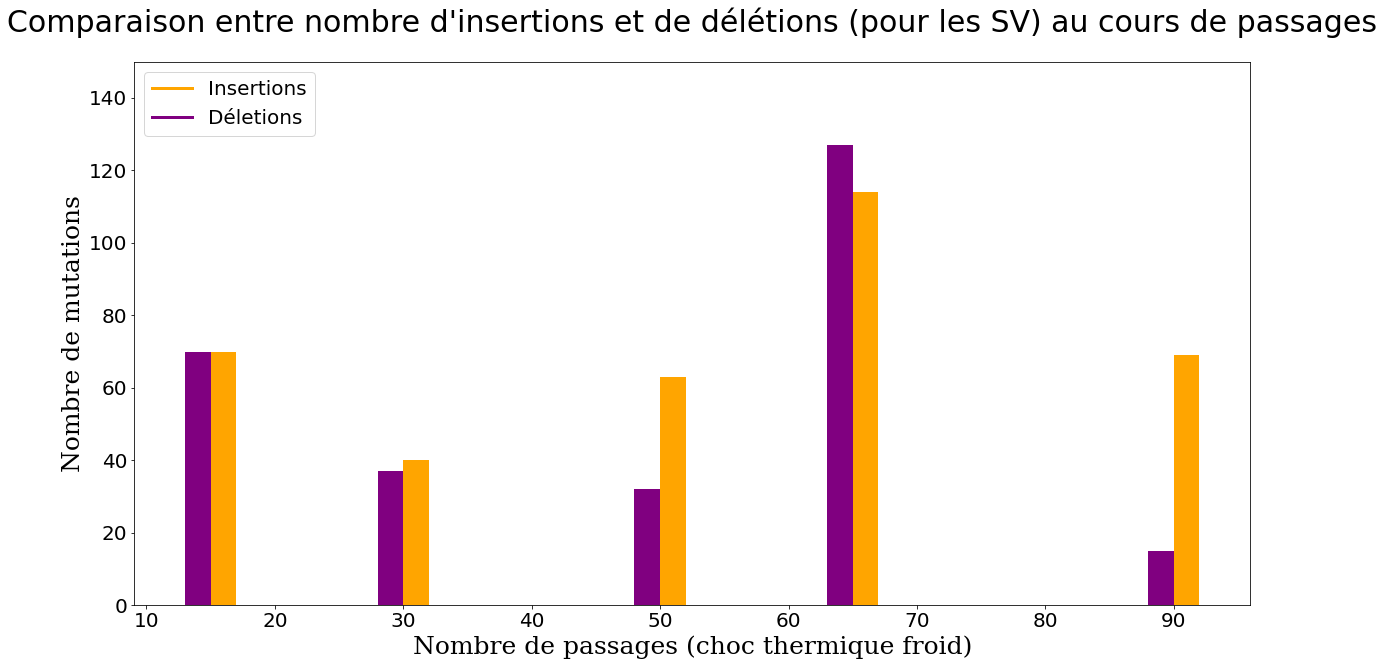

In [101]:
list1 = ["blue", "green", "orange", "yellow", "green"]
list2 = ["blue", "green", "orange", "cyan", "magenta"]
colors = list1+list2

n = 0
bar_width = 2
insertion_df = {15:0, 30:0, 50:0, 65:0, 90:0}

for i in df_groups[0:5]:
    df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insértions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    for key in a_df.keys():
        insertion_df[key] += a_df[key]
    #plt.bar(a_df.index - bar_width*1.01, a_df.values, width = bar_width, color = colors[n])
    plt.bar(pd.Index(list(insertion_df.keys())) + bar_width/2, pd.Index(list(insertion_df.values())), width = bar_width, color = "orange")
    
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

print(insertion_df)

deletions_df = {15:0, 30:0, 50:0, 65:0, 90:0}
n = 0
for i in df_groups[0:5]:
    df_deletion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_deletion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    for key in a_df.keys():
        deletions_df[key] += a_df[key]
    plt.bar(pd.Index(list(deletions_df.keys())) - bar_width/2, pd.Index(list(deletions_df.values())), width = bar_width, color = "purple")
    
    #plt.bar(a_df.index, a_df.values, width = bar_width, color = colors[n])
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages (choc thermique froid)", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
hot_line = mlines.Line2D([], [], color='purple', label="Déletions", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre d'insertions et de délétions (pour les SV) au cours de passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.ylim(0, 150)


plt.rcParams['figure.figsize'] = [20, 10]

{15: 38, 30: 11, 50: 71, 65: 98, 90: 65}


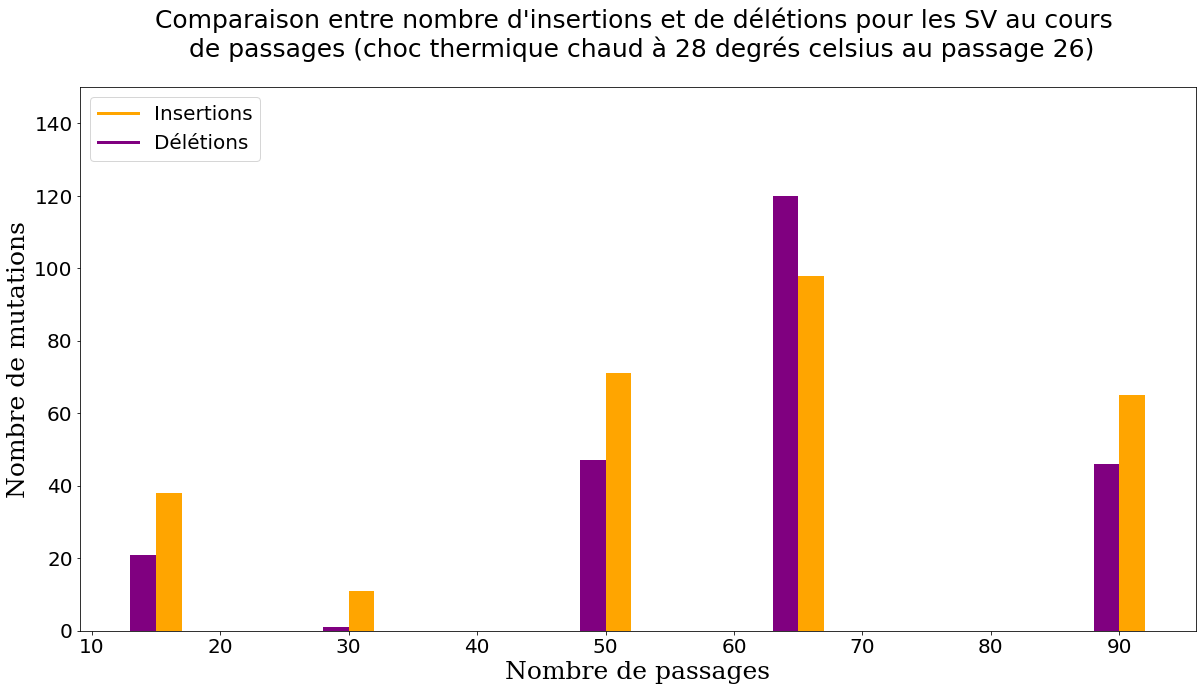

In [102]:
list1 = ["blue", "green", "orange", "yellow", "green"]
list2 = ["blue", "green", "orange", "cyan", "magenta"]
colors = list1+list2

n = 0
bar_width = 2
insertion_df = {15:0, 30:0, 50:0, 65:0, 90:0}

for i in df_groups[5:10]:
    df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insértions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    for key in a_df.keys():
        insertion_df[key] += a_df[key]
    #plt.bar(a_df.index - bar_width*1.01, a_df.values, width = bar_width, color = colors[n])
    plt.bar(pd.Index(list(insertion_df.keys())) + bar_width/2, pd.Index(list(insertion_df.values())), width = bar_width, color = "orange")
    
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

print(insertion_df)

deletions_df = {15:0, 30:0, 50:0, 65:0, 90:0}
n = 0
for i in df_groups[5:10]:
    df_deletion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_deletion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    for key in a_df.keys():
        deletions_df[key] += a_df[key]
    plt.bar(pd.Index(list(deletions_df.keys())) - bar_width/2, pd.Index(list(deletions_df.values())), width = bar_width, color = "purple")
    
    #plt.bar(a_df.index, a_df.values, width = bar_width, color = colors[n])
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
hot_line = mlines.Line2D([], [], color='purple', label="Délétions", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre d'insertions et de délétions pour les SV au cours \n de passages (choc thermique chaud à 28 degrés celsius au passage 26)", fontsize = 25, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.ylim(0, 150)


plt.rcParams['figure.figsize'] = [20, 10]

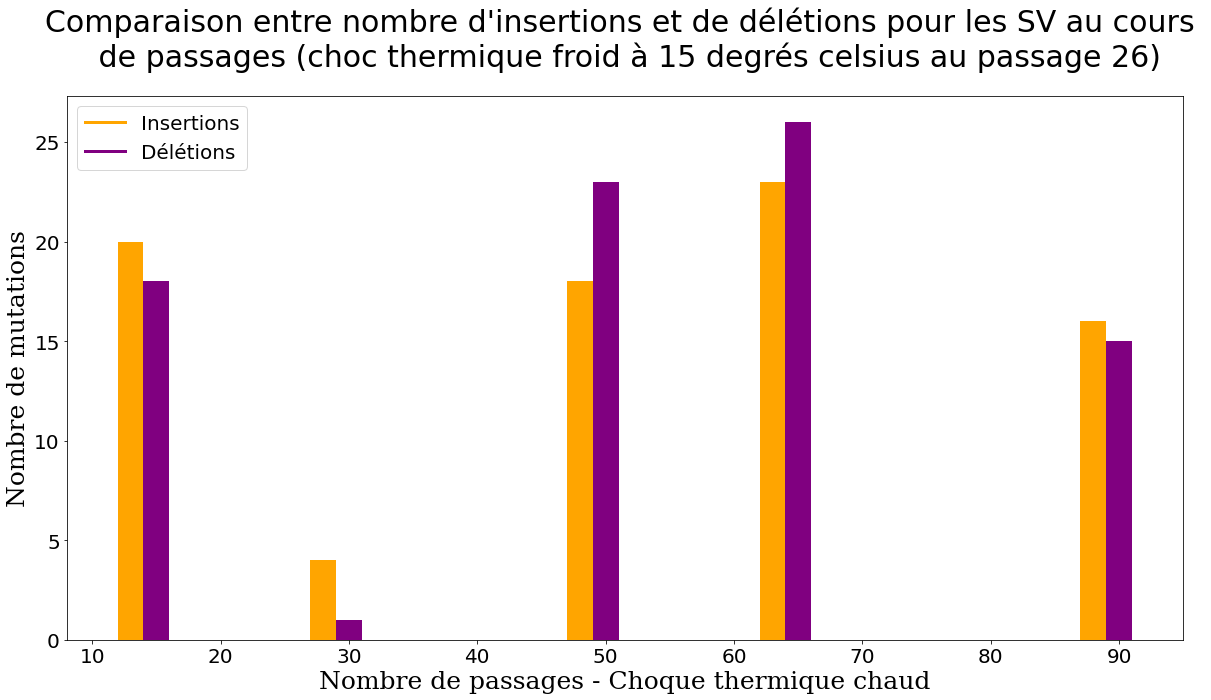

In [103]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
bar_width = 2
for i in df_groups[5:10]:
    df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insertions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.bar(a_df.index - bar_width*1.01, a_df.values, width = bar_width, color = "orange")
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

n = 0
for i in df_groups[5:10]:
    df_insertion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.bar(a_df.index, a_df.values, width = bar_width, color = "purple")
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages - Choque thermique chaud", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
hot_line = mlines.Line2D([], [], color='purple', label="Délétions", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre d'insertions et de délétions pour les SV au cours \n de passages (choc thermique froid à 15 degrés celsius au passage 26)", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



# SNP 


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [104]:
df_snp_time = df_snp.copy()


#df_time["group"] = df_time["sample"].str.extract(r"-(\d+)$")
df_snp_time["group"] = df_snp_time["sample"].str.extract(r"-(\d+)$")
df_snp_time['group'] = pd.to_numeric(df_snp_time['group'], downcast='integer')

df_snp_time["generation"] = df_snp_time["sample"].str.extract(r"(\d+)-")
df_snp_time['generation'] = pd.to_numeric(df_snp_time['generation'], downcast='integer')


df_snp_time = df_snp_time.drop_duplicates(subset = ["REF", "ALT", "POS"])

write_test_file(df_snp_time)

In [105]:
df_snp_groups = []

for group_no in range(1,11):
    a_df = df_snp_time[df_snp_time["group"] == group_no]
    df_snp_groups.append(a_df)
    a_df = df_snp_time.copy()

df_snp_groups[5]

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,group,generation
2,633,P65-6,.,A,C,36.593,PASS,.,GT:GQ,1/1:37,6,65
3,4939,P65-6,.,T,C,36.141,PASS,.,GT:GQ,1/1:36,6,65
5,5685,P65-6,.,A,C,34.031,PASS,.,GT:GQ,1/1:34,6,65
7,8976,P65-6,.,T,G,39.270,PASS,.,GT:GQ,1/1:39,6,65
14,11887,P65-6,.,T,C,31.001,PASS,.,GT:GQ,1/1:31,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...
6873,171262,P15-6,.,A,G,33.514,PASS,.,GT:GQ,0/1:34,6,15
7010,55399,P50-6,.,C,T,30.889,PASS,.,GT:GQ,0/1:31,6,50
7027,94723,P50-6,.,G,A,31.343,PASS,.,GT:GQ,0/1:31,6,50
7128,170108,P50-6,.,T,C,35.053,PASS,.,GT:GQ,0/1:35,6,50


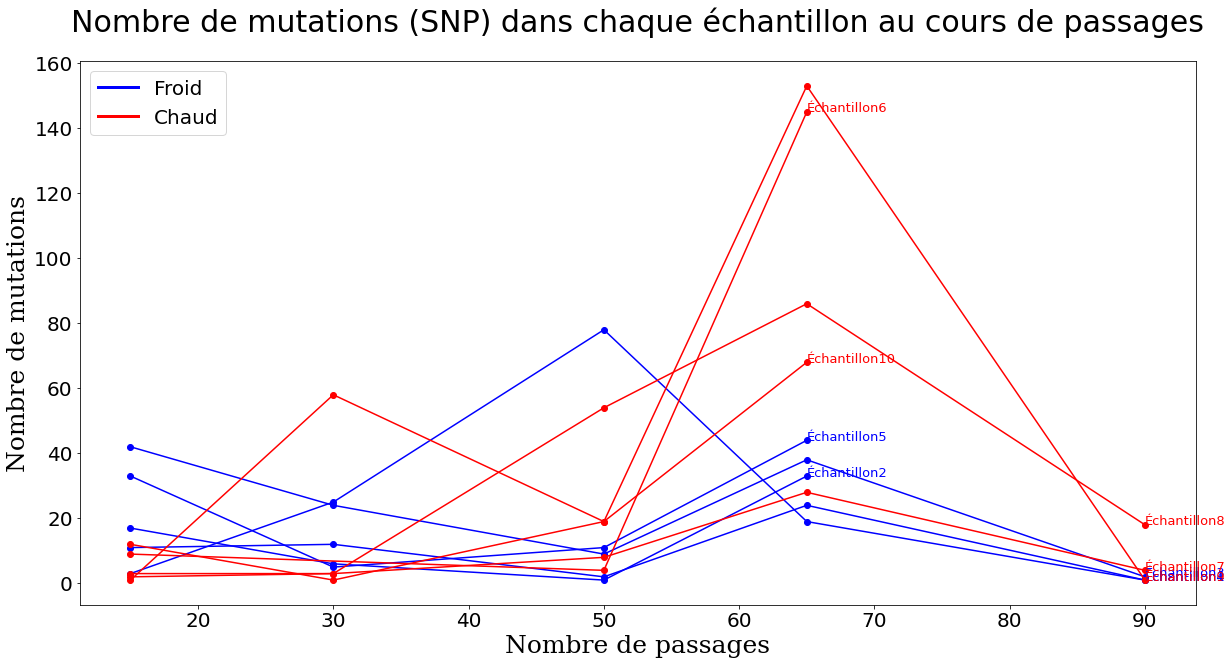

In [106]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_snp_groups:
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SNP) dans chaque échantillon au cours de passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

In [107]:
df_snp

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO
2,633,P65-6,.,A,C,36.593,PASS,.,GT:GQ,1/1:37
3,4939,P65-6,.,T,C,36.141,PASS,.,GT:GQ,1/1:36
5,5685,P65-6,.,A,C,34.031,PASS,.,GT:GQ,1/1:34
7,8976,P65-6,.,T,G,39.270,PASS,.,GT:GQ,1/1:39
14,11887,P65-6,.,T,C,31.001,PASS,.,GT:GQ,1/1:31
...,...,...,...,...,...,...,...,...,...,...
12519,267353,P90-1,.,G,A,37.536,PASS,.,GT:GQ,0/1:38
12520,269269,P90-1,.,C,T,35.351,PASS,.,GT:GQ,1/1:35
12521,270430,P90-1,.,T,G,31.045,PASS,.,GT:GQ,1/1:31
12523,270657,P90-1,.,G,T,31.072,PASS,.,GT:GQ,0/1:31


In [108]:
df["INFO"][0]

'PRECISE;SVTYPE=DUP;SVLEN=272677;END=272678;SUPPORT=303;COVERAGE=None,None,319,None,None;STRAND=+-;STDEV_LEN=0.000;STDEV_POS=0.000'

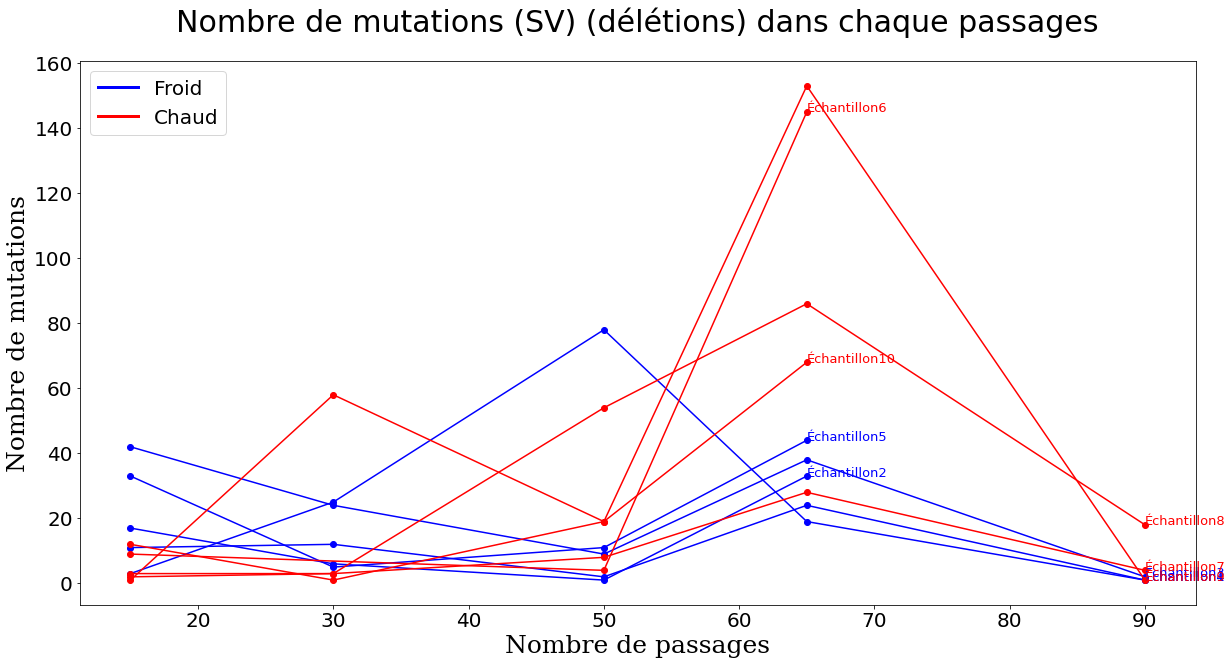

In [109]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
for i in df_snp_groups:
    df_insertion = i[i["REF"] != "N"]
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.plot(a_df.index, a_df.values, marker='o', linestyle='-', color = colors[n])
    plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color=colors[n])
    n+=1


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='blue', label="Froid", linewidth=3)
hot_line = mlines.Line2D([], [], color='red', label="Chaud", linewidth=3)


plt.legend(handles=[cold_line, hot_line], loc="upper left", fontsize=20)
plt.title("Nombre de mutations (SV) (délétions) dans chaque passages", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

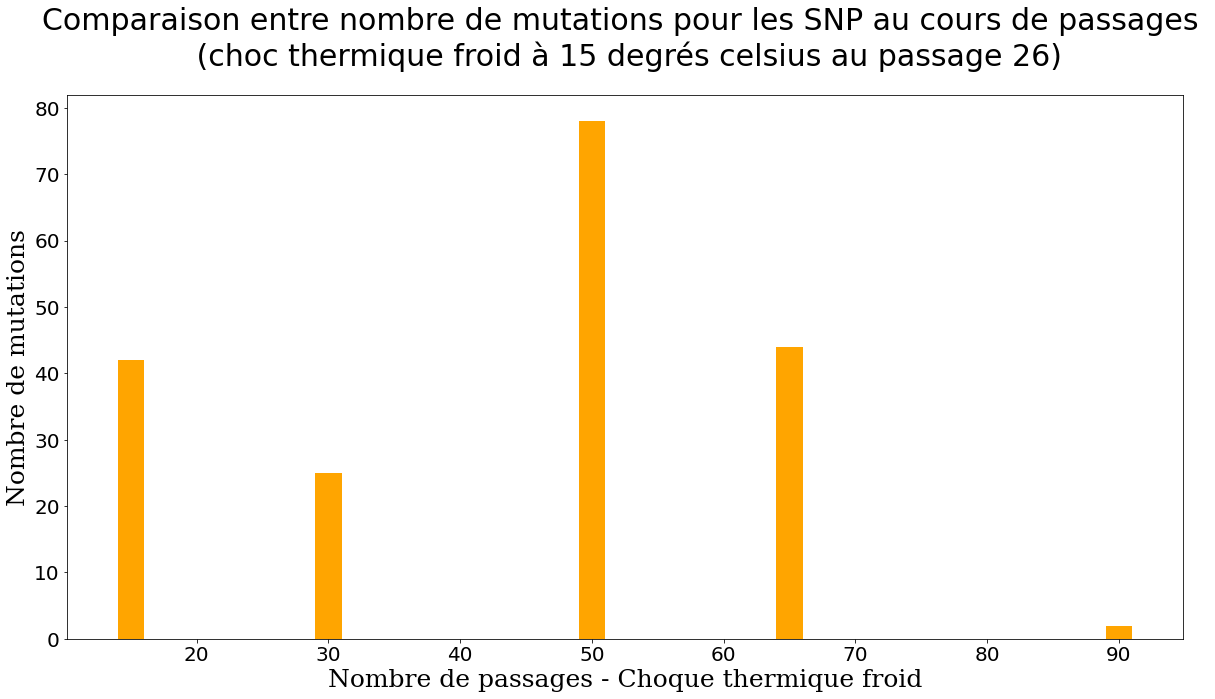

In [110]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
bar_width = 2
for i in df_snp_groups[0:5]:
    #df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insertions  
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.bar(a_df.index, a_df.values, width = bar_width, color = "orange")
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

"""n = 0
for i in df_groups[5:10]:
    df_insertion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.bar(a_df.index, a_df.values, width = bar_width, color = "purple")
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1"""


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages - Choque thermique froid", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
#hot_line = mlines.Line2D([], [], color='purple', label="Déletions", linewidth=3)


#plt.legend(handles=[cold_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre de mutations pour les SNP au cours de passages \n (choc thermique froid à 15 degrés celsius au passage 26)", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

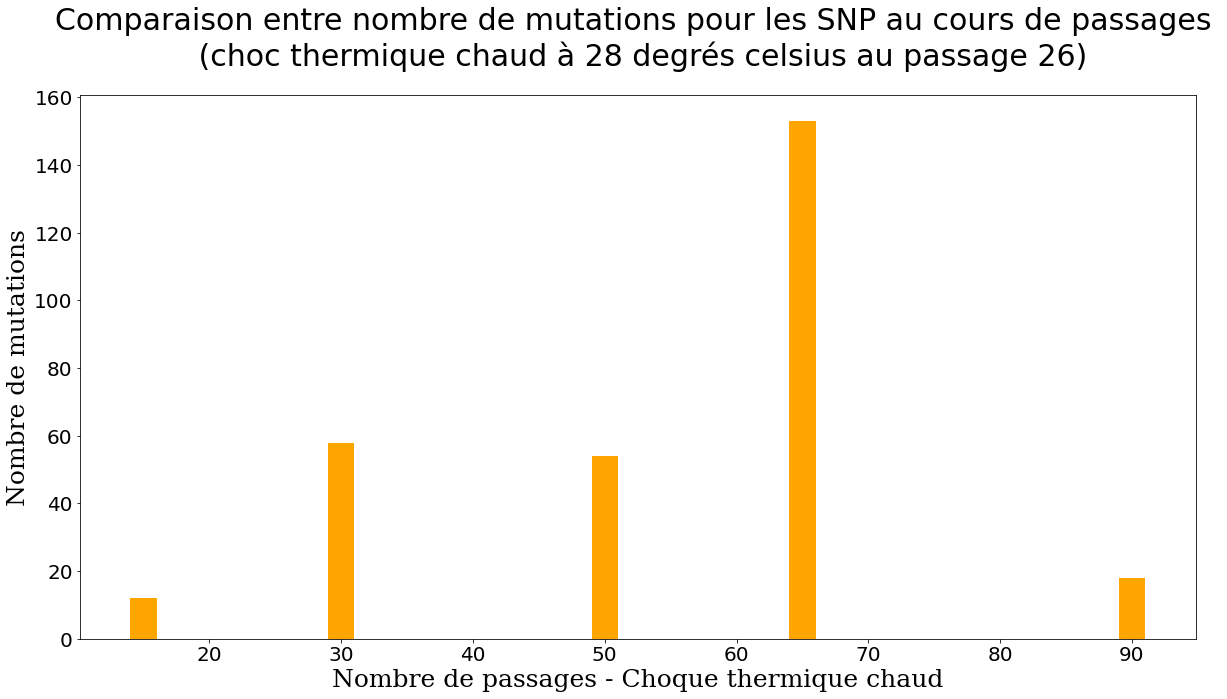

In [111]:
list1 = ["blue"]*5
list2 = ["red"]*5
colors = list1+list2

n = 0
bar_width = 2
for i in df_snp_groups[5:10]:
    #df_insertion = i[i["REF"] == "N"] # Ne séléctioner que les insertions  
    a_df = i.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.bar(a_df.index, a_df.values, width = bar_width, color = "orange")
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="orange")
    n+=1

"""n = 0
for i in df_groups[5:10]:
    df_insertion = i[i["REF"] != "N"] # Ne séléctioner que les délétions  
    a_df = df_insertion.sort_values(by = "generation")["generation"].value_counts().sort_index()
    plt.bar(a_df.index, a_df.values, width = bar_width, color = "purple")
    #plt.text(a_df.index[-1], a_df.values[-1], s = str("Échantillon" + str(n+1)), fontsize=13, color="purple")
    n+=1"""


font1 = {'family':'serif','color':'black','size':25}    

plt.xlabel("Nombre de passages - Choque thermique chaud", fontdict = font1)
plt.ylabel("Nombre de mutations", fontdict = font1)

cold_line = mlines.Line2D([], [], color='orange', label="Insertions", linewidth=3)
#hot_line = mlines.Line2D([], [], color='purple', label="Déletions", linewidth=3)


#plt.legend(handles=[cold_line], loc="upper left", fontsize=20)
plt.title("Comparaison entre nombre de mutations pour les SNP au cours de passages \n (choc thermique chaud à 28 degrés celsius au passage 26)", fontsize = 30, pad = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.rcParams['figure.figsize'] = [20, 10]

In [112]:
df_time

,POS,sample,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,GENOTYPE-INFO,support,group,generation
0,1,P15-2,Sniffles2.DUP.6ADS0,N,<DUP>,59,PASS,PRECISE;SVTYPE=DUP;SVLEN=272677;END=272678;SUP...,GT:GQ:DR:DV,./.:0:0:0,303,2,15
2,16099,P15-2,Sniffles2.DEL.3BAS0,GTGTGTGTGT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-10;END=16109;SUPPORT...,GT:GQ:DR:DV,0/1:60:339:196,196,2,15
4,31256,P15-2,Sniffles2.DEL.3F0S0,CGTTCACGAAGACGGCTTGGAATACAT,N,60,PASS,PRECISE;SVTYPE=DEL;SVLEN=-27;END=31283;SUPPORT...,GT:GQ:DR:DV,1/1:60:3:318,318,2,15
6,32540,P15-2,Sniffles2.INS.55S0,N,AAAAAAAAAAAAAAAAAAAAAAAAAAAA,60,PASS,PRECISE;SVTYPE=INS;SVLEN=29;END=32540;SUPPORT=...,GT:GQ:DR:DV,0/1:6:70:251,251,2,15
10,37879,P15-2,Sniffles2.INS.6BS0,N,TGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTG...,60,PASS,PRECISE;SVTYPE=INS;SVLEN=74;END=37879;SUPPORT=...,GT:GQ:DR:DV,0/1:60:140:172,172,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,256462,P65-4,Sniffles2.INS.88S0,N,CGTGCTTGGTGTGGTTGGGGTCTGAGTCCGTACTGGTGTT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=40;END=256462;SUPPORT...,GT:GQ:DR:DV,0/1:32:78:25,25,4,65
2425,265177,P65-4,Sniffles2.INS.8AS0,N,TTCTTGAAGTGT,60,PASS,PRECISE;SVTYPE=INS;SVLEN=12;END=265177;SUPPORT...,GT:GQ:DR:DV,1/1:60:9:79,79,4,65
2426,270829,P65-4,Sniffles2.INS.91S0,N,ACAGAGACACAAGACAGAC,60,PASS,PRECISE;SVTYPE=INS;SVLEN=19;END=270829;SUPPORT...,GT:GQ:DR:DV,0/1:60:35:58,58,4,65
2427,271616,P65-4,Sniffles2.INS.93S0,N,TCAGTGTCCTCC,60,PASS,PRECISE;SVTYPE=INS;SVLEN=12;END=271616;SUPPORT...,GT:GQ:DR:DV,0/1:60:52:48,48,4,65
